In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#from pytexit import py2tex #Display readable formula and gives them in Latex at the same time
import pandas as pd #To deal with experimental data


# 2D Monte-Carlo for Dalitz plot

$$(m_{23}^2)_{max} = (E_2^∗ + E_3^∗)^2 − (sqrt(E_2^{2∗} − m_2^2)−sqrt(E_3^{2*} − m_3^2))^2\\
(m_{23}^2)_{min} = (E_2^*  + E_3^∗)^2 − (sqrt(E_2^{2*} − m_2^2)+sqrt(E_3^{2*}  − m_3^2))^2$$

$$E_2^* = \frac{m_{12}^2-m_1^2+m_2^2}{2m_{12}} ; E_3^* = \frac{(M^2-m_{12}^2-m_3^2)}{2m_{12}}$$

$$\int_{(m_1+m_3)^2}^{m_2^2} dm_{13}^2 \int_{(m_{12}^2)_{min}}^{(m_{12}^2)_{max}} dm_{12}^2 d\Gamma (m_{12},  m_{13})$$

In [2]:
def build1DHisto(kept_event, valueRange, numberOfBins):
    """
        Build a 1D histogram for 1D kept events
        -kept_event : 1D values for events
        - valueRange = (min,max,binSize,coordinateName)
        - numberOfBins:  integer
    """
    returnHisto = np.zeros(numberOfBins)
    for one_event in kept_event :
        numBin = int(( one_event - valueRange[0]) / valueRange[2]) 
        returnHisto[numBin]+=1
    return returnHisto


In [3]:
def Plot1DEvents(events,eventRange,plotName):
    """
        Plot a baseline from a list of events
        - eventsList : List of events
        - omegaRange = (var_min,var_max,binVarSize,coordinateName), range for variable
        - plotName for 1D histogram
    """ 
    nbBin = int((eventRange[1] - eventRange[0])/eventRange[2])+1
    eventHisto = build1DHisto(events, eventRange, nbBin)
    

    plt.plot(np.linspace(eventRange[0],eventRange[1],nbBin),eventHisto)
    plt.xlabel(eventRange[3])
    plt.ylabel("Events")
    plt.title(plotName + "\nNumber of events : "+ str(len(events)))

In [4]:
def build2DHisto(Xrange,Yrange,events, weighed = False):
    """
        Build a 2D histogram with events
        events = (x_coord,y_coord,weight)
        Xrange = (x_min,x_max,binXSize)
        Yrange = (y_min,y_max,binYSize)
    """
    nBinX = int((Xrange[1] - Xrange[0])/Xrange[2])+1
    nBinY = int((Yrange[1] - Yrange[0])/Yrange[2])+1
    returnHisto = np.zeros((nBinX,nBinY))
    
    for one_event in events :
        binX = int((one_event[0] - Xrange[0]) / Xrange[2])
        binY = int((one_event[1] - Yrange[0]) / Yrange[2])
        if (weighed):
            returnHisto[binX,binY] += one_event[2]
        else:
            returnHisto[binX,binY] += 1
    return returnHisto

In [5]:
def display2DHisto(Xrange,Yrange,histo,plotTitle):
    """
        Build and display a 2D histogram with events (generated through MC)
        histoIsReversed : Describe if we work with a reversed histo or not (if not, reverse it)
        Xrange = (x_min,x_max,binXSize,coordinateName)
        Yrange = (y_min,y_max,binYSize,coordinateName)
    """
    
    rangeX = np.linspace(Xrange[0],Xrange[1],int((Xrange[1] -Xrange[0]) / Xrange[2])+1)
    rangeY = np.linspace(Yrange[0],Yrange[1],int((Yrange[1] -Yrange[0]) / Yrange[2])+1)
    fig = plt.figure()
    histo = np.array(histo)
    
    plt.pcolormesh(rangeX,rangeY,histo.T,cmap = plt.cm.coolwarm, shading = 'gouraud')

    plt.xlabel(Xrange[3])
    plt.ylabel(Yrange[3])
    plt.title(plotTitle)
    cbar = plt.colorbar(format = "%.2f")



In [6]:
def display2DEvents(Xrange,Yrange,events,plotTitle, weighed  = False):
    """
        Build and display a 2D histogram with events
        Xrange = (x_min,x_max,binXSize,coordinateName)
        Yrange = (y_min,y_max,binYSize,coordinateName)
        weighed : indicate if events are weighed, weight have to be a third coordinate for events
    """
    #histo = build2DReversedHisto(Xrange,Yrange,events)
    histo = build2DHisto(Xrange,Yrange,events,weighed)
    display2DHisto(Xrange,Yrange,histo,plotTitle+ "\nRepresented events : " + str(len(events)))

In [7]:
def GenerateVariable(varMin,varMax,nbPoint):
    return varMin+ np.random.random(nbPoint)*(varMax-varMin)

In [8]:
def generateUniformDalitz(M,m1,m2,m3,eventNb):
    '''
    Generate events (m12,m23) for an uniform Dalitz plot
    M initial mass
    m1,m2,m3 masses of the particles
    eventNb number of aimed events
    
    Return 
    '''
    eventCount = 0
    eventList = []
    
    m12_min = (m1 + m2)**2 #Squared mass
    m12_max = (M-m3)**2
    m23_min = (m2 + m3)**2 #Squared mass
    m23_max = (M-m1)**2
    
    while eventCount < eventNb:
        u_i,u_j = np.random.random(2)
        m12 = m12_min + u_i *(m12_max - m12_min)
        m23 = m23_min + u_j *(m23_max - m23_min)
        E2 = (m12 - m1*m1 + m2*m2)/(2*np.sqrt(m12))
        E3 = (M*M - m12 - m3*m3)/(2*np.sqrt(m12))
        if (E2+E3)*(E2+E3)-(np.sqrt(E2*E2-m2*m2) + np.sqrt(E3*E3-m3*m3))**2 <= m23 and (E2+E3)*(E2+E3)-(np.sqrt(E2*E2-m2*m2) - np.sqrt(E3*E3-m3*m3))**2 >= m23:
            eventList.append((m12,m23))
            eventCount+=1
    return np.array(eventList)
        

In [9]:
def generateDistribution(uniformEvents,Distribution):
    '''
    Transform an uniform distribution in a corresponding Dalitz plot to one according to a distribution
    uniformEvents : Array of (s12,s23)
    Distribution = f(s12,s23)
    Return events according to distribution
    '''
    kept_events = []
    listValDistrib =[]
    for event in uniformEvents:
        listValDistrib.append(Distribution(*event))

    maxDistrib = max(listValDistrib)
    for i in range(0,len(listValDistrib)) :
        if np.random.uniform()*maxDistrib <= listValDistrib[i] :
            kept_events.append(uniformEvents[i])
    return kept_events
    

In [10]:
def plotDalitz(M,m1,m2,m3,eventList,nbBinM12,nbBinM23, plotName, weighed = False):
    '''Plot a Dalitz plot for a list of events
    - M initial mass
    - m1,m2,m3 masses of the particles
    - eventList : List of events in the form (s12,s23)
    - nbBinM12, nbBinM23 : Number of bins for s12, s23 (precision)
    
    '''
    
    
    s12_range = GetRangeMass(M,m1,m2,m3,(1,2),nbBinM12)
    s23_range = GetRangeMass(M,m1,m2,m3,(2,3),nbBinM23)
    
    display2DEvents(s12_range,s23_range,eventList,plotName,weighed)

In [11]:
def plotDalitzM12M13(M,m1,m2,m3,eventList,nbBinM12,nbBinM13, plotName):
    '''Plot a Dalitz plot for a list of events
    - M initial mass
    - m1,m2,m3 masses of the particles
    - eventList : List of events in the form (m12,m13)
    - nbBinM12, nbBinM13 : Number of bins for m12, m13 (precision)
    
    '''
    
    m12_range = GetRangeMass(M,m1,m2,m3,(1,2),nbBinM12)
    m13_range = GetRangeMass(M,m1,m2,m3,(1,3),nbBinM13)
    
    display2DEvents(m12_range,m13_range,eventList,plotName)

In [12]:
def plotDalitzM12M13ForM12M23(M,m1,m2,m3,eventList,nbBinM12,nbBinM13, plotName):
    '''Plot a Dalitz plot for a list of events
    - M initial mass
    - m1,m2,m3 masses of the particles
    - eventList : List of events in the form (m12,m23)
    - nbBinM12, nbBinM23 : Number of bins for m12, m23 (precision)
    '''
    newEventList = []
    for i in range (len(eventList)):
        s12 = eventList[i][0]
        s23 = eventList[i][1]
        s13 = s + m1*m1 + m2*m2 + m3*m3 - s23 - s12
        newEventList.append((s12,s13))
    
    m12_range = GetRangeMass(M,m1,m2,m3,(1,2),nbBinM12)
    m13_range = GetRangeMass(M,m1,m2,m3,(1,3),nbBinM13)
    
    display2DEvents(m12_range,m13_range,newEventList,plotName)

In [13]:
def plotDalitzM12M23ForM12M13(M,m1,m2,m3,eventList,nbBinM12,nbBinM23, plotName):
    '''Plot a Dalitz plot for a list of events
    - M initial mass
    - m1,m2,m3 masses of the particles
    - eventList : List of events in the form (m12,m13)
    - nbBinM12, nbBinM23 : Number of bins for m12, m13 (precision)
    '''
    newEventList = []
    for i in range (len(eventList)):
        s12 = eventList[i][0]
        s13 = eventList[i][1]
        s23 = s + m1*m1 + m2*m2 + m3*m3 - s13 - s12
        newEventList.append((s12,s23))
    
    m12_range = GetRangeMass(M,m1,m2,m3,(1,2),nbBinM12)
    m23_range = GetRangeMass(M,m1,m2,m3,(2,3),nbBinM23)
    
    display2DEvents(m12_range,m23_range,newEventList,plotName)

# Analytical Dalitz plot

In [14]:
def GenerateMass(M,m1,m2,m3,parameters,N):
    """
        Generate a list for a quadri-mass parameter
        parameters = (1,2) for m12; (2,3) for m23; (1,3) for m13
        mR mass of the studied resonance
        GammaR width of the studied resonance
        N size of list
        
    """
    if parameters == (1,2):
        m_min = (m1 + m2)**2
        m_max = (M-m3)**2
    if parameters == (1,3):
        m_min = (m1 + m3)**2
        m_max = (M-m2)**2
    if parameters == (2,3):
        m_min = (m2 + m3)**2
        m_max = (M-m1)**2
    u_i= np.random.random(N)
    m_list = m_min + u_i *(m_max - m_min)
    
    return m_list

In [15]:
def IsInDalitz(M,m1,m2,m3,m12,m23):
    """
        Return whether (m12,m23) is in the Dalitz plot
    """
    E2 = (m12 - m1*m1 + m2*m2)/(2*np.sqrt(m12))
    E3 = (M*M - m12 - m3*m3)/(2*np.sqrt(m12))
    return (E2+E3)*(E2+E3)-(np.sqrt(E2*E2-m2*m2) + np.sqrt(E3*E3-m3*m3))**2 <= m23 and (E2+E3)*(E2+E3)-(np.sqrt(E2*E2-m2*m2) - np.sqrt(E3*E3-m3*m3))**2 >= m23
        

In [16]:
def GetRangeMass(M,m1,m2,m3,parameters,nBin):
    """
        Generate a range for a quadri-mass parameter
        
        Input:
        - parameters = (1,2) for m12; (2,3) for m23; (1,3) for m13
        - mR mass of the studied resonance
        - GammaR width of the studied resonance
        - N size of list
        Output:
        - range = [min,max,precision,"name"]
        
    """
    if parameters == (1,2):
        m_min = (m1 + m2)**2
        m_max = (M-m3)**2
        m_range = (m_min,m_max,(m_max-m_min)/nBin,' $ m_{12}^2 $')
    if parameters == (1,3):
        m_min = (m1 + m3)**2
        m_max = (M-m2)**2
        m_range = (m_min,m_max,(m_max-m_min)/nBin,' $ m_{13}^2 $')
    if parameters == (2,3):
        m_min = (m2 + m3)**2
        m_max = (M-m1)**2
        m_range = (m_min,m_max,(m_max-m_min)/nBin,' $ m_{23}^2 $')
    
    return m_range

In [17]:
def plotAnalyticalDalitz(M,m1,m2,m3,distribution,nbBinM12,nbBinM23,plotName):
    '''
    Plot the expected Dalitz plot using the distribution without MC method
    distribution = f(m12,m23)
    '''
    m12_range = GetRangeMass(M,m1,m2,m3,(1,2),nbBinM12)
    m23_range = GetRangeMass(M,m1,m2,m3,(2,3),nbBinM23)

    rangeM12 = np.linspace(m12_range[0],m12_range[1],nbBinM12)
    rangeM23 = np.linspace(m23_range[0],m23_range[1],nbBinM23)

    valuesGammas = np.zeros((nbBinM23,nbBinM12))


    for i_m12 in range (len(rangeM12)):
        for i_m23 in range(len(rangeM23)):
            m12 = rangeM12[i_m12]
            m23 = rangeM23[i_m23]
            valuesGammas[i_m12,i_m23]= distribution(m12,m23)
            
    fig = plt.figure()
    plt.pcolormesh(rangeM12,rangeM23,valuesGammas.T,cmap = plt.cm.coolwarm, shading = 'gouraud')
    plt.xlabel(m12_range[3])
    plt.ylabel(m23_range[3])
    plt.title(plotName)
    cbar = plt.colorbar(format = "%.2f")
    fig.set_figwidth(10)
    fig.set_figheight(10)


In [18]:
def plotAnalyticalDalitzM12M13ForM12M23(M,m1,m2,m3,distribution,nbBinM12,nbBinM13,plotName):
    '''
    Plot the expected Dalitz plot using the distribution without MC method
    distribution = f(m12,m23)
    '''
    
    m12_range = GetRangeMass(M,m1,m2,m3,(1,2),nbBinM12)
    m13_range = GetRangeMass(M,m1,m2,m3,(1,3),nbBinM13)

    rangeM12 = np.linspace(m12_range[0],m12_range[1],nbBinM12)
    rangeM13 = np.linspace(m13_range[0],m13_range[1],nbBinM13)

    valuesGammas = np.zeros((nbBinM13,nbBinM12))#Build reverted histogram for pcolormesh


    for i_m12 in range (len(rangeM12)):
        for i_m13 in range(len(rangeM13)):
            m12 = rangeM12[i_m12]
            m13 = rangeM13[i_m13]
            m23 = s + m1*m1 + m2*m2 + m3*m3 - m13 - m12
            valuesGammas[i_m12,i_m13]= distribution(m12,m23)
            
    fig = plt.figure()
    plt.pcolormesh(rangeM12,rangeM13,valuesGammas.T,cmap = plt.cm.coolwarm, shading = 'gouraud')
    plt.xlabel(m12_range[3])
    plt.ylabel(m13_range[3])
    plt.title(plotName)
    cbar = plt.colorbar(format = "%.2f")
    #Setting figure size for when it is exported
    fig.set_figwidth(10)
    fig.set_figheight(10)

In [19]:
def PlotOne1DEvents(eventList,eventRange,dataLabel):
    """
        Plot a baseline from a list of events
        - eventList : List of events
        - eventRange = (var_min,var_max,binVarSize,coordinateName), range for variable
        - dataLabel to label for many graphs
    """ 
    nbBin = int((eventRange[1] - eventRange[0])/eventRange[2])+1
    eventHisto = build1DHisto(eventList, eventRange, nbBin)
    
    
    plt.plot(np.linspace(eventRange[0],eventRange[1],nbBin),eventHisto, label = dataLabel)
    plt.xlabel(eventRange[3])
    plt.ylabel("Events")

# Importance sampling

In [20]:
def GenerateRho(M,m1,m2,m3,parameters,mR,GammaR,N):
    """
        Generate a list for a rho parameter (new variable in importance sampling for resonance on 1 param)
        parameters = (1,2) for m12; (2,3) for m23; (1,3) for m13
        mR mass of the studied resonance
        GammaR width of the studied resonance
        N size of list
        
    """
    if parameters == (1,2):
        rho_min = np.arctan(((m1 + m2)**2 - mR*mR)/(mR*GammaR))
        rho_max = np.arctan(((M-m3)**2 - mR*mR)/(mR*GammaR))
    if parameters == (1,3):
        rho_min = np.arctan(((m1 + m3)**2 - mR*mR)/(mR*GammaR))
        rho_max = np.arctan(((M-m2)**2 - mR*mR)/(mR*GammaR))
    if parameters == (2,3):
        rho_min = np.arctan(((m2 + m3)**2 - mR*mR)/(mR*GammaR))
        rho_max = np.arctan(((M-m1)**2 - mR*mR)/(mR*GammaR))
    u_i= np.random.random(N)
    rho_list = rho_min + u_i *(rho_max - rho_min)
    
    return rho_list

In [21]:
def GetRangeRho(M,m1,m2,m3,parameters,mR,GammaR,nBin):
    """
        Generate a list for a rho parameter (new variable in importance sampling for resonance on 1 param)
        parameters = (1,2) for m12; (2,3) for m23; (1,3) for m13
        mR mass of the studied resonance
        GammaR width of the studied resonance
        N size of list
        
    """
    if parameters == (1,2):
        rho_min = np.arctan(((m1 + m2)**2 - mR*mR)/(mR*GammaR))
        rho_max = np.arctan(((M-m3)**2 - mR*mR)/(mR*GammaR))
        rho_range = (rho_min,rho_max,(rho_max-rho_min)/nBin,' $ \\rho_{12} $')
    if parameters == (1,3):
        rho_min = np.arctan(((m1 + m3)**2 - mR*mR)/(mR*GammaR))
        rho_max = np.arctan(((M-m2)**2 - mR*mR)/(mR*GammaR))
        rho_range = (rho_min,rho_max,(rho_max-rho_min)/nBin,' $ \\rho_{13} $')
    if parameters == (2,3):
        rho_min = np.arctan(((m2 + m3)**2 - mR*mR)/(mR*GammaR))
        rho_max = np.arctan(((M-m1)**2 - mR*mR)/(mR*GammaR))
        rho_range = (rho_min,rho_max,(rho_max-rho_min)/nBin,' $ \\rho_{23} $')

    return rho_range

# Baseline selection

In [22]:
def SelectValuesForEvents(eventsList,fixedParameters,fixedValues,widths):
    """
        Returns the list of events that are around a fixedValues for parameters
        - eventsList : List of events
        - fixedParameters : List of events parameters that are selected
        - fixedValues : Selected values for fixedParameters
        - widths : width for each selected value 
        Selected events will be have the fixedValue +/- width/2
    """
    selectedEvents = []
    for event in eventsList:
        if len(np.shape(fixedParameters)) == 0: #Means that all param are single values (meaning it is not a multiple selection)
            if event[fixedParameters] >= fixedValues - widths/2 and event[fixedParameters] <= fixedValues + widths/2:
                selectedEvents.append(event)
        else :
            isInRange = True
            for param in range(len(fixedParameters)):
                eventValue = event[fixedParameters[param]]
                fixedValue = fixedValues[param]
                width = widths[param]
                if eventValue < fixedValue - width/2 or event[fixedParam] > fixedValue + width/2:
                    isInRange= False
            if isInRange :
                selectedEvents.append(event)
    return selectedEvents

In [23]:
def PlotBaseline(eventsList,varRange,numVariable,fixedParameters,fixedValues,widths, plotName):
    """
        Plot a baseline from a list of events
        - eventsList : List of events
        - varRange = (var_min,var_max,binVarSize,coordinateName), range for variable
        - numVariable : Corresponding index for events -> Could be found through fixedParameters
        - nbBin for 1D histogram
        - fixedParameters : List of events parameters that are selected
        - fixedValues : Selected values for fixedParameters
        - widths : width for each selected value
        - plotName for 1D histogram
    """ 
    nbBin = int((varRange[1] - varRange[0])/varRange[2])+1
    selectedEvents = np.array(SelectValuesForEvents(eventsList,fixedParameters,fixedValues,widths))
    eventHisto = build1DHisto(selectedEvents[:,numVariable], varRange, nbBin)
    

    plt.plot(np.linspace(varRange[0],varRange[1],nbBin),eventHisto)
    plt.xlabel(varRange[3])
    plt.ylabel("Events")
    plt.title(plotName + "\nNumber of events : " + str(len(selectedEvents)))

In [24]:
def GetAnalyticalBaseline(distribution,varNum, varRange,fixedValues):
    """
        Return a baseline with 1 variable and other parameters fixed
        - varNum : n° of variable parameter in the list of argument of our distribution
        ex : distribution = f(a,b,c,d) and b varies => varNum = 2
        - varRange = (var_min,var_max,binVarSize,coordinateName) 
        - distribution = f(a,b,c,d,e,...) with 1 more parameter than fixedValues 
        - fixedValues : values of fixed parameters, should be in the order of arguments in distribution
        ex : distribution = f(a,b,c,d) and b varies => if a = 1, c = 2, d=3, should be [1,2,3]
    """
    
    nbBin = int((varRange[1] - varRange[0])/varRange[2])+1
    
    rangeVariable = np.linspace(varRange[0],varRange[1],nbBin)
    distribValues = np.zeros(nbBin)
    if len(np.shape(fixedValues)) == 0: #Means that all param are single values (meaning it is not a multiple selection)
        for i in range(nbBin):          
            if varNum == 0:
                distribValues[i] = distribution(rangeVariable[i],fixedValues)
            else :
                distribValues[i] = distribution(fixedValues,rangeVariable[i])
    else :
        listArgsDistrib = []
        for indexParam in range(len(fixedValues)+1):
            #len(fixedParameters)+1 is the number of parameters of our distribution
            if indexParam == numVariable:
                listArgsDistrib.append(rangeVariable[i])
            elif indexParam < numVariable:
                listArgsDistrib.append(fixedValues[indexParam])
            else:
                listArgsDistrib.append(fixedValues[indexParam-1]) #fixedValues doesn't count the variable
        distribValues[i] = distribution(*listArgsDistrib)#* means that it transforms the list into arguments
    return distribValues
    
def PlotAnalyticalBaseline(distribution,varNum, varRange,fixedValues,plotName):
    """
        Plot a baseline with 1 variable and other parameters fixed
        - varNum : n° of variable parameter in the list of argument of our distribution
        ex : distribution = f(a,b,c,d) and b varies => varNum = 2
        - varRange = (var_min,var_max,binVarSize,coordinateName) 
        - distribution : Studied distribution
        - fixedValues : values of fixed parameters, should be in the order of arguments in distribution
        ex : distribution = f(a,b,c,d) and b varies => if a = 1, c = 2, d=3, should be [1,2,3]
        - plotName for 1D histogram
    """
    distribValues = GetAnalyticalBaseline(distribution,varNum, varRange,fixedValues)
    
    nbBin = int((varRange[1] - varRange[0])/varRange[2])+1
    plt.plot(np.linspace(varRange[0],varRange[1],nbBin),distribValues)
    plt.xlabel(varRange[3])
    plt.ylabel("Value")
    plt.title(plotName + "\nAnalytical values (may go out of range)")
    
    
    

# Omega distribution

### For independent event and omega generation

In [25]:
def GenerateOmega(eventsDistrib):
    omegaList = []
    for event in eventsDistrib:
        a0,b0,b1 = ab_distribution(event[0],event[1])
        omega = (b0*np.cos(event[2]) + b1*np.sin(event[2])*np.cos(event[3]))/a0
        omegaList.append(omega)
    return omegaList

### Generated both omega and distribution at the same time

In [26]:
def GenerateTotalDistribAndOmega(totalDistrib_uniform,ab_distribution,xi) :
    """
    Based on generateDistribution by myself to optimize omega plots : 
    Add 3 parameters to selected events which are a0,b0 and b1 (maybe b2 in the future)
    - totalDistrib_uniform = uniform distribution of (s12,s23,cosTheta,phi) 
    - ab_distribution : Distribution that gives a0,b0,b1 from s12,s23
    - xi : Polarisation parameter
    
    Returns 
    - Monte-Carlo simulation of totalDistrib with events in the form :
    (s12,s23,theta,phi,a0,b0,b1,omega)
    - list of omega for events
    """
    listValDistrib =[]
    full_events = []
    kept_events = []
    omegaEvents = []
    for event in totalDistrib_uniform:
        s12,s23,cosTheta,phi = event[0:4]
        #Saving a0,b0,b1 so that they are no longer calculated (long to do)
        a0,b0,b1 = ab_distribution(s12,s23)
        full_events.append ((s12,s23,cosTheta,phi,a0,b0,b1))
        
        
        #For MC generation
        distribValue =  a0 + xi*(b0*cosTheta+b1*np.sqrt(1-cosTheta*cosTheta)*np.cos(phi))
        listValDistrib.append(distribValue)
        
    #MC generation & omega generation
    maxDistrib = max(listValDistrib)
    for i in range(0,len(listValDistrib)) :
        if np.random.uniform()*maxDistrib <= listValDistrib[i] :
            s12,s23,cosTheta,phi = full_events[i][0:4]
            #Omega generation
            a0,b0,b1 = full_events[i][4:7]
            omega =(b0*cosTheta+b1*np.sqrt(1-cosTheta*cosTheta)*np.cos(phi))/a0
            kept_events.append((s12,s23,cosTheta,phi,a0,b0,b1,omega))
            omegaEvents.append(omega)
        
    return kept_events,omegaEvents
    
    

### Other tools

In [27]:
def SigmaForXi(omegaEvents,xi):
    sumSquares = 0
    for omega in omegaEvents:
        sumSquares += (omega/(1+xi*omega))*(omega/(1+xi*omega))
    return np.sqrt(1/sumSquares)

In [28]:
def GetBackXi(omegaEvents):
    avg =0
    avgSquare = 0
    for omega in omegaEvents :
        avg += omega
        avgSquare += omega*omega
    return avg/avgSquare

# Save/load events

## For omega only

In [29]:
#Saving generated events for further use

def SaveOmegaExperience(distribEvents,omegaEvents,repertory):
    """
        Save total events (distribEvents), only omega of events (omegaEvents) and an analysis of it
    """
    eventDF = pd.DataFrame(distribEvents, columns = ["s12","s23","cos theta","phi","a0","b0","b1","omega"])
    eventDF.to_csv(repertory + "extended events.txt")

    omegaDF = pd.DataFrame(omegaEvents, columns= ["omega"])
    omegaDF.to_csv(repertory + "omega events.txt")

    expResults = "Theorical xi = %s" % xi
    expResults += "\nNumber of events : %d"%len(omegaEvents)
    expResults += "\nMeasured xi = <w>/<w²> = %f" %GetBackXi(omegaEvents)
    expResults += "\nSigma for xi = %s : %f" %(xi, SigmaForXi(omegaEvents,xi))
    with open(repertory + 'omega analysis.txt', 'w') as expFile:
        expFile.write(expResults)


In [30]:
def LoadOmegaEvents(repertory):
    """
    Function to load saved events with their corresponding omega events
    repertory indicates the repertory of files
    Return list of events and corresponding list of events in terms of omega
    /!\ Do not load xi /!\
    """
    eventDF= pd.read_csv(repertory + "extended events.txt")
    totalDistrib_events = eventDF[["s12","s23","cos theta","phi","a0","b0","b1","omega"]].values.tolist()

    omegaDF= pd.read_csv(repertory + "omega events.txt")
    omegaEvents = omegaDF["omega"].values.tolist()
    
    return totalDistrib_events,omegaEvents

## For any events

In [31]:
#Saving generated events for any distribution

def SaveOnlyEvents(events,repertory,columnsName):
    eventDF = pd.DataFrame(events, columns = columnsName)
    eventDF.to_csv(repertory + "events.txt")
def SaveTable(table, repertory,columnsName):
    tableDF = pd.DataFrame(table, columns = columnsName)
    tableDF.to_csv(repertory)
    
def LoadOnlyEvents(repertory,columnsName):
    eventDF= pd.read_csv(repertory + "events.txt")
    eventsList = eventDF[columnsName].values.tolist()
    
    return eventsList

# Data analysis

## LHCb Dalitz plot

In [32]:
#Physical parameters (in GeV)
mLamC=2.286 #Mass of Lambda_c
mp=0.938
mK=0.494 
mpi=0.140 
mDel=1.232
GDel=0.117 #width of Delta++
mLam = 1.518 #Mass of Lambda' = Lambda (1520), spin 3/2-
GLam=0.0157 #width of Lambda'
mKst = 0.892 #Mass of K* = K* (892), I(J^P) =1/2(1−)
GKst = 0.051 #width of K* 

M = mLamC
m1 = mp
m2 = mK
m3 = mpi
s = M*M

binResolution = 80

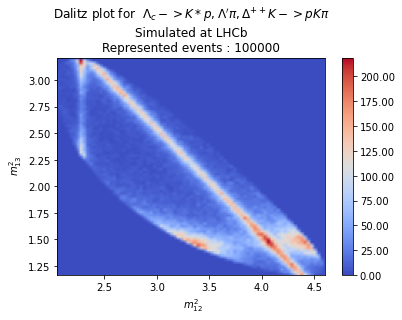

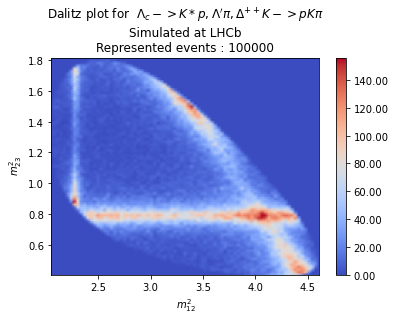

In [33]:
expData = pd.read_csv("Events/LambdaC_LHCb.txt")
eventsDataFrame = expData[["mkpsq", "mppisq","cos_theta"]]#/!\ Events will be in (s12,s13) format

events = eventsDataFrame.values.tolist()

plotName = "Dalitz plot for  $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K -> p K \pi$"
plotName += "\nSimulated at LHCb"
plotDalitzM12M13(M,m1,m2,m3,events,binResolution,binResolution, plotName)
plt.show()

plotDalitzM12M23ForM12M13(M,m1,m2,m3,events,binResolution,binResolution, plotName)

## Generated events Dalitz plot

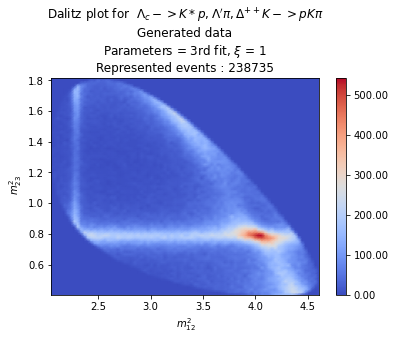

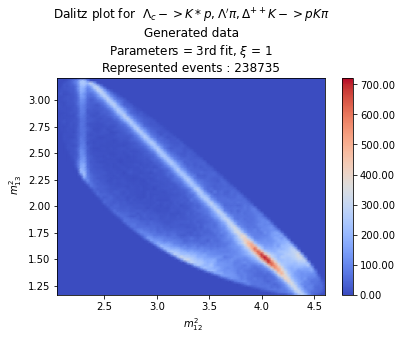

In [34]:
expData = pd.read_csv("Events/Param 3rd try xi = 1 3M/myEventsDistrib.txt")
#Possible variables : s12,s23,cosTheta,phi,a0,b0,b1,omega
eventsDataFrame = expData[["s12", "s23","cosTheta"]]#/!\ Events will be in (s12,s13) format

events = eventsDataFrame.values.tolist()

plotName = "Dalitz plot for  $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K -> p K \pi$"
plotName += "\nGenerated data"
plotName += "\nParameters = 3rd fit, $ \\xi $ = 1"
plotDalitz(M,m1,m2,m3,events,binResolution,binResolution, plotName) #Format in (s12,s23, which is expected)
plt.show()

plotDalitzM12M13ForM12M23(M,m1,m2,m3,events,binResolution,binResolution, plotName)


## Generated events baseline

In [50]:
s12_range = GetRangeMass(M,m1,m2,m3,(1,2),binResolution)
plotName = " $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K -> p K \pi$ (at LHCb)"
plotName += "\nBaseline for $m_{12}^2 = 2.5\pm0.025 GeV^2$"
PlotBaseline(events,s12_range,0,1,2.5,0.2, plotName)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

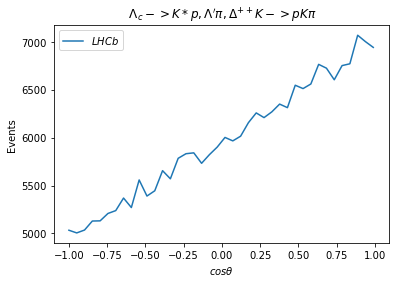

In [51]:
cosThetaRange = (-1,0.99,0.05,"$cos\\theta$")
plotName = " $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K -> p K \pi$"
numpydistrib = np.array(events)

PlotOne1DEvents(numpydistrib[:,2],cosThetaRange,"$LHCb$")
plt.title(plotName)
plt.legend()
plt.show()

In [192]:

cosThetaRange = (-1,0.99,0.05,"$cos\\theta$")

nbBin = int((cosThetaRange[1] - cosThetaRange[0])/cosThetaRange[2])+1
eventHisto = build1DHisto(numpydistrib[:,2], cosThetaRange, nbBin)

print(sum(eventHisto))

100000.0


# Omega analysis

## One dataset analysis

xi is not saved and is being computed by hand for displays

In [40]:
nbEvent = 80000

expData = pd.read_csv("Events/Param 3rd try xi = 0.2 1M/myEventsDistrib.txt")
eventsDataFrame = expData[["s12","s23","cosTheta","phi","a0","b0","b1","omega"]]
loadedEvents = eventsDataFrame.values.tolist()
totalDistrib_events=np.array(loadedEvents)[:nbEvent,:]
omegaEvents = totalDistrib_events[:nbEvent,7]


In [41]:
xi = GetBackXi(omegaEvents)
print("xi = <w>/<w²> : "+ str(GetBackXi(omegaEvents)))
print("Sigma for xi = %s : %f" %(xi, SigmaForXi(omegaEvents,xi)))


xi = <w>/<w²> : 0.20594397666256375
Sigma for xi = 0.20594397666256375 : 0.010721


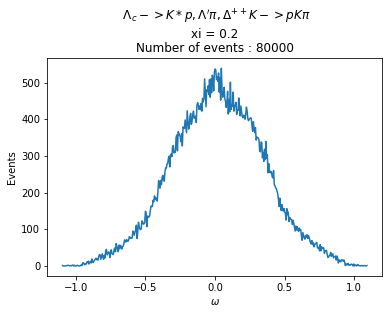

In [42]:
omega_range = (min(omegaEvents),max(omegaEvents),0.005,"$\omega$")
plotName = " $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K -> p K \pi$"
plotName += "\nxi = %.1f" % (np.round(10*xi)/10)
Plot1DEvents(omegaEvents,omega_range, plotName)



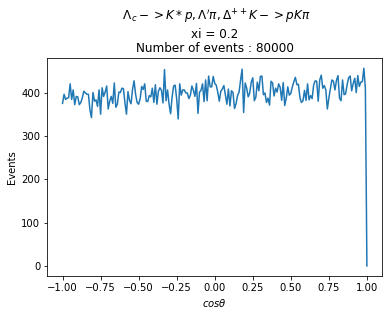

In [43]:
cosThetaRange = (-1,1,0.01,"$cos\\theta$")
plotName = " $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K -> p K \pi$"
plotName += "\nxi = %.1f" %(np.round(10*xi)/10)
numpydistrib = np.array(totalDistrib_events)
Plot1DEvents(numpydistrib[:,2],cosThetaRange, plotName)

    

## Comparison of omega analysis for two xi

In [46]:
nbEvent = 200000
#xi = 0.9
expDataPos = pd.read_csv("Events/Param 3rd try xi = 0.9 3M/myEventsDistrib.txt")
eventsDataFramePos = expDataPos[["s12","s23","cosTheta","phi","a0","b0","b1","omega"]]#Events will be in (s12,s13) format
loadedEventsPos = eventsDataFramePos.values.tolist()
totalDistribPos = np.array(loadedEventsPos)[:nbEvent,:]
omegaEventsPos = totalDistribPos[:,7]

#xi = -0.9
expDataNeg = pd.read_csv("Events/Param 3rd try xi = -0.9 3M/myEventsDistrib.txt")
eventsDataFrameNeg = expDataNeg[["s12","s23","cosTheta","phi","a0","b0","b1","omega"]]#Events will be in (s12,s13) format
loadedEventsNeg = eventsDataFrameNeg.values.tolist()
totalDistribNeg = np.array(loadedEventsNeg)[:nbEvent,:]
omegaEventsNeg = totalDistribNeg[:,7]

In [50]:
xiPos = GetBackXi(omegaEventsPos)
print("xi = <w>/<w²> = %f "%xiPos)
print("Sigma for xi = %.1f : %f" %(xiPos, SigmaForXi(omegaEventsPos,xiPos)))

xiNeg = GetBackXi(omegaEventsNeg)
print("xi = <w>/<w²> = %f "%xiNeg)
print("Sigma for xi = %.1f : %f" %(xiNeg, SigmaForXi(omegaEventsNeg,xiNeg)))

xi = <w>/<w²> = 0.897151 
Sigma for xi = 0.9 : 0.005459
xi = <w>/<w²> = -0.902771 
Sigma for xi = -0.9 : 0.005642


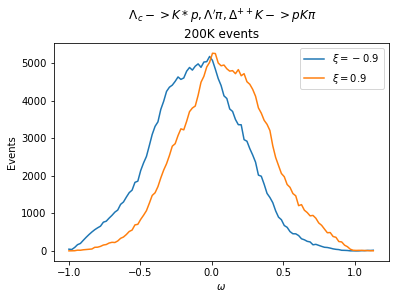

In [48]:
omega_range = (-1,max(max(omegaEventsNeg),max(omegaEventsPos)),0.02,"$\omega$")
plotName = " $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K -> p K \pi$"
plotName += "\n%dK events" %(nbEvent//1000)
PlotOne1DEvents(omegaEventsNeg,omega_range,"$\\xi = %.1f$"%xiNeg)
PlotOne1DEvents(omegaEventsPos,omega_range,"$\\xi = %.1f$"%xiPos)
plt.title(plotName)
plt.legend()
plt.show()


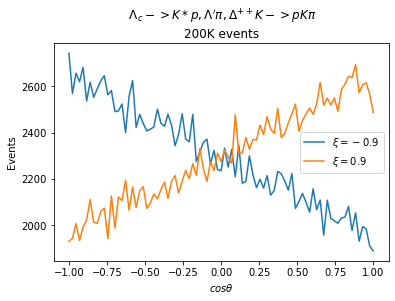

In [49]:
cosThetaRange = (-1,max(max(totalDistribNeg[:,2]),max(totalDistribPos[:,2])),0.023,"$cos\\theta$")
plotName = " $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K -> p K \pi$"
plotName += "\n%dK events" %(nbEvent//1000)

PlotOne1DEvents(totalDistribNeg[:,2],cosThetaRange,"$\\xi = %.1f$"%xiNeg)
PlotOne1DEvents(totalDistribPos[:,2],cosThetaRange,"$\\xi = %.1f$"%xiPos)
plt.title(plotName)
plt.legend()
plt.show()

## Dalitz plot with weighed events

In [51]:
nbEvent = 200000

expData = pd.read_csv("Events/Param 3rd try xi = 0.2 1M/myEventsDistrib.txt")
eventsDataFrame = expData[["s12","s23","cosTheta","phi","a0","b0","b1","omega"]]
loadedEvents = eventsDataFrame.values.tolist()
totalDistrib_events=np.array(loadedEvents)[:nbEvent,:]
omegaEvents = totalDistrib_events[:nbEvent,7]
omegaEventsNeg = omegaEvents

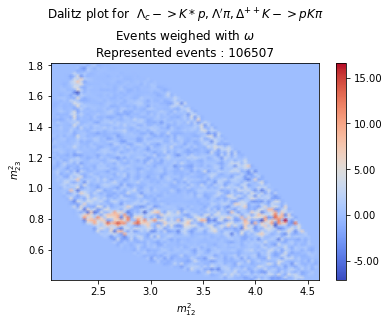

In [54]:
eventArray = np.array(totalDistrib_events)
weighedEvents = eventArray[:,(0,1,7)]
weighedEvents[:,2]
plotName = "Dalitz plot for  $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K-> p K \pi$"
plotName += "\nEvents weighed with $\omega$"
plotDalitz(M,m1,m2,m3,weighedEvents,binResolution,binResolution, plotName,True)


## Evolution of $\sigma_\xi$ with sample size

In [55]:
nbEvent = 200000
step = 500

expData = pd.read_csv("Events/Param 3rd try xi = 0.9 3M/myEventsDistrib.txt")
eventsDataFrame = expDataPos[["s12","s23","cosTheta","phi","a0","b0","b1","omega"]]#Events will be in (s12,s13) format
loadedEvents = eventsDataFramePos.values.tolist()
totalDistrib = np.array(loadedEventsPos)[:nbEvent,:]
omegaEvents = totalDistribPos[:,7]

nbEventChoice = [500*i for i in range(2,nbEvent//step)]

In [56]:
sigmaList = []
xiList = []



for eventNb in nbEventChoice:
    omegaEventsRestricted = omegaEvents [:eventNb]
    
    xi = GetBackXi(omegaEventsRestricted)
    xiList.append(xi)
    sigmaList.append( SigmaForXi(omegaEventsRestricted,xi))

print(len(sigmaList))


398


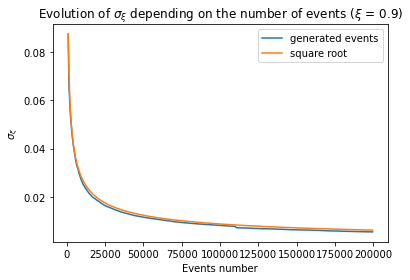

In [57]:
sqrtTab = [1/np.sqrt(n/nbEventChoice[0])*sigmaList[0] for n in nbEventChoice]
plt.plot(nbEventChoice,sigmaList,label = "generated events")
plt.plot(nbEventChoice,sqrtTab,label = "square root")
plt.xlabel("Events number")
plt.title("Evolution of $\\sigma_{\\xi}$ depending on the number of events ($\\xi$ = %.1f)"%xiList[-1])
plt.legend()
plt.ylabel("$\\sigma_\\xi$")
plt.show()

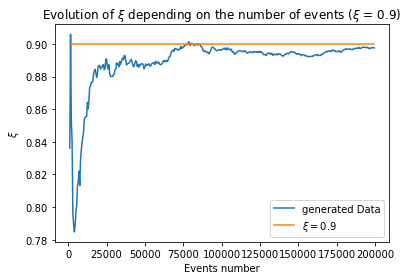

In [59]:
xiCst = [np.round(10*xiList[-1])/10 for i in nbEventChoice]
plt.plot(nbEventChoice,xiList,label = "generated Data")
plt.plot(nbEventChoice,xiCst,label = "$\\xi = %.1f$"%xiList[-1])
plt.xlabel("Events number")
plt.title("Evolution of $\\xi$ depending on the number of events ($\\xi$ = %.1f)"%xiList[-1])
plt.legend()
plt.ylabel("$\\xi$")
plt.show()

Text(0, 0.5, '$\\xi$')

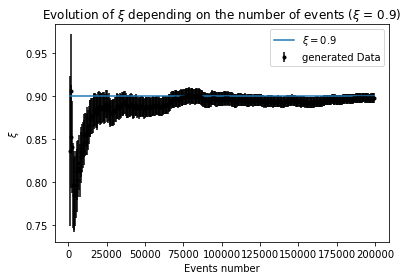

In [60]:
xiCst = [np.round(10*xiList[-1])/10 for i in nbEventChoice]

#plt.plot(nbEventChoice,xiListNeg,label = "generated Data")
plt.errorbar(nbEventChoice, xiList, yerr=sigmaList, fmt='.k',label = "generated Data");
plt.plot(nbEventChoice,xiCst,label = "$\\xi = %.1f$"%xiList[-1])

plt.xlabel("Events number")
plt.title("Evolution of $\\xi$ depending on the number of events ($\\xi$ = %.1f)"%xiList[-1])
plt.legend()
plt.ylabel("$\\xi$")



In [57]:
def GetBackBigXi(omegaEvents):
    #Another formula for xi, made for bigger values
    avg3 =0
    avg4 = 0
    for omega in omegaEvents :
        avg3 += omega*omega*omega
        avg4 += omega*omega*omega*omega
    return avg3/avg4


## Comparison many xi

In [61]:
#Functions to compare many experiments, nbEvent is set there and has to be the same for all. 
#All eventSet has to have at least nbEvent for it to be meaningful
nbEvent = 90000

#Loading events
expDataTable,eventsDataFrameTable, loadedEventTable, totalDistribTable,omegaEventsTable= [],[],[],[],[]

#expDataTable.append(pd.read_csv("generatedEvents/Param 3rd try xi = 1 3M/myEventsDistrib.txt"))
expDataTable.append(pd.read_csv("Events/Param 3rd try xi = 0.9 3M/myEventsDistrib.txt"))
"""
expDataTable.append(pd.read_csv("Events/Param 3rd try xi = 0.5 1M/myEventsDistrib.txt"))
"""
expDataTable.append(pd.read_csv("Events/Param 3rd try xi = 0.2 1M/myEventsDistrib.txt"))

expDataTable.append(pd.read_csv("Events/Param 3rd try xi = -1 3M/myEventsDistrib.txt"))
expDataTable.append(pd.read_csv("Events/Param 3rd try xi = -0.9 3M/myEventsDistrib.txt"))

#expDataTable.append(pd.read_csv("generatedEvents/third try xi  = 1/myEventsDistrib.txt"))

for iEventSet in range(len(expDataTable)):
    eventsDataFrameTable.append(expDataTable[iEventSet][["s12","s23","cosTheta","phi","a0","b0","b1","omega"]])
    loadedEventTable.append(eventsDataFrameTable[iEventSet].values.tolist())
    totalDistribTable.append(np.array(loadedEventTable[iEventSet])[:nbEvent,:])
    omegaEventsTable.append(totalDistribTable[iEventSet][:,7])
    


In [62]:
#Computing xi and sigmaXi
xiTable,sigmaXiTable = [],[]
for iEventSet in range(len(expDataTable)):
    xiTable.append(GetBackXi(omegaEventsTable[iEventSet]))
    sigmaXiTable.append(SigmaForXi(omegaEventsTable[iEventSet],xiTable[iEventSet]))
    print("xi = %f " % xiTable[iEventSet])
    print("Sigma for xi = %.1f : %f" %(xiTable[iEventSet], sigmaXiTable[iEventSet]))



xi = 0.895065 
Sigma for xi = 0.9 : 0.008594
xi = 0.205461 
Sigma for xi = 0.2 : 0.010108
xi = -0.996626 
Sigma for xi = -1.0 : 0.007645
xi = -0.899109 
Sigma for xi = -0.9 : 0.008497


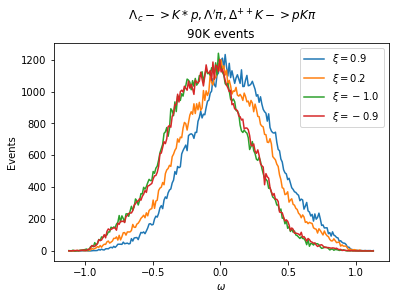

In [63]:
#Computing range omega (often issues of omega > 1 happening)
minOmega,maxOmega = -1,1
for iEventSet in range(len(expDataTable)):
    minOmega = min(minOmega,min(omegaEventsTable[iEventSet]))
    maxOmega = max(maxOmega,max(omegaEventsTable[iEventSet]))
omega_range = (minOmega,maxOmega,0.01,"$\omega$")

#Displaying omega distributions
for iEventSet in range(len(expDataTable)):
    PlotOne1DEvents(omegaEventsTable[iEventSet],omega_range,"$\\xi = %.1f$"%xiTable[iEventSet])

plotName = " $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K -> p K \pi$"
plotName += "\n%dK events" %(nbEvent//1000)
plt.title(plotName)
plt.legend()
plt.show()

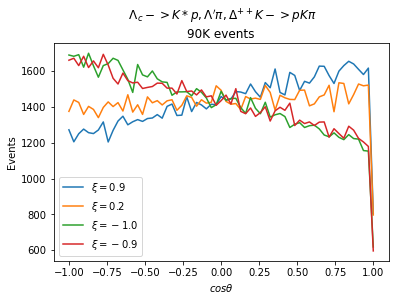

In [64]:
#Computing range theta
minTheta,maxTheta = -1,1
for iEventSet in range(len(expDataTable)):
    minTheta = min(minTheta,min(totalDistribTable[iEventSet][:,2]))
    maxTheta = max(maxTheta,max(totalDistribTable[iEventSet][:,2]))
cosThetaRange = (minTheta,maxTheta,0.032,"$cos\\theta$")

#Displaying omega distributions
for iEventSet in range(len(expDataTable)):
    PlotOne1DEvents(totalDistribTable[iEventSet][:,2],cosThetaRange,"$\\xi = %.1f$"%xiTable[iEventSet])
plotName = " $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K -> p K \pi$"
plotName += "\n%dK events" %(nbEvent//1000)
plt.title(plotName)
plt.legend()
plt.show()

In [65]:
LHCbOn = False
if(LHCbOn):
    expDataLHCb = pd.read_csv("Events/LambdaC_LHCb.txt")
    eventsDataFrameLHCb = expData[["mkpsq", "mppisq","cos_theta"]]#/!\ Events will be in (s12,s13) format

    eventsLHCb = eventsDataFrame.values.tolist()

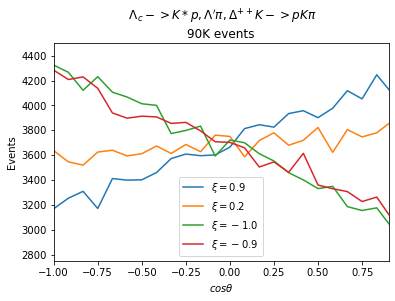

In [66]:
#Computing range theta
minTheta,maxTheta = -1,1
for iEventSet in range(len(expDataTable)):
    minTheta = min(minTheta,min(totalDistribTable[iEventSet][:,2]))
    maxTheta = max(maxTheta,max(totalDistribTable[iEventSet][:,2]))
cosThetaRange = (minTheta,maxTheta,0.082,"$cos\\theta$")

#Displaying omega distributions
for iEventSet in range(len(expDataTable)):
    PlotOne1DEvents(totalDistribTable[iEventSet][:,2],cosThetaRange,"$\\xi = %.1f$"%xiTable[iEventSet])
if(LHCbOn):
    PlotOne1DEvents(LHCbDistrib[:nbEvent,2],cosThetaRange,"$LHCb$")

plotName = " $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K -> p K \pi$"
plotName += "\n%dK events" %(nbEvent//1000)
plt.title(plotName)
plt.legend()
plt.xlim((-1,0.90))
plt.ylim((2750,4500))
plt.show()

### Evolution with sample size

In [180]:
nbEventChoice = [500*i for i in range(4,nbEvent//500)]#To see evolution

In [184]:
nbEventChoice = [10000,20000,50000,90000,100000,200000]#Only selected few to get values of xi and sigmaXi

In [185]:
xiTotalTable,sigmaXiTotalTable =[],[]

for iEventSet in range(len(expDataTable)):
    xiListSet,sigmaXiListSet = [],[]
    for eventNb in nbEventChoice:
        omegaEventsRestricted = omegaEventsTable[iEventSet][:eventNb]
        currentXi = GetBackXi(omegaEventsRestricted)
        xiListSet.append(currentXi)
        sigmaXiListSet.append(SigmaForXi(omegaEventsRestricted,currentXi))
    xiTotalTable.append(xiListSet)
    sigmaXiTotalTable.append(sigmaXiListSet)

4
6


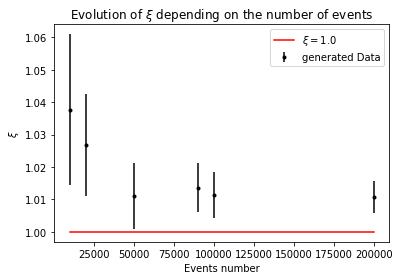

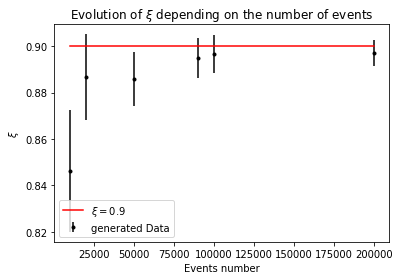

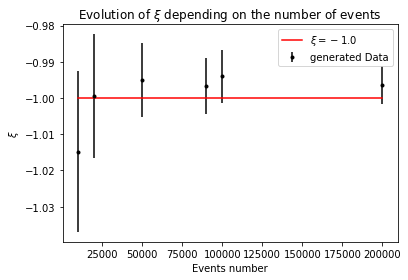

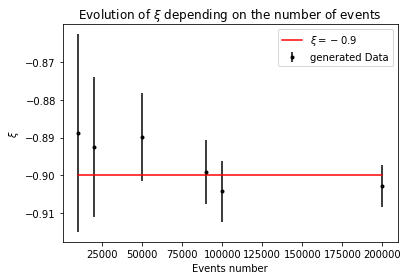

In [186]:
for iEventSet in range(len(expDataTable)):
    xiCst = [np.round(xiTotalTable[iEventSet][-1]*10)/10 for i in nbEventChoice]

    plt.errorbar(nbEventChoice, xiTotalTable[iEventSet], yerr=sigmaXiTotalTable[iEventSet],color = 'blue', fmt='.k',label = "generated Data");
    plt.plot(nbEventChoice,xiCst,label = "$\\xi = %.1f$" % xiCst[0], color = 'r')
    plt.xlabel("Events number")
    plt.title("Evolution of $\\xi$ depending on the number of events")
    plt.legend()
    plt.ylabel("$\\xi$")
    plt.show()
#plt.plot(nbEventChoice,xiListNeg,label = "generated Data")






In [188]:
#Saving values of xi and sigmaXi in a csv file
finalTable = []
for iEventSet in range(len(expDataTable)):
    finalTable.append(["xi for xi = %.1f"%xiTotalTable[iEventSet][-1]] + xiTotalTable[iEventSet])
    finalTable.append(["sigmaXi for xi = %.1f"%xiTotalTable[iEventSet][-1]] + sigmaXiTotalTable[iEventSet])
columnsName = ["Event nb"] + ["%s"% nbEventChoice[i] for i in range(len(nbEventChoice))]
repertory = "xiSigmaXiTable.csv"
SaveTable(finalTable, repertory, columnsName)

# Event generation and Analytical plots

Define distribution functions and allows to use fit values of form factors to get the shape of distribution

Not supposed to be used anymore for event generation (as the C++ code is far faster and still takes a long time).

But **can be used to get analytical values of functions** to get the shape of the distribution

## a0 using 8 form factors

In [35]:
#Physical parameters (in GeV)
mLamC=2.286 #Mass of Lambda_c
mp=0.938
mK=0.494 
mpi=0.140 
mDel=1.232 
GDel=0.117 #width of Delta++
mLam = 1.518 #Mass of Lambda' = Lambda (1520), spin 3/2-
GLam=0.0157 #width of Lambda'
mKst = 0.892 #Mass of K* = K* (892), I(J^P) =1/2(1−)
GKst = 0.051 #width of K* 

M = mLamC
m1 = mp
m2 = mK
m3 = mpi
s = M*M

binResolution = 80

In [36]:
def BW2(sR,mR,gammaR):
    """
        Generic squared Breit-Wigner factor for a resonance in R on variable sR
    """
    return 1/((sR-mR*mR)**2 + mR*mR*gammaR*gammaR)



def ReBWTwoResonances(sR1,mR1,gammaR1,sR2,mR2,gammaR2):
    """
        For factor type ReAC,ReBD,... with two different resonances
        If two parameters come from the same resonance, BW2 is equivalent
        /!\ Formula suppose parameters are real /!\ 
    """
    return ((sR1 - mR1*mR1)*(sR2 - mR2*mR2) + mR1*mR2*gammaR1*gammaR2)*BW2( sR1, mR1, gammaR1)*BW2( sR2, mR2, gammaR2);



In [50]:
def a0DistribParam(s12,s23):
    #Returns value of a0 in terms of s12,s23
    
    s13 = s + mp*mp + mK*mK + mpi*mpi - s23 - s12
    eprot = (s-s23 + mp*mp) / (2*np.sqrt(s))
    epi = (s-s12 + mpi*mpi) / (2*np.sqrt(s))
    ppp = np.sqrt(eprot*eprot-m1*m1) #|\vec{p_1}|
    kkk = np.sqrt(epi*epi-m3*m3) #|\vec{p_3}|
    psi = np.arccos((epi*eprot + (mp*mp + mpi*mpi - s13)/2)/(ppp*kkk))
    

    eK = (s-s13 + mK*mK) / (2*np.sqrt(s))
    
    eDel = eprot + epi
    eLam = eprot + eK
    eKst = epi + eK
    
    
    #Del2
    BWFactorDelta = BW2(s13,mDel,GDel)
    A2 = a*a*BWFactorDelta
    B2 = b*b*BWFactorDelta
    
    #Lam2
    BWFactorLambda = BW2(s12,mLam,GLam)
    C2 = c*c*BWFactorLambda
    D2 = d*d*BWFactorLambda
    
    #KSt2
    BWFactorKStar = BW2(s23,mKst,GKst)
    A12 = a1*a1*BWFactorKStar
    B12 = b1*b1*BWFactorKStar
    A22 = a2*a2*BWFactorKStar
    B22 = b2*b2*BWFactorKStar
    ReA1A2 = a1*a2*BWFactorKStar
    ReB1B2 = b1*b2*BWFactorKStar
    pp = kkk 
    
    #InterfBW
    ReBWLamDel = ReBWTwoResonances(s23,mKst,GKst,s13,mDel,GDel)
    ReBWLamKst = ReBWTwoResonances(s23,mKst,GKst,s12,mLam,GLam)
    ReBWDelKst = ReBWTwoResonances(s23,mKst,GKst,s13,mDel,GDel)
    
    #LamDel:
    ReAD = a*d*ReBWLamDel
    ReBC = b*c*ReBWLamDel
    #LamKst:
    ReA1C = a1*c*ReBWLamKst
    ReA2C = a2*c*ReBWLamKst
    ReB1D = b1*d*ReBWLamKst
    ReB2D = b2*d*ReBWLamKst
    #DelKst:
    ReA1B = a1*a*ReBWDelKst
    ReA2B = a2*a*ReBWDelKst
    ReB1A = b1*a*ReBWDelKst
    ReB2A = b2*a*ReBWDelKst

    #No interf
    del2 = (50*A2*epi**2*eprot**3*mLamC**3)/9 + (50*B2*epi**2*eprot**3*mLamC**3)/9 + (100*A2*epi*eprot**4*mLamC**3)/9 + (100*B2*epi*eprot**4*mLamC**3)/9 + (50*A2*eprot**5*mLamC**3)/9 + (50*B2*eprot**5*mLamC**3)/9 - (4*A2*epi*eprot**3*mDel*mLamC**3)/3 + (4*B2*epi*eprot**3*mDel*mLamC**3)/3 - (4*A2*eprot**4*mDel*mLamC**3)/3 + (4*B2*eprot**4*mDel*mLamC**3)/3 + 2*A2*eprot**3*mDel**2*mLamC**3 + 2*B2*eprot**3*mDel**2*mLamC**3 + (14*A2*epi**2*eprot**2*mLamC**3*mp)/9 - (14*B2*epi**2*eprot**2*mLamC**3*mp)/9 + (28*A2*epi*eprot**3*mLamC**3*mp)/9 - (28*B2*epi*eprot**3*mLamC**3*mp)/9 + (14*A2*eprot**4*mLamC**3*mp)/9 - (14*B2*eprot**4*mLamC**3*mp)/9 + (4*A2*epi*eprot**2*mDel*mLamC**3*mp)/3 + (4*B2*epi*eprot**2*mDel*mLamC**3*mp)/3 + (4*A2*eprot**3*mDel*mLamC**3*mp)/3 + (4*B2*eprot**3*mDel*mLamC**3*mp)/3 - (2*A2*eprot**2*mDel**2*mLamC**3*mp)/3 + (2*B2*eprot**2*mDel**2*mLamC**3*mp)/3 - 2*A2*epi**2*eprot*mLamC**3*mp**2 - 2*B2*epi**2*eprot*mLamC**3*mp**2 - 4*A2*epi*eprot**2*mLamC**3*mp**2 - 4*B2*epi*eprot**2*mLamC**3*mp**2 - 2*A2*eprot**3*mLamC**3*mp**2 - 2*B2*eprot**3*mLamC**3*mp**2 - (4*A2*epi*eprot*mDel*mLamC**3*mp**2)/9 + (4*B2*epi*eprot*mDel*mLamC**3*mp**2)/9 - (4*A2*eprot**2*mDel*mLamC**3*mp**2)/9 + (4*B2*eprot**2*mDel*mLamC**3*mp**2)/9 - (10*A2*eprot*mDel**2*mLamC**3*mp**2)/9 - (10*B2*eprot*mDel**2*mLamC**3*mp**2)/9 + (2*A2*epi**2*mLamC**3*mp**3)/9 - (2*B2*epi**2*mLamC**3*mp**3)/9 + (4*A2*epi*eprot*mLamC**3*mp**3)/9 - (4*B2*epi*eprot*mLamC**3*mp**3)/9 + (2*A2*eprot**2*mLamC**3*mp**3)/9 - (2*B2*eprot**2*mLamC**3*mp**3)/9 + (4*A2*epi*mDel*mLamC**3*mp**3)/9 + (4*B2*epi*mDel*mLamC**3*mp**3)/9 + (4*A2*eprot*mDel*mLamC**3*mp**3)/9 + (4*B2*eprot*mDel*mLamC**3*mp**3)/9 - (2*A2*mDel**2*mLamC**3*mp**3)/9 + (2*B2*mDel**2*mLamC**3*mp**3)/9 - (40*A2*epi*eprot**2*mLamC**3*ppp**2)/9 - (40*B2*epi*eprot**2*mLamC**3*ppp**2)/9 - (40*A2*eprot**3*mLamC**3*ppp**2)/9 - (40*B2*eprot**3*mLamC**3*ppp**2)/9 + (4*A2*eprot**2*mDel*mLamC**3*ppp**2)/3 - (4*B2*eprot**2*mDel*mLamC**3*ppp**2)/3 - (16*A2*epi*eprot*mLamC**3*mp*ppp**2)/9 + (16*B2*epi*eprot*mLamC**3*mp*ppp**2)/9 - (16*A2*eprot**2*mLamC**3*mp*ppp**2)/9 + (16*B2*eprot**2*mLamC**3*mp*ppp**2)/9 + (8*A2*epi*mLamC**3*mp**2*ppp**2)/9 + (8*B2*epi*mLamC**3*mp**2*ppp**2)/9 + (8*A2*eprot*mLamC**3*mp**2*ppp**2)/9 + (8*B2*eprot*mLamC**3*mp**2*ppp**2)/9 + (4*A2*mDel*mLamC**3*mp**2*ppp**2)/9 - (4*B2*mDel*mLamC**3*mp**2*ppp**2)/9 - (10*A2*eprot*mLamC**3*ppp**4)/9 - (10*B2*eprot*mLamC**3*ppp**4)/9 + (2*A2*mLamC**3*mp*ppp**4)/9 - (2*B2*mLamC**3*mp*ppp**4)/9 + (16*A2*epi**6*eprot**3*mLamC**3)/(9*s13**2) + (16*B2*epi**6*eprot**3*mLamC**3)/(9*s13**2) + (32*A2*epi**5*eprot**4*mLamC**3)/(3*s13**2) + (32*B2*epi**5*eprot**4*mLamC**3)/(3*s13**2) + (80*A2*epi**4*eprot**5*mLamC**3)/(3*s13**2) + (80*B2*epi**4*eprot**5*mLamC**3)/(3*s13**2) + (320*A2*epi**3*eprot**6*mLamC**3)/(9*s13**2) + (320*B2*epi**3*eprot**6*mLamC**3)/(9*s13**2) + (80*A2*epi**2*eprot**7*mLamC**3)/(3*s13**2) + (80*B2*epi**2*eprot**7*mLamC**3)/(3*s13**2) + (32*A2*epi*eprot**8*mLamC**3)/(3*s13**2) + (32*B2*epi*eprot**8*mLamC**3)/(3*s13**2) + (16*A2*eprot**9*mLamC**3)/(9*s13**2) + (16*B2*eprot**9*mLamC**3)/(9*s13**2) - (16*A2*epi**5*eprot**3*mDel*mLamC**3)/(9*s13**2) + (16*B2*epi**5*eprot**3*mDel*mLamC**3)/(9*s13**2) - (80*A2*epi**4*eprot**4*mDel*mLamC**3)/(9*s13**2) + (80*B2*epi**4*eprot**4*mDel*mLamC**3)/(9*s13**2) - (160*A2*epi**3*eprot**5*mDel*mLamC**3)/(9*s13**2) + (160*B2*epi**3*eprot**5*mDel*mLamC**3)/(9*s13**2) - (160*A2*epi**2*eprot**6*mDel*mLamC**3)/(9*s13**2) + (160*B2*epi**2*eprot**6*mDel*mLamC**3)/(9*s13**2) - (80*A2*epi*eprot**7*mDel*mLamC**3)/(9*s13**2) + (80*B2*epi*eprot**7*mDel*mLamC**3)/(9*s13**2) - (16*A2*eprot**8*mDel*mLamC**3)/(9*s13**2) + (16*B2*eprot**8*mDel*mLamC**3)/(9*s13**2) + (20*A2*epi**4*eprot**3*mDel**2*mLamC**3)/(9*s13**2) + (20*B2*epi**4*eprot**3*mDel**2*mLamC**3)/(9*s13**2) + (80*A2*epi**3*eprot**4*mDel**2*mLamC**3)/(9*s13**2) + (80*B2*epi**3*eprot**4*mDel**2*mLamC**3)/(9*s13**2) + (40*A2*epi**2*eprot**5*mDel**2*mLamC**3)/(3*s13**2) + (40*B2*epi**2*eprot**5*mDel**2*mLamC**3)/(3*s13**2) + (80*A2*epi*eprot**6*mDel**2*mLamC**3)/(9*s13**2) + (80*B2*epi*eprot**6*mDel**2*mLamC**3)/(9*s13**2) + (20*A2*eprot**7*mDel**2*mLamC**3)/(9*s13**2) + (20*B2*eprot**7*mDel**2*mLamC**3)/(9*s13**2) + (16*A2*epi**5*eprot**2*mDel*mLamC**3*mp)/(9*s13**2) + (16*B2*epi**5*eprot**2*mDel*mLamC**3*mp)/(9*s13**2) + (80*A2*epi**4*eprot**3*mDel*mLamC**3*mp)/(9*s13**2) + (80*B2*epi**4*eprot**3*mDel*mLamC**3*mp)/(9*s13**2) + (160*A2*epi**3*eprot**4*mDel*mLamC**3*mp)/(9*s13**2) + (160*B2*epi**3*eprot**4*mDel*mLamC**3*mp)/(9*s13**2) + (160*A2*epi**2*eprot**5*mDel*mLamC**3*mp)/(9*s13**2) + (160*B2*epi**2*eprot**5*mDel*mLamC**3*mp)/(9*s13**2) + (80*A2*epi*eprot**6*mDel*mLamC**3*mp)/(9*s13**2) + (80*B2*epi*eprot**6*mDel*mLamC**3*mp)/(9*s13**2) + (16*A2*eprot**7*mDel*mLamC**3*mp)/(9*s13**2) + (16*B2*eprot**7*mDel*mLamC**3*mp)/(9*s13**2) - (8*A2*epi**4*eprot**2*mDel**2*mLamC**3*mp)/(9*s13**2) + (8*B2*epi**4*eprot**2*mDel**2*mLamC**3*mp)/(9*s13**2) - (32*A2*epi**3*eprot**3*mDel**2*mLamC**3*mp)/(9*s13**2) + (32*B2*epi**3*eprot**3*mDel**2*mLamC**3*mp)/(9*s13**2) - (16*A2*epi**2*eprot**4*mDel**2*mLamC**3*mp)/(3*s13**2) + (16*B2*epi**2*eprot**4*mDel**2*mLamC**3*mp)/(3*s13**2) - (32*A2*epi*eprot**5*mDel**2*mLamC**3*mp)/(9*s13**2) + (32*B2*epi*eprot**5*mDel**2*mLamC**3*mp)/(9*s13**2) - (8*A2*eprot**6*mDel**2*mLamC**3*mp)/(9*s13**2) + (8*B2*eprot**6*mDel**2*mLamC**3*mp)/(9*s13**2) - (4*A2*epi**4*eprot*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (4*B2*epi**4*eprot*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (16*A2*epi**3*eprot**2*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (16*B2*epi**3*eprot**2*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (8*A2*epi**2*eprot**3*mDel**2*mLamC**3*mp**2)/s13**2 - (8*B2*epi**2*eprot**3*mDel**2*mLamC**3*mp**2)/s13**2 - (16*A2*epi*eprot**4*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (16*B2*epi*eprot**4*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (4*A2*eprot**5*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (4*B2*eprot**5*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (16*A2*epi**5*eprot**2*mLamC**3*ppp**2)/(3*s13**2) - (16*B2*epi**5*eprot**2*mLamC**3*ppp**2)/(3*s13**2) - (80*A2*epi**4*eprot**3*mLamC**3*ppp**2)/(3*s13**2) - (80*B2*epi**4*eprot**3*mLamC**3*ppp**2)/(3*s13**2) - (160*A2*epi**3*eprot**4*mLamC**3*ppp**2)/(3*s13**2) - (160*B2*epi**3*eprot**4*mLamC**3*ppp**2)/(3*s13**2) - (160*A2*epi**2*eprot**5*mLamC**3*ppp**2)/(3*s13**2) - (160*B2*epi**2*eprot**5*mLamC**3*ppp**2)/(3*s13**2) - (80*A2*epi*eprot**6*mLamC**3*ppp**2)/(3*s13**2) - (80*B2*epi*eprot**6*mLamC**3*ppp**2)/(3*s13**2) - (16*A2*eprot**7*mLamC**3*ppp**2)/(3*s13**2) - (16*B2*eprot**7*mLamC**3*ppp**2)/(3*s13**2) + (16*A2*epi**4*eprot**2*mDel*mLamC**3*ppp**2)/(3*s13**2) - (16*B2*epi**4*eprot**2*mDel*mLamC**3*ppp**2)/(3*s13**2) + (64*A2*epi**3*eprot**3*mDel*mLamC**3*ppp**2)/(3*s13**2) - (64*B2*epi**3*eprot**3*mDel*mLamC**3*ppp**2)/(3*s13**2) + (32*A2*epi**2*eprot**4*mDel*mLamC**3*ppp**2)/s13**2 - (32*B2*epi**2*eprot**4*mDel*mLamC**3*ppp**2)/s13**2 + (64*A2*epi*eprot**5*mDel*mLamC**3*ppp**2)/(3*s13**2) - (64*B2*epi*eprot**5*mDel*mLamC**3*ppp**2)/(3*s13**2) + (16*A2*eprot**6*mDel*mLamC**3*ppp**2)/(3*s13**2) - (16*B2*eprot**6*mDel*mLamC**3*ppp**2)/(3*s13**2) - (28*A2*epi**3*eprot**2*mDel**2*mLamC**3*ppp**2)/(9*s13**2) - (28*B2*epi**3*eprot**2*mDel**2*mLamC**3*ppp**2)/(9*s13**2) - (28*A2*epi**2*eprot**3*mDel**2*mLamC**3*ppp**2)/(3*s13**2) - (28*B2*epi**2*eprot**3*mDel**2*mLamC**3*ppp**2)/(3*s13**2) - (28*A2*epi*eprot**4*mDel**2*mLamC**3*ppp**2)/(3*s13**2) - (28*B2*epi*eprot**4*mDel**2*mLamC**3*ppp**2)/(3*s13**2) - (28*A2*eprot**5*mDel**2*mLamC**3*ppp**2)/(9*s13**2) - (28*B2*eprot**5*mDel**2*mLamC**3*ppp**2)/(9*s13**2) - (32*A2*epi**4*eprot*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (32*B2*epi**4*eprot*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (128*A2*epi**3*eprot**2*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (128*B2*epi**3*eprot**2*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (64*A2*epi**2*eprot**3*mDel*mLamC**3*mp*ppp**2)/(3*s13**2) - (64*B2*epi**2*eprot**3*mDel*mLamC**3*mp*ppp**2)/(3*s13**2) - (128*A2*epi*eprot**4*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (128*B2*epi*eprot**4*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (32*A2*eprot**5*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (32*B2*eprot**5*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) + (16*A2*epi**3*eprot*mDel**2*mLamC**3*mp*ppp**2)/(9*s13**2) - (16*B2*epi**3*eprot*mDel**2*mLamC**3*mp*ppp**2)/(9*s13**2) + (16*A2*epi**2*eprot**2*mDel**2*mLamC**3*mp*ppp**2)/(3*s13**2) - (16*B2*epi**2*eprot**2*mDel**2*mLamC**3*mp*ppp**2)/(3*s13**2) + (16*A2*epi*eprot**3*mDel**2*mLamC**3*mp*ppp**2)/(3*s13**2) - (16*B2*epi*eprot**3*mDel**2*mLamC**3*mp*ppp**2)/(3*s13**2) + (16*A2*eprot**4*mDel**2*mLamC**3*mp*ppp**2)/(9*s13**2) - (16*B2*eprot**4*mDel**2*mLamC**3*mp*ppp**2)/(9*s13**2) + (4*A2*epi**3*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13**2) + (4*B2*epi**3*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13**2) + (4*A2*epi**2*eprot*mDel**2*mLamC**3*mp**2*ppp**2)/s13**2 + (4*B2*epi**2*eprot*mDel**2*mLamC**3*mp**2*ppp**2)/s13**2 + (4*A2*epi*eprot**2*mDel**2*mLamC**3*mp**2*ppp**2)/s13**2 + (4*B2*epi*eprot**2*mDel**2*mLamC**3*mp**2*ppp**2)/s13**2 + (4*A2*eprot**3*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13**2) + (4*B2*eprot**3*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13**2) + (16*A2*epi**4*eprot*mLamC**3*ppp**4)/(3*s13**2) + (16*B2*epi**4*eprot*mLamC**3*ppp**4)/(3*s13**2) + (64*A2*epi**3*eprot**2*mLamC**3*ppp**4)/(3*s13**2) + (64*B2*epi**3*eprot**2*mLamC**3*ppp**4)/(3*s13**2) + (32*A2*epi**2*eprot**3*mLamC**3*ppp**4)/s13**2 + (32*B2*epi**2*eprot**3*mLamC**3*ppp**4)/s13**2 + (64*A2*epi*eprot**4*mLamC**3*ppp**4)/(3*s13**2) + (64*B2*epi*eprot**4*mLamC**3*ppp**4)/(3*s13**2) + (16*A2*eprot**5*mLamC**3*ppp**4)/(3*s13**2) + (16*B2*eprot**5*mLamC**3*ppp**4)/(3*s13**2) - (16*A2*epi**3*eprot*mDel*mLamC**3*ppp**4)/(3*s13**2) + (16*B2*epi**3*eprot*mDel*mLamC**3*ppp**4)/(3*s13**2) - (16*A2*epi**2*eprot**2*mDel*mLamC**3*ppp**4)/s13**2 + (16*B2*epi**2*eprot**2*mDel*mLamC**3*ppp**4)/s13**2 - (16*A2*epi*eprot**3*mDel*mLamC**3*ppp**4)/s13**2 + (16*B2*epi*eprot**3*mDel*mLamC**3*ppp**4)/s13**2 - (16*A2*eprot**4*mDel*mLamC**3*ppp**4)/(3*s13**2) + (16*B2*eprot**4*mDel*mLamC**3*ppp**4)/(3*s13**2) - (4*A2*epi**2*eprot*mDel**2*mLamC**3*ppp**4)/(9*s13**2) - (4*B2*epi**2*eprot*mDel**2*mLamC**3*ppp**4)/(9*s13**2) - (8*A2*epi*eprot**2*mDel**2*mLamC**3*ppp**4)/(9*s13**2) - (8*B2*epi*eprot**2*mDel**2*mLamC**3*ppp**4)/(9*s13**2) - (4*A2*eprot**3*mDel**2*mLamC**3*ppp**4)/(9*s13**2) - (4*B2*eprot**3*mDel**2*mLamC**3*ppp**4)/(9*s13**2) + (16*A2*epi**3*mDel*mLamC**3*mp*ppp**4)/(9*s13**2) + (16*B2*epi**3*mDel*mLamC**3*mp*ppp**4)/(9*s13**2) + (16*A2*epi**2*eprot*mDel*mLamC**3*mp*ppp**4)/(3*s13**2) + (16*B2*epi**2*eprot*mDel*mLamC**3*mp*ppp**4)/(3*s13**2) + (16*A2*epi*eprot**2*mDel*mLamC**3*mp*ppp**4)/(3*s13**2) + (16*B2*epi*eprot**2*mDel*mLamC**3*mp*ppp**4)/(3*s13**2) + (16*A2*eprot**3*mDel*mLamC**3*mp*ppp**4)/(9*s13**2) + (16*B2*eprot**3*mDel*mLamC**3*mp*ppp**4)/(9*s13**2) - (8*A2*epi**2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) + (8*B2*epi**2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) - (16*A2*epi*eprot*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) + (16*B2*epi*eprot*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) - (8*A2*eprot**2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) + (8*B2*eprot**2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) - (16*A2*epi**3*mLamC**3*ppp**6)/(9*s13**2) - (16*B2*epi**3*mLamC**3*ppp**6)/(9*s13**2) - (16*A2*epi**2*eprot*mLamC**3*ppp**6)/(3*s13**2) - (16*B2*epi**2*eprot*mLamC**3*ppp**6)/(3*s13**2) - (16*A2*epi*eprot**2*mLamC**3*ppp**6)/(3*s13**2) - (16*B2*epi*eprot**2*mLamC**3*ppp**6)/(3*s13**2) - (16*A2*eprot**3*mLamC**3*ppp**6)/(9*s13**2) - (16*B2*eprot**3*mLamC**3*ppp**6)/(9*s13**2) + (16*A2*epi**2*mDel*mLamC**3*ppp**6)/(9*s13**2) - (16*B2*epi**2*mDel*mLamC**3*ppp**6)/(9*s13**2) + (32*A2*epi*eprot*mDel*mLamC**3*ppp**6)/(9*s13**2) - (32*B2*epi*eprot*mDel*mLamC**3*ppp**6)/(9*s13**2) + (16*A2*eprot**2*mDel*mLamC**3*ppp**6)/(9*s13**2) - (16*B2*eprot**2*mDel*mLamC**3*ppp**6)/(9*s13**2) + (4*A2*epi*mDel**2*mLamC**3*ppp**6)/(3*s13**2) + (4*B2*epi*mDel**2*mLamC**3*ppp**6)/(3*s13**2) + (4*A2*eprot*mDel**2*mLamC**3*ppp**6)/(3*s13**2) + (4*B2*eprot*mDel**2*mLamC**3*ppp**6)/(3*s13**2) - (16*A2*epi**4*eprot**3*mLamC**3)/(3*s13) - (16*B2*epi**4*eprot**3*mLamC**3)/(3*s13) - (64*A2*epi**3*eprot**4*mLamC**3)/(3*s13) - (64*B2*epi**3*eprot**4*mLamC**3)/(3*s13) - (32*A2*epi**2*eprot**5*mLamC**3)/s13 - (32*B2*epi**2*eprot**5*mLamC**3)/s13 - (64*A2*epi*eprot**6*mLamC**3)/(3*s13) - (64*B2*epi*eprot**6*mLamC**3)/(3*s13) - (16*A2*eprot**7*mLamC**3)/(3*s13) - (16*B2*eprot**7*mLamC**3)/(3*s13) + (28*A2*epi**3*eprot**3*mDel*mLamC**3)/(9*s13) - (28*B2*epi**3*eprot**3*mDel*mLamC**3)/(9*s13) + (28*A2*epi**2*eprot**4*mDel*mLamC**3)/(3*s13) - (28*B2*epi**2*eprot**4*mDel*mLamC**3)/(3*s13) + (28*A2*epi*eprot**5*mDel*mLamC**3)/(3*s13) - (28*B2*epi*eprot**5*mDel*mLamC**3)/(3*s13) + (28*A2*eprot**6*mDel*mLamC**3)/(9*s13) - (28*B2*eprot**6*mDel*mLamC**3)/(9*s13) - (38*A2*epi**2*eprot**3*mDel**2*mLamC**3)/(9*s13) - (38*B2*epi**2*eprot**3*mDel**2*mLamC**3)/(9*s13) - (76*A2*epi*eprot**4*mDel**2*mLamC**3)/(9*s13) - (76*B2*epi*eprot**4*mDel**2*mLamC**3)/(9*s13) - (38*A2*eprot**5*mDel**2*mLamC**3)/(9*s13) - (38*B2*eprot**5*mDel**2*mLamC**3)/(9*s13) - (8*A2*epi**4*eprot**2*mLamC**3*mp)/(9*s13) + (8*B2*epi**4*eprot**2*mLamC**3*mp)/(9*s13) - (32*A2*epi**3*eprot**3*mLamC**3*mp)/(9*s13) + (32*B2*epi**3*eprot**3*mLamC**3*mp)/(9*s13) - (16*A2*epi**2*eprot**4*mLamC**3*mp)/(3*s13) + (16*B2*epi**2*eprot**4*mLamC**3*mp)/(3*s13) - (32*A2*epi*eprot**5*mLamC**3*mp)/(9*s13) + (32*B2*epi*eprot**5*mLamC**3*mp)/(9*s13) - (8*A2*eprot**6*mLamC**3*mp)/(9*s13) + (8*B2*eprot**6*mLamC**3*mp)/(9*s13) - (28*A2*epi**3*eprot**2*mDel*mLamC**3*mp)/(9*s13) - (28*B2*epi**3*eprot**2*mDel*mLamC**3*mp)/(9*s13) - (28*A2*epi**2*eprot**3*mDel*mLamC**3*mp)/(3*s13) - (28*B2*epi**2*eprot**3*mDel*mLamC**3*mp)/(3*s13) - (28*A2*epi*eprot**4*mDel*mLamC**3*mp)/(3*s13) - (28*B2*epi*eprot**4*mDel*mLamC**3*mp)/(3*s13) - (28*A2*eprot**5*mDel*mLamC**3*mp)/(9*s13) - (28*B2*eprot**5*mDel*mLamC**3*mp)/(9*s13) + (14*A2*epi**2*eprot**2*mDel**2*mLamC**3*mp)/(9*s13) - (14*B2*epi**2*eprot**2*mDel**2*mLamC**3*mp)/(9*s13) + (28*A2*epi*eprot**3*mDel**2*mLamC**3*mp)/(9*s13) - (28*B2*epi*eprot**3*mDel**2*mLamC**3*mp)/(9*s13) + (14*A2*eprot**4*mDel**2*mLamC**3*mp)/(9*s13) - (14*B2*eprot**4*mDel**2*mLamC**3*mp)/(9*s13) + (8*A2*epi**4*eprot*mLamC**3*mp**2)/(9*s13) + (8*B2*epi**4*eprot*mLamC**3*mp**2)/(9*s13) + (32*A2*epi**3*eprot**2*mLamC**3*mp**2)/(9*s13) + (32*B2*epi**3*eprot**2*mLamC**3*mp**2)/(9*s13) + (16*A2*epi**2*eprot**3*mLamC**3*mp**2)/(3*s13) + (16*B2*epi**2*eprot**3*mLamC**3*mp**2)/(3*s13) + (32*A2*epi*eprot**4*mLamC**3*mp**2)/(9*s13) + (32*B2*epi*eprot**4*mLamC**3*mp**2)/(9*s13) + (8*A2*eprot**5*mLamC**3*mp**2)/(9*s13) + (8*B2*eprot**5*mLamC**3*mp**2)/(9*s13) + (4*A2*epi**3*eprot*mDel*mLamC**3*mp**2)/(9*s13) - (4*B2*epi**3*eprot*mDel*mLamC**3*mp**2)/(9*s13) + (4*A2*epi**2*eprot**2*mDel*mLamC**3*mp**2)/(3*s13) - (4*B2*epi**2*eprot**2*mDel*mLamC**3*mp**2)/(3*s13) + (4*A2*epi*eprot**3*mDel*mLamC**3*mp**2)/(3*s13) - (4*B2*epi*eprot**3*mDel*mLamC**3*mp**2)/(3*s13) + (4*A2*eprot**4*mDel*mLamC**3*mp**2)/(9*s13) - (4*B2*eprot**4*mDel*mLamC**3*mp**2)/(9*s13) + (22*A2*epi**2*eprot*mDel**2*mLamC**3*mp**2)/(9*s13) + (22*B2*epi**2*eprot*mDel**2*mLamC**3*mp**2)/(9*s13) + (44*A2*epi*eprot**2*mDel**2*mLamC**3*mp**2)/(9*s13) + (44*B2*epi*eprot**2*mDel**2*mLamC**3*mp**2)/(9*s13) + (22*A2*eprot**3*mDel**2*mLamC**3*mp**2)/(9*s13) + (22*B2*eprot**3*mDel**2*mLamC**3*mp**2)/(9*s13) - (4*A2*epi**3*mDel*mLamC**3*mp**3)/(9*s13) - (4*B2*epi**3*mDel*mLamC**3*mp**3)/(9*s13) - (4*A2*epi**2*eprot*mDel*mLamC**3*mp**3)/(3*s13) - (4*B2*epi**2*eprot*mDel*mLamC**3*mp**3)/(3*s13) - (4*A2*epi*eprot**2*mDel*mLamC**3*mp**3)/(3*s13) - (4*B2*epi*eprot**2*mDel*mLamC**3*mp**3)/(3*s13) - (4*A2*eprot**3*mDel*mLamC**3*mp**3)/(9*s13) - (4*B2*eprot**3*mDel*mLamC**3*mp**3)/(9*s13) + (2*A2*epi**2*mDel**2*mLamC**3*mp**3)/(9*s13) - (2*B2*epi**2*mDel**2*mLamC**3*mp**3)/(9*s13) + (4*A2*epi*eprot*mDel**2*mLamC**3*mp**3)/(9*s13) - (4*B2*epi*eprot*mDel**2*mLamC**3*mp**3)/(9*s13) + (2*A2*eprot**2*mDel**2*mLamC**3*mp**3)/(9*s13) - (2*B2*eprot**2*mDel**2*mLamC**3*mp**3)/(9*s13) + (88*A2*epi**3*eprot**2*mLamC**3*ppp**2)/(9*s13) + (88*B2*epi**3*eprot**2*mLamC**3*ppp**2)/(9*s13) + (88*A2*epi**2*eprot**3*mLamC**3*ppp**2)/(3*s13) + (88*B2*epi**2*eprot**3*mLamC**3*ppp**2)/(3*s13) + (88*A2*epi*eprot**4*mLamC**3*ppp**2)/(3*s13) + (88*B2*epi*eprot**4*mLamC**3*ppp**2)/(3*s13) + (88*A2*eprot**5*mLamC**3*ppp**2)/(9*s13) + (88*B2*eprot**5*mLamC**3*ppp**2)/(9*s13) - (20*A2*epi**2*eprot**2*mDel*mLamC**3*ppp**2)/(3*s13) + (20*B2*epi**2*eprot**2*mDel*mLamC**3*ppp**2)/(3*s13) - (40*A2*epi*eprot**3*mDel*mLamC**3*ppp**2)/(3*s13) + (40*B2*epi*eprot**3*mDel*mLamC**3*ppp**2)/(3*s13) - (20*A2*eprot**4*mDel*mLamC**3*ppp**2)/(3*s13) + (20*B2*eprot**4*mDel*mLamC**3*ppp**2)/(3*s13) + (28*A2*epi*eprot**2*mDel**2*mLamC**3*ppp**2)/(9*s13) + (28*B2*epi*eprot**2*mDel**2*mLamC**3*ppp**2)/(9*s13) + (28*A2*eprot**3*mDel**2*mLamC**3*ppp**2)/(9*s13) + (28*B2*eprot**3*mDel**2*mLamC**3*ppp**2)/(9*s13) + (16*A2*epi**3*eprot*mLamC**3*mp*ppp**2)/(9*s13) - (16*B2*epi**3*eprot*mLamC**3*mp*ppp**2)/(9*s13) + (16*A2*epi**2*eprot**2*mLamC**3*mp*ppp**2)/(3*s13) - (16*B2*epi**2*eprot**2*mLamC**3*mp*ppp**2)/(3*s13) + (16*A2*epi*eprot**3*mLamC**3*mp*ppp**2)/(3*s13) - (16*B2*epi*eprot**3*mLamC**3*mp*ppp**2)/(3*s13) + (16*A2*eprot**4*mLamC**3*mp*ppp**2)/(9*s13) - (16*B2*eprot**4*mLamC**3*mp*ppp**2)/(9*s13) + (32*A2*epi**2*eprot*mDel*mLamC**3*mp*ppp**2)/(9*s13) + (32*B2*epi**2*eprot*mDel*mLamC**3*mp*ppp**2)/(9*s13) + (64*A2*epi*eprot**2*mDel*mLamC**3*mp*ppp**2)/(9*s13) + (64*B2*epi*eprot**2*mDel*mLamC**3*mp*ppp**2)/(9*s13) + (32*A2*eprot**3*mDel*mLamC**3*mp*ppp**2)/(9*s13) + (32*B2*eprot**3*mDel*mLamC**3*mp*ppp**2)/(9*s13) - (16*A2*epi*eprot*mDel**2*mLamC**3*mp*ppp**2)/(9*s13) + (16*B2*epi*eprot*mDel**2*mLamC**3*mp*ppp**2)/(9*s13) - (16*A2*eprot**2*mDel**2*mLamC**3*mp*ppp**2)/(9*s13) + (16*B2*eprot**2*mDel**2*mLamC**3*mp*ppp**2)/(9*s13) - (8*A2*epi**3*mLamC**3*mp**2*ppp**2)/(9*s13) - (8*B2*epi**3*mLamC**3*mp**2*ppp**2)/(9*s13) - (8*A2*epi**2*eprot*mLamC**3*mp**2*ppp**2)/(3*s13) - (8*B2*epi**2*eprot*mLamC**3*mp**2*ppp**2)/(3*s13) - (8*A2*epi*eprot**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (8*B2*epi*eprot**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (8*A2*eprot**3*mLamC**3*mp**2*ppp**2)/(9*s13) - (8*B2*eprot**3*mLamC**3*mp**2*ppp**2)/(9*s13) - (4*A2*epi**2*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) + (4*B2*epi**2*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) - (8*A2*epi*eprot*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) + (8*B2*epi*eprot*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) - (4*A2*eprot**2*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) + (4*B2*eprot**2*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) - (4*A2*epi*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (4*B2*epi*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (4*A2*eprot*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (4*B2*eprot*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (32*A2*epi**2*eprot*mLamC**3*ppp**4)/(9*s13) - (32*B2*epi**2*eprot*mLamC**3*ppp**4)/(9*s13) - (64*A2*epi*eprot**2*mLamC**3*ppp**4)/(9*s13) - (64*B2*epi*eprot**2*mLamC**3*ppp**4)/(9*s13) - (32*A2*eprot**3*mLamC**3*ppp**4)/(9*s13) - (32*B2*eprot**3*mLamC**3*ppp**4)/(9*s13) + (4*A2*epi*eprot*mDel*mLamC**3*ppp**4)/s13 - (4*B2*epi*eprot*mDel*mLamC**3*ppp**4)/s13 + (4*A2*eprot**2*mDel*mLamC**3*ppp**4)/s13 - (4*B2*eprot**2*mDel*mLamC**3*ppp**4)/s13 + (10*A2*eprot*mDel**2*mLamC**3*ppp**4)/(9*s13) + (10*B2*eprot*mDel**2*mLamC**3*ppp**4)/(9*s13) - (8*A2*epi**2*mLamC**3*mp*ppp**4)/(9*s13) + (8*B2*epi**2*mLamC**3*mp*ppp**4)/(9*s13) - (16*A2*epi*eprot*mLamC**3*mp*ppp**4)/(9*s13) + (16*B2*epi*eprot*mLamC**3*mp*ppp**4)/(9*s13) - (8*A2*eprot**2*mLamC**3*mp*ppp**4)/(9*s13) + (8*B2*eprot**2*mLamC**3*mp*ppp**4)/(9*s13) - (4*A2*epi*mDel*mLamC**3*mp*ppp**4)/(9*s13) - (4*B2*epi*mDel*mLamC**3*mp*ppp**4)/(9*s13) - (4*A2*eprot*mDel*mLamC**3*mp*ppp**4)/(9*s13) - (4*B2*eprot*mDel*mLamC**3*mp*ppp**4)/(9*s13) + (2*A2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13) - (2*B2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13) - (8*A2*epi*mLamC**3*ppp**6)/(9*s13) - (8*B2*epi*mLamC**3*ppp**6)/(9*s13) - (8*A2*eprot*mLamC**3*ppp**6)/(9*s13) - (8*B2*eprot*mLamC**3*ppp**6)/(9*s13) - (4*A2*mDel*mLamC**3*ppp**6)/(9*s13) + (4*B2*mDel*mLamC**3*ppp**6)/(9*s13) - 2*A2*eprot**3*mLamC**3*s13 - 2*B2*eprot**3*mLamC**3*s13 - (2*A2*eprot**2*mLamC**3*mp*s13)/3 + (2*B2*eprot**2*mLamC**3*mp*s13)/3 + (10*A2*eprot*mLamC**3*mp**2*s13)/9 + (10*B2*eprot*mLamC**3*mp**2*s13)/9 - (2*A2*mLamC**3*mp**3*s13)/9 + (2*B2*mLamC**3*mp**3*s13)/9 - (40*A2*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/9 - (40*B2*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/9 - (40*A2*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/9 - (40*B2*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/9 + (4*A2*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/3 - (4*B2*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/3 - (16*A2*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 + (16*B2*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 - (16*A2*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 + (16*B2*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 + (8*A2*epi*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (8*B2*epi*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (8*A2*eprot*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (8*B2*eprot*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (4*A2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/9 - (4*B2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/9 - (20*A2*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/9 - (20*B2*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/9 + (4*A2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/9 - (4*B2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/9 - (16*A2*epi**5*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (16*B2*epi**5*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (80*A2*epi**4*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (80*B2*epi**4*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (160*A2*epi**3*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (160*B2*epi**3*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (160*A2*epi**2*eprot**5*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (160*B2*epi**2*eprot**5*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (80*A2*epi*eprot**6*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (80*B2*epi*eprot**6*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (16*A2*eprot**7*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (16*B2*eprot**7*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) + (16*A2*epi**4*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (16*B2*epi**4*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) + (64*A2*epi**3*eprot**3*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (64*B2*epi**3*eprot**3*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) + (32*A2*epi**2*eprot**4*kkk*mDel*mLamC**3*ppp*np.cos(psi))/s13**2 - (32*B2*epi**2*eprot**4*kkk*mDel*mLamC**3*ppp*np.cos(psi))/s13**2 + (64*A2*epi*eprot**5*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (64*B2*epi*eprot**5*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) + (16*A2*eprot**6*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (16*B2*eprot**6*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (28*A2*epi**3*eprot**2*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13**2) - (28*B2*epi**3*eprot**2*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13**2) - (28*A2*epi**2*eprot**3*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (28*B2*epi**2*eprot**3*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (28*A2*epi*eprot**4*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (28*B2*epi*eprot**4*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (28*A2*eprot**5*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13**2) - (28*B2*eprot**5*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13**2) - (32*A2*epi**4*eprot*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (32*B2*epi**4*eprot*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (128*A2*epi**3*eprot**2*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (128*B2*epi**3*eprot**2*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (64*A2*epi**2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) - (64*B2*epi**2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) - (128*A2*epi*eprot**4*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (128*B2*epi*eprot**4*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (32*A2*eprot**5*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (32*B2*eprot**5*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) + (16*A2*epi**3*eprot*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (16*B2*epi**3*eprot*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) + (16*A2*epi**2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) - (16*B2*epi**2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) + (16*A2*epi*eprot**3*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) - (16*B2*epi*eprot**3*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) + (16*A2*eprot**4*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (16*B2*eprot**4*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) + (4*A2*epi**3*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13**2) + (4*B2*epi**3*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13**2) + (4*A2*epi**2*eprot*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/s13**2 + (4*B2*epi**2*eprot*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/s13**2 + (4*A2*epi*eprot**2*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/s13**2 + (4*B2*epi*eprot**2*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/s13**2 + (4*A2*eprot**3*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13**2) + (4*B2*eprot**3*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13**2) + (32*A2*epi**4*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*epi**4*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (128*A2*epi**3*eprot**2*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (128*B2*epi**3*eprot**2*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (64*A2*epi**2*eprot**3*kkk*mLamC**3*ppp**3*np.cos(psi))/s13**2 + (64*B2*epi**2*eprot**3*kkk*mLamC**3*ppp**3*np.cos(psi))/s13**2 + (128*A2*epi*eprot**4*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (128*B2*epi*eprot**4*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (32*A2*eprot**5*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*eprot**5*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) - (32*A2*epi**3*eprot*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*epi**3*eprot*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) - (32*A2*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13**2 + (32*B2*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13**2 - (32*A2*epi*eprot**3*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13**2 + (32*B2*epi*eprot**3*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13**2 - (32*A2*eprot**4*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*eprot**4*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) - (8*A2*epi**2*eprot*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) - (8*B2*epi**2*eprot*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) - (16*A2*epi*eprot**2*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) - (16*B2*epi*eprot**2*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) - (8*A2*eprot**3*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) - (8*B2*eprot**3*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) + (32*A2*epi**3*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (32*B2*epi**3*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (32*A2*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(3*s13**2) + (32*A2*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(3*s13**2) + (32*A2*eprot**3*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (32*B2*eprot**3*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) - (16*A2*epi**2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (16*B2*epi**2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) - (32*A2*epi*eprot*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (32*B2*epi*eprot*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) - (16*A2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (16*B2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) - (16*A2*epi**3*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (16*B2*epi**3*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (16*A2*epi**2*eprot*kkk*mLamC**3*ppp**5*np.cos(psi))/s13**2 - (16*B2*epi**2*eprot*kkk*mLamC**3*ppp**5*np.cos(psi))/s13**2 - (16*A2*epi*eprot**2*kkk*mLamC**3*ppp**5*np.cos(psi))/s13**2 - (16*B2*epi*eprot**2*kkk*mLamC**3*ppp**5*np.cos(psi))/s13**2 - (16*A2*eprot**3*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (16*B2*eprot**3*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) + (16*A2*epi**2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (16*B2*epi**2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) + (32*A2*epi*eprot*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (32*B2*epi*eprot*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) + (16*A2*eprot**2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (16*B2*eprot**2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) + (4*A2*epi*kkk*mDel**2*mLamC**3*ppp**5*np.cos(psi))/s13**2 + (4*B2*epi*kkk*mDel**2*mLamC**3*ppp**5*np.cos(psi))/s13**2 + (4*A2*eprot*kkk*mDel**2*mLamC**3*ppp**5*np.cos(psi))/s13**2 + (4*B2*eprot*kkk*mDel**2*mLamC**3*ppp**5*np.cos(psi))/s13**2 + (88*A2*epi**3*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(9*s13) + (88*B2*epi**3*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(9*s13) + (88*A2*epi**2*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13) + (88*B2*epi**2*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13) + (88*A2*epi*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13) + (88*B2*epi*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13) + (88*A2*eprot**5*kkk*mLamC**3*ppp*np.cos(psi))/(9*s13) + (88*B2*eprot**5*kkk*mLamC**3*ppp*np.cos(psi))/(9*s13) - (20*A2*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) + (20*B2*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) - (40*A2*epi*eprot**3*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) + (40*B2*epi*eprot**3*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) - (20*A2*eprot**4*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) + (20*B2*eprot**4*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) + (28*A2*epi*eprot**2*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13) + (28*B2*epi*eprot**2*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13) + (28*A2*eprot**3*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13) + (28*B2*eprot**3*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13) + (16*A2*epi**3*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) - (16*B2*epi**3*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (16*A2*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/(3*s13) - (16*B2*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/(3*s13) + (16*A2*epi*eprot**3*kkk*mLamC**3*mp*ppp*np.cos(psi))/(3*s13) - (16*B2*epi*eprot**3*kkk*mLamC**3*mp*ppp*np.cos(psi))/(3*s13) + (16*A2*eprot**4*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) - (16*B2*eprot**4*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (32*A2*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (32*B2*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (64*A2*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (64*B2*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (32*A2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (32*B2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) - (16*A2*epi*eprot*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (16*B2*epi*eprot*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) - (16*A2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (16*B2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) - (8*A2*epi**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (8*B2*epi**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (8*A2*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (8*B2*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (8*A2*epi*eprot**2*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (8*B2*epi*eprot**2*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (8*A2*eprot**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (8*B2*eprot**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (4*A2*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) + (4*B2*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (8*A2*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) + (8*B2*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (4*A2*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) + (4*B2*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (4*A2*epi*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (4*B2*epi*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (4*A2*eprot*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (4*B2*eprot*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (64*A2*epi**2*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (64*B2*epi**2*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (128*A2*epi*eprot**2*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (128*B2*epi*eprot**2*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (64*A2*eprot**3*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (64*B2*eprot**3*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) + (8*A2*epi*eprot*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13 - (8*B2*epi*eprot*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13 + (8*A2*eprot**2*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13 - (8*B2*eprot**2*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13 + (20*A2*eprot*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13) + (20*B2*eprot*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (16*A2*epi**2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) + (16*B2*epi**2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (32*A2*epi*eprot*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) + (32*B2*epi*eprot*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (16*A2*eprot**2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) + (16*B2*eprot**2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (8*A2*epi*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (8*B2*epi*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (8*A2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (8*B2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) + (4*A2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (4*B2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (8*A2*epi*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13) - (8*B2*epi*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13) - (8*A2*eprot*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13) - (8*B2*eprot*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13) - (4*A2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13) + (4*B2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13) - (10*A2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/9 - (10*B2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/9 + (2*A2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/9 - (2*B2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/9 + (16*A2*epi**4*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*epi**4*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (64*A2*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (64*B2*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (32*A2*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 + (32*B2*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 + (64*A2*epi*eprot**4*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (64*B2*epi*eprot**4*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*A2*eprot**5*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*eprot**5*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) - (16*A2*epi**3*eprot*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*epi**3*eprot*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) - (16*A2*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 + (16*B2*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 - (16*A2*epi*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 + (16*B2*epi*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 - (16*A2*eprot**4*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*eprot**4*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) - (4*A2*epi**2*eprot*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) - (4*B2*epi**2*eprot*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) - (8*A2*epi*eprot**2*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) - (8*B2*epi*eprot**2*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) - (4*A2*eprot**3*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) - (4*B2*eprot**3*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) + (16*A2*epi**3*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (16*B2*epi**3*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (16*A2*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*A2*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*A2*eprot**3*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (16*B2*eprot**3*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) - (8*A2*epi**2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (8*B2*epi**2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) - (16*A2*epi*eprot*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (16*B2*epi*eprot*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) - (8*A2*eprot**2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (8*B2*eprot**2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) - (16*A2*epi**3*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (16*B2*epi**3*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (16*A2*epi**2*eprot*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 - (16*B2*epi**2*eprot*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 - (16*A2*epi*eprot**2*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 - (16*B2*epi*eprot**2*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 - (16*A2*eprot**3*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (16*B2*eprot**3*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) + (16*A2*epi**2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (16*B2*epi**2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) + (32*A2*epi*eprot*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (32*B2*epi*eprot*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) + (16*A2*eprot**2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (16*B2*eprot**2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) + (4*A2*epi*kkk**2*mDel**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 + (4*B2*epi*kkk**2*mDel**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 + (4*A2*eprot*kkk**2*mDel**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 + (4*B2*eprot*kkk**2*mDel**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 - (32*A2*epi**2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (32*B2*epi**2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (64*A2*epi*eprot**2*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (64*B2*epi*eprot**2*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (32*A2*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (32*B2*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) + (4*A2*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13 - (4*B2*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13 + (4*A2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13 - (4*B2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13 + (10*A2*eprot*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) + (10*B2*eprot*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (8*A2*epi**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) + (8*B2*epi**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (16*A2*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) + (16*B2*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (8*A2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) + (8*B2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (4*A2*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (4*B2*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (4*A2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (4*B2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) + (2*A2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (2*B2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (8*A2*epi*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) - (8*B2*epi*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) - (8*A2*eprot*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) - (8*B2*eprot*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) - (4*A2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) + (4*B2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) - (16*A2*epi**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (16*B2*epi**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (16*A2*epi**2*eprot*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) - (16*B2*epi**2*eprot*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) - (16*A2*epi*eprot**2*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) - (16*B2*epi*eprot**2*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) - (16*A2*eprot**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (16*B2*eprot**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) + (16*A2*epi**2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (16*B2*epi**2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) + (32*A2*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (32*B2*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) + (16*A2*eprot**2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (16*B2*eprot**2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) + (4*A2*epi*kkk**3*mDel**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) + (4*B2*epi*kkk**3*mDel**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) + (4*A2*eprot*kkk**3*mDel**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) + (4*B2*eprot*kkk**3*mDel**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) - (8*A2*epi*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13) - (8*B2*epi*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13) - (8*A2*eprot*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13) - (8*B2*eprot*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13) - (4*A2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13) + (4*B2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13)
    lam2 = (50*C2*epi**2*eprot**3*mLamC**3)/9 + (50*D2*epi**2*eprot**3*mLamC**3)/9 + (4*C2*epi*eprot**3*mLam*mLamC**3)/3 - (4*D2*epi*eprot**3*mLam*mLamC**3)/3 + 2*C2*eprot**3*mLam**2*mLamC**3 + 2*D2*eprot**3*mLam**2*mLamC**3 - (100*C2*epi*eprot**3*mLamC**4)/9 - (100*D2*epi*eprot**3*mLamC**4)/9 - (4*C2*eprot**3*mLam*mLamC**4)/3 + (4*D2*eprot**3*mLam*mLamC**4)/3 + (50*C2*eprot**3*mLamC**5)/9 + (50*D2*eprot**3*mLamC**5)/9 - (14*C2*epi**2*eprot**2*mLamC**3*mp)/9 + (14*D2*epi**2*eprot**2*mLamC**3*mp)/9 + (4*C2*epi*eprot**2*mLam*mLamC**3*mp)/3 + (4*D2*epi*eprot**2*mLam*mLamC**3*mp)/3 + (2*C2*eprot**2*mLam**2*mLamC**3*mp)/3 - (2*D2*eprot**2*mLam**2*mLamC**3*mp)/3 + (28*C2*epi*eprot**2*mLamC**4*mp)/9 - (28*D2*epi*eprot**2*mLamC**4*mp)/9 - (4*C2*eprot**2*mLam*mLamC**4*mp)/3 - (4*D2*eprot**2*mLam*mLamC**4*mp)/3 - (14*C2*eprot**2*mLamC**5*mp)/9 + (14*D2*eprot**2*mLamC**5*mp)/9 - 2*C2*epi**2*eprot*mLamC**3*mp**2 - 2*D2*epi**2*eprot*mLamC**3*mp**2 + (4*C2*epi*eprot*mLam*mLamC**3*mp**2)/9 - (4*D2*epi*eprot*mLam*mLamC**3*mp**2)/9 - (10*C2*eprot*mLam**2*mLamC**3*mp**2)/9 - (10*D2*eprot*mLam**2*mLamC**3*mp**2)/9 + 4*C2*epi*eprot*mLamC**4*mp**2 + 4*D2*epi*eprot*mLamC**4*mp**2 - (4*C2*eprot*mLam*mLamC**4*mp**2)/9 + (4*D2*eprot*mLam*mLamC**4*mp**2)/9 - 2*C2*eprot*mLamC**5*mp**2 - 2*D2*eprot*mLamC**5*mp**2 - (2*C2*epi**2*mLamC**3*mp**3)/9 + (2*D2*epi**2*mLamC**3*mp**3)/9 + (4*C2*epi*mLam*mLamC**3*mp**3)/9 + (4*D2*epi*mLam*mLamC**3*mp**3)/9 + (2*C2*mLam**2*mLamC**3*mp**3)/9 - (2*D2*mLam**2*mLamC**3*mp**3)/9 + (4*C2*epi*mLamC**4*mp**3)/9 - (4*D2*epi*mLamC**4*mp**3)/9 - (4*C2*mLam*mLamC**4*mp**3)/9 - (4*D2*mLam*mLamC**4*mp**3)/9 - (2*C2*mLamC**5*mp**3)/9 + (2*D2*mLamC**5*mp**3)/9 + (16*C2*epi**6*eprot**3*mLamC**3)/(9*s12**2) + (16*D2*epi**6*eprot**3*mLamC**3)/(9*s12**2) + (16*C2*epi**5*eprot**3*mLam*mLamC**3)/(9*s12**2) - (16*D2*epi**5*eprot**3*mLam*mLamC**3)/(9*s12**2) + (20*C2*epi**4*eprot**3*mLam**2*mLamC**3)/(9*s12**2) + (20*D2*epi**4*eprot**3*mLam**2*mLamC**3)/(9*s12**2) - (32*C2*epi**5*eprot**3*mLamC**4)/(3*s12**2) - (32*D2*epi**5*eprot**3*mLamC**4)/(3*s12**2) - (80*C2*epi**4*eprot**3*mLam*mLamC**4)/(9*s12**2) + (80*D2*epi**4*eprot**3*mLam*mLamC**4)/(9*s12**2) - (80*C2*epi**3*eprot**3*mLam**2*mLamC**4)/(9*s12**2) - (80*D2*epi**3*eprot**3*mLam**2*mLamC**4)/(9*s12**2) + (80*C2*epi**4*eprot**3*mLamC**5)/(3*s12**2) + (80*D2*epi**4*eprot**3*mLamC**5)/(3*s12**2) + (160*C2*epi**3*eprot**3*mLam*mLamC**5)/(9*s12**2) - (160*D2*epi**3*eprot**3*mLam*mLamC**5)/(9*s12**2) + (40*C2*epi**2*eprot**3*mLam**2*mLamC**5)/(3*s12**2) + (40*D2*epi**2*eprot**3*mLam**2*mLamC**5)/(3*s12**2) - (320*C2*epi**3*eprot**3*mLamC**6)/(9*s12**2) - (320*D2*epi**3*eprot**3*mLamC**6)/(9*s12**2) - (160*C2*epi**2*eprot**3*mLam*mLamC**6)/(9*s12**2) + (160*D2*epi**2*eprot**3*mLam*mLamC**6)/(9*s12**2) - (80*C2*epi*eprot**3*mLam**2*mLamC**6)/(9*s12**2) - (80*D2*epi*eprot**3*mLam**2*mLamC**6)/(9*s12**2) + (80*C2*epi**2*eprot**3*mLamC**7)/(3*s12**2) + (80*D2*epi**2*eprot**3*mLamC**7)/(3*s12**2) + (80*C2*epi*eprot**3*mLam*mLamC**7)/(9*s12**2) - (80*D2*epi*eprot**3*mLam*mLamC**7)/(9*s12**2) + (20*C2*eprot**3*mLam**2*mLamC**7)/(9*s12**2) + (20*D2*eprot**3*mLam**2*mLamC**7)/(9*s12**2) - (32*C2*epi*eprot**3*mLamC**8)/(3*s12**2) - (32*D2*epi*eprot**3*mLamC**8)/(3*s12**2) - (16*C2*eprot**3*mLam*mLamC**8)/(9*s12**2) + (16*D2*eprot**3*mLam*mLamC**8)/(9*s12**2) + (16*C2*eprot**3*mLamC**9)/(9*s12**2) + (16*D2*eprot**3*mLamC**9)/(9*s12**2) + (16*C2*epi**5*eprot**2*mLam*mLamC**3*mp)/(9*s12**2) + (16*D2*epi**5*eprot**2*mLam*mLamC**3*mp)/(9*s12**2) + (8*C2*epi**4*eprot**2*mLam**2*mLamC**3*mp)/(9*s12**2) - (8*D2*epi**4*eprot**2*mLam**2*mLamC**3*mp)/(9*s12**2) - (80*C2*epi**4*eprot**2*mLam*mLamC**4*mp)/(9*s12**2) - (80*D2*epi**4*eprot**2*mLam*mLamC**4*mp)/(9*s12**2) - (32*C2*epi**3*eprot**2*mLam**2*mLamC**4*mp)/(9*s12**2) + (32*D2*epi**3*eprot**2*mLam**2*mLamC**4*mp)/(9*s12**2) + (160*C2*epi**3*eprot**2*mLam*mLamC**5*mp)/(9*s12**2) + (160*D2*epi**3*eprot**2*mLam*mLamC**5*mp)/(9*s12**2) + (16*C2*epi**2*eprot**2*mLam**2*mLamC**5*mp)/(3*s12**2) - (16*D2*epi**2*eprot**2*mLam**2*mLamC**5*mp)/(3*s12**2) - (160*C2*epi**2*eprot**2*mLam*mLamC**6*mp)/(9*s12**2) - (160*D2*epi**2*eprot**2*mLam*mLamC**6*mp)/(9*s12**2) - (32*C2*epi*eprot**2*mLam**2*mLamC**6*mp)/(9*s12**2) + (32*D2*epi*eprot**2*mLam**2*mLamC**6*mp)/(9*s12**2) + (80*C2*epi*eprot**2*mLam*mLamC**7*mp)/(9*s12**2) + (80*D2*epi*eprot**2*mLam*mLamC**7*mp)/(9*s12**2) + (8*C2*eprot**2*mLam**2*mLamC**7*mp)/(9*s12**2) - (8*D2*eprot**2*mLam**2*mLamC**7*mp)/(9*s12**2) - (16*C2*eprot**2*mLam*mLamC**8*mp)/(9*s12**2) - (16*D2*eprot**2*mLam*mLamC**8*mp)/(9*s12**2) - (4*C2*epi**4*eprot*mLam**2*mLamC**3*mp**2)/(3*s12**2) - (4*D2*epi**4*eprot*mLam**2*mLamC**3*mp**2)/(3*s12**2) + (16*C2*epi**3*eprot*mLam**2*mLamC**4*mp**2)/(3*s12**2) + (16*D2*epi**3*eprot*mLam**2*mLamC**4*mp**2)/(3*s12**2) - (8*C2*epi**2*eprot*mLam**2*mLamC**5*mp**2)/s12**2 - (8*D2*epi**2*eprot*mLam**2*mLamC**5*mp**2)/s12**2 + (16*C2*epi*eprot*mLam**2*mLamC**6*mp**2)/(3*s12**2) + (16*D2*epi*eprot*mLam**2*mLamC**6*mp**2)/(3*s12**2) - (4*C2*eprot*mLam**2*mLamC**7*mp**2)/(3*s12**2) - (4*D2*eprot*mLam**2*mLamC**7*mp**2)/(3*s12**2) - (16*C2*epi**4*eprot**3*mLamC**3)/(3*s12) - (16*D2*epi**4*eprot**3*mLamC**3)/(3*s12) - (28*C2*epi**3*eprot**3*mLam*mLamC**3)/(9*s12) + (28*D2*epi**3*eprot**3*mLam*mLamC**3)/(9*s12) - (38*C2*epi**2*eprot**3*mLam**2*mLamC**3)/(9*s12) - (38*D2*epi**2*eprot**3*mLam**2*mLamC**3)/(9*s12) + (64*C2*epi**3*eprot**3*mLamC**4)/(3*s12) + (64*D2*epi**3*eprot**3*mLamC**4)/(3*s12) + (28*C2*epi**2*eprot**3*mLam*mLamC**4)/(3*s12) - (28*D2*epi**2*eprot**3*mLam*mLamC**4)/(3*s12) + (76*C2*epi*eprot**3*mLam**2*mLamC**4)/(9*s12) + (76*D2*epi*eprot**3*mLam**2*mLamC**4)/(9*s12) - (32*C2*epi**2*eprot**3*mLamC**5)/s12 - (32*D2*epi**2*eprot**3*mLamC**5)/s12 - (28*C2*epi*eprot**3*mLam*mLamC**5)/(3*s12) + (28*D2*epi*eprot**3*mLam*mLamC**5)/(3*s12) - (38*C2*eprot**3*mLam**2*mLamC**5)/(9*s12) - (38*D2*eprot**3*mLam**2*mLamC**5)/(9*s12) + (64*C2*epi*eprot**3*mLamC**6)/(3*s12) + (64*D2*epi*eprot**3*mLamC**6)/(3*s12) + (28*C2*eprot**3*mLam*mLamC**6)/(9*s12) - (28*D2*eprot**3*mLam*mLamC**6)/(9*s12) - (16*C2*eprot**3*mLamC**7)/(3*s12) - (16*D2*eprot**3*mLamC**7)/(3*s12) + (8*C2*epi**4*eprot**2*mLamC**3*mp)/(9*s12) - (8*D2*epi**4*eprot**2*mLamC**3*mp)/(9*s12) - (28*C2*epi**3*eprot**2*mLam*mLamC**3*mp)/(9*s12) - (28*D2*epi**3*eprot**2*mLam*mLamC**3*mp)/(9*s12) - (14*C2*epi**2*eprot**2*mLam**2*mLamC**3*mp)/(9*s12) + (14*D2*epi**2*eprot**2*mLam**2*mLamC**3*mp)/(9*s12) - (32*C2*epi**3*eprot**2*mLamC**4*mp)/(9*s12) + (32*D2*epi**3*eprot**2*mLamC**4*mp)/(9*s12) + (28*C2*epi**2*eprot**2*mLam*mLamC**4*mp)/(3*s12) + (28*D2*epi**2*eprot**2*mLam*mLamC**4*mp)/(3*s12) + (28*C2*epi*eprot**2*mLam**2*mLamC**4*mp)/(9*s12) - (28*D2*epi*eprot**2*mLam**2*mLamC**4*mp)/(9*s12) + (16*C2*epi**2*eprot**2*mLamC**5*mp)/(3*s12) - (16*D2*epi**2*eprot**2*mLamC**5*mp)/(3*s12) - (28*C2*epi*eprot**2*mLam*mLamC**5*mp)/(3*s12) - (28*D2*epi*eprot**2*mLam*mLamC**5*mp)/(3*s12) - (14*C2*eprot**2*mLam**2*mLamC**5*mp)/(9*s12) + (14*D2*eprot**2*mLam**2*mLamC**5*mp)/(9*s12) - (32*C2*epi*eprot**2*mLamC**6*mp)/(9*s12) + (32*D2*epi*eprot**2*mLamC**6*mp)/(9*s12) + (28*C2*eprot**2*mLam*mLamC**6*mp)/(9*s12) + (28*D2*eprot**2*mLam*mLamC**6*mp)/(9*s12) + (8*C2*eprot**2*mLamC**7*mp)/(9*s12) - (8*D2*eprot**2*mLamC**7*mp)/(9*s12) + (8*C2*epi**4*eprot*mLamC**3*mp**2)/(9*s12) + (8*D2*epi**4*eprot*mLamC**3*mp**2)/(9*s12) - (4*C2*epi**3*eprot*mLam*mLamC**3*mp**2)/(9*s12) + (4*D2*epi**3*eprot*mLam*mLamC**3*mp**2)/(9*s12) + (22*C2*epi**2*eprot*mLam**2*mLamC**3*mp**2)/(9*s12) + (22*D2*epi**2*eprot*mLam**2*mLamC**3*mp**2)/(9*s12) - (32*C2*epi**3*eprot*mLamC**4*mp**2)/(9*s12) - (32*D2*epi**3*eprot*mLamC**4*mp**2)/(9*s12) + (4*C2*epi**2*eprot*mLam*mLamC**4*mp**2)/(3*s12) - (4*D2*epi**2*eprot*mLam*mLamC**4*mp**2)/(3*s12) - (44*C2*epi*eprot*mLam**2*mLamC**4*mp**2)/(9*s12) - (44*D2*epi*eprot*mLam**2*mLamC**4*mp**2)/(9*s12) + (16*C2*epi**2*eprot*mLamC**5*mp**2)/(3*s12) + (16*D2*epi**2*eprot*mLamC**5*mp**2)/(3*s12) - (4*C2*epi*eprot*mLam*mLamC**5*mp**2)/(3*s12) + (4*D2*epi*eprot*mLam*mLamC**5*mp**2)/(3*s12) + (22*C2*eprot*mLam**2*mLamC**5*mp**2)/(9*s12) + (22*D2*eprot*mLam**2*mLamC**5*mp**2)/(9*s12) - (32*C2*epi*eprot*mLamC**6*mp**2)/(9*s12) - (32*D2*epi*eprot*mLamC**6*mp**2)/(9*s12) + (4*C2*eprot*mLam*mLamC**6*mp**2)/(9*s12) - (4*D2*eprot*mLam*mLamC**6*mp**2)/(9*s12) + (8*C2*eprot*mLamC**7*mp**2)/(9*s12) + (8*D2*eprot*mLamC**7*mp**2)/(9*s12) - (4*C2*epi**3*mLam*mLamC**3*mp**3)/(9*s12) - (4*D2*epi**3*mLam*mLamC**3*mp**3)/(9*s12) - (2*C2*epi**2*mLam**2*mLamC**3*mp**3)/(9*s12) + (2*D2*epi**2*mLam**2*mLamC**3*mp**3)/(9*s12) + (4*C2*epi**2*mLam*mLamC**4*mp**3)/(3*s12) + (4*D2*epi**2*mLam*mLamC**4*mp**3)/(3*s12) + (4*C2*epi*mLam**2*mLamC**4*mp**3)/(9*s12) - (4*D2*epi*mLam**2*mLamC**4*mp**3)/(9*s12) - (4*C2*epi*mLam*mLamC**5*mp**3)/(3*s12) - (4*D2*epi*mLam*mLamC**5*mp**3)/(3*s12) - (2*C2*mLam**2*mLamC**5*mp**3)/(9*s12) + (2*D2*mLam**2*mLamC**5*mp**3)/(9*s12) + (4*C2*mLam*mLamC**6*mp**3)/(9*s12) + (4*D2*mLam*mLamC**6*mp**3)/(9*s12) - 2*C2*eprot**3*mLamC**3*s12 - 2*D2*eprot**3*mLamC**3*s12 + (2*C2*eprot**2*mLamC**3*mp*s12)/3 - (2*D2*eprot**2*mLamC**3*mp*s12)/3 + (10*C2*eprot*mLamC**3*mp**2*s12)/9 + (10*D2*eprot*mLamC**3*mp**2*s12)/9 + (2*C2*mLamC**3*mp**3*s12)/9 - (2*D2*mLamC**3*mp**3*s12)/9 - (40*C2*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/9 - (40*D2*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/9 - (4*C2*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/3 + (4*D2*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/3 + (40*C2*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/9 + (40*D2*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/9 + (16*C2*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 - (16*D2*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 - (16*C2*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/9 + (16*D2*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/9 + (8*C2*epi*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (8*D2*epi*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 - (4*C2*kkk*mLam*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (4*D2*kkk*mLam*mLamC**3*mp**2*ppp*np.cos(psi))/9 - (8*C2*kkk*mLamC**4*mp**2*ppp*np.cos(psi))/9 - (8*D2*kkk*mLamC**4*mp**2*ppp*np.cos(psi))/9 - (16*C2*epi**5*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(3*s12**2) - (16*D2*epi**5*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(3*s12**2) - (16*C2*epi**4*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/(3*s12**2) + (16*D2*epi**4*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/(3*s12**2) - (28*C2*epi**3*eprot**2*kkk*mLam**2*mLamC**3*ppp*np.cos(psi))/(9*s12**2) - (28*D2*epi**3*eprot**2*kkk*mLam**2*mLamC**3*ppp*np.cos(psi))/(9*s12**2) + (80*C2*epi**4*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/(3*s12**2) + (80*D2*epi**4*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/(3*s12**2) + (64*C2*epi**3*eprot**2*kkk*mLam*mLamC**4*ppp*np.cos(psi))/(3*s12**2) - (64*D2*epi**3*eprot**2*kkk*mLam*mLamC**4*ppp*np.cos(psi))/(3*s12**2) + (28*C2*epi**2*eprot**2*kkk*mLam**2*mLamC**4*ppp*np.cos(psi))/(3*s12**2) + (28*D2*epi**2*eprot**2*kkk*mLam**2*mLamC**4*ppp*np.cos(psi))/(3*s12**2) - (160*C2*epi**3*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/(3*s12**2) - (160*D2*epi**3*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/(3*s12**2) - (32*C2*epi**2*eprot**2*kkk*mLam*mLamC**5*ppp*np.cos(psi))/s12**2 + (32*D2*epi**2*eprot**2*kkk*mLam*mLamC**5*ppp*np.cos(psi))/s12**2 - (28*C2*epi*eprot**2*kkk*mLam**2*mLamC**5*ppp*np.cos(psi))/(3*s12**2) - (28*D2*epi*eprot**2*kkk*mLam**2*mLamC**5*ppp*np.cos(psi))/(3*s12**2) + (160*C2*epi**2*eprot**2*kkk*mLamC**6*ppp*np.cos(psi))/(3*s12**2) + (160*D2*epi**2*eprot**2*kkk*mLamC**6*ppp*np.cos(psi))/(3*s12**2) + (64*C2*epi*eprot**2*kkk*mLam*mLamC**6*ppp*np.cos(psi))/(3*s12**2) - (64*D2*epi*eprot**2*kkk*mLam*mLamC**6*ppp*np.cos(psi))/(3*s12**2) + (28*C2*eprot**2*kkk*mLam**2*mLamC**6*ppp*np.cos(psi))/(9*s12**2) + (28*D2*eprot**2*kkk*mLam**2*mLamC**6*ppp*np.cos(psi))/(9*s12**2) - (80*C2*epi*eprot**2*kkk*mLamC**7*ppp*np.cos(psi))/(3*s12**2) - (80*D2*epi*eprot**2*kkk*mLamC**7*ppp*np.cos(psi))/(3*s12**2) - (16*C2*eprot**2*kkk*mLam*mLamC**7*ppp*np.cos(psi))/(3*s12**2) + (16*D2*eprot**2*kkk*mLam*mLamC**7*ppp*np.cos(psi))/(3*s12**2) + (16*C2*eprot**2*kkk*mLamC**8*ppp*np.cos(psi))/(3*s12**2) + (16*D2*eprot**2*kkk*mLamC**8*ppp*np.cos(psi))/(3*s12**2) - (32*C2*epi**4*eprot*kkk*mLam*mLamC**3*mp*ppp*np.cos(psi))/(9*s12**2) - (32*D2*epi**4*eprot*kkk*mLam*mLamC**3*mp*ppp*np.cos(psi))/(9*s12**2) - (16*C2*epi**3*eprot*kkk*mLam**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s12**2) + (16*D2*epi**3*eprot*kkk*mLam**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s12**2) + (128*C2*epi**3*eprot*kkk*mLam*mLamC**4*mp*ppp*np.cos(psi))/(9*s12**2) + (128*D2*epi**3*eprot*kkk*mLam*mLamC**4*mp*ppp*np.cos(psi))/(9*s12**2) + (16*C2*epi**2*eprot*kkk*mLam**2*mLamC**4*mp*ppp*np.cos(psi))/(3*s12**2) - (16*D2*epi**2*eprot*kkk*mLam**2*mLamC**4*mp*ppp*np.cos(psi))/(3*s12**2) - (64*C2*epi**2*eprot*kkk*mLam*mLamC**5*mp*ppp*np.cos(psi))/(3*s12**2) - (64*D2*epi**2*eprot*kkk*mLam*mLamC**5*mp*ppp*np.cos(psi))/(3*s12**2) - (16*C2*epi*eprot*kkk*mLam**2*mLamC**5*mp*ppp*np.cos(psi))/(3*s12**2) + (16*D2*epi*eprot*kkk*mLam**2*mLamC**5*mp*ppp*np.cos(psi))/(3*s12**2) + (128*C2*epi*eprot*kkk*mLam*mLamC**6*mp*ppp*np.cos(psi))/(9*s12**2) + (128*D2*epi*eprot*kkk*mLam*mLamC**6*mp*ppp*np.cos(psi))/(9*s12**2) + (16*C2*eprot*kkk*mLam**2*mLamC**6*mp*ppp*np.cos(psi))/(9*s12**2) - (16*D2*eprot*kkk*mLam**2*mLamC**6*mp*ppp*np.cos(psi))/(9*s12**2) - (32*C2*eprot*kkk*mLam*mLamC**7*mp*ppp*np.cos(psi))/(9*s12**2) - (32*D2*eprot*kkk*mLam*mLamC**7*mp*ppp*np.cos(psi))/(9*s12**2) + (4*C2*epi**3*kkk*mLam**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s12**2) + (4*D2*epi**3*kkk*mLam**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s12**2) - (4*C2*epi**2*kkk*mLam**2*mLamC**4*mp**2*ppp*np.cos(psi))/s12**2 - (4*D2*epi**2*kkk*mLam**2*mLamC**4*mp**2*ppp*np.cos(psi))/s12**2 + (4*C2*epi*kkk*mLam**2*mLamC**5*mp**2*ppp*np.cos(psi))/s12**2 + (4*D2*epi*kkk*mLam**2*mLamC**5*mp**2*ppp*np.cos(psi))/s12**2 - (4*C2*kkk*mLam**2*mLamC**6*mp**2*ppp*np.cos(psi))/(3*s12**2) - (4*D2*kkk*mLam**2*mLamC**6*mp**2*ppp*np.cos(psi))/(3*s12**2) + (88*C2*epi**3*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(9*s12) + (88*D2*epi**3*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(9*s12) + (20*C2*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/(3*s12) - (20*D2*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/(3*s12) + (28*C2*epi*eprot**2*kkk*mLam**2*mLamC**3*ppp*np.cos(psi))/(9*s12) + (28*D2*epi*eprot**2*kkk*mLam**2*mLamC**3*ppp*np.cos(psi))/(9*s12) - (88*C2*epi**2*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/(3*s12) - (88*D2*epi**2*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/(3*s12) - (40*C2*epi*eprot**2*kkk*mLam*mLamC**4*ppp*np.cos(psi))/(3*s12) + (40*D2*epi*eprot**2*kkk*mLam*mLamC**4*ppp*np.cos(psi))/(3*s12) - (28*C2*eprot**2*kkk*mLam**2*mLamC**4*ppp*np.cos(psi))/(9*s12) - (28*D2*eprot**2*kkk*mLam**2*mLamC**4*ppp*np.cos(psi))/(9*s12) + (88*C2*epi*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/(3*s12) + (88*D2*epi*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/(3*s12) + (20*C2*eprot**2*kkk*mLam*mLamC**5*ppp*np.cos(psi))/(3*s12) - (20*D2*eprot**2*kkk*mLam*mLamC**5*ppp*np.cos(psi))/(3*s12) - (88*C2*eprot**2*kkk*mLamC**6*ppp*np.cos(psi))/(9*s12) - (88*D2*eprot**2*kkk*mLamC**6*ppp*np.cos(psi))/(9*s12) - (16*C2*epi**3*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) + (16*D2*epi**3*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) + (32*C2*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) + (32*D2*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) + (16*C2*epi*eprot*kkk*mLam**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) - (16*D2*epi*eprot*kkk*mLam**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) + (16*C2*epi**2*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/(3*s12) - (16*D2*epi**2*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/(3*s12) - (64*C2*epi*eprot*kkk*mLam*mLamC**4*mp*ppp*np.cos(psi))/(9*s12) - (64*D2*epi*eprot*kkk*mLam*mLamC**4*mp*ppp*np.cos(psi))/(9*s12) - (16*C2*eprot*kkk*mLam**2*mLamC**4*mp*ppp*np.cos(psi))/(9*s12) + (16*D2*eprot*kkk*mLam**2*mLamC**4*mp*ppp*np.cos(psi))/(9*s12) - (16*C2*epi*eprot*kkk*mLamC**5*mp*ppp*np.cos(psi))/(3*s12) + (16*D2*epi*eprot*kkk*mLamC**5*mp*ppp*np.cos(psi))/(3*s12) + (32*C2*eprot*kkk*mLam*mLamC**5*mp*ppp*np.cos(psi))/(9*s12) + (32*D2*eprot*kkk*mLam*mLamC**5*mp*ppp*np.cos(psi))/(9*s12) + (16*C2*eprot*kkk*mLamC**6*mp*ppp*np.cos(psi))/(9*s12) - (16*D2*eprot*kkk*mLamC**6*mp*ppp*np.cos(psi))/(9*s12) - (8*C2*epi**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s12) - (8*D2*epi**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s12) + (4*C2*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s12) - (4*D2*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s12) - (4*C2*epi*kkk*mLam**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s12) - (4*D2*epi*kkk*mLam**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s12) + (8*C2*epi**2*kkk*mLamC**4*mp**2*ppp*np.cos(psi))/(3*s12) + (8*D2*epi**2*kkk*mLamC**4*mp**2*ppp*np.cos(psi))/(3*s12) - (8*C2*epi*kkk*mLam*mLamC**4*mp**2*ppp*np.cos(psi))/(9*s12) + (8*D2*epi*kkk*mLam*mLamC**4*mp**2*ppp*np.cos(psi))/(9*s12) + (4*C2*kkk*mLam**2*mLamC**4*mp**2*ppp*np.cos(psi))/(3*s12) + (4*D2*kkk*mLam**2*mLamC**4*mp**2*ppp*np.cos(psi))/(3*s12) - (8*C2*epi*kkk*mLamC**5*mp**2*ppp*np.cos(psi))/(3*s12) - (8*D2*epi*kkk*mLamC**5*mp**2*ppp*np.cos(psi))/(3*s12) + (4*C2*kkk*mLam*mLamC**5*mp**2*ppp*np.cos(psi))/(9*s12) - (4*D2*kkk*mLam*mLamC**5*mp**2*ppp*np.cos(psi))/(9*s12) + (8*C2*kkk*mLamC**6*mp**2*ppp*np.cos(psi))/(9*s12) + (8*D2*kkk*mLamC**6*mp**2*ppp*np.cos(psi))/(9*s12) - (10*C2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/9 - (10*D2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/9 - (2*C2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/9 + (2*D2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/9 + (16*C2*epi**4*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*D2*epi**4*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*C2*epi**3*eprot*kkk**2*mLam*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s12**2) - (16*D2*epi**3*eprot*kkk**2*mLam*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s12**2) - (4*C2*epi**2*eprot*kkk**2*mLam**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12**2) - (4*D2*epi**2*eprot*kkk**2*mLam**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12**2) - (64*C2*epi**3*eprot*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/(3*s12**2) - (64*D2*epi**3*eprot*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/(3*s12**2) - (16*C2*epi**2*eprot*kkk**2*mLam*mLamC**4*ppp**2*np.cos(psi)**2)/s12**2 + (16*D2*epi**2*eprot*kkk**2*mLam*mLamC**4*ppp**2*np.cos(psi)**2)/s12**2 + (8*C2*epi*eprot*kkk**2*mLam**2*mLamC**4*ppp**2*np.cos(psi)**2)/(9*s12**2) + (8*D2*epi*eprot*kkk**2*mLam**2*mLamC**4*ppp**2*np.cos(psi)**2)/(9*s12**2) + (32*C2*epi**2*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/s12**2 + (32*D2*epi**2*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/s12**2 + (16*C2*epi*eprot*kkk**2*mLam*mLamC**5*ppp**2*np.cos(psi)**2)/s12**2 - (16*D2*epi*eprot*kkk**2*mLam*mLamC**5*ppp**2*np.cos(psi)**2)/s12**2 - (4*C2*eprot*kkk**2*mLam**2*mLamC**5*ppp**2*np.cos(psi)**2)/(9*s12**2) - (4*D2*eprot*kkk**2*mLam**2*mLamC**5*ppp**2*np.cos(psi)**2)/(9*s12**2) - (64*C2*epi*eprot*kkk**2*mLamC**6*ppp**2*np.cos(psi)**2)/(3*s12**2) - (64*D2*epi*eprot*kkk**2*mLamC**6*ppp**2*np.cos(psi)**2)/(3*s12**2) - (16*C2*eprot*kkk**2*mLam*mLamC**6*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*D2*eprot*kkk**2*mLam*mLamC**6*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*C2*eprot*kkk**2*mLamC**7*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*D2*eprot*kkk**2*mLamC**7*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*C2*epi**3*kkk**2*mLam*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) + (16*D2*epi**3*kkk**2*mLam*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) + (8*C2*epi**2*kkk**2*mLam**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (8*D2*epi**2*kkk**2*mLam**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (16*C2*epi**2*kkk**2*mLam*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(3*s12**2) - (16*D2*epi**2*kkk**2*mLam*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(3*s12**2) - (16*C2*epi*kkk**2*mLam**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) + (16*D2*epi*kkk**2*mLam**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) + (16*C2*epi*kkk**2*mLam*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*D2*epi*kkk**2*mLam*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(3*s12**2) + (8*C2*kkk**2*mLam**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (8*D2*kkk**2*mLam**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (16*C2*kkk**2*mLam*mLamC**6*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (16*D2*kkk**2*mLam*mLamC**6*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (32*C2*epi**2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12) - (32*D2*epi**2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12) - (4*C2*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*np.cos(psi)**2)/s12 + (4*D2*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*np.cos(psi)**2)/s12 + (10*C2*eprot*kkk**2*mLam**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12) + (10*D2*eprot*kkk**2*mLam**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12) + (64*C2*epi*eprot*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/(9*s12) + (64*D2*epi*eprot*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/(9*s12) + (4*C2*eprot*kkk**2*mLam*mLamC**4*ppp**2*np.cos(psi)**2)/s12 - (4*D2*eprot*kkk**2*mLam*mLamC**4*ppp**2*np.cos(psi)**2)/s12 - (32*C2*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/(9*s12) - (32*D2*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/(9*s12) + (8*C2*epi**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (8*D2*epi**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (4*C2*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (4*D2*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (2*C2*kkk**2*mLam**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) + (2*D2*kkk**2*mLam**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (16*C2*epi*kkk**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12) + (16*D2*epi*kkk**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12) + (4*C2*kkk**2*mLam*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12) + (4*D2*kkk**2*mLam*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12) + (8*C2*kkk**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (8*D2*kkk**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (16*C2*epi**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12**2) - (16*D2*epi**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12**2) - (16*C2*epi**2*kkk**3*mLam*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12**2) + (16*D2*epi**2*kkk**3*mLam*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12**2) + (4*C2*epi*kkk**3*mLam**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s12**2) + (4*D2*epi*kkk**3*mLam**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s12**2) + (16*C2*epi**2*kkk**3*mLamC**4*ppp**3*np.cos(psi)**3)/(3*s12**2) + (16*D2*epi**2*kkk**3*mLamC**4*ppp**3*np.cos(psi)**3)/(3*s12**2) + (32*C2*epi*kkk**3*mLam*mLamC**4*ppp**3*np.cos(psi)**3)/(9*s12**2) - (32*D2*epi*kkk**3*mLam*mLamC**4*ppp**3*np.cos(psi)**3)/(9*s12**2) - (4*C2*kkk**3*mLam**2*mLamC**4*ppp**3*np.cos(psi)**3)/(3*s12**2) - (4*D2*kkk**3*mLam**2*mLamC**4*ppp**3*np.cos(psi)**3)/(3*s12**2) - (16*C2*epi*kkk**3*mLamC**5*ppp**3*np.cos(psi)**3)/(3*s12**2) - (16*D2*epi*kkk**3*mLamC**5*ppp**3*np.cos(psi)**3)/(3*s12**2) - (16*C2*kkk**3*mLam*mLamC**5*ppp**3*np.cos(psi)**3)/(9*s12**2) + (16*D2*kkk**3*mLam*mLamC**5*ppp**3*np.cos(psi)**3)/(9*s12**2) + (16*C2*kkk**3*mLamC**6*ppp**3*np.cos(psi)**3)/(9*s12**2) + (16*D2*kkk**3*mLamC**6*ppp**3*np.cos(psi)**3)/(9*s12**2) - (8*C2*epi*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12) - (8*D2*epi*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12) + (4*C2*kkk**3*mLam*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12) - (4*D2*kkk**3*mLam*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12) + (8*C2*kkk**3*mLamC**4*ppp**3*np.cos(psi)**3)/(9*s12) + (8*D2*kkk**3*mLamC**4*ppp**3*np.cos(psi)**3)/(9*s12)
    kst2 = 16*A12*epi**2*eprot*mLamC + 16*B12*epi**2*eprot*mLamC + 8*A12*epi*eprot**2*mLamC + 8*B12*epi*eprot**2*mLamC + 4*A12*eprot**3*mLamC + 4*B12*eprot**3*mLamC + (16*A12*epi**2*eprot**5*mLamC)/mKst**4 + (16*B12*epi**2*eprot**5*mLamC)/mKst**4 - (16*A12*epi**2*eprot**3*mLamC)/mKst**2 - (16*B12*epi**2*eprot**3*mLamC)/mKst**2 - (16*A12*epi*eprot**4*mLamC)/mKst**2 - (16*B12*epi*eprot**4*mLamC)/mKst**2 - 8*A12*epi*eprot*mLamC**2 - 8*B12*epi*eprot*mLamC**2 - 8*A12*eprot**2*mLamC**2 - 8*B12*eprot**2*mLamC**2 - (64*A12*epi**2*eprot**4*mLamC**2)/mKst**4 - (64*B12*epi**2*eprot**4*mLamC**2)/mKst**4 + (32*A12*epi**2*eprot**2*mLamC**2)/mKst**2 + (32*B12*epi**2*eprot**2*mLamC**2)/mKst**2 + (48*A12*epi*eprot**3*mLamC**2)/mKst**2 + (48*B12*epi*eprot**3*mLamC**2)/mKst**2 + 4*A12*eprot*mLamC**3 + 4*B12*eprot*mLamC**3 + 8*A22*epi**2*eprot*mLamC**3 + 8*B22*epi**2*eprot*mLamC**3 + 8*A22*epi*eprot**2*mLamC**3 + 8*B22*epi*eprot**2*mLamC**3 + 2*A22*eprot**3*mLamC**3 + 2*B22*eprot**3*mLamC**3 + (96*A12*epi**2*eprot**3*mLamC**3)/mKst**4 + (96*B12*epi**2*eprot**3*mLamC**3)/mKst**4 + (8*A22*epi**2*eprot**5*mLamC**3)/mKst**4 + (8*B22*epi**2*eprot**5*mLamC**3)/mKst**4 - (16*A12*epi**2*eprot*mLamC**3)/mKst**2 - (16*B12*epi**2*eprot*mLamC**3)/mKst**2 - (48*A12*epi*eprot**2*mLamC**3)/mKst**2 - (48*B12*epi*eprot**2*mLamC**3)/mKst**2 - (16*A22*epi**2*eprot**3*mLamC**3)/mKst**2 - (16*B22*epi**2*eprot**3*mLamC**3)/mKst**2 - (8*A22*epi*eprot**4*mLamC**3)/mKst**2 - (8*B22*epi*eprot**4*mLamC**3)/mKst**2 - 8*A22*epi*eprot*mLamC**4 - 8*B22*epi*eprot*mLamC**4 - 4*A22*eprot**2*mLamC**4 - 4*B22*eprot**2*mLamC**4 - (64*A12*epi**2*eprot**2*mLamC**4)/mKst**4 - (64*B12*epi**2*eprot**2*mLamC**4)/mKst**4 - (32*A22*epi**2*eprot**4*mLamC**4)/mKst**4 - (32*B22*epi**2*eprot**4*mLamC**4)/mKst**4 + (16*A12*epi*eprot*mLamC**4)/mKst**2 + (16*B12*epi*eprot*mLamC**4)/mKst**2 + (32*A22*epi**2*eprot**2*mLamC**4)/mKst**2 + (32*B22*epi**2*eprot**2*mLamC**4)/mKst**2 + (24*A22*epi*eprot**3*mLamC**4)/mKst**2 + (24*B22*epi*eprot**3*mLamC**4)/mKst**2 + 2*A22*eprot*mLamC**5 + 2*B22*eprot*mLamC**5 + (16*A12*epi**2*eprot*mLamC**5)/mKst**4 + (16*B12*epi**2*eprot*mLamC**5)/mKst**4 + (48*A22*epi**2*eprot**3*mLamC**5)/mKst**4 + (48*B22*epi**2*eprot**3*mLamC**5)/mKst**4 - (16*A22*epi**2*eprot*mLamC**5)/mKst**2 - (16*B22*epi**2*eprot*mLamC**5)/mKst**2 - (24*A22*epi*eprot**2*mLamC**5)/mKst**2 - (24*B22*epi*eprot**2*mLamC**5)/mKst**2 - (32*A22*epi**2*eprot**2*mLamC**6)/mKst**4 - (32*B22*epi**2*eprot**2*mLamC**6)/mKst**4 + (8*A22*epi*eprot*mLamC**6)/mKst**2 + (8*B22*epi*eprot*mLamC**6)/mKst**2 + (8*A22*epi**2*eprot*mLamC**7)/mKst**4 + (8*B22*epi**2*eprot*mLamC**7)/mKst**4 + 8*A12*epi*eprot*mLamC*mp - 8*B12*epi*eprot*mLamC*mp - (16*A12*epi**2*eprot**2*mLamC*mp)/mKst**2 + (16*B12*epi**2*eprot**2*mLamC*mp)/mKst**2 - 8*A12*epi*mLamC**2*mp + 8*B12*epi*mLamC**2*mp + (32*A12*epi**2*eprot*mLamC**2*mp)/mKst**2 - (32*B12*epi**2*eprot*mLamC**2*mp)/mKst**2 + 8*A22*epi**2*mLamC**3*mp - 8*B22*epi**2*mLamC**3*mp + 8*A22*epi*eprot*mLamC**3*mp - 8*B22*epi*eprot*mLamC**3*mp + 2*A22*eprot**2*mLamC**3*mp - 2*B22*eprot**2*mLamC**3*mp + (8*A22*epi**2*eprot**4*mLamC**3*mp)/mKst**4 - (8*B22*epi**2*eprot**4*mLamC**3*mp)/mKst**4 - (16*A12*epi**2*mLamC**3*mp)/mKst**2 + (16*B12*epi**2*mLamC**3*mp)/mKst**2 - (16*A22*epi**2*eprot**2*mLamC**3*mp)/mKst**2 + (16*B22*epi**2*eprot**2*mLamC**3*mp)/mKst**2 - (8*A22*epi*eprot**3*mLamC**3*mp)/mKst**2 + (8*B22*epi*eprot**3*mLamC**3*mp)/mKst**2 - 8*A22*epi*mLamC**4*mp + 8*B22*epi*mLamC**4*mp - 4*A22*eprot*mLamC**4*mp + 4*B22*eprot*mLamC**4*mp - (32*A22*epi**2*eprot**3*mLamC**4*mp)/mKst**4 + (32*B22*epi**2*eprot**3*mLamC**4*mp)/mKst**4 + (32*A22*epi**2*eprot*mLamC**4*mp)/mKst**2 - (32*B22*epi**2*eprot*mLamC**4*mp)/mKst**2 + (24*A22*epi*eprot**2*mLamC**4*mp)/mKst**2 - (24*B22*epi*eprot**2*mLamC**4*mp)/mKst**2 + 2*A22*mLamC**5*mp - 2*B22*mLamC**5*mp + (48*A22*epi**2*eprot**2*mLamC**5*mp)/mKst**4 - (48*B22*epi**2*eprot**2*mLamC**5*mp)/mKst**4 - (16*A22*epi**2*mLamC**5*mp)/mKst**2 + (16*B22*epi**2*mLamC**5*mp)/mKst**2 - (24*A22*epi*eprot*mLamC**5*mp)/mKst**2 + (24*B22*epi*eprot*mLamC**5*mp)/mKst**2 - (32*A22*epi**2*eprot*mLamC**6*mp)/mKst**4 + (32*B22*epi**2*eprot*mLamC**6*mp)/mKst**4 + (8*A22*epi*mLamC**6*mp)/mKst**2 - (8*B22*epi*mLamC**6*mp)/mKst**2 + (8*A22*epi**2*mLamC**7*mp)/mKst**4 - (8*B22*epi**2*mLamC**7*mp)/mKst**4 - 8*A12*eprot*mLamC*mpi**2 - 8*B12*eprot*mLamC*mpi**2 + 8*A12*mLamC*mp*mpi**2 - 8*B12*mLamC*mp*mpi**2 - 8*A12*epi*mLamC*ppp**2 - 8*B12*epi*mLamC*ppp**2 - 4*A12*eprot*mLamC*ppp**2 - 4*B12*eprot*mLamC*ppp**2 - (16*A12*epi**2*eprot**3*mLamC*ppp**2)/mKst**4 - (16*B12*epi**2*eprot**3*mLamC*ppp**2)/mKst**4 + (16*A12*epi**2*eprot*mLamC*ppp**2)/mKst**2 + (16*B12*epi**2*eprot*mLamC*ppp**2)/mKst**2 + (16*A12*epi*eprot**2*mLamC*ppp**2)/mKst**2 + (16*B12*epi*eprot**2*mLamC*ppp**2)/mKst**2 + 4*A12*mLamC**2*ppp**2 + 4*B12*mLamC**2*ppp**2 + (48*A12*epi**2*eprot**2*mLamC**2*ppp**2)/mKst**4 + (48*B12*epi**2*eprot**2*mLamC**2*ppp**2)/mKst**4 - (16*A12*epi**2*mLamC**2*ppp**2)/mKst**2 - (16*B12*epi**2*mLamC**2*ppp**2)/mKst**2 - (32*A12*epi*eprot*mLamC**2*ppp**2)/mKst**2 - (32*B12*epi*eprot*mLamC**2*ppp**2)/mKst**2 - (48*A12*epi**2*eprot*mLamC**3*ppp**2)/mKst**4 - (48*B12*epi**2*eprot*mLamC**3*ppp**2)/mKst**4 + (16*A12*epi*mLamC**3*ppp**2)/mKst**2 + (16*B12*epi*mLamC**3*ppp**2)/mKst**2 + (16*A12*epi**2*mLamC**4*ppp**2)/mKst**4 + (16*B12*epi**2*mLamC**4*ppp**2)/mKst**4 + 16*epi**2*eprot*mLamC**2*ReA1A2 + 16*epi*eprot**2*mLamC**2*ReA1A2 + 4*eprot**3*mLamC**2*ReA1A2 + (16*epi**2*eprot**5*mLamC**2*ReA1A2)/mKst**4 - (32*epi**2*eprot**3*mLamC**2*ReA1A2)/mKst**2 - (16*epi*eprot**4*mLamC**2*ReA1A2)/mKst**2 - 16*epi*eprot*mLamC**3*ReA1A2 - 8*eprot**2*mLamC**3*ReA1A2 - (64*epi**2*eprot**4*mLamC**3*ReA1A2)/mKst**4 + (64*epi**2*eprot**2*mLamC**3*ReA1A2)/mKst**2 + (48*epi*eprot**3*mLamC**3*ReA1A2)/mKst**2 + 4*eprot*mLamC**4*ReA1A2 + (96*epi**2*eprot**3*mLamC**4*ReA1A2)/mKst**4 - (32*epi**2*eprot*mLamC**4*ReA1A2)/mKst**2 - (48*epi*eprot**2*mLamC**4*ReA1A2)/mKst**2 - (64*epi**2*eprot**2*mLamC**5*ReA1A2)/mKst**4 + (16*epi*eprot*mLamC**5*ReA1A2)/mKst**2 + (16*epi**2*eprot*mLamC**6*ReA1A2)/mKst**4 + 16*epi**2*mLamC**2*mp*ReA1A2 + 16*epi*eprot*mLamC**2*mp*ReA1A2 + 4*eprot**2*mLamC**2*mp*ReA1A2 + (16*epi**2*eprot**4*mLamC**2*mp*ReA1A2)/mKst**4 - (32*epi**2*eprot**2*mLamC**2*mp*ReA1A2)/mKst**2 - (16*epi*eprot**3*mLamC**2*mp*ReA1A2)/mKst**2 - 16*epi*mLamC**3*mp*ReA1A2 - 8*eprot*mLamC**3*mp*ReA1A2 - (64*epi**2*eprot**3*mLamC**3*mp*ReA1A2)/mKst**4 + (64*epi**2*eprot*mLamC**3*mp*ReA1A2)/mKst**2 + (48*epi*eprot**2*mLamC**3*mp*ReA1A2)/mKst**2 + 4*mLamC**4*mp*ReA1A2 + (96*epi**2*eprot**2*mLamC**4*mp*ReA1A2)/mKst**4 - (32*epi**2*mLamC**4*mp*ReA1A2)/mKst**2 - (48*epi*eprot*mLamC**4*mp*ReA1A2)/mKst**2 - (64*epi**2*eprot*mLamC**5*mp*ReA1A2)/mKst**4 + (16*epi*mLamC**5*mp*ReA1A2)/mKst**2 + (16*epi**2*mLamC**6*mp*ReA1A2)/mKst**4 - 8*epi*mLamC**2*ppp**2*ReA1A2 - 4*eprot*mLamC**2*ppp**2*ReA1A2 - (16*epi**2*eprot**3*mLamC**2*ppp**2*ReA1A2)/mKst**4 + (16*epi**2*eprot*mLamC**2*ppp**2*ReA1A2)/mKst**2 + (16*epi*eprot**2*mLamC**2*ppp**2*ReA1A2)/mKst**2 + 4*mLamC**3*ppp**2*ReA1A2 + (48*epi**2*eprot**2*mLamC**3*ppp**2*ReA1A2)/mKst**4 - (16*epi**2*mLamC**3*ppp**2*ReA1A2)/mKst**2 - (32*epi*eprot*mLamC**3*ppp**2*ReA1A2)/mKst**2 - (48*epi**2*eprot*mLamC**4*ppp**2*ReA1A2)/mKst**4 + (16*epi*mLamC**4*ppp**2*ReA1A2)/mKst**2 + (16*epi**2*mLamC**5*ppp**2*ReA1A2)/mKst**4 + 16*epi**2*eprot*mLamC**2*ReB1B2 + 16*epi*eprot**2*mLamC**2*ReB1B2 + 4*eprot**3*mLamC**2*ReB1B2 + (16*epi**2*eprot**5*mLamC**2*ReB1B2)/mKst**4 - (32*epi**2*eprot**3*mLamC**2*ReB1B2)/mKst**2 - (16*epi*eprot**4*mLamC**2*ReB1B2)/mKst**2 - 16*epi*eprot*mLamC**3*ReB1B2 - 8*eprot**2*mLamC**3*ReB1B2 - (64*epi**2*eprot**4*mLamC**3*ReB1B2)/mKst**4 + (64*epi**2*eprot**2*mLamC**3*ReB1B2)/mKst**2 + (48*epi*eprot**3*mLamC**3*ReB1B2)/mKst**2 + 4*eprot*mLamC**4*ReB1B2 + (96*epi**2*eprot**3*mLamC**4*ReB1B2)/mKst**4 - (32*epi**2*eprot*mLamC**4*ReB1B2)/mKst**2 - (48*epi*eprot**2*mLamC**4*ReB1B2)/mKst**2 - (64*epi**2*eprot**2*mLamC**5*ReB1B2)/mKst**4 + (16*epi*eprot*mLamC**5*ReB1B2)/mKst**2 + (16*epi**2*eprot*mLamC**6*ReB1B2)/mKst**4 - 16*epi**2*mLamC**2*mp*ReB1B2 - 16*epi*eprot*mLamC**2*mp*ReB1B2 - 4*eprot**2*mLamC**2*mp*ReB1B2 - (16*epi**2*eprot**4*mLamC**2*mp*ReB1B2)/mKst**4 + (32*epi**2*eprot**2*mLamC**2*mp*ReB1B2)/mKst**2 + (16*epi*eprot**3*mLamC**2*mp*ReB1B2)/mKst**2 + 16*epi*mLamC**3*mp*ReB1B2 + 8*eprot*mLamC**3*mp*ReB1B2 + (64*epi**2*eprot**3*mLamC**3*mp*ReB1B2)/mKst**4 - (64*epi**2*eprot*mLamC**3*mp*ReB1B2)/mKst**2 - (48*epi*eprot**2*mLamC**3*mp*ReB1B2)/mKst**2 - 4*mLamC**4*mp*ReB1B2 - (96*epi**2*eprot**2*mLamC**4*mp*ReB1B2)/mKst**4 + (32*epi**2*mLamC**4*mp*ReB1B2)/mKst**2 + (48*epi*eprot*mLamC**4*mp*ReB1B2)/mKst**2 + (64*epi**2*eprot*mLamC**5*mp*ReB1B2)/mKst**4 - (16*epi*mLamC**5*mp*ReB1B2)/mKst**2 - (16*epi**2*mLamC**6*mp*ReB1B2)/mKst**4 - 8*epi*mLamC**2*ppp**2*ReB1B2 - 4*eprot*mLamC**2*ppp**2*ReB1B2 - (16*epi**2*eprot**3*mLamC**2*ppp**2*ReB1B2)/mKst**4 + (16*epi**2*eprot*mLamC**2*ppp**2*ReB1B2)/mKst**2 + (16*epi*eprot**2*mLamC**2*ppp**2*ReB1B2)/mKst**2 + 4*mLamC**3*ppp**2*ReB1B2 + (48*epi**2*eprot**2*mLamC**3*ppp**2*ReB1B2)/mKst**4 - (16*epi**2*mLamC**3*ppp**2*ReB1B2)/mKst**2 - (32*epi*eprot*mLamC**3*ppp**2*ReB1B2)/mKst**2 - (48*epi**2*eprot*mLamC**4*ppp**2*ReB1B2)/mKst**4 + (16*epi*mLamC**4*ppp**2*ReB1B2)/mKst**2 + (16*epi**2*mLamC**5*ppp**2*ReB1B2)/mKst**4 - 2*A12*eprot*mLamC*s23 - 2*B12*eprot*mLamC*s23 - (8*A12*epi**2*eprot**3*mLamC*s23)/mKst**4 - (8*B12*epi**2*eprot**3*mLamC*s23)/mKst**4 + (16*A12*epi*eprot**4*mLamC*s23)/mKst**4 + (16*B12*epi*eprot**4*mLamC*s23)/mKst**4 - (8*A12*eprot**3*mLamC*s23)/mKst**2 - (8*B12*eprot**3*mLamC*s23)/mKst**2 + (16*A12*epi**2*eprot**2*mLamC**2*s23)/mKst**4 + (16*B12*epi**2*eprot**2*mLamC**2*s23)/mKst**4 - (48*A12*epi*eprot**3*mLamC**2*s23)/mKst**4 - (48*B12*epi*eprot**3*mLamC**2*s23)/mKst**4 + (16*A12*eprot**2*mLamC**2*s23)/mKst**2 + (16*B12*eprot**2*mLamC**2*s23)/mKst**2 - (8*A12*epi**2*eprot*mLamC**3*s23)/mKst**4 - (8*B12*epi**2*eprot*mLamC**3*s23)/mKst**4 + (48*A12*epi*eprot**2*mLamC**3*s23)/mKst**4 + (48*B12*epi*eprot**2*mLamC**3*s23)/mKst**4 + (8*A22*epi*eprot**4*mLamC**3*s23)/mKst**4 + (8*B22*epi*eprot**4*mLamC**3*s23)/mKst**4 - (8*A12*eprot*mLamC**3*s23)/mKst**2 - (8*B12*eprot*mLamC**3*s23)/mKst**2 - (8*A22*epi*eprot**2*mLamC**3*s23)/mKst**2 - (8*B22*epi*eprot**2*mLamC**3*s23)/mKst**2 - (4*A22*eprot**3*mLamC**3*s23)/mKst**2 - (4*B22*eprot**3*mLamC**3*s23)/mKst**2 - (16*A12*epi*eprot*mLamC**4*s23)/mKst**4 - (16*B12*epi*eprot*mLamC**4*s23)/mKst**4 - (24*A22*epi*eprot**3*mLamC**4*s23)/mKst**4 - (24*B22*epi*eprot**3*mLamC**4*s23)/mKst**4 + (8*A22*epi*eprot*mLamC**4*s23)/mKst**2 + (8*B22*epi*eprot*mLamC**4*s23)/mKst**2 + (8*A22*eprot**2*mLamC**4*s23)/mKst**2 + (8*B22*eprot**2*mLamC**4*s23)/mKst**2 + (24*A22*epi*eprot**2*mLamC**5*s23)/mKst**4 + (24*B22*epi*eprot**2*mLamC**5*s23)/mKst**4 - (4*A22*eprot*mLamC**5*s23)/mKst**2 - (4*B22*eprot*mLamC**5*s23)/mKst**2 - (8*A22*epi*eprot*mLamC**6*s23)/mKst**4 - (8*B22*epi*eprot*mLamC**6*s23)/mKst**4 + 2*A12*mLamC*mp*s23 - 2*B12*mLamC*mp*s23 + (8*A12*epi**2*eprot**2*mLamC*mp*s23)/mKst**4 - (8*B12*epi**2*eprot**2*mLamC*mp*s23)/mKst**4 - (16*A12*epi*eprot*mLamC*mp*s23)/mKst**2 + (16*B12*epi*eprot*mLamC*mp*s23)/mKst**2 - (16*A12*epi**2*eprot*mLamC**2*mp*s23)/mKst**4 + (16*B12*epi**2*eprot*mLamC**2*mp*s23)/mKst**4 + (16*A12*epi*mLamC**2*mp*s23)/mKst**2 - (16*B12*epi*mLamC**2*mp*s23)/mKst**2 + (8*A12*epi**2*mLamC**3*mp*s23)/mKst**4 - (8*B12*epi**2*mLamC**3*mp*s23)/mKst**4 + (8*A22*epi*eprot**3*mLamC**3*mp*s23)/mKst**4 - (8*B22*epi*eprot**3*mLamC**3*mp*s23)/mKst**4 - (8*A22*epi*eprot*mLamC**3*mp*s23)/mKst**2 + (8*B22*epi*eprot*mLamC**3*mp*s23)/mKst**2 - (4*A22*eprot**2*mLamC**3*mp*s23)/mKst**2 + (4*B22*eprot**2*mLamC**3*mp*s23)/mKst**2 - (24*A22*epi*eprot**2*mLamC**4*mp*s23)/mKst**4 + (24*B22*epi*eprot**2*mLamC**4*mp*s23)/mKst**4 + (8*A22*epi*mLamC**4*mp*s23)/mKst**2 - (8*B22*epi*mLamC**4*mp*s23)/mKst**2 + (8*A22*eprot*mLamC**4*mp*s23)/mKst**2 - (8*B22*eprot*mLamC**4*mp*s23)/mKst**2 + (24*A22*epi*eprot*mLamC**5*mp*s23)/mKst**4 - (24*B22*epi*eprot*mLamC**5*mp*s23)/mKst**4 - (4*A22*mLamC**5*mp*s23)/mKst**2 + (4*B22*mLamC**5*mp*s23)/mKst**2 - (8*A22*epi*mLamC**6*mp*s23)/mKst**4 + (8*B22*epi*mLamC**6*mp*s23)/mKst**4 - (16*A12*epi*eprot**2*mLamC*ppp**2*s23)/mKst**4 - (16*B12*epi*eprot**2*mLamC*ppp**2*s23)/mKst**4 + (8*A12*epi*mLamC*ppp**2*s23)/mKst**2 + (8*B12*epi*mLamC*ppp**2*s23)/mKst**2 + (8*A12*eprot*mLamC*ppp**2*s23)/mKst**2 + (8*B12*eprot*mLamC*ppp**2*s23)/mKst**2 + (32*A12*epi*eprot*mLamC**2*ppp**2*s23)/mKst**4 + (32*B12*epi*eprot*mLamC**2*ppp**2*s23)/mKst**4 - (8*A12*mLamC**2*ppp**2*s23)/mKst**2 - (8*B12*mLamC**2*ppp**2*s23)/mKst**2 - (16*A12*epi*mLamC**3*ppp**2*s23)/mKst**4 - (16*B12*epi*mLamC**3*ppp**2*s23)/mKst**4 + (16*epi*eprot**4*mLamC**2*ReA1A2*s23)/mKst**4 - (16*epi*eprot**2*mLamC**2*ReA1A2*s23)/mKst**2 - (8*eprot**3*mLamC**2*ReA1A2*s23)/mKst**2 - (48*epi*eprot**3*mLamC**3*ReA1A2*s23)/mKst**4 + (16*epi*eprot*mLamC**3*ReA1A2*s23)/mKst**2 + (16*eprot**2*mLamC**3*ReA1A2*s23)/mKst**2 + (48*epi*eprot**2*mLamC**4*ReA1A2*s23)/mKst**4 - (8*eprot*mLamC**4*ReA1A2*s23)/mKst**2 - (16*epi*eprot*mLamC**5*ReA1A2*s23)/mKst**4 + (16*epi*eprot**3*mLamC**2*mp*ReA1A2*s23)/mKst**4 - (16*epi*eprot*mLamC**2*mp*ReA1A2*s23)/mKst**2 - (8*eprot**2*mLamC**2*mp*ReA1A2*s23)/mKst**2 - (48*epi*eprot**2*mLamC**3*mp*ReA1A2*s23)/mKst**4 + (16*epi*mLamC**3*mp*ReA1A2*s23)/mKst**2 + (16*eprot*mLamC**3*mp*ReA1A2*s23)/mKst**2 + (48*epi*eprot*mLamC**4*mp*ReA1A2*s23)/mKst**4 - (8*mLamC**4*mp*ReA1A2*s23)/mKst**2 - (16*epi*mLamC**5*mp*ReA1A2*s23)/mKst**4 - (16*epi*eprot**2*mLamC**2*ppp**2*ReA1A2*s23)/mKst**4 + (8*epi*mLamC**2*ppp**2*ReA1A2*s23)/mKst**2 + (8*eprot*mLamC**2*ppp**2*ReA1A2*s23)/mKst**2 + (32*epi*eprot*mLamC**3*ppp**2*ReA1A2*s23)/mKst**4 - (8*mLamC**3*ppp**2*ReA1A2*s23)/mKst**2 - (16*epi*mLamC**4*ppp**2*ReA1A2*s23)/mKst**4 + (16*epi*eprot**4*mLamC**2*ReB1B2*s23)/mKst**4 - (16*epi*eprot**2*mLamC**2*ReB1B2*s23)/mKst**2 - (8*eprot**3*mLamC**2*ReB1B2*s23)/mKst**2 - (48*epi*eprot**3*mLamC**3*ReB1B2*s23)/mKst**4 + (16*epi*eprot*mLamC**3*ReB1B2*s23)/mKst**2 + (16*eprot**2*mLamC**3*ReB1B2*s23)/mKst**2 + (48*epi*eprot**2*mLamC**4*ReB1B2*s23)/mKst**4 - (8*eprot*mLamC**4*ReB1B2*s23)/mKst**2 - (16*epi*eprot*mLamC**5*ReB1B2*s23)/mKst**4 - (16*epi*eprot**3*mLamC**2*mp*ReB1B2*s23)/mKst**4 + (16*epi*eprot*mLamC**2*mp*ReB1B2*s23)/mKst**2 + (8*eprot**2*mLamC**2*mp*ReB1B2*s23)/mKst**2 + (48*epi*eprot**2*mLamC**3*mp*ReB1B2*s23)/mKst**4 - (16*epi*mLamC**3*mp*ReB1B2*s23)/mKst**2 - (16*eprot*mLamC**3*mp*ReB1B2*s23)/mKst**2 - (48*epi*eprot*mLamC**4*mp*ReB1B2*s23)/mKst**4 + (8*mLamC**4*mp*ReB1B2*s23)/mKst**2 + (16*epi*mLamC**5*mp*ReB1B2*s23)/mKst**4 - (16*epi*eprot**2*mLamC**2*ppp**2*ReB1B2*s23)/mKst**4 + (8*epi*mLamC**2*ppp**2*ReB1B2*s23)/mKst**2 + (8*eprot*mLamC**2*ppp**2*ReB1B2*s23)/mKst**2 + (32*epi*eprot*mLamC**3*ppp**2*ReB1B2*s23)/mKst**4 - (8*mLamC**3*ppp**2*ReB1B2*s23)/mKst**2 - (16*epi*mLamC**4*ppp**2*ReB1B2*s23)/mKst**4 - (8*A12*epi*eprot**2*mLamC*s23**2)/mKst**4 - (8*B12*epi*eprot**2*mLamC*s23**2)/mKst**4 + (4*A12*eprot**3*mLamC*s23**2)/mKst**4 + (4*B12*eprot**3*mLamC*s23**2)/mKst**4 + (4*A12*eprot*mLamC*s23**2)/mKst**2 + (4*B12*eprot*mLamC*s23**2)/mKst**2 + (8*A12*epi*eprot*mLamC**2*s23**2)/mKst**4 + (8*B12*epi*eprot*mLamC**2*s23**2)/mKst**4 - (8*A12*eprot**2*mLamC**2*s23**2)/mKst**4 - (8*B12*eprot**2*mLamC**2*s23**2)/mKst**4 + (4*A12*eprot*mLamC**3*s23**2)/mKst**4 + (4*B12*eprot*mLamC**3*s23**2)/mKst**4 + (2*A22*eprot**3*mLamC**3*s23**2)/mKst**4 + (2*B22*eprot**3*mLamC**3*s23**2)/mKst**4 - (4*A22*eprot**2*mLamC**4*s23**2)/mKst**4 - (4*B22*eprot**2*mLamC**4*s23**2)/mKst**4 + (2*A22*eprot*mLamC**5*s23**2)/mKst**4 + (2*B22*eprot*mLamC**5*s23**2)/mKst**4 + (8*A12*epi*eprot*mLamC*mp*s23**2)/mKst**4 - (8*B12*epi*eprot*mLamC*mp*s23**2)/mKst**4 - (4*A12*mLamC*mp*s23**2)/mKst**2 + (4*B12*mLamC*mp*s23**2)/mKst**2 - (8*A12*epi*mLamC**2*mp*s23**2)/mKst**4 + (8*B12*epi*mLamC**2*mp*s23**2)/mKst**4 + (2*A22*eprot**2*mLamC**3*mp*s23**2)/mKst**4 - (2*B22*eprot**2*mLamC**3*mp*s23**2)/mKst**4 - (4*A22*eprot*mLamC**4*mp*s23**2)/mKst**4 + (4*B22*eprot*mLamC**4*mp*s23**2)/mKst**4 + (2*A22*mLamC**5*mp*s23**2)/mKst**4 - (2*B22*mLamC**5*mp*s23**2)/mKst**4 - (4*A12*eprot*mLamC*ppp**2*s23**2)/mKst**4 - (4*B12*eprot*mLamC*ppp**2*s23**2)/mKst**4 + (4*A12*mLamC**2*ppp**2*s23**2)/mKst**4 + (4*B12*mLamC**2*ppp**2*s23**2)/mKst**4 + (4*eprot**3*mLamC**2*ReA1A2*s23**2)/mKst**4 - (8*eprot**2*mLamC**3*ReA1A2*s23**2)/mKst**4 + (4*eprot*mLamC**4*ReA1A2*s23**2)/mKst**4 + (4*eprot**2*mLamC**2*mp*ReA1A2*s23**2)/mKst**4 - (8*eprot*mLamC**3*mp*ReA1A2*s23**2)/mKst**4 + (4*mLamC**4*mp*ReA1A2*s23**2)/mKst**4 - (4*eprot*mLamC**2*ppp**2*ReA1A2*s23**2)/mKst**4 + (4*mLamC**3*ppp**2*ReA1A2*s23**2)/mKst**4 + (4*eprot**3*mLamC**2*ReB1B2*s23**2)/mKst**4 - (8*eprot**2*mLamC**3*ReB1B2*s23**2)/mKst**4 + (4*eprot*mLamC**4*ReB1B2*s23**2)/mKst**4 - (4*eprot**2*mLamC**2*mp*ReB1B2*s23**2)/mKst**4 + (8*eprot*mLamC**3*mp*ReB1B2*s23**2)/mKst**4 - (4*mLamC**4*mp*ReB1B2*s23**2)/mKst**4 - (4*eprot*mLamC**2*ppp**2*ReB1B2*s23**2)/mKst**4 + (4*mLamC**3*ppp**2*ReB1B2*s23**2)/mKst**4 - (2*A12*eprot*mLamC*s23**3)/mKst**4 - (2*B12*eprot*mLamC*s23**3)/mKst**4 + (2*A12*mLamC*mp*s23**3)/mKst**4 - (2*B12*mLamC*mp*s23**3)/mKst**4 - 16*A12*epi*kkk*mLamC*ppp*np.cos(psi) - 16*B12*epi*kkk*mLamC*ppp*np.cos(psi) - (32*A12*epi*eprot**4*kkk*mLamC*ppp*np.cos(psi))/mKst**4 - (32*B12*epi*eprot**4*kkk*mLamC*ppp*np.cos(psi))/mKst**4 + (16*A12*epi*eprot**2*kkk*mLamC*ppp*np.cos(psi))/mKst**2 + (16*B12*epi*eprot**2*kkk*mLamC*ppp*np.cos(psi))/mKst**2 + (16*A12*eprot**3*kkk*mLamC*ppp*np.cos(psi))/mKst**2 + (16*B12*eprot**3*kkk*mLamC*ppp*np.cos(psi))/mKst**2 + 8*A12*kkk*mLamC**2*ppp*np.cos(psi) + 8*B12*kkk*mLamC**2*ppp*np.cos(psi) + (96*A12*epi*eprot**3*kkk*mLamC**2*ppp*np.cos(psi))/mKst**4 + (96*B12*epi*eprot**3*kkk*mLamC**2*ppp*np.cos(psi))/mKst**4 - (32*A12*epi*eprot*kkk*mLamC**2*ppp*np.cos(psi))/mKst**2 - (32*B12*epi*eprot*kkk*mLamC**2*ppp*np.cos(psi))/mKst**2 - (32*A12*eprot**2*kkk*mLamC**2*ppp*np.cos(psi))/mKst**2 - (32*B12*eprot**2*kkk*mLamC**2*ppp*np.cos(psi))/mKst**2 - (96*A12*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/mKst**4 - (96*B12*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/mKst**4 - (16*A22*epi*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/mKst**4 - (16*B22*epi*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/mKst**4 + (16*A12*epi*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (16*B12*epi*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (16*A12*eprot*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (16*B12*eprot*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (16*A22*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (16*B22*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (8*A22*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (8*B22*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (32*A12*epi*eprot*kkk*mLamC**4*ppp*np.cos(psi))/mKst**4 + (32*B12*epi*eprot*kkk*mLamC**4*ppp*np.cos(psi))/mKst**4 + (48*A22*epi*eprot**3*kkk*mLamC**4*ppp*np.cos(psi))/mKst**4 + (48*B22*epi*eprot**3*kkk*mLamC**4*ppp*np.cos(psi))/mKst**4 - (16*A22*epi*eprot*kkk*mLamC**4*ppp*np.cos(psi))/mKst**2 - (16*B22*epi*eprot*kkk*mLamC**4*ppp*np.cos(psi))/mKst**2 - (16*A22*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/mKst**2 - (16*B22*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/mKst**2 - (48*A22*epi*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/mKst**4 - (48*B22*epi*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/mKst**4 + (8*A22*eprot*kkk*mLamC**5*ppp*np.cos(psi))/mKst**2 + (8*B22*eprot*kkk*mLamC**5*ppp*np.cos(psi))/mKst**2 + (16*A22*epi*eprot*kkk*mLamC**6*ppp*np.cos(psi))/mKst**4 + (16*B22*epi*eprot*kkk*mLamC**6*ppp*np.cos(psi))/mKst**4 - 8*A12*kkk*mLamC*mp*ppp*np.cos(psi) + 8*B12*kkk*mLamC*mp*ppp*np.cos(psi) + (32*A12*epi*eprot*kkk*mLamC*mp*ppp*np.cos(psi))/mKst**2 - (32*B12*epi*eprot*kkk*mLamC*mp*ppp*np.cos(psi))/mKst**2 - (32*A12*epi*kkk*mLamC**2*mp*ppp*np.cos(psi))/mKst**2 + (32*B12*epi*kkk*mLamC**2*mp*ppp*np.cos(psi))/mKst**2 - (16*A22*epi*eprot**3*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**4 + (16*B22*epi*eprot**3*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**4 + (16*A22*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**2 - (16*B22*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**2 + (8*A22*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**2 - (8*B22*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**2 + (48*A22*epi*eprot**2*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**4 - (48*B22*epi*eprot**2*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**4 - (16*A22*epi*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**2 + (16*B22*epi*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**2 - (16*A22*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**2 + (16*B22*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**2 - (48*A22*epi*eprot*kkk*mLamC**5*mp*ppp*np.cos(psi))/mKst**4 + (48*B22*epi*eprot*kkk*mLamC**5*mp*ppp*np.cos(psi))/mKst**4 + (8*A22*kkk*mLamC**5*mp*ppp*np.cos(psi))/mKst**2 - (8*B22*kkk*mLamC**5*mp*ppp*np.cos(psi))/mKst**2 + (16*A22*epi*kkk*mLamC**6*mp*ppp*np.cos(psi))/mKst**4 - (16*B22*epi*kkk*mLamC**6*mp*ppp*np.cos(psi))/mKst**4 + (32*A12*epi*eprot**2*kkk*mLamC*ppp**3*np.cos(psi))/mKst**4 + (32*B12*epi*eprot**2*kkk*mLamC*ppp**3*np.cos(psi))/mKst**4 - (16*A12*epi*kkk*mLamC*ppp**3*np.cos(psi))/mKst**2 - (16*B12*epi*kkk*mLamC*ppp**3*np.cos(psi))/mKst**2 - (16*A12*eprot*kkk*mLamC*ppp**3*np.cos(psi))/mKst**2 - (16*B12*eprot*kkk*mLamC*ppp**3*np.cos(psi))/mKst**2 - (64*A12*epi*eprot*kkk*mLamC**2*ppp**3*np.cos(psi))/mKst**4 - (64*B12*epi*eprot*kkk*mLamC**2*ppp**3*np.cos(psi))/mKst**4 + (16*A12*kkk*mLamC**2*ppp**3*np.cos(psi))/mKst**2 + (16*B12*kkk*mLamC**2*ppp**3*np.cos(psi))/mKst**2 + (32*A12*epi*kkk*mLamC**3*ppp**3*np.cos(psi))/mKst**4 + (32*B12*epi*kkk*mLamC**3*ppp**3*np.cos(psi))/mKst**4 - 16*epi*kkk*mLamC**2*ppp*ReA1A2*np.cos(psi) - 8*eprot*kkk*mLamC**2*ppp*ReA1A2*np.cos(psi) - (32*epi*eprot**4*kkk*mLamC**2*ppp*ReA1A2*np.cos(psi))/mKst**4 + (48*epi*eprot**2*kkk*mLamC**2*ppp*ReA1A2*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**2*ppp*ReA1A2*np.cos(psi))/mKst**2 + 8*kkk*mLamC**3*ppp*ReA1A2*np.cos(psi) + (96*epi*eprot**3*kkk*mLamC**3*ppp*ReA1A2*np.cos(psi))/mKst**4 - (64*epi*eprot*kkk*mLamC**3*ppp*ReA1A2*np.cos(psi))/mKst**2 - (32*eprot**2*kkk*mLamC**3*ppp*ReA1A2*np.cos(psi))/mKst**2 - (96*epi*eprot**2*kkk*mLamC**4*ppp*ReA1A2*np.cos(psi))/mKst**4 + (16*epi*kkk*mLamC**4*ppp*ReA1A2*np.cos(psi))/mKst**2 + (16*eprot*kkk*mLamC**4*ppp*ReA1A2*np.cos(psi))/mKst**2 + (32*epi*eprot*kkk*mLamC**5*ppp*ReA1A2*np.cos(psi))/mKst**4 - (32*epi*eprot**3*kkk*mLamC**2*mp*ppp*ReA1A2*np.cos(psi))/mKst**4 + (32*epi*eprot*kkk*mLamC**2*mp*ppp*ReA1A2*np.cos(psi))/mKst**2 + (16*eprot**2*kkk*mLamC**2*mp*ppp*ReA1A2*np.cos(psi))/mKst**2 + (96*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReA1A2*np.cos(psi))/mKst**4 - (32*epi*kkk*mLamC**3*mp*ppp*ReA1A2*np.cos(psi))/mKst**2 - (32*eprot*kkk*mLamC**3*mp*ppp*ReA1A2*np.cos(psi))/mKst**2 - (96*epi*eprot*kkk*mLamC**4*mp*ppp*ReA1A2*np.cos(psi))/mKst**4 + (16*kkk*mLamC**4*mp*ppp*ReA1A2*np.cos(psi))/mKst**2 + (32*epi*kkk*mLamC**5*mp*ppp*ReA1A2*np.cos(psi))/mKst**4 + (32*epi*eprot**2*kkk*mLamC**2*ppp**3*ReA1A2*np.cos(psi))/mKst**4 - (16*epi*kkk*mLamC**2*ppp**3*ReA1A2*np.cos(psi))/mKst**2 - (16*eprot*kkk*mLamC**2*ppp**3*ReA1A2*np.cos(psi))/mKst**2 - (64*epi*eprot*kkk*mLamC**3*ppp**3*ReA1A2*np.cos(psi))/mKst**4 + (16*kkk*mLamC**3*ppp**3*ReA1A2*np.cos(psi))/mKst**2 + (32*epi*kkk*mLamC**4*ppp**3*ReA1A2*np.cos(psi))/mKst**4 - 16*epi*kkk*mLamC**2*ppp*ReB1B2*np.cos(psi) - 8*eprot*kkk*mLamC**2*ppp*ReB1B2*np.cos(psi) - (32*epi*eprot**4*kkk*mLamC**2*ppp*ReB1B2*np.cos(psi))/mKst**4 + (48*epi*eprot**2*kkk*mLamC**2*ppp*ReB1B2*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**2*ppp*ReB1B2*np.cos(psi))/mKst**2 + 8*kkk*mLamC**3*ppp*ReB1B2*np.cos(psi) + (96*epi*eprot**3*kkk*mLamC**3*ppp*ReB1B2*np.cos(psi))/mKst**4 - (64*epi*eprot*kkk*mLamC**3*ppp*ReB1B2*np.cos(psi))/mKst**2 - (32*eprot**2*kkk*mLamC**3*ppp*ReB1B2*np.cos(psi))/mKst**2 - (96*epi*eprot**2*kkk*mLamC**4*ppp*ReB1B2*np.cos(psi))/mKst**4 + (16*epi*kkk*mLamC**4*ppp*ReB1B2*np.cos(psi))/mKst**2 + (16*eprot*kkk*mLamC**4*ppp*ReB1B2*np.cos(psi))/mKst**2 + (32*epi*eprot*kkk*mLamC**5*ppp*ReB1B2*np.cos(psi))/mKst**4 + (32*epi*eprot**3*kkk*mLamC**2*mp*ppp*ReB1B2*np.cos(psi))/mKst**4 - (32*epi*eprot*kkk*mLamC**2*mp*ppp*ReB1B2*np.cos(psi))/mKst**2 - (16*eprot**2*kkk*mLamC**2*mp*ppp*ReB1B2*np.cos(psi))/mKst**2 - (96*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReB1B2*np.cos(psi))/mKst**4 + (32*epi*kkk*mLamC**3*mp*ppp*ReB1B2*np.cos(psi))/mKst**2 + (32*eprot*kkk*mLamC**3*mp*ppp*ReB1B2*np.cos(psi))/mKst**2 + (96*epi*eprot*kkk*mLamC**4*mp*ppp*ReB1B2*np.cos(psi))/mKst**4 - (16*kkk*mLamC**4*mp*ppp*ReB1B2*np.cos(psi))/mKst**2 - (32*epi*kkk*mLamC**5*mp*ppp*ReB1B2*np.cos(psi))/mKst**4 + (32*epi*eprot**2*kkk*mLamC**2*ppp**3*ReB1B2*np.cos(psi))/mKst**4 - (16*epi*kkk*mLamC**2*ppp**3*ReB1B2*np.cos(psi))/mKst**2 - (16*eprot*kkk*mLamC**2*ppp**3*ReB1B2*np.cos(psi))/mKst**2 - (64*epi*eprot*kkk*mLamC**3*ppp**3*ReB1B2*np.cos(psi))/mKst**4 + (16*kkk*mLamC**3*ppp**3*ReB1B2*np.cos(psi))/mKst**2 + (32*epi*kkk*mLamC**4*ppp**3*ReB1B2*np.cos(psi))/mKst**4 + (16*A12*epi*eprot**2*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**4 + (16*B12*epi*eprot**2*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**4 - (16*A12*eprot**3*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**4 - (16*B12*eprot**3*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**4 - (8*A12*eprot*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**2 - (8*B12*eprot*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**2 - (16*A12*epi*eprot*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**4 - (16*B12*epi*eprot*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**4 + (32*A12*eprot**2*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**4 + (32*B12*eprot**2*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**4 - (8*A12*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**2 - (8*B12*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**2 - (16*A12*eprot*kkk*mLamC**3*ppp*s23*np.cos(psi))/mKst**4 - (16*B12*eprot*kkk*mLamC**3*ppp*s23*np.cos(psi))/mKst**4 - (8*A22*eprot**3*kkk*mLamC**3*ppp*s23*np.cos(psi))/mKst**4 - (8*B22*eprot**3*kkk*mLamC**3*ppp*s23*np.cos(psi))/mKst**4 + (16*A22*eprot**2*kkk*mLamC**4*ppp*s23*np.cos(psi))/mKst**4 + (16*B22*eprot**2*kkk*mLamC**4*ppp*s23*np.cos(psi))/mKst**4 - (8*A22*eprot*kkk*mLamC**5*ppp*s23*np.cos(psi))/mKst**4 - (8*B22*eprot*kkk*mLamC**5*ppp*s23*np.cos(psi))/mKst**4 - (16*A12*epi*eprot*kkk*mLamC*mp*ppp*s23*np.cos(psi))/mKst**4 + (16*B12*epi*eprot*kkk*mLamC*mp*ppp*s23*np.cos(psi))/mKst**4 + (16*A12*kkk*mLamC*mp*ppp*s23*np.cos(psi))/mKst**2 - (16*B12*kkk*mLamC*mp*ppp*s23*np.cos(psi))/mKst**2 + (16*A12*epi*kkk*mLamC**2*mp*ppp*s23*np.cos(psi))/mKst**4 - (16*B12*epi*kkk*mLamC**2*mp*ppp*s23*np.cos(psi))/mKst**4 - (8*A22*eprot**2*kkk*mLamC**3*mp*ppp*s23*np.cos(psi))/mKst**4 + (8*B22*eprot**2*kkk*mLamC**3*mp*ppp*s23*np.cos(psi))/mKst**4 + (16*A22*eprot*kkk*mLamC**4*mp*ppp*s23*np.cos(psi))/mKst**4 - (16*B22*eprot*kkk*mLamC**4*mp*ppp*s23*np.cos(psi))/mKst**4 - (8*A22*kkk*mLamC**5*mp*ppp*s23*np.cos(psi))/mKst**4 + (8*B22*kkk*mLamC**5*mp*ppp*s23*np.cos(psi))/mKst**4 + (16*A12*eprot*kkk*mLamC*ppp**3*s23*np.cos(psi))/mKst**4 + (16*B12*eprot*kkk*mLamC*ppp**3*s23*np.cos(psi))/mKst**4 - (16*A12*kkk*mLamC**2*ppp**3*s23*np.cos(psi))/mKst**4 - (16*B12*kkk*mLamC**2*ppp**3*s23*np.cos(psi))/mKst**4 - (16*eprot**3*kkk*mLamC**2*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 + (8*eprot*kkk*mLamC**2*ppp*ReA1A2*s23*np.cos(psi))/mKst**2 + (32*eprot**2*kkk*mLamC**3*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 - (8*kkk*mLamC**3*ppp*ReA1A2*s23*np.cos(psi))/mKst**2 - (16*eprot*kkk*mLamC**4*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 - (16*eprot**2*kkk*mLamC**2*mp*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 + (32*eprot*kkk*mLamC**3*mp*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 - (16*kkk*mLamC**4*mp*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 + (16*eprot*kkk*mLamC**2*ppp**3*ReA1A2*s23*np.cos(psi))/mKst**4 - (16*kkk*mLamC**3*ppp**3*ReA1A2*s23*np.cos(psi))/mKst**4 - (16*eprot**3*kkk*mLamC**2*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 + (8*eprot*kkk*mLamC**2*ppp*ReB1B2*s23*np.cos(psi))/mKst**2 + (32*eprot**2*kkk*mLamC**3*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 - (8*kkk*mLamC**3*ppp*ReB1B2*s23*np.cos(psi))/mKst**2 - (16*eprot*kkk*mLamC**4*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 + (16*eprot**2*kkk*mLamC**2*mp*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 - (32*eprot*kkk*mLamC**3*mp*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 + (16*kkk*mLamC**4*mp*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 + (16*eprot*kkk*mLamC**2*ppp**3*ReB1B2*s23*np.cos(psi))/mKst**4 - (16*kkk*mLamC**3*ppp**3*ReB1B2*s23*np.cos(psi))/mKst**4 + (8*A12*eprot*kkk*mLamC*ppp*s23**2*np.cos(psi))/mKst**4 + (8*B12*eprot*kkk*mLamC*ppp*s23**2*np.cos(psi))/mKst**4 - (8*A12*kkk*mLamC*mp*ppp*s23**2*np.cos(psi))/mKst**4 + (8*B12*kkk*mLamC*mp*ppp*s23**2*np.cos(psi))/mKst**4 + (16*A12*eprot**3*kkk**2*mLamC*ppp**2*np.cos(psi)**2)/mKst**4 + (16*B12*eprot**3*kkk**2*mLamC*ppp**2*np.cos(psi)**2)/mKst**4 - (32*A12*eprot**2*kkk**2*mLamC**2*ppp**2*np.cos(psi)**2)/mKst**4 - (32*B12*eprot**2*kkk**2*mLamC**2*ppp**2*np.cos(psi)**2)/mKst**4 + (16*A12*kkk**2*mLamC**2*ppp**2*np.cos(psi)**2)/mKst**2 + (16*B12*kkk**2*mLamC**2*ppp**2*np.cos(psi)**2)/mKst**2 + (16*A12*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/mKst**4 + (16*B12*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/mKst**4 + (8*A22*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/mKst**4 + (8*B22*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/mKst**4 - (16*A22*eprot**2*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/mKst**4 - (16*B22*eprot**2*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/mKst**4 + (8*A22*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/mKst**4 + (8*B22*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/mKst**4 - (16*A12*kkk**2*mLamC*mp*ppp**2*np.cos(psi)**2)/mKst**2 + (16*B12*kkk**2*mLamC*mp*ppp**2*np.cos(psi)**2)/mKst**2 + (8*A22*eprot**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/mKst**4 - (8*B22*eprot**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/mKst**4 - (16*A22*eprot*kkk**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/mKst**4 + (16*B22*eprot*kkk**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/mKst**4 + (8*A22*kkk**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/mKst**4 - (8*B22*kkk**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/mKst**4 - (16*A12*eprot*kkk**2*mLamC*ppp**4*np.cos(psi)**2)/mKst**4 - (16*B12*eprot*kkk**2*mLamC*ppp**4*np.cos(psi)**2)/mKst**4 + (16*A12*kkk**2*mLamC**2*ppp**4*np.cos(psi)**2)/mKst**4 + (16*B12*kkk**2*mLamC**2*ppp**4*np.cos(psi)**2)/mKst**4 + (16*eprot**3*kkk**2*mLamC**2*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 - (16*eprot*kkk**2*mLamC**2*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**2 - (32*eprot**2*kkk**2*mLamC**3*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 + (16*kkk**2*mLamC**3*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**2 + (16*eprot*kkk**2*mLamC**4*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 + (16*eprot**2*kkk**2*mLamC**2*mp*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 - (32*eprot*kkk**2*mLamC**3*mp*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 + (16*kkk**2*mLamC**4*mp*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 - (16*eprot*kkk**2*mLamC**2*ppp**4*ReA1A2*np.cos(psi)**2)/mKst**4 + (16*kkk**2*mLamC**3*ppp**4*ReA1A2*np.cos(psi)**2)/mKst**4 + (16*eprot**3*kkk**2*mLamC**2*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 - (16*eprot*kkk**2*mLamC**2*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**2 - (32*eprot**2*kkk**2*mLamC**3*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 + (16*kkk**2*mLamC**3*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**2 + (16*eprot*kkk**2*mLamC**4*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 - (16*eprot**2*kkk**2*mLamC**2*mp*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 + (32*eprot*kkk**2*mLamC**3*mp*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 - (16*kkk**2*mLamC**4*mp*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 - (16*eprot*kkk**2*mLamC**2*ppp**4*ReB1B2*np.cos(psi)**2)/mKst**4 + (16*kkk**2*mLamC**3*ppp**4*ReB1B2*np.cos(psi)**2)/mKst**4 - (8*A12*eprot*kkk**2*mLamC*ppp**2*s23*np.cos(psi)**2)/mKst**4 - (8*B12*eprot*kkk**2*mLamC*ppp**2*s23*np.cos(psi)**2)/mKst**4 + (8*A12*kkk**2*mLamC*mp*ppp**2*s23*np.cos(psi)**2)/mKst**4 - (8*B12*kkk**2*mLamC*mp*ppp**2*s23*np.cos(psi)**2)/mKst**4
    
    #Other interferences
    lamDel = (16*epi**2*eprot**3*mLamC**3*ReAD)/9 + (16*epi*eprot**4*mLamC**3*ReAD)/9 - (8*epi*eprot**3*mDel*mLamC**3*ReAD)/3 - (8*epi*eprot**3*mLam*mLamC**3*ReAD)/3 - (8*eprot**4*mLam*mLamC**3*ReAD)/3 + 4*eprot**3*mDel*mLam*mLamC**3*ReAD - (16*epi*eprot**3*mLamC**4*ReAD)/9 - (16*eprot**4*mLamC**4*ReAD)/9 + (8*eprot**3*mDel*mLamC**4*ReAD)/3 - (16*epi**2*eprot**2*mLamC**3*mp*ReAD)/9 - (16*epi*eprot**3*mLamC**3*mp*ReAD)/9 + (16*epi*eprot**2*mDel*mLamC**3*mp*ReAD)/9 + (16*epi*eprot**2*mLam*mLamC**3*mp*ReAD)/9 + (16*eprot**3*mLam*mLamC**3*mp*ReAD)/9 - (4*eprot**2*mDel*mLam*mLamC**3*mp*ReAD)/3 + (16*epi*eprot**2*mLamC**4*mp*ReAD)/9 + (16*eprot**3*mLamC**4*mp*ReAD)/9 - (16*eprot**2*mDel*mLamC**4*mp*ReAD)/9 + (8*epi*eprot*mDel*mLamC**3*mp**2*ReAD)/9 + (8*epi*eprot*mLam*mLamC**3*mp**2*ReAD)/9 + (8*eprot**2*mLam*mLamC**3*mp**2*ReAD)/9 - (20*eprot*mDel*mLam*mLamC**3*mp**2*ReAD)/9 - (8*eprot*mDel*mLamC**4*mp**2*ReAD)/9 - (4*mDel*mLam*mLamC**3*mp**3*ReAD)/9 - (16*epi*eprot**2*mLamC**3*ppp**2*ReAD)/9 + (8*eprot**2*mLam*mLamC**3*ppp**2*ReAD)/3 + (16*eprot**2*mLamC**4*ppp**2*ReAD)/9 + (8*eprot*mLam*mLamC**3*mp*ppp**2*ReAD)/9 + (16*epi**2*eprot**3*mLamC**3*ReBC)/9 + (16*epi*eprot**4*mLamC**3*ReBC)/9 + (8*epi*eprot**3*mDel*mLamC**3*ReBC)/3 + (8*epi*eprot**3*mLam*mLamC**3*ReBC)/3 + (8*eprot**4*mLam*mLamC**3*ReBC)/3 + 4*eprot**3*mDel*mLam*mLamC**3*ReBC - (16*epi*eprot**3*mLamC**4*ReBC)/9 - (16*eprot**4*mLamC**4*ReBC)/9 - (8*eprot**3*mDel*mLamC**4*ReBC)/3 + (16*epi**2*eprot**2*mLamC**3*mp*ReBC)/9 + (16*epi*eprot**3*mLamC**3*mp*ReBC)/9 + (16*epi*eprot**2*mDel*mLamC**3*mp*ReBC)/9 + (16*epi*eprot**2*mLam*mLamC**3*mp*ReBC)/9 + (16*eprot**3*mLam*mLamC**3*mp*ReBC)/9 + (4*eprot**2*mDel*mLam*mLamC**3*mp*ReBC)/3 - (16*epi*eprot**2*mLamC**4*mp*ReBC)/9 - (16*eprot**3*mLamC**4*mp*ReBC)/9 - (16*eprot**2*mDel*mLamC**4*mp*ReBC)/9 - (8*epi*eprot*mDel*mLamC**3*mp**2*ReBC)/9 - (8*epi*eprot*mLam*mLamC**3*mp**2*ReBC)/9 - (8*eprot**2*mLam*mLamC**3*mp**2*ReBC)/9 - (20*eprot*mDel*mLam*mLamC**3*mp**2*ReBC)/9 + (8*eprot*mDel*mLamC**4*mp**2*ReBC)/9 + (4*mDel*mLam*mLamC**3*mp**3*ReBC)/9 - (16*epi*eprot**2*mLamC**3*ppp**2*ReBC)/9 - (8*eprot**2*mLam*mLamC**3*ppp**2*ReBC)/3 + (16*eprot**2*mLamC**4*ppp**2*ReBC)/9 + (8*eprot*mLam*mLamC**3*mp*ppp**2*ReBC)/9 - (16*epi**4*eprot**3*mLamC**3*ReAD)/(9*s12) - (16*epi**3*eprot**4*mLamC**3*ReAD)/(9*s12) + (8*epi**3*eprot**3*mDel*mLamC**3*ReAD)/(3*s12) + (8*epi**3*eprot**3*mLam*mLamC**3*ReAD)/(3*s12) + (8*epi**2*eprot**4*mLam*mLamC**3*ReAD)/(3*s12) - (4*epi**2*eprot**3*mDel*mLam*mLamC**3*ReAD)/s12 + (16*epi**3*eprot**3*mLamC**4*ReAD)/(3*s12) + (16*epi**2*eprot**4*mLamC**4*ReAD)/(3*s12) - (8*epi**2*eprot**3*mDel*mLamC**4*ReAD)/s12 - (16*epi**2*eprot**3*mLam*mLamC**4*ReAD)/(3*s12) - (16*epi*eprot**4*mLam*mLamC**4*ReAD)/(3*s12) + (8*epi*eprot**3*mDel*mLam*mLamC**4*ReAD)/s12 - (16*epi**2*eprot**3*mLamC**5*ReAD)/(3*s12) - (16*epi*eprot**4*mLamC**5*ReAD)/(3*s12) + (8*epi*eprot**3*mDel*mLamC**5*ReAD)/s12 + (8*epi*eprot**3*mLam*mLamC**5*ReAD)/(3*s12) + (8*eprot**4*mLam*mLamC**5*ReAD)/(3*s12) - (4*eprot**3*mDel*mLam*mLamC**5*ReAD)/s12 + (16*epi*eprot**3*mLamC**6*ReAD)/(9*s12) + (16*eprot**4*mLamC**6*ReAD)/(9*s12) - (8*eprot**3*mDel*mLamC**6*ReAD)/(3*s12) + (16*epi**4*eprot**2*mLamC**3*mp*ReAD)/(9*s12) + (16*epi**3*eprot**3*mLamC**3*mp*ReAD)/(9*s12) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ReAD)/(9*s12) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ReAD)/(9*s12) - (16*epi**2*eprot**3*mLam*mLamC**3*mp*ReAD)/(9*s12) + (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ReAD)/(3*s12) - (16*epi**3*eprot**2*mLamC**4*mp*ReAD)/(3*s12) - (16*epi**2*eprot**3*mLamC**4*mp*ReAD)/(3*s12) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ReAD)/(3*s12) + (32*epi**2*eprot**2*mLam*mLamC**4*mp*ReAD)/(9*s12) + (32*epi*eprot**3*mLam*mLamC**4*mp*ReAD)/(9*s12) - (8*epi*eprot**2*mDel*mLam*mLamC**4*mp*ReAD)/(3*s12) + (16*epi**2*eprot**2*mLamC**5*mp*ReAD)/(3*s12) + (16*epi*eprot**3*mLamC**5*mp*ReAD)/(3*s12) - (16*epi*eprot**2*mDel*mLamC**5*mp*ReAD)/(3*s12) - (16*epi*eprot**2*mLam*mLamC**5*mp*ReAD)/(9*s12) - (16*eprot**3*mLam*mLamC**5*mp*ReAD)/(9*s12) + (4*eprot**2*mDel*mLam*mLamC**5*mp*ReAD)/(3*s12) - (16*epi*eprot**2*mLamC**6*mp*ReAD)/(9*s12) - (16*eprot**3*mLamC**6*mp*ReAD)/(9*s12) + (16*eprot**2*mDel*mLamC**6*mp*ReAD)/(9*s12) - (8*epi**3*eprot*mDel*mLamC**3*mp**2*ReAD)/(9*s12) - (8*epi**3*eprot*mLam*mLamC**3*mp**2*ReAD)/(9*s12) - (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReAD)/(9*s12) + (20*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s12) + (8*epi**2*eprot*mDel*mLamC**4*mp**2*ReAD)/(3*s12) + (16*epi**2*eprot*mLam*mLamC**4*mp**2*ReAD)/(9*s12) + (16*epi*eprot**2*mLam*mLamC**4*mp**2*ReAD)/(9*s12) - (40*epi*eprot*mDel*mLam*mLamC**4*mp**2*ReAD)/(9*s12) - (8*epi*eprot*mDel*mLamC**5*mp**2*ReAD)/(3*s12) - (8*epi*eprot*mLam*mLamC**5*mp**2*ReAD)/(9*s12) - (8*eprot**2*mLam*mLamC**5*mp**2*ReAD)/(9*s12) + (20*eprot*mDel*mLam*mLamC**5*mp**2*ReAD)/(9*s12) + (8*eprot*mDel*mLamC**6*mp**2*ReAD)/(9*s12) + (4*epi**2*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s12) - (8*epi*mDel*mLam*mLamC**4*mp**3*ReAD)/(9*s12) + (4*mDel*mLam*mLamC**5*mp**3*ReAD)/(9*s12) + (16*epi**3*eprot**2*mLamC**3*ppp**2*ReAD)/(9*s12) - (8*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReAD)/(3*s12) - (16*epi**2*eprot**2*mLamC**4*ppp**2*ReAD)/(3*s12) + (16*epi*eprot**2*mLam*mLamC**4*ppp**2*ReAD)/(3*s12) + (16*epi*eprot**2*mLamC**5*ppp**2*ReAD)/(3*s12) - (8*eprot**2*mLam*mLamC**5*ppp**2*ReAD)/(3*s12) - (16*eprot**2*mLamC**6*ppp**2*ReAD)/(9*s12) - (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12) + (16*epi*eprot*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12) - (8*eprot*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12) - (16*epi**4*eprot**3*mLamC**3*ReBC)/(9*s12) - (16*epi**3*eprot**4*mLamC**3*ReBC)/(9*s12) - (8*epi**3*eprot**3*mDel*mLamC**3*ReBC)/(3*s12) - (8*epi**3*eprot**3*mLam*mLamC**3*ReBC)/(3*s12) - (8*epi**2*eprot**4*mLam*mLamC**3*ReBC)/(3*s12) - (4*epi**2*eprot**3*mDel*mLam*mLamC**3*ReBC)/s12 + (16*epi**3*eprot**3*mLamC**4*ReBC)/(3*s12) + (16*epi**2*eprot**4*mLamC**4*ReBC)/(3*s12) + (8*epi**2*eprot**3*mDel*mLamC**4*ReBC)/s12 + (16*epi**2*eprot**3*mLam*mLamC**4*ReBC)/(3*s12) + (16*epi*eprot**4*mLam*mLamC**4*ReBC)/(3*s12) + (8*epi*eprot**3*mDel*mLam*mLamC**4*ReBC)/s12 - (16*epi**2*eprot**3*mLamC**5*ReBC)/(3*s12) - (16*epi*eprot**4*mLamC**5*ReBC)/(3*s12) - (8*epi*eprot**3*mDel*mLamC**5*ReBC)/s12 - (8*epi*eprot**3*mLam*mLamC**5*ReBC)/(3*s12) - (8*eprot**4*mLam*mLamC**5*ReBC)/(3*s12) - (4*eprot**3*mDel*mLam*mLamC**5*ReBC)/s12 + (16*epi*eprot**3*mLamC**6*ReBC)/(9*s12) + (16*eprot**4*mLamC**6*ReBC)/(9*s12) + (8*eprot**3*mDel*mLamC**6*ReBC)/(3*s12) - (16*epi**4*eprot**2*mLamC**3*mp*ReBC)/(9*s12) - (16*epi**3*eprot**3*mLamC**3*mp*ReBC)/(9*s12) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ReBC)/(9*s12) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ReBC)/(9*s12) - (16*epi**2*eprot**3*mLam*mLamC**3*mp*ReBC)/(9*s12) - (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ReBC)/(3*s12) + (16*epi**3*eprot**2*mLamC**4*mp*ReBC)/(3*s12) + (16*epi**2*eprot**3*mLamC**4*mp*ReBC)/(3*s12) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ReBC)/(3*s12) + (32*epi**2*eprot**2*mLam*mLamC**4*mp*ReBC)/(9*s12) + (32*epi*eprot**3*mLam*mLamC**4*mp*ReBC)/(9*s12) + (8*epi*eprot**2*mDel*mLam*mLamC**4*mp*ReBC)/(3*s12) - (16*epi**2*eprot**2*mLamC**5*mp*ReBC)/(3*s12) - (16*epi*eprot**3*mLamC**5*mp*ReBC)/(3*s12) - (16*epi*eprot**2*mDel*mLamC**5*mp*ReBC)/(3*s12) - (16*epi*eprot**2*mLam*mLamC**5*mp*ReBC)/(9*s12) - (16*eprot**3*mLam*mLamC**5*mp*ReBC)/(9*s12) - (4*eprot**2*mDel*mLam*mLamC**5*mp*ReBC)/(3*s12) + (16*epi*eprot**2*mLamC**6*mp*ReBC)/(9*s12) + (16*eprot**3*mLamC**6*mp*ReBC)/(9*s12) + (16*eprot**2*mDel*mLamC**6*mp*ReBC)/(9*s12) + (8*epi**3*eprot*mDel*mLamC**3*mp**2*ReBC)/(9*s12) + (8*epi**3*eprot*mLam*mLamC**3*mp**2*ReBC)/(9*s12) + (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReBC)/(9*s12) + (20*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s12) - (8*epi**2*eprot*mDel*mLamC**4*mp**2*ReBC)/(3*s12) - (16*epi**2*eprot*mLam*mLamC**4*mp**2*ReBC)/(9*s12) - (16*epi*eprot**2*mLam*mLamC**4*mp**2*ReBC)/(9*s12) - (40*epi*eprot*mDel*mLam*mLamC**4*mp**2*ReBC)/(9*s12) + (8*epi*eprot*mDel*mLamC**5*mp**2*ReBC)/(3*s12) + (8*epi*eprot*mLam*mLamC**5*mp**2*ReBC)/(9*s12) + (8*eprot**2*mLam*mLamC**5*mp**2*ReBC)/(9*s12) + (20*eprot*mDel*mLam*mLamC**5*mp**2*ReBC)/(9*s12) - (8*eprot*mDel*mLamC**6*mp**2*ReBC)/(9*s12) - (4*epi**2*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s12) + (8*epi*mDel*mLam*mLamC**4*mp**3*ReBC)/(9*s12) - (4*mDel*mLam*mLamC**5*mp**3*ReBC)/(9*s12) + (16*epi**3*eprot**2*mLamC**3*ppp**2*ReBC)/(9*s12) + (8*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReBC)/(3*s12) - (16*epi**2*eprot**2*mLamC**4*ppp**2*ReBC)/(3*s12) - (16*epi*eprot**2*mLam*mLamC**4*ppp**2*ReBC)/(3*s12) + (16*epi*eprot**2*mLamC**5*ppp**2*ReBC)/(3*s12) + (8*eprot**2*mLam*mLamC**5*ppp**2*ReBC)/(3*s12) - (16*eprot**2*mLamC**6*ppp**2*ReBC)/(9*s12) - (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12) + (16*epi*eprot*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12) - (8*eprot*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12) - (16*epi**4*eprot**3*mLamC**3*ReAD)/(9*s13) - (16*epi**3*eprot**4*mLamC**3*ReAD)/(3*s13) - (16*epi**2*eprot**5*mLamC**3*ReAD)/(3*s13) - (16*epi*eprot**6*mLamC**3*ReAD)/(9*s13) + (8*epi**3*eprot**3*mDel*mLamC**3*ReAD)/(3*s13) + (16*epi**2*eprot**4*mDel*mLamC**3*ReAD)/(3*s13) + (8*epi*eprot**5*mDel*mLamC**3*ReAD)/(3*s13) + (8*epi**3*eprot**3*mLam*mLamC**3*ReAD)/(3*s13) + (8*epi**2*eprot**4*mLam*mLamC**3*ReAD)/s13 + (8*epi*eprot**5*mLam*mLamC**3*ReAD)/s13 + (8*eprot**6*mLam*mLamC**3*ReAD)/(3*s13) - (4*epi**2*eprot**3*mDel*mLam*mLamC**3*ReAD)/s13 - (8*epi*eprot**4*mDel*mLam*mLamC**3*ReAD)/s13 - (4*eprot**5*mDel*mLam*mLamC**3*ReAD)/s13 + (16*epi**3*eprot**3*mLamC**4*ReAD)/(9*s13) + (16*epi**2*eprot**4*mLamC**4*ReAD)/(3*s13) + (16*epi*eprot**5*mLamC**4*ReAD)/(3*s13) + (16*eprot**6*mLamC**4*ReAD)/(9*s13) - (8*epi**2*eprot**3*mDel*mLamC**4*ReAD)/(3*s13) - (16*epi*eprot**4*mDel*mLamC**4*ReAD)/(3*s13) - (8*eprot**5*mDel*mLamC**4*ReAD)/(3*s13) + (16*epi**4*eprot**2*mLamC**3*mp*ReAD)/(9*s13) + (16*epi**3*eprot**3*mLamC**3*mp*ReAD)/(3*s13) + (16*epi**2*eprot**4*mLamC**3*mp*ReAD)/(3*s13) + (16*epi*eprot**5*mLamC**3*mp*ReAD)/(9*s13) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ReAD)/(9*s13) - (32*epi**2*eprot**3*mDel*mLamC**3*mp*ReAD)/(9*s13) - (16*epi*eprot**4*mDel*mLamC**3*mp*ReAD)/(9*s13) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ReAD)/(9*s13) - (16*epi**2*eprot**3*mLam*mLamC**3*mp*ReAD)/(3*s13) - (16*epi*eprot**4*mLam*mLamC**3*mp*ReAD)/(3*s13) - (16*eprot**5*mLam*mLamC**3*mp*ReAD)/(9*s13) + (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ReAD)/(3*s13) + (8*epi*eprot**3*mDel*mLam*mLamC**3*mp*ReAD)/(3*s13) + (4*eprot**4*mDel*mLam*mLamC**3*mp*ReAD)/(3*s13) - (16*epi**3*eprot**2*mLamC**4*mp*ReAD)/(9*s13) - (16*epi**2*eprot**3*mLamC**4*mp*ReAD)/(3*s13) - (16*epi*eprot**4*mLamC**4*mp*ReAD)/(3*s13) - (16*eprot**5*mLamC**4*mp*ReAD)/(9*s13) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ReAD)/(9*s13) + (32*epi*eprot**3*mDel*mLamC**4*mp*ReAD)/(9*s13) + (16*eprot**4*mDel*mLamC**4*mp*ReAD)/(9*s13) - (8*epi**3*eprot*mDel*mLamC**3*mp**2*ReAD)/(9*s13) - (16*epi**2*eprot**2*mDel*mLamC**3*mp**2*ReAD)/(9*s13) - (8*epi*eprot**3*mDel*mLamC**3*mp**2*ReAD)/(9*s13) - (8*epi**3*eprot*mLam*mLamC**3*mp**2*ReAD)/(9*s13) - (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReAD)/(3*s13) - (8*epi*eprot**3*mLam*mLamC**3*mp**2*ReAD)/(3*s13) - (8*eprot**4*mLam*mLamC**3*mp**2*ReAD)/(9*s13) + (20*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s13) + (40*epi*eprot**2*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s13) + (20*eprot**3*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s13) + (8*epi**2*eprot*mDel*mLamC**4*mp**2*ReAD)/(9*s13) + (16*epi*eprot**2*mDel*mLamC**4*mp**2*ReAD)/(9*s13) + (8*eprot**3*mDel*mLamC**4*mp**2*ReAD)/(9*s13) + (4*epi**2*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s13) + (8*epi*eprot*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s13) + (4*eprot**2*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s13) + (32*epi**3*eprot**2*mLamC**3*ppp**2*ReAD)/(9*s13) + (64*epi**2*eprot**3*mLamC**3*ppp**2*ReAD)/(9*s13) + (32*epi*eprot**4*mLamC**3*ppp**2*ReAD)/(9*s13) - (16*epi**2*eprot**2*mDel*mLamC**3*ppp**2*ReAD)/(9*s13) - (16*epi*eprot**3*mDel*mLamC**3*ppp**2*ReAD)/(9*s13) - (16*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReAD)/(3*s13) - (32*epi*eprot**3*mLam*mLamC**3*ppp**2*ReAD)/(3*s13) - (16*eprot**4*mLam*mLamC**3*ppp**2*ReAD)/(3*s13) + (8*epi*eprot**2*mDel*mLam*mLamC**3*ppp**2*ReAD)/(3*s13) + (8*eprot**3*mDel*mLam*mLamC**3*ppp**2*ReAD)/(3*s13) - (32*epi**2*eprot**2*mLamC**4*ppp**2*ReAD)/(9*s13) - (64*epi*eprot**3*mLamC**4*ppp**2*ReAD)/(9*s13) - (32*eprot**4*mLamC**4*ppp**2*ReAD)/(9*s13) + (16*epi*eprot**2*mDel*mLamC**4*ppp**2*ReAD)/(9*s13) + (16*eprot**3*mDel*mLamC**4*ppp**2*ReAD)/(9*s13) - (16*epi**3*eprot*mLamC**3*mp*ppp**2*ReAD)/(9*s13) - (32*epi**2*eprot**2*mLamC**3*mp*ppp**2*ReAD)/(9*s13) - (16*epi*eprot**3*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (16*epi**2*eprot*mDel*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (16*epi*eprot**2*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (8*eprot**3*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s13) - (16*epi*eprot*mDel*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s13) - (16*eprot**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (16*epi**2*eprot*mLamC**4*mp*ppp**2*ReAD)/(9*s13) + (32*epi*eprot**2*mLamC**4*mp*ppp**2*ReAD)/(9*s13) + (16*eprot**3*mLamC**4*mp*ppp**2*ReAD)/(9*s13) - (16*epi*eprot*mDel*mLamC**4*mp*ppp**2*ReAD)/(9*s13) - (16*eprot**2*mDel*mLamC**4*mp*ppp**2*ReAD)/(9*s13) + (8*epi**2*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s13) + (16*epi*eprot*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s13) + (8*eprot**2*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s13) - (8*epi*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s13) - (8*eprot*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s13) - (16*epi**2*eprot*mLamC**3*ppp**4*ReAD)/(9*s13) - (16*epi*eprot**2*mLamC**3*ppp**4*ReAD)/(9*s13) - (8*epi*eprot*mDel*mLamC**3*ppp**4*ReAD)/(9*s13) + (8*epi*eprot*mLam*mLamC**3*ppp**4*ReAD)/(3*s13) + (8*eprot**2*mLam*mLamC**3*ppp**4*ReAD)/(3*s13) + (4*eprot*mDel*mLam*mLamC**3*ppp**4*ReAD)/(3*s13) + (16*epi*eprot*mLamC**4*ppp**4*ReAD)/(9*s13) + (16*eprot**2*mLamC**4*ppp**4*ReAD)/(9*s13) + (8*eprot*mDel*mLamC**4*ppp**4*ReAD)/(9*s13) + (8*epi*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s13) + (8*eprot*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s13) + (4*mDel*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s13) - (16*epi**4*eprot**3*mLamC**3*ReBC)/(9*s13) - (16*epi**3*eprot**4*mLamC**3*ReBC)/(3*s13) - (16*epi**2*eprot**5*mLamC**3*ReBC)/(3*s13) - (16*epi*eprot**6*mLamC**3*ReBC)/(9*s13) - (8*epi**3*eprot**3*mDel*mLamC**3*ReBC)/(3*s13) - (16*epi**2*eprot**4*mDel*mLamC**3*ReBC)/(3*s13) - (8*epi*eprot**5*mDel*mLamC**3*ReBC)/(3*s13) - (8*epi**3*eprot**3*mLam*mLamC**3*ReBC)/(3*s13) - (8*epi**2*eprot**4*mLam*mLamC**3*ReBC)/s13 - (8*epi*eprot**5*mLam*mLamC**3*ReBC)/s13 - (8*eprot**6*mLam*mLamC**3*ReBC)/(3*s13) - (4*epi**2*eprot**3*mDel*mLam*mLamC**3*ReBC)/s13 - (8*epi*eprot**4*mDel*mLam*mLamC**3*ReBC)/s13 - (4*eprot**5*mDel*mLam*mLamC**3*ReBC)/s13 + (16*epi**3*eprot**3*mLamC**4*ReBC)/(9*s13) + (16*epi**2*eprot**4*mLamC**4*ReBC)/(3*s13) + (16*epi*eprot**5*mLamC**4*ReBC)/(3*s13) + (16*eprot**6*mLamC**4*ReBC)/(9*s13) + (8*epi**2*eprot**3*mDel*mLamC**4*ReBC)/(3*s13) + (16*epi*eprot**4*mDel*mLamC**4*ReBC)/(3*s13) + (8*eprot**5*mDel*mLamC**4*ReBC)/(3*s13) - (16*epi**4*eprot**2*mLamC**3*mp*ReBC)/(9*s13) - (16*epi**3*eprot**3*mLamC**3*mp*ReBC)/(3*s13) - (16*epi**2*eprot**4*mLamC**3*mp*ReBC)/(3*s13) - (16*epi*eprot**5*mLamC**3*mp*ReBC)/(9*s13) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ReBC)/(9*s13) - (32*epi**2*eprot**3*mDel*mLamC**3*mp*ReBC)/(9*s13) - (16*epi*eprot**4*mDel*mLamC**3*mp*ReBC)/(9*s13) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ReBC)/(9*s13) - (16*epi**2*eprot**3*mLam*mLamC**3*mp*ReBC)/(3*s13) - (16*epi*eprot**4*mLam*mLamC**3*mp*ReBC)/(3*s13) - (16*eprot**5*mLam*mLamC**3*mp*ReBC)/(9*s13) - (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ReBC)/(3*s13) - (8*epi*eprot**3*mDel*mLam*mLamC**3*mp*ReBC)/(3*s13) - (4*eprot**4*mDel*mLam*mLamC**3*mp*ReBC)/(3*s13) + (16*epi**3*eprot**2*mLamC**4*mp*ReBC)/(9*s13) + (16*epi**2*eprot**3*mLamC**4*mp*ReBC)/(3*s13) + (16*epi*eprot**4*mLamC**4*mp*ReBC)/(3*s13) + (16*eprot**5*mLamC**4*mp*ReBC)/(9*s13) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ReBC)/(9*s13) + (32*epi*eprot**3*mDel*mLamC**4*mp*ReBC)/(9*s13) + (16*eprot**4*mDel*mLamC**4*mp*ReBC)/(9*s13) + (8*epi**3*eprot*mDel*mLamC**3*mp**2*ReBC)/(9*s13) + (16*epi**2*eprot**2*mDel*mLamC**3*mp**2*ReBC)/(9*s13) + (8*epi*eprot**3*mDel*mLamC**3*mp**2*ReBC)/(9*s13) + (8*epi**3*eprot*mLam*mLamC**3*mp**2*ReBC)/(9*s13) + (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReBC)/(3*s13) + (8*epi*eprot**3*mLam*mLamC**3*mp**2*ReBC)/(3*s13) + (8*eprot**4*mLam*mLamC**3*mp**2*ReBC)/(9*s13) + (20*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s13) + (40*epi*eprot**2*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s13) + (20*eprot**3*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s13) - (8*epi**2*eprot*mDel*mLamC**4*mp**2*ReBC)/(9*s13) - (16*epi*eprot**2*mDel*mLamC**4*mp**2*ReBC)/(9*s13) - (8*eprot**3*mDel*mLamC**4*mp**2*ReBC)/(9*s13) - (4*epi**2*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s13) - (8*epi*eprot*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s13) - (4*eprot**2*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s13) + (32*epi**3*eprot**2*mLamC**3*ppp**2*ReBC)/(9*s13) + (64*epi**2*eprot**3*mLamC**3*ppp**2*ReBC)/(9*s13) + (32*epi*eprot**4*mLamC**3*ppp**2*ReBC)/(9*s13) + (16*epi**2*eprot**2*mDel*mLamC**3*ppp**2*ReBC)/(9*s13) + (16*epi*eprot**3*mDel*mLamC**3*ppp**2*ReBC)/(9*s13) + (16*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReBC)/(3*s13) + (32*epi*eprot**3*mLam*mLamC**3*ppp**2*ReBC)/(3*s13) + (16*eprot**4*mLam*mLamC**3*ppp**2*ReBC)/(3*s13) + (8*epi*eprot**2*mDel*mLam*mLamC**3*ppp**2*ReBC)/(3*s13) + (8*eprot**3*mDel*mLam*mLamC**3*ppp**2*ReBC)/(3*s13) - (32*epi**2*eprot**2*mLamC**4*ppp**2*ReBC)/(9*s13) - (64*epi*eprot**3*mLamC**4*ppp**2*ReBC)/(9*s13) - (32*eprot**4*mLamC**4*ppp**2*ReBC)/(9*s13) - (16*epi*eprot**2*mDel*mLamC**4*ppp**2*ReBC)/(9*s13) - (16*eprot**3*mDel*mLamC**4*ppp**2*ReBC)/(9*s13) + (16*epi**3*eprot*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (32*epi**2*eprot**2*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*epi*eprot**3*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*epi**2*eprot*mDel*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*epi*eprot**2*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (8*eprot**3*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*epi*eprot*mDel*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*eprot**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s13) - (16*epi**2*eprot*mLamC**4*mp*ppp**2*ReBC)/(9*s13) - (32*epi*eprot**2*mLamC**4*mp*ppp**2*ReBC)/(9*s13) - (16*eprot**3*mLamC**4*mp*ppp**2*ReBC)/(9*s13) - (16*epi*eprot*mDel*mLamC**4*mp*ppp**2*ReBC)/(9*s13) - (16*eprot**2*mDel*mLamC**4*mp*ppp**2*ReBC)/(9*s13) - (8*epi**2*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s13) - (16*epi*eprot*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s13) - (8*eprot**2*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s13) - (8*epi*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s13) - (8*eprot*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s13) - (16*epi**2*eprot*mLamC**3*ppp**4*ReBC)/(9*s13) - (16*epi*eprot**2*mLamC**3*ppp**4*ReBC)/(9*s13) + (8*epi*eprot*mDel*mLamC**3*ppp**4*ReBC)/(9*s13) - (8*epi*eprot*mLam*mLamC**3*ppp**4*ReBC)/(3*s13) - (8*eprot**2*mLam*mLamC**3*ppp**4*ReBC)/(3*s13) + (4*eprot*mDel*mLam*mLamC**3*ppp**4*ReBC)/(3*s13) + (16*epi*eprot*mLamC**4*ppp**4*ReBC)/(9*s13) + (16*eprot**2*mLamC**4*ppp**4*ReBC)/(9*s13) - (8*eprot*mDel*mLamC**4*ppp**4*ReBC)/(9*s13) + (8*epi*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s13) + (8*eprot*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s13) - (4*mDel*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s13) + (16*epi**6*eprot**3*mLamC**3*ReAD)/(9*s12*s13) + (16*epi**5*eprot**4*mLamC**3*ReAD)/(3*s12*s13) + (16*epi**4*eprot**5*mLamC**3*ReAD)/(3*s12*s13) + (16*epi**3*eprot**6*mLamC**3*ReAD)/(9*s12*s13) - (8*epi**5*eprot**3*mDel*mLamC**3*ReAD)/(3*s12*s13) - (16*epi**4*eprot**4*mDel*mLamC**3*ReAD)/(3*s12*s13) - (8*epi**3*eprot**5*mDel*mLamC**3*ReAD)/(3*s12*s13) - (8*epi**5*eprot**3*mLam*mLamC**3*ReAD)/(3*s12*s13) - (8*epi**4*eprot**4*mLam*mLamC**3*ReAD)/(s12*s13) - (8*epi**3*eprot**5*mLam*mLamC**3*ReAD)/(s12*s13) - (8*epi**2*eprot**6*mLam*mLamC**3*ReAD)/(3*s12*s13) + (4*epi**4*eprot**3*mDel*mLam*mLamC**3*ReAD)/(s12*s13) + (8*epi**3*eprot**4*mDel*mLam*mLamC**3*ReAD)/(s12*s13) + (4*epi**2*eprot**5*mDel*mLam*mLamC**3*ReAD)/(s12*s13) - (16*epi**5*eprot**3*mLamC**4*ReAD)/(3*s12*s13) - (16*epi**4*eprot**4*mLamC**4*ReAD)/(s12*s13) - (16*epi**3*eprot**5*mLamC**4*ReAD)/(s12*s13) - (16*epi**2*eprot**6*mLamC**4*ReAD)/(3*s12*s13) + (8*epi**4*eprot**3*mDel*mLamC**4*ReAD)/(s12*s13) + (16*epi**3*eprot**4*mDel*mLamC**4*ReAD)/(s12*s13) + (8*epi**2*eprot**5*mDel*mLamC**4*ReAD)/(s12*s13) + (16*epi**4*eprot**3*mLam*mLamC**4*ReAD)/(3*s12*s13) + (16*epi**3*eprot**4*mLam*mLamC**4*ReAD)/(s12*s13) + (16*epi**2*eprot**5*mLam*mLamC**4*ReAD)/(s12*s13) + (16*epi*eprot**6*mLam*mLamC**4*ReAD)/(3*s12*s13) - (8*epi**3*eprot**3*mDel*mLam*mLamC**4*ReAD)/(s12*s13) - (16*epi**2*eprot**4*mDel*mLam*mLamC**4*ReAD)/(s12*s13) - (8*epi*eprot**5*mDel*mLam*mLamC**4*ReAD)/(s12*s13) + (16*epi**4*eprot**3*mLamC**5*ReAD)/(3*s12*s13) + (16*epi**3*eprot**4*mLamC**5*ReAD)/(s12*s13) + (16*epi**2*eprot**5*mLamC**5*ReAD)/(s12*s13) + (16*epi*eprot**6*mLamC**5*ReAD)/(3*s12*s13) - (8*epi**3*eprot**3*mDel*mLamC**5*ReAD)/(s12*s13) - (16*epi**2*eprot**4*mDel*mLamC**5*ReAD)/(s12*s13) - (8*epi*eprot**5*mDel*mLamC**5*ReAD)/(s12*s13) - (8*epi**3*eprot**3*mLam*mLamC**5*ReAD)/(3*s12*s13) - (8*epi**2*eprot**4*mLam*mLamC**5*ReAD)/(s12*s13) - (8*epi*eprot**5*mLam*mLamC**5*ReAD)/(s12*s13) - (8*eprot**6*mLam*mLamC**5*ReAD)/(3*s12*s13) + (4*epi**2*eprot**3*mDel*mLam*mLamC**5*ReAD)/(s12*s13) + (8*epi*eprot**4*mDel*mLam*mLamC**5*ReAD)/(s12*s13) + (4*eprot**5*mDel*mLam*mLamC**5*ReAD)/(s12*s13) - (16*epi**3*eprot**3*mLamC**6*ReAD)/(9*s12*s13) - (16*epi**2*eprot**4*mLamC**6*ReAD)/(3*s12*s13) - (16*epi*eprot**5*mLamC**6*ReAD)/(3*s12*s13) - (16*eprot**6*mLamC**6*ReAD)/(9*s12*s13) + (8*epi**2*eprot**3*mDel*mLamC**6*ReAD)/(3*s12*s13) + (16*epi*eprot**4*mDel*mLamC**6*ReAD)/(3*s12*s13) + (8*eprot**5*mDel*mLamC**6*ReAD)/(3*s12*s13) - (16*epi**6*eprot**2*mLamC**3*mp*ReAD)/(9*s12*s13) - (16*epi**5*eprot**3*mLamC**3*mp*ReAD)/(3*s12*s13) - (16*epi**4*eprot**4*mLamC**3*mp*ReAD)/(3*s12*s13) - (16*epi**3*eprot**5*mLamC**3*mp*ReAD)/(9*s12*s13) + (16*epi**5*eprot**2*mDel*mLamC**3*mp*ReAD)/(9*s12*s13) + (32*epi**4*eprot**3*mDel*mLamC**3*mp*ReAD)/(9*s12*s13) + (16*epi**3*eprot**4*mDel*mLamC**3*mp*ReAD)/(9*s12*s13) + (16*epi**5*eprot**2*mLam*mLamC**3*mp*ReAD)/(9*s12*s13) + (16*epi**4*eprot**3*mLam*mLamC**3*mp*ReAD)/(3*s12*s13) + (16*epi**3*eprot**4*mLam*mLamC**3*mp*ReAD)/(3*s12*s13) + (16*epi**2*eprot**5*mLam*mLamC**3*mp*ReAD)/(9*s12*s13) - (4*epi**4*eprot**2*mDel*mLam*mLamC**3*mp*ReAD)/(3*s12*s13) - (8*epi**3*eprot**3*mDel*mLam*mLamC**3*mp*ReAD)/(3*s12*s13) - (4*epi**2*eprot**4*mDel*mLam*mLamC**3*mp*ReAD)/(3*s12*s13) + (16*epi**5*eprot**2*mLamC**4*mp*ReAD)/(3*s12*s13) + (16*epi**4*eprot**3*mLamC**4*mp*ReAD)/(s12*s13) + (16*epi**3*eprot**4*mLamC**4*mp*ReAD)/(s12*s13) + (16*epi**2*eprot**5*mLamC**4*mp*ReAD)/(3*s12*s13) - (16*epi**4*eprot**2*mDel*mLamC**4*mp*ReAD)/(3*s12*s13) - (32*epi**3*eprot**3*mDel*mLamC**4*mp*ReAD)/(3*s12*s13) - (16*epi**2*eprot**4*mDel*mLamC**4*mp*ReAD)/(3*s12*s13) - (32*epi**4*eprot**2*mLam*mLamC**4*mp*ReAD)/(9*s12*s13) - (32*epi**3*eprot**3*mLam*mLamC**4*mp*ReAD)/(3*s12*s13) - (32*epi**2*eprot**4*mLam*mLamC**4*mp*ReAD)/(3*s12*s13) - (32*epi*eprot**5*mLam*mLamC**4*mp*ReAD)/(9*s12*s13) + (8*epi**3*eprot**2*mDel*mLam*mLamC**4*mp*ReAD)/(3*s12*s13) + (16*epi**2*eprot**3*mDel*mLam*mLamC**4*mp*ReAD)/(3*s12*s13) + (8*epi*eprot**4*mDel*mLam*mLamC**4*mp*ReAD)/(3*s12*s13) - (16*epi**4*eprot**2*mLamC**5*mp*ReAD)/(3*s12*s13) - (16*epi**3*eprot**3*mLamC**5*mp*ReAD)/(s12*s13) - (16*epi**2*eprot**4*mLamC**5*mp*ReAD)/(s12*s13) - (16*epi*eprot**5*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*epi**3*eprot**2*mDel*mLamC**5*mp*ReAD)/(3*s12*s13) + (32*epi**2*eprot**3*mDel*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*epi*eprot**4*mDel*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*epi**3*eprot**2*mLam*mLamC**5*mp*ReAD)/(9*s12*s13) + (16*epi**2*eprot**3*mLam*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*epi*eprot**4*mLam*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*eprot**5*mLam*mLamC**5*mp*ReAD)/(9*s12*s13) - (4*epi**2*eprot**2*mDel*mLam*mLamC**5*mp*ReAD)/(3*s12*s13) - (8*epi*eprot**3*mDel*mLam*mLamC**5*mp*ReAD)/(3*s12*s13) - (4*eprot**4*mDel*mLam*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*epi**3*eprot**2*mLamC**6*mp*ReAD)/(9*s12*s13) + (16*epi**2*eprot**3*mLamC**6*mp*ReAD)/(3*s12*s13) + (16*epi*eprot**4*mLamC**6*mp*ReAD)/(3*s12*s13) + (16*eprot**5*mLamC**6*mp*ReAD)/(9*s12*s13) - (16*epi**2*eprot**2*mDel*mLamC**6*mp*ReAD)/(9*s12*s13) - (32*epi*eprot**3*mDel*mLamC**6*mp*ReAD)/(9*s12*s13) - (16*eprot**4*mDel*mLamC**6*mp*ReAD)/(9*s12*s13) + (8*epi**5*eprot*mDel*mLamC**3*mp**2*ReAD)/(9*s12*s13) + (16*epi**4*eprot**2*mDel*mLamC**3*mp**2*ReAD)/(9*s12*s13) + (8*epi**3*eprot**3*mDel*mLamC**3*mp**2*ReAD)/(9*s12*s13) + (8*epi**5*eprot*mLam*mLamC**3*mp**2*ReAD)/(9*s12*s13) + (8*epi**4*eprot**2*mLam*mLamC**3*mp**2*ReAD)/(3*s12*s13) + (8*epi**3*eprot**3*mLam*mLamC**3*mp**2*ReAD)/(3*s12*s13) + (8*epi**2*eprot**4*mLam*mLamC**3*mp**2*ReAD)/(9*s12*s13) - (20*epi**4*eprot*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s12*s13) - (40*epi**3*eprot**2*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s12*s13) - (20*epi**2*eprot**3*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s12*s13) - (8*epi**4*eprot*mDel*mLamC**4*mp**2*ReAD)/(3*s12*s13) - (16*epi**3*eprot**2*mDel*mLamC**4*mp**2*ReAD)/(3*s12*s13) - (8*epi**2*eprot**3*mDel*mLamC**4*mp**2*ReAD)/(3*s12*s13) - (16*epi**4*eprot*mLam*mLamC**4*mp**2*ReAD)/(9*s12*s13) - (16*epi**3*eprot**2*mLam*mLamC**4*mp**2*ReAD)/(3*s12*s13) - (16*epi**2*eprot**3*mLam*mLamC**4*mp**2*ReAD)/(3*s12*s13) - (16*epi*eprot**4*mLam*mLamC**4*mp**2*ReAD)/(9*s12*s13) + (40*epi**3*eprot*mDel*mLam*mLamC**4*mp**2*ReAD)/(9*s12*s13) + (80*epi**2*eprot**2*mDel*mLam*mLamC**4*mp**2*ReAD)/(9*s12*s13) + (40*epi*eprot**3*mDel*mLam*mLamC**4*mp**2*ReAD)/(9*s12*s13) + (8*epi**3*eprot*mDel*mLamC**5*mp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLamC**5*mp**2*ReAD)/(3*s12*s13) + (8*epi*eprot**3*mDel*mLamC**5*mp**2*ReAD)/(3*s12*s13) + (8*epi**3*eprot*mLam*mLamC**5*mp**2*ReAD)/(9*s12*s13) + (8*epi**2*eprot**2*mLam*mLamC**5*mp**2*ReAD)/(3*s12*s13) + (8*epi*eprot**3*mLam*mLamC**5*mp**2*ReAD)/(3*s12*s13) + (8*eprot**4*mLam*mLamC**5*mp**2*ReAD)/(9*s12*s13) - (20*epi**2*eprot*mDel*mLam*mLamC**5*mp**2*ReAD)/(9*s12*s13) - (40*epi*eprot**2*mDel*mLam*mLamC**5*mp**2*ReAD)/(9*s12*s13) - (20*eprot**3*mDel*mLam*mLamC**5*mp**2*ReAD)/(9*s12*s13) - (8*epi**2*eprot*mDel*mLamC**6*mp**2*ReAD)/(9*s12*s13) - (16*epi*eprot**2*mDel*mLamC**6*mp**2*ReAD)/(9*s12*s13) - (8*eprot**3*mDel*mLamC**6*mp**2*ReAD)/(9*s12*s13) - (4*epi**4*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s12*s13) - (8*epi**3*eprot*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s12*s13) - (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s12*s13) + (8*epi**3*mDel*mLam*mLamC**4*mp**3*ReAD)/(9*s12*s13) + (16*epi**2*eprot*mDel*mLam*mLamC**4*mp**3*ReAD)/(9*s12*s13) + (8*epi*eprot**2*mDel*mLam*mLamC**4*mp**3*ReAD)/(9*s12*s13) - (4*epi**2*mDel*mLam*mLamC**5*mp**3*ReAD)/(9*s12*s13) - (8*epi*eprot*mDel*mLam*mLamC**5*mp**3*ReAD)/(9*s12*s13) - (4*eprot**2*mDel*mLam*mLamC**5*mp**3*ReAD)/(9*s12*s13) - (32*epi**5*eprot**2*mLamC**3*ppp**2*ReAD)/(9*s12*s13) - (64*epi**4*eprot**3*mLamC**3*ppp**2*ReAD)/(9*s12*s13) - (32*epi**3*eprot**4*mLamC**3*ppp**2*ReAD)/(9*s12*s13) + (16*epi**4*eprot**2*mDel*mLamC**3*ppp**2*ReAD)/(9*s12*s13) + (16*epi**3*eprot**3*mDel*mLamC**3*ppp**2*ReAD)/(9*s12*s13) + (16*epi**4*eprot**2*mLam*mLamC**3*ppp**2*ReAD)/(3*s12*s13) + (32*epi**3*eprot**3*mLam*mLamC**3*ppp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**4*mLam*mLamC**3*ppp**2*ReAD)/(3*s12*s13) - (8*epi**3*eprot**2*mDel*mLam*mLamC**3*ppp**2*ReAD)/(3*s12*s13) - (8*epi**2*eprot**3*mDel*mLam*mLamC**3*ppp**2*ReAD)/(3*s12*s13) + (32*epi**4*eprot**2*mLamC**4*ppp**2*ReAD)/(3*s12*s13) + (64*epi**3*eprot**3*mLamC**4*ppp**2*ReAD)/(3*s12*s13) + (32*epi**2*eprot**4*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (16*epi**3*eprot**2*mDel*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (16*epi**2*eprot**3*mDel*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (32*epi**3*eprot**2*mLam*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (64*epi**2*eprot**3*mLam*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (32*epi*eprot**4*mLam*mLamC**4*ppp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLam*mLamC**4*ppp**2*ReAD)/(3*s12*s13) + (16*epi*eprot**3*mDel*mLam*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (32*epi**3*eprot**2*mLamC**5*ppp**2*ReAD)/(3*s12*s13) - (64*epi**2*eprot**3*mLamC**5*ppp**2*ReAD)/(3*s12*s13) - (32*epi*eprot**4*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (16*epi*eprot**3*mDel*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**2*mLam*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (32*epi*eprot**3*mLam*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (16*eprot**4*mLam*mLamC**5*ppp**2*ReAD)/(3*s12*s13) - (8*epi*eprot**2*mDel*mLam*mLamC**5*ppp**2*ReAD)/(3*s12*s13) - (8*eprot**3*mDel*mLam*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (32*epi**2*eprot**2*mLamC**6*ppp**2*ReAD)/(9*s12*s13) + (64*epi*eprot**3*mLamC**6*ppp**2*ReAD)/(9*s12*s13) + (32*eprot**4*mLamC**6*ppp**2*ReAD)/(9*s12*s13) - (16*epi*eprot**2*mDel*mLamC**6*ppp**2*ReAD)/(9*s12*s13) - (16*eprot**3*mDel*mLamC**6*ppp**2*ReAD)/(9*s12*s13) + (16*epi**5*eprot*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) + (32*epi**4*eprot**2*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi**3*eprot**3*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi**4*eprot*mDel*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (8*epi**4*eprot*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (8*epi**2*eprot**3*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi**3*eprot*mDel*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi**4*eprot*mLamC**4*mp*ppp**2*ReAD)/(3*s12*s13) - (32*epi**3*eprot**2*mLamC**4*mp*ppp**2*ReAD)/(3*s12*s13) - (16*epi**2*eprot**3*mLamC**4*mp*ppp**2*ReAD)/(3*s12*s13) + (16*epi**3*eprot*mDel*mLamC**4*mp*ppp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ppp**2*ReAD)/(3*s12*s13) + (16*epi**3*eprot*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12*s13) + (32*epi**2*eprot**2*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi*eprot**3*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12*s13) - (32*epi**2*eprot*mDel*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12*s13) - (32*epi*eprot**2*mDel*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi**3*eprot*mLamC**5*mp*ppp**2*ReAD)/(3*s12*s13) + (32*epi**2*eprot**2*mLamC**5*mp*ppp**2*ReAD)/(3*s12*s13) + (16*epi*eprot**3*mLamC**5*mp*ppp**2*ReAD)/(3*s12*s13) - (16*epi**2*eprot*mDel*mLamC**5*mp*ppp**2*ReAD)/(3*s12*s13) - (16*epi*eprot**2*mDel*mLamC**5*mp*ppp**2*ReAD)/(3*s12*s13) - (8*epi**2*eprot*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi*eprot**2*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12*s13) - (8*eprot**3*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi*eprot*mDel*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12*s13) + (16*eprot**2*mDel*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi**2*eprot*mLamC**6*mp*ppp**2*ReAD)/(9*s12*s13) - (32*epi*eprot**2*mLamC**6*mp*ppp**2*ReAD)/(9*s12*s13) - (16*eprot**3*mLamC**6*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi*eprot*mDel*mLamC**6*mp*ppp**2*ReAD)/(9*s12*s13) + (16*eprot**2*mDel*mLamC**6*mp*ppp**2*ReAD)/(9*s12*s13) - (8*epi**4*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s12*s13) - (16*epi**3*eprot*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s12*s13) - (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s12*s13) + (8*epi**3*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s12*s13) + (8*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s12*s13) + (16*epi**3*mLam*mLamC**4*mp**2*ppp**2*ReAD)/(9*s12*s13) + (32*epi**2*eprot*mLam*mLamC**4*mp**2*ppp**2*ReAD)/(9*s12*s13) + (16*epi*eprot**2*mLam*mLamC**4*mp**2*ppp**2*ReAD)/(9*s12*s13) - (16*epi**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReAD)/(9*s12*s13) - (16*epi*eprot*mDel*mLam*mLamC**4*mp**2*ppp**2*ReAD)/(9*s12*s13) - (8*epi**2*mLam*mLamC**5*mp**2*ppp**2*ReAD)/(9*s12*s13) - (16*epi*eprot*mLam*mLamC**5*mp**2*ppp**2*ReAD)/(9*s12*s13) - (8*eprot**2*mLam*mLamC**5*mp**2*ppp**2*ReAD)/(9*s12*s13) + (8*epi*mDel*mLam*mLamC**5*mp**2*ppp**2*ReAD)/(9*s12*s13) + (8*eprot*mDel*mLam*mLamC**5*mp**2*ppp**2*ReAD)/(9*s12*s13) + (16*epi**4*eprot*mLamC**3*ppp**4*ReAD)/(9*s12*s13) + (16*epi**3*eprot**2*mLamC**3*ppp**4*ReAD)/(9*s12*s13) + (8*epi**3*eprot*mDel*mLamC**3*ppp**4*ReAD)/(9*s12*s13) - (8*epi**3*eprot*mLam*mLamC**3*ppp**4*ReAD)/(3*s12*s13) - (8*epi**2*eprot**2*mLam*mLamC**3*ppp**4*ReAD)/(3*s12*s13) - (4*epi**2*eprot*mDel*mLam*mLamC**3*ppp**4*ReAD)/(3*s12*s13) - (16*epi**3*eprot*mLamC**4*ppp**4*ReAD)/(3*s12*s13) - (16*epi**2*eprot**2*mLamC**4*ppp**4*ReAD)/(3*s12*s13) - (8*epi**2*eprot*mDel*mLamC**4*ppp**4*ReAD)/(3*s12*s13) + (16*epi**2*eprot*mLam*mLamC**4*ppp**4*ReAD)/(3*s12*s13) + (16*epi*eprot**2*mLam*mLamC**4*ppp**4*ReAD)/(3*s12*s13) + (8*epi*eprot*mDel*mLam*mLamC**4*ppp**4*ReAD)/(3*s12*s13) + (16*epi**2*eprot*mLamC**5*ppp**4*ReAD)/(3*s12*s13) + (16*epi*eprot**2*mLamC**5*ppp**4*ReAD)/(3*s12*s13) + (8*epi*eprot*mDel*mLamC**5*ppp**4*ReAD)/(3*s12*s13) - (8*epi*eprot*mLam*mLamC**5*ppp**4*ReAD)/(3*s12*s13) - (8*eprot**2*mLam*mLamC**5*ppp**4*ReAD)/(3*s12*s13) - (4*eprot*mDel*mLam*mLamC**5*ppp**4*ReAD)/(3*s12*s13) - (16*epi*eprot*mLamC**6*ppp**4*ReAD)/(9*s12*s13) - (16*eprot**2*mLamC**6*ppp**4*ReAD)/(9*s12*s13) - (8*eprot*mDel*mLamC**6*ppp**4*ReAD)/(9*s12*s13) - (8*epi**3*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s12*s13) - (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s12*s13) - (4*epi**2*mDel*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s12*s13) + (16*epi**2*mLam*mLamC**4*mp*ppp**4*ReAD)/(9*s12*s13) + (16*epi*eprot*mLam*mLamC**4*mp*ppp**4*ReAD)/(9*s12*s13) + (8*epi*mDel*mLam*mLamC**4*mp*ppp**4*ReAD)/(9*s12*s13) - (8*epi*mLam*mLamC**5*mp*ppp**4*ReAD)/(9*s12*s13) - (8*eprot*mLam*mLamC**5*mp*ppp**4*ReAD)/(9*s12*s13) - (4*mDel*mLam*mLamC**5*mp*ppp**4*ReAD)/(9*s12*s13) + (16*epi**6*eprot**3*mLamC**3*ReBC)/(9*s12*s13) + (16*epi**5*eprot**4*mLamC**3*ReBC)/(3*s12*s13) + (16*epi**4*eprot**5*mLamC**3*ReBC)/(3*s12*s13) + (16*epi**3*eprot**6*mLamC**3*ReBC)/(9*s12*s13) + (8*epi**5*eprot**3*mDel*mLamC**3*ReBC)/(3*s12*s13) + (16*epi**4*eprot**4*mDel*mLamC**3*ReBC)/(3*s12*s13) + (8*epi**3*eprot**5*mDel*mLamC**3*ReBC)/(3*s12*s13) + (8*epi**5*eprot**3*mLam*mLamC**3*ReBC)/(3*s12*s13) + (8*epi**4*eprot**4*mLam*mLamC**3*ReBC)/(s12*s13) + (8*epi**3*eprot**5*mLam*mLamC**3*ReBC)/(s12*s13) + (8*epi**2*eprot**6*mLam*mLamC**3*ReBC)/(3*s12*s13) + (4*epi**4*eprot**3*mDel*mLam*mLamC**3*ReBC)/(s12*s13) + (8*epi**3*eprot**4*mDel*mLam*mLamC**3*ReBC)/(s12*s13) + (4*epi**2*eprot**5*mDel*mLam*mLamC**3*ReBC)/(s12*s13) - (16*epi**5*eprot**3*mLamC**4*ReBC)/(3*s12*s13) - (16*epi**4*eprot**4*mLamC**4*ReBC)/(s12*s13) - (16*epi**3*eprot**5*mLamC**4*ReBC)/(s12*s13) - (16*epi**2*eprot**6*mLamC**4*ReBC)/(3*s12*s13) - (8*epi**4*eprot**3*mDel*mLamC**4*ReBC)/(s12*s13) - (16*epi**3*eprot**4*mDel*mLamC**4*ReBC)/(s12*s13) - (8*epi**2*eprot**5*mDel*mLamC**4*ReBC)/(s12*s13) - (16*epi**4*eprot**3*mLam*mLamC**4*ReBC)/(3*s12*s13) - (16*epi**3*eprot**4*mLam*mLamC**4*ReBC)/(s12*s13) - (16*epi**2*eprot**5*mLam*mLamC**4*ReBC)/(s12*s13) - (16*epi*eprot**6*mLam*mLamC**4*ReBC)/(3*s12*s13) - (8*epi**3*eprot**3*mDel*mLam*mLamC**4*ReBC)/(s12*s13) - (16*epi**2*eprot**4*mDel*mLam*mLamC**4*ReBC)/(s12*s13) - (8*epi*eprot**5*mDel*mLam*mLamC**4*ReBC)/(s12*s13) + (16*epi**4*eprot**3*mLamC**5*ReBC)/(3*s12*s13) + (16*epi**3*eprot**4*mLamC**5*ReBC)/(s12*s13) + (16*epi**2*eprot**5*mLamC**5*ReBC)/(s12*s13) + (16*epi*eprot**6*mLamC**5*ReBC)/(3*s12*s13) + (8*epi**3*eprot**3*mDel*mLamC**5*ReBC)/(s12*s13) + (16*epi**2*eprot**4*mDel*mLamC**5*ReBC)/(s12*s13) + (8*epi*eprot**5*mDel*mLamC**5*ReBC)/(s12*s13) + (8*epi**3*eprot**3*mLam*mLamC**5*ReBC)/(3*s12*s13) + (8*epi**2*eprot**4*mLam*mLamC**5*ReBC)/(s12*s13) + (8*epi*eprot**5*mLam*mLamC**5*ReBC)/(s12*s13) + (8*eprot**6*mLam*mLamC**5*ReBC)/(3*s12*s13) + (4*epi**2*eprot**3*mDel*mLam*mLamC**5*ReBC)/(s12*s13) + (8*epi*eprot**4*mDel*mLam*mLamC**5*ReBC)/(s12*s13) + (4*eprot**5*mDel*mLam*mLamC**5*ReBC)/(s12*s13) - (16*epi**3*eprot**3*mLamC**6*ReBC)/(9*s12*s13) - (16*epi**2*eprot**4*mLamC**6*ReBC)/(3*s12*s13) - (16*epi*eprot**5*mLamC**6*ReBC)/(3*s12*s13) - (16*eprot**6*mLamC**6*ReBC)/(9*s12*s13) - (8*epi**2*eprot**3*mDel*mLamC**6*ReBC)/(3*s12*s13) - (16*epi*eprot**4*mDel*mLamC**6*ReBC)/(3*s12*s13) - (8*eprot**5*mDel*mLamC**6*ReBC)/(3*s12*s13) + (16*epi**6*eprot**2*mLamC**3*mp*ReBC)/(9*s12*s13) + (16*epi**5*eprot**3*mLamC**3*mp*ReBC)/(3*s12*s13) + (16*epi**4*eprot**4*mLamC**3*mp*ReBC)/(3*s12*s13) + (16*epi**3*eprot**5*mLamC**3*mp*ReBC)/(9*s12*s13) + (16*epi**5*eprot**2*mDel*mLamC**3*mp*ReBC)/(9*s12*s13) + (32*epi**4*eprot**3*mDel*mLamC**3*mp*ReBC)/(9*s12*s13) + (16*epi**3*eprot**4*mDel*mLamC**3*mp*ReBC)/(9*s12*s13) + (16*epi**5*eprot**2*mLam*mLamC**3*mp*ReBC)/(9*s12*s13) + (16*epi**4*eprot**3*mLam*mLamC**3*mp*ReBC)/(3*s12*s13) + (16*epi**3*eprot**4*mLam*mLamC**3*mp*ReBC)/(3*s12*s13) + (16*epi**2*eprot**5*mLam*mLamC**3*mp*ReBC)/(9*s12*s13) + (4*epi**4*eprot**2*mDel*mLam*mLamC**3*mp*ReBC)/(3*s12*s13) + (8*epi**3*eprot**3*mDel*mLam*mLamC**3*mp*ReBC)/(3*s12*s13) + (4*epi**2*eprot**4*mDel*mLam*mLamC**3*mp*ReBC)/(3*s12*s13) - (16*epi**5*eprot**2*mLamC**4*mp*ReBC)/(3*s12*s13) - (16*epi**4*eprot**3*mLamC**4*mp*ReBC)/(s12*s13) - (16*epi**3*eprot**4*mLamC**4*mp*ReBC)/(s12*s13) - (16*epi**2*eprot**5*mLamC**4*mp*ReBC)/(3*s12*s13) - (16*epi**4*eprot**2*mDel*mLamC**4*mp*ReBC)/(3*s12*s13) - (32*epi**3*eprot**3*mDel*mLamC**4*mp*ReBC)/(3*s12*s13) - (16*epi**2*eprot**4*mDel*mLamC**4*mp*ReBC)/(3*s12*s13) - (32*epi**4*eprot**2*mLam*mLamC**4*mp*ReBC)/(9*s12*s13) - (32*epi**3*eprot**3*mLam*mLamC**4*mp*ReBC)/(3*s12*s13) - (32*epi**2*eprot**4*mLam*mLamC**4*mp*ReBC)/(3*s12*s13) - (32*epi*eprot**5*mLam*mLamC**4*mp*ReBC)/(9*s12*s13) - (8*epi**3*eprot**2*mDel*mLam*mLamC**4*mp*ReBC)/(3*s12*s13) - (16*epi**2*eprot**3*mDel*mLam*mLamC**4*mp*ReBC)/(3*s12*s13) - (8*epi*eprot**4*mDel*mLam*mLamC**4*mp*ReBC)/(3*s12*s13) + (16*epi**4*eprot**2*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*epi**3*eprot**3*mLamC**5*mp*ReBC)/(s12*s13) + (16*epi**2*eprot**4*mLamC**5*mp*ReBC)/(s12*s13) + (16*epi*eprot**5*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*epi**3*eprot**2*mDel*mLamC**5*mp*ReBC)/(3*s12*s13) + (32*epi**2*eprot**3*mDel*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*epi*eprot**4*mDel*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*epi**3*eprot**2*mLam*mLamC**5*mp*ReBC)/(9*s12*s13) + (16*epi**2*eprot**3*mLam*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*epi*eprot**4*mLam*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*eprot**5*mLam*mLamC**5*mp*ReBC)/(9*s12*s13) + (4*epi**2*eprot**2*mDel*mLam*mLamC**5*mp*ReBC)/(3*s12*s13) + (8*epi*eprot**3*mDel*mLam*mLamC**5*mp*ReBC)/(3*s12*s13) + (4*eprot**4*mDel*mLam*mLamC**5*mp*ReBC)/(3*s12*s13) - (16*epi**3*eprot**2*mLamC**6*mp*ReBC)/(9*s12*s13) - (16*epi**2*eprot**3*mLamC**6*mp*ReBC)/(3*s12*s13) - (16*epi*eprot**4*mLamC**6*mp*ReBC)/(3*s12*s13) - (16*eprot**5*mLamC**6*mp*ReBC)/(9*s12*s13) - (16*epi**2*eprot**2*mDel*mLamC**6*mp*ReBC)/(9*s12*s13) - (32*epi*eprot**3*mDel*mLamC**6*mp*ReBC)/(9*s12*s13) - (16*eprot**4*mDel*mLamC**6*mp*ReBC)/(9*s12*s13) - (8*epi**5*eprot*mDel*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (16*epi**4*eprot**2*mDel*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (8*epi**3*eprot**3*mDel*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (8*epi**5*eprot*mLam*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (8*epi**4*eprot**2*mLam*mLamC**3*mp**2*ReBC)/(3*s12*s13) - (8*epi**3*eprot**3*mLam*mLamC**3*mp**2*ReBC)/(3*s12*s13) - (8*epi**2*eprot**4*mLam*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (20*epi**4*eprot*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (40*epi**3*eprot**2*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (20*epi**2*eprot**3*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s12*s13) + (8*epi**4*eprot*mDel*mLamC**4*mp**2*ReBC)/(3*s12*s13) + (16*epi**3*eprot**2*mDel*mLamC**4*mp**2*ReBC)/(3*s12*s13) + (8*epi**2*eprot**3*mDel*mLamC**4*mp**2*ReBC)/(3*s12*s13) + (16*epi**4*eprot*mLam*mLamC**4*mp**2*ReBC)/(9*s12*s13) + (16*epi**3*eprot**2*mLam*mLamC**4*mp**2*ReBC)/(3*s12*s13) + (16*epi**2*eprot**3*mLam*mLamC**4*mp**2*ReBC)/(3*s12*s13) + (16*epi*eprot**4*mLam*mLamC**4*mp**2*ReBC)/(9*s12*s13) + (40*epi**3*eprot*mDel*mLam*mLamC**4*mp**2*ReBC)/(9*s12*s13) + (80*epi**2*eprot**2*mDel*mLam*mLamC**4*mp**2*ReBC)/(9*s12*s13) + (40*epi*eprot**3*mDel*mLam*mLamC**4*mp**2*ReBC)/(9*s12*s13) - (8*epi**3*eprot*mDel*mLamC**5*mp**2*ReBC)/(3*s12*s13) - (16*epi**2*eprot**2*mDel*mLamC**5*mp**2*ReBC)/(3*s12*s13) - (8*epi*eprot**3*mDel*mLamC**5*mp**2*ReBC)/(3*s12*s13) - (8*epi**3*eprot*mLam*mLamC**5*mp**2*ReBC)/(9*s12*s13) - (8*epi**2*eprot**2*mLam*mLamC**5*mp**2*ReBC)/(3*s12*s13) - (8*epi*eprot**3*mLam*mLamC**5*mp**2*ReBC)/(3*s12*s13) - (8*eprot**4*mLam*mLamC**5*mp**2*ReBC)/(9*s12*s13) - (20*epi**2*eprot*mDel*mLam*mLamC**5*mp**2*ReBC)/(9*s12*s13) - (40*epi*eprot**2*mDel*mLam*mLamC**5*mp**2*ReBC)/(9*s12*s13) - (20*eprot**3*mDel*mLam*mLamC**5*mp**2*ReBC)/(9*s12*s13) + (8*epi**2*eprot*mDel*mLamC**6*mp**2*ReBC)/(9*s12*s13) + (16*epi*eprot**2*mDel*mLamC**6*mp**2*ReBC)/(9*s12*s13) + (8*eprot**3*mDel*mLamC**6*mp**2*ReBC)/(9*s12*s13) + (4*epi**4*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s12*s13) + (8*epi**3*eprot*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s12*s13) + (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s12*s13) - (8*epi**3*mDel*mLam*mLamC**4*mp**3*ReBC)/(9*s12*s13) - (16*epi**2*eprot*mDel*mLam*mLamC**4*mp**3*ReBC)/(9*s12*s13) - (8*epi*eprot**2*mDel*mLam*mLamC**4*mp**3*ReBC)/(9*s12*s13) + (4*epi**2*mDel*mLam*mLamC**5*mp**3*ReBC)/(9*s12*s13) + (8*epi*eprot*mDel*mLam*mLamC**5*mp**3*ReBC)/(9*s12*s13) + (4*eprot**2*mDel*mLam*mLamC**5*mp**3*ReBC)/(9*s12*s13) - (32*epi**5*eprot**2*mLamC**3*ppp**2*ReBC)/(9*s12*s13) - (64*epi**4*eprot**3*mLamC**3*ppp**2*ReBC)/(9*s12*s13) - (32*epi**3*eprot**4*mLamC**3*ppp**2*ReBC)/(9*s12*s13) - (16*epi**4*eprot**2*mDel*mLamC**3*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot**3*mDel*mLamC**3*ppp**2*ReBC)/(9*s12*s13) - (16*epi**4*eprot**2*mLam*mLamC**3*ppp**2*ReBC)/(3*s12*s13) - (32*epi**3*eprot**3*mLam*mLamC**3*ppp**2*ReBC)/(3*s12*s13) - (16*epi**2*eprot**4*mLam*mLamC**3*ppp**2*ReBC)/(3*s12*s13) - (8*epi**3*eprot**2*mDel*mLam*mLamC**3*ppp**2*ReBC)/(3*s12*s13) - (8*epi**2*eprot**3*mDel*mLam*mLamC**3*ppp**2*ReBC)/(3*s12*s13) + (32*epi**4*eprot**2*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (64*epi**3*eprot**3*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (32*epi**2*eprot**4*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (16*epi**3*eprot**2*mDel*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (16*epi**2*eprot**3*mDel*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (32*epi**3*eprot**2*mLam*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (64*epi**2*eprot**3*mLam*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (32*epi*eprot**4*mLam*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLam*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (16*epi*eprot**3*mDel*mLam*mLamC**4*ppp**2*ReBC)/(3*s12*s13) - (32*epi**3*eprot**2*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (64*epi**2*eprot**3*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (32*epi*eprot**4*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (16*epi**2*eprot**2*mDel*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (16*epi*eprot**3*mDel*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (16*epi**2*eprot**2*mLam*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (32*epi*eprot**3*mLam*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (16*eprot**4*mLam*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (8*epi*eprot**2*mDel*mLam*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (8*eprot**3*mDel*mLam*mLamC**5*ppp**2*ReBC)/(3*s12*s13) + (32*epi**2*eprot**2*mLamC**6*ppp**2*ReBC)/(9*s12*s13) + (64*epi*eprot**3*mLamC**6*ppp**2*ReBC)/(9*s12*s13) + (32*eprot**4*mLamC**6*ppp**2*ReBC)/(9*s12*s13) + (16*epi*eprot**2*mDel*mLamC**6*ppp**2*ReBC)/(9*s12*s13) + (16*eprot**3*mDel*mLamC**6*ppp**2*ReBC)/(9*s12*s13) - (16*epi**5*eprot*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (32*epi**4*eprot**2*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot**3*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**4*eprot*mDel*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (8*epi**4*eprot*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (8*epi**2*eprot**3*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot*mDel*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) + (16*epi**4*eprot*mLamC**4*mp*ppp**2*ReBC)/(3*s12*s13) + (32*epi**3*eprot**2*mLamC**4*mp*ppp**2*ReBC)/(3*s12*s13) + (16*epi**2*eprot**3*mLamC**4*mp*ppp**2*ReBC)/(3*s12*s13) + (16*epi**3*eprot*mDel*mLamC**4*mp*ppp**2*ReBC)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ppp**2*ReBC)/(3*s12*s13) + (16*epi**3*eprot*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12*s13) + (32*epi**2*eprot**2*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12*s13) + (16*epi*eprot**3*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12*s13) + (32*epi**2*eprot*mDel*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12*s13) + (32*epi*eprot**2*mDel*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot*mLamC**5*mp*ppp**2*ReBC)/(3*s12*s13) - (32*epi**2*eprot**2*mLamC**5*mp*ppp**2*ReBC)/(3*s12*s13) - (16*epi*eprot**3*mLamC**5*mp*ppp**2*ReBC)/(3*s12*s13) - (16*epi**2*eprot*mDel*mLamC**5*mp*ppp**2*ReBC)/(3*s12*s13) - (16*epi*eprot**2*mDel*mLamC**5*mp*ppp**2*ReBC)/(3*s12*s13) - (8*epi**2*eprot*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi*eprot**2*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12*s13) - (8*eprot**3*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi*eprot*mDel*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12*s13) - (16*eprot**2*mDel*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12*s13) + (16*epi**2*eprot*mLamC**6*mp*ppp**2*ReBC)/(9*s12*s13) + (32*epi*eprot**2*mLamC**6*mp*ppp**2*ReBC)/(9*s12*s13) + (16*eprot**3*mLamC**6*mp*ppp**2*ReBC)/(9*s12*s13) + (16*epi*eprot*mDel*mLamC**6*mp*ppp**2*ReBC)/(9*s12*s13) + (16*eprot**2*mDel*mLamC**6*mp*ppp**2*ReBC)/(9*s12*s13) + (8*epi**4*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s12*s13) + (16*epi**3*eprot*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*epi**3*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*mLam*mLamC**4*mp**2*ppp**2*ReBC)/(9*s12*s13) - (32*epi**2*eprot*mLam*mLamC**4*mp**2*ppp**2*ReBC)/(9*s12*s13) - (16*epi*eprot**2*mLam*mLamC**4*mp**2*ppp**2*ReBC)/(9*s12*s13) - (16*epi**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReBC)/(9*s12*s13) - (16*epi*eprot*mDel*mLam*mLamC**4*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*epi**2*mLam*mLamC**5*mp**2*ppp**2*ReBC)/(9*s12*s13) + (16*epi*eprot*mLam*mLamC**5*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*eprot**2*mLam*mLamC**5*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*epi*mDel*mLam*mLamC**5*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*eprot*mDel*mLam*mLamC**5*mp**2*ppp**2*ReBC)/(9*s12*s13) + (16*epi**4*eprot*mLamC**3*ppp**4*ReBC)/(9*s12*s13) + (16*epi**3*eprot**2*mLamC**3*ppp**4*ReBC)/(9*s12*s13) - (8*epi**3*eprot*mDel*mLamC**3*ppp**4*ReBC)/(9*s12*s13) + (8*epi**3*eprot*mLam*mLamC**3*ppp**4*ReBC)/(3*s12*s13) + (8*epi**2*eprot**2*mLam*mLamC**3*ppp**4*ReBC)/(3*s12*s13) - (4*epi**2*eprot*mDel*mLam*mLamC**3*ppp**4*ReBC)/(3*s12*s13) - (16*epi**3*eprot*mLamC**4*ppp**4*ReBC)/(3*s12*s13) - (16*epi**2*eprot**2*mLamC**4*ppp**4*ReBC)/(3*s12*s13) + (8*epi**2*eprot*mDel*mLamC**4*ppp**4*ReBC)/(3*s12*s13) - (16*epi**2*eprot*mLam*mLamC**4*ppp**4*ReBC)/(3*s12*s13) - (16*epi*eprot**2*mLam*mLamC**4*ppp**4*ReBC)/(3*s12*s13) + (8*epi*eprot*mDel*mLam*mLamC**4*ppp**4*ReBC)/(3*s12*s13) + (16*epi**2*eprot*mLamC**5*ppp**4*ReBC)/(3*s12*s13) + (16*epi*eprot**2*mLamC**5*ppp**4*ReBC)/(3*s12*s13) - (8*epi*eprot*mDel*mLamC**5*ppp**4*ReBC)/(3*s12*s13) + (8*epi*eprot*mLam*mLamC**5*ppp**4*ReBC)/(3*s12*s13) + (8*eprot**2*mLam*mLamC**5*ppp**4*ReBC)/(3*s12*s13) - (4*eprot*mDel*mLam*mLamC**5*ppp**4*ReBC)/(3*s12*s13) - (16*epi*eprot*mLamC**6*ppp**4*ReBC)/(9*s12*s13) - (16*eprot**2*mLamC**6*ppp**4*ReBC)/(9*s12*s13) + (8*eprot*mDel*mLamC**6*ppp**4*ReBC)/(9*s12*s13) - (8*epi**3*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s12*s13) - (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s12*s13) + (4*epi**2*mDel*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s12*s13) + (16*epi**2*mLam*mLamC**4*mp*ppp**4*ReBC)/(9*s12*s13) + (16*epi*eprot*mLam*mLamC**4*mp*ppp**4*ReBC)/(9*s12*s13) - (8*epi*mDel*mLam*mLamC**4*mp*ppp**4*ReBC)/(9*s12*s13) - (8*epi*mLam*mLamC**5*mp*ppp**4*ReBC)/(9*s12*s13) - (8*eprot*mLam*mLamC**5*mp*ppp**4*ReBC)/(9*s12*s13) + (4*mDel*mLam*mLamC**5*mp*ppp**4*ReBC)/(9*s12*s13) - (32*epi*eprot**2*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/9 + (20*eprot**3*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/9 + (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/3 + (8*eprot**2*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/3 + (16*eprot**2*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/9 + (4*eprot**2*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/3 + (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/9 + (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/9 - (20*eprot*kkk*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/9 + (4*kkk*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/9 - (20*eprot*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/9 + (4*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/9 - (32*epi*eprot**2*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/9 + (20*eprot**3*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/9 - (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/3 - (8*eprot**2*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/3 + (16*eprot**2*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/9 - (4*eprot**2*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/3 + (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/9 + (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/9 - (20*eprot*kkk*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/9 - (4*kkk*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/9 - (20*eprot*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/9 - (4*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/9 + (16*epi**3*eprot**2*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12) + (8*epi**2*eprot**3*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12) - (40*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12) - (28*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12) - (112*epi**2*eprot**2*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*eprot**3*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12) + (32*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(3*s12) + (64*epi*eprot**2*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12) + (28*eprot**3*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12) - (8*eprot**2*kkk*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(3*s12) + (80*epi*eprot**2*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12) + (8*eprot**3*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12) - (16*eprot**2*kkk*mDel*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12) - (8*eprot**2*kkk*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12) - (16*eprot**2*kkk*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (32*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (20*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (32*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (64*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (20*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (16*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (32*eprot**2*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (8*eprot*kkk*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (8*eprot*kkk*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) + (8*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) + (4*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s12) - (8*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*kkk*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) - (4*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(3*s12) + (8*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) + (8*eprot*kkk*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) + (8*kkk*mDel*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) - (4*epi*kkk*mLam*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/(9*s12) + (4*kkk*mLam*mLamC**4*mp**3*ppp*ReAD*np.cos(psi))/(9*s12) - (8*epi**2*eprot*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12) + (28*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12) + (16*epi*eprot*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12) - (28*eprot*kkk*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12) - (8*eprot*kkk*mLamC**5*ppp**3*ReAD*np.cos(psi))/(9*s12) - (4*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12) + (4*kkk*mLam*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12) + (16*epi**3*eprot**2*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12) + (8*epi**2*eprot**3*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12) + (16*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12) + (40*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12) + (28*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12) - (112*epi**2*eprot**2*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12) - (16*epi*eprot**3*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12) - (32*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(3*s12) - (64*epi*eprot**2*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12) - (28*eprot**3*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12) - (8*eprot**2*kkk*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(3*s12) + (80*epi*eprot**2*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12) + (8*eprot**3*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12) + (16*eprot**2*kkk*mDel*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12) + (8*eprot**2*kkk*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12) - (16*eprot**2*kkk*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12) + (16*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (32*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (20*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (16*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (32*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (64*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (20*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (16*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (16*epi*eprot*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (32*eprot**2*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (8*eprot*kkk*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (8*eprot*kkk*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) - (8*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) - (4*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s12) - (8*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) + (16*epi*kkk*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) + (4*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(3*s12) + (8*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) + (8*eprot*kkk*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) - (8*kkk*mDel*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) - (4*epi*kkk*mLam*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/(9*s12) + (4*kkk*mLam*mLamC**4*mp**3*ppp*ReBC*np.cos(psi))/(9*s12) - (8*epi**2*eprot*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12) - (28*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12) + (16*epi*eprot*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12) + (28*eprot*kkk*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12) - (8*eprot*kkk*mLamC**5*ppp**3*ReBC*np.cos(psi))/(9*s12) - (4*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12) + (4*kkk*mLam*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12) + (16*epi**3*eprot**2*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) + (88*epi**2*eprot**3*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s13) + (32*epi*eprot**4*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s13) - (8*eprot**5*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s13) - (40*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s13) - (76*epi*eprot**3*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s13) - (4*eprot**4*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/s13 - (16*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) - (32*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) - (16*eprot**4*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) + (8*eprot**3*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) - (32*epi**2*eprot**2*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s13) - (64*epi*eprot**3*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s13) - (32*eprot**4*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s13) + (16*eprot**3*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s13) - (16*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (16*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s13) - (16*epi*eprot**3*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s13) - (16*eprot**4*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (4*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (4*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (8*eprot**3*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (16*eprot**2*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (16*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (32*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (16*eprot**3*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (16*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot**2*kkk*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) + (8*eprot**3*kkk*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) + (4*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s13) + (4*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s13) + (8*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) + (8*eprot**2*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) - (8*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) - (8*eprot*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) - (4*epi*kkk*mDel*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/(9*s13) - (4*eprot*kkk*mDel*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/(9*s13) - (40*epi**2*eprot*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s13) - (8*epi*eprot**2*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s13) + (16*eprot**3*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s13) + (4*epi*eprot*kkk*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s13) + (40*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s13) + (16*eprot**2*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s13) + (32*epi*eprot*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s13) + (32*eprot**2*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*eprot*kkk*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*eprot**2*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) - (4*epi*kkk*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) + (4*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*eprot*kkk*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) + (8*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) - (8*epi*kkk*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s13) - (8*eprot*kkk*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s13) - (4*kkk*mDel*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s13) - (8*epi*kkk*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s13) - (8*eprot*kkk*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s13) - (4*kkk*mDel*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s13) + (16*epi**3*eprot**2*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) + (88*epi**2*eprot**3*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s13) + (32*epi*eprot**4*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s13) - (8*eprot**5*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s13) + (40*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s13) + (76*epi*eprot**3*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s13) + (4*eprot**4*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/s13 + (16*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) + (32*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) + (16*eprot**4*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) + (8*eprot**3*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) - (32*epi**2*eprot**2*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s13) - (64*epi*eprot**3*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s13) - (32*eprot**4*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s13) - (16*eprot**3*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s13) + (16*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (16*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s13) + (16*epi*eprot**3*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s13) + (16*eprot**4*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (4*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (4*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (8*eprot**3*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (16*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (16*eprot**2*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (16*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (32*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (16*eprot**3*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (16*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) + (16*epi*eprot**2*kkk*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) + (8*eprot**3*kkk*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (4*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s13) - (4*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s13) - (8*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (8*eprot**2*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (8*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (8*eprot*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (4*epi*kkk*mDel*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/(9*s13) - (4*eprot*kkk*mDel*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/(9*s13) - (40*epi**2*eprot*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s13) - (8*epi*eprot**2*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s13) + (16*eprot**3*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s13) - (4*epi*eprot*kkk*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s13) - (40*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s13) - (16*eprot**2*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s13) + (32*epi*eprot*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s13) + (32*eprot**2*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s13) - (16*eprot*kkk*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) - (16*eprot**2*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) - (4*epi*kkk*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) + (4*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) + (16*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) + (16*eprot*kkk*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) - (8*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) - (8*epi*kkk*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s13) - (8*eprot*kkk*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s13) + (4*kkk*mDel*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s13) - (8*epi*kkk*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s13) - (8*eprot*kkk*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s13) + (4*kkk*mDel*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s13) - (64*epi**5*eprot**2*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**4*eprot**3*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(s12*s13) - (32*epi**3*eprot**4*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi**2*eprot**5*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (64*epi**4*eprot**2*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (40*epi**3*eprot**3*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (56*epi**2*eprot**4*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (64*epi**4*eprot**2*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (152*epi**3*eprot**3*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (112*epi**2*eprot**4*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi*eprot**5*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi**3*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (68*epi**2*eprot**3*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (20*epi*eprot**4*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (160*epi**4*eprot**2*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (352*epi**3*eprot**3*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (224*epi**2*eprot**4*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi*eprot**5*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**3*eprot**2*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(s12*s13) - (256*epi**2*eprot**3*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (112*epi*eprot**4*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (112*epi**3*eprot**2*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (248*epi**2*eprot**3*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (160*epi*eprot**4*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*eprot**5*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (8*epi**2*eprot**2*kkk*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(s12*s13) + (92*epi*eprot**3*kkk*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (20*eprot**4*kkk*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (128*epi**3*eprot**2*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (272*epi**2*eprot**3*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (160*epi*eprot**4*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot**5*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**2*eprot**2*kkk*mDel*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (152*epi*eprot**3*kkk*mDel*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (56*eprot**4*kkk*mDel*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot**2*kkk*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi*eprot**3*kkk*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (16*eprot**4*kkk*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (8*epi*eprot**2*kkk*mDel*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (8*eprot**3*kkk*mDel*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi**2*eprot**2*kkk*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (64*epi*eprot**3*kkk*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*eprot**4*kkk*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot**3*kkk*mDel*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**5*eprot*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**4*eprot**2*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi**3*eprot**3*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi**2*eprot**4*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**4*eprot*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (32*epi**3*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**4*eprot*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (64*epi**3*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (56*epi**2*eprot**3*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**4*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**3*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (44*epi**2*eprot**2*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (4*epi*eprot**3*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (80*epi**4*eprot*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (224*epi**3*eprot**2*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (208*epi**2*eprot**3*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (64*epi*eprot**4*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (64*epi**3*eprot*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (80*epi**2*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**3*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**3*eprot*kkk*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (80*epi**2*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (64*epi*eprot**3*kkk*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*eprot**4*kkk*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (20*epi*eprot**2*kkk*mDel*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (4*eprot**3*kkk*mDel*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (64*epi**3*eprot*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (160*epi**2*eprot**2*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (128*epi*eprot**3*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*eprot**4*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (56*epi**2*eprot*kkk*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (64*epi*eprot**2*kkk*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*eprot**3*kkk*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*eprot*kkk*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**2*kkk*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*eprot**3*kkk*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*eprot*kkk*mDel*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*eprot**2*kkk*mDel*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot*kkk*mLamC**6*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (32*epi*eprot**2*kkk*mLamC**6*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot**3*kkk*mLamC**6*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*eprot*kkk*mDel*mLamC**6*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*eprot**2*kkk*mDel*mLamC**6*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**4*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**3*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi**2*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**4*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**3*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (8*epi**2*eprot**2*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (8*epi*eprot**3*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (20*epi**2*eprot*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (4*epi*eprot**2*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi*eprot**2*kkk*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (40*epi**2*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi*eprot**2*kkk*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (8*eprot**3*kkk*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (28*epi*eprot*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (4*eprot**2*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mDel*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi*eprot*kkk*mDel*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (16*eprot**2*kkk*mDel*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mLam*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot*kkk*mLam*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*eprot**2*kkk*mLam*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi*kkk*mDel*mLam*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (8*eprot*kkk*mDel*mLam*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (4*epi**2*kkk*mDel*mLam*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (4*epi*eprot*kkk*mDel*mLam*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (4*epi*kkk*mDel*mLam*mLamC**4*mp**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (4*eprot*kkk*mDel*mLam*mLamC**4*mp**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (80*epi**4*eprot*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (112*epi**3*eprot**2*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**2*eprot**3*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**3*eprot*kkk*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (88*epi**3*eprot*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (136*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**3*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (4*epi**2*eprot*kkk*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (64*epi**3*eprot*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (256*epi**2*eprot**2*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (64*epi*eprot**3*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**2*eprot*kkk*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi*eprot**2*kkk*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) + (136*epi**2*eprot*kkk*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (184*epi*eprot**2*kkk*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*eprot**3*kkk*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) + (4*epi*eprot*kkk*mDel*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(s12*s13) - (8*eprot**2*kkk*mDel*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mLamC**5*ppp**3*ReAD*np.cos(psi))/(s12*s13) + (176*epi*eprot**2*kkk*mLamC**5*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (32*eprot**3*kkk*mLamC**5*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi*eprot*kkk*mDel*mLamC**5*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot**2*kkk*mDel*mLamC**5*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi*eprot*kkk*mLam*mLamC**5*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (16*eprot**2*kkk*mLam*mLamC**5*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (8*eprot*kkk*mDel*mLam*mLamC**5*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (32*epi*eprot*kkk*mLamC**6*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (32*eprot**2*kkk*mLamC**6*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot*kkk*mDel*mLamC**6*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**4*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**3*eprot*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (32*epi**2*eprot**2*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (20*epi**2*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (4*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi**3*kkk*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**2*eprot*kkk*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) + (64*epi*eprot**2*kkk*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (32*epi**2*kkk*mDel*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**2*kkk*mLam*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot**2*kkk*mLam*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (28*epi*kkk*mDel*mLam*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (4*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi**2*kkk*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot*kkk*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (32*eprot**2*kkk*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*kkk*mDel*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (8*eprot*kkk*mDel*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*kkk*mLam*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot*kkk*mLam*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (8*kkk*mDel*mLam*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi**2*kkk*mLam*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (4*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi*kkk*mLam*mLamC**4*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (8*eprot*kkk*mLam*mLamC**4*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (4*kkk*mDel*mLam*mLamC**4*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**3*kkk*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot*kkk*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mDel*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi**2*kkk*mLam*mLamC**3*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) + (8*epi*eprot*kkk*mLam*mLamC**3*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) + (4*epi*kkk*mDel*mLam*mLamC**3*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi**2*kkk*mLamC**4*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi*eprot*kkk*mLamC**4*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*kkk*mDel*mLamC**4*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi*kkk*mLam*mLamC**4*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) - (8*eprot*kkk*mLam*mLamC**4*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) - (4*kkk*mDel*mLam*mLamC**4*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi*kkk*mLamC**5*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot*kkk*mLamC**5*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (8*kkk*mDel*mLamC**5*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (64*epi**5*eprot**2*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**4*eprot**3*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(s12*s13) - (32*epi**3*eprot**4*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (16*epi**2*eprot**5*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (64*epi**4*eprot**2*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (40*epi**3*eprot**3*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (56*epi**2*eprot**4*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (64*epi**4*eprot**2*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (152*epi**3*eprot**3*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (112*epi**2*eprot**4*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi*eprot**5*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (16*epi**3*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (68*epi**2*eprot**3*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (20*epi*eprot**4*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (160*epi**4*eprot**2*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (352*epi**3*eprot**3*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (224*epi**2*eprot**4*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (32*epi*eprot**5*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**3*eprot**2*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(s12*s13) + (256*epi**2*eprot**3*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (112*epi*eprot**4*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (112*epi**3*eprot**2*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (248*epi**2*eprot**3*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (160*epi*eprot**4*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*eprot**5*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (8*epi**2*eprot**2*kkk*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(s12*s13) + (92*epi*eprot**3*kkk*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (20*eprot**4*kkk*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (128*epi**3*eprot**2*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (272*epi**2*eprot**3*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (160*epi*eprot**4*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot**5*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**2*eprot**2*kkk*mDel*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (152*epi*eprot**3*kkk*mDel*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (56*eprot**4*kkk*mDel*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot**2*kkk*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi*eprot**3*kkk*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (16*eprot**4*kkk*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (8*epi*eprot**2*kkk*mDel*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (8*eprot**3*kkk*mDel*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (32*epi**2*eprot**2*kkk*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (64*epi*eprot**3*kkk*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (32*eprot**4*kkk*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**2*kkk*mDel*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot**3*kkk*mDel*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**5*eprot*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**4*eprot**2*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi**3*eprot**3*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi**2*eprot**4*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**4*eprot*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi**3*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**4*eprot*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (64*epi**3*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (56*epi**2*eprot**3*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**4*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**3*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (44*epi**2*eprot**2*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (4*epi*eprot**3*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (80*epi**4*eprot*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (224*epi**3*eprot**2*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (208*epi**2*eprot**3*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (64*epi*eprot**4*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (64*epi**3*eprot*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (80*epi**2*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**3*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (32*epi**3*eprot*kkk*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (80*epi**2*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (64*epi*eprot**3*kkk*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot**4*kkk*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (20*epi*eprot**2*kkk*mDel*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (4*eprot**3*kkk*mDel*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (64*epi**3*eprot*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (160*epi**2*eprot**2*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (128*epi*eprot**3*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*eprot**4*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (56*epi**2*eprot*kkk*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (64*epi*eprot**2*kkk*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*eprot**3*kkk*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**2*eprot*kkk*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**2*kkk*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*eprot**3*kkk*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*eprot*kkk*mDel*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot**2*kkk*mDel*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mLamC**6*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (32*epi*eprot**2*kkk*mLamC**6*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot**3*kkk*mLamC**6*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot*kkk*mDel*mLamC**6*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot**2*kkk*mDel*mLamC**6*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**4*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**3*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (16*epi**2*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**4*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**3*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (8*epi**2*eprot**2*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (8*epi*eprot**3*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (20*epi**2*eprot*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (4*epi*eprot**2*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**3*kkk*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi*eprot**2*kkk*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**3*kkk*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (40*epi**2*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi*eprot**2*kkk*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*eprot**3*kkk*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (28*epi*eprot*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (4*eprot**2*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**2*kkk*mDel*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi*eprot*kkk*mDel*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (16*eprot**2*kkk*mDel*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**2*kkk*mLam*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot*kkk*mLam*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*eprot**2*kkk*mLam*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi*kkk*mDel*mLam*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*eprot*kkk*mDel*mLam*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (4*epi**2*kkk*mDel*mLam*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (4*epi*eprot*kkk*mDel*mLam*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (4*epi*kkk*mDel*mLam*mLamC**4*mp**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (4*eprot*kkk*mDel*mLam*mLamC**4*mp**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (80*epi**4*eprot*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (112*epi**3*eprot**2*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (32*epi**2*eprot**3*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**3*eprot*kkk*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (16*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (88*epi**3*eprot*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (136*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**3*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (4*epi**2*eprot*kkk*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (64*epi**3*eprot*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (256*epi**2*eprot**2*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (64*epi*eprot**3*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**2*eprot*kkk*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi*eprot**2*kkk*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (136*epi**2*eprot*kkk*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (184*epi*eprot**2*kkk*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot**3*kkk*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (4*epi*eprot*kkk*mDel*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(s12*s13) - (8*eprot**2*kkk*mDel*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mLamC**5*ppp**3*ReBC*np.cos(psi))/(s12*s13) + (176*epi*eprot**2*kkk*mLamC**5*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (32*eprot**3*kkk*mLamC**5*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi*eprot*kkk*mDel*mLamC**5*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot**2*kkk*mDel*mLamC**5*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (16*epi*eprot*kkk*mLam*mLamC**5*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (16*eprot**2*kkk*mLam*mLamC**5*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (8*eprot*kkk*mDel*mLam*mLamC**5*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi*eprot*kkk*mLamC**6*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (32*eprot**2*kkk*mLamC**6*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot*kkk*mDel*mLamC**6*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**4*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**3*eprot*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (32*epi**2*eprot**2*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (20*epi**2*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (4*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi**3*kkk*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**2*eprot*kkk*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (64*epi*eprot**2*kkk*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**2*kkk*mDel*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**2*kkk*mLam*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot**2*kkk*mLam*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (28*epi*kkk*mDel*mLam*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (4*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (16*epi**2*kkk*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot*kkk*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (32*eprot**2*kkk*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*kkk*mDel*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*eprot*kkk*mDel*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*kkk*mLam*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot*kkk*mLam*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*kkk*mDel*mLam*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mLam*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (4*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi*kkk*mLam*mLamC**4*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*eprot*kkk*mLam*mLamC**4*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (4*kkk*mDel*mLam*mLamC**4*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**3*kkk*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot*kkk*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**2*kkk*mDel*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mLam*mLamC**3*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) - (8*epi*eprot*kkk*mLam*mLamC**3*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) + (4*epi*kkk*mDel*mLam*mLamC**3*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) + (32*epi**2*kkk*mLamC**4*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) + (32*epi*eprot*kkk*mLamC**4*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*kkk*mDel*mLamC**4*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi*kkk*mLam*mLamC**4*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) + (8*eprot*kkk*mLam*mLamC**4*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) - (4*kkk*mDel*mLam*mLamC**4*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) - (16*epi*kkk*mLamC**5*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot*kkk*mLamC**5*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) + (8*kkk*mDel*mLamC**5*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) + 4*eprot**3*kkk**2*mLamC**3*ReAD*np.cos(psi)**2 + (4*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/3 - (20*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/9 + (4*kkk**2*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/9 - (20*eprot*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/9 + (4*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/9 + 4*eprot**3*kkk**2*mLamC**3*ReBC*np.cos(psi)**2 - (4*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/3 - (20*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/9 - (4*kkk**2*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/9 - (20*eprot*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/9 - (4*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/9 - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(3*s12) - (4*epi*eprot**3*kkk**2*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(3*s12) + (16*epi*eprot**3*kkk**2*mLamC**4*ReAD*np.cos(psi)**2)/(3*s12) + (4*eprot**3*kkk**2*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(3*s12) - (8*eprot**3*kkk**2*mLamC**5*ReAD*np.cos(psi)**2)/(3*s12) - (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12) + (4*epi*eprot**2*kkk**2*mLam*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12) + (32*epi*eprot**2*kkk**2*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12) - (4*eprot**2*kkk**2*mLam*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12) - (16*eprot**2*kkk**2*mLamC**5*mp*ReAD*np.cos(psi)**2)/(9*s12) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12) + (4*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(3*s12) - (16*epi*eprot*kkk**2*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12) - (4*eprot*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(3*s12) + (8*eprot*kkk**2*mLamC**5*mp**2*ReAD*np.cos(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp**3*ReAD*np.cos(psi)**2)/(9*s12) - (8*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (8*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12) + (20*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (4*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12) + (32*epi*eprot*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*eprot**2*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(3*s12) - (28*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*eprot*kkk**2*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (16*eprot*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*kkk**2*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (4*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (8*kkk**2*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*epi*kkk**2*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12) - (4*kkk**2*mLam*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12) + (8*kkk**2*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(9*s12) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(3*s12) + (4*epi*eprot**3*kkk**2*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(3*s12) + (16*epi*eprot**3*kkk**2*mLamC**4*ReBC*np.cos(psi)**2)/(3*s12) - (4*eprot**3*kkk**2*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(3*s12) - (8*eprot**3*kkk**2*mLamC**5*ReBC*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12) + (4*epi*eprot**2*kkk**2*mLam*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12) - (32*epi*eprot**2*kkk**2*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12) - (4*eprot**2*kkk**2*mLam*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12) + (16*eprot**2*kkk**2*mLamC**5*mp*ReBC*np.cos(psi)**2)/(9*s12) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12) - (4*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(3*s12) - (16*epi*eprot*kkk**2*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12) + (4*eprot*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(3*s12) + (8*eprot*kkk**2*mLamC**5*mp**2*ReBC*np.cos(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp**3*ReBC*np.cos(psi)**2)/(9*s12) - (8*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12) - (20*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (4*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12) + (32*epi*eprot*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*eprot**2*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (8*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(3*s12) + (28*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*eprot*kkk**2*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (16*eprot*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*kkk**2*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (8*kkk**2*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*epi*kkk**2*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12) + (8*kkk**2*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(9*s12) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(3*s13) - (16*epi*eprot**4*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(3*s13) - (8*eprot**5*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(3*s13) - (4*epi*eprot**3*kkk**2*mDel*mLamC**3*ReAD*np.cos(psi)**2)/(3*s13) - (4*eprot**4*kkk**2*mDel*mLamC**3*ReAD*np.cos(psi)**2)/(3*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s13) - (32*epi*eprot**3*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s13) - (16*eprot**4*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s13) + (4*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s13) + (4*eprot**3*kkk**2*mDel*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s13) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s13) + (8*eprot**3*kkk**2*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s13) + (4*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(3*s13) + (4*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(3*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/(9*s13) - (4*eprot*kkk**2*mDel*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/(9*s13) - (8*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (40*eprot**3*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (20*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (52*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (8*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s13) + (8*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s13) + (16*epi*eprot*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (16*eprot**2*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (8*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (32*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (32*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (4*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(3*s13) + (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) - (16*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) - (16*eprot*kkk**2*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) - (8*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) - (16*epi*kkk**2*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s13) - (16*eprot*kkk**2*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s13) - (8*kkk**2*mDel*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s13) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(3*s13) - (16*epi*eprot**4*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(3*s13) - (8*eprot**5*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(3*s13) + (4*epi*eprot**3*kkk**2*mDel*mLamC**3*ReBC*np.cos(psi)**2)/(3*s13) + (4*eprot**4*kkk**2*mDel*mLamC**3*ReBC*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s13) + (32*epi*eprot**3*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s13) + (16*eprot**4*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s13) + (4*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s13) + (4*eprot**3*kkk**2*mDel*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s13) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s13) + (8*eprot**3*kkk**2*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s13) - (4*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(3*s13) - (4*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(3*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/(9*s13) - (4*eprot*kkk**2*mDel*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/(9*s13) - (8*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) + (40*eprot**3*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (20*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (52*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (8*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s13) - (8*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s13) + (16*epi*eprot*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) + (16*eprot**2*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (8*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (32*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (32*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) + (4*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(3*s13) + (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (16*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (16*eprot*kkk**2*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) + (8*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (16*epi*kkk**2*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s13) - (16*eprot*kkk**2*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s13) + (8*kkk**2*mDel*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s13) + (16*epi**4*eprot**3*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**4*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**5*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*eprot**3*kkk**2*mDel*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**4*kkk**2*mDel*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*eprot**3*kkk**2*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**4*kkk**2*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot**5*kkk**2*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**3*kkk**2*mDel*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot**4*kkk**2*mDel*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**4*kkk**2*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot**5*kkk**2*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**2*mDel*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**4*kkk**2*mDel*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**3*kkk**2*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**4*kkk**2*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**5*kkk**2*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*eprot**4*kkk**2*mDel*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mLamC**5*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**5*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**5*kkk**2*mLamC**5*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**2*mDel*mLamC**5*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**4*kkk**2*mDel*mLamC**5*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**4*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**3*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**4*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi**2*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**2*kkk**2*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**3*kkk**2*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot**4*kkk**2*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*eprot**3*kkk**2*mDel*mLam*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**5*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot**3*kkk**2*mLamC**5*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**4*kkk**2*mLamC**5*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi**3*eprot*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi**3*eprot*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**2*mDel*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mDel*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**2*eprot*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**3*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**5*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**2*mDel*mLamC**5*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi**2*kkk**2*mDel*mLam*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi*kkk**2*mDel*mLam*mLamC**4*mp**3*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (80*epi**4*eprot*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (112*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (56*epi**3*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (112*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (56*epi**3*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (104*epi**2*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**3*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (8*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (16*eprot**3*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (160*epi**3*eprot*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (208*epi**2*eprot**2*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**3*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (80*epi**2*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (56*epi*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (32*eprot**3*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (88*epi**2*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(s12*s13) + (56*eprot**3*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi**2*eprot*kkk**2*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (112*epi*eprot**2*kkk**2*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**3*kkk**2*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mDel*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (56*eprot**2*kkk**2*mDel*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**2*mLam*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (8*eprot**2*kkk**2*mLam*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (4*eprot*kkk**2*mDel*mLam*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (16*epi*eprot*kkk**2*mLamC**6*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLamC**6*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mDel*mLamC**6*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi**4*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (80*epi**3*eprot*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (80*epi**2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**3*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (20*epi**2*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (20*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi**3*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(s12*s13) + (128*epi*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**3*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**2*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**2*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mLam*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLam*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (20*epi*kkk**2*mDel*mLam*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (16*epi**2*kkk**2*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (64*epi*eprot*kkk**2*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (16*epi*kkk**2*mDel*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*kkk**2*mLam*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mLam*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*kkk**2*mDel*mLam*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**2*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*kkk**2*mDel*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mDel*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*eprot*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*kkk**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi**3*kkk**2*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(3*s12*s13) - (16*epi**2*eprot*kkk**2*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(3*s12*s13) + (8*epi**2*kkk**2*mDel*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot*kkk**2*mDel*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (40*epi**2*kkk**2*mLam*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (40*epi*eprot*kkk**2*mLam*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(s12*s13) + (16*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (80*epi**2*kkk**2*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (80*epi*eprot*kkk**2*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mDel*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*eprot*kkk**2*mDel*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*kkk**2*mLam*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(3*s12*s13) - (16*eprot*kkk**2*mLam*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(3*s12*s13) - (8*kkk**2*mDel*mLam*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(3*s12*s13) - (32*epi*kkk**2*mLamC**5*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*eprot*kkk**2*mLamC**5*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*kkk**2*mDel*mLamC**5*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*kkk**2*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*kkk**2*mLamC**4*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*eprot*kkk**2*mLamC**4*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*kkk**2*mDel*mLamC**4*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**4*eprot**3*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**4*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**5*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**3*eprot**3*kkk**2*mDel*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**4*kkk**2*mDel*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**3*eprot**3*kkk**2*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**4*kkk**2*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot**5*kkk**2*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**3*kkk**2*mDel*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot**4*kkk**2*mDel*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**4*kkk**2*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot**5*kkk**2*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mDel*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**4*kkk**2*mDel*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**3*kkk**2*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**4*kkk**2*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**5*kkk**2*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*eprot**4*kkk**2*mDel*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mLamC**5*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**5*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**5*kkk**2*mLamC**5*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**2*mDel*mLamC**5*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**4*kkk**2*mDel*mLamC**5*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**4*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**4*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**2*kkk**2*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (64*epi**2*eprot**3*kkk**2*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*eprot**3*kkk**2*mDel*mLam*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**5*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot**3*kkk**2*mLamC**5*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**4*kkk**2*mLamC**5*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*eprot*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*eprot*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**2*mDel*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mDel*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**2*mDel*mLamC**5*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**2*mDel*mLamC**5*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi**2*kkk**2*mDel*mLam*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**4*mp**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (80*epi**4*eprot*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (112*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (56*epi**3*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (112*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (56*epi**3*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (104*epi**2*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**3*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (8*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (16*eprot**3*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (160*epi**3*eprot*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (208*epi**2*eprot**2*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**3*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (80*epi**2*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (56*epi*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (32*eprot**3*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (88*epi**2*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(s12*s13) - (56*eprot**3*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi**2*eprot*kkk**2*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (112*epi*eprot**2*kkk**2*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**3*kkk**2*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (56*eprot**2*kkk**2*mDel*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**2*mLam*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (8*eprot**2*kkk**2*mLam*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (4*eprot*kkk**2*mDel*mLam*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (16*epi*eprot*kkk**2*mLamC**6*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLamC**6*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot*kkk**2*mDel*mLamC**6*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**4*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (80*epi**3*eprot*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (80*epi**2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**3*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (20*epi**2*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (20*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi**3*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(s12*s13) - (128*epi*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**2*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**2*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mLam*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLam*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (20*epi*kkk**2*mDel*mLam*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (16*epi**2*kkk**2*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (64*epi*eprot*kkk**2*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**2*kkk**2*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (16*epi*kkk**2*mDel*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*kkk**2*mLam*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mLam*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*kkk**2*mDel*mLam*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mDel*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot*kkk**2*mDel*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*eprot*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*kkk**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**3*kkk**2*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(3*s12*s13) - (16*epi**2*eprot*kkk**2*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(3*s12*s13) - (8*epi**2*kkk**2*mDel*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot*kkk**2*mDel*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (40*epi**2*kkk**2*mLam*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (40*epi*eprot*kkk**2*mLam*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(s12*s13) + (16*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (80*epi**2*kkk**2*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (80*epi*eprot*kkk**2*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*kkk**2*mDel*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*eprot*kkk**2*mDel*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*kkk**2*mLam*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(3*s12*s13) + (16*eprot*kkk**2*mLam*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(3*s12*s13) - (8*kkk**2*mDel*mLam*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(3*s12*s13) - (32*epi*kkk**2*mLamC**5*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*eprot*kkk**2*mLamC**5*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*kkk**2*mDel*mLamC**5*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*kkk**2*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*kkk**2*mLamC**4*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*eprot*kkk**2*mLamC**4*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*kkk**2*mDel*mLamC**4*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s12) + (4*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s12) - (8*eprot**2*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(3*s12) + (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12) - (16*eprot*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12) - (4*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12) + (8*kkk**3*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12) - (8*epi*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12) - (4*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12) + (8*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(9*s12) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s12) - (4*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s12) - (8*eprot**2*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(3*s12) - (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12) + (16*eprot*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12) + (4*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12) + (8*kkk**3*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12) - (8*epi*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12) + (4*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12) + (8*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(9*s12) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s13) + (8*eprot**3*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s13) + (4*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s13) + (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s13) + (16*eprot**2*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s13) + (8*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s13) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s13) - (8*eprot*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s13) - (4*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s13) - (8*epi*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s13) - (8*eprot*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s13) - (4*kkk**3*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s13) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s13) + (8*eprot**3*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s13) - (4*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s13) - (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s13) - (16*eprot**2*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s13) + (8*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s13) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s13) - (8*eprot*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s13) + (4*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s13) - (8*epi*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s13) - (8*eprot*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s13) + (4*kkk**3*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s13) - (32*epi**3*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) - (16*epi*eprot**4*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**3*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**3*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) - (8*eprot**4*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (4*eprot**3*kkk**3*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) + (64*epi*eprot**3*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*eprot**4*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mDel*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) + (8*eprot**3*kkk**3*mDel*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mLam*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*eprot**3*kkk**3*mLam*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (4*eprot**2*kkk**3*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLamC**5*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**5*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*eprot**2*kkk**3*mDel*mLamC**5*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (32*epi**3*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) - (16*epi*eprot**3*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) + (64*epi*eprot**2*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*eprot**3*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi*eprot*kkk**3*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi*eprot*kkk**3*mLamC**5*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**5*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi**2*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi**2*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*kkk**3*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*kkk**3*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*eprot*kkk**3*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (32*epi**3*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi*eprot**2*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*kkk**3*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (40*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) + (8*eprot**2*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) + (20*eprot*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) + (32*epi*eprot*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*kkk**3*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (40*eprot*kkk**3*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*kkk**3*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) - (8*eprot*kkk**3*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) - (16*epi*kkk**3*mLamC**5*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*eprot*kkk**3*mLamC**5*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*kkk**3*mDel*mLamC**5*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (32*epi**2*kkk**3*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (32*epi*eprot*kkk**3*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi*kkk**3*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi*kkk**3*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*eprot*kkk**3*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*kkk**3*mDel*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (32*epi*kkk**3*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (32*eprot*kkk**3*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*kkk**3*mDel*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (32*epi**3*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) - (16*epi*eprot**4*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot**3*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot**3*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) + (8*eprot**4*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (4*eprot**3*kkk**3*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) + (64*epi*eprot**3*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*eprot**4*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) - (8*eprot**3*kkk**3*mDel*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mLam*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (4*eprot**2*kkk**3*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLamC**5*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**5*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*eprot**2*kkk**3*mDel*mLamC**5*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (32*epi**3*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) + (16*epi*eprot**3*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) - (64*epi*eprot**2*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi*eprot*kkk**3*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi*eprot*kkk**3*mLamC**5*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*eprot**2*kkk**3*mLamC**5*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*eprot*kkk**3*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*eprot*kkk**3*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (32*epi**3*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi*eprot**2*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*kkk**3*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (40*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) - (8*eprot**2*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) + (20*eprot*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) + (32*epi*eprot*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (40*eprot*kkk**3*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) + (8*eprot*kkk**3*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) - (16*epi*kkk**3*mLamC**5*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*eprot*kkk**3*mLamC**5*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*kkk**3*mDel*mLamC**5*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (32*epi**2*kkk**3*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (32*epi*eprot*kkk**3*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi*kkk**3*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi*kkk**3*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*eprot*kkk**3*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*kkk**3*mDel*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (32*epi*kkk**3*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (32*eprot*kkk**3*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*kkk**3*mDel*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot*kkk**4*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (16*epi*eprot**2*kkk**4*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*epi*eprot*kkk**4*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*epi*eprot*kkk**4*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*eprot**2*kkk**4*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (4*eprot*kkk**4*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**4*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (16*eprot**2*kkk**4*mLamC**4*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (8*eprot*kkk**4*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (16*epi**2*kkk**4*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (16*epi*eprot*kkk**4*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*epi*kkk**4*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*epi*kkk**4*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*eprot*kkk**4*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (4*kkk**4*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (16*epi*kkk**4*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (16*eprot*kkk**4*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (8*kkk**4*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (16*epi**2*eprot*kkk**4*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (16*epi*eprot**2*kkk**4*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (8*epi*eprot*kkk**4*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (8*epi*eprot*kkk**4*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (8*eprot**2*kkk**4*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (4*eprot*kkk**4*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**4*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (16*eprot**2*kkk**4*mLamC**4*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (8*eprot*kkk**4*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (16*epi**2*kkk**4*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (8*epi*kkk**4*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (8*epi*kkk**4*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (8*eprot*kkk**4*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (4*kkk**4*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (16*epi*kkk**4*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (16*eprot*kkk**4*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (8*kkk**4*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + 4*eprot**3*kkk**2*mLamC**3*ReAD*np.sin(psi)**2 + (4*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/3 - (20*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/9 + (4*kkk**2*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/9 + 4*eprot**3*kkk**2*mLamC**3*ReBC*np.sin(psi)**2 - (4*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/3 - (20*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/9 - (4*kkk**2*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/9 - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(3*s12) - (4*epi*eprot**3*kkk**2*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(3*s12) + (16*epi*eprot**3*kkk**2*mLamC**4*ReAD*np.sin(psi)**2)/(3*s12) + (4*eprot**3*kkk**2*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(3*s12) - (8*eprot**3*kkk**2*mLamC**5*ReAD*np.sin(psi)**2)/(3*s12) - (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12) + (4*epi*eprot**2*kkk**2*mLam*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12) + (32*epi*eprot**2*kkk**2*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12) - (4*eprot**2*kkk**2*mLam*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12) - (16*eprot**2*kkk**2*mLamC**5*mp*ReAD*np.sin(psi)**2)/(9*s12) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12) + (4*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(3*s12) - (16*epi*eprot*kkk**2*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12) - (4*eprot*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(3*s12) + (8*eprot*kkk**2*mLamC**5*mp**2*ReAD*np.sin(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp**3*ReAD*np.sin(psi)**2)/(9*s12) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(3*s12) + (4*epi*eprot**3*kkk**2*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(3*s12) + (16*epi*eprot**3*kkk**2*mLamC**4*ReBC*np.sin(psi)**2)/(3*s12) - (4*eprot**3*kkk**2*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(3*s12) - (8*eprot**3*kkk**2*mLamC**5*ReBC*np.sin(psi)**2)/(3*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12) + (4*epi*eprot**2*kkk**2*mLam*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12) - (32*epi*eprot**2*kkk**2*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12) - (4*eprot**2*kkk**2*mLam*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12) + (16*eprot**2*kkk**2*mLamC**5*mp*ReBC*np.sin(psi)**2)/(9*s12) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12) - (4*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(3*s12) - (16*epi*eprot*kkk**2*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12) + (4*eprot*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(3*s12) + (8*eprot*kkk**2*mLamC**5*mp**2*ReBC*np.sin(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp**3*ReBC*np.sin(psi)**2)/(9*s12) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(3*s13) - (16*epi*eprot**4*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(3*s13) - (8*eprot**5*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(3*s13) - (4*epi*eprot**3*kkk**2*mDel*mLamC**3*ReAD*np.sin(psi)**2)/(3*s13) - (4*eprot**4*kkk**2*mDel*mLamC**3*ReAD*np.sin(psi)**2)/(3*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s13) - (32*epi*eprot**3*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s13) - (16*eprot**4*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s13) + (4*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s13) + (4*eprot**3*kkk**2*mDel*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s13) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s13) + (8*eprot**3*kkk**2*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s13) + (4*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(3*s13) + (4*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(3*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/(9*s13) - (4*eprot*kkk**2*mDel*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/(9*s13) + (8*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(3*s13) + (4*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(3*s13) + (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) + (16*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) + (8*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) - (8*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) - (8*eprot*kkk**2*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) - (4*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(3*s13) - (16*epi*eprot**4*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(3*s13) - (8*eprot**5*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(3*s13) + (4*epi*eprot**3*kkk**2*mDel*mLamC**3*ReBC*np.sin(psi)**2)/(3*s13) + (4*eprot**4*kkk**2*mDel*mLamC**3*ReBC*np.sin(psi)**2)/(3*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s13) + (32*epi*eprot**3*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s13) + (16*eprot**4*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s13) + (4*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s13) + (4*eprot**3*kkk**2*mDel*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s13) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s13) + (8*eprot**3*kkk**2*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s13) - (4*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(3*s13) - (4*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(3*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/(9*s13) - (4*eprot*kkk**2*mDel*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/(9*s13) + (8*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(3*s13) - (4*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(3*s13) - (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) - (16*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) + (8*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) - (8*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) - (8*eprot*kkk**2*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) + (4*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) + (16*epi**4*eprot**3*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**4*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**5*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi**3*eprot**3*kkk**2*mDel*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**4*kkk**2*mDel*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi**3*eprot**3*kkk**2*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**4*kkk**2*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**5*kkk**2*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**3*kkk**2*mDel*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot**4*kkk**2*mDel*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**4*kkk**2*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (32*epi*eprot**5*kkk**2*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**2*mDel*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**4*kkk**2*mDel*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**3*kkk**2*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**4*kkk**2*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**5*kkk**2*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*eprot**4*kkk**2*mDel*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mLamC**5*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**5*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**5*kkk**2*mLamC**5*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**2*mDel*mLamC**5*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**4*kkk**2*mDel*mLamC**5*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**4*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**3*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**4*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi**2*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**2*kkk**2*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**3*kkk**2*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (32*epi*eprot**4*kkk**2*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**3*kkk**2*mDel*mLam*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**5*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**3*kkk**2*mLamC**5*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**4*kkk**2*mLamC**5*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**3*eprot*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**3*eprot*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**2*mDel*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mDel*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**3*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**5*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**2*mDel*mLamC**5*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi**2*kkk**2*mDel*mLam*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi*kkk**2*mDel*mLam*mLamC**4*mp**3*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp**3*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi**2*eprot**2*kkk**2*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**3*kkk**2*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**3*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mLamC**5*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**2*mLamC**5*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**2*mDel*mLamC**5*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**3*eprot*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi**2*eprot*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mLamC**5*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLamC**5*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mDel*mLamC**5*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**4*eprot**3*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**4*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**5*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**3*eprot**3*kkk**2*mDel*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**4*kkk**2*mDel*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**3*eprot**3*kkk**2*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**4*kkk**2*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**5*kkk**2*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**3*kkk**2*mDel*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot**4*kkk**2*mDel*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**4*kkk**2*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi*eprot**5*kkk**2*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mDel*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**4*kkk**2*mDel*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**3*kkk**2*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**4*kkk**2*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**5*kkk**2*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*eprot**4*kkk**2*mDel*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mLamC**5*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**5*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**5*kkk**2*mLamC**5*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**2*mDel*mLamC**5*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**4*kkk**2*mDel*mLamC**5*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**4*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**4*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**2*kkk**2*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (64*epi**2*eprot**3*kkk**2*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*eprot**3*kkk**2*mDel*mLam*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**5*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi*eprot**3*kkk**2*mLamC**5*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**4*kkk**2*mLamC**5*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**3*eprot*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**3*eprot*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**2*mDel*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mDel*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**2*mDel*mLamC**5*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**2*mDel*mLamC**5*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi**2*kkk**2*mDel*mLam*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**4*mp**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi**2*eprot**2*kkk**2*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**3*kkk**2*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mLamC**5*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**2*mLamC**5*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**2*mDel*mLamC**5*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**3*eprot*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi**2*eprot*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mLamC**5*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**2*kkk**2*mLamC**5*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mDel*mLamC**5*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (4*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (8*eprot**2*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) - (16*eprot*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) - (4*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*kkk**3*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (4*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (8*eprot**2*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (16*eprot*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (4*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*kkk**3*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (4*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) + (16*eprot**2*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) + (8*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (8*eprot*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (4*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (4*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (16*eprot**2*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) + (8*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (8*eprot*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) + (4*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (32*epi**3*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (16*epi*eprot**4*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (8*eprot**4*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (4*eprot**3*kkk**3*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (64*epi*eprot**3*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**4*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mDel*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (8*eprot**3*kkk**3*mDel*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mLam*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**3*kkk**3*mLam*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**3*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLamC**5*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**5*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**3*mDel*mLamC**5*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (16*epi*eprot**3*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (64*epi*eprot**2*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**3*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**3*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**3*mLamC**5*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**5*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*kkk**3*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*kkk**3*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**3*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*kkk**3*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**3*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*kkk**3*mDel*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*kkk**3*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot*kkk**3*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*kkk**3*mDel*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (16*epi*eprot**4*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (8*eprot**4*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (4*eprot**3*kkk**3*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (64*epi*eprot**3*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**4*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (8*eprot**3*kkk**3*mDel*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mLam*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**3*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLamC**5*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**5*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**3*mDel*mLamC**5*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (32*epi**3*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (16*epi*eprot**3*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (64*epi*eprot**2*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**3*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**3*mLamC**5*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**2*kkk**3*mLamC**5*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**3*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**3*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**3*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*kkk**3*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**3*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*kkk**3*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*eprot*kkk**3*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*kkk**3*mDel*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**4*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**4*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**4*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**4*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**4*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**4*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**4*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**4*mLamC**4*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**4*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*kkk**4*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**4*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**4*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**4*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**4*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (4*kkk**4*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*epi*kkk**4*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*eprot*kkk**4*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*kkk**4*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**4*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**4*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**4*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**4*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**4*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**4*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**4*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**4*mLamC**4*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**4*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*kkk**4*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**4*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**4*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**4*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**4*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi*kkk**4*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*eprot*kkk**4*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*kkk**4*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13)
    delKst = (16*epi**2*eprot**2*mLamC**2*ReA1B)/3 + 8*epi*eprot**3*mLamC**2*ReA1B + (8*eprot**4*mLamC**2*ReA1B)/3 + 8*epi*eprot**2*mDel*mLamC**2*ReA1B + 4*eprot**3*mDel*mLamC**2*ReA1B - (16*epi**2*eprot**4*mLamC**2*ReA1B)/(3*mKst**2) - (16*epi*eprot**5*mLamC**2*ReA1B)/(3*mKst**2) - (8*epi*eprot**4*mDel*mLamC**2*ReA1B)/mKst**2 - (8*epi*eprot**2*mLamC**3*ReA1B)/3 - (8*eprot**3*mLamC**3*ReA1B)/3 - 4*eprot**2*mDel*mLamC**3*ReA1B + (32*epi**2*eprot**3*mLamC**3*ReA1B)/(3*mKst**2) + (32*epi*eprot**4*mLamC**3*ReA1B)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**3*ReA1B)/mKst**2 - (16*epi**2*eprot**2*mLamC**4*ReA1B)/(3*mKst**2) - (16*epi*eprot**3*mLamC**4*ReA1B)/(3*mKst**2) - (8*epi*eprot**2*mDel*mLamC**4*ReA1B)/mKst**2 + (16*epi**2*eprot*mLamC**2*mp*ReA1B)/3 + 8*epi*eprot**2*mLamC**2*mp*ReA1B + (8*eprot**3*mLamC**2*mp*ReA1B)/3 + (16*epi*eprot*mDel*mLamC**2*mp*ReA1B)/3 + (8*eprot**2*mDel*mLamC**2*mp*ReA1B)/3 - (16*epi**2*eprot**3*mLamC**2*mp*ReA1B)/(3*mKst**2) - (16*epi*eprot**4*mLamC**2*mp*ReA1B)/(3*mKst**2) - (16*epi*eprot**3*mDel*mLamC**2*mp*ReA1B)/(3*mKst**2) - (8*epi*eprot*mLamC**3*mp*ReA1B)/3 - (8*eprot**2*mLamC**3*mp*ReA1B)/3 - (8*eprot*mDel*mLamC**3*mp*ReA1B)/3 + (32*epi**2*eprot**2*mLamC**3*mp*ReA1B)/(3*mKst**2) + (32*epi*eprot**3*mLamC**3*mp*ReA1B)/(3*mKst**2) + (32*epi*eprot**2*mDel*mLamC**3*mp*ReA1B)/(3*mKst**2) - (16*epi**2*eprot*mLamC**4*mp*ReA1B)/(3*mKst**2) - (16*epi*eprot**2*mLamC**4*mp*ReA1B)/(3*mKst**2) - (16*epi*eprot*mDel*mLamC**4*mp*ReA1B)/(3*mKst**2) - (8*epi*mDel*mLamC**2*mp**2*ReA1B)/3 - (4*eprot*mDel*mLamC**2*mp**2*ReA1B)/3 + (8*epi*eprot**2*mDel*mLamC**2*mp**2*ReA1B)/(3*mKst**2) + (4*mDel*mLamC**3*mp**2*ReA1B)/3 - (16*epi*eprot*mDel*mLamC**3*mp**2*ReA1B)/(3*mKst**2) + (8*epi*mDel*mLamC**4*mp**2*ReA1B)/(3*mKst**2) - 8*epi*eprot*mLamC**2*ppp**2*ReA1B - (4*eprot**2*mLamC**2*ppp**2*ReA1B)/3 - 4*eprot*mDel*mLamC**2*ppp**2*ReA1B + (16*epi**2*eprot**2*mLamC**2*ppp**2*ReA1B)/(3*mKst**2) + (8*epi*eprot**3*mLamC**2*ppp**2*ReA1B)/(3*mKst**2) + (8*epi*eprot**2*mDel*mLamC**2*ppp**2*ReA1B)/mKst**2 + (8*eprot*mLamC**3*ppp**2*ReA1B)/3 - (16*epi**2*eprot*mLamC**3*ppp**2*ReA1B)/(3*mKst**2) - (8*epi*eprot**2*mLamC**3*ppp**2*ReA1B)/mKst**2 - (8*epi*eprot*mDel*mLamC**3*ppp**2*ReA1B)/mKst**2 + (16*epi*eprot*mLamC**4*ppp**2*ReA1B)/(3*mKst**2) - (8*eprot*mLamC**2*mp*ppp**2*ReA1B)/3 + (4*mDel*mLamC**2*mp*ppp**2*ReA1B)/3 + (16*epi*eprot**2*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2) - (8*epi*eprot*mDel*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2) - (16*epi*eprot*mLamC**3*mp*ppp**2*ReA1B)/(3*mKst**2) + (8*epi*mDel*mLamC**3*mp*ppp**2*ReA1B)/(3*mKst**2) - (4*mLamC**2*mp**2*ppp**2*ReA1B)/3 + (8*epi*eprot*mLamC**2*mp**2*ppp**2*ReA1B)/(3*mKst**2) - (8*epi*mLamC**3*mp**2*ppp**2*ReA1B)/(3*mKst**2) - (4*mLamC**2*ppp**4*ReA1B)/3 + (8*epi*eprot*mLamC**2*ppp**4*ReA1B)/(3*mKst**2) - (8*epi*mLamC**3*ppp**4*ReA1B)/(3*mKst**2) + (16*epi**2*eprot**2*mLamC**3*ReA2B)/3 + 8*epi*eprot**3*mLamC**3*ReA2B + (8*eprot**4*mLamC**3*ReA2B)/3 + 8*epi*eprot**2*mDel*mLamC**3*ReA2B + 4*eprot**3*mDel*mLamC**3*ReA2B - (16*epi**2*eprot**4*mLamC**3*ReA2B)/(3*mKst**2) - (16*epi*eprot**5*mLamC**3*ReA2B)/(3*mKst**2) - (8*epi*eprot**4*mDel*mLamC**3*ReA2B)/mKst**2 - (8*epi*eprot**2*mLamC**4*ReA2B)/3 - (8*eprot**3*mLamC**4*ReA2B)/3 - 4*eprot**2*mDel*mLamC**4*ReA2B + (32*epi**2*eprot**3*mLamC**4*ReA2B)/(3*mKst**2) + (32*epi*eprot**4*mLamC**4*ReA2B)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**4*ReA2B)/mKst**2 - (16*epi**2*eprot**2*mLamC**5*ReA2B)/(3*mKst**2) - (16*epi*eprot**3*mLamC**5*ReA2B)/(3*mKst**2) - (8*epi*eprot**2*mDel*mLamC**5*ReA2B)/mKst**2 + (16*epi**2*eprot*mLamC**3*mp*ReA2B)/3 + 8*epi*eprot**2*mLamC**3*mp*ReA2B + (8*eprot**3*mLamC**3*mp*ReA2B)/3 + (16*epi*eprot*mDel*mLamC**3*mp*ReA2B)/3 + (8*eprot**2*mDel*mLamC**3*mp*ReA2B)/3 - (16*epi**2*eprot**3*mLamC**3*mp*ReA2B)/(3*mKst**2) - (16*epi*eprot**4*mLamC**3*mp*ReA2B)/(3*mKst**2) - (16*epi*eprot**3*mDel*mLamC**3*mp*ReA2B)/(3*mKst**2) - (8*epi*eprot*mLamC**4*mp*ReA2B)/3 - (8*eprot**2*mLamC**4*mp*ReA2B)/3 - (8*eprot*mDel*mLamC**4*mp*ReA2B)/3 + (32*epi**2*eprot**2*mLamC**4*mp*ReA2B)/(3*mKst**2) + (32*epi*eprot**3*mLamC**4*mp*ReA2B)/(3*mKst**2) + (32*epi*eprot**2*mDel*mLamC**4*mp*ReA2B)/(3*mKst**2) - (16*epi**2*eprot*mLamC**5*mp*ReA2B)/(3*mKst**2) - (16*epi*eprot**2*mLamC**5*mp*ReA2B)/(3*mKst**2) - (16*epi*eprot*mDel*mLamC**5*mp*ReA2B)/(3*mKst**2) - (8*epi*mDel*mLamC**3*mp**2*ReA2B)/3 - (4*eprot*mDel*mLamC**3*mp**2*ReA2B)/3 + (8*epi*eprot**2*mDel*mLamC**3*mp**2*ReA2B)/(3*mKst**2) + (4*mDel*mLamC**4*mp**2*ReA2B)/3 - (16*epi*eprot*mDel*mLamC**4*mp**2*ReA2B)/(3*mKst**2) + (8*epi*mDel*mLamC**5*mp**2*ReA2B)/(3*mKst**2) - (16*epi*eprot*mLamC**3*ppp**2*ReA2B)/3 - (8*eprot**2*mLamC**3*ppp**2*ReA2B)/3 + (16*epi*eprot**3*mLamC**3*ppp**2*ReA2B)/(3*mKst**2) + (8*eprot*mLamC**4*ppp**2*ReA2B)/3 - (32*epi*eprot**2*mLamC**4*ppp**2*ReA2B)/(3*mKst**2) + (16*epi*eprot*mLamC**5*ppp**2*ReA2B)/(3*mKst**2) - (16*epi**2*eprot**2*mLamC**2*ReB1A)/3 - 8*epi*eprot**3*mLamC**2*ReB1A - (8*eprot**4*mLamC**2*ReB1A)/3 + 8*epi*eprot**2*mDel*mLamC**2*ReB1A + 4*eprot**3*mDel*mLamC**2*ReB1A + (16*epi**2*eprot**4*mLamC**2*ReB1A)/(3*mKst**2) + (16*epi*eprot**5*mLamC**2*ReB1A)/(3*mKst**2) - (8*epi*eprot**4*mDel*mLamC**2*ReB1A)/mKst**2 + (8*epi*eprot**2*mLamC**3*ReB1A)/3 + (8*eprot**3*mLamC**3*ReB1A)/3 - 4*eprot**2*mDel*mLamC**3*ReB1A - (32*epi**2*eprot**3*mLamC**3*ReB1A)/(3*mKst**2) - (32*epi*eprot**4*mLamC**3*ReB1A)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**3*ReB1A)/mKst**2 + (16*epi**2*eprot**2*mLamC**4*ReB1A)/(3*mKst**2) + (16*epi*eprot**3*mLamC**4*ReB1A)/(3*mKst**2) - (8*epi*eprot**2*mDel*mLamC**4*ReB1A)/mKst**2 + (16*epi**2*eprot*mLamC**2*mp*ReB1A)/3 + 8*epi*eprot**2*mLamC**2*mp*ReB1A + (8*eprot**3*mLamC**2*mp*ReB1A)/3 - (16*epi*eprot*mDel*mLamC**2*mp*ReB1A)/3 - (8*eprot**2*mDel*mLamC**2*mp*ReB1A)/3 - (16*epi**2*eprot**3*mLamC**2*mp*ReB1A)/(3*mKst**2) - (16*epi*eprot**4*mLamC**2*mp*ReB1A)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**2*mp*ReB1A)/(3*mKst**2) - (8*epi*eprot*mLamC**3*mp*ReB1A)/3 - (8*eprot**2*mLamC**3*mp*ReB1A)/3 + (8*eprot*mDel*mLamC**3*mp*ReB1A)/3 + (32*epi**2*eprot**2*mLamC**3*mp*ReB1A)/(3*mKst**2) + (32*epi*eprot**3*mLamC**3*mp*ReB1A)/(3*mKst**2) - (32*epi*eprot**2*mDel*mLamC**3*mp*ReB1A)/(3*mKst**2) - (16*epi**2*eprot*mLamC**4*mp*ReB1A)/(3*mKst**2) - (16*epi*eprot**2*mLamC**4*mp*ReB1A)/(3*mKst**2) + (16*epi*eprot*mDel*mLamC**4*mp*ReB1A)/(3*mKst**2) - (8*epi*mDel*mLamC**2*mp**2*ReB1A)/3 - (4*eprot*mDel*mLamC**2*mp**2*ReB1A)/3 + (8*epi*eprot**2*mDel*mLamC**2*mp**2*ReB1A)/(3*mKst**2) + (4*mDel*mLamC**3*mp**2*ReB1A)/3 - (16*epi*eprot*mDel*mLamC**3*mp**2*ReB1A)/(3*mKst**2) + (8*epi*mDel*mLamC**4*mp**2*ReB1A)/(3*mKst**2) + 8*epi*eprot*mLamC**2*ppp**2*ReB1A + (4*eprot**2*mLamC**2*ppp**2*ReB1A)/3 - 4*eprot*mDel*mLamC**2*ppp**2*ReB1A - (16*epi**2*eprot**2*mLamC**2*ppp**2*ReB1A)/(3*mKst**2) - (8*epi*eprot**3*mLamC**2*ppp**2*ReB1A)/(3*mKst**2) + (8*epi*eprot**2*mDel*mLamC**2*ppp**2*ReB1A)/mKst**2 - (8*eprot*mLamC**3*ppp**2*ReB1A)/3 + (16*epi**2*eprot*mLamC**3*ppp**2*ReB1A)/(3*mKst**2) + (8*epi*eprot**2*mLamC**3*ppp**2*ReB1A)/mKst**2 - (8*epi*eprot*mDel*mLamC**3*ppp**2*ReB1A)/mKst**2 - (16*epi*eprot*mLamC**4*ppp**2*ReB1A)/(3*mKst**2) - (8*eprot*mLamC**2*mp*ppp**2*ReB1A)/3 - (4*mDel*mLamC**2*mp*ppp**2*ReB1A)/3 + (16*epi*eprot**2*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2) + (8*epi*eprot*mDel*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2) - (16*epi*eprot*mLamC**3*mp*ppp**2*ReB1A)/(3*mKst**2) - (8*epi*mDel*mLamC**3*mp*ppp**2*ReB1A)/(3*mKst**2) + (4*mLamC**2*mp**2*ppp**2*ReB1A)/3 - (8*epi*eprot*mLamC**2*mp**2*ppp**2*ReB1A)/(3*mKst**2) + (8*epi*mLamC**3*mp**2*ppp**2*ReB1A)/(3*mKst**2) + (4*mLamC**2*ppp**4*ReB1A)/3 - (8*epi*eprot*mLamC**2*ppp**4*ReB1A)/(3*mKst**2) + (8*epi*mLamC**3*ppp**4*ReB1A)/(3*mKst**2) - (16*epi**2*eprot**2*mLamC**3*ReB2A)/3 - 8*epi*eprot**3*mLamC**3*ReB2A - (8*eprot**4*mLamC**3*ReB2A)/3 + 8*epi*eprot**2*mDel*mLamC**3*ReB2A + 4*eprot**3*mDel*mLamC**3*ReB2A + (16*epi**2*eprot**4*mLamC**3*ReB2A)/(3*mKst**2) + (16*epi*eprot**5*mLamC**3*ReB2A)/(3*mKst**2) - (8*epi*eprot**4*mDel*mLamC**3*ReB2A)/mKst**2 + (8*epi*eprot**2*mLamC**4*ReB2A)/3 + (8*eprot**3*mLamC**4*ReB2A)/3 - 4*eprot**2*mDel*mLamC**4*ReB2A - (32*epi**2*eprot**3*mLamC**4*ReB2A)/(3*mKst**2) - (32*epi*eprot**4*mLamC**4*ReB2A)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**4*ReB2A)/mKst**2 + (16*epi**2*eprot**2*mLamC**5*ReB2A)/(3*mKst**2) + (16*epi*eprot**3*mLamC**5*ReB2A)/(3*mKst**2) - (8*epi*eprot**2*mDel*mLamC**5*ReB2A)/mKst**2 + (16*epi**2*eprot*mLamC**3*mp*ReB2A)/3 + 8*epi*eprot**2*mLamC**3*mp*ReB2A + (8*eprot**3*mLamC**3*mp*ReB2A)/3 - (16*epi*eprot*mDel*mLamC**3*mp*ReB2A)/3 - (8*eprot**2*mDel*mLamC**3*mp*ReB2A)/3 - (16*epi**2*eprot**3*mLamC**3*mp*ReB2A)/(3*mKst**2) - (16*epi*eprot**4*mLamC**3*mp*ReB2A)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**3*mp*ReB2A)/(3*mKst**2) - (8*epi*eprot*mLamC**4*mp*ReB2A)/3 - (8*eprot**2*mLamC**4*mp*ReB2A)/3 + (8*eprot*mDel*mLamC**4*mp*ReB2A)/3 + (32*epi**2*eprot**2*mLamC**4*mp*ReB2A)/(3*mKst**2) + (32*epi*eprot**3*mLamC**4*mp*ReB2A)/(3*mKst**2) - (32*epi*eprot**2*mDel*mLamC**4*mp*ReB2A)/(3*mKst**2) - (16*epi**2*eprot*mLamC**5*mp*ReB2A)/(3*mKst**2) - (16*epi*eprot**2*mLamC**5*mp*ReB2A)/(3*mKst**2) + (16*epi*eprot*mDel*mLamC**5*mp*ReB2A)/(3*mKst**2) - (8*epi*mDel*mLamC**3*mp**2*ReB2A)/3 - (4*eprot*mDel*mLamC**3*mp**2*ReB2A)/3 + (8*epi*eprot**2*mDel*mLamC**3*mp**2*ReB2A)/(3*mKst**2) + (4*mDel*mLamC**4*mp**2*ReB2A)/3 - (16*epi*eprot*mDel*mLamC**4*mp**2*ReB2A)/(3*mKst**2) + (8*epi*mDel*mLamC**5*mp**2*ReB2A)/(3*mKst**2) + (16*epi*eprot*mLamC**3*ppp**2*ReB2A)/3 + (8*eprot**2*mLamC**3*ppp**2*ReB2A)/3 - (16*epi*eprot**3*mLamC**3*ppp**2*ReB2A)/(3*mKst**2) - (8*eprot*mLamC**4*ppp**2*ReB2A)/3 + (32*epi*eprot**2*mLamC**4*ppp**2*ReB2A)/(3*mKst**2) - (16*epi*eprot*mLamC**5*ppp**2*ReB2A)/(3*mKst**2) - (16*epi**4*eprot**2*mLamC**2*ReA1B)/(3*s13) - (56*epi**3*eprot**3*mLamC**2*ReA1B)/(3*s13) - (24*epi**2*eprot**4*mLamC**2*ReA1B)/s13 - (40*epi*eprot**5*mLamC**2*ReA1B)/(3*s13) - (8*eprot**6*mLamC**2*ReA1B)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*ReA1B)/s13 - (20*epi**2*eprot**3*mDel*mLamC**2*ReA1B)/s13 - (16*epi*eprot**4*mDel*mLamC**2*ReA1B)/s13 - (4*eprot**5*mDel*mLamC**2*ReA1B)/s13 + (16*epi**4*eprot**4*mLamC**2*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot**5*mLamC**2*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**6*mLamC**2*ReA1B)/(mKst**2*s13) + (16*epi*eprot**7*mLamC**2*ReA1B)/(3*mKst**2*s13) + (8*epi**3*eprot**4*mDel*mLamC**2*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**5*mDel*mLamC**2*ReA1B)/(mKst**2*s13) + (8*epi*eprot**6*mDel*mLamC**2*ReA1B)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**3*ReA1B)/(3*s13) + (8*epi**2*eprot**3*mLamC**3*ReA1B)/s13 + (8*epi*eprot**4*mLamC**3*ReA1B)/s13 + (8*eprot**5*mLamC**3*ReA1B)/(3*s13) + (4*epi**2*eprot**2*mDel*mLamC**3*ReA1B)/s13 + (8*epi*eprot**3*mDel*mLamC**3*ReA1B)/s13 + (4*eprot**4*mDel*mLamC**3*ReA1B)/s13 - (32*epi**4*eprot**3*mLamC**3*ReA1B)/(3*mKst**2*s13) - (32*epi**3*eprot**4*mLamC**3*ReA1B)/(mKst**2*s13) - (32*epi**2*eprot**5*mLamC**3*ReA1B)/(mKst**2*s13) - (32*epi*eprot**6*mLamC**3*ReA1B)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**3*ReA1B)/(mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**3*ReA1B)/(mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**3*ReA1B)/(mKst**2*s13) + (16*epi**4*eprot**2*mLamC**4*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot**3*mLamC**4*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**4*mLamC**4*ReA1B)/(mKst**2*s13) + (16*epi*eprot**5*mLamC**4*ReA1B)/(3*mKst**2*s13) + (8*epi**3*eprot**2*mDel*mLamC**4*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**3*mDel*mLamC**4*ReA1B)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**4*ReA1B)/(mKst**2*s13) - (16*epi**4*eprot*mLamC**2*mp*ReA1B)/(3*s13) - (56*epi**3*eprot**2*mLamC**2*mp*ReA1B)/(3*s13) - (24*epi**2*eprot**3*mLamC**2*mp*ReA1B)/s13 - (40*epi*eprot**4*mLamC**2*mp*ReA1B)/(3*s13) - (8*eprot**5*mLamC**2*mp*ReA1B)/(3*s13) - (16*epi**3*eprot*mDel*mLamC**2*mp*ReA1B)/(3*s13) - (40*epi**2*eprot**2*mDel*mLamC**2*mp*ReA1B)/(3*s13) - (32*epi*eprot**3*mDel*mLamC**2*mp*ReA1B)/(3*s13) - (8*eprot**4*mDel*mLamC**2*mp*ReA1B)/(3*s13) + (16*epi**4*eprot**3*mLamC**2*mp*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot**4*mLamC**2*mp*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**5*mLamC**2*mp*ReA1B)/(mKst**2*s13) + (16*epi*eprot**6*mLamC**2*mp*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot**3*mDel*mLamC**2*mp*ReA1B)/(3*mKst**2*s13) + (32*epi**2*eprot**4*mDel*mLamC**2*mp*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot**5*mDel*mLamC**2*mp*ReA1B)/(3*mKst**2*s13) + (8*epi**3*eprot*mLamC**3*mp*ReA1B)/(3*s13) + (8*epi**2*eprot**2*mLamC**3*mp*ReA1B)/s13 + (8*epi*eprot**3*mLamC**3*mp*ReA1B)/s13 + (8*eprot**4*mLamC**3*mp*ReA1B)/(3*s13) + (8*epi**2*eprot*mDel*mLamC**3*mp*ReA1B)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp*ReA1B)/(3*s13) + (8*eprot**3*mDel*mLamC**3*mp*ReA1B)/(3*s13) - (32*epi**4*eprot**2*mLamC**3*mp*ReA1B)/(3*mKst**2*s13) - (32*epi**3*eprot**3*mLamC**3*mp*ReA1B)/(mKst**2*s13) - (32*epi**2*eprot**4*mLamC**3*mp*ReA1B)/(mKst**2*s13) - (32*epi*eprot**5*mLamC**3*mp*ReA1B)/(3*mKst**2*s13) - (32*epi**3*eprot**2*mDel*mLamC**3*mp*ReA1B)/(3*mKst**2*s13) - (64*epi**2*eprot**3*mDel*mLamC**3*mp*ReA1B)/(3*mKst**2*s13) - (32*epi*eprot**4*mDel*mLamC**3*mp*ReA1B)/(3*mKst**2*s13) + (16*epi**4*eprot*mLamC**4*mp*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot**2*mLamC**4*mp*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**3*mLamC**4*mp*ReA1B)/(mKst**2*s13) + (16*epi*eprot**4*mLamC**4*mp*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot*mDel*mLamC**4*mp*ReA1B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**4*mp*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**4*mp*ReA1B)/(3*mKst**2*s13) + (8*epi**3*mDel*mLamC**2*mp**2*ReA1B)/(3*s13) + (20*epi**2*eprot*mDel*mLamC**2*mp**2*ReA1B)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**2*mp**2*ReA1B)/(3*s13) + (4*eprot**3*mDel*mLamC**2*mp**2*ReA1B)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*mp**2*ReA1B)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**2*mp**2*ReA1B)/(3*mKst**2*s13) - (8*epi*eprot**4*mDel*mLamC**2*mp**2*ReA1B)/(3*mKst**2*s13) - (4*epi**2*mDel*mLamC**3*mp**2*ReA1B)/(3*s13) - (8*epi*eprot*mDel*mLamC**3*mp**2*ReA1B)/(3*s13) - (4*eprot**2*mDel*mLamC**3*mp**2*ReA1B)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**3*mp**2*ReA1B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**3*mp**2*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**3*mp**2*ReA1B)/(3*mKst**2*s13) - (8*epi**3*mDel*mLamC**4*mp**2*ReA1B)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**4*mp**2*ReA1B)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**4*mp**2*ReA1B)/(3*mKst**2*s13) + (40*epi**3*eprot*mLamC**2*ppp**2*ReA1B)/(3*s13) + (32*epi**2*eprot**2*mLamC**2*ppp**2*ReA1B)/s13 + (24*epi*eprot**3*mLamC**2*ppp**2*ReA1B)/s13 + (16*eprot**4*mLamC**2*ppp**2*ReA1B)/(3*s13) + (28*epi**2*eprot*mDel*mLamC**2*ppp**2*ReA1B)/(3*s13) + (52*epi*eprot**2*mDel*mLamC**2*ppp**2*ReA1B)/(3*s13) + (8*eprot**3*mDel*mLamC**2*ppp**2*ReA1B)/s13 - (16*epi**4*eprot**2*mLamC**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (64*epi**3*eprot**3*mLamC**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (80*epi**2*eprot**4*mLamC**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (32*epi*eprot**5*mLamC**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*ppp**2*ReA1B)/(mKst**2*s13) - (24*epi**2*eprot**3*mDel*mLamC**2*ppp**2*ReA1B)/(mKst**2*s13) - (16*epi*eprot**4*mDel*mLamC**2*ppp**2*ReA1B)/(mKst**2*s13) - (16*epi**2*eprot*mLamC**3*ppp**2*ReA1B)/(3*s13) - (32*epi*eprot**2*mLamC**3*ppp**2*ReA1B)/(3*s13) - (16*eprot**3*mLamC**3*ppp**2*ReA1B)/(3*s13) - (8*epi*eprot*mDel*mLamC**3*ppp**2*ReA1B)/(3*s13) - (8*eprot**2*mDel*mLamC**3*ppp**2*ReA1B)/(3*s13) + (16*epi**4*eprot*mLamC**3*ppp**2*ReA1B)/(3*mKst**2*s13) + (32*epi**3*eprot**2*mLamC**3*ppp**2*ReA1B)/(mKst**2*s13) + (48*epi**2*eprot**3*mLamC**3*ppp**2*ReA1B)/(mKst**2*s13) + (64*epi*eprot**4*mLamC**3*ppp**2*ReA1B)/(3*mKst**2*s13) + (8*epi**3*eprot*mDel*mLamC**3*ppp**2*ReA1B)/(mKst**2*s13) + (88*epi**2*eprot**2*mDel*mLamC**3*ppp**2*ReA1B)/(3*mKst**2*s13) + (64*epi*eprot**3*mDel*mLamC**3*ppp**2*ReA1B)/(3*mKst**2*s13) - (32*epi**3*eprot*mLamC**4*ppp**2*ReA1B)/(3*mKst**2*s13) - (64*epi**2*eprot**2*mLamC**4*ppp**2*ReA1B)/(3*mKst**2*s13) - (32*epi*eprot**3*mLamC**4*ppp**2*ReA1B)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**4*ppp**2*ReA1B)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**4*ppp**2*ReA1B)/(3*mKst**2*s13) + (16*epi**3*mLamC**2*mp*ppp**2*ReA1B)/(3*s13) + (16*epi**2*eprot*mLamC**2*mp*ppp**2*ReA1B)/s13 + (16*epi*eprot**2*mLamC**2*mp*ppp**2*ReA1B)/s13 + (16*eprot**3*mLamC**2*mp*ppp**2*ReA1B)/(3*s13) + (4*epi**2*mDel*mLamC**2*mp*ppp**2*ReA1B)/s13 + (16*epi*eprot*mDel*mLamC**2*mp*ppp**2*ReA1B)/(3*s13) + (4*eprot**2*mDel*mLamC**2*mp*ppp**2*ReA1B)/(3*s13) - (32*epi**3*eprot**2*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (64*epi**2*eprot**3*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (32*epi*eprot**4*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2*s13) + (8*epi**3*eprot*mDel*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi*eprot**3*mDel*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi**2*mLamC**3*mp*ppp**2*ReA1B)/(3*s13) - (16*epi*eprot*mLamC**3*mp*ppp**2*ReA1B)/(3*s13) - (8*eprot**2*mLamC**3*mp*ppp**2*ReA1B)/(3*s13) - (8*epi*mDel*mLamC**3*mp*ppp**2*ReA1B)/(3*s13) - (8*eprot*mDel*mLamC**3*mp*ppp**2*ReA1B)/(3*s13) + (16*epi**3*eprot*mLamC**3*mp*ppp**2*ReA1B)/(mKst**2*s13) + (32*epi**2*eprot**2*mLamC**3*mp*ppp**2*ReA1B)/(mKst**2*s13) + (16*epi*eprot**3*mLamC**3*mp*ppp**2*ReA1B)/(mKst**2*s13) - (8*epi**3*mDel*mLamC**3*mp*ppp**2*ReA1B)/(3*mKst**2*s13) + (16*epi**2*eprot*mDel*mLamC**3*mp*ppp**2*ReA1B)/(3*mKst**2*s13) + (8*epi*eprot**2*mDel*mLamC**3*mp*ppp**2*ReA1B)/(mKst**2*s13) - (16*epi**3*mLamC**4*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (32*epi**2*eprot*mLamC**4*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**4*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (16*epi**2*mDel*mLamC**4*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (16*epi*eprot*mDel*mLamC**4*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (4*epi*mDel*mLamC**2*mp**2*ppp**2*ReA1B)/(3*s13) - (4*eprot*mDel*mLamC**2*mp**2*ppp**2*ReA1B)/(3*s13) + (8*epi**2*eprot*mDel*mLamC**2*mp**2*ppp**2*ReA1B)/(3*mKst**2*s13) + (8*epi*eprot**2*mDel*mLamC**2*mp**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi**2*mDel*mLamC**3*mp**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi*eprot*mDel*mLamC**3*mp**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi**2*mLamC**2*ppp**4*ReA1B)/s13 - (32*epi*eprot*mLamC**2*ppp**4*ReA1B)/(3*s13) - (8*eprot**2*mLamC**2*ppp**4*ReA1B)/(3*s13) - (4*epi*mDel*mLamC**2*ppp**4*ReA1B)/(3*s13) - (4*eprot*mDel*mLamC**2*ppp**4*ReA1B)/s13 + (16*epi**3*eprot*mLamC**2*ppp**4*ReA1B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mLamC**2*ppp**4*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot**3*mLamC**2*ppp**4*ReA1B)/(3*mKst**2*s13) + (8*epi**2*eprot*mDel*mLamC**2*ppp**4*ReA1B)/(mKst**2*s13) + (8*epi*eprot**2*mDel*mLamC**2*ppp**4*ReA1B)/(mKst**2*s13) + (8*epi*mLamC**3*ppp**4*ReA1B)/(3*s13) + (8*eprot*mLamC**3*ppp**4*ReA1B)/(3*s13) - (4*mDel*mLamC**3*ppp**4*ReA1B)/(3*s13) - (16*epi**3*mLamC**3*ppp**4*ReA1B)/(3*mKst**2*s13) - (16*epi**2*eprot*mLamC**3*ppp**4*ReA1B)/(mKst**2*s13) - (32*epi*eprot**2*mLamC**3*ppp**4*ReA1B)/(3*mKst**2*s13) - (8*epi**2*mDel*mLamC**3*ppp**4*ReA1B)/(mKst**2*s13) - (16*epi*eprot*mDel*mLamC**3*ppp**4*ReA1B)/(3*mKst**2*s13) + (16*epi**2*mLamC**4*ppp**4*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**4*ppp**4*ReA1B)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**4*ppp**4*ReA1B)/(3*mKst**2*s13) - (8*epi*mLamC**2*mp*ppp**4*ReA1B)/(3*s13) - (8*eprot*mLamC**2*mp*ppp**4*ReA1B)/(3*s13) + (4*mDel*mLamC**2*mp*ppp**4*ReA1B)/(3*s13) + (16*epi**2*eprot*mLamC**2*mp*ppp**4*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot**2*mLamC**2*mp*ppp**4*ReA1B)/(3*mKst**2*s13) - (8*epi*eprot*mDel*mLamC**2*mp*ppp**4*ReA1B)/(3*mKst**2*s13) - (16*epi**2*mLamC**3*mp*ppp**4*ReA1B)/(3*mKst**2*s13) - (16*epi*eprot*mLamC**3*mp*ppp**4*ReA1B)/(3*mKst**2*s13) + (8*epi*mDel*mLamC**3*mp*ppp**4*ReA1B)/(3*mKst**2*s13) - (16*epi**4*eprot**2*mLamC**3*ReA2B)/(3*s13) - (56*epi**3*eprot**3*mLamC**3*ReA2B)/(3*s13) - (24*epi**2*eprot**4*mLamC**3*ReA2B)/s13 - (40*epi*eprot**5*mLamC**3*ReA2B)/(3*s13) - (8*eprot**6*mLamC**3*ReA2B)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**3*ReA2B)/s13 - (20*epi**2*eprot**3*mDel*mLamC**3*ReA2B)/s13 - (16*epi*eprot**4*mDel*mLamC**3*ReA2B)/s13 - (4*eprot**5*mDel*mLamC**3*ReA2B)/s13 + (16*epi**4*eprot**4*mLamC**3*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot**5*mLamC**3*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**6*mLamC**3*ReA2B)/(mKst**2*s13) + (16*epi*eprot**7*mLamC**3*ReA2B)/(3*mKst**2*s13) + (8*epi**3*eprot**4*mDel*mLamC**3*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**5*mDel*mLamC**3*ReA2B)/(mKst**2*s13) + (8*epi*eprot**6*mDel*mLamC**3*ReA2B)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**4*ReA2B)/(3*s13) + (8*epi**2*eprot**3*mLamC**4*ReA2B)/s13 + (8*epi*eprot**4*mLamC**4*ReA2B)/s13 + (8*eprot**5*mLamC**4*ReA2B)/(3*s13) + (4*epi**2*eprot**2*mDel*mLamC**4*ReA2B)/s13 + (8*epi*eprot**3*mDel*mLamC**4*ReA2B)/s13 + (4*eprot**4*mDel*mLamC**4*ReA2B)/s13 - (32*epi**4*eprot**3*mLamC**4*ReA2B)/(3*mKst**2*s13) - (32*epi**3*eprot**4*mLamC**4*ReA2B)/(mKst**2*s13) - (32*epi**2*eprot**5*mLamC**4*ReA2B)/(mKst**2*s13) - (32*epi*eprot**6*mLamC**4*ReA2B)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**4*ReA2B)/(mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**4*ReA2B)/(mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**4*ReA2B)/(mKst**2*s13) + (16*epi**4*eprot**2*mLamC**5*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot**3*mLamC**5*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**4*mLamC**5*ReA2B)/(mKst**2*s13) + (16*epi*eprot**5*mLamC**5*ReA2B)/(3*mKst**2*s13) + (8*epi**3*eprot**2*mDel*mLamC**5*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**3*mDel*mLamC**5*ReA2B)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**5*ReA2B)/(mKst**2*s13) - (16*epi**4*eprot*mLamC**3*mp*ReA2B)/(3*s13) - (56*epi**3*eprot**2*mLamC**3*mp*ReA2B)/(3*s13) - (24*epi**2*eprot**3*mLamC**3*mp*ReA2B)/s13 - (40*epi*eprot**4*mLamC**3*mp*ReA2B)/(3*s13) - (8*eprot**5*mLamC**3*mp*ReA2B)/(3*s13) - (16*epi**3*eprot*mDel*mLamC**3*mp*ReA2B)/(3*s13) - (40*epi**2*eprot**2*mDel*mLamC**3*mp*ReA2B)/(3*s13) - (32*epi*eprot**3*mDel*mLamC**3*mp*ReA2B)/(3*s13) - (8*eprot**4*mDel*mLamC**3*mp*ReA2B)/(3*s13) + (16*epi**4*eprot**3*mLamC**3*mp*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot**4*mLamC**3*mp*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**5*mLamC**3*mp*ReA2B)/(mKst**2*s13) + (16*epi*eprot**6*mLamC**3*mp*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot**3*mDel*mLamC**3*mp*ReA2B)/(3*mKst**2*s13) + (32*epi**2*eprot**4*mDel*mLamC**3*mp*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot**5*mDel*mLamC**3*mp*ReA2B)/(3*mKst**2*s13) + (8*epi**3*eprot*mLamC**4*mp*ReA2B)/(3*s13) + (8*epi**2*eprot**2*mLamC**4*mp*ReA2B)/s13 + (8*epi*eprot**3*mLamC**4*mp*ReA2B)/s13 + (8*eprot**4*mLamC**4*mp*ReA2B)/(3*s13) + (8*epi**2*eprot*mDel*mLamC**4*mp*ReA2B)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**4*mp*ReA2B)/(3*s13) + (8*eprot**3*mDel*mLamC**4*mp*ReA2B)/(3*s13) - (32*epi**4*eprot**2*mLamC**4*mp*ReA2B)/(3*mKst**2*s13) - (32*epi**3*eprot**3*mLamC**4*mp*ReA2B)/(mKst**2*s13) - (32*epi**2*eprot**4*mLamC**4*mp*ReA2B)/(mKst**2*s13) - (32*epi*eprot**5*mLamC**4*mp*ReA2B)/(3*mKst**2*s13) - (32*epi**3*eprot**2*mDel*mLamC**4*mp*ReA2B)/(3*mKst**2*s13) - (64*epi**2*eprot**3*mDel*mLamC**4*mp*ReA2B)/(3*mKst**2*s13) - (32*epi*eprot**4*mDel*mLamC**4*mp*ReA2B)/(3*mKst**2*s13) + (16*epi**4*eprot*mLamC**5*mp*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot**2*mLamC**5*mp*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**3*mLamC**5*mp*ReA2B)/(mKst**2*s13) + (16*epi*eprot**4*mLamC**5*mp*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot*mDel*mLamC**5*mp*ReA2B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**5*mp*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**5*mp*ReA2B)/(3*mKst**2*s13) + (8*epi**3*mDel*mLamC**3*mp**2*ReA2B)/(3*s13) + (20*epi**2*eprot*mDel*mLamC**3*mp**2*ReA2B)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp**2*ReA2B)/(3*s13) + (4*eprot**3*mDel*mLamC**3*mp**2*ReA2B)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**3*mp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**3*mp**2*ReA2B)/(3*mKst**2*s13) - (8*epi*eprot**4*mDel*mLamC**3*mp**2*ReA2B)/(3*mKst**2*s13) - (4*epi**2*mDel*mLamC**4*mp**2*ReA2B)/(3*s13) - (8*epi*eprot*mDel*mLamC**4*mp**2*ReA2B)/(3*s13) - (4*eprot**2*mDel*mLamC**4*mp**2*ReA2B)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**4*mp**2*ReA2B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**4*mp**2*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**4*mp**2*ReA2B)/(3*mKst**2*s13) - (8*epi**3*mDel*mLamC**5*mp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**5*mp**2*ReA2B)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**5*mp**2*ReA2B)/(3*mKst**2*s13) + (32*epi**3*eprot*mLamC**3*ppp**2*ReA2B)/(3*s13) + (80*epi**2*eprot**2*mLamC**3*ppp**2*ReA2B)/(3*s13) + (64*epi*eprot**3*mLamC**3*ppp**2*ReA2B)/(3*s13) + (16*eprot**4*mLamC**3*ppp**2*ReA2B)/(3*s13) + (16*epi**2*eprot*mDel*mLamC**3*ppp**2*ReA2B)/(3*s13) + (8*epi*eprot**2*mDel*mLamC**3*ppp**2*ReA2B)/s13 + (8*eprot**3*mDel*mLamC**3*ppp**2*ReA2B)/(3*s13) - (32*epi**3*eprot**3*mLamC**3*ppp**2*ReA2B)/(3*mKst**2*s13) - (64*epi**2*eprot**4*mLamC**3*ppp**2*ReA2B)/(3*mKst**2*s13) - (32*epi*eprot**5*mLamC**3*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**3*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot**4*mDel*mLamC**3*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot*mLamC**4*ppp**2*ReA2B)/(3*s13) - (32*epi*eprot**2*mLamC**4*ppp**2*ReA2B)/(3*s13) - (16*eprot**3*mLamC**4*ppp**2*ReA2B)/(3*s13) - (8*epi*eprot*mDel*mLamC**4*ppp**2*ReA2B)/(3*s13) - (8*eprot**2*mDel*mLamC**4*ppp**2*ReA2B)/(3*s13) + (64*epi**3*eprot**2*mLamC**4*ppp**2*ReA2B)/(3*mKst**2*s13) + (128*epi**2*eprot**3*mLamC**4*ppp**2*ReA2B)/(3*mKst**2*s13) + (64*epi*eprot**4*mLamC**4*ppp**2*ReA2B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**4*ppp**2*ReA2B)/(3*mKst**2*s13) + (32*epi*eprot**3*mDel*mLamC**4*ppp**2*ReA2B)/(3*mKst**2*s13) - (32*epi**3*eprot*mLamC**5*ppp**2*ReA2B)/(3*mKst**2*s13) - (64*epi**2*eprot**2*mLamC**5*ppp**2*ReA2B)/(3*mKst**2*s13) - (32*epi*eprot**3*mLamC**5*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**5*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**5*ppp**2*ReA2B)/(3*mKst**2*s13) + (16*epi**3*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) + (40*epi**2*eprot*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) + (32*epi*eprot**2*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) + (8*eprot**3*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) + (16*epi**2*mDel*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) + (8*epi*eprot*mDel*mLamC**3*mp*ppp**2*ReA2B)/s13 + (8*eprot**2*mDel*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) - (16*epi**3*eprot**2*mLamC**3*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (32*epi**2*eprot**3*mLamC**3*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot**4*mLamC**3*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot**2*mDel*mLamC**3*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot**3*mDel*mLamC**3*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (8*epi**2*mLamC**4*mp*ppp**2*ReA2B)/(3*s13) - (16*epi*eprot*mLamC**4*mp*ppp**2*ReA2B)/(3*s13) - (8*eprot**2*mLamC**4*mp*ppp**2*ReA2B)/(3*s13) - (8*epi*mDel*mLamC**4*mp*ppp**2*ReA2B)/(3*s13) - (8*eprot*mDel*mLamC**4*mp*ppp**2*ReA2B)/(3*s13) + (32*epi**3*eprot*mLamC**4*mp*ppp**2*ReA2B)/(3*mKst**2*s13) + (64*epi**2*eprot**2*mLamC**4*mp*ppp**2*ReA2B)/(3*mKst**2*s13) + (32*epi*eprot**3*mLamC**4*mp*ppp**2*ReA2B)/(3*mKst**2*s13) + (32*epi**2*eprot*mDel*mLamC**4*mp*ppp**2*ReA2B)/(3*mKst**2*s13) + (32*epi*eprot**2*mDel*mLamC**4*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**3*mLamC**5*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (32*epi**2*eprot*mLamC**5*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**5*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*mDel*mLamC**5*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot*mDel*mLamC**5*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*mLamC**3*ppp**4*ReA2B)/(3*s13) - (8*epi*eprot*mLamC**3*ppp**4*ReA2B)/s13 - (8*eprot**2*mLamC**3*ppp**4*ReA2B)/(3*s13) + (8*epi*mDel*mLamC**3*ppp**4*ReA2B)/(3*s13) + (4*eprot*mDel*mLamC**3*ppp**4*ReA2B)/(3*s13) + (16*epi**2*eprot**2*mLamC**3*ppp**4*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot**3*mLamC**3*ppp**4*ReA2B)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*ppp**4*ReA2B)/(3*mKst**2*s13) + (8*epi*mLamC**4*ppp**4*ReA2B)/(3*s13) + (8*eprot*mLamC**4*ppp**4*ReA2B)/(3*s13) - (4*mDel*mLamC**4*ppp**4*ReA2B)/(3*s13) - (32*epi**2*eprot*mLamC**4*ppp**4*ReA2B)/(3*mKst**2*s13) - (32*epi*eprot**2*mLamC**4*ppp**4*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot*mDel*mLamC**4*ppp**4*ReA2B)/(3*mKst**2*s13) + (16*epi**2*mLamC**5*ppp**4*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**5*ppp**4*ReA2B)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**5*ppp**4*ReA2B)/(3*mKst**2*s13) + (16*epi**4*eprot**2*mLamC**2*ReB1A)/(3*s13) + (56*epi**3*eprot**3*mLamC**2*ReB1A)/(3*s13) + (24*epi**2*eprot**4*mLamC**2*ReB1A)/s13 + (40*epi*eprot**5*mLamC**2*ReB1A)/(3*s13) + (8*eprot**6*mLamC**2*ReB1A)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*ReB1A)/s13 - (20*epi**2*eprot**3*mDel*mLamC**2*ReB1A)/s13 - (16*epi*eprot**4*mDel*mLamC**2*ReB1A)/s13 - (4*eprot**5*mDel*mLamC**2*ReB1A)/s13 - (16*epi**4*eprot**4*mLamC**2*ReB1A)/(3*mKst**2*s13) - (16*epi**3*eprot**5*mLamC**2*ReB1A)/(mKst**2*s13) - (16*epi**2*eprot**6*mLamC**2*ReB1A)/(mKst**2*s13) - (16*epi*eprot**7*mLamC**2*ReB1A)/(3*mKst**2*s13) + (8*epi**3*eprot**4*mDel*mLamC**2*ReB1A)/(mKst**2*s13) + (16*epi**2*eprot**5*mDel*mLamC**2*ReB1A)/(mKst**2*s13) + (8*epi*eprot**6*mDel*mLamC**2*ReB1A)/(mKst**2*s13) - (8*epi**3*eprot**2*mLamC**3*ReB1A)/(3*s13) - (8*epi**2*eprot**3*mLamC**3*ReB1A)/s13 - (8*epi*eprot**4*mLamC**3*ReB1A)/s13 - (8*eprot**5*mLamC**3*ReB1A)/(3*s13) + (4*epi**2*eprot**2*mDel*mLamC**3*ReB1A)/s13 + (8*epi*eprot**3*mDel*mLamC**3*ReB1A)/s13 + (4*eprot**4*mDel*mLamC**3*ReB1A)/s13 + (32*epi**4*eprot**3*mLamC**3*ReB1A)/(3*mKst**2*s13) + (32*epi**3*eprot**4*mLamC**3*ReB1A)/(mKst**2*s13) + (32*epi**2*eprot**5*mLamC**3*ReB1A)/(mKst**2*s13) + (32*epi*eprot**6*mLamC**3*ReB1A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**3*ReB1A)/(mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**3*ReB1A)/(mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**3*ReB1A)/(mKst**2*s13) - (16*epi**4*eprot**2*mLamC**4*ReB1A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mLamC**4*ReB1A)/(mKst**2*s13) - (16*epi**2*eprot**4*mLamC**4*ReB1A)/(mKst**2*s13) - (16*epi*eprot**5*mLamC**4*ReB1A)/(3*mKst**2*s13) + (8*epi**3*eprot**2*mDel*mLamC**4*ReB1A)/(mKst**2*s13) + (16*epi**2*eprot**3*mDel*mLamC**4*ReB1A)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**4*ReB1A)/(mKst**2*s13) - (16*epi**4*eprot*mLamC**2*mp*ReB1A)/(3*s13) - (56*epi**3*eprot**2*mLamC**2*mp*ReB1A)/(3*s13) - (24*epi**2*eprot**3*mLamC**2*mp*ReB1A)/s13 - (40*epi*eprot**4*mLamC**2*mp*ReB1A)/(3*s13) - (8*eprot**5*mLamC**2*mp*ReB1A)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**2*mp*ReB1A)/(3*s13) + (40*epi**2*eprot**2*mDel*mLamC**2*mp*ReB1A)/(3*s13) + (32*epi*eprot**3*mDel*mLamC**2*mp*ReB1A)/(3*s13) + (8*eprot**4*mDel*mLamC**2*mp*ReB1A)/(3*s13) + (16*epi**4*eprot**3*mLamC**2*mp*ReB1A)/(3*mKst**2*s13) + (16*epi**3*eprot**4*mLamC**2*mp*ReB1A)/(mKst**2*s13) + (16*epi**2*eprot**5*mLamC**2*mp*ReB1A)/(mKst**2*s13) + (16*epi*eprot**6*mLamC**2*mp*ReB1A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**2*mp*ReB1A)/(3*mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**2*mp*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**2*mp*ReB1A)/(3*mKst**2*s13) + (8*epi**3*eprot*mLamC**3*mp*ReB1A)/(3*s13) + (8*epi**2*eprot**2*mLamC**3*mp*ReB1A)/s13 + (8*epi*eprot**3*mLamC**3*mp*ReB1A)/s13 + (8*eprot**4*mLamC**3*mp*ReB1A)/(3*s13) - (8*epi**2*eprot*mDel*mLamC**3*mp*ReB1A)/(3*s13) - (16*epi*eprot**2*mDel*mLamC**3*mp*ReB1A)/(3*s13) - (8*eprot**3*mDel*mLamC**3*mp*ReB1A)/(3*s13) - (32*epi**4*eprot**2*mLamC**3*mp*ReB1A)/(3*mKst**2*s13) - (32*epi**3*eprot**3*mLamC**3*mp*ReB1A)/(mKst**2*s13) - (32*epi**2*eprot**4*mLamC**3*mp*ReB1A)/(mKst**2*s13) - (32*epi*eprot**5*mLamC**3*mp*ReB1A)/(3*mKst**2*s13) + (32*epi**3*eprot**2*mDel*mLamC**3*mp*ReB1A)/(3*mKst**2*s13) + (64*epi**2*eprot**3*mDel*mLamC**3*mp*ReB1A)/(3*mKst**2*s13) + (32*epi*eprot**4*mDel*mLamC**3*mp*ReB1A)/(3*mKst**2*s13) + (16*epi**4*eprot*mLamC**4*mp*ReB1A)/(3*mKst**2*s13) + (16*epi**3*eprot**2*mLamC**4*mp*ReB1A)/(mKst**2*s13) + (16*epi**2*eprot**3*mLamC**4*mp*ReB1A)/(mKst**2*s13) + (16*epi*eprot**4*mLamC**4*mp*ReB1A)/(3*mKst**2*s13) - (16*epi**3*eprot*mDel*mLamC**4*mp*ReB1A)/(3*mKst**2*s13) - (32*epi**2*eprot**2*mDel*mLamC**4*mp*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot**3*mDel*mLamC**4*mp*ReB1A)/(3*mKst**2*s13) + (8*epi**3*mDel*mLamC**2*mp**2*ReB1A)/(3*s13) + (20*epi**2*eprot*mDel*mLamC**2*mp**2*ReB1A)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**2*mp**2*ReB1A)/(3*s13) + (4*eprot**3*mDel*mLamC**2*mp**2*ReB1A)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*mp**2*ReB1A)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**2*mp**2*ReB1A)/(3*mKst**2*s13) - (8*epi*eprot**4*mDel*mLamC**2*mp**2*ReB1A)/(3*mKst**2*s13) - (4*epi**2*mDel*mLamC**3*mp**2*ReB1A)/(3*s13) - (8*epi*eprot*mDel*mLamC**3*mp**2*ReB1A)/(3*s13) - (4*eprot**2*mDel*mLamC**3*mp**2*ReB1A)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**3*mp**2*ReB1A)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**3*mp**2*ReB1A)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**3*mp**2*ReB1A)/(3*mKst**2*s13) - (8*epi**3*mDel*mLamC**4*mp**2*ReB1A)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**4*mp**2*ReB1A)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**4*mp**2*ReB1A)/(3*mKst**2*s13) - (40*epi**3*eprot*mLamC**2*ppp**2*ReB1A)/(3*s13) - (32*epi**2*eprot**2*mLamC**2*ppp**2*ReB1A)/s13 - (24*epi*eprot**3*mLamC**2*ppp**2*ReB1A)/s13 - (16*eprot**4*mLamC**2*ppp**2*ReB1A)/(3*s13) + (28*epi**2*eprot*mDel*mLamC**2*ppp**2*ReB1A)/(3*s13) + (52*epi*eprot**2*mDel*mLamC**2*ppp**2*ReB1A)/(3*s13) + (8*eprot**3*mDel*mLamC**2*ppp**2*ReB1A)/s13 + (16*epi**4*eprot**2*mLamC**2*ppp**2*ReB1A)/(3*mKst**2*s13) + (64*epi**3*eprot**3*mLamC**2*ppp**2*ReB1A)/(3*mKst**2*s13) + (80*epi**2*eprot**4*mLamC**2*ppp**2*ReB1A)/(3*mKst**2*s13) + (32*epi*eprot**5*mLamC**2*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*ppp**2*ReB1A)/(mKst**2*s13) - (24*epi**2*eprot**3*mDel*mLamC**2*ppp**2*ReB1A)/(mKst**2*s13) - (16*epi*eprot**4*mDel*mLamC**2*ppp**2*ReB1A)/(mKst**2*s13) + (16*epi**2*eprot*mLamC**3*ppp**2*ReB1A)/(3*s13) + (32*epi*eprot**2*mLamC**3*ppp**2*ReB1A)/(3*s13) + (16*eprot**3*mLamC**3*ppp**2*ReB1A)/(3*s13) - (8*epi*eprot*mDel*mLamC**3*ppp**2*ReB1A)/(3*s13) - (8*eprot**2*mDel*mLamC**3*ppp**2*ReB1A)/(3*s13) - (16*epi**4*eprot*mLamC**3*ppp**2*ReB1A)/(3*mKst**2*s13) - (32*epi**3*eprot**2*mLamC**3*ppp**2*ReB1A)/(mKst**2*s13) - (48*epi**2*eprot**3*mLamC**3*ppp**2*ReB1A)/(mKst**2*s13) - (64*epi*eprot**4*mLamC**3*ppp**2*ReB1A)/(3*mKst**2*s13) + (8*epi**3*eprot*mDel*mLamC**3*ppp**2*ReB1A)/(mKst**2*s13) + (88*epi**2*eprot**2*mDel*mLamC**3*ppp**2*ReB1A)/(3*mKst**2*s13) + (64*epi*eprot**3*mDel*mLamC**3*ppp**2*ReB1A)/(3*mKst**2*s13) + (32*epi**3*eprot*mLamC**4*ppp**2*ReB1A)/(3*mKst**2*s13) + (64*epi**2*eprot**2*mLamC**4*ppp**2*ReB1A)/(3*mKst**2*s13) + (32*epi*eprot**3*mLamC**4*ppp**2*ReB1A)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**4*ppp**2*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**4*ppp**2*ReB1A)/(3*mKst**2*s13) + (16*epi**3*mLamC**2*mp*ppp**2*ReB1A)/(3*s13) + (16*epi**2*eprot*mLamC**2*mp*ppp**2*ReB1A)/s13 + (16*epi*eprot**2*mLamC**2*mp*ppp**2*ReB1A)/s13 + (16*eprot**3*mLamC**2*mp*ppp**2*ReB1A)/(3*s13) - (4*epi**2*mDel*mLamC**2*mp*ppp**2*ReB1A)/s13 - (16*epi*eprot*mDel*mLamC**2*mp*ppp**2*ReB1A)/(3*s13) - (4*eprot**2*mDel*mLamC**2*mp*ppp**2*ReB1A)/(3*s13) - (32*epi**3*eprot**2*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (64*epi**2*eprot**3*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (32*epi*eprot**4*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi**3*eprot*mDel*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2*s13) + (8*epi*eprot**3*mDel*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi**2*mLamC**3*mp*ppp**2*ReB1A)/(3*s13) - (16*epi*eprot*mLamC**3*mp*ppp**2*ReB1A)/(3*s13) - (8*eprot**2*mLamC**3*mp*ppp**2*ReB1A)/(3*s13) + (8*epi*mDel*mLamC**3*mp*ppp**2*ReB1A)/(3*s13) + (8*eprot*mDel*mLamC**3*mp*ppp**2*ReB1A)/(3*s13) + (16*epi**3*eprot*mLamC**3*mp*ppp**2*ReB1A)/(mKst**2*s13) + (32*epi**2*eprot**2*mLamC**3*mp*ppp**2*ReB1A)/(mKst**2*s13) + (16*epi*eprot**3*mLamC**3*mp*ppp**2*ReB1A)/(mKst**2*s13) + (8*epi**3*mDel*mLamC**3*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**3*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*mp*ppp**2*ReB1A)/(mKst**2*s13) - (16*epi**3*mLamC**4*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (32*epi**2*eprot*mLamC**4*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**4*mp*ppp**2*ReB1A)/(3*mKst**2*s13) + (16*epi**2*mDel*mLamC**4*mp*ppp**2*ReB1A)/(3*mKst**2*s13) + (16*epi*eprot*mDel*mLamC**4*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (4*epi*mDel*mLamC**2*mp**2*ppp**2*ReB1A)/(3*s13) - (4*eprot*mDel*mLamC**2*mp**2*ppp**2*ReB1A)/(3*s13) + (8*epi**2*eprot*mDel*mLamC**2*mp**2*ppp**2*ReB1A)/(3*mKst**2*s13) + (8*epi*eprot**2*mDel*mLamC**2*mp**2*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi**2*mDel*mLamC**3*mp**2*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi*eprot*mDel*mLamC**3*mp**2*ppp**2*ReB1A)/(3*mKst**2*s13) + (8*epi**2*mLamC**2*ppp**4*ReB1A)/s13 + (32*epi*eprot*mLamC**2*ppp**4*ReB1A)/(3*s13) + (8*eprot**2*mLamC**2*ppp**4*ReB1A)/(3*s13) - (4*epi*mDel*mLamC**2*ppp**4*ReB1A)/(3*s13) - (4*eprot*mDel*mLamC**2*ppp**4*ReB1A)/s13 - (16*epi**3*eprot*mLamC**2*ppp**4*ReB1A)/(3*mKst**2*s13) - (32*epi**2*eprot**2*mLamC**2*ppp**4*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot**3*mLamC**2*ppp**4*ReB1A)/(3*mKst**2*s13) + (8*epi**2*eprot*mDel*mLamC**2*ppp**4*ReB1A)/(mKst**2*s13) + (8*epi*eprot**2*mDel*mLamC**2*ppp**4*ReB1A)/(mKst**2*s13) - (8*epi*mLamC**3*ppp**4*ReB1A)/(3*s13) - (8*eprot*mLamC**3*ppp**4*ReB1A)/(3*s13) - (4*mDel*mLamC**3*ppp**4*ReB1A)/(3*s13) + (16*epi**3*mLamC**3*ppp**4*ReB1A)/(3*mKst**2*s13) + (16*epi**2*eprot*mLamC**3*ppp**4*ReB1A)/(mKst**2*s13) + (32*epi*eprot**2*mLamC**3*ppp**4*ReB1A)/(3*mKst**2*s13) - (8*epi**2*mDel*mLamC**3*ppp**4*ReB1A)/(mKst**2*s13) - (16*epi*eprot*mDel*mLamC**3*ppp**4*ReB1A)/(3*mKst**2*s13) - (16*epi**2*mLamC**4*ppp**4*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot*mLamC**4*ppp**4*ReB1A)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**4*ppp**4*ReB1A)/(3*mKst**2*s13) - (8*epi*mLamC**2*mp*ppp**4*ReB1A)/(3*s13) - (8*eprot*mLamC**2*mp*ppp**4*ReB1A)/(3*s13) - (4*mDel*mLamC**2*mp*ppp**4*ReB1A)/(3*s13) + (16*epi**2*eprot*mLamC**2*mp*ppp**4*ReB1A)/(3*mKst**2*s13) + (16*epi*eprot**2*mLamC**2*mp*ppp**4*ReB1A)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**2*mp*ppp**4*ReB1A)/(3*mKst**2*s13) - (16*epi**2*mLamC**3*mp*ppp**4*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot*mLamC**3*mp*ppp**4*ReB1A)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**3*mp*ppp**4*ReB1A)/(3*mKst**2*s13) + (16*epi**4*eprot**2*mLamC**3*ReB2A)/(3*s13) + (56*epi**3*eprot**3*mLamC**3*ReB2A)/(3*s13) + (24*epi**2*eprot**4*mLamC**3*ReB2A)/s13 + (40*epi*eprot**5*mLamC**3*ReB2A)/(3*s13) + (8*eprot**6*mLamC**3*ReB2A)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**3*ReB2A)/s13 - (20*epi**2*eprot**3*mDel*mLamC**3*ReB2A)/s13 - (16*epi*eprot**4*mDel*mLamC**3*ReB2A)/s13 - (4*eprot**5*mDel*mLamC**3*ReB2A)/s13 - (16*epi**4*eprot**4*mLamC**3*ReB2A)/(3*mKst**2*s13) - (16*epi**3*eprot**5*mLamC**3*ReB2A)/(mKst**2*s13) - (16*epi**2*eprot**6*mLamC**3*ReB2A)/(mKst**2*s13) - (16*epi*eprot**7*mLamC**3*ReB2A)/(3*mKst**2*s13) + (8*epi**3*eprot**4*mDel*mLamC**3*ReB2A)/(mKst**2*s13) + (16*epi**2*eprot**5*mDel*mLamC**3*ReB2A)/(mKst**2*s13) + (8*epi*eprot**6*mDel*mLamC**3*ReB2A)/(mKst**2*s13) - (8*epi**3*eprot**2*mLamC**4*ReB2A)/(3*s13) - (8*epi**2*eprot**3*mLamC**4*ReB2A)/s13 - (8*epi*eprot**4*mLamC**4*ReB2A)/s13 - (8*eprot**5*mLamC**4*ReB2A)/(3*s13) + (4*epi**2*eprot**2*mDel*mLamC**4*ReB2A)/s13 + (8*epi*eprot**3*mDel*mLamC**4*ReB2A)/s13 + (4*eprot**4*mDel*mLamC**4*ReB2A)/s13 + (32*epi**4*eprot**3*mLamC**4*ReB2A)/(3*mKst**2*s13) + (32*epi**3*eprot**4*mLamC**4*ReB2A)/(mKst**2*s13) + (32*epi**2*eprot**5*mLamC**4*ReB2A)/(mKst**2*s13) + (32*epi*eprot**6*mLamC**4*ReB2A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**4*ReB2A)/(mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**4*ReB2A)/(mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**4*ReB2A)/(mKst**2*s13) - (16*epi**4*eprot**2*mLamC**5*ReB2A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mLamC**5*ReB2A)/(mKst**2*s13) - (16*epi**2*eprot**4*mLamC**5*ReB2A)/(mKst**2*s13) - (16*epi*eprot**5*mLamC**5*ReB2A)/(3*mKst**2*s13) + (8*epi**3*eprot**2*mDel*mLamC**5*ReB2A)/(mKst**2*s13) + (16*epi**2*eprot**3*mDel*mLamC**5*ReB2A)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**5*ReB2A)/(mKst**2*s13) - (16*epi**4*eprot*mLamC**3*mp*ReB2A)/(3*s13) - (56*epi**3*eprot**2*mLamC**3*mp*ReB2A)/(3*s13) - (24*epi**2*eprot**3*mLamC**3*mp*ReB2A)/s13 - (40*epi*eprot**4*mLamC**3*mp*ReB2A)/(3*s13) - (8*eprot**5*mLamC**3*mp*ReB2A)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**3*mp*ReB2A)/(3*s13) + (40*epi**2*eprot**2*mDel*mLamC**3*mp*ReB2A)/(3*s13) + (32*epi*eprot**3*mDel*mLamC**3*mp*ReB2A)/(3*s13) + (8*eprot**4*mDel*mLamC**3*mp*ReB2A)/(3*s13) + (16*epi**4*eprot**3*mLamC**3*mp*ReB2A)/(3*mKst**2*s13) + (16*epi**3*eprot**4*mLamC**3*mp*ReB2A)/(mKst**2*s13) + (16*epi**2*eprot**5*mLamC**3*mp*ReB2A)/(mKst**2*s13) + (16*epi*eprot**6*mLamC**3*mp*ReB2A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**3*mp*ReB2A)/(3*mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**3*mp*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**3*mp*ReB2A)/(3*mKst**2*s13) + (8*epi**3*eprot*mLamC**4*mp*ReB2A)/(3*s13) + (8*epi**2*eprot**2*mLamC**4*mp*ReB2A)/s13 + (8*epi*eprot**3*mLamC**4*mp*ReB2A)/s13 + (8*eprot**4*mLamC**4*mp*ReB2A)/(3*s13) - (8*epi**2*eprot*mDel*mLamC**4*mp*ReB2A)/(3*s13) - (16*epi*eprot**2*mDel*mLamC**4*mp*ReB2A)/(3*s13) - (8*eprot**3*mDel*mLamC**4*mp*ReB2A)/(3*s13) - (32*epi**4*eprot**2*mLamC**4*mp*ReB2A)/(3*mKst**2*s13) - (32*epi**3*eprot**3*mLamC**4*mp*ReB2A)/(mKst**2*s13) - (32*epi**2*eprot**4*mLamC**4*mp*ReB2A)/(mKst**2*s13) - (32*epi*eprot**5*mLamC**4*mp*ReB2A)/(3*mKst**2*s13) + (32*epi**3*eprot**2*mDel*mLamC**4*mp*ReB2A)/(3*mKst**2*s13) + (64*epi**2*eprot**3*mDel*mLamC**4*mp*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**4*mDel*mLamC**4*mp*ReB2A)/(3*mKst**2*s13) + (16*epi**4*eprot*mLamC**5*mp*ReB2A)/(3*mKst**2*s13) + (16*epi**3*eprot**2*mLamC**5*mp*ReB2A)/(mKst**2*s13) + (16*epi**2*eprot**3*mLamC**5*mp*ReB2A)/(mKst**2*s13) + (16*epi*eprot**4*mLamC**5*mp*ReB2A)/(3*mKst**2*s13) - (16*epi**3*eprot*mDel*mLamC**5*mp*ReB2A)/(3*mKst**2*s13) - (32*epi**2*eprot**2*mDel*mLamC**5*mp*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**3*mDel*mLamC**5*mp*ReB2A)/(3*mKst**2*s13) + (8*epi**3*mDel*mLamC**3*mp**2*ReB2A)/(3*s13) + (20*epi**2*eprot*mDel*mLamC**3*mp**2*ReB2A)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp**2*ReB2A)/(3*s13) + (4*eprot**3*mDel*mLamC**3*mp**2*ReB2A)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**3*mp**2*ReB2A)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**3*mp**2*ReB2A)/(3*mKst**2*s13) - (8*epi*eprot**4*mDel*mLamC**3*mp**2*ReB2A)/(3*mKst**2*s13) - (4*epi**2*mDel*mLamC**4*mp**2*ReB2A)/(3*s13) - (8*epi*eprot*mDel*mLamC**4*mp**2*ReB2A)/(3*s13) - (4*eprot**2*mDel*mLamC**4*mp**2*ReB2A)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**4*mp**2*ReB2A)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**4*mp**2*ReB2A)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**4*mp**2*ReB2A)/(3*mKst**2*s13) - (8*epi**3*mDel*mLamC**5*mp**2*ReB2A)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**5*mp**2*ReB2A)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**5*mp**2*ReB2A)/(3*mKst**2*s13) - (32*epi**3*eprot*mLamC**3*ppp**2*ReB2A)/(3*s13) - (80*epi**2*eprot**2*mLamC**3*ppp**2*ReB2A)/(3*s13) - (64*epi*eprot**3*mLamC**3*ppp**2*ReB2A)/(3*s13) - (16*eprot**4*mLamC**3*ppp**2*ReB2A)/(3*s13) + (16*epi**2*eprot*mDel*mLamC**3*ppp**2*ReB2A)/(3*s13) + (8*epi*eprot**2*mDel*mLamC**3*ppp**2*ReB2A)/s13 + (8*eprot**3*mDel*mLamC**3*ppp**2*ReB2A)/(3*s13) + (32*epi**3*eprot**3*mLamC**3*ppp**2*ReB2A)/(3*mKst**2*s13) + (64*epi**2*eprot**4*mLamC**3*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**5*mLamC**3*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**3*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**4*mDel*mLamC**3*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi**2*eprot*mLamC**4*ppp**2*ReB2A)/(3*s13) + (32*epi*eprot**2*mLamC**4*ppp**2*ReB2A)/(3*s13) + (16*eprot**3*mLamC**4*ppp**2*ReB2A)/(3*s13) - (8*epi*eprot*mDel*mLamC**4*ppp**2*ReB2A)/(3*s13) - (8*eprot**2*mDel*mLamC**4*ppp**2*ReB2A)/(3*s13) - (64*epi**3*eprot**2*mLamC**4*ppp**2*ReB2A)/(3*mKst**2*s13) - (128*epi**2*eprot**3*mLamC**4*ppp**2*ReB2A)/(3*mKst**2*s13) - (64*epi*eprot**4*mLamC**4*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**4*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**3*mDel*mLamC**4*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi**3*eprot*mLamC**5*ppp**2*ReB2A)/(3*mKst**2*s13) + (64*epi**2*eprot**2*mLamC**5*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**3*mLamC**5*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**5*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**5*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi**3*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) + (40*epi**2*eprot*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) + (32*epi*eprot**2*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) + (8*eprot**3*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) - (16*epi**2*mDel*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) - (8*epi*eprot*mDel*mLamC**3*mp*ppp**2*ReB2A)/s13 - (8*eprot**2*mDel*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) - (16*epi**3*eprot**2*mLamC**3*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (32*epi**2*eprot**3*mLamC**3*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**4*mLamC**3*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi**2*eprot**2*mDel*mLamC**3*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**3*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (8*epi**2*mLamC**4*mp*ppp**2*ReB2A)/(3*s13) - (16*epi*eprot*mLamC**4*mp*ppp**2*ReB2A)/(3*s13) - (8*eprot**2*mLamC**4*mp*ppp**2*ReB2A)/(3*s13) + (8*epi*mDel*mLamC**4*mp*ppp**2*ReB2A)/(3*s13) + (8*eprot*mDel*mLamC**4*mp*ppp**2*ReB2A)/(3*s13) + (32*epi**3*eprot*mLamC**4*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (64*epi**2*eprot**2*mLamC**4*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**3*mLamC**4*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (32*epi**2*eprot*mDel*mLamC**4*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (32*epi*eprot**2*mDel*mLamC**4*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi**3*mLamC**5*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (32*epi**2*eprot*mLamC**5*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**5*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi**2*mDel*mLamC**5*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi*eprot*mDel*mLamC**5*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi**2*mLamC**3*ppp**4*ReB2A)/(3*s13) + (8*epi*eprot*mLamC**3*ppp**4*ReB2A)/s13 + (8*eprot**2*mLamC**3*ppp**4*ReB2A)/(3*s13) + (8*epi*mDel*mLamC**3*ppp**4*ReB2A)/(3*s13) + (4*eprot*mDel*mLamC**3*ppp**4*ReB2A)/(3*s13) - (16*epi**2*eprot**2*mLamC**3*ppp**4*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**3*mLamC**3*ppp**4*ReB2A)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*ppp**4*ReB2A)/(3*mKst**2*s13) - (8*epi*mLamC**4*ppp**4*ReB2A)/(3*s13) - (8*eprot*mLamC**4*ppp**4*ReB2A)/(3*s13) - (4*mDel*mLamC**4*ppp**4*ReB2A)/(3*s13) + (32*epi**2*eprot*mLamC**4*ppp**4*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**2*mLamC**4*ppp**4*ReB2A)/(3*mKst**2*s13) + (16*epi*eprot*mDel*mLamC**4*ppp**4*ReB2A)/(3*mKst**2*s13) - (16*epi**2*mLamC**5*ppp**4*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot*mLamC**5*ppp**4*ReB2A)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**5*ppp**4*ReB2A)/(3*mKst**2*s13) - (8*epi*eprot**3*mLamC**2*ReA1B*s23)/(3*mKst**2) - (8*eprot**4*mLamC**2*ReA1B*s23)/(3*mKst**2) - (4*eprot**3*mDel*mLamC**2*ReA1B*s23)/mKst**2 + (8*epi*eprot**2*mLamC**3*ReA1B*s23)/(3*mKst**2) + (8*eprot**3*mLamC**3*ReA1B*s23)/(3*mKst**2) + (4*eprot**2*mDel*mLamC**3*ReA1B*s23)/mKst**2 - (8*epi*eprot**2*mLamC**2*mp*ReA1B*s23)/(3*mKst**2) - (8*eprot**3*mLamC**2*mp*ReA1B*s23)/(3*mKst**2) - (8*eprot**2*mDel*mLamC**2*mp*ReA1B*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**3*mp*ReA1B*s23)/(3*mKst**2) + (8*eprot**2*mLamC**3*mp*ReA1B*s23)/(3*mKst**2) + (8*eprot*mDel*mLamC**3*mp*ReA1B*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**2*mp**2*ReA1B*s23)/(3*mKst**2) - (4*mDel*mLamC**3*mp**2*ReA1B*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2) + (4*eprot**2*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**2*ppp**2*ReA1B*s23)/mKst**2 - (8*eprot*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2) + (8*eprot*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2) - (4*mDel*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2) + (4*mLamC**2*mp**2*ppp**2*ReA1B*s23)/(3*mKst**2) + (4*mLamC**2*ppp**4*ReA1B*s23)/(3*mKst**2) - (8*epi*eprot**3*mLamC**3*ReA2B*s23)/(3*mKst**2) - (8*eprot**4*mLamC**3*ReA2B*s23)/(3*mKst**2) - (4*eprot**3*mDel*mLamC**3*ReA2B*s23)/mKst**2 + (8*epi*eprot**2*mLamC**4*ReA2B*s23)/(3*mKst**2) + (8*eprot**3*mLamC**4*ReA2B*s23)/(3*mKst**2) + (4*eprot**2*mDel*mLamC**4*ReA2B*s23)/mKst**2 - (8*epi*eprot**2*mLamC**3*mp*ReA2B*s23)/(3*mKst**2) - (8*eprot**3*mLamC**3*mp*ReA2B*s23)/(3*mKst**2) - (8*eprot**2*mDel*mLamC**3*mp*ReA2B*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**4*mp*ReA2B*s23)/(3*mKst**2) + (8*eprot**2*mLamC**4*mp*ReA2B*s23)/(3*mKst**2) + (8*eprot*mDel*mLamC**4*mp*ReA2B*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**3*mp**2*ReA2B*s23)/(3*mKst**2) - (4*mDel*mLamC**4*mp**2*ReA2B*s23)/(3*mKst**2) + (8*eprot**2*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2) - (8*eprot*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2) + (8*epi*eprot**3*mLamC**2*ReB1A*s23)/(3*mKst**2) + (8*eprot**4*mLamC**2*ReB1A*s23)/(3*mKst**2) - (4*eprot**3*mDel*mLamC**2*ReB1A*s23)/mKst**2 - (8*epi*eprot**2*mLamC**3*ReB1A*s23)/(3*mKst**2) - (8*eprot**3*mLamC**3*ReB1A*s23)/(3*mKst**2) + (4*eprot**2*mDel*mLamC**3*ReB1A*s23)/mKst**2 - (8*epi*eprot**2*mLamC**2*mp*ReB1A*s23)/(3*mKst**2) - (8*eprot**3*mLamC**2*mp*ReB1A*s23)/(3*mKst**2) + (8*eprot**2*mDel*mLamC**2*mp*ReB1A*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**3*mp*ReB1A*s23)/(3*mKst**2) + (8*eprot**2*mLamC**3*mp*ReB1A*s23)/(3*mKst**2) - (8*eprot*mDel*mLamC**3*mp*ReB1A*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**2*mp**2*ReB1A*s23)/(3*mKst**2) - (4*mDel*mLamC**3*mp**2*ReB1A*s23)/(3*mKst**2) - (8*epi*eprot*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2) - (4*eprot**2*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**2*ppp**2*ReB1A*s23)/mKst**2 + (8*eprot*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2) + (8*eprot*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2) + (4*mDel*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2) - (4*mLamC**2*mp**2*ppp**2*ReB1A*s23)/(3*mKst**2) - (4*mLamC**2*ppp**4*ReB1A*s23)/(3*mKst**2) + (8*epi*eprot**3*mLamC**3*ReB2A*s23)/(3*mKst**2) + (8*eprot**4*mLamC**3*ReB2A*s23)/(3*mKst**2) - (4*eprot**3*mDel*mLamC**3*ReB2A*s23)/mKst**2 - (8*epi*eprot**2*mLamC**4*ReB2A*s23)/(3*mKst**2) - (8*eprot**3*mLamC**4*ReB2A*s23)/(3*mKst**2) + (4*eprot**2*mDel*mLamC**4*ReB2A*s23)/mKst**2 - (8*epi*eprot**2*mLamC**3*mp*ReB2A*s23)/(3*mKst**2) - (8*eprot**3*mLamC**3*mp*ReB2A*s23)/(3*mKst**2) + (8*eprot**2*mDel*mLamC**3*mp*ReB2A*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**4*mp*ReB2A*s23)/(3*mKst**2) + (8*eprot**2*mLamC**4*mp*ReB2A*s23)/(3*mKst**2) - (8*eprot*mDel*mLamC**4*mp*ReB2A*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**3*mp**2*ReB2A*s23)/(3*mKst**2) - (4*mDel*mLamC**4*mp**2*ReB2A*s23)/(3*mKst**2) - (8*eprot**2*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2) + (8*eprot*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2) + (8*epi**3*eprot**3*mLamC**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**4*mLamC**2*ReA1B*s23)/(mKst**2*s13) + (8*epi*eprot**5*mLamC**2*ReA1B*s23)/(mKst**2*s13) + (8*eprot**6*mLamC**2*ReA1B*s23)/(3*mKst**2*s13) + (4*epi**2*eprot**3*mDel*mLamC**2*ReA1B*s23)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**2*ReA1B*s23)/(mKst**2*s13) + (4*eprot**5*mDel*mLamC**2*ReA1B*s23)/(mKst**2*s13) - (8*epi**3*eprot**2*mLamC**3*ReA1B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**3*mLamC**3*ReA1B*s23)/(mKst**2*s13) - (8*epi*eprot**4*mLamC**3*ReA1B*s23)/(mKst**2*s13) - (8*eprot**5*mLamC**3*ReA1B*s23)/(3*mKst**2*s13) - (4*epi**2*eprot**2*mDel*mLamC**3*ReA1B*s23)/(mKst**2*s13) - (8*epi*eprot**3*mDel*mLamC**3*ReA1B*s23)/(mKst**2*s13) - (4*eprot**4*mDel*mLamC**3*ReA1B*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**2*mp*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**2*mp*ReA1B*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**2*mp*ReA1B*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**2*mp*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**2*mDel*mLamC**2*mp*ReA1B*s23)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**2*mp*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot**4*mDel*mLamC**2*mp*ReA1B*s23)/(3*mKst**2*s13) - (8*epi**3*eprot*mLamC**3*mp*ReA1B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mLamC**3*mp*ReA1B*s23)/(mKst**2*s13) - (8*epi*eprot**3*mLamC**3*mp*ReA1B*s23)/(mKst**2*s13) - (8*eprot**4*mLamC**3*mp*ReA1B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot*mDel*mLamC**3*mp*ReA1B*s23)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**3*mp*ReA1B*s23)/(3*mKst**2*s13) - (8*eprot**3*mDel*mLamC**3*mp*ReA1B*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**2*mp**2*ReA1B*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**2*mp**2*ReA1B*s23)/(3*mKst**2*s13) - (4*eprot**3*mDel*mLamC**2*mp**2*ReA1B*s23)/(3*mKst**2*s13) + (4*epi**2*mDel*mLamC**3*mp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**3*mp**2*ReA1B*s23)/(3*mKst**2*s13) + (4*eprot**2*mDel*mLamC**3*mp**2*ReA1B*s23)/(3*mKst**2*s13) - (8*epi**3*eprot*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (32*epi**2*eprot**2*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (40*epi*eprot**3*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (16*eprot**4*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**2*ppp**2*ReA1B*s23)/(mKst**2*s13) - (12*epi*eprot**2*mDel*mLamC**2*ppp**2*ReA1B*s23)/(mKst**2*s13) - (8*eprot**3*mDel*mLamC**2*ppp**2*ReA1B*s23)/(mKst**2*s13) + (16*epi**2*eprot*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (32*epi*eprot**2*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (16*eprot**3*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot**2*mDel*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (16*epi**2*eprot*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (32*epi*eprot**2*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (16*eprot**3*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (4*epi**2*mDel*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (4*eprot**2*mDel*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**2*mLamC**3*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**3*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**3*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi*mDel*mLamC**3*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot*mDel*mLamC**3*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (4*epi*mDel*mLamC**2*mp**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (4*eprot*mDel*mLamC**2*mp**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**2*mLamC**2*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**2*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**2*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (4*epi*mDel*mLamC**2*ppp**4*ReA1B*s23)/(mKst**2*s13) + (4*eprot*mDel*mLamC**2*ppp**4*ReA1B*s23)/(mKst**2*s13) - (8*epi*mLamC**3*ppp**4*ReA1B*s23)/(3*mKst**2*s13) - (8*eprot*mLamC**3*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (4*mDel*mLamC**3*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (8*epi*mLamC**2*mp*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot*mLamC**2*mp*ppp**4*ReA1B*s23)/(3*mKst**2*s13) - (4*mDel*mLamC**2*mp*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**3*eprot**3*mLamC**3*ReA2B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**4*mLamC**3*ReA2B*s23)/(mKst**2*s13) + (8*epi*eprot**5*mLamC**3*ReA2B*s23)/(mKst**2*s13) + (8*eprot**6*mLamC**3*ReA2B*s23)/(3*mKst**2*s13) + (4*epi**2*eprot**3*mDel*mLamC**3*ReA2B*s23)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**3*ReA2B*s23)/(mKst**2*s13) + (4*eprot**5*mDel*mLamC**3*ReA2B*s23)/(mKst**2*s13) - (8*epi**3*eprot**2*mLamC**4*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**3*mLamC**4*ReA2B*s23)/(mKst**2*s13) - (8*epi*eprot**4*mLamC**4*ReA2B*s23)/(mKst**2*s13) - (8*eprot**5*mLamC**4*ReA2B*s23)/(3*mKst**2*s13) - (4*epi**2*eprot**2*mDel*mLamC**4*ReA2B*s23)/(mKst**2*s13) - (8*epi*eprot**3*mDel*mLamC**4*ReA2B*s23)/(mKst**2*s13) - (4*eprot**4*mDel*mLamC**4*ReA2B*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**3*mp*ReA2B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**3*mp*ReA2B*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**3*mp*ReA2B*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**3*mp*ReA2B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**2*mDel*mLamC**3*mp*ReA2B*s23)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**3*mp*ReA2B*s23)/(3*mKst**2*s13) + (8*eprot**4*mDel*mLamC**3*mp*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**3*eprot*mLamC**4*mp*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mLamC**4*mp*ReA2B*s23)/(mKst**2*s13) - (8*epi*eprot**3*mLamC**4*mp*ReA2B*s23)/(mKst**2*s13) - (8*eprot**4*mLamC**4*mp*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot*mDel*mLamC**4*mp*ReA2B*s23)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**4*mp*ReA2B*s23)/(3*mKst**2*s13) - (8*eprot**3*mDel*mLamC**4*mp*ReA2B*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**3*mp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*mp**2*ReA2B*s23)/(3*mKst**2*s13) - (4*eprot**3*mDel*mLamC**3*mp**2*ReA2B*s23)/(3*mKst**2*s13) + (4*epi**2*mDel*mLamC**4*mp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**4*mp**2*ReA2B*s23)/(3*mKst**2*s13) + (4*eprot**2*mDel*mLamC**4*mp**2*ReA2B*s23)/(3*mKst**2*s13) - (16*epi**2*eprot**2*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (32*epi*eprot**3*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (16*eprot**4*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*eprot**3*mDel*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (16*epi**2*eprot*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (32*epi*eprot**2*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (16*eprot**3*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*eprot**2*mDel*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot*mLamC**3*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**3*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*eprot**3*mLamC**3*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*epi*eprot*mDel*mLamC**3*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*eprot**2*mDel*mLamC**3*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*epi**2*mLamC**4*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**4*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**4*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*epi*mDel*mLamC**4*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*eprot*mDel*mLamC**4*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*epi*eprot*mLamC**3*ppp**4*ReA2B*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**3*ppp**4*ReA2B*s23)/(3*mKst**2*s13) - (4*eprot*mDel*mLamC**3*ppp**4*ReA2B*s23)/(3*mKst**2*s13) - (8*epi*mLamC**4*ppp**4*ReA2B*s23)/(3*mKst**2*s13) - (8*eprot*mLamC**4*ppp**4*ReA2B*s23)/(3*mKst**2*s13) + (4*mDel*mLamC**4*ppp**4*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**3*eprot**3*mLamC**2*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**4*mLamC**2*ReB1A*s23)/(mKst**2*s13) - (8*epi*eprot**5*mLamC**2*ReB1A*s23)/(mKst**2*s13) - (8*eprot**6*mLamC**2*ReB1A*s23)/(3*mKst**2*s13) + (4*epi**2*eprot**3*mDel*mLamC**2*ReB1A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**2*ReB1A*s23)/(mKst**2*s13) + (4*eprot**5*mDel*mLamC**2*ReB1A*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**3*ReB1A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**3*ReB1A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**3*ReB1A*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**3*ReB1A*s23)/(3*mKst**2*s13) - (4*epi**2*eprot**2*mDel*mLamC**3*ReB1A*s23)/(mKst**2*s13) - (8*epi*eprot**3*mDel*mLamC**3*ReB1A*s23)/(mKst**2*s13) - (4*eprot**4*mDel*mLamC**3*ReB1A*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**2*mp*ReB1A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**2*mp*ReB1A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**2*mp*ReB1A*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**2*mp*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mDel*mLamC**2*mp*ReB1A*s23)/(3*mKst**2*s13) - (16*epi*eprot**3*mDel*mLamC**2*mp*ReB1A*s23)/(3*mKst**2*s13) - (8*eprot**4*mDel*mLamC**2*mp*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**3*eprot*mLamC**3*mp*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mLamC**3*mp*ReB1A*s23)/(mKst**2*s13) - (8*epi*eprot**3*mLamC**3*mp*ReB1A*s23)/(mKst**2*s13) - (8*eprot**4*mLamC**3*mp*ReB1A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot*mDel*mLamC**3*mp*ReB1A*s23)/(3*mKst**2*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp*ReB1A*s23)/(3*mKst**2*s13) + (8*eprot**3*mDel*mLamC**3*mp*ReB1A*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**2*mp**2*ReB1A*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**2*mp**2*ReB1A*s23)/(3*mKst**2*s13) - (4*eprot**3*mDel*mLamC**2*mp**2*ReB1A*s23)/(3*mKst**2*s13) + (4*epi**2*mDel*mLamC**3*mp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**3*mp**2*ReB1A*s23)/(3*mKst**2*s13) + (4*eprot**2*mDel*mLamC**3*mp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*epi**3*eprot*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (40*epi*eprot**3*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (16*eprot**4*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**2*ppp**2*ReB1A*s23)/(mKst**2*s13) - (12*epi*eprot**2*mDel*mLamC**2*ppp**2*ReB1A*s23)/(mKst**2*s13) - (8*eprot**3*mDel*mLamC**2*ppp**2*ReB1A*s23)/(mKst**2*s13) - (16*epi**2*eprot*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (32*epi*eprot**2*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (16*eprot**3*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*eprot**2*mDel*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (16*epi**2*eprot*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (32*epi*eprot**2*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (16*eprot**3*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (4*epi**2*mDel*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (4*eprot**2*mDel*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*epi**2*mLamC**3*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**3*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**3*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**3*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (8*eprot*mDel*mLamC**3*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (4*epi*mDel*mLamC**2*mp**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (4*eprot*mDel*mLamC**2*mp**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**2*mLamC**2*ppp**4*ReB1A*s23)/(3*mKst**2*s13) - (16*epi*eprot*mLamC**2*ppp**4*ReB1A*s23)/(3*mKst**2*s13) - (8*eprot**2*mLamC**2*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (4*epi*mDel*mLamC**2*ppp**4*ReB1A*s23)/(mKst**2*s13) + (4*eprot*mDel*mLamC**2*ppp**4*ReB1A*s23)/(mKst**2*s13) + (8*epi*mLamC**3*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (8*eprot*mLamC**3*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (4*mDel*mLamC**3*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (8*epi*mLamC**2*mp*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (8*eprot*mLamC**2*mp*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (4*mDel*mLamC**2*mp*ppp**4*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**3*eprot**3*mLamC**3*ReB2A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**4*mLamC**3*ReB2A*s23)/(mKst**2*s13) - (8*epi*eprot**5*mLamC**3*ReB2A*s23)/(mKst**2*s13) - (8*eprot**6*mLamC**3*ReB2A*s23)/(3*mKst**2*s13) + (4*epi**2*eprot**3*mDel*mLamC**3*ReB2A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**3*ReB2A*s23)/(mKst**2*s13) + (4*eprot**5*mDel*mLamC**3*ReB2A*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**4*ReB2A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**4*ReB2A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**4*ReB2A*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**4*ReB2A*s23)/(3*mKst**2*s13) - (4*epi**2*eprot**2*mDel*mLamC**4*ReB2A*s23)/(mKst**2*s13) - (8*epi*eprot**3*mDel*mLamC**4*ReB2A*s23)/(mKst**2*s13) - (4*eprot**4*mDel*mLamC**4*ReB2A*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**3*mp*ReB2A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**3*mp*ReB2A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**3*mp*ReB2A*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**3*mp*ReB2A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mDel*mLamC**3*mp*ReB2A*s23)/(3*mKst**2*s13) - (16*epi*eprot**3*mDel*mLamC**3*mp*ReB2A*s23)/(3*mKst**2*s13) - (8*eprot**4*mDel*mLamC**3*mp*ReB2A*s23)/(3*mKst**2*s13) - (8*epi**3*eprot*mLamC**4*mp*ReB2A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mLamC**4*mp*ReB2A*s23)/(mKst**2*s13) - (8*epi*eprot**3*mLamC**4*mp*ReB2A*s23)/(mKst**2*s13) - (8*eprot**4*mLamC**4*mp*ReB2A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot*mDel*mLamC**4*mp*ReB2A*s23)/(3*mKst**2*s13) + (16*epi*eprot**2*mDel*mLamC**4*mp*ReB2A*s23)/(3*mKst**2*s13) + (8*eprot**3*mDel*mLamC**4*mp*ReB2A*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**3*mp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*mp**2*ReB2A*s23)/(3*mKst**2*s13) - (4*eprot**3*mDel*mLamC**3*mp**2*ReB2A*s23)/(3*mKst**2*s13) + (4*epi**2*mDel*mLamC**4*mp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**4*mp**2*ReB2A*s23)/(3*mKst**2*s13) + (4*eprot**2*mDel*mLamC**4*mp**2*ReB2A*s23)/(3*mKst**2*s13) + (16*epi**2*eprot**2*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (32*epi*eprot**3*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (16*eprot**4*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*eprot**3*mDel*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (16*epi**2*eprot*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (32*epi*eprot**2*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (16*eprot**3*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*eprot**2*mDel*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot*mLamC**3*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**3*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*eprot**3*mLamC**3*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**3*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*eprot**2*mDel*mLamC**3*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*epi**2*mLamC**4*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**4*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**4*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**4*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*eprot*mDel*mLamC**4*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*epi*eprot*mLamC**3*ppp**4*ReB2A*s23)/(3*mKst**2*s13) - (8*eprot**2*mLamC**3*ppp**4*ReB2A*s23)/(3*mKst**2*s13) - (4*eprot*mDel*mLamC**3*ppp**4*ReB2A*s23)/(3*mKst**2*s13) + (8*epi*mLamC**4*ppp**4*ReB2A*s23)/(3*mKst**2*s13) + (8*eprot*mLamC**4*ppp**4*ReB2A*s23)/(3*mKst**2*s13) + (4*mDel*mLamC**4*ppp**4*ReB2A*s23)/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/3 + 4*eprot**2*kkk*mLamC**2*ppp*ReA1B*np.cos(psi) - 8*eprot*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi) + (8*epi*eprot**3*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) + (16*eprot**4*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/mKst**2 + (8*eprot*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/3 - (8*epi*eprot**2*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/mKst**2 - (16*eprot**3*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/mKst**2 + (16*epi*eprot*kkk*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - 8*eprot*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi) + (8*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/3 + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) + (16*eprot**3*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - 4*kkk*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi) + (8*epi*eprot*kkk*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (8*epi*kkk*mLamC**3*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) + (8*kkk*mDel*mLamC**3*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - 4*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi) - (8*epi*eprot*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/mKst**2 - (8*epi*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) + (8*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) - (8*kkk*mLamC**2*mp**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) - (8*kkk*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/3 - (8*eprot**2*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/3 + (32*epi*eprot**3*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (16*eprot**4*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/mKst**2 + (8*eprot*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/3 - (16*epi*eprot**2*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/mKst**2 - (16*eprot**3*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/mKst**2 + (16*epi*eprot*kkk*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (16*eprot**3*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (8*kkk*mDel*mLamC**4*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2) + (32*epi*eprot*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/3 - 4*eprot**2*kkk*mLamC**2*ppp*ReB1A*np.cos(psi) - 8*eprot*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi) - (8*epi*eprot**3*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (16*eprot**4*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/mKst**2 - (8*eprot*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/3 + (8*epi*eprot**2*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/mKst**2 - (16*epi*eprot*kkk*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - 8*eprot*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi) - (8*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/3 + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + (16*eprot**3*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + 4*kkk*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi) - (8*epi*eprot*kkk*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + (8*epi*kkk*mLamC**3*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + (8*kkk*mDel*mLamC**3*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + 4*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi) + (8*epi*eprot*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) + (8*eprot**2*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/mKst**2 + (8*epi*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) - (8*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) + (8*kkk*mLamC**2*mp**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) + (8*kkk*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2) + (16*epi*eprot*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/3 + (8*eprot**2*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/3 - (32*epi*eprot**3*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (16*eprot**4*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/mKst**2 - (8*eprot*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/3 + (16*epi*eprot**2*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/mKst**2 - (16*epi*eprot*kkk*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (16*eprot**3*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (8*kkk*mDel*mLamC**4*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2) + (16*epi**3*eprot*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/s13 + (104*epi**2*eprot**2*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*s13) + (64*epi*eprot**3*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*s13) + (8*eprot**4*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*s13) + (40*epi**2*eprot*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*s13) + (28*epi*eprot**2*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/s13 + (44*eprot**3*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*s13) - (32*epi**3*eprot**3*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (80*epi**2*eprot**4*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (64*epi*eprot**5*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**6*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot**3*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (24*epi*eprot**4*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (8*eprot**5*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*s13) - (32*epi*eprot**2*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*s13) - (16*eprot**3*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*s13) + (64*epi**3*eprot**2*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (48*epi**2*eprot**3*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**4*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (16*eprot**5*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (64*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (88*epi*eprot**3*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**4*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (32*epi**3*eprot*kkk*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (64*epi**2*eprot**2*kkk*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**3*kkk*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**3*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (64*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (80*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (32*eprot**3*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (8*epi**2*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (8*epi*eprot*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) - (16*epi**3*eprot**2*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (112*epi**2*eprot**3*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (80*epi*eprot**4*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**5*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**3*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (16*eprot**4*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*s13) - (16*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*s13) - (8*epi*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*s13) - (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (64*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (48*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (16*eprot**4*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (64*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**3*kkk*mLamC**4*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mDel*mLamC**4*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (4*epi*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/s13 - (4*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/s13 + (16*epi**2*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot**2*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (8*eprot**3*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (56*epi**2*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (64*epi*eprot*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (20*epi*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (44*eprot*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*s13) + (32*epi**3*eprot*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*eprot**2*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*eprot**4*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**2*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (16*epi*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*s13) + (16*eprot*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (8*kkk*mDel*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (16*epi**3*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) - (112*epi*eprot**2*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*eprot**3*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mDel*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) - (16*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*kkk*mLamC**4*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot*kkk*mLamC**4*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mDel*mLamC**4*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (32*eprot*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*s13) + (16*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*s13) + (64*epi**2*eprot*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*eprot**3*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mLamC**3*mp*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) - (64*epi*eprot*kkk*mLamC**3*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**3*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**2*mp**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**2*mp**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(mKst**2*s13) + (16*epi*kkk*mLamC**3*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**3*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**3*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mLamC**2*mp*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**2*mp*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**2*mp*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (32*epi**3*eprot*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) + (80*epi**2*eprot**2*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) + (64*epi*eprot**3*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) + (16*eprot**4*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) + (8*epi*eprot**2*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/s13 + (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) - (16*epi**3*eprot**3*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) - (112*epi**2*eprot**4*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (80*epi*eprot**5*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**6*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (40*epi**2*eprot**3*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (64*epi*eprot**4*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**5*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*s13) - (32*epi*eprot**2*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*s13) - (16*eprot**3*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*s13) + (80*epi**3*eprot**2*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (176*epi**2*eprot**3*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (112*epi*eprot**4*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**5*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (56*epi**2*eprot**2*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (80*epi*eprot**3*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**4*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) - (32*epi**3*eprot*kkk*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (64*epi**2*eprot**2*kkk*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**3*kkk*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**3*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (40*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (32*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (8*eprot**3*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (16*epi**2*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (8*epi*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/s13 + (8*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) - (32*epi**3*eprot**2*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (80*epi**2*eprot**3*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (64*epi*eprot**4*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**5*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) - (16*eprot**4*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*s13) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*s13) - (8*epi*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*s13) - (8*eprot*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (16*epi**3*eprot*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) + (112*epi**2*eprot**2*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (80*epi*eprot**3*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**4*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) + (64*epi*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**3*kkk*mLamC**5*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot*kkk*mLamC**5*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**5*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mDel*mLamC**5*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**5*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**3*kkk*mDel*mLamC**3*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mDel*mLamC**4*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**4*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*s13) - (16*epi*eprot*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/s13 - (16*eprot**2*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*s13) + (16*epi*kkk*mDel*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*s13) + (64*epi**2*eprot**2*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(mKst**2*s13) + (32*eprot**4*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*s13) + (16*eprot*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*s13) - (8*kkk*mDel*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*s13) - (32*epi**2*eprot*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(mKst**2*s13) - (128*epi*eprot**2*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*eprot**3*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mDel*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*kkk*mLamC**5*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot*kkk*mLamC**5*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mDel*mLamC**5*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**3*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**3*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mLamC**3*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**2*kkk*mDel*mLamC**3*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mLamC**4*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**4*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**4*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mDel*mLamC**4*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mDel*mLamC**4*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mLamC**3*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**3*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (8*eprot*kkk*mDel*mLamC**3*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mLamC**4*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**4*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**4*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**3*eprot*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/s13 - (104*epi**2*eprot**2*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*s13) - (64*epi*eprot**3*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*eprot**4*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*s13) + (40*epi**2*eprot*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*s13) + (28*epi*eprot**2*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/s13 + (44*eprot**3*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*s13) + (32*epi**3*eprot**3*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (80*epi**2*eprot**4*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (64*epi*eprot**5*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**6*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot**3*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (24*epi*eprot**4*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (8*eprot**5*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*s13) + (32*epi*eprot**2*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*s13) + (16*eprot**3*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*s13) - (64*epi**3*eprot**2*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (48*epi**2*eprot**3*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (32*epi*eprot**4*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (16*eprot**5*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (64*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (88*epi*eprot**3*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**4*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (32*epi**3*eprot*kkk*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (64*epi**2*eprot**2*kkk*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**3*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (64*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (80*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (32*eprot**3*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*epi**2*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) - (16*epi**3*eprot**2*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (112*epi**2*eprot**3*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (80*epi*eprot**4*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**5*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot**3*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (16*eprot**4*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*s13) - (16*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (8*epi*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (64*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (48*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (16*eprot**4*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (64*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**3*kkk*mLamC**4*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*kkk*mDel*mLamC**4*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (4*epi*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/s13 - (4*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/s13 + (16*epi**2*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot**2*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (8*eprot**3*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (56*epi**2*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*s13) + (64*epi*eprot*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*s13) + (8*eprot**2*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (20*epi*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (44*eprot*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (32*epi**3*eprot*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot**2*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (32*epi*eprot**3*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (32*eprot**4*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**2*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (16*epi*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (16*eprot*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (8*kkk*mDel*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*s13) + (16*epi**3*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*eprot*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) + (112*epi*eprot**2*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*eprot**3*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mDel*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (16*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*kkk*mLamC**4*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**4*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mDel*mLamC**4*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (32*eprot*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (16*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*s13) + (64*epi**2*eprot*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) + (32*eprot**3*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mLamC**3*mp*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (64*epi*eprot*kkk*mLamC**3*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**3*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**2*mp**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**2*mp**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*kkk*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot*kkk*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**2*kkk*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(mKst**2*s13) - (16*epi*kkk*mLamC**3*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**3*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**3*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mLamC**2*mp*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**2*mp*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**2*mp*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**3*eprot*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) - (80*epi**2*eprot**2*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) - (64*epi*eprot**3*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) - (16*eprot**4*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) + (8*epi*eprot**2*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/s13 + (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) + (16*epi**3*eprot**3*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) + (112*epi**2*eprot**4*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (80*epi*eprot**5*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**6*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (40*epi**2*eprot**3*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (64*epi*eprot**4*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**5*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*s13) + (32*epi*eprot**2*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*s13) + (16*eprot**3*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*s13) - (80*epi**3*eprot**2*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (176*epi**2*eprot**3*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (112*epi*eprot**4*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**5*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (56*epi**2*eprot**2*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (80*epi*eprot**3*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**4*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) + (32*epi**3*eprot*kkk*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (64*epi**2*eprot**2*kkk*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**3*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (40*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (32*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (8*eprot**3*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) - (16*epi**2*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/s13 - (8*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) - (32*epi**3*eprot**2*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (80*epi**2*eprot**3*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (64*epi*eprot**4*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**5*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) + (16*eprot**4*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*s13) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (8*epi*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (16*epi**3*eprot*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) + (112*epi**2*eprot**2*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (80*epi*eprot**3*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**4*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) - (64*epi*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**3*kkk*mLamC**5*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot*kkk*mLamC**5*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**5*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*kkk*mDel*mLamC**5*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**5*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**3*kkk*mDel*mLamC**3*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mDel*mLamC**4*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**4*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*s13) + (16*epi*eprot*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/s13 + (16*eprot**2*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*s13) + (16*epi*kkk*mDel*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*s13) - (64*epi**2*eprot**2*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**3*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(mKst**2*s13) - (32*eprot**4*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*s13) - (16*eprot*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*s13) - (8*kkk*mDel*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*s13) + (32*epi**2*eprot*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(mKst**2*s13) + (128*epi*eprot**2*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (32*eprot**3*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mDel*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*kkk*mLamC**5*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**5*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mDel*mLamC**5*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**3*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**3*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mLamC**3*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mDel*mLamC**3*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mLamC**4*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**4*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**4*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mDel*mLamC**4*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mDel*mLamC**4*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**3*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**2*kkk*mLamC**3*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (8*eprot*kkk*mDel*mLamC**3*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mLamC**4*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**4*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**4*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (4*eprot**2*kkk*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*mp**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2) + (8*eprot**2*kkk*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2) + (4*eprot**2*kkk*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*mp**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2) - (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**3*kkk*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**4*kkk*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (4*epi*eprot**2*kkk*mDel*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(mKst**2*s13) - (4*eprot**3*kkk*mDel*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mLamC**3*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mLamC**3*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*kkk*mDel*mLamC**3*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (4*epi*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (4*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (4*epi*kkk*mDel*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(mKst**2*s13) + (4*eprot*kkk*mDel*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(mKst**2*s13) - (16*epi*kkk*mLamC**3*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**3*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**3*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mLamC**2*mp*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**2*mp*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**3*kkk*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**4*kkk*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot**2*kkk*mDel*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**3*kkk*mLamC**3*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mLamC**4*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mLamC**4*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*kkk*mDel*mLamC**4*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot*kkk*mDel*mLamC**4*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**3*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**2*kkk*mLamC**3*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**3*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mLamC**4*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**4*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**4*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot**3*kkk*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**4*kkk*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (4*epi*eprot**2*kkk*mDel*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(mKst**2*s13) - (4*eprot**3*kkk*mDel*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**2*kkk*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mLamC**3*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mLamC**3*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**3*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (4*epi*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (4*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (4*epi*kkk*mDel*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(mKst**2*s13) + (4*eprot*kkk*mDel*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(mKst**2*s13) + (16*epi*kkk*mLamC**3*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**3*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**3*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mLamC**2*mp*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**2*mp*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**4*kkk*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot**2*kkk*mDel*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**2*kkk*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**3*kkk*mLamC**3*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mLamC**4*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mLamC**4*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**4*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**4*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mLamC**3*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**3*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**3*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mLamC**4*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**4*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**4*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + 8*eprot**2*kkk**2*mLamC**2*ReA1B*np.cos(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReA1B*np.cos(psi)**2)/3 - (8*kkk**2*mLamC**2*mp**2*ReA1B*np.cos(psi)**2)/3 - (8*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/3 + (8*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2) + (16*eprot*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2) - (8*kkk**2*mLamC**2*mp**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2) - (8*kkk**2*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2) - (16*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2) + (16*eprot*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2) - 8*eprot**2*kkk**2*mLamC**2*ReB1A*np.cos(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReB1A*np.cos(psi)**2)/3 + (8*kkk**2*mLamC**2*mp**2*ReB1A*np.cos(psi)**2)/3 + (8*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/3 - (8*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2) + (8*kkk**2*mLamC**2*mp**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2) + (8*kkk**2*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2) + (16*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2) - (16*epi**2*eprot**2*kkk**2*mLamC**2*ReA1B*np.cos(psi)**2)/(3*s13) - (32*epi*eprot**3*kkk**2*mLamC**2*ReA1B*np.cos(psi)**2)/(3*s13) - (16*eprot**4*kkk**2*mLamC**2*ReA1B*np.cos(psi)**2)/(3*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ReA1B*np.cos(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ReA1B*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReA1B*np.cos(psi)**2)/(3*s13) + (32*epi*eprot**2*kkk**2*mLamC**2*mp*ReA1B*np.cos(psi)**2)/(3*s13) + (16*eprot**3*kkk**2*mLamC**2*mp*ReA1B*np.cos(psi)**2)/(3*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (32*epi**2*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (16*epi*eprot*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) + (16*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (16*epi*kkk**2*mDel*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (40*eprot*kkk**2*mDel*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot**3*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**4*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(mKst**2*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(mKst**2*s13) + (8*epi*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) + (8*eprot*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (4*kkk**2*mDel*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (16*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(mKst**2*s13) - (80*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot**3*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*kkk**2*mLamC**4*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi*eprot*kkk**2*mLamC**4*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**4*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (40*epi*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (40*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) + (20*kkk**2*mDel*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(mKst**2*s13) + (80*epi*eprot**2*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot**3*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot*kkk**2*mDel*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**2*kkk**2*mDel*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi**2*kkk**2*mLamC**3*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReA1B*np.cos(psi)**2)/(mKst**2*s13) - (16*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot*kkk**2*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(mKst**2*s13) - (8*eprot*kkk**2*mDel*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(mKst**2*s13) + (32*epi*kkk**2*mLamC**3*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot*kkk**2*mLamC**3*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*kkk**2*mDel*mLamC**3*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*kkk**2*mLamC**2*mp*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot*kkk**2*mLamC**2*mp*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*kkk**2*mDel*mLamC**2*mp*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) - (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/s13 - (8*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) + (8*epi*kkk**2*mDel*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) + (4*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(mKst**2*s13) + (80*epi*eprot**3*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot**4*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) + (8*eprot*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) - (4*kkk**2*mDel*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) - (64*epi**2*eprot*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot**2*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(mKst**2*s13) - (32*eprot**3*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*kkk**2*mLamC**5*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi*eprot*kkk**2*mLamC**5*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**5*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*eprot*kkk**2*mLamC**3*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**3*kkk**2*mLamC**3*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**4*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot*kkk**2*mLamC**4*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*kkk**2*mDel*mLamC**4*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot*kkk**2*mLamC**3*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot**2*kkk**2*mLamC**3*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot*kkk**2*mDel*mLamC**3*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*kkk**2*mLamC**4*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot*kkk**2*mLamC**4*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*kkk**2*mDel*mLamC**4*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ReB1A*np.cos(psi)**2)/(3*s13) + (32*epi*eprot**3*kkk**2*mLamC**2*ReB1A*np.cos(psi)**2)/(3*s13) + (16*eprot**4*kkk**2*mLamC**2*ReB1A*np.cos(psi)**2)/(3*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ReB1A*np.cos(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ReB1A*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReB1A*np.cos(psi)**2)/(3*s13) + (32*epi*eprot**2*kkk**2*mLamC**2*mp*ReB1A*np.cos(psi)**2)/(3*s13) + (16*eprot**3*kkk**2*mLamC**2*mp*ReB1A*np.cos(psi)**2)/(3*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ReB1A*np.cos(psi)**2)/(3*s13) + (32*epi**2*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) + (16*epi*eprot*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (16*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (16*epi*kkk**2*mDel*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (40*eprot*kkk**2*mDel*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot**3*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**4*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(mKst**2*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(mKst**2*s13) - (8*epi*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (8*eprot*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (4*kkk**2*mDel*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(mKst**2*s13) + (80*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot**3*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**4*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*eprot*kkk**2*mLamC**4*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**4*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (40*epi*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (40*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (20*kkk**2*mDel*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(mKst**2*s13) + (80*epi*eprot**2*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot**3*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi**2*kkk**2*mLamC**3*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReB1A*np.cos(psi)**2)/(mKst**2*s13) - (16*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*kkk**2*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot*kkk**2*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**2*kkk**2*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(mKst**2*s13) - (8*eprot*kkk**2*mDel*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(mKst**2*s13) - (32*epi*kkk**2*mLamC**3*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot*kkk**2*mLamC**3*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*kkk**2*mDel*mLamC**3*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*kkk**2*mLamC**2*mp*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot*kkk**2*mLamC**2*mp*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*kkk**2*mDel*mLamC**2*mp*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) + (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/s13 + (8*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) + (8*epi*kkk**2*mDel*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) + (4*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(mKst**2*s13) - (80*epi*eprot**3*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot**4*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) - (8*eprot*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) - (4*kkk**2*mDel*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) + (64*epi**2*eprot*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot**2*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(mKst**2*s13) + (32*eprot**3*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**5*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*eprot*kkk**2*mLamC**5*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**5*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*eprot*kkk**2*mLamC**3*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**3*kkk**2*mLamC**3*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**4*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot*kkk**2*mLamC**4*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi*kkk**2*mDel*mLamC**4*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot*kkk**2*mLamC**3*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot**2*kkk**2*mLamC**3*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot*kkk**2*mDel*mLamC**3*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*kkk**2*mLamC**4*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot*kkk**2*mLamC**4*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*kkk**2*mDel*mLamC**4*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mLamC**3*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (8*eprot*kkk**2*mLamC**3*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (4*kkk**2*mDel*mLamC**3*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (4*kkk**2*mDel*mLamC**2*mp*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (4*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mLamC**4*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (8*eprot*kkk**2*mLamC**4*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (4*kkk**2*mDel*mLamC**4*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mLamC**3*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*eprot*kkk**2*mLamC**3*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (4*kkk**2*mDel*mLamC**3*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (4*kkk**2*mDel*mLamC**2*mp*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (8*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (4*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mLamC**4*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*eprot*kkk**2*mLamC**4*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (4*kkk**2*mDel*mLamC**4*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi*eprot*kkk**3*mLamC**2*ppp*ReA1B*np.cos(psi)**3)/(3*s13) + (16*eprot**2*kkk**3*mLamC**2*ppp*ReA1B*np.cos(psi)**3)/(3*s13) - (8*eprot*kkk**3*mDel*mLamC**2*ppp*ReA1B*np.cos(psi)**3)/(3*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReA1B*np.cos(psi)**3)/(3*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp*ReA1B*np.cos(psi)**3)/(3*s13) + (8*kkk**3*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi)**3)/(3*s13) + (16*epi*kkk**3*mLamC**3*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) + (16*eprot*kkk**3*mLamC**3*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) - (8*kkk**3*mDel*mLamC**3*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) + (8*kkk**3*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) - (16*epi*eprot*kkk**3*mLamC**3*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) - (16*eprot**2*kkk**3*mLamC**3*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) + (8*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) + (16*epi*kkk**3*mLamC**4*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) + (16*eprot*kkk**3*mLamC**4*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) - (8*kkk**3*mDel*mLamC**4*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) - (16*epi*eprot*kkk**3*mLamC**2*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (16*eprot**2*kkk**3*mLamC**2*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (8*eprot*kkk**3*mDel*mLamC**2*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (8*kkk**3*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (16*epi*kkk**3*mLamC**3*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) - (16*eprot*kkk**3*mLamC**3*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) - (8*kkk**3*mDel*mLamC**3*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) - (8*kkk**3*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) + (16*epi*eprot*kkk**3*mLamC**3*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) + (16*eprot**2*kkk**3*mLamC**3*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) + (8*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) - (16*epi*kkk**3*mLamC**4*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) - (16*eprot*kkk**3*mLamC**4*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) - (8*kkk**3*mDel*mLamC**4*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) + 8*eprot**2*kkk**2*mLamC**2*ReA1B*np.sin(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReA1B*np.sin(psi)**2)/3 - (8*kkk**2*mLamC**2*mp**2*ReA1B*np.sin(psi)**2)/3 - 8*eprot**2*kkk**2*mLamC**2*ReB1A*np.sin(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReB1A*np.sin(psi)**2)/3 + (8*kkk**2*mLamC**2*mp**2*ReB1A*np.sin(psi)**2)/3 - (16*epi**2*eprot**2*kkk**2*mLamC**2*ReA1B*np.sin(psi)**2)/(3*s13) - (32*epi*eprot**3*kkk**2*mLamC**2*ReA1B*np.sin(psi)**2)/(3*s13) - (16*eprot**4*kkk**2*mLamC**2*ReA1B*np.sin(psi)**2)/(3*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ReA1B*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ReA1B*np.sin(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReA1B*np.sin(psi)**2)/(3*s13) + (32*epi*eprot**2*kkk**2*mLamC**2*mp*ReA1B*np.sin(psi)**2)/(3*s13) + (16*eprot**3*kkk**2*mLamC**2*mp*ReA1B*np.sin(psi)**2)/(3*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ReA1B*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ReA1B*np.sin(psi)**2)/(3*s13) + (16*epi*eprot*kkk**2*mLamC**2*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) + (16*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) - (16*epi*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) + (8*kkk**2*mDel*mLamC**2*mp*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ReB1A*np.sin(psi)**2)/(3*s13) + (32*epi*eprot**3*kkk**2*mLamC**2*ReB1A*np.sin(psi)**2)/(3*s13) + (16*eprot**4*kkk**2*mLamC**2*ReB1A*np.sin(psi)**2)/(3*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ReB1A*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ReB1A*np.sin(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReB1A*np.sin(psi)**2)/(3*s13) + (32*epi*eprot**2*kkk**2*mLamC**2*mp*ReB1A*np.sin(psi)**2)/(3*s13) + (16*eprot**3*kkk**2*mLamC**2*mp*ReB1A*np.sin(psi)**2)/(3*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (16*epi*eprot*kkk**2*mLamC**2*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (16*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (16*epi*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (8*kkk**2*mDel*mLamC**2*mp*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) + (16*epi*eprot*kkk**3*mLamC**2*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (16*eprot**2*kkk**3*mLamC**2*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**3*mDel*mLamC**2*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (8*kkk**3*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*epi*eprot*kkk**3*mLamC**2*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*eprot**2*kkk**3*mLamC**2*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**3*mDel*mLamC**2*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (8*kkk**3*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13)    
    lamKst = (16*epi**2*eprot**2*mLamC**2*ReA1C)/3 + (8*epi*eprot**3*mLamC**2*ReA1C)/3 - (16*epi**2*eprot**4*mLamC**2*ReA1C)/(3*mKst**2) + 8*epi*eprot**2*mLam*mLamC**2*ReA1C + 4*eprot**3*mLam*mLamC**2*ReA1C - (8*epi*eprot**4*mLam*mLamC**2*ReA1C)/mKst**2 - 8*epi*eprot**2*mLamC**3*ReA1C - (8*eprot**3*mLamC**3*ReA1C)/3 + (32*epi**2*eprot**3*mLamC**3*ReA1C)/(3*mKst**2) + (16*epi*eprot**4*mLamC**3*ReA1C)/(3*mKst**2) - 4*eprot**2*mLam*mLamC**3*ReA1C + (16*epi*eprot**3*mLam*mLamC**3*ReA1C)/mKst**2 + (8*eprot**2*mLamC**4*ReA1C)/3 - (16*epi**2*eprot**2*mLamC**4*ReA1C)/(3*mKst**2) - (32*epi*eprot**3*mLamC**4*ReA1C)/(3*mKst**2) - (8*epi*eprot**2*mLam*mLamC**4*ReA1C)/mKst**2 + (16*epi*eprot**2*mLamC**5*ReA1C)/(3*mKst**2) + (16*epi**2*eprot*mLamC**2*mp*ReA1C)/3 + (8*epi*eprot**2*mLamC**2*mp*ReA1C)/3 - (16*epi**2*eprot**3*mLamC**2*mp*ReA1C)/(3*mKst**2) + (16*epi*eprot*mLam*mLamC**2*mp*ReA1C)/3 + (8*eprot**2*mLam*mLamC**2*mp*ReA1C)/3 - (16*epi*eprot**3*mLam*mLamC**2*mp*ReA1C)/(3*mKst**2) - 8*epi*eprot*mLamC**3*mp*ReA1C - (8*eprot**2*mLamC**3*mp*ReA1C)/3 + (32*epi**2*eprot**2*mLamC**3*mp*ReA1C)/(3*mKst**2) + (16*epi*eprot**3*mLamC**3*mp*ReA1C)/(3*mKst**2) - (8*eprot*mLam*mLamC**3*mp*ReA1C)/3 + (32*epi*eprot**2*mLam*mLamC**3*mp*ReA1C)/(3*mKst**2) + (8*eprot*mLamC**4*mp*ReA1C)/3 - (16*epi**2*eprot*mLamC**4*mp*ReA1C)/(3*mKst**2) - (32*epi*eprot**2*mLamC**4*mp*ReA1C)/(3*mKst**2) - (16*epi*eprot*mLam*mLamC**4*mp*ReA1C)/(3*mKst**2) + (16*epi*eprot*mLamC**5*mp*ReA1C)/(3*mKst**2) - (8*epi*mLam*mLamC**2*mp**2*ReA1C)/3 - (4*eprot*mLam*mLamC**2*mp**2*ReA1C)/3 + (8*epi*eprot**2*mLam*mLamC**2*mp**2*ReA1C)/(3*mKst**2) + (4*mLam*mLamC**3*mp**2*ReA1C)/3 - (16*epi*eprot*mLam*mLamC**3*mp**2*ReA1C)/(3*mKst**2) + (8*epi*mLam*mLamC**4*mp**2*ReA1C)/(3*mKst**2) - (8*epi*eprot*mLamC**2*ppp**2*ReA1C)/3 + (16*epi**2*eprot**2*mLamC**2*ppp**2*ReA1C)/(3*mKst**2) - 4*eprot*mLam*mLamC**2*ppp**2*ReA1C + (8*epi*eprot**2*mLam*mLamC**2*ppp**2*ReA1C)/mKst**2 + (8*eprot*mLamC**3*ppp**2*ReA1C)/3 - (16*epi**2*eprot*mLamC**3*ppp**2*ReA1C)/(3*mKst**2) - (16*epi*eprot**2*mLamC**3*ppp**2*ReA1C)/(3*mKst**2) - (8*epi*eprot*mLam*mLamC**3*ppp**2*ReA1C)/mKst**2 + (16*epi*eprot*mLamC**4*ppp**2*ReA1C)/(3*mKst**2) + (4*mLam*mLamC**2*mp*ppp**2*ReA1C)/3 - (8*epi*eprot*mLam*mLamC**2*mp*ppp**2*ReA1C)/(3*mKst**2) + (8*epi*mLam*mLamC**3*mp*ppp**2*ReA1C)/(3*mKst**2) + (16*epi**2*eprot**2*mLamC**3*ReA2C)/3 + (8*epi*eprot**3*mLamC**3*ReA2C)/3 - (16*epi**2*eprot**4*mLamC**3*ReA2C)/(3*mKst**2) + 8*epi*eprot**2*mLam*mLamC**3*ReA2C + 4*eprot**3*mLam*mLamC**3*ReA2C - (8*epi*eprot**4*mLam*mLamC**3*ReA2C)/mKst**2 - 8*epi*eprot**2*mLamC**4*ReA2C - (8*eprot**3*mLamC**4*ReA2C)/3 + (32*epi**2*eprot**3*mLamC**4*ReA2C)/(3*mKst**2) + (16*epi*eprot**4*mLamC**4*ReA2C)/(3*mKst**2) - 4*eprot**2*mLam*mLamC**4*ReA2C + (16*epi*eprot**3*mLam*mLamC**4*ReA2C)/mKst**2 + (8*eprot**2*mLamC**5*ReA2C)/3 - (16*epi**2*eprot**2*mLamC**5*ReA2C)/(3*mKst**2) - (32*epi*eprot**3*mLamC**5*ReA2C)/(3*mKst**2) - (8*epi*eprot**2*mLam*mLamC**5*ReA2C)/mKst**2 + (16*epi*eprot**2*mLamC**6*ReA2C)/(3*mKst**2) + (16*epi**2*eprot*mLamC**3*mp*ReA2C)/3 + (8*epi*eprot**2*mLamC**3*mp*ReA2C)/3 - (16*epi**2*eprot**3*mLamC**3*mp*ReA2C)/(3*mKst**2) + (16*epi*eprot*mLam*mLamC**3*mp*ReA2C)/3 + (8*eprot**2*mLam*mLamC**3*mp*ReA2C)/3 - (16*epi*eprot**3*mLam*mLamC**3*mp*ReA2C)/(3*mKst**2) - 8*epi*eprot*mLamC**4*mp*ReA2C - (8*eprot**2*mLamC**4*mp*ReA2C)/3 + (32*epi**2*eprot**2*mLamC**4*mp*ReA2C)/(3*mKst**2) + (16*epi*eprot**3*mLamC**4*mp*ReA2C)/(3*mKst**2) - (8*eprot*mLam*mLamC**4*mp*ReA2C)/3 + (32*epi*eprot**2*mLam*mLamC**4*mp*ReA2C)/(3*mKst**2) + (8*eprot*mLamC**5*mp*ReA2C)/3 - (16*epi**2*eprot*mLamC**5*mp*ReA2C)/(3*mKst**2) - (32*epi*eprot**2*mLamC**5*mp*ReA2C)/(3*mKst**2) - (16*epi*eprot*mLam*mLamC**5*mp*ReA2C)/(3*mKst**2) + (16*epi*eprot*mLamC**6*mp*ReA2C)/(3*mKst**2) - (8*epi*mLam*mLamC**3*mp**2*ReA2C)/3 - (4*eprot*mLam*mLamC**3*mp**2*ReA2C)/3 + (8*epi*eprot**2*mLam*mLamC**3*mp**2*ReA2C)/(3*mKst**2) + (4*mLam*mLamC**4*mp**2*ReA2C)/3 - (16*epi*eprot*mLam*mLamC**4*mp**2*ReA2C)/(3*mKst**2) + (8*epi*mLam*mLamC**5*mp**2*ReA2C)/(3*mKst**2) - (16*epi**2*eprot**2*mLamC**2*ReB1D)/3 - (8*epi*eprot**3*mLamC**2*ReB1D)/3 + (16*epi**2*eprot**4*mLamC**2*ReB1D)/(3*mKst**2) + 8*epi*eprot**2*mLam*mLamC**2*ReB1D + 4*eprot**3*mLam*mLamC**2*ReB1D - (8*epi*eprot**4*mLam*mLamC**2*ReB1D)/mKst**2 + 8*epi*eprot**2*mLamC**3*ReB1D + (8*eprot**3*mLamC**3*ReB1D)/3 - (32*epi**2*eprot**3*mLamC**3*ReB1D)/(3*mKst**2) - (16*epi*eprot**4*mLamC**3*ReB1D)/(3*mKst**2) - 4*eprot**2*mLam*mLamC**3*ReB1D + (16*epi*eprot**3*mLam*mLamC**3*ReB1D)/mKst**2 - (8*eprot**2*mLamC**4*ReB1D)/3 + (16*epi**2*eprot**2*mLamC**4*ReB1D)/(3*mKst**2) + (32*epi*eprot**3*mLamC**4*ReB1D)/(3*mKst**2) - (8*epi*eprot**2*mLam*mLamC**4*ReB1D)/mKst**2 - (16*epi*eprot**2*mLamC**5*ReB1D)/(3*mKst**2) + (16*epi**2*eprot*mLamC**2*mp*ReB1D)/3 + (8*epi*eprot**2*mLamC**2*mp*ReB1D)/3 - (16*epi**2*eprot**3*mLamC**2*mp*ReB1D)/(3*mKst**2) - (16*epi*eprot*mLam*mLamC**2*mp*ReB1D)/3 - (8*eprot**2*mLam*mLamC**2*mp*ReB1D)/3 + (16*epi*eprot**3*mLam*mLamC**2*mp*ReB1D)/(3*mKst**2) - 8*epi*eprot*mLamC**3*mp*ReB1D - (8*eprot**2*mLamC**3*mp*ReB1D)/3 + (32*epi**2*eprot**2*mLamC**3*mp*ReB1D)/(3*mKst**2) + (16*epi*eprot**3*mLamC**3*mp*ReB1D)/(3*mKst**2) + (8*eprot*mLam*mLamC**3*mp*ReB1D)/3 - (32*epi*eprot**2*mLam*mLamC**3*mp*ReB1D)/(3*mKst**2) + (8*eprot*mLamC**4*mp*ReB1D)/3 - (16*epi**2*eprot*mLamC**4*mp*ReB1D)/(3*mKst**2) - (32*epi*eprot**2*mLamC**4*mp*ReB1D)/(3*mKst**2) + (16*epi*eprot*mLam*mLamC**4*mp*ReB1D)/(3*mKst**2) + (16*epi*eprot*mLamC**5*mp*ReB1D)/(3*mKst**2) - (8*epi*mLam*mLamC**2*mp**2*ReB1D)/3 - (4*eprot*mLam*mLamC**2*mp**2*ReB1D)/3 + (8*epi*eprot**2*mLam*mLamC**2*mp**2*ReB1D)/(3*mKst**2) + (4*mLam*mLamC**3*mp**2*ReB1D)/3 - (16*epi*eprot*mLam*mLamC**3*mp**2*ReB1D)/(3*mKst**2) + (8*epi*mLam*mLamC**4*mp**2*ReB1D)/(3*mKst**2) + (8*epi*eprot*mLamC**2*ppp**2*ReB1D)/3 - (16*epi**2*eprot**2*mLamC**2*ppp**2*ReB1D)/(3*mKst**2) - 4*eprot*mLam*mLamC**2*ppp**2*ReB1D + (8*epi*eprot**2*mLam*mLamC**2*ppp**2*ReB1D)/mKst**2 - (8*eprot*mLamC**3*ppp**2*ReB1D)/3 + (16*epi**2*eprot*mLamC**3*ppp**2*ReB1D)/(3*mKst**2) + (16*epi*eprot**2*mLamC**3*ppp**2*ReB1D)/(3*mKst**2) - (8*epi*eprot*mLam*mLamC**3*ppp**2*ReB1D)/mKst**2 - (16*epi*eprot*mLamC**4*ppp**2*ReB1D)/(3*mKst**2) - (4*mLam*mLamC**2*mp*ppp**2*ReB1D)/3 + (8*epi*eprot*mLam*mLamC**2*mp*ppp**2*ReB1D)/(3*mKst**2) - (8*epi*mLam*mLamC**3*mp*ppp**2*ReB1D)/(3*mKst**2) - (16*epi**2*eprot**2*mLamC**3*ReB2D)/3 - (8*epi*eprot**3*mLamC**3*ReB2D)/3 + (16*epi**2*eprot**4*mLamC**3*ReB2D)/(3*mKst**2) + 8*epi*eprot**2*mLam*mLamC**3*ReB2D + 4*eprot**3*mLam*mLamC**3*ReB2D - (8*epi*eprot**4*mLam*mLamC**3*ReB2D)/mKst**2 + 8*epi*eprot**2*mLamC**4*ReB2D + (8*eprot**3*mLamC**4*ReB2D)/3 - (32*epi**2*eprot**3*mLamC**4*ReB2D)/(3*mKst**2) - (16*epi*eprot**4*mLamC**4*ReB2D)/(3*mKst**2) - 4*eprot**2*mLam*mLamC**4*ReB2D + (16*epi*eprot**3*mLam*mLamC**4*ReB2D)/mKst**2 - (8*eprot**2*mLamC**5*ReB2D)/3 + (16*epi**2*eprot**2*mLamC**5*ReB2D)/(3*mKst**2) + (32*epi*eprot**3*mLamC**5*ReB2D)/(3*mKst**2) - (8*epi*eprot**2*mLam*mLamC**5*ReB2D)/mKst**2 - (16*epi*eprot**2*mLamC**6*ReB2D)/(3*mKst**2) + (16*epi**2*eprot*mLamC**3*mp*ReB2D)/3 + (8*epi*eprot**2*mLamC**3*mp*ReB2D)/3 - (16*epi**2*eprot**3*mLamC**3*mp*ReB2D)/(3*mKst**2) - (16*epi*eprot*mLam*mLamC**3*mp*ReB2D)/3 - (8*eprot**2*mLam*mLamC**3*mp*ReB2D)/3 + (16*epi*eprot**3*mLam*mLamC**3*mp*ReB2D)/(3*mKst**2) - 8*epi*eprot*mLamC**4*mp*ReB2D - (8*eprot**2*mLamC**4*mp*ReB2D)/3 + (32*epi**2*eprot**2*mLamC**4*mp*ReB2D)/(3*mKst**2) + (16*epi*eprot**3*mLamC**4*mp*ReB2D)/(3*mKst**2) + (8*eprot*mLam*mLamC**4*mp*ReB2D)/3 - (32*epi*eprot**2*mLam*mLamC**4*mp*ReB2D)/(3*mKst**2) + (8*eprot*mLamC**5*mp*ReB2D)/3 - (16*epi**2*eprot*mLamC**5*mp*ReB2D)/(3*mKst**2) - (32*epi*eprot**2*mLamC**5*mp*ReB2D)/(3*mKst**2) + (16*epi*eprot*mLam*mLamC**5*mp*ReB2D)/(3*mKst**2) + (16*epi*eprot*mLamC**6*mp*ReB2D)/(3*mKst**2) - (8*epi*mLam*mLamC**3*mp**2*ReB2D)/3 - (4*eprot*mLam*mLamC**3*mp**2*ReB2D)/3 + (8*epi*eprot**2*mLam*mLamC**3*mp**2*ReB2D)/(3*mKst**2) + (4*mLam*mLamC**4*mp**2*ReB2D)/3 - (16*epi*eprot*mLam*mLamC**4*mp**2*ReB2D)/(3*mKst**2) + (8*epi*mLam*mLamC**5*mp**2*ReB2D)/(3*mKst**2) - (16*epi**4*eprot**2*mLamC**2*ReA1C)/(3*s12) - (8*epi**3*eprot**3*mLamC**2*ReA1C)/(3*s12) + (16*epi**4*eprot**4*mLamC**2*ReA1C)/(3*mKst**2*s12) - (8*epi**3*eprot**2*mLam*mLamC**2*ReA1C)/s12 - (4*epi**2*eprot**3*mLam*mLamC**2*ReA1C)/s12 + (8*epi**3*eprot**4*mLam*mLamC**2*ReA1C)/(mKst**2*s12) + (56*epi**3*eprot**2*mLamC**3*ReA1C)/(3*s12) + (8*epi**2*eprot**3*mLamC**3*ReA1C)/s12 - (32*epi**4*eprot**3*mLamC**3*ReA1C)/(3*mKst**2*s12) - (16*epi**3*eprot**4*mLamC**3*ReA1C)/(mKst**2*s12) + (20*epi**2*eprot**2*mLam*mLamC**3*ReA1C)/s12 + (8*epi*eprot**3*mLam*mLamC**3*ReA1C)/s12 - (16*epi**3*eprot**3*mLam*mLamC**3*ReA1C)/(mKst**2*s12) - (16*epi**2*eprot**4*mLam*mLamC**3*ReA1C)/(mKst**2*s12) - (24*epi**2*eprot**2*mLamC**4*ReA1C)/s12 - (8*epi*eprot**3*mLamC**4*ReA1C)/s12 + (16*epi**4*eprot**2*mLamC**4*ReA1C)/(3*mKst**2*s12) + (32*epi**3*eprot**3*mLamC**4*ReA1C)/(mKst**2*s12) + (16*epi**2*eprot**4*mLamC**4*ReA1C)/(mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**4*ReA1C)/s12 - (4*eprot**3*mLam*mLamC**4*ReA1C)/s12 + (8*epi**3*eprot**2*mLam*mLamC**4*ReA1C)/(mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**4*ReA1C)/(mKst**2*s12) + (8*epi*eprot**4*mLam*mLamC**4*ReA1C)/(mKst**2*s12) + (40*epi*eprot**2*mLamC**5*ReA1C)/(3*s12) + (8*eprot**3*mLamC**5*ReA1C)/(3*s12) - (16*epi**3*eprot**2*mLamC**5*ReA1C)/(mKst**2*s12) - (32*epi**2*eprot**3*mLamC**5*ReA1C)/(mKst**2*s12) - (16*epi*eprot**4*mLamC**5*ReA1C)/(3*mKst**2*s12) + (4*eprot**2*mLam*mLamC**5*ReA1C)/s12 - (16*epi**2*eprot**2*mLam*mLamC**5*ReA1C)/(mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**5*ReA1C)/(mKst**2*s12) - (8*eprot**2*mLamC**6*ReA1C)/(3*s12) + (16*epi**2*eprot**2*mLamC**6*ReA1C)/(mKst**2*s12) + (32*epi*eprot**3*mLamC**6*ReA1C)/(3*mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**6*ReA1C)/(mKst**2*s12) - (16*epi*eprot**2*mLamC**7*ReA1C)/(3*mKst**2*s12) - (16*epi**4*eprot*mLamC**2*mp*ReA1C)/(3*s12) - (8*epi**3*eprot**2*mLamC**2*mp*ReA1C)/(3*s12) + (16*epi**4*eprot**3*mLamC**2*mp*ReA1C)/(3*mKst**2*s12) - (16*epi**3*eprot*mLam*mLamC**2*mp*ReA1C)/(3*s12) - (8*epi**2*eprot**2*mLam*mLamC**2*mp*ReA1C)/(3*s12) + (16*epi**3*eprot**3*mLam*mLamC**2*mp*ReA1C)/(3*mKst**2*s12) + (56*epi**3*eprot*mLamC**3*mp*ReA1C)/(3*s12) + (8*epi**2*eprot**2*mLamC**3*mp*ReA1C)/s12 - (32*epi**4*eprot**2*mLamC**3*mp*ReA1C)/(3*mKst**2*s12) - (16*epi**3*eprot**3*mLamC**3*mp*ReA1C)/(mKst**2*s12) + (40*epi**2*eprot*mLam*mLamC**3*mp*ReA1C)/(3*s12) + (16*epi*eprot**2*mLam*mLamC**3*mp*ReA1C)/(3*s12) - (32*epi**3*eprot**2*mLam*mLamC**3*mp*ReA1C)/(3*mKst**2*s12) - (32*epi**2*eprot**3*mLam*mLamC**3*mp*ReA1C)/(3*mKst**2*s12) - (24*epi**2*eprot*mLamC**4*mp*ReA1C)/s12 - (8*epi*eprot**2*mLamC**4*mp*ReA1C)/s12 + (16*epi**4*eprot*mLamC**4*mp*ReA1C)/(3*mKst**2*s12) + (32*epi**3*eprot**2*mLamC**4*mp*ReA1C)/(mKst**2*s12) + (16*epi**2*eprot**3*mLamC**4*mp*ReA1C)/(mKst**2*s12) - (32*epi*eprot*mLam*mLamC**4*mp*ReA1C)/(3*s12) - (8*eprot**2*mLam*mLamC**4*mp*ReA1C)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**4*mp*ReA1C)/(3*mKst**2*s12) + (64*epi**2*eprot**2*mLam*mLamC**4*mp*ReA1C)/(3*mKst**2*s12) + (16*epi*eprot**3*mLam*mLamC**4*mp*ReA1C)/(3*mKst**2*s12) + (40*epi*eprot*mLamC**5*mp*ReA1C)/(3*s12) + (8*eprot**2*mLamC**5*mp*ReA1C)/(3*s12) - (16*epi**3*eprot*mLamC**5*mp*ReA1C)/(mKst**2*s12) - (32*epi**2*eprot**2*mLamC**5*mp*ReA1C)/(mKst**2*s12) - (16*epi*eprot**3*mLamC**5*mp*ReA1C)/(3*mKst**2*s12) + (8*eprot*mLam*mLamC**5*mp*ReA1C)/(3*s12) - (32*epi**2*eprot*mLam*mLamC**5*mp*ReA1C)/(3*mKst**2*s12) - (32*epi*eprot**2*mLam*mLamC**5*mp*ReA1C)/(3*mKst**2*s12) - (8*eprot*mLamC**6*mp*ReA1C)/(3*s12) + (16*epi**2*eprot*mLamC**6*mp*ReA1C)/(mKst**2*s12) + (32*epi*eprot**2*mLamC**6*mp*ReA1C)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**6*mp*ReA1C)/(3*mKst**2*s12) - (16*epi*eprot*mLamC**7*mp*ReA1C)/(3*mKst**2*s12) + (8*epi**3*mLam*mLamC**2*mp**2*ReA1C)/(3*s12) + (4*epi**2*eprot*mLam*mLamC**2*mp**2*ReA1C)/(3*s12) - (8*epi**3*eprot**2*mLam*mLamC**2*mp**2*ReA1C)/(3*mKst**2*s12) - (20*epi**2*mLam*mLamC**3*mp**2*ReA1C)/(3*s12) - (8*epi*eprot*mLam*mLamC**3*mp**2*ReA1C)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**3*mp**2*ReA1C)/(3*mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReA1C)/(3*mKst**2*s12) + (16*epi*mLam*mLamC**4*mp**2*ReA1C)/(3*s12) + (4*eprot*mLam*mLamC**4*mp**2*ReA1C)/(3*s12) - (8*epi**3*mLam*mLamC**4*mp**2*ReA1C)/(3*mKst**2*s12) - (32*epi**2*eprot*mLam*mLamC**4*mp**2*ReA1C)/(3*mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**4*mp**2*ReA1C)/(3*mKst**2*s12) - (4*mLam*mLamC**5*mp**2*ReA1C)/(3*s12) + (16*epi**2*mLam*mLamC**5*mp**2*ReA1C)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**5*mp**2*ReA1C)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**6*mp**2*ReA1C)/(3*mKst**2*s12) + (8*epi**3*eprot*mLamC**2*ppp**2*ReA1C)/(3*s12) - (16*epi**4*eprot**2*mLamC**2*ppp**2*ReA1C)/(3*mKst**2*s12) + (4*epi**2*eprot*mLam*mLamC**2*ppp**2*ReA1C)/s12 - (8*epi**3*eprot**2*mLam*mLamC**2*ppp**2*ReA1C)/(mKst**2*s12) - (8*epi**2*eprot*mLamC**3*ppp**2*ReA1C)/s12 + (16*epi**4*eprot*mLamC**3*ppp**2*ReA1C)/(3*mKst**2*s12) + (16*epi**3*eprot**2*mLamC**3*ppp**2*ReA1C)/(mKst**2*s12) - (8*epi*eprot*mLam*mLamC**3*ppp**2*ReA1C)/s12 + (8*epi**3*eprot*mLam*mLamC**3*ppp**2*ReA1C)/(mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReA1C)/(mKst**2*s12) + (8*epi*eprot*mLamC**4*ppp**2*ReA1C)/s12 - (16*epi**3*eprot*mLamC**4*ppp**2*ReA1C)/(mKst**2*s12) - (16*epi**2*eprot**2*mLamC**4*ppp**2*ReA1C)/(mKst**2*s12) + (4*eprot*mLam*mLamC**4*ppp**2*ReA1C)/s12 - (16*epi**2*eprot*mLam*mLamC**4*ppp**2*ReA1C)/(mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**4*ppp**2*ReA1C)/(mKst**2*s12) - (8*eprot*mLamC**5*ppp**2*ReA1C)/(3*s12) + (16*epi**2*eprot*mLamC**5*ppp**2*ReA1C)/(mKst**2*s12) + (16*epi*eprot**2*mLamC**5*ppp**2*ReA1C)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**5*ppp**2*ReA1C)/(mKst**2*s12) - (16*epi*eprot*mLamC**6*ppp**2*ReA1C)/(3*mKst**2*s12) - (4*epi**2*mLam*mLamC**2*mp*ppp**2*ReA1C)/(3*s12) + (8*epi**3*eprot*mLam*mLamC**2*mp*ppp**2*ReA1C)/(3*mKst**2*s12) + (8*epi*mLam*mLamC**3*mp*ppp**2*ReA1C)/(3*s12) - (8*epi**3*mLam*mLamC**3*mp*ppp**2*ReA1C)/(3*mKst**2*s12) - (16*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReA1C)/(3*mKst**2*s12) - (4*mLam*mLamC**4*mp*ppp**2*ReA1C)/(3*s12) + (16*epi**2*mLam*mLamC**4*mp*ppp**2*ReA1C)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**4*mp*ppp**2*ReA1C)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**5*mp*ppp**2*ReA1C)/(3*mKst**2*s12) - (16*epi**4*eprot**2*mLamC**3*ReA2C)/(3*s12) - (8*epi**3*eprot**3*mLamC**3*ReA2C)/(3*s12) + (16*epi**4*eprot**4*mLamC**3*ReA2C)/(3*mKst**2*s12) - (8*epi**3*eprot**2*mLam*mLamC**3*ReA2C)/s12 - (4*epi**2*eprot**3*mLam*mLamC**3*ReA2C)/s12 + (8*epi**3*eprot**4*mLam*mLamC**3*ReA2C)/(mKst**2*s12) + (56*epi**3*eprot**2*mLamC**4*ReA2C)/(3*s12) + (8*epi**2*eprot**3*mLamC**4*ReA2C)/s12 - (32*epi**4*eprot**3*mLamC**4*ReA2C)/(3*mKst**2*s12) - (16*epi**3*eprot**4*mLamC**4*ReA2C)/(mKst**2*s12) + (20*epi**2*eprot**2*mLam*mLamC**4*ReA2C)/s12 + (8*epi*eprot**3*mLam*mLamC**4*ReA2C)/s12 - (16*epi**3*eprot**3*mLam*mLamC**4*ReA2C)/(mKst**2*s12) - (16*epi**2*eprot**4*mLam*mLamC**4*ReA2C)/(mKst**2*s12) - (24*epi**2*eprot**2*mLamC**5*ReA2C)/s12 - (8*epi*eprot**3*mLamC**5*ReA2C)/s12 + (16*epi**4*eprot**2*mLamC**5*ReA2C)/(3*mKst**2*s12) + (32*epi**3*eprot**3*mLamC**5*ReA2C)/(mKst**2*s12) + (16*epi**2*eprot**4*mLamC**5*ReA2C)/(mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**5*ReA2C)/s12 - (4*eprot**3*mLam*mLamC**5*ReA2C)/s12 + (8*epi**3*eprot**2*mLam*mLamC**5*ReA2C)/(mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**5*ReA2C)/(mKst**2*s12) + (8*epi*eprot**4*mLam*mLamC**5*ReA2C)/(mKst**2*s12) + (40*epi*eprot**2*mLamC**6*ReA2C)/(3*s12) + (8*eprot**3*mLamC**6*ReA2C)/(3*s12) - (16*epi**3*eprot**2*mLamC**6*ReA2C)/(mKst**2*s12) - (32*epi**2*eprot**3*mLamC**6*ReA2C)/(mKst**2*s12) - (16*epi*eprot**4*mLamC**6*ReA2C)/(3*mKst**2*s12) + (4*eprot**2*mLam*mLamC**6*ReA2C)/s12 - (16*epi**2*eprot**2*mLam*mLamC**6*ReA2C)/(mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**6*ReA2C)/(mKst**2*s12) - (8*eprot**2*mLamC**7*ReA2C)/(3*s12) + (16*epi**2*eprot**2*mLamC**7*ReA2C)/(mKst**2*s12) + (32*epi*eprot**3*mLamC**7*ReA2C)/(3*mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**7*ReA2C)/(mKst**2*s12) - (16*epi*eprot**2*mLamC**8*ReA2C)/(3*mKst**2*s12) - (16*epi**4*eprot*mLamC**3*mp*ReA2C)/(3*s12) - (8*epi**3*eprot**2*mLamC**3*mp*ReA2C)/(3*s12) + (16*epi**4*eprot**3*mLamC**3*mp*ReA2C)/(3*mKst**2*s12) - (16*epi**3*eprot*mLam*mLamC**3*mp*ReA2C)/(3*s12) - (8*epi**2*eprot**2*mLam*mLamC**3*mp*ReA2C)/(3*s12) + (16*epi**3*eprot**3*mLam*mLamC**3*mp*ReA2C)/(3*mKst**2*s12) + (56*epi**3*eprot*mLamC**4*mp*ReA2C)/(3*s12) + (8*epi**2*eprot**2*mLamC**4*mp*ReA2C)/s12 - (32*epi**4*eprot**2*mLamC**4*mp*ReA2C)/(3*mKst**2*s12) - (16*epi**3*eprot**3*mLamC**4*mp*ReA2C)/(mKst**2*s12) + (40*epi**2*eprot*mLam*mLamC**4*mp*ReA2C)/(3*s12) + (16*epi*eprot**2*mLam*mLamC**4*mp*ReA2C)/(3*s12) - (32*epi**3*eprot**2*mLam*mLamC**4*mp*ReA2C)/(3*mKst**2*s12) - (32*epi**2*eprot**3*mLam*mLamC**4*mp*ReA2C)/(3*mKst**2*s12) - (24*epi**2*eprot*mLamC**5*mp*ReA2C)/s12 - (8*epi*eprot**2*mLamC**5*mp*ReA2C)/s12 + (16*epi**4*eprot*mLamC**5*mp*ReA2C)/(3*mKst**2*s12) + (32*epi**3*eprot**2*mLamC**5*mp*ReA2C)/(mKst**2*s12) + (16*epi**2*eprot**3*mLamC**5*mp*ReA2C)/(mKst**2*s12) - (32*epi*eprot*mLam*mLamC**5*mp*ReA2C)/(3*s12) - (8*eprot**2*mLam*mLamC**5*mp*ReA2C)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**5*mp*ReA2C)/(3*mKst**2*s12) + (64*epi**2*eprot**2*mLam*mLamC**5*mp*ReA2C)/(3*mKst**2*s12) + (16*epi*eprot**3*mLam*mLamC**5*mp*ReA2C)/(3*mKst**2*s12) + (40*epi*eprot*mLamC**6*mp*ReA2C)/(3*s12) + (8*eprot**2*mLamC**6*mp*ReA2C)/(3*s12) - (16*epi**3*eprot*mLamC**6*mp*ReA2C)/(mKst**2*s12) - (32*epi**2*eprot**2*mLamC**6*mp*ReA2C)/(mKst**2*s12) - (16*epi*eprot**3*mLamC**6*mp*ReA2C)/(3*mKst**2*s12) + (8*eprot*mLam*mLamC**6*mp*ReA2C)/(3*s12) - (32*epi**2*eprot*mLam*mLamC**6*mp*ReA2C)/(3*mKst**2*s12) - (32*epi*eprot**2*mLam*mLamC**6*mp*ReA2C)/(3*mKst**2*s12) - (8*eprot*mLamC**7*mp*ReA2C)/(3*s12) + (16*epi**2*eprot*mLamC**7*mp*ReA2C)/(mKst**2*s12) + (32*epi*eprot**2*mLamC**7*mp*ReA2C)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**7*mp*ReA2C)/(3*mKst**2*s12) - (16*epi*eprot*mLamC**8*mp*ReA2C)/(3*mKst**2*s12) + (8*epi**3*mLam*mLamC**3*mp**2*ReA2C)/(3*s12) + (4*epi**2*eprot*mLam*mLamC**3*mp**2*ReA2C)/(3*s12) - (8*epi**3*eprot**2*mLam*mLamC**3*mp**2*ReA2C)/(3*mKst**2*s12) - (20*epi**2*mLam*mLamC**4*mp**2*ReA2C)/(3*s12) - (8*epi*eprot*mLam*mLamC**4*mp**2*ReA2C)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**4*mp**2*ReA2C)/(3*mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**4*mp**2*ReA2C)/(3*mKst**2*s12) + (16*epi*mLam*mLamC**5*mp**2*ReA2C)/(3*s12) + (4*eprot*mLam*mLamC**5*mp**2*ReA2C)/(3*s12) - (8*epi**3*mLam*mLamC**5*mp**2*ReA2C)/(3*mKst**2*s12) - (32*epi**2*eprot*mLam*mLamC**5*mp**2*ReA2C)/(3*mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**5*mp**2*ReA2C)/(3*mKst**2*s12) - (4*mLam*mLamC**6*mp**2*ReA2C)/(3*s12) + (16*epi**2*mLam*mLamC**6*mp**2*ReA2C)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**6*mp**2*ReA2C)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**7*mp**2*ReA2C)/(3*mKst**2*s12) + (16*epi**4*eprot**2*mLamC**2*ReB1D)/(3*s12) + (8*epi**3*eprot**3*mLamC**2*ReB1D)/(3*s12) - (16*epi**4*eprot**4*mLamC**2*ReB1D)/(3*mKst**2*s12) - (8*epi**3*eprot**2*mLam*mLamC**2*ReB1D)/s12 - (4*epi**2*eprot**3*mLam*mLamC**2*ReB1D)/s12 + (8*epi**3*eprot**4*mLam*mLamC**2*ReB1D)/(mKst**2*s12) - (56*epi**3*eprot**2*mLamC**3*ReB1D)/(3*s12) - (8*epi**2*eprot**3*mLamC**3*ReB1D)/s12 + (32*epi**4*eprot**3*mLamC**3*ReB1D)/(3*mKst**2*s12) + (16*epi**3*eprot**4*mLamC**3*ReB1D)/(mKst**2*s12) + (20*epi**2*eprot**2*mLam*mLamC**3*ReB1D)/s12 + (8*epi*eprot**3*mLam*mLamC**3*ReB1D)/s12 - (16*epi**3*eprot**3*mLam*mLamC**3*ReB1D)/(mKst**2*s12) - (16*epi**2*eprot**4*mLam*mLamC**3*ReB1D)/(mKst**2*s12) + (24*epi**2*eprot**2*mLamC**4*ReB1D)/s12 + (8*epi*eprot**3*mLamC**4*ReB1D)/s12 - (16*epi**4*eprot**2*mLamC**4*ReB1D)/(3*mKst**2*s12) - (32*epi**3*eprot**3*mLamC**4*ReB1D)/(mKst**2*s12) - (16*epi**2*eprot**4*mLamC**4*ReB1D)/(mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**4*ReB1D)/s12 - (4*eprot**3*mLam*mLamC**4*ReB1D)/s12 + (8*epi**3*eprot**2*mLam*mLamC**4*ReB1D)/(mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**4*ReB1D)/(mKst**2*s12) + (8*epi*eprot**4*mLam*mLamC**4*ReB1D)/(mKst**2*s12) - (40*epi*eprot**2*mLamC**5*ReB1D)/(3*s12) - (8*eprot**3*mLamC**5*ReB1D)/(3*s12) + (16*epi**3*eprot**2*mLamC**5*ReB1D)/(mKst**2*s12) + (32*epi**2*eprot**3*mLamC**5*ReB1D)/(mKst**2*s12) + (16*epi*eprot**4*mLamC**5*ReB1D)/(3*mKst**2*s12) + (4*eprot**2*mLam*mLamC**5*ReB1D)/s12 - (16*epi**2*eprot**2*mLam*mLamC**5*ReB1D)/(mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**5*ReB1D)/(mKst**2*s12) + (8*eprot**2*mLamC**6*ReB1D)/(3*s12) - (16*epi**2*eprot**2*mLamC**6*ReB1D)/(mKst**2*s12) - (32*epi*eprot**3*mLamC**6*ReB1D)/(3*mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**6*ReB1D)/(mKst**2*s12) + (16*epi*eprot**2*mLamC**7*ReB1D)/(3*mKst**2*s12) - (16*epi**4*eprot*mLamC**2*mp*ReB1D)/(3*s12) - (8*epi**3*eprot**2*mLamC**2*mp*ReB1D)/(3*s12) + (16*epi**4*eprot**3*mLamC**2*mp*ReB1D)/(3*mKst**2*s12) + (16*epi**3*eprot*mLam*mLamC**2*mp*ReB1D)/(3*s12) + (8*epi**2*eprot**2*mLam*mLamC**2*mp*ReB1D)/(3*s12) - (16*epi**3*eprot**3*mLam*mLamC**2*mp*ReB1D)/(3*mKst**2*s12) + (56*epi**3*eprot*mLamC**3*mp*ReB1D)/(3*s12) + (8*epi**2*eprot**2*mLamC**3*mp*ReB1D)/s12 - (32*epi**4*eprot**2*mLamC**3*mp*ReB1D)/(3*mKst**2*s12) - (16*epi**3*eprot**3*mLamC**3*mp*ReB1D)/(mKst**2*s12) - (40*epi**2*eprot*mLam*mLamC**3*mp*ReB1D)/(3*s12) - (16*epi*eprot**2*mLam*mLamC**3*mp*ReB1D)/(3*s12) + (32*epi**3*eprot**2*mLam*mLamC**3*mp*ReB1D)/(3*mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**3*mp*ReB1D)/(3*mKst**2*s12) - (24*epi**2*eprot*mLamC**4*mp*ReB1D)/s12 - (8*epi*eprot**2*mLamC**4*mp*ReB1D)/s12 + (16*epi**4*eprot*mLamC**4*mp*ReB1D)/(3*mKst**2*s12) + (32*epi**3*eprot**2*mLamC**4*mp*ReB1D)/(mKst**2*s12) + (16*epi**2*eprot**3*mLamC**4*mp*ReB1D)/(mKst**2*s12) + (32*epi*eprot*mLam*mLamC**4*mp*ReB1D)/(3*s12) + (8*eprot**2*mLam*mLamC**4*mp*ReB1D)/(3*s12) - (16*epi**3*eprot*mLam*mLamC**4*mp*ReB1D)/(3*mKst**2*s12) - (64*epi**2*eprot**2*mLam*mLamC**4*mp*ReB1D)/(3*mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**4*mp*ReB1D)/(3*mKst**2*s12) + (40*epi*eprot*mLamC**5*mp*ReB1D)/(3*s12) + (8*eprot**2*mLamC**5*mp*ReB1D)/(3*s12) - (16*epi**3*eprot*mLamC**5*mp*ReB1D)/(mKst**2*s12) - (32*epi**2*eprot**2*mLamC**5*mp*ReB1D)/(mKst**2*s12) - (16*epi*eprot**3*mLamC**5*mp*ReB1D)/(3*mKst**2*s12) - (8*eprot*mLam*mLamC**5*mp*ReB1D)/(3*s12) + (32*epi**2*eprot*mLam*mLamC**5*mp*ReB1D)/(3*mKst**2*s12) + (32*epi*eprot**2*mLam*mLamC**5*mp*ReB1D)/(3*mKst**2*s12) - (8*eprot*mLamC**6*mp*ReB1D)/(3*s12) + (16*epi**2*eprot*mLamC**6*mp*ReB1D)/(mKst**2*s12) + (32*epi*eprot**2*mLamC**6*mp*ReB1D)/(3*mKst**2*s12) - (16*epi*eprot*mLam*mLamC**6*mp*ReB1D)/(3*mKst**2*s12) - (16*epi*eprot*mLamC**7*mp*ReB1D)/(3*mKst**2*s12) + (8*epi**3*mLam*mLamC**2*mp**2*ReB1D)/(3*s12) + (4*epi**2*eprot*mLam*mLamC**2*mp**2*ReB1D)/(3*s12) - (8*epi**3*eprot**2*mLam*mLamC**2*mp**2*ReB1D)/(3*mKst**2*s12) - (20*epi**2*mLam*mLamC**3*mp**2*ReB1D)/(3*s12) - (8*epi*eprot*mLam*mLamC**3*mp**2*ReB1D)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**3*mp**2*ReB1D)/(3*mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReB1D)/(3*mKst**2*s12) + (16*epi*mLam*mLamC**4*mp**2*ReB1D)/(3*s12) + (4*eprot*mLam*mLamC**4*mp**2*ReB1D)/(3*s12) - (8*epi**3*mLam*mLamC**4*mp**2*ReB1D)/(3*mKst**2*s12) - (32*epi**2*eprot*mLam*mLamC**4*mp**2*ReB1D)/(3*mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**4*mp**2*ReB1D)/(3*mKst**2*s12) - (4*mLam*mLamC**5*mp**2*ReB1D)/(3*s12) + (16*epi**2*mLam*mLamC**5*mp**2*ReB1D)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**5*mp**2*ReB1D)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**6*mp**2*ReB1D)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**2*ppp**2*ReB1D)/(3*s12) + (16*epi**4*eprot**2*mLamC**2*ppp**2*ReB1D)/(3*mKst**2*s12) + (4*epi**2*eprot*mLam*mLamC**2*ppp**2*ReB1D)/s12 - (8*epi**3*eprot**2*mLam*mLamC**2*ppp**2*ReB1D)/(mKst**2*s12) + (8*epi**2*eprot*mLamC**3*ppp**2*ReB1D)/s12 - (16*epi**4*eprot*mLamC**3*ppp**2*ReB1D)/(3*mKst**2*s12) - (16*epi**3*eprot**2*mLamC**3*ppp**2*ReB1D)/(mKst**2*s12) - (8*epi*eprot*mLam*mLamC**3*ppp**2*ReB1D)/s12 + (8*epi**3*eprot*mLam*mLamC**3*ppp**2*ReB1D)/(mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReB1D)/(mKst**2*s12) - (8*epi*eprot*mLamC**4*ppp**2*ReB1D)/s12 + (16*epi**3*eprot*mLamC**4*ppp**2*ReB1D)/(mKst**2*s12) + (16*epi**2*eprot**2*mLamC**4*ppp**2*ReB1D)/(mKst**2*s12) + (4*eprot*mLam*mLamC**4*ppp**2*ReB1D)/s12 - (16*epi**2*eprot*mLam*mLamC**4*ppp**2*ReB1D)/(mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**4*ppp**2*ReB1D)/(mKst**2*s12) + (8*eprot*mLamC**5*ppp**2*ReB1D)/(3*s12) - (16*epi**2*eprot*mLamC**5*ppp**2*ReB1D)/(mKst**2*s12) - (16*epi*eprot**2*mLamC**5*ppp**2*ReB1D)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**5*ppp**2*ReB1D)/(mKst**2*s12) + (16*epi*eprot*mLamC**6*ppp**2*ReB1D)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**2*mp*ppp**2*ReB1D)/(3*s12) - (8*epi**3*eprot*mLam*mLamC**2*mp*ppp**2*ReB1D)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**3*mp*ppp**2*ReB1D)/(3*s12) + (8*epi**3*mLam*mLamC**3*mp*ppp**2*ReB1D)/(3*mKst**2*s12) + (16*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReB1D)/(3*mKst**2*s12) + (4*mLam*mLamC**4*mp*ppp**2*ReB1D)/(3*s12) - (16*epi**2*mLam*mLamC**4*mp*ppp**2*ReB1D)/(3*mKst**2*s12) - (8*epi*eprot*mLam*mLamC**4*mp*ppp**2*ReB1D)/(3*mKst**2*s12) + (8*epi*mLam*mLamC**5*mp*ppp**2*ReB1D)/(3*mKst**2*s12) + (16*epi**4*eprot**2*mLamC**3*ReB2D)/(3*s12) + (8*epi**3*eprot**3*mLamC**3*ReB2D)/(3*s12) - (16*epi**4*eprot**4*mLamC**3*ReB2D)/(3*mKst**2*s12) - (8*epi**3*eprot**2*mLam*mLamC**3*ReB2D)/s12 - (4*epi**2*eprot**3*mLam*mLamC**3*ReB2D)/s12 + (8*epi**3*eprot**4*mLam*mLamC**3*ReB2D)/(mKst**2*s12) - (56*epi**3*eprot**2*mLamC**4*ReB2D)/(3*s12) - (8*epi**2*eprot**3*mLamC**4*ReB2D)/s12 + (32*epi**4*eprot**3*mLamC**4*ReB2D)/(3*mKst**2*s12) + (16*epi**3*eprot**4*mLamC**4*ReB2D)/(mKst**2*s12) + (20*epi**2*eprot**2*mLam*mLamC**4*ReB2D)/s12 + (8*epi*eprot**3*mLam*mLamC**4*ReB2D)/s12 - (16*epi**3*eprot**3*mLam*mLamC**4*ReB2D)/(mKst**2*s12) - (16*epi**2*eprot**4*mLam*mLamC**4*ReB2D)/(mKst**2*s12) + (24*epi**2*eprot**2*mLamC**5*ReB2D)/s12 + (8*epi*eprot**3*mLamC**5*ReB2D)/s12 - (16*epi**4*eprot**2*mLamC**5*ReB2D)/(3*mKst**2*s12) - (32*epi**3*eprot**3*mLamC**5*ReB2D)/(mKst**2*s12) - (16*epi**2*eprot**4*mLamC**5*ReB2D)/(mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**5*ReB2D)/s12 - (4*eprot**3*mLam*mLamC**5*ReB2D)/s12 + (8*epi**3*eprot**2*mLam*mLamC**5*ReB2D)/(mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**5*ReB2D)/(mKst**2*s12) + (8*epi*eprot**4*mLam*mLamC**5*ReB2D)/(mKst**2*s12) - (40*epi*eprot**2*mLamC**6*ReB2D)/(3*s12) - (8*eprot**3*mLamC**6*ReB2D)/(3*s12) + (16*epi**3*eprot**2*mLamC**6*ReB2D)/(mKst**2*s12) + (32*epi**2*eprot**3*mLamC**6*ReB2D)/(mKst**2*s12) + (16*epi*eprot**4*mLamC**6*ReB2D)/(3*mKst**2*s12) + (4*eprot**2*mLam*mLamC**6*ReB2D)/s12 - (16*epi**2*eprot**2*mLam*mLamC**6*ReB2D)/(mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**6*ReB2D)/(mKst**2*s12) + (8*eprot**2*mLamC**7*ReB2D)/(3*s12) - (16*epi**2*eprot**2*mLamC**7*ReB2D)/(mKst**2*s12) - (32*epi*eprot**3*mLamC**7*ReB2D)/(3*mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**7*ReB2D)/(mKst**2*s12) + (16*epi*eprot**2*mLamC**8*ReB2D)/(3*mKst**2*s12) - (16*epi**4*eprot*mLamC**3*mp*ReB2D)/(3*s12) - (8*epi**3*eprot**2*mLamC**3*mp*ReB2D)/(3*s12) + (16*epi**4*eprot**3*mLamC**3*mp*ReB2D)/(3*mKst**2*s12) + (16*epi**3*eprot*mLam*mLamC**3*mp*ReB2D)/(3*s12) + (8*epi**2*eprot**2*mLam*mLamC**3*mp*ReB2D)/(3*s12) - (16*epi**3*eprot**3*mLam*mLamC**3*mp*ReB2D)/(3*mKst**2*s12) + (56*epi**3*eprot*mLamC**4*mp*ReB2D)/(3*s12) + (8*epi**2*eprot**2*mLamC**4*mp*ReB2D)/s12 - (32*epi**4*eprot**2*mLamC**4*mp*ReB2D)/(3*mKst**2*s12) - (16*epi**3*eprot**3*mLamC**4*mp*ReB2D)/(mKst**2*s12) - (40*epi**2*eprot*mLam*mLamC**4*mp*ReB2D)/(3*s12) - (16*epi*eprot**2*mLam*mLamC**4*mp*ReB2D)/(3*s12) + (32*epi**3*eprot**2*mLam*mLamC**4*mp*ReB2D)/(3*mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**4*mp*ReB2D)/(3*mKst**2*s12) - (24*epi**2*eprot*mLamC**5*mp*ReB2D)/s12 - (8*epi*eprot**2*mLamC**5*mp*ReB2D)/s12 + (16*epi**4*eprot*mLamC**5*mp*ReB2D)/(3*mKst**2*s12) + (32*epi**3*eprot**2*mLamC**5*mp*ReB2D)/(mKst**2*s12) + (16*epi**2*eprot**3*mLamC**5*mp*ReB2D)/(mKst**2*s12) + (32*epi*eprot*mLam*mLamC**5*mp*ReB2D)/(3*s12) + (8*eprot**2*mLam*mLamC**5*mp*ReB2D)/(3*s12) - (16*epi**3*eprot*mLam*mLamC**5*mp*ReB2D)/(3*mKst**2*s12) - (64*epi**2*eprot**2*mLam*mLamC**5*mp*ReB2D)/(3*mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**5*mp*ReB2D)/(3*mKst**2*s12) + (40*epi*eprot*mLamC**6*mp*ReB2D)/(3*s12) + (8*eprot**2*mLamC**6*mp*ReB2D)/(3*s12) - (16*epi**3*eprot*mLamC**6*mp*ReB2D)/(mKst**2*s12) - (32*epi**2*eprot**2*mLamC**6*mp*ReB2D)/(mKst**2*s12) - (16*epi*eprot**3*mLamC**6*mp*ReB2D)/(3*mKst**2*s12) - (8*eprot*mLam*mLamC**6*mp*ReB2D)/(3*s12) + (32*epi**2*eprot*mLam*mLamC**6*mp*ReB2D)/(3*mKst**2*s12) + (32*epi*eprot**2*mLam*mLamC**6*mp*ReB2D)/(3*mKst**2*s12) - (8*eprot*mLamC**7*mp*ReB2D)/(3*s12) + (16*epi**2*eprot*mLamC**7*mp*ReB2D)/(mKst**2*s12) + (32*epi*eprot**2*mLamC**7*mp*ReB2D)/(3*mKst**2*s12) - (16*epi*eprot*mLam*mLamC**7*mp*ReB2D)/(3*mKst**2*s12) - (16*epi*eprot*mLamC**8*mp*ReB2D)/(3*mKst**2*s12) + (8*epi**3*mLam*mLamC**3*mp**2*ReB2D)/(3*s12) + (4*epi**2*eprot*mLam*mLamC**3*mp**2*ReB2D)/(3*s12) - (8*epi**3*eprot**2*mLam*mLamC**3*mp**2*ReB2D)/(3*mKst**2*s12) - (20*epi**2*mLam*mLamC**4*mp**2*ReB2D)/(3*s12) - (8*epi*eprot*mLam*mLamC**4*mp**2*ReB2D)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**4*mp**2*ReB2D)/(3*mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**4*mp**2*ReB2D)/(3*mKst**2*s12) + (16*epi*mLam*mLamC**5*mp**2*ReB2D)/(3*s12) + (4*eprot*mLam*mLamC**5*mp**2*ReB2D)/(3*s12) - (8*epi**3*mLam*mLamC**5*mp**2*ReB2D)/(3*mKst**2*s12) - (32*epi**2*eprot*mLam*mLamC**5*mp**2*ReB2D)/(3*mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**5*mp**2*ReB2D)/(3*mKst**2*s12) - (4*mLam*mLamC**6*mp**2*ReB2D)/(3*s12) + (16*epi**2*mLam*mLamC**6*mp**2*ReB2D)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**6*mp**2*ReB2D)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**7*mp**2*ReB2D)/(3*mKst**2*s12) - (8*epi*eprot**3*mLamC**2*ReA1C*s23)/(3*mKst**2) - (4*eprot**3*mLam*mLamC**2*ReA1C*s23)/mKst**2 + (8*epi*eprot**2*mLamC**3*ReA1C*s23)/(3*mKst**2) + (8*eprot**3*mLamC**3*ReA1C*s23)/(3*mKst**2) + (4*eprot**2*mLam*mLamC**3*ReA1C*s23)/mKst**2 - (8*eprot**2*mLamC**4*ReA1C*s23)/(3*mKst**2) - (8*epi*eprot**2*mLamC**2*mp*ReA1C*s23)/(3*mKst**2) - (8*eprot**2*mLam*mLamC**2*mp*ReA1C*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**3*mp*ReA1C*s23)/(3*mKst**2) + (8*eprot**2*mLamC**3*mp*ReA1C*s23)/(3*mKst**2) + (8*eprot*mLam*mLamC**3*mp*ReA1C*s23)/(3*mKst**2) - (8*eprot*mLamC**4*mp*ReA1C*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**2*mp**2*ReA1C*s23)/(3*mKst**2) - (4*mLam*mLamC**3*mp**2*ReA1C*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**2*ppp**2*ReA1C*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**2*ppp**2*ReA1C*s23)/mKst**2 - (8*eprot*mLamC**3*ppp**2*ReA1C*s23)/(3*mKst**2) - (4*mLam*mLamC**2*mp*ppp**2*ReA1C*s23)/(3*mKst**2) - (8*epi*eprot**3*mLamC**3*ReA2C*s23)/(3*mKst**2) - (4*eprot**3*mLam*mLamC**3*ReA2C*s23)/mKst**2 + (8*epi*eprot**2*mLamC**4*ReA2C*s23)/(3*mKst**2) + (8*eprot**3*mLamC**4*ReA2C*s23)/(3*mKst**2) + (4*eprot**2*mLam*mLamC**4*ReA2C*s23)/mKst**2 - (8*eprot**2*mLamC**5*ReA2C*s23)/(3*mKst**2) - (8*epi*eprot**2*mLamC**3*mp*ReA2C*s23)/(3*mKst**2) - (8*eprot**2*mLam*mLamC**3*mp*ReA2C*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**4*mp*ReA2C*s23)/(3*mKst**2) + (8*eprot**2*mLamC**4*mp*ReA2C*s23)/(3*mKst**2) + (8*eprot*mLam*mLamC**4*mp*ReA2C*s23)/(3*mKst**2) - (8*eprot*mLamC**5*mp*ReA2C*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**3*mp**2*ReA2C*s23)/(3*mKst**2) - (4*mLam*mLamC**4*mp**2*ReA2C*s23)/(3*mKst**2) + (8*epi*eprot**3*mLamC**2*ReB1D*s23)/(3*mKst**2) - (4*eprot**3*mLam*mLamC**2*ReB1D*s23)/mKst**2 - (8*epi*eprot**2*mLamC**3*ReB1D*s23)/(3*mKst**2) - (8*eprot**3*mLamC**3*ReB1D*s23)/(3*mKst**2) + (4*eprot**2*mLam*mLamC**3*ReB1D*s23)/mKst**2 + (8*eprot**2*mLamC**4*ReB1D*s23)/(3*mKst**2) - (8*epi*eprot**2*mLamC**2*mp*ReB1D*s23)/(3*mKst**2) + (8*eprot**2*mLam*mLamC**2*mp*ReB1D*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**3*mp*ReB1D*s23)/(3*mKst**2) + (8*eprot**2*mLamC**3*mp*ReB1D*s23)/(3*mKst**2) - (8*eprot*mLam*mLamC**3*mp*ReB1D*s23)/(3*mKst**2) - (8*eprot*mLamC**4*mp*ReB1D*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**2*mp**2*ReB1D*s23)/(3*mKst**2) - (4*mLam*mLamC**3*mp**2*ReB1D*s23)/(3*mKst**2) - (8*epi*eprot*mLamC**2*ppp**2*ReB1D*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**2*ppp**2*ReB1D*s23)/mKst**2 + (8*eprot*mLamC**3*ppp**2*ReB1D*s23)/(3*mKst**2) + (4*mLam*mLamC**2*mp*ppp**2*ReB1D*s23)/(3*mKst**2) + (8*epi*eprot**3*mLamC**3*ReB2D*s23)/(3*mKst**2) - (4*eprot**3*mLam*mLamC**3*ReB2D*s23)/mKst**2 - (8*epi*eprot**2*mLamC**4*ReB2D*s23)/(3*mKst**2) - (8*eprot**3*mLamC**4*ReB2D*s23)/(3*mKst**2) + (4*eprot**2*mLam*mLamC**4*ReB2D*s23)/mKst**2 + (8*eprot**2*mLamC**5*ReB2D*s23)/(3*mKst**2) - (8*epi*eprot**2*mLamC**3*mp*ReB2D*s23)/(3*mKst**2) + (8*eprot**2*mLam*mLamC**3*mp*ReB2D*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**4*mp*ReB2D*s23)/(3*mKst**2) + (8*eprot**2*mLamC**4*mp*ReB2D*s23)/(3*mKst**2) - (8*eprot*mLam*mLamC**4*mp*ReB2D*s23)/(3*mKst**2) - (8*eprot*mLamC**5*mp*ReB2D*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**3*mp**2*ReB2D*s23)/(3*mKst**2) - (4*mLam*mLamC**4*mp**2*ReB2D*s23)/(3*mKst**2) + (8*epi**3*eprot**3*mLamC**2*ReA1C*s23)/(3*mKst**2*s12) + (4*epi**2*eprot**3*mLam*mLamC**2*ReA1C*s23)/(mKst**2*s12) - (8*epi**3*eprot**2*mLamC**3*ReA1C*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**3*mLamC**3*ReA1C*s23)/(mKst**2*s12) - (4*epi**2*eprot**2*mLam*mLamC**3*ReA1C*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLam*mLamC**3*ReA1C*s23)/(mKst**2*s12) + (8*epi**2*eprot**2*mLamC**4*ReA1C*s23)/(mKst**2*s12) + (8*epi*eprot**3*mLamC**4*ReA1C*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**4*ReA1C*s23)/(mKst**2*s12) + (4*eprot**3*mLam*mLamC**4*ReA1C*s23)/(mKst**2*s12) - (8*epi*eprot**2*mLamC**5*ReA1C*s23)/(mKst**2*s12) - (8*eprot**3*mLamC**5*ReA1C*s23)/(3*mKst**2*s12) - (4*eprot**2*mLam*mLamC**5*ReA1C*s23)/(mKst**2*s12) + (8*eprot**2*mLamC**6*ReA1C*s23)/(3*mKst**2*s12) + (8*epi**3*eprot**2*mLamC**2*mp*ReA1C*s23)/(3*mKst**2*s12) + (8*epi**2*eprot**2*mLam*mLamC**2*mp*ReA1C*s23)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**3*mp*ReA1C*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLamC**3*mp*ReA1C*s23)/(mKst**2*s12) - (8*epi**2*eprot*mLam*mLamC**3*mp*ReA1C*s23)/(3*mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**3*mp*ReA1C*s23)/(3*mKst**2*s12) + (8*epi**2*eprot*mLamC**4*mp*ReA1C*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**4*mp*ReA1C*s23)/(mKst**2*s12) + (16*epi*eprot*mLam*mLamC**4*mp*ReA1C*s23)/(3*mKst**2*s12) + (8*eprot**2*mLam*mLamC**4*mp*ReA1C*s23)/(3*mKst**2*s12) - (8*epi*eprot*mLamC**5*mp*ReA1C*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**5*mp*ReA1C*s23)/(3*mKst**2*s12) - (8*eprot*mLam*mLamC**5*mp*ReA1C*s23)/(3*mKst**2*s12) + (8*eprot*mLamC**6*mp*ReA1C*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**2*mp**2*ReA1C*s23)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**3*mp**2*ReA1C*s23)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**3*mp**2*ReA1C*s23)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**4*mp**2*ReA1C*s23)/(3*mKst**2*s12) - (4*eprot*mLam*mLamC**4*mp**2*ReA1C*s23)/(3*mKst**2*s12) + (4*mLam*mLamC**5*mp**2*ReA1C*s23)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**2*ppp**2*ReA1C*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**2*ppp**2*ReA1C*s23)/(mKst**2*s12) + (8*epi**2*eprot*mLamC**3*ppp**2*ReA1C*s23)/(mKst**2*s12) + (8*epi*eprot*mLam*mLamC**3*ppp**2*ReA1C*s23)/(mKst**2*s12) - (8*epi*eprot*mLamC**4*ppp**2*ReA1C*s23)/(mKst**2*s12) - (4*eprot*mLam*mLamC**4*ppp**2*ReA1C*s23)/(mKst**2*s12) + (8*eprot*mLamC**5*ppp**2*ReA1C*s23)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**2*mp*ppp**2*ReA1C*s23)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**3*mp*ppp**2*ReA1C*s23)/(3*mKst**2*s12) + (4*mLam*mLamC**4*mp*ppp**2*ReA1C*s23)/(3*mKst**2*s12) + (8*epi**3*eprot**3*mLamC**3*ReA2C*s23)/(3*mKst**2*s12) + (4*epi**2*eprot**3*mLam*mLamC**3*ReA2C*s23)/(mKst**2*s12) - (8*epi**3*eprot**2*mLamC**4*ReA2C*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**3*mLamC**4*ReA2C*s23)/(mKst**2*s12) - (4*epi**2*eprot**2*mLam*mLamC**4*ReA2C*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLam*mLamC**4*ReA2C*s23)/(mKst**2*s12) + (8*epi**2*eprot**2*mLamC**5*ReA2C*s23)/(mKst**2*s12) + (8*epi*eprot**3*mLamC**5*ReA2C*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**5*ReA2C*s23)/(mKst**2*s12) + (4*eprot**3*mLam*mLamC**5*ReA2C*s23)/(mKst**2*s12) - (8*epi*eprot**2*mLamC**6*ReA2C*s23)/(mKst**2*s12) - (8*eprot**3*mLamC**6*ReA2C*s23)/(3*mKst**2*s12) - (4*eprot**2*mLam*mLamC**6*ReA2C*s23)/(mKst**2*s12) + (8*eprot**2*mLamC**7*ReA2C*s23)/(3*mKst**2*s12) + (8*epi**3*eprot**2*mLamC**3*mp*ReA2C*s23)/(3*mKst**2*s12) + (8*epi**2*eprot**2*mLam*mLamC**3*mp*ReA2C*s23)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**4*mp*ReA2C*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLamC**4*mp*ReA2C*s23)/(mKst**2*s12) - (8*epi**2*eprot*mLam*mLamC**4*mp*ReA2C*s23)/(3*mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**4*mp*ReA2C*s23)/(3*mKst**2*s12) + (8*epi**2*eprot*mLamC**5*mp*ReA2C*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**5*mp*ReA2C*s23)/(mKst**2*s12) + (16*epi*eprot*mLam*mLamC**5*mp*ReA2C*s23)/(3*mKst**2*s12) + (8*eprot**2*mLam*mLamC**5*mp*ReA2C*s23)/(3*mKst**2*s12) - (8*epi*eprot*mLamC**6*mp*ReA2C*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**6*mp*ReA2C*s23)/(3*mKst**2*s12) - (8*eprot*mLam*mLamC**6*mp*ReA2C*s23)/(3*mKst**2*s12) + (8*eprot*mLamC**7*mp*ReA2C*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**3*mp**2*ReA2C*s23)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**4*mp**2*ReA2C*s23)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**4*mp**2*ReA2C*s23)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**5*mp**2*ReA2C*s23)/(3*mKst**2*s12) - (4*eprot*mLam*mLamC**5*mp**2*ReA2C*s23)/(3*mKst**2*s12) + (4*mLam*mLamC**6*mp**2*ReA2C*s23)/(3*mKst**2*s12) - (8*epi**3*eprot**3*mLamC**2*ReB1D*s23)/(3*mKst**2*s12) + (4*epi**2*eprot**3*mLam*mLamC**2*ReB1D*s23)/(mKst**2*s12) + (8*epi**3*eprot**2*mLamC**3*ReB1D*s23)/(3*mKst**2*s12) + (8*epi**2*eprot**3*mLamC**3*ReB1D*s23)/(mKst**2*s12) - (4*epi**2*eprot**2*mLam*mLamC**3*ReB1D*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLam*mLamC**3*ReB1D*s23)/(mKst**2*s12) - (8*epi**2*eprot**2*mLamC**4*ReB1D*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLamC**4*ReB1D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**4*ReB1D*s23)/(mKst**2*s12) + (4*eprot**3*mLam*mLamC**4*ReB1D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**5*ReB1D*s23)/(mKst**2*s12) + (8*eprot**3*mLamC**5*ReB1D*s23)/(3*mKst**2*s12) - (4*eprot**2*mLam*mLamC**5*ReB1D*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**6*ReB1D*s23)/(3*mKst**2*s12) + (8*epi**3*eprot**2*mLamC**2*mp*ReB1D*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLam*mLamC**2*mp*ReB1D*s23)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**3*mp*ReB1D*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLamC**3*mp*ReB1D*s23)/(mKst**2*s12) + (8*epi**2*eprot*mLam*mLamC**3*mp*ReB1D*s23)/(3*mKst**2*s12) + (16*epi*eprot**2*mLam*mLamC**3*mp*ReB1D*s23)/(3*mKst**2*s12) + (8*epi**2*eprot*mLamC**4*mp*ReB1D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**4*mp*ReB1D*s23)/(mKst**2*s12) - (16*epi*eprot*mLam*mLamC**4*mp*ReB1D*s23)/(3*mKst**2*s12) - (8*eprot**2*mLam*mLamC**4*mp*ReB1D*s23)/(3*mKst**2*s12) - (8*epi*eprot*mLamC**5*mp*ReB1D*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**5*mp*ReB1D*s23)/(3*mKst**2*s12) + (8*eprot*mLam*mLamC**5*mp*ReB1D*s23)/(3*mKst**2*s12) + (8*eprot*mLamC**6*mp*ReB1D*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**2*mp**2*ReB1D*s23)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**3*mp**2*ReB1D*s23)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**3*mp**2*ReB1D*s23)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**4*mp**2*ReB1D*s23)/(3*mKst**2*s12) - (4*eprot*mLam*mLamC**4*mp**2*ReB1D*s23)/(3*mKst**2*s12) + (4*mLam*mLamC**5*mp**2*ReB1D*s23)/(3*mKst**2*s12) + (8*epi**3*eprot*mLamC**2*ppp**2*ReB1D*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**2*ppp**2*ReB1D*s23)/(mKst**2*s12) - (8*epi**2*eprot*mLamC**3*ppp**2*ReB1D*s23)/(mKst**2*s12) + (8*epi*eprot*mLam*mLamC**3*ppp**2*ReB1D*s23)/(mKst**2*s12) + (8*epi*eprot*mLamC**4*ppp**2*ReB1D*s23)/(mKst**2*s12) - (4*eprot*mLam*mLamC**4*ppp**2*ReB1D*s23)/(mKst**2*s12) - (8*eprot*mLamC**5*ppp**2*ReB1D*s23)/(3*mKst**2*s12) - (4*epi**2*mLam*mLamC**2*mp*ppp**2*ReB1D*s23)/(3*mKst**2*s12) + (8*epi*mLam*mLamC**3*mp*ppp**2*ReB1D*s23)/(3*mKst**2*s12) - (4*mLam*mLamC**4*mp*ppp**2*ReB1D*s23)/(3*mKst**2*s12) - (8*epi**3*eprot**3*mLamC**3*ReB2D*s23)/(3*mKst**2*s12) + (4*epi**2*eprot**3*mLam*mLamC**3*ReB2D*s23)/(mKst**2*s12) + (8*epi**3*eprot**2*mLamC**4*ReB2D*s23)/(3*mKst**2*s12) + (8*epi**2*eprot**3*mLamC**4*ReB2D*s23)/(mKst**2*s12) - (4*epi**2*eprot**2*mLam*mLamC**4*ReB2D*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLam*mLamC**4*ReB2D*s23)/(mKst**2*s12) - (8*epi**2*eprot**2*mLamC**5*ReB2D*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLamC**5*ReB2D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**5*ReB2D*s23)/(mKst**2*s12) + (4*eprot**3*mLam*mLamC**5*ReB2D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**6*ReB2D*s23)/(mKst**2*s12) + (8*eprot**3*mLamC**6*ReB2D*s23)/(3*mKst**2*s12) - (4*eprot**2*mLam*mLamC**6*ReB2D*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**7*ReB2D*s23)/(3*mKst**2*s12) + (8*epi**3*eprot**2*mLamC**3*mp*ReB2D*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLam*mLamC**3*mp*ReB2D*s23)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**4*mp*ReB2D*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLamC**4*mp*ReB2D*s23)/(mKst**2*s12) + (8*epi**2*eprot*mLam*mLamC**4*mp*ReB2D*s23)/(3*mKst**2*s12) + (16*epi*eprot**2*mLam*mLamC**4*mp*ReB2D*s23)/(3*mKst**2*s12) + (8*epi**2*eprot*mLamC**5*mp*ReB2D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**5*mp*ReB2D*s23)/(mKst**2*s12) - (16*epi*eprot*mLam*mLamC**5*mp*ReB2D*s23)/(3*mKst**2*s12) - (8*eprot**2*mLam*mLamC**5*mp*ReB2D*s23)/(3*mKst**2*s12) - (8*epi*eprot*mLamC**6*mp*ReB2D*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**6*mp*ReB2D*s23)/(3*mKst**2*s12) + (8*eprot*mLam*mLamC**6*mp*ReB2D*s23)/(3*mKst**2*s12) + (8*eprot*mLamC**7*mp*ReB2D*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**3*mp**2*ReB2D*s23)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**4*mp**2*ReB2D*s23)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**4*mp**2*ReB2D*s23)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**5*mp**2*ReB2D*s23)/(3*mKst**2*s12) - (4*eprot*mLam*mLamC**5*mp**2*ReB2D*s23)/(3*mKst**2*s12) + (4*mLam*mLamC**6*mp**2*ReB2D*s23)/(3*mKst**2*s12) - (32*epi*eprot*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/3 + (4*eprot**2*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/3 + (8*epi*eprot**3*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - 8*eprot*kkk*mLam*mLamC**2*ppp*ReA1C*np.cos(psi) + (8*eprot**3*kkk*mLam*mLamC**2*ppp*ReA1C*np.cos(psi))/mKst**2 + 8*eprot*kkk*mLamC**3*ppp*ReA1C*np.cos(psi) - (8*epi*eprot**2*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/mKst**2 - (16*eprot**3*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLam*mLamC**3*ppp*ReA1C*np.cos(psi))/mKst**2 + (16*epi*eprot*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/3 + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/3 + (16*eprot**2*kkk*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*mp**2*ppp*ReA1C*np.cos(psi))/3 + (8*epi*eprot*kkk*mLamC**2*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**2*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (8*epi*kkk*mLamC**3*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**3*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*ppp**3*ReA1C*np.cos(psi))/3 - (8*epi*eprot*kkk*mLamC**2*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**2*ppp**3*ReA1C*np.cos(psi))/mKst**2 - (8*epi*kkk*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**2*mp*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/3 - (8*eprot**2*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/3 + (32*epi*eprot**3*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mLam*mLamC**3*ppp*ReA2C*np.cos(psi))/mKst**2 + (8*eprot*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/3 - (16*epi*eprot**2*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/mKst**2 - (16*eprot**3*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReA2C*np.cos(psi))/mKst**2 + (16*epi*eprot*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLam*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**4*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (32*epi*eprot*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/3 - (4*eprot**2*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/3 - (8*epi*eprot**3*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - 8*eprot*kkk*mLam*mLamC**2*ppp*ReB1D*np.cos(psi) + (8*eprot**3*kkk*mLam*mLamC**2*ppp*ReB1D*np.cos(psi))/mKst**2 - 8*eprot*kkk*mLamC**3*ppp*ReB1D*np.cos(psi) + (8*epi*eprot**2*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLam*mLamC**3*ppp*ReB1D*np.cos(psi))/mKst**2 - (16*epi*eprot*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/3 + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (8*kkk*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/3 - (16*eprot**2*kkk*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*mp**2*ppp*ReB1D*np.cos(psi))/3 - (8*epi*eprot*kkk*mLamC**2*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**2*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (8*epi*kkk*mLamC**3*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**3*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*ppp**3*ReB1D*np.cos(psi))/3 + (8*epi*eprot*kkk*mLamC**2*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**2*ppp**3*ReB1D*np.cos(psi))/mKst**2 + (8*epi*kkk*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2) - (8*kkk*mLam*mLamC**2*mp*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2) + (16*epi*eprot*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/3 + (8*eprot**2*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/3 - (32*epi*eprot**3*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mLam*mLamC**3*ppp*ReB2D*np.cos(psi))/mKst**2 - (8*eprot*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/3 + (16*epi*eprot**2*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReB2D*np.cos(psi))/mKst**2 - (16*epi*eprot*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLam*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**4*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (16*epi**3*eprot*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/s12 + (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/(3*s12) - (32*epi**3*eprot**3*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (40*epi**2*eprot*kkk*mLam*mLamC**2*ppp*ReA1C*np.cos(psi))/(3*s12) + (4*epi*eprot**2*kkk*mLam*mLamC**2*ppp*ReA1C*np.cos(psi))/s12 - (16*epi**2*eprot**3*kkk*mLam*mLamC**2*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) - (128*epi**2*eprot*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*s12) - (16*epi*eprot**2*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*s12) + (64*epi**3*eprot**2*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (80*epi**2*eprot**3*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (24*epi*eprot*kkk*mLam*mLamC**3*ppp*ReA1C*np.cos(psi))/s12 - (4*eprot**2*kkk*mLam*mLamC**3*ppp*ReA1C*np.cos(psi))/s12 + (64*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (24*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (112*epi*eprot*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*s12) + (8*eprot**2*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*s12) - (32*epi**3*eprot*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (48*epi**2*eprot**2*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) - (64*epi*eprot**3*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (32*eprot*kkk*mLam*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (88*epi*eprot**2*kkk*mLam*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*eprot**3*kkk*mLam*mLamC**4*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) - (32*eprot*kkk*mLamC**5*ppp*ReA1C*np.cos(psi))/(3*s12) + (64*epi**2*eprot*kkk*mLamC**5*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot**2*kkk*mLamC**5*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (16*eprot**3*kkk*mLamC**5*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLam*mLamC**5*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**5*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) - (32*epi*eprot*kkk*mLamC**6*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**2*kkk*mLamC**6*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (16*epi**3*kkk*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*s12) - (16*epi**3*eprot**2*kkk*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (8*epi**2*kkk*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (8*epi*eprot*kkk*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*s12) - (32*epi**2*eprot**2*kkk*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (40*epi**2*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*s12) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (64*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (112*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*epi*kkk*mLam*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*s12) - (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (32*epi*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (16*eprot*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*s12) - (16*epi**3*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (48*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) - (80*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*kkk*mLam*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot*kkk*mLam*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (32*epi**2*kkk*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot*kkk*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (16*eprot**2*kkk*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*kkk*mLam*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (16*eprot*kkk*mLam*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**6*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**6*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (4*epi*kkk*mLam*mLamC**2*mp**2*ppp*ReA1C*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**2*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (4*kkk*mLam*mLamC**3*mp**2*ppp*ReA1C*np.cos(psi))/(3*s12) - (16*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*mp**2*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**5*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*kkk*mLamC**2*ppp**3*ReA1C*np.cos(psi))/(3*s12) + (32*epi**3*eprot*kkk*mLamC**2*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (4*epi*kkk*mLam*mLamC**2*ppp**3*ReA1C*np.cos(psi))/s12 + (16*epi**2*eprot*kkk*mLam*mLamC**2*ppp**3*ReA1C*np.cos(psi))/(mKst**2*s12) + (16*epi*kkk*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(3*s12) - (16*epi**3*kkk*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (80*epi**2*eprot*kkk*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (4*kkk*mLam*mLamC**3*ppp**3*ReA1C*np.cos(psi))/s12 - (8*epi**2*kkk*mLam*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(mKst**2*s12) - (24*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(mKst**2*s12) - (8*kkk*mLamC**4*ppp**3*ReA1C*np.cos(psi))/(3*s12) + (32*epi**2*kkk*mLamC**4*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot*kkk*mLamC**4*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*ppp**3*ReA1C*np.cos(psi))/(mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**4*ppp**3*ReA1C*np.cos(psi))/(mKst**2*s12) - (16*epi*kkk*mLamC**5*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**5*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*kkk*mLam*mLamC**2*mp*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**4*mp*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (32*epi**3*eprot*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*s12) + (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*s12) - (16*epi**3*eprot**3*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*s12) + (8*epi*eprot**2*kkk*mLam*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*s12) - (40*epi**2*eprot**3*kkk*mLam*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (80*epi**2*eprot*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*s12) - (32*epi*eprot**2*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*s12) + (80*epi**3*eprot**2*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (112*epi**2*eprot**3*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**4*ppp*ReA2C*np.cos(psi))/s12 - (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*s12) + (56*epi**2*eprot**2*kkk*mLam*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot**3*kkk*mLam*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*s12) + (16*eprot**2*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*s12) - (32*epi**3*eprot*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (176*epi**2*eprot**2*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (80*epi*eprot**3*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (80*epi*eprot**2*kkk*mLam*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*eprot**3*kkk*mLam*mLamC**5*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) - (16*eprot*kkk*mLamC**6*ppp*ReA2C*np.cos(psi))/(3*s12) + (64*epi**2*eprot*kkk*mLamC**6*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (112*epi*eprot**2*kkk*mLamC**6*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**3*kkk*mLamC**6*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLam*mLamC**6*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**6*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) - (32*epi*eprot*kkk*mLamC**7*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**2*kkk*mLamC**7*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*epi**3*kkk*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*s12) - (32*epi**3*eprot**2*kkk*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*epi**2*kkk*mLam*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (8*epi*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*s12) - (32*epi**2*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (40*epi**2*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*s12) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (16*epi**3*eprot*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) + (80*epi**2*eprot**2*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*epi*kkk*mLam*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/s12 - (8*eprot*kkk*mLam*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) + (16*epi*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) + (32*epi*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (8*eprot*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*s12) - (16*epi**3*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (112*epi**2*eprot*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot**2*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLam*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*s12) - (16*epi**2*kkk*mLam*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot*kkk*mLam*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**2*kkk*mLam*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (32*epi**2*kkk*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (80*epi*eprot*kkk*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*kkk*mLam*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*eprot*kkk*mLam*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**7*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**7*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*kkk*mLam*mLamC**4*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*epi*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*kkk*mLam*mLamC**5*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**5*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**6*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*epi**3*eprot*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/s12 - (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/(3*s12) + (32*epi**3*eprot**3*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (40*epi**2*eprot*kkk*mLam*mLamC**2*ppp*ReB1D*np.cos(psi))/(3*s12) + (4*epi*eprot**2*kkk*mLam*mLamC**2*ppp*ReB1D*np.cos(psi))/s12 - (16*epi**2*eprot**3*kkk*mLam*mLamC**2*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (128*epi**2*eprot*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*s12) + (16*epi*eprot**2*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*s12) - (64*epi**3*eprot**2*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (80*epi**2*eprot**3*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (24*epi*eprot*kkk*mLam*mLamC**3*ppp*ReB1D*np.cos(psi))/s12 - (4*eprot**2*kkk*mLam*mLamC**3*ppp*ReB1D*np.cos(psi))/s12 + (64*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (24*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) - (112*epi*eprot*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*s12) - (8*eprot**2*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*s12) + (32*epi**3*eprot*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (48*epi**2*eprot**2*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (64*epi*eprot**3*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (32*eprot*kkk*mLam*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (88*epi*eprot**2*kkk*mLam*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (8*eprot**3*kkk*mLam*mLamC**4*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (32*eprot*kkk*mLamC**5*ppp*ReB1D*np.cos(psi))/(3*s12) - (64*epi**2*eprot*kkk*mLamC**5*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (32*epi*eprot**2*kkk*mLamC**5*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) - (16*eprot**3*kkk*mLamC**5*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLam*mLamC**5*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**5*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (32*epi*eprot*kkk*mLamC**6*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLamC**6*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*epi**3*kkk*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*s12) - (16*epi**3*eprot**2*kkk*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) - (8*epi**2*kkk*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*s12) - (8*epi*eprot*kkk*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (32*epi**2*eprot**2*kkk*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (40*epi**2*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*s12) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (64*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (112*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) - (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (32*epi*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (16*eprot*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*s12) - (16*epi**3*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (48*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) - (80*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*epi**2*kkk*mLam*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot*kkk*mLam*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (32*epi**2*kkk*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot*kkk*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (16*eprot**2*kkk*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLam*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLam*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**6*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**6*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (4*epi*kkk*mLam*mLamC**2*mp**2*ppp*ReB1D*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**2*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (4*kkk*mLam*mLamC**3*mp**2*ppp*ReB1D*np.cos(psi))/(3*s12) - (16*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*mp**2*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**5*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**2*ppp**3*ReB1D*np.cos(psi))/(3*s12) - (32*epi**3*eprot*kkk*mLamC**2*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (4*epi*kkk*mLam*mLamC**2*ppp**3*ReB1D*np.cos(psi))/s12 + (16*epi**2*eprot*kkk*mLam*mLamC**2*ppp**3*ReB1D*np.cos(psi))/(mKst**2*s12) - (16*epi*kkk*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(3*s12) + (16*epi**3*kkk*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (80*epi**2*eprot*kkk*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (4*kkk*mLam*mLamC**3*ppp**3*ReB1D*np.cos(psi))/s12 - (8*epi**2*kkk*mLam*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(mKst**2*s12) - (24*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(mKst**2*s12) + (8*kkk*mLamC**4*ppp**3*ReB1D*np.cos(psi))/(3*s12) - (32*epi**2*kkk*mLamC**4*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot*kkk*mLamC**4*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*ppp**3*ReB1D*np.cos(psi))/(mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**4*ppp**3*ReB1D*np.cos(psi))/(mKst**2*s12) + (16*epi*kkk*mLamC**5*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot*kkk*mLamC**5*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLam*mLamC**2*mp*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLam*mLamC**4*mp*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (32*epi**3*eprot*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*s12) + (16*epi**3*eprot**3*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*s12) + (8*epi*eprot**2*kkk*mLam*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*s12) - (40*epi**2*eprot**3*kkk*mLam*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (80*epi**2*eprot*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*s12) + (32*epi*eprot**2*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*s12) - (80*epi**3*eprot**2*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (112*epi**2*eprot**3*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**4*ppp*ReB2D*np.cos(psi))/s12 - (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*s12) + (56*epi**2*eprot**2*kkk*mLam*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot**3*kkk*mLam*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*eprot**2*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*s12) + (32*epi**3*eprot*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (176*epi**2*eprot**2*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (80*epi*eprot**3*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (80*epi*eprot**2*kkk*mLam*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*eprot**3*kkk*mLam*mLamC**5*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) + (16*eprot*kkk*mLamC**6*ppp*ReB2D*np.cos(psi))/(3*s12) - (64*epi**2*eprot*kkk*mLamC**6*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (112*epi*eprot**2*kkk*mLamC**6*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**3*kkk*mLamC**6*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLam*mLamC**6*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**6*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) + (32*epi*eprot*kkk*mLamC**7*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLamC**7*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*epi**3*kkk*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*s12) - (32*epi**3*eprot**2*kkk*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*kkk*mLam*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*s12) - (8*epi*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (32*epi**2*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (40*epi**2*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (16*epi**3*eprot*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) + (80*epi**2*eprot**2*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/s12 + (8*eprot*kkk*mLam*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) - (16*epi*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) + (32*epi*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (8*eprot*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*epi**3*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (112*epi**2*eprot*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot**2*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (16*epi**2*kkk*mLam*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot*kkk*mLam*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLam*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (32*epi**2*kkk*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (80*epi*eprot*kkk*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLam*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLam*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**7*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**7*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*kkk*mLam*mLamC**4*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*epi*kkk*mLam*mLamC**5*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**5*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**6*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (4*eprot**2*kkk*mLamC**2*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**3*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**2*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*mp**2*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*ppp**3*ReA1C*s23*np.cos(psi))/(3*mKst**2) + (8*eprot**2*kkk*mLamC**3*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**4*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2) + (4*eprot**2*kkk*mLamC**2*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**3*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**2*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*mp**2*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*ppp**3*ReB1D*s23*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLamC**3*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**4*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2) - (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (4*epi*eprot**2*kkk*mLam*mLamC**2*ppp*ReA1C*s23*np.cos(psi))/(mKst**2*s12) + (16*epi**2*eprot*kkk*mLamC**3*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot**2*kkk*mLamC**3*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**3*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (4*eprot**2*kkk*mLam*mLamC**3*ppp*ReA1C*s23*np.cos(psi))/(mKst**2*s12) - (32*epi*eprot*kkk*mLamC**4*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot**2*kkk*mLamC**4*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**4*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (16*eprot*kkk*mLamC**5*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**2*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**3*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**3*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**4*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**4*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**4*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLamC**5*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (4*epi*kkk*mLam*mLamC**2*mp**2*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (4*kkk*mLam*mLamC**3*mp**2*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**2*ppp**3*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (4*epi*kkk*mLam*mLamC**2*ppp**3*ReA1C*s23*np.cos(psi))/(mKst**2*s12) - (16*epi*kkk*mLamC**3*ppp**3*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (4*kkk*mLam*mLamC**3*ppp**3*ReA1C*s23*np.cos(psi))/(mKst**2*s12) + (8*kkk*mLamC**4*ppp**3*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot**2*kkk*mLam*mLamC**3*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (16*epi**2*eprot*kkk*mLamC**4*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot**2*kkk*mLamC**4*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**4*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (32*epi*eprot*kkk*mLamC**5*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**2*kkk*mLamC**5*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**5*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (16*eprot*kkk*mLamC**6*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**4*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**4*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**5*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLamC**5*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**5*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLamC**6*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (4*epi*eprot**2*kkk*mLam*mLamC**2*ppp*ReB1D*s23*np.cos(psi))/(mKst**2*s12) - (16*epi**2*eprot*kkk*mLamC**3*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi*eprot**2*kkk*mLamC**3*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**3*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (4*eprot**2*kkk*mLam*mLamC**3*ppp*ReB1D*s23*np.cos(psi))/(mKst**2*s12) + (32*epi*eprot*kkk*mLamC**4*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLamC**4*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**4*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**5*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**2*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**3*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*kkk*mLam*mLamC**3*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**4*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**4*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLam*mLamC**4*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLamC**5*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (4*epi*kkk*mLam*mLamC**2*mp**2*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (4*kkk*mLam*mLamC**3*mp**2*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*kkk*mLamC**2*ppp**3*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (4*epi*kkk*mLam*mLamC**2*ppp**3*ReB1D*s23*np.cos(psi))/(mKst**2*s12) + (16*epi*kkk*mLamC**3*ppp**3*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (4*kkk*mLam*mLamC**3*ppp**3*ReB1D*s23*np.cos(psi))/(mKst**2*s12) - (8*kkk*mLamC**4*ppp**3*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot**2*kkk*mLam*mLamC**3*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*eprot*kkk*mLamC**4*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (32*epi*eprot**2*kkk*mLamC**4*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**4*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot*kkk*mLamC**5*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLamC**5*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**5*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**6*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**4*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*kkk*mLam*mLamC**4*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**4*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**5*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLamC**5*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLam*mLamC**5*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLamC**6*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + 8*eprot**2*kkk**2*mLamC**2*ReA1C*np.cos(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReA1C*np.cos(psi)**2)/3 - (8*kkk**2*mLamC**2*mp**2*ReA1C*np.cos(psi)**2)/3 - (8*kkk**2*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/3 + (8*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2) + (16*eprot*kkk**2*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2) - (8*kkk**2*mLamC**2*mp**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2) - (8*kkk**2*mLamC**2*ppp**4*ReA1C*np.cos(psi)**2)/(3*mKst**2) - (16*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2) + (16*eprot*kkk**2*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2) - 8*eprot**2*kkk**2*mLamC**2*ReB1D*np.cos(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReB1D*np.cos(psi)**2)/3 + (8*kkk**2*mLamC**2*mp**2*ReB1D*np.cos(psi)**2)/3 + (8*kkk**2*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/3 - (8*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2) + (8*kkk**2*mLamC**2*mp**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2) + (8*kkk**2*mLamC**2*ppp**4*ReB1D*np.cos(psi)**2)/(3*mKst**2) + (16*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2) - (16*epi**2*eprot**2*kkk**2*mLamC**2*ReA1C*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ReA1C*np.cos(psi)**2)/(3*s12) + (32*epi*eprot**2*kkk**2*mLamC**3*ReA1C*np.cos(psi)**2)/(3*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ReA1C*np.cos(psi)**2)/(3*s12) - (16*eprot**2*kkk**2*mLamC**4*ReA1C*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReA1C*np.cos(psi)**2)/(3*s12) - (32*epi*eprot*kkk**2*mLamC**3*mp*ReA1C*np.cos(psi)**2)/(3*s12) + (16*eprot*kkk**2*mLamC**4*mp*ReA1C*np.cos(psi)**2)/(3*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ReA1C*np.cos(psi)**2)/(3*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ReA1C*np.cos(psi)**2)/(3*s12) - (32*epi**2*kkk**2*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*kkk**2*mLam*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/(mKst**2*s12) + (56*epi*kkk**2*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) - (16*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(mKst**2*s12) - (32*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (20*kkk**2*mLam*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) - (8*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(mKst**2*s12) - (8*kkk**2*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/s12 + (16*epi**2*kkk**2*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (80*epi*eprot*kkk**2*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot**2*kkk**2*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*kkk**2*mLamC**5*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (32*eprot*kkk**2*mLamC**5*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1C*np.cos(psi)**2)/(mKst**2*s12) + (4*kkk**2*mLam*mLamC**2*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) + (8*epi*eprot*kkk**2*mLam*mLamC**2*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLamC**3*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) - (32*epi**2*kkk**2*mLamC**3*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (80*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*kkk**2*mLamC**4*mp*ppp**2*ReA1C*np.cos(psi)**2)/(mKst**2*s12) + (32*eprot*kkk**2*mLamC**4*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*kkk**2*mLam*mLamC**4*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLamC**5*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi**2*kkk**2*mLamC**2*ppp**4*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**2*ppp**4*ReA1C*np.cos(psi)**2)/(mKst**2*s12) + (32*epi*kkk**2*mLamC**3*ppp**4*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLam*mLamC**3*ppp**4*ReA1C*np.cos(psi)**2)/(mKst**2*s12) - (16*kkk**2*mLamC**4*ppp**4*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi**2*kkk**2*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) - (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(mKst**2*s12) + (8*epi*kkk**2*mLam*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) + (4*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/s12 + (8*eprot*kkk**2*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) - (64*epi**2*eprot*kkk**2*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (80*epi*eprot**2*kkk**2*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (4*kkk**2*mLam*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) - (16*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*kkk**2*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) + (16*epi**2*kkk**2*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (32*epi*eprot*kkk**2*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(mKst**2*s12) + (32*eprot**2*kkk**2*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*kkk**2*mLamC**6*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (32*eprot*kkk**2*mLamC**6*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi**2*eprot*kkk**2*mLamC**3*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi**2*kkk**2*mLamC**4*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (32*epi*eprot*kkk**2*mLamC**4*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*kkk**2*mLam*mLamC**4*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*eprot*kkk**2*mLam*mLamC**4*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (32*epi*kkk**2*mLamC**5*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLamC**5*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*kkk**2*mLam*mLamC**5*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLamC**6*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ReB1D*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ReB1D*np.cos(psi)**2)/(3*s12) - (32*epi*eprot**2*kkk**2*mLamC**3*ReB1D*np.cos(psi)**2)/(3*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ReB1D*np.cos(psi)**2)/(3*s12) + (16*eprot**2*kkk**2*mLamC**4*ReB1D*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReB1D*np.cos(psi)**2)/(3*s12) - (32*epi*eprot*kkk**2*mLamC**3*mp*ReB1D*np.cos(psi)**2)/(3*s12) + (16*eprot*kkk**2*mLamC**4*mp*ReB1D*np.cos(psi)**2)/(3*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ReB1D*np.cos(psi)**2)/(3*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ReB1D*np.cos(psi)**2)/(3*s12) + (32*epi**2*kkk**2*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) - (16*epi**2*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*kkk**2*mLam*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/(mKst**2*s12) - (56*epi*kkk**2*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(mKst**2*s12) + (32*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (20*kkk**2*mLam*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) - (8*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(mKst**2*s12) + (8*kkk**2*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/s12 - (16*epi**2*kkk**2*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (80*epi*eprot*kkk**2*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*eprot**2*kkk**2*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*kkk**2*mLamC**5*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (32*eprot*kkk**2*mLamC**5*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1D*np.cos(psi)**2)/(mKst**2*s12) - (4*kkk**2*mLam*mLamC**2*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) - (8*epi*eprot*kkk**2*mLam*mLamC**2*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLamC**3*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) - (32*epi**2*kkk**2*mLamC**3*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (80*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*kkk**2*mLamC**4*mp*ppp**2*ReB1D*np.cos(psi)**2)/(mKst**2*s12) + (32*eprot*kkk**2*mLamC**4*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLam*mLamC**4*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLamC**5*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi**2*kkk**2*mLamC**2*ppp**4*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**2*ppp**4*ReB1D*np.cos(psi)**2)/(mKst**2*s12) - (32*epi*kkk**2*mLamC**3*ppp**4*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLam*mLamC**3*ppp**4*ReB1D*np.cos(psi)**2)/(mKst**2*s12) + (16*kkk**2*mLamC**4*ppp**4*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi**2*kkk**2*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) + (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) - (16*epi**2*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(mKst**2*s12) + (8*epi*kkk**2*mLam*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) + (4*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/s12 - (8*eprot*kkk**2*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) + (64*epi**2*eprot*kkk**2*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (80*epi*eprot**2*kkk**2*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (4*kkk**2*mLam*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) - (16*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) - (16*epi**2*kkk**2*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (32*epi*eprot*kkk**2*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(mKst**2*s12) - (32*eprot**2*kkk**2*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*kkk**2*mLamC**6*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (32*eprot*kkk**2*mLamC**6*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi**2*eprot*kkk**2*mLamC**3*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi**2*kkk**2*mLamC**4*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (32*epi*eprot*kkk**2*mLamC**4*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*kkk**2*mLam*mLamC**4*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**4*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (32*epi*kkk**2*mLamC**5*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLamC**5*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLam*mLamC**5*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLamC**6*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLamC**3*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (4*kkk**2*mLam*mLamC**3*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLamC**4*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (4*kkk**2*mLam*mLamC**2*mp*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*kkk**2*mLamC**3*mp*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (4*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLamC**4*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*eprot*kkk**2*mLamC**4*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (4*kkk**2*mLam*mLamC**4*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLamC**5*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLamC**3*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (4*kkk**2*mLam*mLamC**3*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*kkk**2*mLamC**4*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (4*kkk**2*mLam*mLamC**2*mp*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*kkk**2*mLamC**3*mp*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (4*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLamC**4*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*eprot*kkk**2*mLamC**4*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (4*kkk**2*mLam*mLamC**4*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*kkk**2*mLamC**5*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*eprot*kkk**3*mLamC**2*ppp*ReA1C*np.cos(psi)**3)/(3*s12) - (8*eprot*kkk**3*mLam*mLamC**2*ppp*ReA1C*np.cos(psi)**3)/(3*s12) - (16*eprot*kkk**3*mLamC**3*ppp*ReA1C*np.cos(psi)**3)/(3*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReA1C*np.cos(psi)**3)/(3*s12) + (8*kkk**3*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi)**3)/(3*s12) + (16*kkk**3*mLamC**3*mp*ppp*ReA1C*np.cos(psi)**3)/(3*s12) + (16*epi*kkk**3*mLamC**3*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) - (8*kkk**3*mLam*mLamC**3*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) - (16*kkk**3*mLamC**4*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) + (8*kkk**3*mLam*mLamC**2*mp*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) + (16*kkk**3*mLamC**3*mp*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) - (16*epi*eprot*kkk**3*mLamC**3*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) + (8*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) + (16*epi*kkk**3*mLamC**4*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) + (16*eprot*kkk**3*mLamC**4*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) - (8*kkk**3*mLam*mLamC**4*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) - (16*kkk**3*mLamC**5*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) - (16*epi*eprot*kkk**3*mLamC**2*ppp*ReB1D*np.cos(psi)**3)/(3*s12) - (8*eprot*kkk**3*mLam*mLamC**2*ppp*ReB1D*np.cos(psi)**3)/(3*s12) + (16*eprot*kkk**3*mLamC**3*ppp*ReB1D*np.cos(psi)**3)/(3*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReB1D*np.cos(psi)**3)/(3*s12) - (8*kkk**3*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi)**3)/(3*s12) + (16*kkk**3*mLamC**3*mp*ppp*ReB1D*np.cos(psi)**3)/(3*s12) - (16*epi*kkk**3*mLamC**3*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) - (8*kkk**3*mLam*mLamC**3*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) + (16*kkk**3*mLamC**4*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) - (8*kkk**3*mLam*mLamC**2*mp*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) + (16*kkk**3*mLamC**3*mp*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) + (16*epi*eprot*kkk**3*mLamC**3*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) + (8*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) - (16*epi*kkk**3*mLamC**4*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) - (16*eprot*kkk**3*mLamC**4*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) - (8*kkk**3*mLam*mLamC**4*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) + (16*kkk**3*mLamC**5*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) + 8*eprot**2*kkk**2*mLamC**2*ReA1C*np.sin(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReA1C*np.sin(psi)**2)/3 - (8*kkk**2*mLamC**2*mp**2*ReA1C*np.sin(psi)**2)/3 - 8*eprot**2*kkk**2*mLamC**2*ReB1D*np.sin(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReB1D*np.sin(psi)**2)/3 + (8*kkk**2*mLamC**2*mp**2*ReB1D*np.sin(psi)**2)/3 - (16*epi**2*eprot**2*kkk**2*mLamC**2*ReA1C*np.sin(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ReA1C*np.sin(psi)**2)/(3*s12) + (32*epi*eprot**2*kkk**2*mLamC**3*ReA1C*np.sin(psi)**2)/(3*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ReA1C*np.sin(psi)**2)/(3*s12) - (16*eprot**2*kkk**2*mLamC**4*ReA1C*np.sin(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReA1C*np.sin(psi)**2)/(3*s12) - (32*epi*eprot*kkk**2*mLamC**3*mp*ReA1C*np.sin(psi)**2)/(3*s12) + (16*eprot*kkk**2*mLamC**4*mp*ReA1C*np.sin(psi)**2)/(3*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ReA1C*np.sin(psi)**2)/(3*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ReA1C*np.sin(psi)**2)/(3*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ReB1D*np.sin(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ReB1D*np.sin(psi)**2)/(3*s12) - (32*epi*eprot**2*kkk**2*mLamC**3*ReB1D*np.sin(psi)**2)/(3*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ReB1D*np.sin(psi)**2)/(3*s12) + (16*eprot**2*kkk**2*mLamC**4*ReB1D*np.sin(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReB1D*np.sin(psi)**2)/(3*s12) - (32*epi*eprot*kkk**2*mLamC**3*mp*ReB1D*np.sin(psi)**2)/(3*s12) + (16*eprot*kkk**2*mLamC**4*mp*ReB1D*np.sin(psi)**2)/(3*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ReB1D*np.sin(psi)**2)/(3*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ReB1D*np.sin(psi)**2)/(3*s12) + (16*epi*eprot*kkk**3*mLamC**2*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (8*eprot*kkk**3*mLam*mLamC**2*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (16*eprot*kkk**3*mLamC**3*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (8*kkk**3*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (16*kkk**3*mLamC**3*mp*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (16*epi*eprot*kkk**3*mLamC**2*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (8*eprot*kkk**3*mLam*mLamC**2*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (16*eprot*kkk**3*mLamC**3*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (8*kkk**3*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (16*kkk**3*mLamC**3*mp*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12)
    
    #del2+lam2+kst2 +lamDel + lamKst+ delKst
    return del2+lam2+kst2 +lamDel + lamKst+ delKst


C:\Users\FLAVIE~1\AppData\Local\Temp/ipykernel_4132/2991528.py:9: RuntimeWarning: invalid value encountered in arccos
  psi = np.arccos((epi*eprot + (mp*mp + mpi*mpi - s13)/2)/(ppp*kkk))
C:\Users\FLAVIE~1\AppData\Local\Temp/ipykernel_4132/2991528.py:7: RuntimeWarning: invalid value encountered in sqrt
  ppp = np.sqrt(eprot*eprot-m1*m1) #|\vec{p_1}|


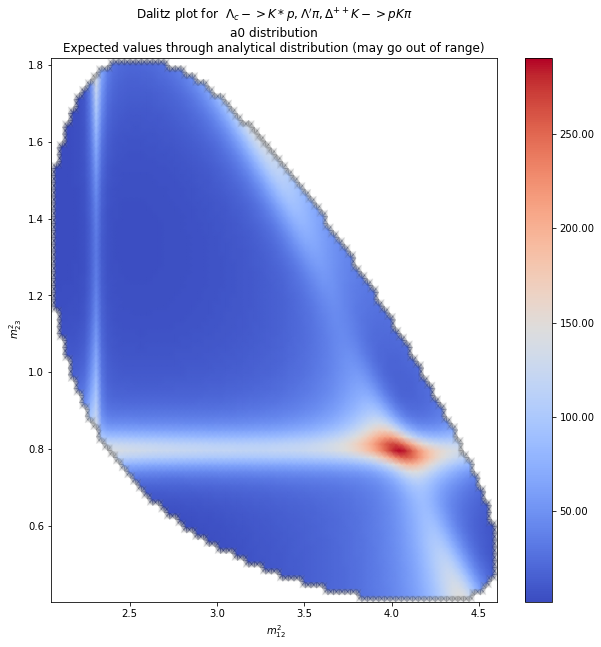

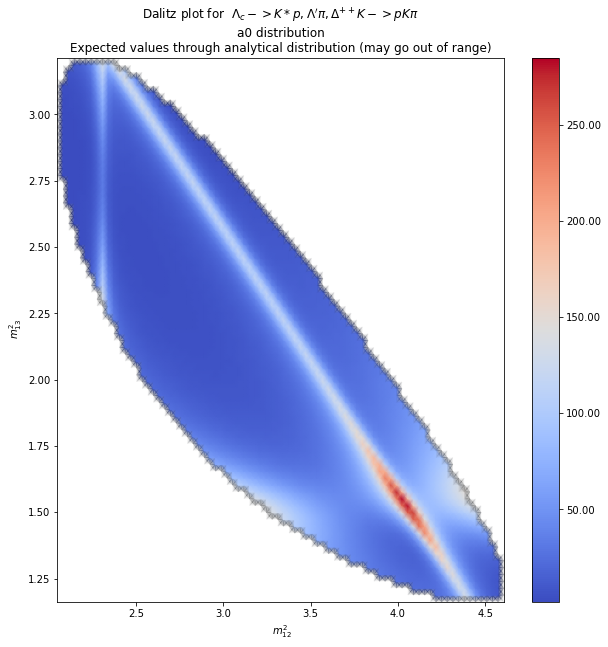

In [54]:
#Initial parameters :
#a,b,c,d,a1,a2,b1,b2 = [1,1,1.2,1.2,0.083,0.083,0.083,0.083] #Default
#a,b,c,d,a1,a2,b1,b2 = [-0.51885,0.720197,3.21027, 0.690193,-0.199773,0.0273488,0.153403,-0.359596]#Emi 1k
#a,b,c,d,a1,a2,b1,b2 = [-0.79424,2.70137, 12.9829,2.55742,-0.705464, 0.082651, 0.574873, -1.21017]#Emi 2k
#a,b,c,d,a1,a2,b1,b2 = [0.921021, 33.9734, 2.20999, 3.38624, 16.7798, 0.387535, 39.8313, 10.2264] #First try 100k
#a,b,c,d,a1,a2,b1,b2 = [-0.767655, 1.15095, 4.68177, 1.26753, -0.280015, 0.0305579,0.259608, -0.483822]#Second try 100k
#a,b,c,d,a1,a2,b1,b2 =  [-0.762658,1.14336,4.65073,1.25921,-0.278177,0.0303613,0.257899,-0.480634] #third try 100k
a,b,c,d,a1,a2,b1,b2 =  [-0.377112,1.12888,5.37062,1.13337,-0.238214,0.00294509,0.259437,-0.493586]#first try 10k
    

plotName = "Dalitz plot for  $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K-> p K \pi$"
plotName += "\na0 distribution"
plotName += "\nExpected values through analytical distribution (may go out of range)"

plotAnalyticalDalitz(M,m1,m2,m3,a0DistribParam,binResolution,binResolution,plotName)
plt.show()
plotAnalyticalDalitzM12M13ForM12M23(M,m1,m2,m3,a0DistribParam,binResolution,binResolution,plotName)
plt.show()

## a0 using 20 final form factors

In [41]:
#Physical parameters (in GeV)
mLamC=2.286 #Mass of Lambda_c
mp=0.938
mK=0.494 
mpi=0.140 
mDel=1.232 
GDel=0.117 #width of Delta++
mLam = 1.518 #Mass of Lambda' = Lambda (1520), spin 3/2-
GLam=0.0157 #width of Lambda'
mKst = 0.892 #Mass of K* = K* (892), I(J^P) =1/2(1−)
GKst = 0.051 #width of K* 

M = mLamC
m1 = mp
m2 = mK
m3 = mpi
s = M*M

binResolution = 80

In [42]:
def BW2(sR,mR,gammaR):
    """
        Generic squared Breit-Wigner factor for a resonance in R on variable sR
    """
    return 1/((sR-mR*mR)**2 + mR*mR*gammaR*gammaR)



def ReBWTwoResonances(sR1,mR1,gammaR1,sR2,mR2,gammaR2):
    """
        For factor type ReAC,ReBD,... with two different resonances
        If two parameters come from the same resonance, BW2 is equivalent
        /!\ Formula suppose parameters are real /!\ 
    """
    return ((sR1 - mR1*mR1)*(sR2 - mR2*mR2) + mR1*mR2*gammaR1*gammaR2)*BW2( sR1, mR1, gammaR1)*BW2( sR2, mR2, gammaR2);



20 param fit
A2        = 0.933412     +/-  0.590964
B2        = 0.434954     +/-  0.0538418
C2        = 15.4867      +/-  3.49629
D2        = 0.294159     +/-  0.150956
A12       = -0.418216    +/-  0.0690142
A22       = 0.0652099    +/-  0.0101138
B12       = 0.0713721    +/-  0.00605586
B22       = -0.303079    +/-  0.105121
ReA1A2    = 0.0495278    +/-  0.00449477
ReB1B2    = 0.083722     +/-  0.0302653
ReAD      = -3.35499     +/-  0.462021
ReBC      = -0.360355    +/-  0.29646
ReA1C     = -0.906412    +/-  0.54992
ReA2C     = 1.04299      +/-  0.434015
ReB1D     = 0.0480193    +/-  0.0467684
ReB2D     = -0.451826    +/-  0.11817
ReA1B     = -0.123029    +/-  0.022331
ReA2B     = 0.143617     +/-  0.0156009
ReB1A     = -0.134177    +/-  0.0227368
ReB2A     = -1.25249     +/-  0.181267

In [43]:
def a0DistribParam(s12,s23):
    #Returns value of a0 in terms of s12,s23
    #Use 20 parameters fit
    
    s13 = s + mp*mp + mK*mK + mpi*mpi - s23 - s12
    eprot = (s-s23 + mp*mp) / (2*np.sqrt(s))
    epi = (s-s12 + mpi*mpi) / (2*np.sqrt(s))
    ppp = np.sqrt(eprot*eprot-m1*m1) #|\vec{p_1}|
    kkk = np.sqrt(epi*epi-m3*m3) #|\vec{p_3}|
    psi = np.arccos((epi*eprot + (mp*mp + mpi*mpi - s13)/2)/(ppp*kkk))
    

    eK = (s-s13 + mK*mK) / (2*np.sqrt(s))
    
    eDel = eprot + epi
    eLam = eprot + eK
    eKst = epi + eK
    
    #Fitted values :
    A2,B2,C2,D2,A12,A22,B12,B22,ReA1A2,ReB1B2,ReAD,ReBC,ReA1C,ReA2C,ReB1D,ReB2D,ReA1B,ReA2B,ReB1A,ReB2A = [0.933412,0.434954, 15.4867, 0.294159,-0.418216,0.0652099,0.0713721,-0.303079, 0.0495278, 0.083722, -3.35499, -0.360355, -0.906412, 1.04299, 0.0480193,  -0.451826, -0.123029, 0.143617, -0.134177,  -1.25249]
    
    
    #Del2
    BWFactorDelta = BW2(s13,mDel,GDel)
    A2 *= BWFactorDelta
    B2 *= BWFactorDelta
    
    #Lam2
    BWFactorLambda = BW2(s12,mLam,GLam)
    C2 *= BWFactorLambda
    D2 *= BWFactorLambda
    
    #KSt2
    BWFactorKStar = BW2(s23,mKst,GKst)
    A12 *= BWFactorKStar
    B12 *= BWFactorKStar
    A22 *= BWFactorKStar
    B22 *= BWFactorKStar
    ReA1A2 *= BWFactorKStar
    ReB1B2 *= BWFactorKStar
    #pp = kkk 
    
    #InterfBW
    ReBWLamDel = ReBWTwoResonances(s23,mKst,GKst,s13,mDel,GDel)
    ReBWLamKst = ReBWTwoResonances(s23,mKst,GKst,s12,mLam,GLam)
    ReBWDelKst = ReBWTwoResonances(s23,mKst,GKst,s13,mDel,GDel)
    
    #LamDel:
    ReAD *= ReBWLamDel
    ReBC *= ReBWLamDel
    #LamKst:
    ReA1C *= ReBWLamKst
    ReA2C *= ReBWLamKst
    ReB1D *= ReBWLamKst
    ReB2D *= ReBWLamKst
    #DelKst:
    ReA1B *= ReBWDelKst
    ReA2B *= ReBWDelKst
    ReB1A *= ReBWDelKst
    ReB2A *= ReBWDelKst

    #No interf
    del2 = (50*A2*epi**2*eprot**3*mLamC**3)/9 + (50*B2*epi**2*eprot**3*mLamC**3)/9 + (100*A2*epi*eprot**4*mLamC**3)/9 + (100*B2*epi*eprot**4*mLamC**3)/9 + (50*A2*eprot**5*mLamC**3)/9 + (50*B2*eprot**5*mLamC**3)/9 - (4*A2*epi*eprot**3*mDel*mLamC**3)/3 + (4*B2*epi*eprot**3*mDel*mLamC**3)/3 - (4*A2*eprot**4*mDel*mLamC**3)/3 + (4*B2*eprot**4*mDel*mLamC**3)/3 + 2*A2*eprot**3*mDel**2*mLamC**3 + 2*B2*eprot**3*mDel**2*mLamC**3 + (14*A2*epi**2*eprot**2*mLamC**3*mp)/9 - (14*B2*epi**2*eprot**2*mLamC**3*mp)/9 + (28*A2*epi*eprot**3*mLamC**3*mp)/9 - (28*B2*epi*eprot**3*mLamC**3*mp)/9 + (14*A2*eprot**4*mLamC**3*mp)/9 - (14*B2*eprot**4*mLamC**3*mp)/9 + (4*A2*epi*eprot**2*mDel*mLamC**3*mp)/3 + (4*B2*epi*eprot**2*mDel*mLamC**3*mp)/3 + (4*A2*eprot**3*mDel*mLamC**3*mp)/3 + (4*B2*eprot**3*mDel*mLamC**3*mp)/3 - (2*A2*eprot**2*mDel**2*mLamC**3*mp)/3 + (2*B2*eprot**2*mDel**2*mLamC**3*mp)/3 - 2*A2*epi**2*eprot*mLamC**3*mp**2 - 2*B2*epi**2*eprot*mLamC**3*mp**2 - 4*A2*epi*eprot**2*mLamC**3*mp**2 - 4*B2*epi*eprot**2*mLamC**3*mp**2 - 2*A2*eprot**3*mLamC**3*mp**2 - 2*B2*eprot**3*mLamC**3*mp**2 - (4*A2*epi*eprot*mDel*mLamC**3*mp**2)/9 + (4*B2*epi*eprot*mDel*mLamC**3*mp**2)/9 - (4*A2*eprot**2*mDel*mLamC**3*mp**2)/9 + (4*B2*eprot**2*mDel*mLamC**3*mp**2)/9 - (10*A2*eprot*mDel**2*mLamC**3*mp**2)/9 - (10*B2*eprot*mDel**2*mLamC**3*mp**2)/9 + (2*A2*epi**2*mLamC**3*mp**3)/9 - (2*B2*epi**2*mLamC**3*mp**3)/9 + (4*A2*epi*eprot*mLamC**3*mp**3)/9 - (4*B2*epi*eprot*mLamC**3*mp**3)/9 + (2*A2*eprot**2*mLamC**3*mp**3)/9 - (2*B2*eprot**2*mLamC**3*mp**3)/9 + (4*A2*epi*mDel*mLamC**3*mp**3)/9 + (4*B2*epi*mDel*mLamC**3*mp**3)/9 + (4*A2*eprot*mDel*mLamC**3*mp**3)/9 + (4*B2*eprot*mDel*mLamC**3*mp**3)/9 - (2*A2*mDel**2*mLamC**3*mp**3)/9 + (2*B2*mDel**2*mLamC**3*mp**3)/9 - (40*A2*epi*eprot**2*mLamC**3*ppp**2)/9 - (40*B2*epi*eprot**2*mLamC**3*ppp**2)/9 - (40*A2*eprot**3*mLamC**3*ppp**2)/9 - (40*B2*eprot**3*mLamC**3*ppp**2)/9 + (4*A2*eprot**2*mDel*mLamC**3*ppp**2)/3 - (4*B2*eprot**2*mDel*mLamC**3*ppp**2)/3 - (16*A2*epi*eprot*mLamC**3*mp*ppp**2)/9 + (16*B2*epi*eprot*mLamC**3*mp*ppp**2)/9 - (16*A2*eprot**2*mLamC**3*mp*ppp**2)/9 + (16*B2*eprot**2*mLamC**3*mp*ppp**2)/9 + (8*A2*epi*mLamC**3*mp**2*ppp**2)/9 + (8*B2*epi*mLamC**3*mp**2*ppp**2)/9 + (8*A2*eprot*mLamC**3*mp**2*ppp**2)/9 + (8*B2*eprot*mLamC**3*mp**2*ppp**2)/9 + (4*A2*mDel*mLamC**3*mp**2*ppp**2)/9 - (4*B2*mDel*mLamC**3*mp**2*ppp**2)/9 - (10*A2*eprot*mLamC**3*ppp**4)/9 - (10*B2*eprot*mLamC**3*ppp**4)/9 + (2*A2*mLamC**3*mp*ppp**4)/9 - (2*B2*mLamC**3*mp*ppp**4)/9 + (16*A2*epi**6*eprot**3*mLamC**3)/(9*s13**2) + (16*B2*epi**6*eprot**3*mLamC**3)/(9*s13**2) + (32*A2*epi**5*eprot**4*mLamC**3)/(3*s13**2) + (32*B2*epi**5*eprot**4*mLamC**3)/(3*s13**2) + (80*A2*epi**4*eprot**5*mLamC**3)/(3*s13**2) + (80*B2*epi**4*eprot**5*mLamC**3)/(3*s13**2) + (320*A2*epi**3*eprot**6*mLamC**3)/(9*s13**2) + (320*B2*epi**3*eprot**6*mLamC**3)/(9*s13**2) + (80*A2*epi**2*eprot**7*mLamC**3)/(3*s13**2) + (80*B2*epi**2*eprot**7*mLamC**3)/(3*s13**2) + (32*A2*epi*eprot**8*mLamC**3)/(3*s13**2) + (32*B2*epi*eprot**8*mLamC**3)/(3*s13**2) + (16*A2*eprot**9*mLamC**3)/(9*s13**2) + (16*B2*eprot**9*mLamC**3)/(9*s13**2) - (16*A2*epi**5*eprot**3*mDel*mLamC**3)/(9*s13**2) + (16*B2*epi**5*eprot**3*mDel*mLamC**3)/(9*s13**2) - (80*A2*epi**4*eprot**4*mDel*mLamC**3)/(9*s13**2) + (80*B2*epi**4*eprot**4*mDel*mLamC**3)/(9*s13**2) - (160*A2*epi**3*eprot**5*mDel*mLamC**3)/(9*s13**2) + (160*B2*epi**3*eprot**5*mDel*mLamC**3)/(9*s13**2) - (160*A2*epi**2*eprot**6*mDel*mLamC**3)/(9*s13**2) + (160*B2*epi**2*eprot**6*mDel*mLamC**3)/(9*s13**2) - (80*A2*epi*eprot**7*mDel*mLamC**3)/(9*s13**2) + (80*B2*epi*eprot**7*mDel*mLamC**3)/(9*s13**2) - (16*A2*eprot**8*mDel*mLamC**3)/(9*s13**2) + (16*B2*eprot**8*mDel*mLamC**3)/(9*s13**2) + (20*A2*epi**4*eprot**3*mDel**2*mLamC**3)/(9*s13**2) + (20*B2*epi**4*eprot**3*mDel**2*mLamC**3)/(9*s13**2) + (80*A2*epi**3*eprot**4*mDel**2*mLamC**3)/(9*s13**2) + (80*B2*epi**3*eprot**4*mDel**2*mLamC**3)/(9*s13**2) + (40*A2*epi**2*eprot**5*mDel**2*mLamC**3)/(3*s13**2) + (40*B2*epi**2*eprot**5*mDel**2*mLamC**3)/(3*s13**2) + (80*A2*epi*eprot**6*mDel**2*mLamC**3)/(9*s13**2) + (80*B2*epi*eprot**6*mDel**2*mLamC**3)/(9*s13**2) + (20*A2*eprot**7*mDel**2*mLamC**3)/(9*s13**2) + (20*B2*eprot**7*mDel**2*mLamC**3)/(9*s13**2) + (16*A2*epi**5*eprot**2*mDel*mLamC**3*mp)/(9*s13**2) + (16*B2*epi**5*eprot**2*mDel*mLamC**3*mp)/(9*s13**2) + (80*A2*epi**4*eprot**3*mDel*mLamC**3*mp)/(9*s13**2) + (80*B2*epi**4*eprot**3*mDel*mLamC**3*mp)/(9*s13**2) + (160*A2*epi**3*eprot**4*mDel*mLamC**3*mp)/(9*s13**2) + (160*B2*epi**3*eprot**4*mDel*mLamC**3*mp)/(9*s13**2) + (160*A2*epi**2*eprot**5*mDel*mLamC**3*mp)/(9*s13**2) + (160*B2*epi**2*eprot**5*mDel*mLamC**3*mp)/(9*s13**2) + (80*A2*epi*eprot**6*mDel*mLamC**3*mp)/(9*s13**2) + (80*B2*epi*eprot**6*mDel*mLamC**3*mp)/(9*s13**2) + (16*A2*eprot**7*mDel*mLamC**3*mp)/(9*s13**2) + (16*B2*eprot**7*mDel*mLamC**3*mp)/(9*s13**2) - (8*A2*epi**4*eprot**2*mDel**2*mLamC**3*mp)/(9*s13**2) + (8*B2*epi**4*eprot**2*mDel**2*mLamC**3*mp)/(9*s13**2) - (32*A2*epi**3*eprot**3*mDel**2*mLamC**3*mp)/(9*s13**2) + (32*B2*epi**3*eprot**3*mDel**2*mLamC**3*mp)/(9*s13**2) - (16*A2*epi**2*eprot**4*mDel**2*mLamC**3*mp)/(3*s13**2) + (16*B2*epi**2*eprot**4*mDel**2*mLamC**3*mp)/(3*s13**2) - (32*A2*epi*eprot**5*mDel**2*mLamC**3*mp)/(9*s13**2) + (32*B2*epi*eprot**5*mDel**2*mLamC**3*mp)/(9*s13**2) - (8*A2*eprot**6*mDel**2*mLamC**3*mp)/(9*s13**2) + (8*B2*eprot**6*mDel**2*mLamC**3*mp)/(9*s13**2) - (4*A2*epi**4*eprot*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (4*B2*epi**4*eprot*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (16*A2*epi**3*eprot**2*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (16*B2*epi**3*eprot**2*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (8*A2*epi**2*eprot**3*mDel**2*mLamC**3*mp**2)/s13**2 - (8*B2*epi**2*eprot**3*mDel**2*mLamC**3*mp**2)/s13**2 - (16*A2*epi*eprot**4*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (16*B2*epi*eprot**4*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (4*A2*eprot**5*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (4*B2*eprot**5*mDel**2*mLamC**3*mp**2)/(3*s13**2) - (16*A2*epi**5*eprot**2*mLamC**3*ppp**2)/(3*s13**2) - (16*B2*epi**5*eprot**2*mLamC**3*ppp**2)/(3*s13**2) - (80*A2*epi**4*eprot**3*mLamC**3*ppp**2)/(3*s13**2) - (80*B2*epi**4*eprot**3*mLamC**3*ppp**2)/(3*s13**2) - (160*A2*epi**3*eprot**4*mLamC**3*ppp**2)/(3*s13**2) - (160*B2*epi**3*eprot**4*mLamC**3*ppp**2)/(3*s13**2) - (160*A2*epi**2*eprot**5*mLamC**3*ppp**2)/(3*s13**2) - (160*B2*epi**2*eprot**5*mLamC**3*ppp**2)/(3*s13**2) - (80*A2*epi*eprot**6*mLamC**3*ppp**2)/(3*s13**2) - (80*B2*epi*eprot**6*mLamC**3*ppp**2)/(3*s13**2) - (16*A2*eprot**7*mLamC**3*ppp**2)/(3*s13**2) - (16*B2*eprot**7*mLamC**3*ppp**2)/(3*s13**2) + (16*A2*epi**4*eprot**2*mDel*mLamC**3*ppp**2)/(3*s13**2) - (16*B2*epi**4*eprot**2*mDel*mLamC**3*ppp**2)/(3*s13**2) + (64*A2*epi**3*eprot**3*mDel*mLamC**3*ppp**2)/(3*s13**2) - (64*B2*epi**3*eprot**3*mDel*mLamC**3*ppp**2)/(3*s13**2) + (32*A2*epi**2*eprot**4*mDel*mLamC**3*ppp**2)/s13**2 - (32*B2*epi**2*eprot**4*mDel*mLamC**3*ppp**2)/s13**2 + (64*A2*epi*eprot**5*mDel*mLamC**3*ppp**2)/(3*s13**2) - (64*B2*epi*eprot**5*mDel*mLamC**3*ppp**2)/(3*s13**2) + (16*A2*eprot**6*mDel*mLamC**3*ppp**2)/(3*s13**2) - (16*B2*eprot**6*mDel*mLamC**3*ppp**2)/(3*s13**2) - (28*A2*epi**3*eprot**2*mDel**2*mLamC**3*ppp**2)/(9*s13**2) - (28*B2*epi**3*eprot**2*mDel**2*mLamC**3*ppp**2)/(9*s13**2) - (28*A2*epi**2*eprot**3*mDel**2*mLamC**3*ppp**2)/(3*s13**2) - (28*B2*epi**2*eprot**3*mDel**2*mLamC**3*ppp**2)/(3*s13**2) - (28*A2*epi*eprot**4*mDel**2*mLamC**3*ppp**2)/(3*s13**2) - (28*B2*epi*eprot**4*mDel**2*mLamC**3*ppp**2)/(3*s13**2) - (28*A2*eprot**5*mDel**2*mLamC**3*ppp**2)/(9*s13**2) - (28*B2*eprot**5*mDel**2*mLamC**3*ppp**2)/(9*s13**2) - (32*A2*epi**4*eprot*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (32*B2*epi**4*eprot*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (128*A2*epi**3*eprot**2*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (128*B2*epi**3*eprot**2*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (64*A2*epi**2*eprot**3*mDel*mLamC**3*mp*ppp**2)/(3*s13**2) - (64*B2*epi**2*eprot**3*mDel*mLamC**3*mp*ppp**2)/(3*s13**2) - (128*A2*epi*eprot**4*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (128*B2*epi*eprot**4*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (32*A2*eprot**5*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) - (32*B2*eprot**5*mDel*mLamC**3*mp*ppp**2)/(9*s13**2) + (16*A2*epi**3*eprot*mDel**2*mLamC**3*mp*ppp**2)/(9*s13**2) - (16*B2*epi**3*eprot*mDel**2*mLamC**3*mp*ppp**2)/(9*s13**2) + (16*A2*epi**2*eprot**2*mDel**2*mLamC**3*mp*ppp**2)/(3*s13**2) - (16*B2*epi**2*eprot**2*mDel**2*mLamC**3*mp*ppp**2)/(3*s13**2) + (16*A2*epi*eprot**3*mDel**2*mLamC**3*mp*ppp**2)/(3*s13**2) - (16*B2*epi*eprot**3*mDel**2*mLamC**3*mp*ppp**2)/(3*s13**2) + (16*A2*eprot**4*mDel**2*mLamC**3*mp*ppp**2)/(9*s13**2) - (16*B2*eprot**4*mDel**2*mLamC**3*mp*ppp**2)/(9*s13**2) + (4*A2*epi**3*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13**2) + (4*B2*epi**3*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13**2) + (4*A2*epi**2*eprot*mDel**2*mLamC**3*mp**2*ppp**2)/s13**2 + (4*B2*epi**2*eprot*mDel**2*mLamC**3*mp**2*ppp**2)/s13**2 + (4*A2*epi*eprot**2*mDel**2*mLamC**3*mp**2*ppp**2)/s13**2 + (4*B2*epi*eprot**2*mDel**2*mLamC**3*mp**2*ppp**2)/s13**2 + (4*A2*eprot**3*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13**2) + (4*B2*eprot**3*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13**2) + (16*A2*epi**4*eprot*mLamC**3*ppp**4)/(3*s13**2) + (16*B2*epi**4*eprot*mLamC**3*ppp**4)/(3*s13**2) + (64*A2*epi**3*eprot**2*mLamC**3*ppp**4)/(3*s13**2) + (64*B2*epi**3*eprot**2*mLamC**3*ppp**4)/(3*s13**2) + (32*A2*epi**2*eprot**3*mLamC**3*ppp**4)/s13**2 + (32*B2*epi**2*eprot**3*mLamC**3*ppp**4)/s13**2 + (64*A2*epi*eprot**4*mLamC**3*ppp**4)/(3*s13**2) + (64*B2*epi*eprot**4*mLamC**3*ppp**4)/(3*s13**2) + (16*A2*eprot**5*mLamC**3*ppp**4)/(3*s13**2) + (16*B2*eprot**5*mLamC**3*ppp**4)/(3*s13**2) - (16*A2*epi**3*eprot*mDel*mLamC**3*ppp**4)/(3*s13**2) + (16*B2*epi**3*eprot*mDel*mLamC**3*ppp**4)/(3*s13**2) - (16*A2*epi**2*eprot**2*mDel*mLamC**3*ppp**4)/s13**2 + (16*B2*epi**2*eprot**2*mDel*mLamC**3*ppp**4)/s13**2 - (16*A2*epi*eprot**3*mDel*mLamC**3*ppp**4)/s13**2 + (16*B2*epi*eprot**3*mDel*mLamC**3*ppp**4)/s13**2 - (16*A2*eprot**4*mDel*mLamC**3*ppp**4)/(3*s13**2) + (16*B2*eprot**4*mDel*mLamC**3*ppp**4)/(3*s13**2) - (4*A2*epi**2*eprot*mDel**2*mLamC**3*ppp**4)/(9*s13**2) - (4*B2*epi**2*eprot*mDel**2*mLamC**3*ppp**4)/(9*s13**2) - (8*A2*epi*eprot**2*mDel**2*mLamC**3*ppp**4)/(9*s13**2) - (8*B2*epi*eprot**2*mDel**2*mLamC**3*ppp**4)/(9*s13**2) - (4*A2*eprot**3*mDel**2*mLamC**3*ppp**4)/(9*s13**2) - (4*B2*eprot**3*mDel**2*mLamC**3*ppp**4)/(9*s13**2) + (16*A2*epi**3*mDel*mLamC**3*mp*ppp**4)/(9*s13**2) + (16*B2*epi**3*mDel*mLamC**3*mp*ppp**4)/(9*s13**2) + (16*A2*epi**2*eprot*mDel*mLamC**3*mp*ppp**4)/(3*s13**2) + (16*B2*epi**2*eprot*mDel*mLamC**3*mp*ppp**4)/(3*s13**2) + (16*A2*epi*eprot**2*mDel*mLamC**3*mp*ppp**4)/(3*s13**2) + (16*B2*epi*eprot**2*mDel*mLamC**3*mp*ppp**4)/(3*s13**2) + (16*A2*eprot**3*mDel*mLamC**3*mp*ppp**4)/(9*s13**2) + (16*B2*eprot**3*mDel*mLamC**3*mp*ppp**4)/(9*s13**2) - (8*A2*epi**2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) + (8*B2*epi**2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) - (16*A2*epi*eprot*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) + (16*B2*epi*eprot*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) - (8*A2*eprot**2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) + (8*B2*eprot**2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13**2) - (16*A2*epi**3*mLamC**3*ppp**6)/(9*s13**2) - (16*B2*epi**3*mLamC**3*ppp**6)/(9*s13**2) - (16*A2*epi**2*eprot*mLamC**3*ppp**6)/(3*s13**2) - (16*B2*epi**2*eprot*mLamC**3*ppp**6)/(3*s13**2) - (16*A2*epi*eprot**2*mLamC**3*ppp**6)/(3*s13**2) - (16*B2*epi*eprot**2*mLamC**3*ppp**6)/(3*s13**2) - (16*A2*eprot**3*mLamC**3*ppp**6)/(9*s13**2) - (16*B2*eprot**3*mLamC**3*ppp**6)/(9*s13**2) + (16*A2*epi**2*mDel*mLamC**3*ppp**6)/(9*s13**2) - (16*B2*epi**2*mDel*mLamC**3*ppp**6)/(9*s13**2) + (32*A2*epi*eprot*mDel*mLamC**3*ppp**6)/(9*s13**2) - (32*B2*epi*eprot*mDel*mLamC**3*ppp**6)/(9*s13**2) + (16*A2*eprot**2*mDel*mLamC**3*ppp**6)/(9*s13**2) - (16*B2*eprot**2*mDel*mLamC**3*ppp**6)/(9*s13**2) + (4*A2*epi*mDel**2*mLamC**3*ppp**6)/(3*s13**2) + (4*B2*epi*mDel**2*mLamC**3*ppp**6)/(3*s13**2) + (4*A2*eprot*mDel**2*mLamC**3*ppp**6)/(3*s13**2) + (4*B2*eprot*mDel**2*mLamC**3*ppp**6)/(3*s13**2) - (16*A2*epi**4*eprot**3*mLamC**3)/(3*s13) - (16*B2*epi**4*eprot**3*mLamC**3)/(3*s13) - (64*A2*epi**3*eprot**4*mLamC**3)/(3*s13) - (64*B2*epi**3*eprot**4*mLamC**3)/(3*s13) - (32*A2*epi**2*eprot**5*mLamC**3)/s13 - (32*B2*epi**2*eprot**5*mLamC**3)/s13 - (64*A2*epi*eprot**6*mLamC**3)/(3*s13) - (64*B2*epi*eprot**6*mLamC**3)/(3*s13) - (16*A2*eprot**7*mLamC**3)/(3*s13) - (16*B2*eprot**7*mLamC**3)/(3*s13) + (28*A2*epi**3*eprot**3*mDel*mLamC**3)/(9*s13) - (28*B2*epi**3*eprot**3*mDel*mLamC**3)/(9*s13) + (28*A2*epi**2*eprot**4*mDel*mLamC**3)/(3*s13) - (28*B2*epi**2*eprot**4*mDel*mLamC**3)/(3*s13) + (28*A2*epi*eprot**5*mDel*mLamC**3)/(3*s13) - (28*B2*epi*eprot**5*mDel*mLamC**3)/(3*s13) + (28*A2*eprot**6*mDel*mLamC**3)/(9*s13) - (28*B2*eprot**6*mDel*mLamC**3)/(9*s13) - (38*A2*epi**2*eprot**3*mDel**2*mLamC**3)/(9*s13) - (38*B2*epi**2*eprot**3*mDel**2*mLamC**3)/(9*s13) - (76*A2*epi*eprot**4*mDel**2*mLamC**3)/(9*s13) - (76*B2*epi*eprot**4*mDel**2*mLamC**3)/(9*s13) - (38*A2*eprot**5*mDel**2*mLamC**3)/(9*s13) - (38*B2*eprot**5*mDel**2*mLamC**3)/(9*s13) - (8*A2*epi**4*eprot**2*mLamC**3*mp)/(9*s13) + (8*B2*epi**4*eprot**2*mLamC**3*mp)/(9*s13) - (32*A2*epi**3*eprot**3*mLamC**3*mp)/(9*s13) + (32*B2*epi**3*eprot**3*mLamC**3*mp)/(9*s13) - (16*A2*epi**2*eprot**4*mLamC**3*mp)/(3*s13) + (16*B2*epi**2*eprot**4*mLamC**3*mp)/(3*s13) - (32*A2*epi*eprot**5*mLamC**3*mp)/(9*s13) + (32*B2*epi*eprot**5*mLamC**3*mp)/(9*s13) - (8*A2*eprot**6*mLamC**3*mp)/(9*s13) + (8*B2*eprot**6*mLamC**3*mp)/(9*s13) - (28*A2*epi**3*eprot**2*mDel*mLamC**3*mp)/(9*s13) - (28*B2*epi**3*eprot**2*mDel*mLamC**3*mp)/(9*s13) - (28*A2*epi**2*eprot**3*mDel*mLamC**3*mp)/(3*s13) - (28*B2*epi**2*eprot**3*mDel*mLamC**3*mp)/(3*s13) - (28*A2*epi*eprot**4*mDel*mLamC**3*mp)/(3*s13) - (28*B2*epi*eprot**4*mDel*mLamC**3*mp)/(3*s13) - (28*A2*eprot**5*mDel*mLamC**3*mp)/(9*s13) - (28*B2*eprot**5*mDel*mLamC**3*mp)/(9*s13) + (14*A2*epi**2*eprot**2*mDel**2*mLamC**3*mp)/(9*s13) - (14*B2*epi**2*eprot**2*mDel**2*mLamC**3*mp)/(9*s13) + (28*A2*epi*eprot**3*mDel**2*mLamC**3*mp)/(9*s13) - (28*B2*epi*eprot**3*mDel**2*mLamC**3*mp)/(9*s13) + (14*A2*eprot**4*mDel**2*mLamC**3*mp)/(9*s13) - (14*B2*eprot**4*mDel**2*mLamC**3*mp)/(9*s13) + (8*A2*epi**4*eprot*mLamC**3*mp**2)/(9*s13) + (8*B2*epi**4*eprot*mLamC**3*mp**2)/(9*s13) + (32*A2*epi**3*eprot**2*mLamC**3*mp**2)/(9*s13) + (32*B2*epi**3*eprot**2*mLamC**3*mp**2)/(9*s13) + (16*A2*epi**2*eprot**3*mLamC**3*mp**2)/(3*s13) + (16*B2*epi**2*eprot**3*mLamC**3*mp**2)/(3*s13) + (32*A2*epi*eprot**4*mLamC**3*mp**2)/(9*s13) + (32*B2*epi*eprot**4*mLamC**3*mp**2)/(9*s13) + (8*A2*eprot**5*mLamC**3*mp**2)/(9*s13) + (8*B2*eprot**5*mLamC**3*mp**2)/(9*s13) + (4*A2*epi**3*eprot*mDel*mLamC**3*mp**2)/(9*s13) - (4*B2*epi**3*eprot*mDel*mLamC**3*mp**2)/(9*s13) + (4*A2*epi**2*eprot**2*mDel*mLamC**3*mp**2)/(3*s13) - (4*B2*epi**2*eprot**2*mDel*mLamC**3*mp**2)/(3*s13) + (4*A2*epi*eprot**3*mDel*mLamC**3*mp**2)/(3*s13) - (4*B2*epi*eprot**3*mDel*mLamC**3*mp**2)/(3*s13) + (4*A2*eprot**4*mDel*mLamC**3*mp**2)/(9*s13) - (4*B2*eprot**4*mDel*mLamC**3*mp**2)/(9*s13) + (22*A2*epi**2*eprot*mDel**2*mLamC**3*mp**2)/(9*s13) + (22*B2*epi**2*eprot*mDel**2*mLamC**3*mp**2)/(9*s13) + (44*A2*epi*eprot**2*mDel**2*mLamC**3*mp**2)/(9*s13) + (44*B2*epi*eprot**2*mDel**2*mLamC**3*mp**2)/(9*s13) + (22*A2*eprot**3*mDel**2*mLamC**3*mp**2)/(9*s13) + (22*B2*eprot**3*mDel**2*mLamC**3*mp**2)/(9*s13) - (4*A2*epi**3*mDel*mLamC**3*mp**3)/(9*s13) - (4*B2*epi**3*mDel*mLamC**3*mp**3)/(9*s13) - (4*A2*epi**2*eprot*mDel*mLamC**3*mp**3)/(3*s13) - (4*B2*epi**2*eprot*mDel*mLamC**3*mp**3)/(3*s13) - (4*A2*epi*eprot**2*mDel*mLamC**3*mp**3)/(3*s13) - (4*B2*epi*eprot**2*mDel*mLamC**3*mp**3)/(3*s13) - (4*A2*eprot**3*mDel*mLamC**3*mp**3)/(9*s13) - (4*B2*eprot**3*mDel*mLamC**3*mp**3)/(9*s13) + (2*A2*epi**2*mDel**2*mLamC**3*mp**3)/(9*s13) - (2*B2*epi**2*mDel**2*mLamC**3*mp**3)/(9*s13) + (4*A2*epi*eprot*mDel**2*mLamC**3*mp**3)/(9*s13) - (4*B2*epi*eprot*mDel**2*mLamC**3*mp**3)/(9*s13) + (2*A2*eprot**2*mDel**2*mLamC**3*mp**3)/(9*s13) - (2*B2*eprot**2*mDel**2*mLamC**3*mp**3)/(9*s13) + (88*A2*epi**3*eprot**2*mLamC**3*ppp**2)/(9*s13) + (88*B2*epi**3*eprot**2*mLamC**3*ppp**2)/(9*s13) + (88*A2*epi**2*eprot**3*mLamC**3*ppp**2)/(3*s13) + (88*B2*epi**2*eprot**3*mLamC**3*ppp**2)/(3*s13) + (88*A2*epi*eprot**4*mLamC**3*ppp**2)/(3*s13) + (88*B2*epi*eprot**4*mLamC**3*ppp**2)/(3*s13) + (88*A2*eprot**5*mLamC**3*ppp**2)/(9*s13) + (88*B2*eprot**5*mLamC**3*ppp**2)/(9*s13) - (20*A2*epi**2*eprot**2*mDel*mLamC**3*ppp**2)/(3*s13) + (20*B2*epi**2*eprot**2*mDel*mLamC**3*ppp**2)/(3*s13) - (40*A2*epi*eprot**3*mDel*mLamC**3*ppp**2)/(3*s13) + (40*B2*epi*eprot**3*mDel*mLamC**3*ppp**2)/(3*s13) - (20*A2*eprot**4*mDel*mLamC**3*ppp**2)/(3*s13) + (20*B2*eprot**4*mDel*mLamC**3*ppp**2)/(3*s13) + (28*A2*epi*eprot**2*mDel**2*mLamC**3*ppp**2)/(9*s13) + (28*B2*epi*eprot**2*mDel**2*mLamC**3*ppp**2)/(9*s13) + (28*A2*eprot**3*mDel**2*mLamC**3*ppp**2)/(9*s13) + (28*B2*eprot**3*mDel**2*mLamC**3*ppp**2)/(9*s13) + (16*A2*epi**3*eprot*mLamC**3*mp*ppp**2)/(9*s13) - (16*B2*epi**3*eprot*mLamC**3*mp*ppp**2)/(9*s13) + (16*A2*epi**2*eprot**2*mLamC**3*mp*ppp**2)/(3*s13) - (16*B2*epi**2*eprot**2*mLamC**3*mp*ppp**2)/(3*s13) + (16*A2*epi*eprot**3*mLamC**3*mp*ppp**2)/(3*s13) - (16*B2*epi*eprot**3*mLamC**3*mp*ppp**2)/(3*s13) + (16*A2*eprot**4*mLamC**3*mp*ppp**2)/(9*s13) - (16*B2*eprot**4*mLamC**3*mp*ppp**2)/(9*s13) + (32*A2*epi**2*eprot*mDel*mLamC**3*mp*ppp**2)/(9*s13) + (32*B2*epi**2*eprot*mDel*mLamC**3*mp*ppp**2)/(9*s13) + (64*A2*epi*eprot**2*mDel*mLamC**3*mp*ppp**2)/(9*s13) + (64*B2*epi*eprot**2*mDel*mLamC**3*mp*ppp**2)/(9*s13) + (32*A2*eprot**3*mDel*mLamC**3*mp*ppp**2)/(9*s13) + (32*B2*eprot**3*mDel*mLamC**3*mp*ppp**2)/(9*s13) - (16*A2*epi*eprot*mDel**2*mLamC**3*mp*ppp**2)/(9*s13) + (16*B2*epi*eprot*mDel**2*mLamC**3*mp*ppp**2)/(9*s13) - (16*A2*eprot**2*mDel**2*mLamC**3*mp*ppp**2)/(9*s13) + (16*B2*eprot**2*mDel**2*mLamC**3*mp*ppp**2)/(9*s13) - (8*A2*epi**3*mLamC**3*mp**2*ppp**2)/(9*s13) - (8*B2*epi**3*mLamC**3*mp**2*ppp**2)/(9*s13) - (8*A2*epi**2*eprot*mLamC**3*mp**2*ppp**2)/(3*s13) - (8*B2*epi**2*eprot*mLamC**3*mp**2*ppp**2)/(3*s13) - (8*A2*epi*eprot**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (8*B2*epi*eprot**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (8*A2*eprot**3*mLamC**3*mp**2*ppp**2)/(9*s13) - (8*B2*eprot**3*mLamC**3*mp**2*ppp**2)/(9*s13) - (4*A2*epi**2*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) + (4*B2*epi**2*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) - (8*A2*epi*eprot*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) + (8*B2*epi*eprot*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) - (4*A2*eprot**2*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) + (4*B2*eprot**2*mDel*mLamC**3*mp**2*ppp**2)/(9*s13) - (4*A2*epi*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (4*B2*epi*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (4*A2*eprot*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (4*B2*eprot*mDel**2*mLamC**3*mp**2*ppp**2)/(3*s13) - (32*A2*epi**2*eprot*mLamC**3*ppp**4)/(9*s13) - (32*B2*epi**2*eprot*mLamC**3*ppp**4)/(9*s13) - (64*A2*epi*eprot**2*mLamC**3*ppp**4)/(9*s13) - (64*B2*epi*eprot**2*mLamC**3*ppp**4)/(9*s13) - (32*A2*eprot**3*mLamC**3*ppp**4)/(9*s13) - (32*B2*eprot**3*mLamC**3*ppp**4)/(9*s13) + (4*A2*epi*eprot*mDel*mLamC**3*ppp**4)/s13 - (4*B2*epi*eprot*mDel*mLamC**3*ppp**4)/s13 + (4*A2*eprot**2*mDel*mLamC**3*ppp**4)/s13 - (4*B2*eprot**2*mDel*mLamC**3*ppp**4)/s13 + (10*A2*eprot*mDel**2*mLamC**3*ppp**4)/(9*s13) + (10*B2*eprot*mDel**2*mLamC**3*ppp**4)/(9*s13) - (8*A2*epi**2*mLamC**3*mp*ppp**4)/(9*s13) + (8*B2*epi**2*mLamC**3*mp*ppp**4)/(9*s13) - (16*A2*epi*eprot*mLamC**3*mp*ppp**4)/(9*s13) + (16*B2*epi*eprot*mLamC**3*mp*ppp**4)/(9*s13) - (8*A2*eprot**2*mLamC**3*mp*ppp**4)/(9*s13) + (8*B2*eprot**2*mLamC**3*mp*ppp**4)/(9*s13) - (4*A2*epi*mDel*mLamC**3*mp*ppp**4)/(9*s13) - (4*B2*epi*mDel*mLamC**3*mp*ppp**4)/(9*s13) - (4*A2*eprot*mDel*mLamC**3*mp*ppp**4)/(9*s13) - (4*B2*eprot*mDel*mLamC**3*mp*ppp**4)/(9*s13) + (2*A2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13) - (2*B2*mDel**2*mLamC**3*mp*ppp**4)/(9*s13) - (8*A2*epi*mLamC**3*ppp**6)/(9*s13) - (8*B2*epi*mLamC**3*ppp**6)/(9*s13) - (8*A2*eprot*mLamC**3*ppp**6)/(9*s13) - (8*B2*eprot*mLamC**3*ppp**6)/(9*s13) - (4*A2*mDel*mLamC**3*ppp**6)/(9*s13) + (4*B2*mDel*mLamC**3*ppp**6)/(9*s13) - 2*A2*eprot**3*mLamC**3*s13 - 2*B2*eprot**3*mLamC**3*s13 - (2*A2*eprot**2*mLamC**3*mp*s13)/3 + (2*B2*eprot**2*mLamC**3*mp*s13)/3 + (10*A2*eprot*mLamC**3*mp**2*s13)/9 + (10*B2*eprot*mLamC**3*mp**2*s13)/9 - (2*A2*mLamC**3*mp**3*s13)/9 + (2*B2*mLamC**3*mp**3*s13)/9 - (40*A2*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/9 - (40*B2*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/9 - (40*A2*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/9 - (40*B2*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/9 + (4*A2*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/3 - (4*B2*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/3 - (16*A2*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 + (16*B2*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 - (16*A2*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 + (16*B2*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 + (8*A2*epi*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (8*B2*epi*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (8*A2*eprot*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (8*B2*eprot*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (4*A2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/9 - (4*B2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/9 - (20*A2*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/9 - (20*B2*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/9 + (4*A2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/9 - (4*B2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/9 - (16*A2*epi**5*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (16*B2*epi**5*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (80*A2*epi**4*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (80*B2*epi**4*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (160*A2*epi**3*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (160*B2*epi**3*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (160*A2*epi**2*eprot**5*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (160*B2*epi**2*eprot**5*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (80*A2*epi*eprot**6*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (80*B2*epi*eprot**6*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (16*A2*eprot**7*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (16*B2*eprot**7*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13**2) + (16*A2*epi**4*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (16*B2*epi**4*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) + (64*A2*epi**3*eprot**3*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (64*B2*epi**3*eprot**3*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) + (32*A2*epi**2*eprot**4*kkk*mDel*mLamC**3*ppp*np.cos(psi))/s13**2 - (32*B2*epi**2*eprot**4*kkk*mDel*mLamC**3*ppp*np.cos(psi))/s13**2 + (64*A2*epi*eprot**5*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (64*B2*epi*eprot**5*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) + (16*A2*eprot**6*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (16*B2*eprot**6*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (28*A2*epi**3*eprot**2*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13**2) - (28*B2*epi**3*eprot**2*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13**2) - (28*A2*epi**2*eprot**3*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (28*B2*epi**2*eprot**3*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (28*A2*epi*eprot**4*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (28*B2*epi*eprot**4*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(3*s13**2) - (28*A2*eprot**5*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13**2) - (28*B2*eprot**5*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13**2) - (32*A2*epi**4*eprot*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (32*B2*epi**4*eprot*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (128*A2*epi**3*eprot**2*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (128*B2*epi**3*eprot**2*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (64*A2*epi**2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) - (64*B2*epi**2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) - (128*A2*epi*eprot**4*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (128*B2*epi*eprot**4*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (32*A2*eprot**5*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (32*B2*eprot**5*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) + (16*A2*epi**3*eprot*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (16*B2*epi**3*eprot*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) + (16*A2*epi**2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) - (16*B2*epi**2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) + (16*A2*epi*eprot**3*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) - (16*B2*epi*eprot**3*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(3*s13**2) + (16*A2*eprot**4*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) - (16*B2*eprot**4*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13**2) + (4*A2*epi**3*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13**2) + (4*B2*epi**3*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13**2) + (4*A2*epi**2*eprot*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/s13**2 + (4*B2*epi**2*eprot*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/s13**2 + (4*A2*epi*eprot**2*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/s13**2 + (4*B2*epi*eprot**2*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/s13**2 + (4*A2*eprot**3*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13**2) + (4*B2*eprot**3*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13**2) + (32*A2*epi**4*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*epi**4*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (128*A2*epi**3*eprot**2*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (128*B2*epi**3*eprot**2*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (64*A2*epi**2*eprot**3*kkk*mLamC**3*ppp**3*np.cos(psi))/s13**2 + (64*B2*epi**2*eprot**3*kkk*mLamC**3*ppp**3*np.cos(psi))/s13**2 + (128*A2*epi*eprot**4*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (128*B2*epi*eprot**4*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (32*A2*eprot**5*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*eprot**5*kkk*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) - (32*A2*epi**3*eprot*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*epi**3*eprot*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) - (32*A2*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13**2 + (32*B2*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13**2 - (32*A2*epi*eprot**3*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13**2 + (32*B2*epi*eprot**3*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13**2 - (32*A2*eprot**4*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*eprot**4*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/(3*s13**2) - (8*A2*epi**2*eprot*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) - (8*B2*epi**2*eprot*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) - (16*A2*epi*eprot**2*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) - (16*B2*epi*eprot**2*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) - (8*A2*eprot**3*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) - (8*B2*eprot**3*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13**2) + (32*A2*epi**3*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (32*B2*epi**3*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (32*A2*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(3*s13**2) + (32*A2*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(3*s13**2) + (32*B2*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(3*s13**2) + (32*A2*eprot**3*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (32*B2*eprot**3*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) - (16*A2*epi**2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (16*B2*epi**2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) - (32*A2*epi*eprot*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (32*B2*epi*eprot*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) - (16*A2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) + (16*B2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13**2) - (16*A2*epi**3*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (16*B2*epi**3*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (16*A2*epi**2*eprot*kkk*mLamC**3*ppp**5*np.cos(psi))/s13**2 - (16*B2*epi**2*eprot*kkk*mLamC**3*ppp**5*np.cos(psi))/s13**2 - (16*A2*epi*eprot**2*kkk*mLamC**3*ppp**5*np.cos(psi))/s13**2 - (16*B2*epi*eprot**2*kkk*mLamC**3*ppp**5*np.cos(psi))/s13**2 - (16*A2*eprot**3*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (16*B2*eprot**3*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) + (16*A2*epi**2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (16*B2*epi**2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) + (32*A2*epi*eprot*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (32*B2*epi*eprot*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) + (16*A2*eprot**2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) - (16*B2*eprot**2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13**2) + (4*A2*epi*kkk*mDel**2*mLamC**3*ppp**5*np.cos(psi))/s13**2 + (4*B2*epi*kkk*mDel**2*mLamC**3*ppp**5*np.cos(psi))/s13**2 + (4*A2*eprot*kkk*mDel**2*mLamC**3*ppp**5*np.cos(psi))/s13**2 + (4*B2*eprot*kkk*mDel**2*mLamC**3*ppp**5*np.cos(psi))/s13**2 + (88*A2*epi**3*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(9*s13) + (88*B2*epi**3*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(9*s13) + (88*A2*epi**2*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13) + (88*B2*epi**2*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13) + (88*A2*epi*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13) + (88*B2*epi*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/(3*s13) + (88*A2*eprot**5*kkk*mLamC**3*ppp*np.cos(psi))/(9*s13) + (88*B2*eprot**5*kkk*mLamC**3*ppp*np.cos(psi))/(9*s13) - (20*A2*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) + (20*B2*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) - (40*A2*epi*eprot**3*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) + (40*B2*epi*eprot**3*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) - (20*A2*eprot**4*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) + (20*B2*eprot**4*kkk*mDel*mLamC**3*ppp*np.cos(psi))/(3*s13) + (28*A2*epi*eprot**2*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13) + (28*B2*epi*eprot**2*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13) + (28*A2*eprot**3*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13) + (28*B2*eprot**3*kkk*mDel**2*mLamC**3*ppp*np.cos(psi))/(9*s13) + (16*A2*epi**3*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) - (16*B2*epi**3*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (16*A2*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/(3*s13) - (16*B2*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/(3*s13) + (16*A2*epi*eprot**3*kkk*mLamC**3*mp*ppp*np.cos(psi))/(3*s13) - (16*B2*epi*eprot**3*kkk*mLamC**3*mp*ppp*np.cos(psi))/(3*s13) + (16*A2*eprot**4*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) - (16*B2*eprot**4*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (32*A2*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (32*B2*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (64*A2*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (64*B2*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (32*A2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (32*B2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) - (16*A2*epi*eprot*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (16*B2*epi*eprot*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) - (16*A2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) + (16*B2*eprot**2*kkk*mDel**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s13) - (8*A2*epi**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (8*B2*epi**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (8*A2*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (8*B2*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (8*A2*epi*eprot**2*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (8*B2*epi*eprot**2*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (8*A2*eprot**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (8*B2*eprot**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (4*A2*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) + (4*B2*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (8*A2*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) + (8*B2*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (4*A2*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) + (4*B2*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s13) - (4*A2*epi*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (4*B2*epi*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (4*A2*eprot*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (4*B2*eprot*kkk*mDel**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s13) - (64*A2*epi**2*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (64*B2*epi**2*eprot*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (128*A2*epi*eprot**2*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (128*B2*epi*eprot**2*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (64*A2*eprot**3*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (64*B2*eprot**3*kkk*mLamC**3*ppp**3*np.cos(psi))/(9*s13) + (8*A2*epi*eprot*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13 - (8*B2*epi*eprot*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13 + (8*A2*eprot**2*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13 - (8*B2*eprot**2*kkk*mDel*mLamC**3*ppp**3*np.cos(psi))/s13 + (20*A2*eprot*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13) + (20*B2*eprot*kkk*mDel**2*mLamC**3*ppp**3*np.cos(psi))/(9*s13) - (16*A2*epi**2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) + (16*B2*epi**2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (32*A2*epi*eprot*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) + (32*B2*epi*eprot*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (16*A2*eprot**2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) + (16*B2*eprot**2*kkk*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (8*A2*epi*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (8*B2*epi*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (8*A2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (8*B2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) + (4*A2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (4*B2*kkk*mDel**2*mLamC**3*mp*ppp**3*np.cos(psi))/(9*s13) - (8*A2*epi*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13) - (8*B2*epi*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13) - (8*A2*eprot*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13) - (8*B2*eprot*kkk*mLamC**3*ppp**5*np.cos(psi))/(3*s13) - (4*A2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13) + (4*B2*kkk*mDel*mLamC**3*ppp**5*np.cos(psi))/(3*s13) - (10*A2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/9 - (10*B2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/9 + (2*A2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/9 - (2*B2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/9 + (16*A2*epi**4*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*epi**4*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (64*A2*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (64*B2*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (32*A2*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 + (32*B2*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 + (64*A2*epi*eprot**4*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (64*B2*epi*eprot**4*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*A2*eprot**5*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*eprot**5*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) - (16*A2*epi**3*eprot*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*epi**3*eprot*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) - (16*A2*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 + (16*B2*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 - (16*A2*epi*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 + (16*B2*epi*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13**2 - (16*A2*eprot**4*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*eprot**4*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s13**2) - (4*A2*epi**2*eprot*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) - (4*B2*epi**2*eprot*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) - (8*A2*epi*eprot**2*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) - (8*B2*epi*eprot**2*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) - (4*A2*eprot**3*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) - (4*B2*eprot**3*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13**2) + (16*A2*epi**3*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (16*B2*epi**3*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (16*A2*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*A2*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*B2*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(3*s13**2) + (16*A2*eprot**3*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (16*B2*eprot**3*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) - (8*A2*epi**2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (8*B2*epi**2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) - (16*A2*epi*eprot*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (16*B2*epi*eprot*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) - (8*A2*eprot**2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) + (8*B2*eprot**2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13**2) - (16*A2*epi**3*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (16*B2*epi**3*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (16*A2*epi**2*eprot*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 - (16*B2*epi**2*eprot*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 - (16*A2*epi*eprot**2*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 - (16*B2*epi*eprot**2*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 - (16*A2*eprot**3*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (16*B2*eprot**3*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) + (16*A2*epi**2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (16*B2*epi**2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) + (32*A2*epi*eprot*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (32*B2*epi*eprot*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) + (16*A2*eprot**2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) - (16*B2*eprot**2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13**2) + (4*A2*epi*kkk**2*mDel**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 + (4*B2*epi*kkk**2*mDel**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 + (4*A2*eprot*kkk**2*mDel**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 + (4*B2*eprot*kkk**2*mDel**2*mLamC**3*ppp**4*np.cos(psi)**2)/s13**2 - (32*A2*epi**2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (32*B2*epi**2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (64*A2*epi*eprot**2*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (64*B2*epi*eprot**2*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (32*A2*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (32*B2*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) + (4*A2*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13 - (4*B2*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13 + (4*A2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13 - (4*B2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*np.cos(psi)**2)/s13 + (10*A2*eprot*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) + (10*B2*eprot*kkk**2*mDel**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s13) - (8*A2*epi**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) + (8*B2*epi**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (16*A2*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) + (16*B2*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (8*A2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) + (8*B2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (4*A2*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (4*B2*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (4*A2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (4*B2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) + (2*A2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (2*B2*kkk**2*mDel**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s13) - (8*A2*epi*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) - (8*B2*epi*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) - (8*A2*eprot*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) - (8*B2*eprot*kkk**2*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) - (4*A2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) + (4*B2*kkk**2*mDel*mLamC**3*ppp**4*np.cos(psi)**2)/(3*s13) - (16*A2*epi**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (16*B2*epi**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (16*A2*epi**2*eprot*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) - (16*B2*epi**2*eprot*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) - (16*A2*epi*eprot**2*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) - (16*B2*epi*eprot**2*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) - (16*A2*eprot**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (16*B2*eprot**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) + (16*A2*epi**2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (16*B2*epi**2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) + (32*A2*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (32*B2*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) + (16*A2*eprot**2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) - (16*B2*eprot**2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13**2) + (4*A2*epi*kkk**3*mDel**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) + (4*B2*epi*kkk**3*mDel**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) + (4*A2*eprot*kkk**3*mDel**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) + (4*B2*eprot*kkk**3*mDel**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s13**2) - (8*A2*epi*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13) - (8*B2*epi*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13) - (8*A2*eprot*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13) - (8*B2*eprot*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13) - (4*A2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13) + (4*B2*kkk**3*mDel*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s13)
    lam2 = (50*C2*epi**2*eprot**3*mLamC**3)/9 + (50*D2*epi**2*eprot**3*mLamC**3)/9 + (4*C2*epi*eprot**3*mLam*mLamC**3)/3 - (4*D2*epi*eprot**3*mLam*mLamC**3)/3 + 2*C2*eprot**3*mLam**2*mLamC**3 + 2*D2*eprot**3*mLam**2*mLamC**3 - (100*C2*epi*eprot**3*mLamC**4)/9 - (100*D2*epi*eprot**3*mLamC**4)/9 - (4*C2*eprot**3*mLam*mLamC**4)/3 + (4*D2*eprot**3*mLam*mLamC**4)/3 + (50*C2*eprot**3*mLamC**5)/9 + (50*D2*eprot**3*mLamC**5)/9 - (14*C2*epi**2*eprot**2*mLamC**3*mp)/9 + (14*D2*epi**2*eprot**2*mLamC**3*mp)/9 + (4*C2*epi*eprot**2*mLam*mLamC**3*mp)/3 + (4*D2*epi*eprot**2*mLam*mLamC**3*mp)/3 + (2*C2*eprot**2*mLam**2*mLamC**3*mp)/3 - (2*D2*eprot**2*mLam**2*mLamC**3*mp)/3 + (28*C2*epi*eprot**2*mLamC**4*mp)/9 - (28*D2*epi*eprot**2*mLamC**4*mp)/9 - (4*C2*eprot**2*mLam*mLamC**4*mp)/3 - (4*D2*eprot**2*mLam*mLamC**4*mp)/3 - (14*C2*eprot**2*mLamC**5*mp)/9 + (14*D2*eprot**2*mLamC**5*mp)/9 - 2*C2*epi**2*eprot*mLamC**3*mp**2 - 2*D2*epi**2*eprot*mLamC**3*mp**2 + (4*C2*epi*eprot*mLam*mLamC**3*mp**2)/9 - (4*D2*epi*eprot*mLam*mLamC**3*mp**2)/9 - (10*C2*eprot*mLam**2*mLamC**3*mp**2)/9 - (10*D2*eprot*mLam**2*mLamC**3*mp**2)/9 + 4*C2*epi*eprot*mLamC**4*mp**2 + 4*D2*epi*eprot*mLamC**4*mp**2 - (4*C2*eprot*mLam*mLamC**4*mp**2)/9 + (4*D2*eprot*mLam*mLamC**4*mp**2)/9 - 2*C2*eprot*mLamC**5*mp**2 - 2*D2*eprot*mLamC**5*mp**2 - (2*C2*epi**2*mLamC**3*mp**3)/9 + (2*D2*epi**2*mLamC**3*mp**3)/9 + (4*C2*epi*mLam*mLamC**3*mp**3)/9 + (4*D2*epi*mLam*mLamC**3*mp**3)/9 + (2*C2*mLam**2*mLamC**3*mp**3)/9 - (2*D2*mLam**2*mLamC**3*mp**3)/9 + (4*C2*epi*mLamC**4*mp**3)/9 - (4*D2*epi*mLamC**4*mp**3)/9 - (4*C2*mLam*mLamC**4*mp**3)/9 - (4*D2*mLam*mLamC**4*mp**3)/9 - (2*C2*mLamC**5*mp**3)/9 + (2*D2*mLamC**5*mp**3)/9 + (16*C2*epi**6*eprot**3*mLamC**3)/(9*s12**2) + (16*D2*epi**6*eprot**3*mLamC**3)/(9*s12**2) + (16*C2*epi**5*eprot**3*mLam*mLamC**3)/(9*s12**2) - (16*D2*epi**5*eprot**3*mLam*mLamC**3)/(9*s12**2) + (20*C2*epi**4*eprot**3*mLam**2*mLamC**3)/(9*s12**2) + (20*D2*epi**4*eprot**3*mLam**2*mLamC**3)/(9*s12**2) - (32*C2*epi**5*eprot**3*mLamC**4)/(3*s12**2) - (32*D2*epi**5*eprot**3*mLamC**4)/(3*s12**2) - (80*C2*epi**4*eprot**3*mLam*mLamC**4)/(9*s12**2) + (80*D2*epi**4*eprot**3*mLam*mLamC**4)/(9*s12**2) - (80*C2*epi**3*eprot**3*mLam**2*mLamC**4)/(9*s12**2) - (80*D2*epi**3*eprot**3*mLam**2*mLamC**4)/(9*s12**2) + (80*C2*epi**4*eprot**3*mLamC**5)/(3*s12**2) + (80*D2*epi**4*eprot**3*mLamC**5)/(3*s12**2) + (160*C2*epi**3*eprot**3*mLam*mLamC**5)/(9*s12**2) - (160*D2*epi**3*eprot**3*mLam*mLamC**5)/(9*s12**2) + (40*C2*epi**2*eprot**3*mLam**2*mLamC**5)/(3*s12**2) + (40*D2*epi**2*eprot**3*mLam**2*mLamC**5)/(3*s12**2) - (320*C2*epi**3*eprot**3*mLamC**6)/(9*s12**2) - (320*D2*epi**3*eprot**3*mLamC**6)/(9*s12**2) - (160*C2*epi**2*eprot**3*mLam*mLamC**6)/(9*s12**2) + (160*D2*epi**2*eprot**3*mLam*mLamC**6)/(9*s12**2) - (80*C2*epi*eprot**3*mLam**2*mLamC**6)/(9*s12**2) - (80*D2*epi*eprot**3*mLam**2*mLamC**6)/(9*s12**2) + (80*C2*epi**2*eprot**3*mLamC**7)/(3*s12**2) + (80*D2*epi**2*eprot**3*mLamC**7)/(3*s12**2) + (80*C2*epi*eprot**3*mLam*mLamC**7)/(9*s12**2) - (80*D2*epi*eprot**3*mLam*mLamC**7)/(9*s12**2) + (20*C2*eprot**3*mLam**2*mLamC**7)/(9*s12**2) + (20*D2*eprot**3*mLam**2*mLamC**7)/(9*s12**2) - (32*C2*epi*eprot**3*mLamC**8)/(3*s12**2) - (32*D2*epi*eprot**3*mLamC**8)/(3*s12**2) - (16*C2*eprot**3*mLam*mLamC**8)/(9*s12**2) + (16*D2*eprot**3*mLam*mLamC**8)/(9*s12**2) + (16*C2*eprot**3*mLamC**9)/(9*s12**2) + (16*D2*eprot**3*mLamC**9)/(9*s12**2) + (16*C2*epi**5*eprot**2*mLam*mLamC**3*mp)/(9*s12**2) + (16*D2*epi**5*eprot**2*mLam*mLamC**3*mp)/(9*s12**2) + (8*C2*epi**4*eprot**2*mLam**2*mLamC**3*mp)/(9*s12**2) - (8*D2*epi**4*eprot**2*mLam**2*mLamC**3*mp)/(9*s12**2) - (80*C2*epi**4*eprot**2*mLam*mLamC**4*mp)/(9*s12**2) - (80*D2*epi**4*eprot**2*mLam*mLamC**4*mp)/(9*s12**2) - (32*C2*epi**3*eprot**2*mLam**2*mLamC**4*mp)/(9*s12**2) + (32*D2*epi**3*eprot**2*mLam**2*mLamC**4*mp)/(9*s12**2) + (160*C2*epi**3*eprot**2*mLam*mLamC**5*mp)/(9*s12**2) + (160*D2*epi**3*eprot**2*mLam*mLamC**5*mp)/(9*s12**2) + (16*C2*epi**2*eprot**2*mLam**2*mLamC**5*mp)/(3*s12**2) - (16*D2*epi**2*eprot**2*mLam**2*mLamC**5*mp)/(3*s12**2) - (160*C2*epi**2*eprot**2*mLam*mLamC**6*mp)/(9*s12**2) - (160*D2*epi**2*eprot**2*mLam*mLamC**6*mp)/(9*s12**2) - (32*C2*epi*eprot**2*mLam**2*mLamC**6*mp)/(9*s12**2) + (32*D2*epi*eprot**2*mLam**2*mLamC**6*mp)/(9*s12**2) + (80*C2*epi*eprot**2*mLam*mLamC**7*mp)/(9*s12**2) + (80*D2*epi*eprot**2*mLam*mLamC**7*mp)/(9*s12**2) + (8*C2*eprot**2*mLam**2*mLamC**7*mp)/(9*s12**2) - (8*D2*eprot**2*mLam**2*mLamC**7*mp)/(9*s12**2) - (16*C2*eprot**2*mLam*mLamC**8*mp)/(9*s12**2) - (16*D2*eprot**2*mLam*mLamC**8*mp)/(9*s12**2) - (4*C2*epi**4*eprot*mLam**2*mLamC**3*mp**2)/(3*s12**2) - (4*D2*epi**4*eprot*mLam**2*mLamC**3*mp**2)/(3*s12**2) + (16*C2*epi**3*eprot*mLam**2*mLamC**4*mp**2)/(3*s12**2) + (16*D2*epi**3*eprot*mLam**2*mLamC**4*mp**2)/(3*s12**2) - (8*C2*epi**2*eprot*mLam**2*mLamC**5*mp**2)/s12**2 - (8*D2*epi**2*eprot*mLam**2*mLamC**5*mp**2)/s12**2 + (16*C2*epi*eprot*mLam**2*mLamC**6*mp**2)/(3*s12**2) + (16*D2*epi*eprot*mLam**2*mLamC**6*mp**2)/(3*s12**2) - (4*C2*eprot*mLam**2*mLamC**7*mp**2)/(3*s12**2) - (4*D2*eprot*mLam**2*mLamC**7*mp**2)/(3*s12**2) - (16*C2*epi**4*eprot**3*mLamC**3)/(3*s12) - (16*D2*epi**4*eprot**3*mLamC**3)/(3*s12) - (28*C2*epi**3*eprot**3*mLam*mLamC**3)/(9*s12) + (28*D2*epi**3*eprot**3*mLam*mLamC**3)/(9*s12) - (38*C2*epi**2*eprot**3*mLam**2*mLamC**3)/(9*s12) - (38*D2*epi**2*eprot**3*mLam**2*mLamC**3)/(9*s12) + (64*C2*epi**3*eprot**3*mLamC**4)/(3*s12) + (64*D2*epi**3*eprot**3*mLamC**4)/(3*s12) + (28*C2*epi**2*eprot**3*mLam*mLamC**4)/(3*s12) - (28*D2*epi**2*eprot**3*mLam*mLamC**4)/(3*s12) + (76*C2*epi*eprot**3*mLam**2*mLamC**4)/(9*s12) + (76*D2*epi*eprot**3*mLam**2*mLamC**4)/(9*s12) - (32*C2*epi**2*eprot**3*mLamC**5)/s12 - (32*D2*epi**2*eprot**3*mLamC**5)/s12 - (28*C2*epi*eprot**3*mLam*mLamC**5)/(3*s12) + (28*D2*epi*eprot**3*mLam*mLamC**5)/(3*s12) - (38*C2*eprot**3*mLam**2*mLamC**5)/(9*s12) - (38*D2*eprot**3*mLam**2*mLamC**5)/(9*s12) + (64*C2*epi*eprot**3*mLamC**6)/(3*s12) + (64*D2*epi*eprot**3*mLamC**6)/(3*s12) + (28*C2*eprot**3*mLam*mLamC**6)/(9*s12) - (28*D2*eprot**3*mLam*mLamC**6)/(9*s12) - (16*C2*eprot**3*mLamC**7)/(3*s12) - (16*D2*eprot**3*mLamC**7)/(3*s12) + (8*C2*epi**4*eprot**2*mLamC**3*mp)/(9*s12) - (8*D2*epi**4*eprot**2*mLamC**3*mp)/(9*s12) - (28*C2*epi**3*eprot**2*mLam*mLamC**3*mp)/(9*s12) - (28*D2*epi**3*eprot**2*mLam*mLamC**3*mp)/(9*s12) - (14*C2*epi**2*eprot**2*mLam**2*mLamC**3*mp)/(9*s12) + (14*D2*epi**2*eprot**2*mLam**2*mLamC**3*mp)/(9*s12) - (32*C2*epi**3*eprot**2*mLamC**4*mp)/(9*s12) + (32*D2*epi**3*eprot**2*mLamC**4*mp)/(9*s12) + (28*C2*epi**2*eprot**2*mLam*mLamC**4*mp)/(3*s12) + (28*D2*epi**2*eprot**2*mLam*mLamC**4*mp)/(3*s12) + (28*C2*epi*eprot**2*mLam**2*mLamC**4*mp)/(9*s12) - (28*D2*epi*eprot**2*mLam**2*mLamC**4*mp)/(9*s12) + (16*C2*epi**2*eprot**2*mLamC**5*mp)/(3*s12) - (16*D2*epi**2*eprot**2*mLamC**5*mp)/(3*s12) - (28*C2*epi*eprot**2*mLam*mLamC**5*mp)/(3*s12) - (28*D2*epi*eprot**2*mLam*mLamC**5*mp)/(3*s12) - (14*C2*eprot**2*mLam**2*mLamC**5*mp)/(9*s12) + (14*D2*eprot**2*mLam**2*mLamC**5*mp)/(9*s12) - (32*C2*epi*eprot**2*mLamC**6*mp)/(9*s12) + (32*D2*epi*eprot**2*mLamC**6*mp)/(9*s12) + (28*C2*eprot**2*mLam*mLamC**6*mp)/(9*s12) + (28*D2*eprot**2*mLam*mLamC**6*mp)/(9*s12) + (8*C2*eprot**2*mLamC**7*mp)/(9*s12) - (8*D2*eprot**2*mLamC**7*mp)/(9*s12) + (8*C2*epi**4*eprot*mLamC**3*mp**2)/(9*s12) + (8*D2*epi**4*eprot*mLamC**3*mp**2)/(9*s12) - (4*C2*epi**3*eprot*mLam*mLamC**3*mp**2)/(9*s12) + (4*D2*epi**3*eprot*mLam*mLamC**3*mp**2)/(9*s12) + (22*C2*epi**2*eprot*mLam**2*mLamC**3*mp**2)/(9*s12) + (22*D2*epi**2*eprot*mLam**2*mLamC**3*mp**2)/(9*s12) - (32*C2*epi**3*eprot*mLamC**4*mp**2)/(9*s12) - (32*D2*epi**3*eprot*mLamC**4*mp**2)/(9*s12) + (4*C2*epi**2*eprot*mLam*mLamC**4*mp**2)/(3*s12) - (4*D2*epi**2*eprot*mLam*mLamC**4*mp**2)/(3*s12) - (44*C2*epi*eprot*mLam**2*mLamC**4*mp**2)/(9*s12) - (44*D2*epi*eprot*mLam**2*mLamC**4*mp**2)/(9*s12) + (16*C2*epi**2*eprot*mLamC**5*mp**2)/(3*s12) + (16*D2*epi**2*eprot*mLamC**5*mp**2)/(3*s12) - (4*C2*epi*eprot*mLam*mLamC**5*mp**2)/(3*s12) + (4*D2*epi*eprot*mLam*mLamC**5*mp**2)/(3*s12) + (22*C2*eprot*mLam**2*mLamC**5*mp**2)/(9*s12) + (22*D2*eprot*mLam**2*mLamC**5*mp**2)/(9*s12) - (32*C2*epi*eprot*mLamC**6*mp**2)/(9*s12) - (32*D2*epi*eprot*mLamC**6*mp**2)/(9*s12) + (4*C2*eprot*mLam*mLamC**6*mp**2)/(9*s12) - (4*D2*eprot*mLam*mLamC**6*mp**2)/(9*s12) + (8*C2*eprot*mLamC**7*mp**2)/(9*s12) + (8*D2*eprot*mLamC**7*mp**2)/(9*s12) - (4*C2*epi**3*mLam*mLamC**3*mp**3)/(9*s12) - (4*D2*epi**3*mLam*mLamC**3*mp**3)/(9*s12) - (2*C2*epi**2*mLam**2*mLamC**3*mp**3)/(9*s12) + (2*D2*epi**2*mLam**2*mLamC**3*mp**3)/(9*s12) + (4*C2*epi**2*mLam*mLamC**4*mp**3)/(3*s12) + (4*D2*epi**2*mLam*mLamC**4*mp**3)/(3*s12) + (4*C2*epi*mLam**2*mLamC**4*mp**3)/(9*s12) - (4*D2*epi*mLam**2*mLamC**4*mp**3)/(9*s12) - (4*C2*epi*mLam*mLamC**5*mp**3)/(3*s12) - (4*D2*epi*mLam*mLamC**5*mp**3)/(3*s12) - (2*C2*mLam**2*mLamC**5*mp**3)/(9*s12) + (2*D2*mLam**2*mLamC**5*mp**3)/(9*s12) + (4*C2*mLam*mLamC**6*mp**3)/(9*s12) + (4*D2*mLam*mLamC**6*mp**3)/(9*s12) - 2*C2*eprot**3*mLamC**3*s12 - 2*D2*eprot**3*mLamC**3*s12 + (2*C2*eprot**2*mLamC**3*mp*s12)/3 - (2*D2*eprot**2*mLamC**3*mp*s12)/3 + (10*C2*eprot*mLamC**3*mp**2*s12)/9 + (10*D2*eprot*mLamC**3*mp**2*s12)/9 + (2*C2*mLamC**3*mp**3*s12)/9 - (2*D2*mLamC**3*mp**3*s12)/9 - (40*C2*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/9 - (40*D2*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/9 - (4*C2*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/3 + (4*D2*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/3 + (40*C2*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/9 + (40*D2*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/9 + (16*C2*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 - (16*D2*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/9 - (16*C2*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/9 + (16*D2*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/9 + (8*C2*epi*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (8*D2*epi*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/9 - (4*C2*kkk*mLam*mLamC**3*mp**2*ppp*np.cos(psi))/9 + (4*D2*kkk*mLam*mLamC**3*mp**2*ppp*np.cos(psi))/9 - (8*C2*kkk*mLamC**4*mp**2*ppp*np.cos(psi))/9 - (8*D2*kkk*mLamC**4*mp**2*ppp*np.cos(psi))/9 - (16*C2*epi**5*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(3*s12**2) - (16*D2*epi**5*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(3*s12**2) - (16*C2*epi**4*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/(3*s12**2) + (16*D2*epi**4*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/(3*s12**2) - (28*C2*epi**3*eprot**2*kkk*mLam**2*mLamC**3*ppp*np.cos(psi))/(9*s12**2) - (28*D2*epi**3*eprot**2*kkk*mLam**2*mLamC**3*ppp*np.cos(psi))/(9*s12**2) + (80*C2*epi**4*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/(3*s12**2) + (80*D2*epi**4*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/(3*s12**2) + (64*C2*epi**3*eprot**2*kkk*mLam*mLamC**4*ppp*np.cos(psi))/(3*s12**2) - (64*D2*epi**3*eprot**2*kkk*mLam*mLamC**4*ppp*np.cos(psi))/(3*s12**2) + (28*C2*epi**2*eprot**2*kkk*mLam**2*mLamC**4*ppp*np.cos(psi))/(3*s12**2) + (28*D2*epi**2*eprot**2*kkk*mLam**2*mLamC**4*ppp*np.cos(psi))/(3*s12**2) - (160*C2*epi**3*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/(3*s12**2) - (160*D2*epi**3*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/(3*s12**2) - (32*C2*epi**2*eprot**2*kkk*mLam*mLamC**5*ppp*np.cos(psi))/s12**2 + (32*D2*epi**2*eprot**2*kkk*mLam*mLamC**5*ppp*np.cos(psi))/s12**2 - (28*C2*epi*eprot**2*kkk*mLam**2*mLamC**5*ppp*np.cos(psi))/(3*s12**2) - (28*D2*epi*eprot**2*kkk*mLam**2*mLamC**5*ppp*np.cos(psi))/(3*s12**2) + (160*C2*epi**2*eprot**2*kkk*mLamC**6*ppp*np.cos(psi))/(3*s12**2) + (160*D2*epi**2*eprot**2*kkk*mLamC**6*ppp*np.cos(psi))/(3*s12**2) + (64*C2*epi*eprot**2*kkk*mLam*mLamC**6*ppp*np.cos(psi))/(3*s12**2) - (64*D2*epi*eprot**2*kkk*mLam*mLamC**6*ppp*np.cos(psi))/(3*s12**2) + (28*C2*eprot**2*kkk*mLam**2*mLamC**6*ppp*np.cos(psi))/(9*s12**2) + (28*D2*eprot**2*kkk*mLam**2*mLamC**6*ppp*np.cos(psi))/(9*s12**2) - (80*C2*epi*eprot**2*kkk*mLamC**7*ppp*np.cos(psi))/(3*s12**2) - (80*D2*epi*eprot**2*kkk*mLamC**7*ppp*np.cos(psi))/(3*s12**2) - (16*C2*eprot**2*kkk*mLam*mLamC**7*ppp*np.cos(psi))/(3*s12**2) + (16*D2*eprot**2*kkk*mLam*mLamC**7*ppp*np.cos(psi))/(3*s12**2) + (16*C2*eprot**2*kkk*mLamC**8*ppp*np.cos(psi))/(3*s12**2) + (16*D2*eprot**2*kkk*mLamC**8*ppp*np.cos(psi))/(3*s12**2) - (32*C2*epi**4*eprot*kkk*mLam*mLamC**3*mp*ppp*np.cos(psi))/(9*s12**2) - (32*D2*epi**4*eprot*kkk*mLam*mLamC**3*mp*ppp*np.cos(psi))/(9*s12**2) - (16*C2*epi**3*eprot*kkk*mLam**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s12**2) + (16*D2*epi**3*eprot*kkk*mLam**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s12**2) + (128*C2*epi**3*eprot*kkk*mLam*mLamC**4*mp*ppp*np.cos(psi))/(9*s12**2) + (128*D2*epi**3*eprot*kkk*mLam*mLamC**4*mp*ppp*np.cos(psi))/(9*s12**2) + (16*C2*epi**2*eprot*kkk*mLam**2*mLamC**4*mp*ppp*np.cos(psi))/(3*s12**2) - (16*D2*epi**2*eprot*kkk*mLam**2*mLamC**4*mp*ppp*np.cos(psi))/(3*s12**2) - (64*C2*epi**2*eprot*kkk*mLam*mLamC**5*mp*ppp*np.cos(psi))/(3*s12**2) - (64*D2*epi**2*eprot*kkk*mLam*mLamC**5*mp*ppp*np.cos(psi))/(3*s12**2) - (16*C2*epi*eprot*kkk*mLam**2*mLamC**5*mp*ppp*np.cos(psi))/(3*s12**2) + (16*D2*epi*eprot*kkk*mLam**2*mLamC**5*mp*ppp*np.cos(psi))/(3*s12**2) + (128*C2*epi*eprot*kkk*mLam*mLamC**6*mp*ppp*np.cos(psi))/(9*s12**2) + (128*D2*epi*eprot*kkk*mLam*mLamC**6*mp*ppp*np.cos(psi))/(9*s12**2) + (16*C2*eprot*kkk*mLam**2*mLamC**6*mp*ppp*np.cos(psi))/(9*s12**2) - (16*D2*eprot*kkk*mLam**2*mLamC**6*mp*ppp*np.cos(psi))/(9*s12**2) - (32*C2*eprot*kkk*mLam*mLamC**7*mp*ppp*np.cos(psi))/(9*s12**2) - (32*D2*eprot*kkk*mLam*mLamC**7*mp*ppp*np.cos(psi))/(9*s12**2) + (4*C2*epi**3*kkk*mLam**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s12**2) + (4*D2*epi**3*kkk*mLam**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s12**2) - (4*C2*epi**2*kkk*mLam**2*mLamC**4*mp**2*ppp*np.cos(psi))/s12**2 - (4*D2*epi**2*kkk*mLam**2*mLamC**4*mp**2*ppp*np.cos(psi))/s12**2 + (4*C2*epi*kkk*mLam**2*mLamC**5*mp**2*ppp*np.cos(psi))/s12**2 + (4*D2*epi*kkk*mLam**2*mLamC**5*mp**2*ppp*np.cos(psi))/s12**2 - (4*C2*kkk*mLam**2*mLamC**6*mp**2*ppp*np.cos(psi))/(3*s12**2) - (4*D2*kkk*mLam**2*mLamC**6*mp**2*ppp*np.cos(psi))/(3*s12**2) + (88*C2*epi**3*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(9*s12) + (88*D2*epi**3*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/(9*s12) + (20*C2*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/(3*s12) - (20*D2*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*np.cos(psi))/(3*s12) + (28*C2*epi*eprot**2*kkk*mLam**2*mLamC**3*ppp*np.cos(psi))/(9*s12) + (28*D2*epi*eprot**2*kkk*mLam**2*mLamC**3*ppp*np.cos(psi))/(9*s12) - (88*C2*epi**2*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/(3*s12) - (88*D2*epi**2*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/(3*s12) - (40*C2*epi*eprot**2*kkk*mLam*mLamC**4*ppp*np.cos(psi))/(3*s12) + (40*D2*epi*eprot**2*kkk*mLam*mLamC**4*ppp*np.cos(psi))/(3*s12) - (28*C2*eprot**2*kkk*mLam**2*mLamC**4*ppp*np.cos(psi))/(9*s12) - (28*D2*eprot**2*kkk*mLam**2*mLamC**4*ppp*np.cos(psi))/(9*s12) + (88*C2*epi*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/(3*s12) + (88*D2*epi*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/(3*s12) + (20*C2*eprot**2*kkk*mLam*mLamC**5*ppp*np.cos(psi))/(3*s12) - (20*D2*eprot**2*kkk*mLam*mLamC**5*ppp*np.cos(psi))/(3*s12) - (88*C2*eprot**2*kkk*mLamC**6*ppp*np.cos(psi))/(9*s12) - (88*D2*eprot**2*kkk*mLamC**6*ppp*np.cos(psi))/(9*s12) - (16*C2*epi**3*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) + (16*D2*epi**3*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) + (32*C2*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) + (32*D2*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) + (16*C2*epi*eprot*kkk*mLam**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) - (16*D2*epi*eprot*kkk*mLam**2*mLamC**3*mp*ppp*np.cos(psi))/(9*s12) + (16*C2*epi**2*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/(3*s12) - (16*D2*epi**2*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/(3*s12) - (64*C2*epi*eprot*kkk*mLam*mLamC**4*mp*ppp*np.cos(psi))/(9*s12) - (64*D2*epi*eprot*kkk*mLam*mLamC**4*mp*ppp*np.cos(psi))/(9*s12) - (16*C2*eprot*kkk*mLam**2*mLamC**4*mp*ppp*np.cos(psi))/(9*s12) + (16*D2*eprot*kkk*mLam**2*mLamC**4*mp*ppp*np.cos(psi))/(9*s12) - (16*C2*epi*eprot*kkk*mLamC**5*mp*ppp*np.cos(psi))/(3*s12) + (16*D2*epi*eprot*kkk*mLamC**5*mp*ppp*np.cos(psi))/(3*s12) + (32*C2*eprot*kkk*mLam*mLamC**5*mp*ppp*np.cos(psi))/(9*s12) + (32*D2*eprot*kkk*mLam*mLamC**5*mp*ppp*np.cos(psi))/(9*s12) + (16*C2*eprot*kkk*mLamC**6*mp*ppp*np.cos(psi))/(9*s12) - (16*D2*eprot*kkk*mLamC**6*mp*ppp*np.cos(psi))/(9*s12) - (8*C2*epi**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s12) - (8*D2*epi**3*kkk*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s12) + (4*C2*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s12) - (4*D2*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*np.cos(psi))/(9*s12) - (4*C2*epi*kkk*mLam**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s12) - (4*D2*epi*kkk*mLam**2*mLamC**3*mp**2*ppp*np.cos(psi))/(3*s12) + (8*C2*epi**2*kkk*mLamC**4*mp**2*ppp*np.cos(psi))/(3*s12) + (8*D2*epi**2*kkk*mLamC**4*mp**2*ppp*np.cos(psi))/(3*s12) - (8*C2*epi*kkk*mLam*mLamC**4*mp**2*ppp*np.cos(psi))/(9*s12) + (8*D2*epi*kkk*mLam*mLamC**4*mp**2*ppp*np.cos(psi))/(9*s12) + (4*C2*kkk*mLam**2*mLamC**4*mp**2*ppp*np.cos(psi))/(3*s12) + (4*D2*kkk*mLam**2*mLamC**4*mp**2*ppp*np.cos(psi))/(3*s12) - (8*C2*epi*kkk*mLamC**5*mp**2*ppp*np.cos(psi))/(3*s12) - (8*D2*epi*kkk*mLamC**5*mp**2*ppp*np.cos(psi))/(3*s12) + (4*C2*kkk*mLam*mLamC**5*mp**2*ppp*np.cos(psi))/(9*s12) - (4*D2*kkk*mLam*mLamC**5*mp**2*ppp*np.cos(psi))/(9*s12) + (8*C2*kkk*mLamC**6*mp**2*ppp*np.cos(psi))/(9*s12) + (8*D2*kkk*mLamC**6*mp**2*ppp*np.cos(psi))/(9*s12) - (10*C2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/9 - (10*D2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/9 - (2*C2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/9 + (2*D2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/9 + (16*C2*epi**4*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*D2*epi**4*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*C2*epi**3*eprot*kkk**2*mLam*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s12**2) - (16*D2*epi**3*eprot*kkk**2*mLam*mLamC**3*ppp**2*np.cos(psi)**2)/(3*s12**2) - (4*C2*epi**2*eprot*kkk**2*mLam**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12**2) - (4*D2*epi**2*eprot*kkk**2*mLam**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12**2) - (64*C2*epi**3*eprot*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/(3*s12**2) - (64*D2*epi**3*eprot*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/(3*s12**2) - (16*C2*epi**2*eprot*kkk**2*mLam*mLamC**4*ppp**2*np.cos(psi)**2)/s12**2 + (16*D2*epi**2*eprot*kkk**2*mLam*mLamC**4*ppp**2*np.cos(psi)**2)/s12**2 + (8*C2*epi*eprot*kkk**2*mLam**2*mLamC**4*ppp**2*np.cos(psi)**2)/(9*s12**2) + (8*D2*epi*eprot*kkk**2*mLam**2*mLamC**4*ppp**2*np.cos(psi)**2)/(9*s12**2) + (32*C2*epi**2*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/s12**2 + (32*D2*epi**2*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/s12**2 + (16*C2*epi*eprot*kkk**2*mLam*mLamC**5*ppp**2*np.cos(psi)**2)/s12**2 - (16*D2*epi*eprot*kkk**2*mLam*mLamC**5*ppp**2*np.cos(psi)**2)/s12**2 - (4*C2*eprot*kkk**2*mLam**2*mLamC**5*ppp**2*np.cos(psi)**2)/(9*s12**2) - (4*D2*eprot*kkk**2*mLam**2*mLamC**5*ppp**2*np.cos(psi)**2)/(9*s12**2) - (64*C2*epi*eprot*kkk**2*mLamC**6*ppp**2*np.cos(psi)**2)/(3*s12**2) - (64*D2*epi*eprot*kkk**2*mLamC**6*ppp**2*np.cos(psi)**2)/(3*s12**2) - (16*C2*eprot*kkk**2*mLam*mLamC**6*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*D2*eprot*kkk**2*mLam*mLamC**6*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*C2*eprot*kkk**2*mLamC**7*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*D2*eprot*kkk**2*mLamC**7*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*C2*epi**3*kkk**2*mLam*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) + (16*D2*epi**3*kkk**2*mLam*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) + (8*C2*epi**2*kkk**2*mLam**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (8*D2*epi**2*kkk**2*mLam**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (16*C2*epi**2*kkk**2*mLam*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(3*s12**2) - (16*D2*epi**2*kkk**2*mLam*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(3*s12**2) - (16*C2*epi*kkk**2*mLam**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) + (16*D2*epi*kkk**2*mLam**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) + (16*C2*epi*kkk**2*mLam*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(3*s12**2) + (16*D2*epi*kkk**2*mLam*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(3*s12**2) + (8*C2*kkk**2*mLam**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (8*D2*kkk**2*mLam**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (16*C2*kkk**2*mLam*mLamC**6*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (16*D2*kkk**2*mLam*mLamC**6*mp*ppp**2*np.cos(psi)**2)/(9*s12**2) - (32*C2*epi**2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12) - (32*D2*epi**2*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12) - (4*C2*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*np.cos(psi)**2)/s12 + (4*D2*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*np.cos(psi)**2)/s12 + (10*C2*eprot*kkk**2*mLam**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12) + (10*D2*eprot*kkk**2*mLam**2*mLamC**3*ppp**2*np.cos(psi)**2)/(9*s12) + (64*C2*epi*eprot*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/(9*s12) + (64*D2*epi*eprot*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/(9*s12) + (4*C2*eprot*kkk**2*mLam*mLamC**4*ppp**2*np.cos(psi)**2)/s12 - (4*D2*eprot*kkk**2*mLam*mLamC**4*ppp**2*np.cos(psi)**2)/s12 - (32*C2*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/(9*s12) - (32*D2*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/(9*s12) + (8*C2*epi**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (8*D2*epi**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (4*C2*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (4*D2*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (2*C2*kkk**2*mLam**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) + (2*D2*kkk**2*mLam**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (16*C2*epi*kkk**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12) + (16*D2*epi*kkk**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12) + (4*C2*kkk**2*mLam*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12) + (4*D2*kkk**2*mLam*mLamC**4*mp*ppp**2*np.cos(psi)**2)/(9*s12) + (8*C2*kkk**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (8*D2*kkk**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/(9*s12) - (16*C2*epi**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12**2) - (16*D2*epi**3*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12**2) - (16*C2*epi**2*kkk**3*mLam*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12**2) + (16*D2*epi**2*kkk**3*mLam*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12**2) + (4*C2*epi*kkk**3*mLam**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s12**2) + (4*D2*epi*kkk**3*mLam**2*mLamC**3*ppp**3*np.cos(psi)**3)/(3*s12**2) + (16*C2*epi**2*kkk**3*mLamC**4*ppp**3*np.cos(psi)**3)/(3*s12**2) + (16*D2*epi**2*kkk**3*mLamC**4*ppp**3*np.cos(psi)**3)/(3*s12**2) + (32*C2*epi*kkk**3*mLam*mLamC**4*ppp**3*np.cos(psi)**3)/(9*s12**2) - (32*D2*epi*kkk**3*mLam*mLamC**4*ppp**3*np.cos(psi)**3)/(9*s12**2) - (4*C2*kkk**3*mLam**2*mLamC**4*ppp**3*np.cos(psi)**3)/(3*s12**2) - (4*D2*kkk**3*mLam**2*mLamC**4*ppp**3*np.cos(psi)**3)/(3*s12**2) - (16*C2*epi*kkk**3*mLamC**5*ppp**3*np.cos(psi)**3)/(3*s12**2) - (16*D2*epi*kkk**3*mLamC**5*ppp**3*np.cos(psi)**3)/(3*s12**2) - (16*C2*kkk**3*mLam*mLamC**5*ppp**3*np.cos(psi)**3)/(9*s12**2) + (16*D2*kkk**3*mLam*mLamC**5*ppp**3*np.cos(psi)**3)/(9*s12**2) + (16*C2*kkk**3*mLamC**6*ppp**3*np.cos(psi)**3)/(9*s12**2) + (16*D2*kkk**3*mLamC**6*ppp**3*np.cos(psi)**3)/(9*s12**2) - (8*C2*epi*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12) - (8*D2*epi*kkk**3*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12) + (4*C2*kkk**3*mLam*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12) - (4*D2*kkk**3*mLam*mLamC**3*ppp**3*np.cos(psi)**3)/(9*s12) + (8*C2*kkk**3*mLamC**4*ppp**3*np.cos(psi)**3)/(9*s12) + (8*D2*kkk**3*mLamC**4*ppp**3*np.cos(psi)**3)/(9*s12)
    kst2 = 16*A12*epi**2*eprot*mLamC + 16*B12*epi**2*eprot*mLamC + 8*A12*epi*eprot**2*mLamC + 8*B12*epi*eprot**2*mLamC + 4*A12*eprot**3*mLamC + 4*B12*eprot**3*mLamC + (16*A12*epi**2*eprot**5*mLamC)/mKst**4 + (16*B12*epi**2*eprot**5*mLamC)/mKst**4 - (16*A12*epi**2*eprot**3*mLamC)/mKst**2 - (16*B12*epi**2*eprot**3*mLamC)/mKst**2 - (16*A12*epi*eprot**4*mLamC)/mKst**2 - (16*B12*epi*eprot**4*mLamC)/mKst**2 - 8*A12*epi*eprot*mLamC**2 - 8*B12*epi*eprot*mLamC**2 - 8*A12*eprot**2*mLamC**2 - 8*B12*eprot**2*mLamC**2 - (64*A12*epi**2*eprot**4*mLamC**2)/mKst**4 - (64*B12*epi**2*eprot**4*mLamC**2)/mKst**4 + (32*A12*epi**2*eprot**2*mLamC**2)/mKst**2 + (32*B12*epi**2*eprot**2*mLamC**2)/mKst**2 + (48*A12*epi*eprot**3*mLamC**2)/mKst**2 + (48*B12*epi*eprot**3*mLamC**2)/mKst**2 + 4*A12*eprot*mLamC**3 + 4*B12*eprot*mLamC**3 + 8*A22*epi**2*eprot*mLamC**3 + 8*B22*epi**2*eprot*mLamC**3 + 8*A22*epi*eprot**2*mLamC**3 + 8*B22*epi*eprot**2*mLamC**3 + 2*A22*eprot**3*mLamC**3 + 2*B22*eprot**3*mLamC**3 + (96*A12*epi**2*eprot**3*mLamC**3)/mKst**4 + (96*B12*epi**2*eprot**3*mLamC**3)/mKst**4 + (8*A22*epi**2*eprot**5*mLamC**3)/mKst**4 + (8*B22*epi**2*eprot**5*mLamC**3)/mKst**4 - (16*A12*epi**2*eprot*mLamC**3)/mKst**2 - (16*B12*epi**2*eprot*mLamC**3)/mKst**2 - (48*A12*epi*eprot**2*mLamC**3)/mKst**2 - (48*B12*epi*eprot**2*mLamC**3)/mKst**2 - (16*A22*epi**2*eprot**3*mLamC**3)/mKst**2 - (16*B22*epi**2*eprot**3*mLamC**3)/mKst**2 - (8*A22*epi*eprot**4*mLamC**3)/mKst**2 - (8*B22*epi*eprot**4*mLamC**3)/mKst**2 - 8*A22*epi*eprot*mLamC**4 - 8*B22*epi*eprot*mLamC**4 - 4*A22*eprot**2*mLamC**4 - 4*B22*eprot**2*mLamC**4 - (64*A12*epi**2*eprot**2*mLamC**4)/mKst**4 - (64*B12*epi**2*eprot**2*mLamC**4)/mKst**4 - (32*A22*epi**2*eprot**4*mLamC**4)/mKst**4 - (32*B22*epi**2*eprot**4*mLamC**4)/mKst**4 + (16*A12*epi*eprot*mLamC**4)/mKst**2 + (16*B12*epi*eprot*mLamC**4)/mKst**2 + (32*A22*epi**2*eprot**2*mLamC**4)/mKst**2 + (32*B22*epi**2*eprot**2*mLamC**4)/mKst**2 + (24*A22*epi*eprot**3*mLamC**4)/mKst**2 + (24*B22*epi*eprot**3*mLamC**4)/mKst**2 + 2*A22*eprot*mLamC**5 + 2*B22*eprot*mLamC**5 + (16*A12*epi**2*eprot*mLamC**5)/mKst**4 + (16*B12*epi**2*eprot*mLamC**5)/mKst**4 + (48*A22*epi**2*eprot**3*mLamC**5)/mKst**4 + (48*B22*epi**2*eprot**3*mLamC**5)/mKst**4 - (16*A22*epi**2*eprot*mLamC**5)/mKst**2 - (16*B22*epi**2*eprot*mLamC**5)/mKst**2 - (24*A22*epi*eprot**2*mLamC**5)/mKst**2 - (24*B22*epi*eprot**2*mLamC**5)/mKst**2 - (32*A22*epi**2*eprot**2*mLamC**6)/mKst**4 - (32*B22*epi**2*eprot**2*mLamC**6)/mKst**4 + (8*A22*epi*eprot*mLamC**6)/mKst**2 + (8*B22*epi*eprot*mLamC**6)/mKst**2 + (8*A22*epi**2*eprot*mLamC**7)/mKst**4 + (8*B22*epi**2*eprot*mLamC**7)/mKst**4 + 8*A12*epi*eprot*mLamC*mp - 8*B12*epi*eprot*mLamC*mp - (16*A12*epi**2*eprot**2*mLamC*mp)/mKst**2 + (16*B12*epi**2*eprot**2*mLamC*mp)/mKst**2 - 8*A12*epi*mLamC**2*mp + 8*B12*epi*mLamC**2*mp + (32*A12*epi**2*eprot*mLamC**2*mp)/mKst**2 - (32*B12*epi**2*eprot*mLamC**2*mp)/mKst**2 + 8*A22*epi**2*mLamC**3*mp - 8*B22*epi**2*mLamC**3*mp + 8*A22*epi*eprot*mLamC**3*mp - 8*B22*epi*eprot*mLamC**3*mp + 2*A22*eprot**2*mLamC**3*mp - 2*B22*eprot**2*mLamC**3*mp + (8*A22*epi**2*eprot**4*mLamC**3*mp)/mKst**4 - (8*B22*epi**2*eprot**4*mLamC**3*mp)/mKst**4 - (16*A12*epi**2*mLamC**3*mp)/mKst**2 + (16*B12*epi**2*mLamC**3*mp)/mKst**2 - (16*A22*epi**2*eprot**2*mLamC**3*mp)/mKst**2 + (16*B22*epi**2*eprot**2*mLamC**3*mp)/mKst**2 - (8*A22*epi*eprot**3*mLamC**3*mp)/mKst**2 + (8*B22*epi*eprot**3*mLamC**3*mp)/mKst**2 - 8*A22*epi*mLamC**4*mp + 8*B22*epi*mLamC**4*mp - 4*A22*eprot*mLamC**4*mp + 4*B22*eprot*mLamC**4*mp - (32*A22*epi**2*eprot**3*mLamC**4*mp)/mKst**4 + (32*B22*epi**2*eprot**3*mLamC**4*mp)/mKst**4 + (32*A22*epi**2*eprot*mLamC**4*mp)/mKst**2 - (32*B22*epi**2*eprot*mLamC**4*mp)/mKst**2 + (24*A22*epi*eprot**2*mLamC**4*mp)/mKst**2 - (24*B22*epi*eprot**2*mLamC**4*mp)/mKst**2 + 2*A22*mLamC**5*mp - 2*B22*mLamC**5*mp + (48*A22*epi**2*eprot**2*mLamC**5*mp)/mKst**4 - (48*B22*epi**2*eprot**2*mLamC**5*mp)/mKst**4 - (16*A22*epi**2*mLamC**5*mp)/mKst**2 + (16*B22*epi**2*mLamC**5*mp)/mKst**2 - (24*A22*epi*eprot*mLamC**5*mp)/mKst**2 + (24*B22*epi*eprot*mLamC**5*mp)/mKst**2 - (32*A22*epi**2*eprot*mLamC**6*mp)/mKst**4 + (32*B22*epi**2*eprot*mLamC**6*mp)/mKst**4 + (8*A22*epi*mLamC**6*mp)/mKst**2 - (8*B22*epi*mLamC**6*mp)/mKst**2 + (8*A22*epi**2*mLamC**7*mp)/mKst**4 - (8*B22*epi**2*mLamC**7*mp)/mKst**4 - 8*A12*eprot*mLamC*mpi**2 - 8*B12*eprot*mLamC*mpi**2 + 8*A12*mLamC*mp*mpi**2 - 8*B12*mLamC*mp*mpi**2 - 8*A12*epi*mLamC*ppp**2 - 8*B12*epi*mLamC*ppp**2 - 4*A12*eprot*mLamC*ppp**2 - 4*B12*eprot*mLamC*ppp**2 - (16*A12*epi**2*eprot**3*mLamC*ppp**2)/mKst**4 - (16*B12*epi**2*eprot**3*mLamC*ppp**2)/mKst**4 + (16*A12*epi**2*eprot*mLamC*ppp**2)/mKst**2 + (16*B12*epi**2*eprot*mLamC*ppp**2)/mKst**2 + (16*A12*epi*eprot**2*mLamC*ppp**2)/mKst**2 + (16*B12*epi*eprot**2*mLamC*ppp**2)/mKst**2 + 4*A12*mLamC**2*ppp**2 + 4*B12*mLamC**2*ppp**2 + (48*A12*epi**2*eprot**2*mLamC**2*ppp**2)/mKst**4 + (48*B12*epi**2*eprot**2*mLamC**2*ppp**2)/mKst**4 - (16*A12*epi**2*mLamC**2*ppp**2)/mKst**2 - (16*B12*epi**2*mLamC**2*ppp**2)/mKst**2 - (32*A12*epi*eprot*mLamC**2*ppp**2)/mKst**2 - (32*B12*epi*eprot*mLamC**2*ppp**2)/mKst**2 - (48*A12*epi**2*eprot*mLamC**3*ppp**2)/mKst**4 - (48*B12*epi**2*eprot*mLamC**3*ppp**2)/mKst**4 + (16*A12*epi*mLamC**3*ppp**2)/mKst**2 + (16*B12*epi*mLamC**3*ppp**2)/mKst**2 + (16*A12*epi**2*mLamC**4*ppp**2)/mKst**4 + (16*B12*epi**2*mLamC**4*ppp**2)/mKst**4 + 16*epi**2*eprot*mLamC**2*ReA1A2 + 16*epi*eprot**2*mLamC**2*ReA1A2 + 4*eprot**3*mLamC**2*ReA1A2 + (16*epi**2*eprot**5*mLamC**2*ReA1A2)/mKst**4 - (32*epi**2*eprot**3*mLamC**2*ReA1A2)/mKst**2 - (16*epi*eprot**4*mLamC**2*ReA1A2)/mKst**2 - 16*epi*eprot*mLamC**3*ReA1A2 - 8*eprot**2*mLamC**3*ReA1A2 - (64*epi**2*eprot**4*mLamC**3*ReA1A2)/mKst**4 + (64*epi**2*eprot**2*mLamC**3*ReA1A2)/mKst**2 + (48*epi*eprot**3*mLamC**3*ReA1A2)/mKst**2 + 4*eprot*mLamC**4*ReA1A2 + (96*epi**2*eprot**3*mLamC**4*ReA1A2)/mKst**4 - (32*epi**2*eprot*mLamC**4*ReA1A2)/mKst**2 - (48*epi*eprot**2*mLamC**4*ReA1A2)/mKst**2 - (64*epi**2*eprot**2*mLamC**5*ReA1A2)/mKst**4 + (16*epi*eprot*mLamC**5*ReA1A2)/mKst**2 + (16*epi**2*eprot*mLamC**6*ReA1A2)/mKst**4 + 16*epi**2*mLamC**2*mp*ReA1A2 + 16*epi*eprot*mLamC**2*mp*ReA1A2 + 4*eprot**2*mLamC**2*mp*ReA1A2 + (16*epi**2*eprot**4*mLamC**2*mp*ReA1A2)/mKst**4 - (32*epi**2*eprot**2*mLamC**2*mp*ReA1A2)/mKst**2 - (16*epi*eprot**3*mLamC**2*mp*ReA1A2)/mKst**2 - 16*epi*mLamC**3*mp*ReA1A2 - 8*eprot*mLamC**3*mp*ReA1A2 - (64*epi**2*eprot**3*mLamC**3*mp*ReA1A2)/mKst**4 + (64*epi**2*eprot*mLamC**3*mp*ReA1A2)/mKst**2 + (48*epi*eprot**2*mLamC**3*mp*ReA1A2)/mKst**2 + 4*mLamC**4*mp*ReA1A2 + (96*epi**2*eprot**2*mLamC**4*mp*ReA1A2)/mKst**4 - (32*epi**2*mLamC**4*mp*ReA1A2)/mKst**2 - (48*epi*eprot*mLamC**4*mp*ReA1A2)/mKst**2 - (64*epi**2*eprot*mLamC**5*mp*ReA1A2)/mKst**4 + (16*epi*mLamC**5*mp*ReA1A2)/mKst**2 + (16*epi**2*mLamC**6*mp*ReA1A2)/mKst**4 - 8*epi*mLamC**2*ppp**2*ReA1A2 - 4*eprot*mLamC**2*ppp**2*ReA1A2 - (16*epi**2*eprot**3*mLamC**2*ppp**2*ReA1A2)/mKst**4 + (16*epi**2*eprot*mLamC**2*ppp**2*ReA1A2)/mKst**2 + (16*epi*eprot**2*mLamC**2*ppp**2*ReA1A2)/mKst**2 + 4*mLamC**3*ppp**2*ReA1A2 + (48*epi**2*eprot**2*mLamC**3*ppp**2*ReA1A2)/mKst**4 - (16*epi**2*mLamC**3*ppp**2*ReA1A2)/mKst**2 - (32*epi*eprot*mLamC**3*ppp**2*ReA1A2)/mKst**2 - (48*epi**2*eprot*mLamC**4*ppp**2*ReA1A2)/mKst**4 + (16*epi*mLamC**4*ppp**2*ReA1A2)/mKst**2 + (16*epi**2*mLamC**5*ppp**2*ReA1A2)/mKst**4 + 16*epi**2*eprot*mLamC**2*ReB1B2 + 16*epi*eprot**2*mLamC**2*ReB1B2 + 4*eprot**3*mLamC**2*ReB1B2 + (16*epi**2*eprot**5*mLamC**2*ReB1B2)/mKst**4 - (32*epi**2*eprot**3*mLamC**2*ReB1B2)/mKst**2 - (16*epi*eprot**4*mLamC**2*ReB1B2)/mKst**2 - 16*epi*eprot*mLamC**3*ReB1B2 - 8*eprot**2*mLamC**3*ReB1B2 - (64*epi**2*eprot**4*mLamC**3*ReB1B2)/mKst**4 + (64*epi**2*eprot**2*mLamC**3*ReB1B2)/mKst**2 + (48*epi*eprot**3*mLamC**3*ReB1B2)/mKst**2 + 4*eprot*mLamC**4*ReB1B2 + (96*epi**2*eprot**3*mLamC**4*ReB1B2)/mKst**4 - (32*epi**2*eprot*mLamC**4*ReB1B2)/mKst**2 - (48*epi*eprot**2*mLamC**4*ReB1B2)/mKst**2 - (64*epi**2*eprot**2*mLamC**5*ReB1B2)/mKst**4 + (16*epi*eprot*mLamC**5*ReB1B2)/mKst**2 + (16*epi**2*eprot*mLamC**6*ReB1B2)/mKst**4 - 16*epi**2*mLamC**2*mp*ReB1B2 - 16*epi*eprot*mLamC**2*mp*ReB1B2 - 4*eprot**2*mLamC**2*mp*ReB1B2 - (16*epi**2*eprot**4*mLamC**2*mp*ReB1B2)/mKst**4 + (32*epi**2*eprot**2*mLamC**2*mp*ReB1B2)/mKst**2 + (16*epi*eprot**3*mLamC**2*mp*ReB1B2)/mKst**2 + 16*epi*mLamC**3*mp*ReB1B2 + 8*eprot*mLamC**3*mp*ReB1B2 + (64*epi**2*eprot**3*mLamC**3*mp*ReB1B2)/mKst**4 - (64*epi**2*eprot*mLamC**3*mp*ReB1B2)/mKst**2 - (48*epi*eprot**2*mLamC**3*mp*ReB1B2)/mKst**2 - 4*mLamC**4*mp*ReB1B2 - (96*epi**2*eprot**2*mLamC**4*mp*ReB1B2)/mKst**4 + (32*epi**2*mLamC**4*mp*ReB1B2)/mKst**2 + (48*epi*eprot*mLamC**4*mp*ReB1B2)/mKst**2 + (64*epi**2*eprot*mLamC**5*mp*ReB1B2)/mKst**4 - (16*epi*mLamC**5*mp*ReB1B2)/mKst**2 - (16*epi**2*mLamC**6*mp*ReB1B2)/mKst**4 - 8*epi*mLamC**2*ppp**2*ReB1B2 - 4*eprot*mLamC**2*ppp**2*ReB1B2 - (16*epi**2*eprot**3*mLamC**2*ppp**2*ReB1B2)/mKst**4 + (16*epi**2*eprot*mLamC**2*ppp**2*ReB1B2)/mKst**2 + (16*epi*eprot**2*mLamC**2*ppp**2*ReB1B2)/mKst**2 + 4*mLamC**3*ppp**2*ReB1B2 + (48*epi**2*eprot**2*mLamC**3*ppp**2*ReB1B2)/mKst**4 - (16*epi**2*mLamC**3*ppp**2*ReB1B2)/mKst**2 - (32*epi*eprot*mLamC**3*ppp**2*ReB1B2)/mKst**2 - (48*epi**2*eprot*mLamC**4*ppp**2*ReB1B2)/mKst**4 + (16*epi*mLamC**4*ppp**2*ReB1B2)/mKst**2 + (16*epi**2*mLamC**5*ppp**2*ReB1B2)/mKst**4 - 2*A12*eprot*mLamC*s23 - 2*B12*eprot*mLamC*s23 - (8*A12*epi**2*eprot**3*mLamC*s23)/mKst**4 - (8*B12*epi**2*eprot**3*mLamC*s23)/mKst**4 + (16*A12*epi*eprot**4*mLamC*s23)/mKst**4 + (16*B12*epi*eprot**4*mLamC*s23)/mKst**4 - (8*A12*eprot**3*mLamC*s23)/mKst**2 - (8*B12*eprot**3*mLamC*s23)/mKst**2 + (16*A12*epi**2*eprot**2*mLamC**2*s23)/mKst**4 + (16*B12*epi**2*eprot**2*mLamC**2*s23)/mKst**4 - (48*A12*epi*eprot**3*mLamC**2*s23)/mKst**4 - (48*B12*epi*eprot**3*mLamC**2*s23)/mKst**4 + (16*A12*eprot**2*mLamC**2*s23)/mKst**2 + (16*B12*eprot**2*mLamC**2*s23)/mKst**2 - (8*A12*epi**2*eprot*mLamC**3*s23)/mKst**4 - (8*B12*epi**2*eprot*mLamC**3*s23)/mKst**4 + (48*A12*epi*eprot**2*mLamC**3*s23)/mKst**4 + (48*B12*epi*eprot**2*mLamC**3*s23)/mKst**4 + (8*A22*epi*eprot**4*mLamC**3*s23)/mKst**4 + (8*B22*epi*eprot**4*mLamC**3*s23)/mKst**4 - (8*A12*eprot*mLamC**3*s23)/mKst**2 - (8*B12*eprot*mLamC**3*s23)/mKst**2 - (8*A22*epi*eprot**2*mLamC**3*s23)/mKst**2 - (8*B22*epi*eprot**2*mLamC**3*s23)/mKst**2 - (4*A22*eprot**3*mLamC**3*s23)/mKst**2 - (4*B22*eprot**3*mLamC**3*s23)/mKst**2 - (16*A12*epi*eprot*mLamC**4*s23)/mKst**4 - (16*B12*epi*eprot*mLamC**4*s23)/mKst**4 - (24*A22*epi*eprot**3*mLamC**4*s23)/mKst**4 - (24*B22*epi*eprot**3*mLamC**4*s23)/mKst**4 + (8*A22*epi*eprot*mLamC**4*s23)/mKst**2 + (8*B22*epi*eprot*mLamC**4*s23)/mKst**2 + (8*A22*eprot**2*mLamC**4*s23)/mKst**2 + (8*B22*eprot**2*mLamC**4*s23)/mKst**2 + (24*A22*epi*eprot**2*mLamC**5*s23)/mKst**4 + (24*B22*epi*eprot**2*mLamC**5*s23)/mKst**4 - (4*A22*eprot*mLamC**5*s23)/mKst**2 - (4*B22*eprot*mLamC**5*s23)/mKst**2 - (8*A22*epi*eprot*mLamC**6*s23)/mKst**4 - (8*B22*epi*eprot*mLamC**6*s23)/mKst**4 + 2*A12*mLamC*mp*s23 - 2*B12*mLamC*mp*s23 + (8*A12*epi**2*eprot**2*mLamC*mp*s23)/mKst**4 - (8*B12*epi**2*eprot**2*mLamC*mp*s23)/mKst**4 - (16*A12*epi*eprot*mLamC*mp*s23)/mKst**2 + (16*B12*epi*eprot*mLamC*mp*s23)/mKst**2 - (16*A12*epi**2*eprot*mLamC**2*mp*s23)/mKst**4 + (16*B12*epi**2*eprot*mLamC**2*mp*s23)/mKst**4 + (16*A12*epi*mLamC**2*mp*s23)/mKst**2 - (16*B12*epi*mLamC**2*mp*s23)/mKst**2 + (8*A12*epi**2*mLamC**3*mp*s23)/mKst**4 - (8*B12*epi**2*mLamC**3*mp*s23)/mKst**4 + (8*A22*epi*eprot**3*mLamC**3*mp*s23)/mKst**4 - (8*B22*epi*eprot**3*mLamC**3*mp*s23)/mKst**4 - (8*A22*epi*eprot*mLamC**3*mp*s23)/mKst**2 + (8*B22*epi*eprot*mLamC**3*mp*s23)/mKst**2 - (4*A22*eprot**2*mLamC**3*mp*s23)/mKst**2 + (4*B22*eprot**2*mLamC**3*mp*s23)/mKst**2 - (24*A22*epi*eprot**2*mLamC**4*mp*s23)/mKst**4 + (24*B22*epi*eprot**2*mLamC**4*mp*s23)/mKst**4 + (8*A22*epi*mLamC**4*mp*s23)/mKst**2 - (8*B22*epi*mLamC**4*mp*s23)/mKst**2 + (8*A22*eprot*mLamC**4*mp*s23)/mKst**2 - (8*B22*eprot*mLamC**4*mp*s23)/mKst**2 + (24*A22*epi*eprot*mLamC**5*mp*s23)/mKst**4 - (24*B22*epi*eprot*mLamC**5*mp*s23)/mKst**4 - (4*A22*mLamC**5*mp*s23)/mKst**2 + (4*B22*mLamC**5*mp*s23)/mKst**2 - (8*A22*epi*mLamC**6*mp*s23)/mKst**4 + (8*B22*epi*mLamC**6*mp*s23)/mKst**4 - (16*A12*epi*eprot**2*mLamC*ppp**2*s23)/mKst**4 - (16*B12*epi*eprot**2*mLamC*ppp**2*s23)/mKst**4 + (8*A12*epi*mLamC*ppp**2*s23)/mKst**2 + (8*B12*epi*mLamC*ppp**2*s23)/mKst**2 + (8*A12*eprot*mLamC*ppp**2*s23)/mKst**2 + (8*B12*eprot*mLamC*ppp**2*s23)/mKst**2 + (32*A12*epi*eprot*mLamC**2*ppp**2*s23)/mKst**4 + (32*B12*epi*eprot*mLamC**2*ppp**2*s23)/mKst**4 - (8*A12*mLamC**2*ppp**2*s23)/mKst**2 - (8*B12*mLamC**2*ppp**2*s23)/mKst**2 - (16*A12*epi*mLamC**3*ppp**2*s23)/mKst**4 - (16*B12*epi*mLamC**3*ppp**2*s23)/mKst**4 + (16*epi*eprot**4*mLamC**2*ReA1A2*s23)/mKst**4 - (16*epi*eprot**2*mLamC**2*ReA1A2*s23)/mKst**2 - (8*eprot**3*mLamC**2*ReA1A2*s23)/mKst**2 - (48*epi*eprot**3*mLamC**3*ReA1A2*s23)/mKst**4 + (16*epi*eprot*mLamC**3*ReA1A2*s23)/mKst**2 + (16*eprot**2*mLamC**3*ReA1A2*s23)/mKst**2 + (48*epi*eprot**2*mLamC**4*ReA1A2*s23)/mKst**4 - (8*eprot*mLamC**4*ReA1A2*s23)/mKst**2 - (16*epi*eprot*mLamC**5*ReA1A2*s23)/mKst**4 + (16*epi*eprot**3*mLamC**2*mp*ReA1A2*s23)/mKst**4 - (16*epi*eprot*mLamC**2*mp*ReA1A2*s23)/mKst**2 - (8*eprot**2*mLamC**2*mp*ReA1A2*s23)/mKst**2 - (48*epi*eprot**2*mLamC**3*mp*ReA1A2*s23)/mKst**4 + (16*epi*mLamC**3*mp*ReA1A2*s23)/mKst**2 + (16*eprot*mLamC**3*mp*ReA1A2*s23)/mKst**2 + (48*epi*eprot*mLamC**4*mp*ReA1A2*s23)/mKst**4 - (8*mLamC**4*mp*ReA1A2*s23)/mKst**2 - (16*epi*mLamC**5*mp*ReA1A2*s23)/mKst**4 - (16*epi*eprot**2*mLamC**2*ppp**2*ReA1A2*s23)/mKst**4 + (8*epi*mLamC**2*ppp**2*ReA1A2*s23)/mKst**2 + (8*eprot*mLamC**2*ppp**2*ReA1A2*s23)/mKst**2 + (32*epi*eprot*mLamC**3*ppp**2*ReA1A2*s23)/mKst**4 - (8*mLamC**3*ppp**2*ReA1A2*s23)/mKst**2 - (16*epi*mLamC**4*ppp**2*ReA1A2*s23)/mKst**4 + (16*epi*eprot**4*mLamC**2*ReB1B2*s23)/mKst**4 - (16*epi*eprot**2*mLamC**2*ReB1B2*s23)/mKst**2 - (8*eprot**3*mLamC**2*ReB1B2*s23)/mKst**2 - (48*epi*eprot**3*mLamC**3*ReB1B2*s23)/mKst**4 + (16*epi*eprot*mLamC**3*ReB1B2*s23)/mKst**2 + (16*eprot**2*mLamC**3*ReB1B2*s23)/mKst**2 + (48*epi*eprot**2*mLamC**4*ReB1B2*s23)/mKst**4 - (8*eprot*mLamC**4*ReB1B2*s23)/mKst**2 - (16*epi*eprot*mLamC**5*ReB1B2*s23)/mKst**4 - (16*epi*eprot**3*mLamC**2*mp*ReB1B2*s23)/mKst**4 + (16*epi*eprot*mLamC**2*mp*ReB1B2*s23)/mKst**2 + (8*eprot**2*mLamC**2*mp*ReB1B2*s23)/mKst**2 + (48*epi*eprot**2*mLamC**3*mp*ReB1B2*s23)/mKst**4 - (16*epi*mLamC**3*mp*ReB1B2*s23)/mKst**2 - (16*eprot*mLamC**3*mp*ReB1B2*s23)/mKst**2 - (48*epi*eprot*mLamC**4*mp*ReB1B2*s23)/mKst**4 + (8*mLamC**4*mp*ReB1B2*s23)/mKst**2 + (16*epi*mLamC**5*mp*ReB1B2*s23)/mKst**4 - (16*epi*eprot**2*mLamC**2*ppp**2*ReB1B2*s23)/mKst**4 + (8*epi*mLamC**2*ppp**2*ReB1B2*s23)/mKst**2 + (8*eprot*mLamC**2*ppp**2*ReB1B2*s23)/mKst**2 + (32*epi*eprot*mLamC**3*ppp**2*ReB1B2*s23)/mKst**4 - (8*mLamC**3*ppp**2*ReB1B2*s23)/mKst**2 - (16*epi*mLamC**4*ppp**2*ReB1B2*s23)/mKst**4 - (8*A12*epi*eprot**2*mLamC*s23**2)/mKst**4 - (8*B12*epi*eprot**2*mLamC*s23**2)/mKst**4 + (4*A12*eprot**3*mLamC*s23**2)/mKst**4 + (4*B12*eprot**3*mLamC*s23**2)/mKst**4 + (4*A12*eprot*mLamC*s23**2)/mKst**2 + (4*B12*eprot*mLamC*s23**2)/mKst**2 + (8*A12*epi*eprot*mLamC**2*s23**2)/mKst**4 + (8*B12*epi*eprot*mLamC**2*s23**2)/mKst**4 - (8*A12*eprot**2*mLamC**2*s23**2)/mKst**4 - (8*B12*eprot**2*mLamC**2*s23**2)/mKst**4 + (4*A12*eprot*mLamC**3*s23**2)/mKst**4 + (4*B12*eprot*mLamC**3*s23**2)/mKst**4 + (2*A22*eprot**3*mLamC**3*s23**2)/mKst**4 + (2*B22*eprot**3*mLamC**3*s23**2)/mKst**4 - (4*A22*eprot**2*mLamC**4*s23**2)/mKst**4 - (4*B22*eprot**2*mLamC**4*s23**2)/mKst**4 + (2*A22*eprot*mLamC**5*s23**2)/mKst**4 + (2*B22*eprot*mLamC**5*s23**2)/mKst**4 + (8*A12*epi*eprot*mLamC*mp*s23**2)/mKst**4 - (8*B12*epi*eprot*mLamC*mp*s23**2)/mKst**4 - (4*A12*mLamC*mp*s23**2)/mKst**2 + (4*B12*mLamC*mp*s23**2)/mKst**2 - (8*A12*epi*mLamC**2*mp*s23**2)/mKst**4 + (8*B12*epi*mLamC**2*mp*s23**2)/mKst**4 + (2*A22*eprot**2*mLamC**3*mp*s23**2)/mKst**4 - (2*B22*eprot**2*mLamC**3*mp*s23**2)/mKst**4 - (4*A22*eprot*mLamC**4*mp*s23**2)/mKst**4 + (4*B22*eprot*mLamC**4*mp*s23**2)/mKst**4 + (2*A22*mLamC**5*mp*s23**2)/mKst**4 - (2*B22*mLamC**5*mp*s23**2)/mKst**4 - (4*A12*eprot*mLamC*ppp**2*s23**2)/mKst**4 - (4*B12*eprot*mLamC*ppp**2*s23**2)/mKst**4 + (4*A12*mLamC**2*ppp**2*s23**2)/mKst**4 + (4*B12*mLamC**2*ppp**2*s23**2)/mKst**4 + (4*eprot**3*mLamC**2*ReA1A2*s23**2)/mKst**4 - (8*eprot**2*mLamC**3*ReA1A2*s23**2)/mKst**4 + (4*eprot*mLamC**4*ReA1A2*s23**2)/mKst**4 + (4*eprot**2*mLamC**2*mp*ReA1A2*s23**2)/mKst**4 - (8*eprot*mLamC**3*mp*ReA1A2*s23**2)/mKst**4 + (4*mLamC**4*mp*ReA1A2*s23**2)/mKst**4 - (4*eprot*mLamC**2*ppp**2*ReA1A2*s23**2)/mKst**4 + (4*mLamC**3*ppp**2*ReA1A2*s23**2)/mKst**4 + (4*eprot**3*mLamC**2*ReB1B2*s23**2)/mKst**4 - (8*eprot**2*mLamC**3*ReB1B2*s23**2)/mKst**4 + (4*eprot*mLamC**4*ReB1B2*s23**2)/mKst**4 - (4*eprot**2*mLamC**2*mp*ReB1B2*s23**2)/mKst**4 + (8*eprot*mLamC**3*mp*ReB1B2*s23**2)/mKst**4 - (4*mLamC**4*mp*ReB1B2*s23**2)/mKst**4 - (4*eprot*mLamC**2*ppp**2*ReB1B2*s23**2)/mKst**4 + (4*mLamC**3*ppp**2*ReB1B2*s23**2)/mKst**4 - (2*A12*eprot*mLamC*s23**3)/mKst**4 - (2*B12*eprot*mLamC*s23**3)/mKst**4 + (2*A12*mLamC*mp*s23**3)/mKst**4 - (2*B12*mLamC*mp*s23**3)/mKst**4 - 16*A12*epi*kkk*mLamC*ppp*np.cos(psi) - 16*B12*epi*kkk*mLamC*ppp*np.cos(psi) - (32*A12*epi*eprot**4*kkk*mLamC*ppp*np.cos(psi))/mKst**4 - (32*B12*epi*eprot**4*kkk*mLamC*ppp*np.cos(psi))/mKst**4 + (16*A12*epi*eprot**2*kkk*mLamC*ppp*np.cos(psi))/mKst**2 + (16*B12*epi*eprot**2*kkk*mLamC*ppp*np.cos(psi))/mKst**2 + (16*A12*eprot**3*kkk*mLamC*ppp*np.cos(psi))/mKst**2 + (16*B12*eprot**3*kkk*mLamC*ppp*np.cos(psi))/mKst**2 + 8*A12*kkk*mLamC**2*ppp*np.cos(psi) + 8*B12*kkk*mLamC**2*ppp*np.cos(psi) + (96*A12*epi*eprot**3*kkk*mLamC**2*ppp*np.cos(psi))/mKst**4 + (96*B12*epi*eprot**3*kkk*mLamC**2*ppp*np.cos(psi))/mKst**4 - (32*A12*epi*eprot*kkk*mLamC**2*ppp*np.cos(psi))/mKst**2 - (32*B12*epi*eprot*kkk*mLamC**2*ppp*np.cos(psi))/mKst**2 - (32*A12*eprot**2*kkk*mLamC**2*ppp*np.cos(psi))/mKst**2 - (32*B12*eprot**2*kkk*mLamC**2*ppp*np.cos(psi))/mKst**2 - (96*A12*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/mKst**4 - (96*B12*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/mKst**4 - (16*A22*epi*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/mKst**4 - (16*B22*epi*eprot**4*kkk*mLamC**3*ppp*np.cos(psi))/mKst**4 + (16*A12*epi*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (16*B12*epi*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (16*A12*eprot*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (16*B12*eprot*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (16*A22*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (16*B22*epi*eprot**2*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (8*A22*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (8*B22*eprot**3*kkk*mLamC**3*ppp*np.cos(psi))/mKst**2 + (32*A12*epi*eprot*kkk*mLamC**4*ppp*np.cos(psi))/mKst**4 + (32*B12*epi*eprot*kkk*mLamC**4*ppp*np.cos(psi))/mKst**4 + (48*A22*epi*eprot**3*kkk*mLamC**4*ppp*np.cos(psi))/mKst**4 + (48*B22*epi*eprot**3*kkk*mLamC**4*ppp*np.cos(psi))/mKst**4 - (16*A22*epi*eprot*kkk*mLamC**4*ppp*np.cos(psi))/mKst**2 - (16*B22*epi*eprot*kkk*mLamC**4*ppp*np.cos(psi))/mKst**2 - (16*A22*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/mKst**2 - (16*B22*eprot**2*kkk*mLamC**4*ppp*np.cos(psi))/mKst**2 - (48*A22*epi*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/mKst**4 - (48*B22*epi*eprot**2*kkk*mLamC**5*ppp*np.cos(psi))/mKst**4 + (8*A22*eprot*kkk*mLamC**5*ppp*np.cos(psi))/mKst**2 + (8*B22*eprot*kkk*mLamC**5*ppp*np.cos(psi))/mKst**2 + (16*A22*epi*eprot*kkk*mLamC**6*ppp*np.cos(psi))/mKst**4 + (16*B22*epi*eprot*kkk*mLamC**6*ppp*np.cos(psi))/mKst**4 - 8*A12*kkk*mLamC*mp*ppp*np.cos(psi) + 8*B12*kkk*mLamC*mp*ppp*np.cos(psi) + (32*A12*epi*eprot*kkk*mLamC*mp*ppp*np.cos(psi))/mKst**2 - (32*B12*epi*eprot*kkk*mLamC*mp*ppp*np.cos(psi))/mKst**2 - (32*A12*epi*kkk*mLamC**2*mp*ppp*np.cos(psi))/mKst**2 + (32*B12*epi*kkk*mLamC**2*mp*ppp*np.cos(psi))/mKst**2 - (16*A22*epi*eprot**3*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**4 + (16*B22*epi*eprot**3*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**4 + (16*A22*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**2 - (16*B22*epi*eprot*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**2 + (8*A22*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**2 - (8*B22*eprot**2*kkk*mLamC**3*mp*ppp*np.cos(psi))/mKst**2 + (48*A22*epi*eprot**2*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**4 - (48*B22*epi*eprot**2*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**4 - (16*A22*epi*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**2 + (16*B22*epi*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**2 - (16*A22*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**2 + (16*B22*eprot*kkk*mLamC**4*mp*ppp*np.cos(psi))/mKst**2 - (48*A22*epi*eprot*kkk*mLamC**5*mp*ppp*np.cos(psi))/mKst**4 + (48*B22*epi*eprot*kkk*mLamC**5*mp*ppp*np.cos(psi))/mKst**4 + (8*A22*kkk*mLamC**5*mp*ppp*np.cos(psi))/mKst**2 - (8*B22*kkk*mLamC**5*mp*ppp*np.cos(psi))/mKst**2 + (16*A22*epi*kkk*mLamC**6*mp*ppp*np.cos(psi))/mKst**4 - (16*B22*epi*kkk*mLamC**6*mp*ppp*np.cos(psi))/mKst**4 + (32*A12*epi*eprot**2*kkk*mLamC*ppp**3*np.cos(psi))/mKst**4 + (32*B12*epi*eprot**2*kkk*mLamC*ppp**3*np.cos(psi))/mKst**4 - (16*A12*epi*kkk*mLamC*ppp**3*np.cos(psi))/mKst**2 - (16*B12*epi*kkk*mLamC*ppp**3*np.cos(psi))/mKst**2 - (16*A12*eprot*kkk*mLamC*ppp**3*np.cos(psi))/mKst**2 - (16*B12*eprot*kkk*mLamC*ppp**3*np.cos(psi))/mKst**2 - (64*A12*epi*eprot*kkk*mLamC**2*ppp**3*np.cos(psi))/mKst**4 - (64*B12*epi*eprot*kkk*mLamC**2*ppp**3*np.cos(psi))/mKst**4 + (16*A12*kkk*mLamC**2*ppp**3*np.cos(psi))/mKst**2 + (16*B12*kkk*mLamC**2*ppp**3*np.cos(psi))/mKst**2 + (32*A12*epi*kkk*mLamC**3*ppp**3*np.cos(psi))/mKst**4 + (32*B12*epi*kkk*mLamC**3*ppp**3*np.cos(psi))/mKst**4 - 16*epi*kkk*mLamC**2*ppp*ReA1A2*np.cos(psi) - 8*eprot*kkk*mLamC**2*ppp*ReA1A2*np.cos(psi) - (32*epi*eprot**4*kkk*mLamC**2*ppp*ReA1A2*np.cos(psi))/mKst**4 + (48*epi*eprot**2*kkk*mLamC**2*ppp*ReA1A2*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**2*ppp*ReA1A2*np.cos(psi))/mKst**2 + 8*kkk*mLamC**3*ppp*ReA1A2*np.cos(psi) + (96*epi*eprot**3*kkk*mLamC**3*ppp*ReA1A2*np.cos(psi))/mKst**4 - (64*epi*eprot*kkk*mLamC**3*ppp*ReA1A2*np.cos(psi))/mKst**2 - (32*eprot**2*kkk*mLamC**3*ppp*ReA1A2*np.cos(psi))/mKst**2 - (96*epi*eprot**2*kkk*mLamC**4*ppp*ReA1A2*np.cos(psi))/mKst**4 + (16*epi*kkk*mLamC**4*ppp*ReA1A2*np.cos(psi))/mKst**2 + (16*eprot*kkk*mLamC**4*ppp*ReA1A2*np.cos(psi))/mKst**2 + (32*epi*eprot*kkk*mLamC**5*ppp*ReA1A2*np.cos(psi))/mKst**4 - (32*epi*eprot**3*kkk*mLamC**2*mp*ppp*ReA1A2*np.cos(psi))/mKst**4 + (32*epi*eprot*kkk*mLamC**2*mp*ppp*ReA1A2*np.cos(psi))/mKst**2 + (16*eprot**2*kkk*mLamC**2*mp*ppp*ReA1A2*np.cos(psi))/mKst**2 + (96*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReA1A2*np.cos(psi))/mKst**4 - (32*epi*kkk*mLamC**3*mp*ppp*ReA1A2*np.cos(psi))/mKst**2 - (32*eprot*kkk*mLamC**3*mp*ppp*ReA1A2*np.cos(psi))/mKst**2 - (96*epi*eprot*kkk*mLamC**4*mp*ppp*ReA1A2*np.cos(psi))/mKst**4 + (16*kkk*mLamC**4*mp*ppp*ReA1A2*np.cos(psi))/mKst**2 + (32*epi*kkk*mLamC**5*mp*ppp*ReA1A2*np.cos(psi))/mKst**4 + (32*epi*eprot**2*kkk*mLamC**2*ppp**3*ReA1A2*np.cos(psi))/mKst**4 - (16*epi*kkk*mLamC**2*ppp**3*ReA1A2*np.cos(psi))/mKst**2 - (16*eprot*kkk*mLamC**2*ppp**3*ReA1A2*np.cos(psi))/mKst**2 - (64*epi*eprot*kkk*mLamC**3*ppp**3*ReA1A2*np.cos(psi))/mKst**4 + (16*kkk*mLamC**3*ppp**3*ReA1A2*np.cos(psi))/mKst**2 + (32*epi*kkk*mLamC**4*ppp**3*ReA1A2*np.cos(psi))/mKst**4 - 16*epi*kkk*mLamC**2*ppp*ReB1B2*np.cos(psi) - 8*eprot*kkk*mLamC**2*ppp*ReB1B2*np.cos(psi) - (32*epi*eprot**4*kkk*mLamC**2*ppp*ReB1B2*np.cos(psi))/mKst**4 + (48*epi*eprot**2*kkk*mLamC**2*ppp*ReB1B2*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**2*ppp*ReB1B2*np.cos(psi))/mKst**2 + 8*kkk*mLamC**3*ppp*ReB1B2*np.cos(psi) + (96*epi*eprot**3*kkk*mLamC**3*ppp*ReB1B2*np.cos(psi))/mKst**4 - (64*epi*eprot*kkk*mLamC**3*ppp*ReB1B2*np.cos(psi))/mKst**2 - (32*eprot**2*kkk*mLamC**3*ppp*ReB1B2*np.cos(psi))/mKst**2 - (96*epi*eprot**2*kkk*mLamC**4*ppp*ReB1B2*np.cos(psi))/mKst**4 + (16*epi*kkk*mLamC**4*ppp*ReB1B2*np.cos(psi))/mKst**2 + (16*eprot*kkk*mLamC**4*ppp*ReB1B2*np.cos(psi))/mKst**2 + (32*epi*eprot*kkk*mLamC**5*ppp*ReB1B2*np.cos(psi))/mKst**4 + (32*epi*eprot**3*kkk*mLamC**2*mp*ppp*ReB1B2*np.cos(psi))/mKst**4 - (32*epi*eprot*kkk*mLamC**2*mp*ppp*ReB1B2*np.cos(psi))/mKst**2 - (16*eprot**2*kkk*mLamC**2*mp*ppp*ReB1B2*np.cos(psi))/mKst**2 - (96*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReB1B2*np.cos(psi))/mKst**4 + (32*epi*kkk*mLamC**3*mp*ppp*ReB1B2*np.cos(psi))/mKst**2 + (32*eprot*kkk*mLamC**3*mp*ppp*ReB1B2*np.cos(psi))/mKst**2 + (96*epi*eprot*kkk*mLamC**4*mp*ppp*ReB1B2*np.cos(psi))/mKst**4 - (16*kkk*mLamC**4*mp*ppp*ReB1B2*np.cos(psi))/mKst**2 - (32*epi*kkk*mLamC**5*mp*ppp*ReB1B2*np.cos(psi))/mKst**4 + (32*epi*eprot**2*kkk*mLamC**2*ppp**3*ReB1B2*np.cos(psi))/mKst**4 - (16*epi*kkk*mLamC**2*ppp**3*ReB1B2*np.cos(psi))/mKst**2 - (16*eprot*kkk*mLamC**2*ppp**3*ReB1B2*np.cos(psi))/mKst**2 - (64*epi*eprot*kkk*mLamC**3*ppp**3*ReB1B2*np.cos(psi))/mKst**4 + (16*kkk*mLamC**3*ppp**3*ReB1B2*np.cos(psi))/mKst**2 + (32*epi*kkk*mLamC**4*ppp**3*ReB1B2*np.cos(psi))/mKst**4 + (16*A12*epi*eprot**2*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**4 + (16*B12*epi*eprot**2*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**4 - (16*A12*eprot**3*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**4 - (16*B12*eprot**3*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**4 - (8*A12*eprot*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**2 - (8*B12*eprot*kkk*mLamC*ppp*s23*np.cos(psi))/mKst**2 - (16*A12*epi*eprot*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**4 - (16*B12*epi*eprot*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**4 + (32*A12*eprot**2*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**4 + (32*B12*eprot**2*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**4 - (8*A12*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**2 - (8*B12*kkk*mLamC**2*ppp*s23*np.cos(psi))/mKst**2 - (16*A12*eprot*kkk*mLamC**3*ppp*s23*np.cos(psi))/mKst**4 - (16*B12*eprot*kkk*mLamC**3*ppp*s23*np.cos(psi))/mKst**4 - (8*A22*eprot**3*kkk*mLamC**3*ppp*s23*np.cos(psi))/mKst**4 - (8*B22*eprot**3*kkk*mLamC**3*ppp*s23*np.cos(psi))/mKst**4 + (16*A22*eprot**2*kkk*mLamC**4*ppp*s23*np.cos(psi))/mKst**4 + (16*B22*eprot**2*kkk*mLamC**4*ppp*s23*np.cos(psi))/mKst**4 - (8*A22*eprot*kkk*mLamC**5*ppp*s23*np.cos(psi))/mKst**4 - (8*B22*eprot*kkk*mLamC**5*ppp*s23*np.cos(psi))/mKst**4 - (16*A12*epi*eprot*kkk*mLamC*mp*ppp*s23*np.cos(psi))/mKst**4 + (16*B12*epi*eprot*kkk*mLamC*mp*ppp*s23*np.cos(psi))/mKst**4 + (16*A12*kkk*mLamC*mp*ppp*s23*np.cos(psi))/mKst**2 - (16*B12*kkk*mLamC*mp*ppp*s23*np.cos(psi))/mKst**2 + (16*A12*epi*kkk*mLamC**2*mp*ppp*s23*np.cos(psi))/mKst**4 - (16*B12*epi*kkk*mLamC**2*mp*ppp*s23*np.cos(psi))/mKst**4 - (8*A22*eprot**2*kkk*mLamC**3*mp*ppp*s23*np.cos(psi))/mKst**4 + (8*B22*eprot**2*kkk*mLamC**3*mp*ppp*s23*np.cos(psi))/mKst**4 + (16*A22*eprot*kkk*mLamC**4*mp*ppp*s23*np.cos(psi))/mKst**4 - (16*B22*eprot*kkk*mLamC**4*mp*ppp*s23*np.cos(psi))/mKst**4 - (8*A22*kkk*mLamC**5*mp*ppp*s23*np.cos(psi))/mKst**4 + (8*B22*kkk*mLamC**5*mp*ppp*s23*np.cos(psi))/mKst**4 + (16*A12*eprot*kkk*mLamC*ppp**3*s23*np.cos(psi))/mKst**4 + (16*B12*eprot*kkk*mLamC*ppp**3*s23*np.cos(psi))/mKst**4 - (16*A12*kkk*mLamC**2*ppp**3*s23*np.cos(psi))/mKst**4 - (16*B12*kkk*mLamC**2*ppp**3*s23*np.cos(psi))/mKst**4 - (16*eprot**3*kkk*mLamC**2*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 + (8*eprot*kkk*mLamC**2*ppp*ReA1A2*s23*np.cos(psi))/mKst**2 + (32*eprot**2*kkk*mLamC**3*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 - (8*kkk*mLamC**3*ppp*ReA1A2*s23*np.cos(psi))/mKst**2 - (16*eprot*kkk*mLamC**4*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 - (16*eprot**2*kkk*mLamC**2*mp*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 + (32*eprot*kkk*mLamC**3*mp*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 - (16*kkk*mLamC**4*mp*ppp*ReA1A2*s23*np.cos(psi))/mKst**4 + (16*eprot*kkk*mLamC**2*ppp**3*ReA1A2*s23*np.cos(psi))/mKst**4 - (16*kkk*mLamC**3*ppp**3*ReA1A2*s23*np.cos(psi))/mKst**4 - (16*eprot**3*kkk*mLamC**2*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 + (8*eprot*kkk*mLamC**2*ppp*ReB1B2*s23*np.cos(psi))/mKst**2 + (32*eprot**2*kkk*mLamC**3*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 - (8*kkk*mLamC**3*ppp*ReB1B2*s23*np.cos(psi))/mKst**2 - (16*eprot*kkk*mLamC**4*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 + (16*eprot**2*kkk*mLamC**2*mp*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 - (32*eprot*kkk*mLamC**3*mp*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 + (16*kkk*mLamC**4*mp*ppp*ReB1B2*s23*np.cos(psi))/mKst**4 + (16*eprot*kkk*mLamC**2*ppp**3*ReB1B2*s23*np.cos(psi))/mKst**4 - (16*kkk*mLamC**3*ppp**3*ReB1B2*s23*np.cos(psi))/mKst**4 + (8*A12*eprot*kkk*mLamC*ppp*s23**2*np.cos(psi))/mKst**4 + (8*B12*eprot*kkk*mLamC*ppp*s23**2*np.cos(psi))/mKst**4 - (8*A12*kkk*mLamC*mp*ppp*s23**2*np.cos(psi))/mKst**4 + (8*B12*kkk*mLamC*mp*ppp*s23**2*np.cos(psi))/mKst**4 + (16*A12*eprot**3*kkk**2*mLamC*ppp**2*np.cos(psi)**2)/mKst**4 + (16*B12*eprot**3*kkk**2*mLamC*ppp**2*np.cos(psi)**2)/mKst**4 - (32*A12*eprot**2*kkk**2*mLamC**2*ppp**2*np.cos(psi)**2)/mKst**4 - (32*B12*eprot**2*kkk**2*mLamC**2*ppp**2*np.cos(psi)**2)/mKst**4 + (16*A12*kkk**2*mLamC**2*ppp**2*np.cos(psi)**2)/mKst**2 + (16*B12*kkk**2*mLamC**2*ppp**2*np.cos(psi)**2)/mKst**2 + (16*A12*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/mKst**4 + (16*B12*eprot*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/mKst**4 + (8*A22*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/mKst**4 + (8*B22*eprot**3*kkk**2*mLamC**3*ppp**2*np.cos(psi)**2)/mKst**4 - (16*A22*eprot**2*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/mKst**4 - (16*B22*eprot**2*kkk**2*mLamC**4*ppp**2*np.cos(psi)**2)/mKst**4 + (8*A22*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/mKst**4 + (8*B22*eprot*kkk**2*mLamC**5*ppp**2*np.cos(psi)**2)/mKst**4 - (16*A12*kkk**2*mLamC*mp*ppp**2*np.cos(psi)**2)/mKst**2 + (16*B12*kkk**2*mLamC*mp*ppp**2*np.cos(psi)**2)/mKst**2 + (8*A22*eprot**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/mKst**4 - (8*B22*eprot**2*kkk**2*mLamC**3*mp*ppp**2*np.cos(psi)**2)/mKst**4 - (16*A22*eprot*kkk**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/mKst**4 + (16*B22*eprot*kkk**2*mLamC**4*mp*ppp**2*np.cos(psi)**2)/mKst**4 + (8*A22*kkk**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/mKst**4 - (8*B22*kkk**2*mLamC**5*mp*ppp**2*np.cos(psi)**2)/mKst**4 - (16*A12*eprot*kkk**2*mLamC*ppp**4*np.cos(psi)**2)/mKst**4 - (16*B12*eprot*kkk**2*mLamC*ppp**4*np.cos(psi)**2)/mKst**4 + (16*A12*kkk**2*mLamC**2*ppp**4*np.cos(psi)**2)/mKst**4 + (16*B12*kkk**2*mLamC**2*ppp**4*np.cos(psi)**2)/mKst**4 + (16*eprot**3*kkk**2*mLamC**2*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 - (16*eprot*kkk**2*mLamC**2*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**2 - (32*eprot**2*kkk**2*mLamC**3*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 + (16*kkk**2*mLamC**3*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**2 + (16*eprot*kkk**2*mLamC**4*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 + (16*eprot**2*kkk**2*mLamC**2*mp*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 - (32*eprot*kkk**2*mLamC**3*mp*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 + (16*kkk**2*mLamC**4*mp*ppp**2*ReA1A2*np.cos(psi)**2)/mKst**4 - (16*eprot*kkk**2*mLamC**2*ppp**4*ReA1A2*np.cos(psi)**2)/mKst**4 + (16*kkk**2*mLamC**3*ppp**4*ReA1A2*np.cos(psi)**2)/mKst**4 + (16*eprot**3*kkk**2*mLamC**2*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 - (16*eprot*kkk**2*mLamC**2*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**2 - (32*eprot**2*kkk**2*mLamC**3*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 + (16*kkk**2*mLamC**3*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**2 + (16*eprot*kkk**2*mLamC**4*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 - (16*eprot**2*kkk**2*mLamC**2*mp*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 + (32*eprot*kkk**2*mLamC**3*mp*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 - (16*kkk**2*mLamC**4*mp*ppp**2*ReB1B2*np.cos(psi)**2)/mKst**4 - (16*eprot*kkk**2*mLamC**2*ppp**4*ReB1B2*np.cos(psi)**2)/mKst**4 + (16*kkk**2*mLamC**3*ppp**4*ReB1B2*np.cos(psi)**2)/mKst**4 - (8*A12*eprot*kkk**2*mLamC*ppp**2*s23*np.cos(psi)**2)/mKst**4 - (8*B12*eprot*kkk**2*mLamC*ppp**2*s23*np.cos(psi)**2)/mKst**4 + (8*A12*kkk**2*mLamC*mp*ppp**2*s23*np.cos(psi)**2)/mKst**4 - (8*B12*kkk**2*mLamC*mp*ppp**2*s23*np.cos(psi)**2)/mKst**4
    
    #Other interferences
    lamDel = (16*epi**2*eprot**3*mLamC**3*ReAD)/9 + (16*epi*eprot**4*mLamC**3*ReAD)/9 - (8*epi*eprot**3*mDel*mLamC**3*ReAD)/3 - (8*epi*eprot**3*mLam*mLamC**3*ReAD)/3 - (8*eprot**4*mLam*mLamC**3*ReAD)/3 + 4*eprot**3*mDel*mLam*mLamC**3*ReAD - (16*epi*eprot**3*mLamC**4*ReAD)/9 - (16*eprot**4*mLamC**4*ReAD)/9 + (8*eprot**3*mDel*mLamC**4*ReAD)/3 - (16*epi**2*eprot**2*mLamC**3*mp*ReAD)/9 - (16*epi*eprot**3*mLamC**3*mp*ReAD)/9 + (16*epi*eprot**2*mDel*mLamC**3*mp*ReAD)/9 + (16*epi*eprot**2*mLam*mLamC**3*mp*ReAD)/9 + (16*eprot**3*mLam*mLamC**3*mp*ReAD)/9 - (4*eprot**2*mDel*mLam*mLamC**3*mp*ReAD)/3 + (16*epi*eprot**2*mLamC**4*mp*ReAD)/9 + (16*eprot**3*mLamC**4*mp*ReAD)/9 - (16*eprot**2*mDel*mLamC**4*mp*ReAD)/9 + (8*epi*eprot*mDel*mLamC**3*mp**2*ReAD)/9 + (8*epi*eprot*mLam*mLamC**3*mp**2*ReAD)/9 + (8*eprot**2*mLam*mLamC**3*mp**2*ReAD)/9 - (20*eprot*mDel*mLam*mLamC**3*mp**2*ReAD)/9 - (8*eprot*mDel*mLamC**4*mp**2*ReAD)/9 - (4*mDel*mLam*mLamC**3*mp**3*ReAD)/9 - (16*epi*eprot**2*mLamC**3*ppp**2*ReAD)/9 + (8*eprot**2*mLam*mLamC**3*ppp**2*ReAD)/3 + (16*eprot**2*mLamC**4*ppp**2*ReAD)/9 + (8*eprot*mLam*mLamC**3*mp*ppp**2*ReAD)/9 + (16*epi**2*eprot**3*mLamC**3*ReBC)/9 + (16*epi*eprot**4*mLamC**3*ReBC)/9 + (8*epi*eprot**3*mDel*mLamC**3*ReBC)/3 + (8*epi*eprot**3*mLam*mLamC**3*ReBC)/3 + (8*eprot**4*mLam*mLamC**3*ReBC)/3 + 4*eprot**3*mDel*mLam*mLamC**3*ReBC - (16*epi*eprot**3*mLamC**4*ReBC)/9 - (16*eprot**4*mLamC**4*ReBC)/9 - (8*eprot**3*mDel*mLamC**4*ReBC)/3 + (16*epi**2*eprot**2*mLamC**3*mp*ReBC)/9 + (16*epi*eprot**3*mLamC**3*mp*ReBC)/9 + (16*epi*eprot**2*mDel*mLamC**3*mp*ReBC)/9 + (16*epi*eprot**2*mLam*mLamC**3*mp*ReBC)/9 + (16*eprot**3*mLam*mLamC**3*mp*ReBC)/9 + (4*eprot**2*mDel*mLam*mLamC**3*mp*ReBC)/3 - (16*epi*eprot**2*mLamC**4*mp*ReBC)/9 - (16*eprot**3*mLamC**4*mp*ReBC)/9 - (16*eprot**2*mDel*mLamC**4*mp*ReBC)/9 - (8*epi*eprot*mDel*mLamC**3*mp**2*ReBC)/9 - (8*epi*eprot*mLam*mLamC**3*mp**2*ReBC)/9 - (8*eprot**2*mLam*mLamC**3*mp**2*ReBC)/9 - (20*eprot*mDel*mLam*mLamC**3*mp**2*ReBC)/9 + (8*eprot*mDel*mLamC**4*mp**2*ReBC)/9 + (4*mDel*mLam*mLamC**3*mp**3*ReBC)/9 - (16*epi*eprot**2*mLamC**3*ppp**2*ReBC)/9 - (8*eprot**2*mLam*mLamC**3*ppp**2*ReBC)/3 + (16*eprot**2*mLamC**4*ppp**2*ReBC)/9 + (8*eprot*mLam*mLamC**3*mp*ppp**2*ReBC)/9 - (16*epi**4*eprot**3*mLamC**3*ReAD)/(9*s12) - (16*epi**3*eprot**4*mLamC**3*ReAD)/(9*s12) + (8*epi**3*eprot**3*mDel*mLamC**3*ReAD)/(3*s12) + (8*epi**3*eprot**3*mLam*mLamC**3*ReAD)/(3*s12) + (8*epi**2*eprot**4*mLam*mLamC**3*ReAD)/(3*s12) - (4*epi**2*eprot**3*mDel*mLam*mLamC**3*ReAD)/s12 + (16*epi**3*eprot**3*mLamC**4*ReAD)/(3*s12) + (16*epi**2*eprot**4*mLamC**4*ReAD)/(3*s12) - (8*epi**2*eprot**3*mDel*mLamC**4*ReAD)/s12 - (16*epi**2*eprot**3*mLam*mLamC**4*ReAD)/(3*s12) - (16*epi*eprot**4*mLam*mLamC**4*ReAD)/(3*s12) + (8*epi*eprot**3*mDel*mLam*mLamC**4*ReAD)/s12 - (16*epi**2*eprot**3*mLamC**5*ReAD)/(3*s12) - (16*epi*eprot**4*mLamC**5*ReAD)/(3*s12) + (8*epi*eprot**3*mDel*mLamC**5*ReAD)/s12 + (8*epi*eprot**3*mLam*mLamC**5*ReAD)/(3*s12) + (8*eprot**4*mLam*mLamC**5*ReAD)/(3*s12) - (4*eprot**3*mDel*mLam*mLamC**5*ReAD)/s12 + (16*epi*eprot**3*mLamC**6*ReAD)/(9*s12) + (16*eprot**4*mLamC**6*ReAD)/(9*s12) - (8*eprot**3*mDel*mLamC**6*ReAD)/(3*s12) + (16*epi**4*eprot**2*mLamC**3*mp*ReAD)/(9*s12) + (16*epi**3*eprot**3*mLamC**3*mp*ReAD)/(9*s12) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ReAD)/(9*s12) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ReAD)/(9*s12) - (16*epi**2*eprot**3*mLam*mLamC**3*mp*ReAD)/(9*s12) + (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ReAD)/(3*s12) - (16*epi**3*eprot**2*mLamC**4*mp*ReAD)/(3*s12) - (16*epi**2*eprot**3*mLamC**4*mp*ReAD)/(3*s12) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ReAD)/(3*s12) + (32*epi**2*eprot**2*mLam*mLamC**4*mp*ReAD)/(9*s12) + (32*epi*eprot**3*mLam*mLamC**4*mp*ReAD)/(9*s12) - (8*epi*eprot**2*mDel*mLam*mLamC**4*mp*ReAD)/(3*s12) + (16*epi**2*eprot**2*mLamC**5*mp*ReAD)/(3*s12) + (16*epi*eprot**3*mLamC**5*mp*ReAD)/(3*s12) - (16*epi*eprot**2*mDel*mLamC**5*mp*ReAD)/(3*s12) - (16*epi*eprot**2*mLam*mLamC**5*mp*ReAD)/(9*s12) - (16*eprot**3*mLam*mLamC**5*mp*ReAD)/(9*s12) + (4*eprot**2*mDel*mLam*mLamC**5*mp*ReAD)/(3*s12) - (16*epi*eprot**2*mLamC**6*mp*ReAD)/(9*s12) - (16*eprot**3*mLamC**6*mp*ReAD)/(9*s12) + (16*eprot**2*mDel*mLamC**6*mp*ReAD)/(9*s12) - (8*epi**3*eprot*mDel*mLamC**3*mp**2*ReAD)/(9*s12) - (8*epi**3*eprot*mLam*mLamC**3*mp**2*ReAD)/(9*s12) - (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReAD)/(9*s12) + (20*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s12) + (8*epi**2*eprot*mDel*mLamC**4*mp**2*ReAD)/(3*s12) + (16*epi**2*eprot*mLam*mLamC**4*mp**2*ReAD)/(9*s12) + (16*epi*eprot**2*mLam*mLamC**4*mp**2*ReAD)/(9*s12) - (40*epi*eprot*mDel*mLam*mLamC**4*mp**2*ReAD)/(9*s12) - (8*epi*eprot*mDel*mLamC**5*mp**2*ReAD)/(3*s12) - (8*epi*eprot*mLam*mLamC**5*mp**2*ReAD)/(9*s12) - (8*eprot**2*mLam*mLamC**5*mp**2*ReAD)/(9*s12) + (20*eprot*mDel*mLam*mLamC**5*mp**2*ReAD)/(9*s12) + (8*eprot*mDel*mLamC**6*mp**2*ReAD)/(9*s12) + (4*epi**2*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s12) - (8*epi*mDel*mLam*mLamC**4*mp**3*ReAD)/(9*s12) + (4*mDel*mLam*mLamC**5*mp**3*ReAD)/(9*s12) + (16*epi**3*eprot**2*mLamC**3*ppp**2*ReAD)/(9*s12) - (8*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReAD)/(3*s12) - (16*epi**2*eprot**2*mLamC**4*ppp**2*ReAD)/(3*s12) + (16*epi*eprot**2*mLam*mLamC**4*ppp**2*ReAD)/(3*s12) + (16*epi*eprot**2*mLamC**5*ppp**2*ReAD)/(3*s12) - (8*eprot**2*mLam*mLamC**5*ppp**2*ReAD)/(3*s12) - (16*eprot**2*mLamC**6*ppp**2*ReAD)/(9*s12) - (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12) + (16*epi*eprot*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12) - (8*eprot*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12) - (16*epi**4*eprot**3*mLamC**3*ReBC)/(9*s12) - (16*epi**3*eprot**4*mLamC**3*ReBC)/(9*s12) - (8*epi**3*eprot**3*mDel*mLamC**3*ReBC)/(3*s12) - (8*epi**3*eprot**3*mLam*mLamC**3*ReBC)/(3*s12) - (8*epi**2*eprot**4*mLam*mLamC**3*ReBC)/(3*s12) - (4*epi**2*eprot**3*mDel*mLam*mLamC**3*ReBC)/s12 + (16*epi**3*eprot**3*mLamC**4*ReBC)/(3*s12) + (16*epi**2*eprot**4*mLamC**4*ReBC)/(3*s12) + (8*epi**2*eprot**3*mDel*mLamC**4*ReBC)/s12 + (16*epi**2*eprot**3*mLam*mLamC**4*ReBC)/(3*s12) + (16*epi*eprot**4*mLam*mLamC**4*ReBC)/(3*s12) + (8*epi*eprot**3*mDel*mLam*mLamC**4*ReBC)/s12 - (16*epi**2*eprot**3*mLamC**5*ReBC)/(3*s12) - (16*epi*eprot**4*mLamC**5*ReBC)/(3*s12) - (8*epi*eprot**3*mDel*mLamC**5*ReBC)/s12 - (8*epi*eprot**3*mLam*mLamC**5*ReBC)/(3*s12) - (8*eprot**4*mLam*mLamC**5*ReBC)/(3*s12) - (4*eprot**3*mDel*mLam*mLamC**5*ReBC)/s12 + (16*epi*eprot**3*mLamC**6*ReBC)/(9*s12) + (16*eprot**4*mLamC**6*ReBC)/(9*s12) + (8*eprot**3*mDel*mLamC**6*ReBC)/(3*s12) - (16*epi**4*eprot**2*mLamC**3*mp*ReBC)/(9*s12) - (16*epi**3*eprot**3*mLamC**3*mp*ReBC)/(9*s12) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ReBC)/(9*s12) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ReBC)/(9*s12) - (16*epi**2*eprot**3*mLam*mLamC**3*mp*ReBC)/(9*s12) - (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ReBC)/(3*s12) + (16*epi**3*eprot**2*mLamC**4*mp*ReBC)/(3*s12) + (16*epi**2*eprot**3*mLamC**4*mp*ReBC)/(3*s12) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ReBC)/(3*s12) + (32*epi**2*eprot**2*mLam*mLamC**4*mp*ReBC)/(9*s12) + (32*epi*eprot**3*mLam*mLamC**4*mp*ReBC)/(9*s12) + (8*epi*eprot**2*mDel*mLam*mLamC**4*mp*ReBC)/(3*s12) - (16*epi**2*eprot**2*mLamC**5*mp*ReBC)/(3*s12) - (16*epi*eprot**3*mLamC**5*mp*ReBC)/(3*s12) - (16*epi*eprot**2*mDel*mLamC**5*mp*ReBC)/(3*s12) - (16*epi*eprot**2*mLam*mLamC**5*mp*ReBC)/(9*s12) - (16*eprot**3*mLam*mLamC**5*mp*ReBC)/(9*s12) - (4*eprot**2*mDel*mLam*mLamC**5*mp*ReBC)/(3*s12) + (16*epi*eprot**2*mLamC**6*mp*ReBC)/(9*s12) + (16*eprot**3*mLamC**6*mp*ReBC)/(9*s12) + (16*eprot**2*mDel*mLamC**6*mp*ReBC)/(9*s12) + (8*epi**3*eprot*mDel*mLamC**3*mp**2*ReBC)/(9*s12) + (8*epi**3*eprot*mLam*mLamC**3*mp**2*ReBC)/(9*s12) + (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReBC)/(9*s12) + (20*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s12) - (8*epi**2*eprot*mDel*mLamC**4*mp**2*ReBC)/(3*s12) - (16*epi**2*eprot*mLam*mLamC**4*mp**2*ReBC)/(9*s12) - (16*epi*eprot**2*mLam*mLamC**4*mp**2*ReBC)/(9*s12) - (40*epi*eprot*mDel*mLam*mLamC**4*mp**2*ReBC)/(9*s12) + (8*epi*eprot*mDel*mLamC**5*mp**2*ReBC)/(3*s12) + (8*epi*eprot*mLam*mLamC**5*mp**2*ReBC)/(9*s12) + (8*eprot**2*mLam*mLamC**5*mp**2*ReBC)/(9*s12) + (20*eprot*mDel*mLam*mLamC**5*mp**2*ReBC)/(9*s12) - (8*eprot*mDel*mLamC**6*mp**2*ReBC)/(9*s12) - (4*epi**2*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s12) + (8*epi*mDel*mLam*mLamC**4*mp**3*ReBC)/(9*s12) - (4*mDel*mLam*mLamC**5*mp**3*ReBC)/(9*s12) + (16*epi**3*eprot**2*mLamC**3*ppp**2*ReBC)/(9*s12) + (8*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReBC)/(3*s12) - (16*epi**2*eprot**2*mLamC**4*ppp**2*ReBC)/(3*s12) - (16*epi*eprot**2*mLam*mLamC**4*ppp**2*ReBC)/(3*s12) + (16*epi*eprot**2*mLamC**5*ppp**2*ReBC)/(3*s12) + (8*eprot**2*mLam*mLamC**5*ppp**2*ReBC)/(3*s12) - (16*eprot**2*mLamC**6*ppp**2*ReBC)/(9*s12) - (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12) + (16*epi*eprot*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12) - (8*eprot*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12) - (16*epi**4*eprot**3*mLamC**3*ReAD)/(9*s13) - (16*epi**3*eprot**4*mLamC**3*ReAD)/(3*s13) - (16*epi**2*eprot**5*mLamC**3*ReAD)/(3*s13) - (16*epi*eprot**6*mLamC**3*ReAD)/(9*s13) + (8*epi**3*eprot**3*mDel*mLamC**3*ReAD)/(3*s13) + (16*epi**2*eprot**4*mDel*mLamC**3*ReAD)/(3*s13) + (8*epi*eprot**5*mDel*mLamC**3*ReAD)/(3*s13) + (8*epi**3*eprot**3*mLam*mLamC**3*ReAD)/(3*s13) + (8*epi**2*eprot**4*mLam*mLamC**3*ReAD)/s13 + (8*epi*eprot**5*mLam*mLamC**3*ReAD)/s13 + (8*eprot**6*mLam*mLamC**3*ReAD)/(3*s13) - (4*epi**2*eprot**3*mDel*mLam*mLamC**3*ReAD)/s13 - (8*epi*eprot**4*mDel*mLam*mLamC**3*ReAD)/s13 - (4*eprot**5*mDel*mLam*mLamC**3*ReAD)/s13 + (16*epi**3*eprot**3*mLamC**4*ReAD)/(9*s13) + (16*epi**2*eprot**4*mLamC**4*ReAD)/(3*s13) + (16*epi*eprot**5*mLamC**4*ReAD)/(3*s13) + (16*eprot**6*mLamC**4*ReAD)/(9*s13) - (8*epi**2*eprot**3*mDel*mLamC**4*ReAD)/(3*s13) - (16*epi*eprot**4*mDel*mLamC**4*ReAD)/(3*s13) - (8*eprot**5*mDel*mLamC**4*ReAD)/(3*s13) + (16*epi**4*eprot**2*mLamC**3*mp*ReAD)/(9*s13) + (16*epi**3*eprot**3*mLamC**3*mp*ReAD)/(3*s13) + (16*epi**2*eprot**4*mLamC**3*mp*ReAD)/(3*s13) + (16*epi*eprot**5*mLamC**3*mp*ReAD)/(9*s13) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ReAD)/(9*s13) - (32*epi**2*eprot**3*mDel*mLamC**3*mp*ReAD)/(9*s13) - (16*epi*eprot**4*mDel*mLamC**3*mp*ReAD)/(9*s13) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ReAD)/(9*s13) - (16*epi**2*eprot**3*mLam*mLamC**3*mp*ReAD)/(3*s13) - (16*epi*eprot**4*mLam*mLamC**3*mp*ReAD)/(3*s13) - (16*eprot**5*mLam*mLamC**3*mp*ReAD)/(9*s13) + (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ReAD)/(3*s13) + (8*epi*eprot**3*mDel*mLam*mLamC**3*mp*ReAD)/(3*s13) + (4*eprot**4*mDel*mLam*mLamC**3*mp*ReAD)/(3*s13) - (16*epi**3*eprot**2*mLamC**4*mp*ReAD)/(9*s13) - (16*epi**2*eprot**3*mLamC**4*mp*ReAD)/(3*s13) - (16*epi*eprot**4*mLamC**4*mp*ReAD)/(3*s13) - (16*eprot**5*mLamC**4*mp*ReAD)/(9*s13) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ReAD)/(9*s13) + (32*epi*eprot**3*mDel*mLamC**4*mp*ReAD)/(9*s13) + (16*eprot**4*mDel*mLamC**4*mp*ReAD)/(9*s13) - (8*epi**3*eprot*mDel*mLamC**3*mp**2*ReAD)/(9*s13) - (16*epi**2*eprot**2*mDel*mLamC**3*mp**2*ReAD)/(9*s13) - (8*epi*eprot**3*mDel*mLamC**3*mp**2*ReAD)/(9*s13) - (8*epi**3*eprot*mLam*mLamC**3*mp**2*ReAD)/(9*s13) - (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReAD)/(3*s13) - (8*epi*eprot**3*mLam*mLamC**3*mp**2*ReAD)/(3*s13) - (8*eprot**4*mLam*mLamC**3*mp**2*ReAD)/(9*s13) + (20*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s13) + (40*epi*eprot**2*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s13) + (20*eprot**3*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s13) + (8*epi**2*eprot*mDel*mLamC**4*mp**2*ReAD)/(9*s13) + (16*epi*eprot**2*mDel*mLamC**4*mp**2*ReAD)/(9*s13) + (8*eprot**3*mDel*mLamC**4*mp**2*ReAD)/(9*s13) + (4*epi**2*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s13) + (8*epi*eprot*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s13) + (4*eprot**2*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s13) + (32*epi**3*eprot**2*mLamC**3*ppp**2*ReAD)/(9*s13) + (64*epi**2*eprot**3*mLamC**3*ppp**2*ReAD)/(9*s13) + (32*epi*eprot**4*mLamC**3*ppp**2*ReAD)/(9*s13) - (16*epi**2*eprot**2*mDel*mLamC**3*ppp**2*ReAD)/(9*s13) - (16*epi*eprot**3*mDel*mLamC**3*ppp**2*ReAD)/(9*s13) - (16*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReAD)/(3*s13) - (32*epi*eprot**3*mLam*mLamC**3*ppp**2*ReAD)/(3*s13) - (16*eprot**4*mLam*mLamC**3*ppp**2*ReAD)/(3*s13) + (8*epi*eprot**2*mDel*mLam*mLamC**3*ppp**2*ReAD)/(3*s13) + (8*eprot**3*mDel*mLam*mLamC**3*ppp**2*ReAD)/(3*s13) - (32*epi**2*eprot**2*mLamC**4*ppp**2*ReAD)/(9*s13) - (64*epi*eprot**3*mLamC**4*ppp**2*ReAD)/(9*s13) - (32*eprot**4*mLamC**4*ppp**2*ReAD)/(9*s13) + (16*epi*eprot**2*mDel*mLamC**4*ppp**2*ReAD)/(9*s13) + (16*eprot**3*mDel*mLamC**4*ppp**2*ReAD)/(9*s13) - (16*epi**3*eprot*mLamC**3*mp*ppp**2*ReAD)/(9*s13) - (32*epi**2*eprot**2*mLamC**3*mp*ppp**2*ReAD)/(9*s13) - (16*epi*eprot**3*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (16*epi**2*eprot*mDel*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (16*epi*eprot**2*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (8*eprot**3*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s13) - (16*epi*eprot*mDel*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s13) - (16*eprot**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s13) + (16*epi**2*eprot*mLamC**4*mp*ppp**2*ReAD)/(9*s13) + (32*epi*eprot**2*mLamC**4*mp*ppp**2*ReAD)/(9*s13) + (16*eprot**3*mLamC**4*mp*ppp**2*ReAD)/(9*s13) - (16*epi*eprot*mDel*mLamC**4*mp*ppp**2*ReAD)/(9*s13) - (16*eprot**2*mDel*mLamC**4*mp*ppp**2*ReAD)/(9*s13) + (8*epi**2*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s13) + (16*epi*eprot*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s13) + (8*eprot**2*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s13) - (8*epi*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s13) - (8*eprot*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s13) - (16*epi**2*eprot*mLamC**3*ppp**4*ReAD)/(9*s13) - (16*epi*eprot**2*mLamC**3*ppp**4*ReAD)/(9*s13) - (8*epi*eprot*mDel*mLamC**3*ppp**4*ReAD)/(9*s13) + (8*epi*eprot*mLam*mLamC**3*ppp**4*ReAD)/(3*s13) + (8*eprot**2*mLam*mLamC**3*ppp**4*ReAD)/(3*s13) + (4*eprot*mDel*mLam*mLamC**3*ppp**4*ReAD)/(3*s13) + (16*epi*eprot*mLamC**4*ppp**4*ReAD)/(9*s13) + (16*eprot**2*mLamC**4*ppp**4*ReAD)/(9*s13) + (8*eprot*mDel*mLamC**4*ppp**4*ReAD)/(9*s13) + (8*epi*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s13) + (8*eprot*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s13) + (4*mDel*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s13) - (16*epi**4*eprot**3*mLamC**3*ReBC)/(9*s13) - (16*epi**3*eprot**4*mLamC**3*ReBC)/(3*s13) - (16*epi**2*eprot**5*mLamC**3*ReBC)/(3*s13) - (16*epi*eprot**6*mLamC**3*ReBC)/(9*s13) - (8*epi**3*eprot**3*mDel*mLamC**3*ReBC)/(3*s13) - (16*epi**2*eprot**4*mDel*mLamC**3*ReBC)/(3*s13) - (8*epi*eprot**5*mDel*mLamC**3*ReBC)/(3*s13) - (8*epi**3*eprot**3*mLam*mLamC**3*ReBC)/(3*s13) - (8*epi**2*eprot**4*mLam*mLamC**3*ReBC)/s13 - (8*epi*eprot**5*mLam*mLamC**3*ReBC)/s13 - (8*eprot**6*mLam*mLamC**3*ReBC)/(3*s13) - (4*epi**2*eprot**3*mDel*mLam*mLamC**3*ReBC)/s13 - (8*epi*eprot**4*mDel*mLam*mLamC**3*ReBC)/s13 - (4*eprot**5*mDel*mLam*mLamC**3*ReBC)/s13 + (16*epi**3*eprot**3*mLamC**4*ReBC)/(9*s13) + (16*epi**2*eprot**4*mLamC**4*ReBC)/(3*s13) + (16*epi*eprot**5*mLamC**4*ReBC)/(3*s13) + (16*eprot**6*mLamC**4*ReBC)/(9*s13) + (8*epi**2*eprot**3*mDel*mLamC**4*ReBC)/(3*s13) + (16*epi*eprot**4*mDel*mLamC**4*ReBC)/(3*s13) + (8*eprot**5*mDel*mLamC**4*ReBC)/(3*s13) - (16*epi**4*eprot**2*mLamC**3*mp*ReBC)/(9*s13) - (16*epi**3*eprot**3*mLamC**3*mp*ReBC)/(3*s13) - (16*epi**2*eprot**4*mLamC**3*mp*ReBC)/(3*s13) - (16*epi*eprot**5*mLamC**3*mp*ReBC)/(9*s13) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ReBC)/(9*s13) - (32*epi**2*eprot**3*mDel*mLamC**3*mp*ReBC)/(9*s13) - (16*epi*eprot**4*mDel*mLamC**3*mp*ReBC)/(9*s13) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ReBC)/(9*s13) - (16*epi**2*eprot**3*mLam*mLamC**3*mp*ReBC)/(3*s13) - (16*epi*eprot**4*mLam*mLamC**3*mp*ReBC)/(3*s13) - (16*eprot**5*mLam*mLamC**3*mp*ReBC)/(9*s13) - (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ReBC)/(3*s13) - (8*epi*eprot**3*mDel*mLam*mLamC**3*mp*ReBC)/(3*s13) - (4*eprot**4*mDel*mLam*mLamC**3*mp*ReBC)/(3*s13) + (16*epi**3*eprot**2*mLamC**4*mp*ReBC)/(9*s13) + (16*epi**2*eprot**3*mLamC**4*mp*ReBC)/(3*s13) + (16*epi*eprot**4*mLamC**4*mp*ReBC)/(3*s13) + (16*eprot**5*mLamC**4*mp*ReBC)/(9*s13) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ReBC)/(9*s13) + (32*epi*eprot**3*mDel*mLamC**4*mp*ReBC)/(9*s13) + (16*eprot**4*mDel*mLamC**4*mp*ReBC)/(9*s13) + (8*epi**3*eprot*mDel*mLamC**3*mp**2*ReBC)/(9*s13) + (16*epi**2*eprot**2*mDel*mLamC**3*mp**2*ReBC)/(9*s13) + (8*epi*eprot**3*mDel*mLamC**3*mp**2*ReBC)/(9*s13) + (8*epi**3*eprot*mLam*mLamC**3*mp**2*ReBC)/(9*s13) + (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReBC)/(3*s13) + (8*epi*eprot**3*mLam*mLamC**3*mp**2*ReBC)/(3*s13) + (8*eprot**4*mLam*mLamC**3*mp**2*ReBC)/(9*s13) + (20*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s13) + (40*epi*eprot**2*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s13) + (20*eprot**3*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s13) - (8*epi**2*eprot*mDel*mLamC**4*mp**2*ReBC)/(9*s13) - (16*epi*eprot**2*mDel*mLamC**4*mp**2*ReBC)/(9*s13) - (8*eprot**3*mDel*mLamC**4*mp**2*ReBC)/(9*s13) - (4*epi**2*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s13) - (8*epi*eprot*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s13) - (4*eprot**2*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s13) + (32*epi**3*eprot**2*mLamC**3*ppp**2*ReBC)/(9*s13) + (64*epi**2*eprot**3*mLamC**3*ppp**2*ReBC)/(9*s13) + (32*epi*eprot**4*mLamC**3*ppp**2*ReBC)/(9*s13) + (16*epi**2*eprot**2*mDel*mLamC**3*ppp**2*ReBC)/(9*s13) + (16*epi*eprot**3*mDel*mLamC**3*ppp**2*ReBC)/(9*s13) + (16*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReBC)/(3*s13) + (32*epi*eprot**3*mLam*mLamC**3*ppp**2*ReBC)/(3*s13) + (16*eprot**4*mLam*mLamC**3*ppp**2*ReBC)/(3*s13) + (8*epi*eprot**2*mDel*mLam*mLamC**3*ppp**2*ReBC)/(3*s13) + (8*eprot**3*mDel*mLam*mLamC**3*ppp**2*ReBC)/(3*s13) - (32*epi**2*eprot**2*mLamC**4*ppp**2*ReBC)/(9*s13) - (64*epi*eprot**3*mLamC**4*ppp**2*ReBC)/(9*s13) - (32*eprot**4*mLamC**4*ppp**2*ReBC)/(9*s13) - (16*epi*eprot**2*mDel*mLamC**4*ppp**2*ReBC)/(9*s13) - (16*eprot**3*mDel*mLamC**4*ppp**2*ReBC)/(9*s13) + (16*epi**3*eprot*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (32*epi**2*eprot**2*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*epi*eprot**3*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*epi**2*eprot*mDel*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*epi*eprot**2*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (8*eprot**3*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*epi*eprot*mDel*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s13) + (16*eprot**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s13) - (16*epi**2*eprot*mLamC**4*mp*ppp**2*ReBC)/(9*s13) - (32*epi*eprot**2*mLamC**4*mp*ppp**2*ReBC)/(9*s13) - (16*eprot**3*mLamC**4*mp*ppp**2*ReBC)/(9*s13) - (16*epi*eprot*mDel*mLamC**4*mp*ppp**2*ReBC)/(9*s13) - (16*eprot**2*mDel*mLamC**4*mp*ppp**2*ReBC)/(9*s13) - (8*epi**2*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s13) - (16*epi*eprot*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s13) - (8*eprot**2*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s13) - (8*epi*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s13) - (8*eprot*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s13) - (16*epi**2*eprot*mLamC**3*ppp**4*ReBC)/(9*s13) - (16*epi*eprot**2*mLamC**3*ppp**4*ReBC)/(9*s13) + (8*epi*eprot*mDel*mLamC**3*ppp**4*ReBC)/(9*s13) - (8*epi*eprot*mLam*mLamC**3*ppp**4*ReBC)/(3*s13) - (8*eprot**2*mLam*mLamC**3*ppp**4*ReBC)/(3*s13) + (4*eprot*mDel*mLam*mLamC**3*ppp**4*ReBC)/(3*s13) + (16*epi*eprot*mLamC**4*ppp**4*ReBC)/(9*s13) + (16*eprot**2*mLamC**4*ppp**4*ReBC)/(9*s13) - (8*eprot*mDel*mLamC**4*ppp**4*ReBC)/(9*s13) + (8*epi*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s13) + (8*eprot*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s13) - (4*mDel*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s13) + (16*epi**6*eprot**3*mLamC**3*ReAD)/(9*s12*s13) + (16*epi**5*eprot**4*mLamC**3*ReAD)/(3*s12*s13) + (16*epi**4*eprot**5*mLamC**3*ReAD)/(3*s12*s13) + (16*epi**3*eprot**6*mLamC**3*ReAD)/(9*s12*s13) - (8*epi**5*eprot**3*mDel*mLamC**3*ReAD)/(3*s12*s13) - (16*epi**4*eprot**4*mDel*mLamC**3*ReAD)/(3*s12*s13) - (8*epi**3*eprot**5*mDel*mLamC**3*ReAD)/(3*s12*s13) - (8*epi**5*eprot**3*mLam*mLamC**3*ReAD)/(3*s12*s13) - (8*epi**4*eprot**4*mLam*mLamC**3*ReAD)/(s12*s13) - (8*epi**3*eprot**5*mLam*mLamC**3*ReAD)/(s12*s13) - (8*epi**2*eprot**6*mLam*mLamC**3*ReAD)/(3*s12*s13) + (4*epi**4*eprot**3*mDel*mLam*mLamC**3*ReAD)/(s12*s13) + (8*epi**3*eprot**4*mDel*mLam*mLamC**3*ReAD)/(s12*s13) + (4*epi**2*eprot**5*mDel*mLam*mLamC**3*ReAD)/(s12*s13) - (16*epi**5*eprot**3*mLamC**4*ReAD)/(3*s12*s13) - (16*epi**4*eprot**4*mLamC**4*ReAD)/(s12*s13) - (16*epi**3*eprot**5*mLamC**4*ReAD)/(s12*s13) - (16*epi**2*eprot**6*mLamC**4*ReAD)/(3*s12*s13) + (8*epi**4*eprot**3*mDel*mLamC**4*ReAD)/(s12*s13) + (16*epi**3*eprot**4*mDel*mLamC**4*ReAD)/(s12*s13) + (8*epi**2*eprot**5*mDel*mLamC**4*ReAD)/(s12*s13) + (16*epi**4*eprot**3*mLam*mLamC**4*ReAD)/(3*s12*s13) + (16*epi**3*eprot**4*mLam*mLamC**4*ReAD)/(s12*s13) + (16*epi**2*eprot**5*mLam*mLamC**4*ReAD)/(s12*s13) + (16*epi*eprot**6*mLam*mLamC**4*ReAD)/(3*s12*s13) - (8*epi**3*eprot**3*mDel*mLam*mLamC**4*ReAD)/(s12*s13) - (16*epi**2*eprot**4*mDel*mLam*mLamC**4*ReAD)/(s12*s13) - (8*epi*eprot**5*mDel*mLam*mLamC**4*ReAD)/(s12*s13) + (16*epi**4*eprot**3*mLamC**5*ReAD)/(3*s12*s13) + (16*epi**3*eprot**4*mLamC**5*ReAD)/(s12*s13) + (16*epi**2*eprot**5*mLamC**5*ReAD)/(s12*s13) + (16*epi*eprot**6*mLamC**5*ReAD)/(3*s12*s13) - (8*epi**3*eprot**3*mDel*mLamC**5*ReAD)/(s12*s13) - (16*epi**2*eprot**4*mDel*mLamC**5*ReAD)/(s12*s13) - (8*epi*eprot**5*mDel*mLamC**5*ReAD)/(s12*s13) - (8*epi**3*eprot**3*mLam*mLamC**5*ReAD)/(3*s12*s13) - (8*epi**2*eprot**4*mLam*mLamC**5*ReAD)/(s12*s13) - (8*epi*eprot**5*mLam*mLamC**5*ReAD)/(s12*s13) - (8*eprot**6*mLam*mLamC**5*ReAD)/(3*s12*s13) + (4*epi**2*eprot**3*mDel*mLam*mLamC**5*ReAD)/(s12*s13) + (8*epi*eprot**4*mDel*mLam*mLamC**5*ReAD)/(s12*s13) + (4*eprot**5*mDel*mLam*mLamC**5*ReAD)/(s12*s13) - (16*epi**3*eprot**3*mLamC**6*ReAD)/(9*s12*s13) - (16*epi**2*eprot**4*mLamC**6*ReAD)/(3*s12*s13) - (16*epi*eprot**5*mLamC**6*ReAD)/(3*s12*s13) - (16*eprot**6*mLamC**6*ReAD)/(9*s12*s13) + (8*epi**2*eprot**3*mDel*mLamC**6*ReAD)/(3*s12*s13) + (16*epi*eprot**4*mDel*mLamC**6*ReAD)/(3*s12*s13) + (8*eprot**5*mDel*mLamC**6*ReAD)/(3*s12*s13) - (16*epi**6*eprot**2*mLamC**3*mp*ReAD)/(9*s12*s13) - (16*epi**5*eprot**3*mLamC**3*mp*ReAD)/(3*s12*s13) - (16*epi**4*eprot**4*mLamC**3*mp*ReAD)/(3*s12*s13) - (16*epi**3*eprot**5*mLamC**3*mp*ReAD)/(9*s12*s13) + (16*epi**5*eprot**2*mDel*mLamC**3*mp*ReAD)/(9*s12*s13) + (32*epi**4*eprot**3*mDel*mLamC**3*mp*ReAD)/(9*s12*s13) + (16*epi**3*eprot**4*mDel*mLamC**3*mp*ReAD)/(9*s12*s13) + (16*epi**5*eprot**2*mLam*mLamC**3*mp*ReAD)/(9*s12*s13) + (16*epi**4*eprot**3*mLam*mLamC**3*mp*ReAD)/(3*s12*s13) + (16*epi**3*eprot**4*mLam*mLamC**3*mp*ReAD)/(3*s12*s13) + (16*epi**2*eprot**5*mLam*mLamC**3*mp*ReAD)/(9*s12*s13) - (4*epi**4*eprot**2*mDel*mLam*mLamC**3*mp*ReAD)/(3*s12*s13) - (8*epi**3*eprot**3*mDel*mLam*mLamC**3*mp*ReAD)/(3*s12*s13) - (4*epi**2*eprot**4*mDel*mLam*mLamC**3*mp*ReAD)/(3*s12*s13) + (16*epi**5*eprot**2*mLamC**4*mp*ReAD)/(3*s12*s13) + (16*epi**4*eprot**3*mLamC**4*mp*ReAD)/(s12*s13) + (16*epi**3*eprot**4*mLamC**4*mp*ReAD)/(s12*s13) + (16*epi**2*eprot**5*mLamC**4*mp*ReAD)/(3*s12*s13) - (16*epi**4*eprot**2*mDel*mLamC**4*mp*ReAD)/(3*s12*s13) - (32*epi**3*eprot**3*mDel*mLamC**4*mp*ReAD)/(3*s12*s13) - (16*epi**2*eprot**4*mDel*mLamC**4*mp*ReAD)/(3*s12*s13) - (32*epi**4*eprot**2*mLam*mLamC**4*mp*ReAD)/(9*s12*s13) - (32*epi**3*eprot**3*mLam*mLamC**4*mp*ReAD)/(3*s12*s13) - (32*epi**2*eprot**4*mLam*mLamC**4*mp*ReAD)/(3*s12*s13) - (32*epi*eprot**5*mLam*mLamC**4*mp*ReAD)/(9*s12*s13) + (8*epi**3*eprot**2*mDel*mLam*mLamC**4*mp*ReAD)/(3*s12*s13) + (16*epi**2*eprot**3*mDel*mLam*mLamC**4*mp*ReAD)/(3*s12*s13) + (8*epi*eprot**4*mDel*mLam*mLamC**4*mp*ReAD)/(3*s12*s13) - (16*epi**4*eprot**2*mLamC**5*mp*ReAD)/(3*s12*s13) - (16*epi**3*eprot**3*mLamC**5*mp*ReAD)/(s12*s13) - (16*epi**2*eprot**4*mLamC**5*mp*ReAD)/(s12*s13) - (16*epi*eprot**5*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*epi**3*eprot**2*mDel*mLamC**5*mp*ReAD)/(3*s12*s13) + (32*epi**2*eprot**3*mDel*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*epi*eprot**4*mDel*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*epi**3*eprot**2*mLam*mLamC**5*mp*ReAD)/(9*s12*s13) + (16*epi**2*eprot**3*mLam*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*epi*eprot**4*mLam*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*eprot**5*mLam*mLamC**5*mp*ReAD)/(9*s12*s13) - (4*epi**2*eprot**2*mDel*mLam*mLamC**5*mp*ReAD)/(3*s12*s13) - (8*epi*eprot**3*mDel*mLam*mLamC**5*mp*ReAD)/(3*s12*s13) - (4*eprot**4*mDel*mLam*mLamC**5*mp*ReAD)/(3*s12*s13) + (16*epi**3*eprot**2*mLamC**6*mp*ReAD)/(9*s12*s13) + (16*epi**2*eprot**3*mLamC**6*mp*ReAD)/(3*s12*s13) + (16*epi*eprot**4*mLamC**6*mp*ReAD)/(3*s12*s13) + (16*eprot**5*mLamC**6*mp*ReAD)/(9*s12*s13) - (16*epi**2*eprot**2*mDel*mLamC**6*mp*ReAD)/(9*s12*s13) - (32*epi*eprot**3*mDel*mLamC**6*mp*ReAD)/(9*s12*s13) - (16*eprot**4*mDel*mLamC**6*mp*ReAD)/(9*s12*s13) + (8*epi**5*eprot*mDel*mLamC**3*mp**2*ReAD)/(9*s12*s13) + (16*epi**4*eprot**2*mDel*mLamC**3*mp**2*ReAD)/(9*s12*s13) + (8*epi**3*eprot**3*mDel*mLamC**3*mp**2*ReAD)/(9*s12*s13) + (8*epi**5*eprot*mLam*mLamC**3*mp**2*ReAD)/(9*s12*s13) + (8*epi**4*eprot**2*mLam*mLamC**3*mp**2*ReAD)/(3*s12*s13) + (8*epi**3*eprot**3*mLam*mLamC**3*mp**2*ReAD)/(3*s12*s13) + (8*epi**2*eprot**4*mLam*mLamC**3*mp**2*ReAD)/(9*s12*s13) - (20*epi**4*eprot*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s12*s13) - (40*epi**3*eprot**2*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s12*s13) - (20*epi**2*eprot**3*mDel*mLam*mLamC**3*mp**2*ReAD)/(9*s12*s13) - (8*epi**4*eprot*mDel*mLamC**4*mp**2*ReAD)/(3*s12*s13) - (16*epi**3*eprot**2*mDel*mLamC**4*mp**2*ReAD)/(3*s12*s13) - (8*epi**2*eprot**3*mDel*mLamC**4*mp**2*ReAD)/(3*s12*s13) - (16*epi**4*eprot*mLam*mLamC**4*mp**2*ReAD)/(9*s12*s13) - (16*epi**3*eprot**2*mLam*mLamC**4*mp**2*ReAD)/(3*s12*s13) - (16*epi**2*eprot**3*mLam*mLamC**4*mp**2*ReAD)/(3*s12*s13) - (16*epi*eprot**4*mLam*mLamC**4*mp**2*ReAD)/(9*s12*s13) + (40*epi**3*eprot*mDel*mLam*mLamC**4*mp**2*ReAD)/(9*s12*s13) + (80*epi**2*eprot**2*mDel*mLam*mLamC**4*mp**2*ReAD)/(9*s12*s13) + (40*epi*eprot**3*mDel*mLam*mLamC**4*mp**2*ReAD)/(9*s12*s13) + (8*epi**3*eprot*mDel*mLamC**5*mp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLamC**5*mp**2*ReAD)/(3*s12*s13) + (8*epi*eprot**3*mDel*mLamC**5*mp**2*ReAD)/(3*s12*s13) + (8*epi**3*eprot*mLam*mLamC**5*mp**2*ReAD)/(9*s12*s13) + (8*epi**2*eprot**2*mLam*mLamC**5*mp**2*ReAD)/(3*s12*s13) + (8*epi*eprot**3*mLam*mLamC**5*mp**2*ReAD)/(3*s12*s13) + (8*eprot**4*mLam*mLamC**5*mp**2*ReAD)/(9*s12*s13) - (20*epi**2*eprot*mDel*mLam*mLamC**5*mp**2*ReAD)/(9*s12*s13) - (40*epi*eprot**2*mDel*mLam*mLamC**5*mp**2*ReAD)/(9*s12*s13) - (20*eprot**3*mDel*mLam*mLamC**5*mp**2*ReAD)/(9*s12*s13) - (8*epi**2*eprot*mDel*mLamC**6*mp**2*ReAD)/(9*s12*s13) - (16*epi*eprot**2*mDel*mLamC**6*mp**2*ReAD)/(9*s12*s13) - (8*eprot**3*mDel*mLamC**6*mp**2*ReAD)/(9*s12*s13) - (4*epi**4*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s12*s13) - (8*epi**3*eprot*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s12*s13) - (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp**3*ReAD)/(9*s12*s13) + (8*epi**3*mDel*mLam*mLamC**4*mp**3*ReAD)/(9*s12*s13) + (16*epi**2*eprot*mDel*mLam*mLamC**4*mp**3*ReAD)/(9*s12*s13) + (8*epi*eprot**2*mDel*mLam*mLamC**4*mp**3*ReAD)/(9*s12*s13) - (4*epi**2*mDel*mLam*mLamC**5*mp**3*ReAD)/(9*s12*s13) - (8*epi*eprot*mDel*mLam*mLamC**5*mp**3*ReAD)/(9*s12*s13) - (4*eprot**2*mDel*mLam*mLamC**5*mp**3*ReAD)/(9*s12*s13) - (32*epi**5*eprot**2*mLamC**3*ppp**2*ReAD)/(9*s12*s13) - (64*epi**4*eprot**3*mLamC**3*ppp**2*ReAD)/(9*s12*s13) - (32*epi**3*eprot**4*mLamC**3*ppp**2*ReAD)/(9*s12*s13) + (16*epi**4*eprot**2*mDel*mLamC**3*ppp**2*ReAD)/(9*s12*s13) + (16*epi**3*eprot**3*mDel*mLamC**3*ppp**2*ReAD)/(9*s12*s13) + (16*epi**4*eprot**2*mLam*mLamC**3*ppp**2*ReAD)/(3*s12*s13) + (32*epi**3*eprot**3*mLam*mLamC**3*ppp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**4*mLam*mLamC**3*ppp**2*ReAD)/(3*s12*s13) - (8*epi**3*eprot**2*mDel*mLam*mLamC**3*ppp**2*ReAD)/(3*s12*s13) - (8*epi**2*eprot**3*mDel*mLam*mLamC**3*ppp**2*ReAD)/(3*s12*s13) + (32*epi**4*eprot**2*mLamC**4*ppp**2*ReAD)/(3*s12*s13) + (64*epi**3*eprot**3*mLamC**4*ppp**2*ReAD)/(3*s12*s13) + (32*epi**2*eprot**4*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (16*epi**3*eprot**2*mDel*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (16*epi**2*eprot**3*mDel*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (32*epi**3*eprot**2*mLam*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (64*epi**2*eprot**3*mLam*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (32*epi*eprot**4*mLam*mLamC**4*ppp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLam*mLamC**4*ppp**2*ReAD)/(3*s12*s13) + (16*epi*eprot**3*mDel*mLam*mLamC**4*ppp**2*ReAD)/(3*s12*s13) - (32*epi**3*eprot**2*mLamC**5*ppp**2*ReAD)/(3*s12*s13) - (64*epi**2*eprot**3*mLamC**5*ppp**2*ReAD)/(3*s12*s13) - (32*epi*eprot**4*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (16*epi*eprot**3*mDel*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**2*mLam*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (32*epi*eprot**3*mLam*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (16*eprot**4*mLam*mLamC**5*ppp**2*ReAD)/(3*s12*s13) - (8*epi*eprot**2*mDel*mLam*mLamC**5*ppp**2*ReAD)/(3*s12*s13) - (8*eprot**3*mDel*mLam*mLamC**5*ppp**2*ReAD)/(3*s12*s13) + (32*epi**2*eprot**2*mLamC**6*ppp**2*ReAD)/(9*s12*s13) + (64*epi*eprot**3*mLamC**6*ppp**2*ReAD)/(9*s12*s13) + (32*eprot**4*mLamC**6*ppp**2*ReAD)/(9*s12*s13) - (16*epi*eprot**2*mDel*mLamC**6*ppp**2*ReAD)/(9*s12*s13) - (16*eprot**3*mDel*mLamC**6*ppp**2*ReAD)/(9*s12*s13) + (16*epi**5*eprot*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) + (32*epi**4*eprot**2*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi**3*eprot**3*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi**4*eprot*mDel*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (8*epi**4*eprot*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (8*epi**2*eprot**3*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi**3*eprot*mDel*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi**4*eprot*mLamC**4*mp*ppp**2*ReAD)/(3*s12*s13) - (32*epi**3*eprot**2*mLamC**4*mp*ppp**2*ReAD)/(3*s12*s13) - (16*epi**2*eprot**3*mLamC**4*mp*ppp**2*ReAD)/(3*s12*s13) + (16*epi**3*eprot*mDel*mLamC**4*mp*ppp**2*ReAD)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ppp**2*ReAD)/(3*s12*s13) + (16*epi**3*eprot*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12*s13) + (32*epi**2*eprot**2*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi*eprot**3*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12*s13) - (32*epi**2*eprot*mDel*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12*s13) - (32*epi*eprot**2*mDel*mLam*mLamC**4*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi**3*eprot*mLamC**5*mp*ppp**2*ReAD)/(3*s12*s13) + (32*epi**2*eprot**2*mLamC**5*mp*ppp**2*ReAD)/(3*s12*s13) + (16*epi*eprot**3*mLamC**5*mp*ppp**2*ReAD)/(3*s12*s13) - (16*epi**2*eprot*mDel*mLamC**5*mp*ppp**2*ReAD)/(3*s12*s13) - (16*epi*eprot**2*mDel*mLamC**5*mp*ppp**2*ReAD)/(3*s12*s13) - (8*epi**2*eprot*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi*eprot**2*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12*s13) - (8*eprot**3*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi*eprot*mDel*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12*s13) + (16*eprot**2*mDel*mLam*mLamC**5*mp*ppp**2*ReAD)/(9*s12*s13) - (16*epi**2*eprot*mLamC**6*mp*ppp**2*ReAD)/(9*s12*s13) - (32*epi*eprot**2*mLamC**6*mp*ppp**2*ReAD)/(9*s12*s13) - (16*eprot**3*mLamC**6*mp*ppp**2*ReAD)/(9*s12*s13) + (16*epi*eprot*mDel*mLamC**6*mp*ppp**2*ReAD)/(9*s12*s13) + (16*eprot**2*mDel*mLamC**6*mp*ppp**2*ReAD)/(9*s12*s13) - (8*epi**4*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s12*s13) - (16*epi**3*eprot*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s12*s13) - (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s12*s13) + (8*epi**3*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s12*s13) + (8*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD)/(9*s12*s13) + (16*epi**3*mLam*mLamC**4*mp**2*ppp**2*ReAD)/(9*s12*s13) + (32*epi**2*eprot*mLam*mLamC**4*mp**2*ppp**2*ReAD)/(9*s12*s13) + (16*epi*eprot**2*mLam*mLamC**4*mp**2*ppp**2*ReAD)/(9*s12*s13) - (16*epi**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReAD)/(9*s12*s13) - (16*epi*eprot*mDel*mLam*mLamC**4*mp**2*ppp**2*ReAD)/(9*s12*s13) - (8*epi**2*mLam*mLamC**5*mp**2*ppp**2*ReAD)/(9*s12*s13) - (16*epi*eprot*mLam*mLamC**5*mp**2*ppp**2*ReAD)/(9*s12*s13) - (8*eprot**2*mLam*mLamC**5*mp**2*ppp**2*ReAD)/(9*s12*s13) + (8*epi*mDel*mLam*mLamC**5*mp**2*ppp**2*ReAD)/(9*s12*s13) + (8*eprot*mDel*mLam*mLamC**5*mp**2*ppp**2*ReAD)/(9*s12*s13) + (16*epi**4*eprot*mLamC**3*ppp**4*ReAD)/(9*s12*s13) + (16*epi**3*eprot**2*mLamC**3*ppp**4*ReAD)/(9*s12*s13) + (8*epi**3*eprot*mDel*mLamC**3*ppp**4*ReAD)/(9*s12*s13) - (8*epi**3*eprot*mLam*mLamC**3*ppp**4*ReAD)/(3*s12*s13) - (8*epi**2*eprot**2*mLam*mLamC**3*ppp**4*ReAD)/(3*s12*s13) - (4*epi**2*eprot*mDel*mLam*mLamC**3*ppp**4*ReAD)/(3*s12*s13) - (16*epi**3*eprot*mLamC**4*ppp**4*ReAD)/(3*s12*s13) - (16*epi**2*eprot**2*mLamC**4*ppp**4*ReAD)/(3*s12*s13) - (8*epi**2*eprot*mDel*mLamC**4*ppp**4*ReAD)/(3*s12*s13) + (16*epi**2*eprot*mLam*mLamC**4*ppp**4*ReAD)/(3*s12*s13) + (16*epi*eprot**2*mLam*mLamC**4*ppp**4*ReAD)/(3*s12*s13) + (8*epi*eprot*mDel*mLam*mLamC**4*ppp**4*ReAD)/(3*s12*s13) + (16*epi**2*eprot*mLamC**5*ppp**4*ReAD)/(3*s12*s13) + (16*epi*eprot**2*mLamC**5*ppp**4*ReAD)/(3*s12*s13) + (8*epi*eprot*mDel*mLamC**5*ppp**4*ReAD)/(3*s12*s13) - (8*epi*eprot*mLam*mLamC**5*ppp**4*ReAD)/(3*s12*s13) - (8*eprot**2*mLam*mLamC**5*ppp**4*ReAD)/(3*s12*s13) - (4*eprot*mDel*mLam*mLamC**5*ppp**4*ReAD)/(3*s12*s13) - (16*epi*eprot*mLamC**6*ppp**4*ReAD)/(9*s12*s13) - (16*eprot**2*mLamC**6*ppp**4*ReAD)/(9*s12*s13) - (8*eprot*mDel*mLamC**6*ppp**4*ReAD)/(9*s12*s13) - (8*epi**3*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s12*s13) - (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s12*s13) - (4*epi**2*mDel*mLam*mLamC**3*mp*ppp**4*ReAD)/(9*s12*s13) + (16*epi**2*mLam*mLamC**4*mp*ppp**4*ReAD)/(9*s12*s13) + (16*epi*eprot*mLam*mLamC**4*mp*ppp**4*ReAD)/(9*s12*s13) + (8*epi*mDel*mLam*mLamC**4*mp*ppp**4*ReAD)/(9*s12*s13) - (8*epi*mLam*mLamC**5*mp*ppp**4*ReAD)/(9*s12*s13) - (8*eprot*mLam*mLamC**5*mp*ppp**4*ReAD)/(9*s12*s13) - (4*mDel*mLam*mLamC**5*mp*ppp**4*ReAD)/(9*s12*s13) + (16*epi**6*eprot**3*mLamC**3*ReBC)/(9*s12*s13) + (16*epi**5*eprot**4*mLamC**3*ReBC)/(3*s12*s13) + (16*epi**4*eprot**5*mLamC**3*ReBC)/(3*s12*s13) + (16*epi**3*eprot**6*mLamC**3*ReBC)/(9*s12*s13) + (8*epi**5*eprot**3*mDel*mLamC**3*ReBC)/(3*s12*s13) + (16*epi**4*eprot**4*mDel*mLamC**3*ReBC)/(3*s12*s13) + (8*epi**3*eprot**5*mDel*mLamC**3*ReBC)/(3*s12*s13) + (8*epi**5*eprot**3*mLam*mLamC**3*ReBC)/(3*s12*s13) + (8*epi**4*eprot**4*mLam*mLamC**3*ReBC)/(s12*s13) + (8*epi**3*eprot**5*mLam*mLamC**3*ReBC)/(s12*s13) + (8*epi**2*eprot**6*mLam*mLamC**3*ReBC)/(3*s12*s13) + (4*epi**4*eprot**3*mDel*mLam*mLamC**3*ReBC)/(s12*s13) + (8*epi**3*eprot**4*mDel*mLam*mLamC**3*ReBC)/(s12*s13) + (4*epi**2*eprot**5*mDel*mLam*mLamC**3*ReBC)/(s12*s13) - (16*epi**5*eprot**3*mLamC**4*ReBC)/(3*s12*s13) - (16*epi**4*eprot**4*mLamC**4*ReBC)/(s12*s13) - (16*epi**3*eprot**5*mLamC**4*ReBC)/(s12*s13) - (16*epi**2*eprot**6*mLamC**4*ReBC)/(3*s12*s13) - (8*epi**4*eprot**3*mDel*mLamC**4*ReBC)/(s12*s13) - (16*epi**3*eprot**4*mDel*mLamC**4*ReBC)/(s12*s13) - (8*epi**2*eprot**5*mDel*mLamC**4*ReBC)/(s12*s13) - (16*epi**4*eprot**3*mLam*mLamC**4*ReBC)/(3*s12*s13) - (16*epi**3*eprot**4*mLam*mLamC**4*ReBC)/(s12*s13) - (16*epi**2*eprot**5*mLam*mLamC**4*ReBC)/(s12*s13) - (16*epi*eprot**6*mLam*mLamC**4*ReBC)/(3*s12*s13) - (8*epi**3*eprot**3*mDel*mLam*mLamC**4*ReBC)/(s12*s13) - (16*epi**2*eprot**4*mDel*mLam*mLamC**4*ReBC)/(s12*s13) - (8*epi*eprot**5*mDel*mLam*mLamC**4*ReBC)/(s12*s13) + (16*epi**4*eprot**3*mLamC**5*ReBC)/(3*s12*s13) + (16*epi**3*eprot**4*mLamC**5*ReBC)/(s12*s13) + (16*epi**2*eprot**5*mLamC**5*ReBC)/(s12*s13) + (16*epi*eprot**6*mLamC**5*ReBC)/(3*s12*s13) + (8*epi**3*eprot**3*mDel*mLamC**5*ReBC)/(s12*s13) + (16*epi**2*eprot**4*mDel*mLamC**5*ReBC)/(s12*s13) + (8*epi*eprot**5*mDel*mLamC**5*ReBC)/(s12*s13) + (8*epi**3*eprot**3*mLam*mLamC**5*ReBC)/(3*s12*s13) + (8*epi**2*eprot**4*mLam*mLamC**5*ReBC)/(s12*s13) + (8*epi*eprot**5*mLam*mLamC**5*ReBC)/(s12*s13) + (8*eprot**6*mLam*mLamC**5*ReBC)/(3*s12*s13) + (4*epi**2*eprot**3*mDel*mLam*mLamC**5*ReBC)/(s12*s13) + (8*epi*eprot**4*mDel*mLam*mLamC**5*ReBC)/(s12*s13) + (4*eprot**5*mDel*mLam*mLamC**5*ReBC)/(s12*s13) - (16*epi**3*eprot**3*mLamC**6*ReBC)/(9*s12*s13) - (16*epi**2*eprot**4*mLamC**6*ReBC)/(3*s12*s13) - (16*epi*eprot**5*mLamC**6*ReBC)/(3*s12*s13) - (16*eprot**6*mLamC**6*ReBC)/(9*s12*s13) - (8*epi**2*eprot**3*mDel*mLamC**6*ReBC)/(3*s12*s13) - (16*epi*eprot**4*mDel*mLamC**6*ReBC)/(3*s12*s13) - (8*eprot**5*mDel*mLamC**6*ReBC)/(3*s12*s13) + (16*epi**6*eprot**2*mLamC**3*mp*ReBC)/(9*s12*s13) + (16*epi**5*eprot**3*mLamC**3*mp*ReBC)/(3*s12*s13) + (16*epi**4*eprot**4*mLamC**3*mp*ReBC)/(3*s12*s13) + (16*epi**3*eprot**5*mLamC**3*mp*ReBC)/(9*s12*s13) + (16*epi**5*eprot**2*mDel*mLamC**3*mp*ReBC)/(9*s12*s13) + (32*epi**4*eprot**3*mDel*mLamC**3*mp*ReBC)/(9*s12*s13) + (16*epi**3*eprot**4*mDel*mLamC**3*mp*ReBC)/(9*s12*s13) + (16*epi**5*eprot**2*mLam*mLamC**3*mp*ReBC)/(9*s12*s13) + (16*epi**4*eprot**3*mLam*mLamC**3*mp*ReBC)/(3*s12*s13) + (16*epi**3*eprot**4*mLam*mLamC**3*mp*ReBC)/(3*s12*s13) + (16*epi**2*eprot**5*mLam*mLamC**3*mp*ReBC)/(9*s12*s13) + (4*epi**4*eprot**2*mDel*mLam*mLamC**3*mp*ReBC)/(3*s12*s13) + (8*epi**3*eprot**3*mDel*mLam*mLamC**3*mp*ReBC)/(3*s12*s13) + (4*epi**2*eprot**4*mDel*mLam*mLamC**3*mp*ReBC)/(3*s12*s13) - (16*epi**5*eprot**2*mLamC**4*mp*ReBC)/(3*s12*s13) - (16*epi**4*eprot**3*mLamC**4*mp*ReBC)/(s12*s13) - (16*epi**3*eprot**4*mLamC**4*mp*ReBC)/(s12*s13) - (16*epi**2*eprot**5*mLamC**4*mp*ReBC)/(3*s12*s13) - (16*epi**4*eprot**2*mDel*mLamC**4*mp*ReBC)/(3*s12*s13) - (32*epi**3*eprot**3*mDel*mLamC**4*mp*ReBC)/(3*s12*s13) - (16*epi**2*eprot**4*mDel*mLamC**4*mp*ReBC)/(3*s12*s13) - (32*epi**4*eprot**2*mLam*mLamC**4*mp*ReBC)/(9*s12*s13) - (32*epi**3*eprot**3*mLam*mLamC**4*mp*ReBC)/(3*s12*s13) - (32*epi**2*eprot**4*mLam*mLamC**4*mp*ReBC)/(3*s12*s13) - (32*epi*eprot**5*mLam*mLamC**4*mp*ReBC)/(9*s12*s13) - (8*epi**3*eprot**2*mDel*mLam*mLamC**4*mp*ReBC)/(3*s12*s13) - (16*epi**2*eprot**3*mDel*mLam*mLamC**4*mp*ReBC)/(3*s12*s13) - (8*epi*eprot**4*mDel*mLam*mLamC**4*mp*ReBC)/(3*s12*s13) + (16*epi**4*eprot**2*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*epi**3*eprot**3*mLamC**5*mp*ReBC)/(s12*s13) + (16*epi**2*eprot**4*mLamC**5*mp*ReBC)/(s12*s13) + (16*epi*eprot**5*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*epi**3*eprot**2*mDel*mLamC**5*mp*ReBC)/(3*s12*s13) + (32*epi**2*eprot**3*mDel*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*epi*eprot**4*mDel*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*epi**3*eprot**2*mLam*mLamC**5*mp*ReBC)/(9*s12*s13) + (16*epi**2*eprot**3*mLam*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*epi*eprot**4*mLam*mLamC**5*mp*ReBC)/(3*s12*s13) + (16*eprot**5*mLam*mLamC**5*mp*ReBC)/(9*s12*s13) + (4*epi**2*eprot**2*mDel*mLam*mLamC**5*mp*ReBC)/(3*s12*s13) + (8*epi*eprot**3*mDel*mLam*mLamC**5*mp*ReBC)/(3*s12*s13) + (4*eprot**4*mDel*mLam*mLamC**5*mp*ReBC)/(3*s12*s13) - (16*epi**3*eprot**2*mLamC**6*mp*ReBC)/(9*s12*s13) - (16*epi**2*eprot**3*mLamC**6*mp*ReBC)/(3*s12*s13) - (16*epi*eprot**4*mLamC**6*mp*ReBC)/(3*s12*s13) - (16*eprot**5*mLamC**6*mp*ReBC)/(9*s12*s13) - (16*epi**2*eprot**2*mDel*mLamC**6*mp*ReBC)/(9*s12*s13) - (32*epi*eprot**3*mDel*mLamC**6*mp*ReBC)/(9*s12*s13) - (16*eprot**4*mDel*mLamC**6*mp*ReBC)/(9*s12*s13) - (8*epi**5*eprot*mDel*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (16*epi**4*eprot**2*mDel*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (8*epi**3*eprot**3*mDel*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (8*epi**5*eprot*mLam*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (8*epi**4*eprot**2*mLam*mLamC**3*mp**2*ReBC)/(3*s12*s13) - (8*epi**3*eprot**3*mLam*mLamC**3*mp**2*ReBC)/(3*s12*s13) - (8*epi**2*eprot**4*mLam*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (20*epi**4*eprot*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (40*epi**3*eprot**2*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s12*s13) - (20*epi**2*eprot**3*mDel*mLam*mLamC**3*mp**2*ReBC)/(9*s12*s13) + (8*epi**4*eprot*mDel*mLamC**4*mp**2*ReBC)/(3*s12*s13) + (16*epi**3*eprot**2*mDel*mLamC**4*mp**2*ReBC)/(3*s12*s13) + (8*epi**2*eprot**3*mDel*mLamC**4*mp**2*ReBC)/(3*s12*s13) + (16*epi**4*eprot*mLam*mLamC**4*mp**2*ReBC)/(9*s12*s13) + (16*epi**3*eprot**2*mLam*mLamC**4*mp**2*ReBC)/(3*s12*s13) + (16*epi**2*eprot**3*mLam*mLamC**4*mp**2*ReBC)/(3*s12*s13) + (16*epi*eprot**4*mLam*mLamC**4*mp**2*ReBC)/(9*s12*s13) + (40*epi**3*eprot*mDel*mLam*mLamC**4*mp**2*ReBC)/(9*s12*s13) + (80*epi**2*eprot**2*mDel*mLam*mLamC**4*mp**2*ReBC)/(9*s12*s13) + (40*epi*eprot**3*mDel*mLam*mLamC**4*mp**2*ReBC)/(9*s12*s13) - (8*epi**3*eprot*mDel*mLamC**5*mp**2*ReBC)/(3*s12*s13) - (16*epi**2*eprot**2*mDel*mLamC**5*mp**2*ReBC)/(3*s12*s13) - (8*epi*eprot**3*mDel*mLamC**5*mp**2*ReBC)/(3*s12*s13) - (8*epi**3*eprot*mLam*mLamC**5*mp**2*ReBC)/(9*s12*s13) - (8*epi**2*eprot**2*mLam*mLamC**5*mp**2*ReBC)/(3*s12*s13) - (8*epi*eprot**3*mLam*mLamC**5*mp**2*ReBC)/(3*s12*s13) - (8*eprot**4*mLam*mLamC**5*mp**2*ReBC)/(9*s12*s13) - (20*epi**2*eprot*mDel*mLam*mLamC**5*mp**2*ReBC)/(9*s12*s13) - (40*epi*eprot**2*mDel*mLam*mLamC**5*mp**2*ReBC)/(9*s12*s13) - (20*eprot**3*mDel*mLam*mLamC**5*mp**2*ReBC)/(9*s12*s13) + (8*epi**2*eprot*mDel*mLamC**6*mp**2*ReBC)/(9*s12*s13) + (16*epi*eprot**2*mDel*mLamC**6*mp**2*ReBC)/(9*s12*s13) + (8*eprot**3*mDel*mLamC**6*mp**2*ReBC)/(9*s12*s13) + (4*epi**4*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s12*s13) + (8*epi**3*eprot*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s12*s13) + (4*epi**2*eprot**2*mDel*mLam*mLamC**3*mp**3*ReBC)/(9*s12*s13) - (8*epi**3*mDel*mLam*mLamC**4*mp**3*ReBC)/(9*s12*s13) - (16*epi**2*eprot*mDel*mLam*mLamC**4*mp**3*ReBC)/(9*s12*s13) - (8*epi*eprot**2*mDel*mLam*mLamC**4*mp**3*ReBC)/(9*s12*s13) + (4*epi**2*mDel*mLam*mLamC**5*mp**3*ReBC)/(9*s12*s13) + (8*epi*eprot*mDel*mLam*mLamC**5*mp**3*ReBC)/(9*s12*s13) + (4*eprot**2*mDel*mLam*mLamC**5*mp**3*ReBC)/(9*s12*s13) - (32*epi**5*eprot**2*mLamC**3*ppp**2*ReBC)/(9*s12*s13) - (64*epi**4*eprot**3*mLamC**3*ppp**2*ReBC)/(9*s12*s13) - (32*epi**3*eprot**4*mLamC**3*ppp**2*ReBC)/(9*s12*s13) - (16*epi**4*eprot**2*mDel*mLamC**3*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot**3*mDel*mLamC**3*ppp**2*ReBC)/(9*s12*s13) - (16*epi**4*eprot**2*mLam*mLamC**3*ppp**2*ReBC)/(3*s12*s13) - (32*epi**3*eprot**3*mLam*mLamC**3*ppp**2*ReBC)/(3*s12*s13) - (16*epi**2*eprot**4*mLam*mLamC**3*ppp**2*ReBC)/(3*s12*s13) - (8*epi**3*eprot**2*mDel*mLam*mLamC**3*ppp**2*ReBC)/(3*s12*s13) - (8*epi**2*eprot**3*mDel*mLam*mLamC**3*ppp**2*ReBC)/(3*s12*s13) + (32*epi**4*eprot**2*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (64*epi**3*eprot**3*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (32*epi**2*eprot**4*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (16*epi**3*eprot**2*mDel*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (16*epi**2*eprot**3*mDel*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (32*epi**3*eprot**2*mLam*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (64*epi**2*eprot**3*mLam*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (32*epi*eprot**4*mLam*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLam*mLamC**4*ppp**2*ReBC)/(3*s12*s13) + (16*epi*eprot**3*mDel*mLam*mLamC**4*ppp**2*ReBC)/(3*s12*s13) - (32*epi**3*eprot**2*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (64*epi**2*eprot**3*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (32*epi*eprot**4*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (16*epi**2*eprot**2*mDel*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (16*epi*eprot**3*mDel*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (16*epi**2*eprot**2*mLam*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (32*epi*eprot**3*mLam*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (16*eprot**4*mLam*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (8*epi*eprot**2*mDel*mLam*mLamC**5*ppp**2*ReBC)/(3*s12*s13) - (8*eprot**3*mDel*mLam*mLamC**5*ppp**2*ReBC)/(3*s12*s13) + (32*epi**2*eprot**2*mLamC**6*ppp**2*ReBC)/(9*s12*s13) + (64*epi*eprot**3*mLamC**6*ppp**2*ReBC)/(9*s12*s13) + (32*eprot**4*mLamC**6*ppp**2*ReBC)/(9*s12*s13) + (16*epi*eprot**2*mDel*mLamC**6*ppp**2*ReBC)/(9*s12*s13) + (16*eprot**3*mDel*mLamC**6*ppp**2*ReBC)/(9*s12*s13) - (16*epi**5*eprot*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (32*epi**4*eprot**2*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot**3*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**4*eprot*mDel*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot**2*mDel*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (8*epi**4*eprot*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot**2*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (8*epi**2*eprot**3*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot*mDel*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**2*eprot**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC)/(9*s12*s13) + (16*epi**4*eprot*mLamC**4*mp*ppp**2*ReBC)/(3*s12*s13) + (32*epi**3*eprot**2*mLamC**4*mp*ppp**2*ReBC)/(3*s12*s13) + (16*epi**2*eprot**3*mLamC**4*mp*ppp**2*ReBC)/(3*s12*s13) + (16*epi**3*eprot*mDel*mLamC**4*mp*ppp**2*ReBC)/(3*s12*s13) + (16*epi**2*eprot**2*mDel*mLamC**4*mp*ppp**2*ReBC)/(3*s12*s13) + (16*epi**3*eprot*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12*s13) + (32*epi**2*eprot**2*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12*s13) + (16*epi*eprot**3*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12*s13) + (32*epi**2*eprot*mDel*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12*s13) + (32*epi*eprot**2*mDel*mLam*mLamC**4*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*eprot*mLamC**5*mp*ppp**2*ReBC)/(3*s12*s13) - (32*epi**2*eprot**2*mLamC**5*mp*ppp**2*ReBC)/(3*s12*s13) - (16*epi*eprot**3*mLamC**5*mp*ppp**2*ReBC)/(3*s12*s13) - (16*epi**2*eprot*mDel*mLamC**5*mp*ppp**2*ReBC)/(3*s12*s13) - (16*epi*eprot**2*mDel*mLamC**5*mp*ppp**2*ReBC)/(3*s12*s13) - (8*epi**2*eprot*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi*eprot**2*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12*s13) - (8*eprot**3*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12*s13) - (16*epi*eprot*mDel*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12*s13) - (16*eprot**2*mDel*mLam*mLamC**5*mp*ppp**2*ReBC)/(9*s12*s13) + (16*epi**2*eprot*mLamC**6*mp*ppp**2*ReBC)/(9*s12*s13) + (32*epi*eprot**2*mLamC**6*mp*ppp**2*ReBC)/(9*s12*s13) + (16*eprot**3*mLamC**6*mp*ppp**2*ReBC)/(9*s12*s13) + (16*epi*eprot*mDel*mLamC**6*mp*ppp**2*ReBC)/(9*s12*s13) + (16*eprot**2*mDel*mLamC**6*mp*ppp**2*ReBC)/(9*s12*s13) + (8*epi**4*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s12*s13) + (16*epi**3*eprot*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*epi**2*eprot**2*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*epi**3*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*epi**2*eprot*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC)/(9*s12*s13) - (16*epi**3*mLam*mLamC**4*mp**2*ppp**2*ReBC)/(9*s12*s13) - (32*epi**2*eprot*mLam*mLamC**4*mp**2*ppp**2*ReBC)/(9*s12*s13) - (16*epi*eprot**2*mLam*mLamC**4*mp**2*ppp**2*ReBC)/(9*s12*s13) - (16*epi**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReBC)/(9*s12*s13) - (16*epi*eprot*mDel*mLam*mLamC**4*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*epi**2*mLam*mLamC**5*mp**2*ppp**2*ReBC)/(9*s12*s13) + (16*epi*eprot*mLam*mLamC**5*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*eprot**2*mLam*mLamC**5*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*epi*mDel*mLam*mLamC**5*mp**2*ppp**2*ReBC)/(9*s12*s13) + (8*eprot*mDel*mLam*mLamC**5*mp**2*ppp**2*ReBC)/(9*s12*s13) + (16*epi**4*eprot*mLamC**3*ppp**4*ReBC)/(9*s12*s13) + (16*epi**3*eprot**2*mLamC**3*ppp**4*ReBC)/(9*s12*s13) - (8*epi**3*eprot*mDel*mLamC**3*ppp**4*ReBC)/(9*s12*s13) + (8*epi**3*eprot*mLam*mLamC**3*ppp**4*ReBC)/(3*s12*s13) + (8*epi**2*eprot**2*mLam*mLamC**3*ppp**4*ReBC)/(3*s12*s13) - (4*epi**2*eprot*mDel*mLam*mLamC**3*ppp**4*ReBC)/(3*s12*s13) - (16*epi**3*eprot*mLamC**4*ppp**4*ReBC)/(3*s12*s13) - (16*epi**2*eprot**2*mLamC**4*ppp**4*ReBC)/(3*s12*s13) + (8*epi**2*eprot*mDel*mLamC**4*ppp**4*ReBC)/(3*s12*s13) - (16*epi**2*eprot*mLam*mLamC**4*ppp**4*ReBC)/(3*s12*s13) - (16*epi*eprot**2*mLam*mLamC**4*ppp**4*ReBC)/(3*s12*s13) + (8*epi*eprot*mDel*mLam*mLamC**4*ppp**4*ReBC)/(3*s12*s13) + (16*epi**2*eprot*mLamC**5*ppp**4*ReBC)/(3*s12*s13) + (16*epi*eprot**2*mLamC**5*ppp**4*ReBC)/(3*s12*s13) - (8*epi*eprot*mDel*mLamC**5*ppp**4*ReBC)/(3*s12*s13) + (8*epi*eprot*mLam*mLamC**5*ppp**4*ReBC)/(3*s12*s13) + (8*eprot**2*mLam*mLamC**5*ppp**4*ReBC)/(3*s12*s13) - (4*eprot*mDel*mLam*mLamC**5*ppp**4*ReBC)/(3*s12*s13) - (16*epi*eprot*mLamC**6*ppp**4*ReBC)/(9*s12*s13) - (16*eprot**2*mLamC**6*ppp**4*ReBC)/(9*s12*s13) + (8*eprot*mDel*mLamC**6*ppp**4*ReBC)/(9*s12*s13) - (8*epi**3*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s12*s13) - (8*epi**2*eprot*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s12*s13) + (4*epi**2*mDel*mLam*mLamC**3*mp*ppp**4*ReBC)/(9*s12*s13) + (16*epi**2*mLam*mLamC**4*mp*ppp**4*ReBC)/(9*s12*s13) + (16*epi*eprot*mLam*mLamC**4*mp*ppp**4*ReBC)/(9*s12*s13) - (8*epi*mDel*mLam*mLamC**4*mp*ppp**4*ReBC)/(9*s12*s13) - (8*epi*mLam*mLamC**5*mp*ppp**4*ReBC)/(9*s12*s13) - (8*eprot*mLam*mLamC**5*mp*ppp**4*ReBC)/(9*s12*s13) + (4*mDel*mLam*mLamC**5*mp*ppp**4*ReBC)/(9*s12*s13) - (32*epi*eprot**2*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/9 + (20*eprot**3*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/9 + (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/3 + (8*eprot**2*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/3 + (16*eprot**2*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/9 + (4*eprot**2*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/3 + (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/9 + (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/9 - (20*eprot*kkk*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/9 + (4*kkk*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/9 - (20*eprot*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/9 + (4*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/9 - (32*epi*eprot**2*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/9 + (20*eprot**3*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/9 - (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/3 - (8*eprot**2*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/3 + (16*eprot**2*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/9 - (4*eprot**2*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/3 + (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/9 + (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/9 - (20*eprot*kkk*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/9 - (4*kkk*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/9 - (20*eprot*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/9 - (4*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/9 + (16*epi**3*eprot**2*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12) + (8*epi**2*eprot**3*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12) - (40*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12) - (28*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12) - (112*epi**2*eprot**2*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*eprot**3*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12) + (32*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(3*s12) + (64*epi*eprot**2*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12) + (28*eprot**3*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12) - (8*eprot**2*kkk*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(3*s12) + (80*epi*eprot**2*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12) + (8*eprot**3*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12) - (16*eprot**2*kkk*mDel*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12) - (8*eprot**2*kkk*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12) - (16*eprot**2*kkk*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (32*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (20*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (32*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (64*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (20*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (16*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (32*eprot**2*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (8*eprot*kkk*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12) - (8*eprot*kkk*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) + (8*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) + (4*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s12) - (8*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) - (16*epi*kkk*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) - (4*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(3*s12) + (8*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) + (8*eprot*kkk*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) + (8*kkk*mDel*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12) - (4*epi*kkk*mLam*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/(9*s12) + (4*kkk*mLam*mLamC**4*mp**3*ppp*ReAD*np.cos(psi))/(9*s12) - (8*epi**2*eprot*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12) + (28*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12) + (16*epi*eprot*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12) - (28*eprot*kkk*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12) - (8*eprot*kkk*mLamC**5*ppp**3*ReAD*np.cos(psi))/(9*s12) - (4*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12) + (4*kkk*mLam*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12) + (16*epi**3*eprot**2*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12) + (8*epi**2*eprot**3*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12) + (16*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12) + (40*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12) + (28*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12) - (112*epi**2*eprot**2*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12) - (16*epi*eprot**3*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12) - (32*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(3*s12) - (64*epi*eprot**2*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12) - (28*eprot**3*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12) - (8*eprot**2*kkk*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(3*s12) + (80*epi*eprot**2*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12) + (8*eprot**3*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12) + (16*eprot**2*kkk*mDel*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12) + (8*eprot**2*kkk*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12) - (16*eprot**2*kkk*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12) + (16*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (32*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (20*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (16*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (32*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (64*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (20*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (16*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (16*epi*eprot*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (32*eprot**2*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (8*eprot*kkk*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12) - (8*eprot*kkk*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12) + (8*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) - (8*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) - (4*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s12) - (8*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) - (16*epi*eprot*kkk*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) + (16*epi*kkk*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) + (4*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(3*s12) + (8*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) + (8*eprot*kkk*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) - (8*kkk*mDel*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12) - (4*epi*kkk*mLam*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/(9*s12) + (4*kkk*mLam*mLamC**4*mp**3*ppp*ReBC*np.cos(psi))/(9*s12) - (8*epi**2*eprot*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12) - (28*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12) + (16*epi*eprot*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12) + (28*eprot*kkk*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12) - (8*eprot*kkk*mLamC**5*ppp**3*ReBC*np.cos(psi))/(9*s12) - (4*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12) + (4*kkk*mLam*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12) + (16*epi**3*eprot**2*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) + (88*epi**2*eprot**3*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s13) + (32*epi*eprot**4*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s13) - (8*eprot**5*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s13) - (40*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s13) - (76*epi*eprot**3*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s13) - (4*eprot**4*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/s13 - (16*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) - (32*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) - (16*eprot**4*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) + (8*eprot**3*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s13) - (32*epi**2*eprot**2*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s13) - (64*epi*eprot**3*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s13) - (32*eprot**4*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s13) + (16*eprot**3*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s13) - (16*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (16*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s13) - (16*epi*eprot**3*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s13) - (16*eprot**4*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (4*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (4*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (8*eprot**3*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (16*eprot**2*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (16*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (32*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (16*eprot**3*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s13) - (16*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot**2*kkk*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) + (8*eprot**3*kkk*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) + (4*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s13) + (4*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s13) + (8*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) + (8*eprot**2*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) - (8*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) - (8*eprot*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s13) - (4*epi*kkk*mDel*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/(9*s13) - (4*eprot*kkk*mDel*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/(9*s13) - (40*epi**2*eprot*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s13) - (8*epi*eprot**2*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s13) + (16*eprot**3*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s13) + (4*epi*eprot*kkk*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s13) + (40*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s13) + (16*eprot**2*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s13) + (32*epi*eprot*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s13) + (32*eprot**2*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*eprot*kkk*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*epi*eprot*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*eprot**2*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) - (4*epi*kkk*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) + (4*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) + (16*eprot*kkk*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) + (8*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s13) - (8*epi*kkk*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s13) - (8*eprot*kkk*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s13) - (4*kkk*mDel*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s13) - (8*epi*kkk*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s13) - (8*eprot*kkk*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s13) - (4*kkk*mDel*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s13) + (16*epi**3*eprot**2*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) + (88*epi**2*eprot**3*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s13) + (32*epi*eprot**4*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s13) - (8*eprot**5*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s13) + (40*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s13) + (76*epi*eprot**3*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s13) + (4*eprot**4*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/s13 + (16*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) + (32*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) + (16*eprot**4*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) + (8*eprot**3*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s13) - (32*epi**2*eprot**2*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s13) - (64*epi*eprot**3*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s13) - (32*eprot**4*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s13) - (16*eprot**3*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s13) + (16*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (16*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s13) + (16*epi*eprot**3*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s13) + (16*eprot**4*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (4*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (4*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (8*eprot**3*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (16*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (16*eprot**2*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (16*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (32*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (16*eprot**3*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s13) - (16*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s13) + (8*epi**2*eprot*kkk*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) + (16*epi*eprot**2*kkk*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) + (8*eprot**3*kkk*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (4*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s13) - (4*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s13) - (8*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (8*eprot**2*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (8*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (8*eprot*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s13) - (4*epi*kkk*mDel*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/(9*s13) - (4*eprot*kkk*mDel*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/(9*s13) - (40*epi**2*eprot*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s13) - (8*epi*eprot**2*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s13) + (16*eprot**3*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s13) - (4*epi*eprot*kkk*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s13) - (40*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s13) - (16*eprot**2*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s13) + (32*epi*eprot*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s13) + (32*eprot**2*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s13) - (16*eprot*kkk*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s13) - (16*epi*eprot*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) - (16*eprot**2*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) - (4*epi*kkk*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) + (4*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) + (16*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) + (16*eprot*kkk*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) - (8*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s13) - (8*epi*kkk*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s13) - (8*eprot*kkk*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s13) + (4*kkk*mDel*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s13) - (8*epi*kkk*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s13) - (8*eprot*kkk*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s13) + (4*kkk*mDel*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s13) - (64*epi**5*eprot**2*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**4*eprot**3*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(s12*s13) - (32*epi**3*eprot**4*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi**2*eprot**5*kkk*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (64*epi**4*eprot**2*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (40*epi**3*eprot**3*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (56*epi**2*eprot**4*kkk*mDel*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (64*epi**4*eprot**2*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (152*epi**3*eprot**3*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (112*epi**2*eprot**4*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi*eprot**5*kkk*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi**3*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (68*epi**2*eprot**3*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (20*epi*eprot**4*kkk*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (160*epi**4*eprot**2*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (352*epi**3*eprot**3*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (224*epi**2*eprot**4*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi*eprot**5*kkk*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**3*eprot**2*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(s12*s13) - (256*epi**2*eprot**3*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (112*epi*eprot**4*kkk*mDel*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (112*epi**3*eprot**2*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (248*epi**2*eprot**3*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (160*epi*eprot**4*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*eprot**5*kkk*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (8*epi**2*eprot**2*kkk*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(s12*s13) + (92*epi*eprot**3*kkk*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (20*eprot**4*kkk*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (128*epi**3*eprot**2*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (272*epi**2*eprot**3*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (160*epi*eprot**4*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot**5*kkk*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**2*eprot**2*kkk*mDel*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (152*epi*eprot**3*kkk*mDel*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (56*eprot**4*kkk*mDel*mLamC**5*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot**2*kkk*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi*eprot**3*kkk*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (16*eprot**4*kkk*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (8*epi*eprot**2*kkk*mDel*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (8*eprot**3*kkk*mDel*mLam*mLamC**5*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi**2*eprot**2*kkk*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (64*epi*eprot**3*kkk*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*eprot**4*kkk*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot**3*kkk*mDel*mLamC**6*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**5*eprot*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**4*eprot**2*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi**3*eprot**3*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi**2*eprot**4*kkk*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**4*eprot*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (32*epi**3*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**4*eprot*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (64*epi**3*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (56*epi**2*eprot**3*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**4*kkk*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**3*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (44*epi**2*eprot**2*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (4*epi*eprot**3*kkk*mDel*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (80*epi**4*eprot*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (224*epi**3*eprot**2*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (208*epi**2*eprot**3*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (64*epi*eprot**4*kkk*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (64*epi**3*eprot*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (80*epi**2*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**3*kkk*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**3*eprot*kkk*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (80*epi**2*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (64*epi*eprot**3*kkk*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*eprot**4*kkk*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (20*epi*eprot**2*kkk*mDel*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (4*eprot**3*kkk*mDel*mLam*mLamC**4*mp*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (64*epi**3*eprot*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (160*epi**2*eprot**2*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (128*epi*eprot**3*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*eprot**4*kkk*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (56*epi**2*eprot*kkk*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (64*epi*eprot**2*kkk*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*eprot**3*kkk*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*eprot*kkk*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**2*kkk*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*eprot**3*kkk*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*eprot*kkk*mDel*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*eprot**2*kkk*mDel*mLam*mLamC**5*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot*kkk*mLamC**6*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (32*epi*eprot**2*kkk*mLamC**6*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot**3*kkk*mLamC**6*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*eprot*kkk*mDel*mLamC**6*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*eprot**2*kkk*mDel*mLamC**6*mp*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**4*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**3*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi**2*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**4*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**3*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (8*epi**2*eprot**2*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (8*epi*eprot**3*kkk*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (20*epi**2*eprot*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (4*epi*eprot**2*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi*eprot**2*kkk*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (40*epi**2*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi*eprot**2*kkk*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (8*eprot**3*kkk*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (28*epi*eprot*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (4*eprot**2*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mDel*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi*eprot*kkk*mDel*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(3*s12*s13) - (16*eprot**2*kkk*mDel*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mLam*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot*kkk*mLam*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (8*eprot**2*kkk*mLam*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi*kkk*mDel*mLam*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (8*eprot*kkk*mDel*mLam*mLamC**5*mp**2*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (4*epi**2*kkk*mDel*mLam*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (4*epi*eprot*kkk*mDel*mLam*mLamC**3*mp**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (4*epi*kkk*mDel*mLam*mLamC**4*mp**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) - (4*eprot*kkk*mDel*mLam*mLamC**4*mp**3*ppp*ReAD*np.cos(psi))/(9*s12*s13) + (80*epi**4*eprot*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (112*epi**3*eprot**2*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**2*eprot**3*kkk*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**3*eprot*kkk*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (88*epi**3*eprot*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (136*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**3*kkk*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (4*epi**2*eprot*kkk*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (64*epi**3*eprot*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (256*epi**2*eprot**2*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (64*epi*eprot**3*kkk*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**2*eprot*kkk*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi*eprot**2*kkk*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) + (136*epi**2*eprot*kkk*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (184*epi*eprot**2*kkk*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*eprot**3*kkk*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) + (4*epi*eprot*kkk*mDel*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(s12*s13) - (8*eprot**2*kkk*mDel*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mLamC**5*ppp**3*ReAD*np.cos(psi))/(s12*s13) + (176*epi*eprot**2*kkk*mLamC**5*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (32*eprot**3*kkk*mLamC**5*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi*eprot*kkk*mDel*mLamC**5*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot**2*kkk*mDel*mLamC**5*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi*eprot*kkk*mLam*mLamC**5*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (16*eprot**2*kkk*mLam*mLamC**5*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (8*eprot*kkk*mDel*mLam*mLamC**5*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (32*epi*eprot*kkk*mLamC**6*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (32*eprot**2*kkk*mLamC**6*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot*kkk*mDel*mLamC**6*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**4*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**3*eprot*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (32*epi**2*eprot**2*kkk*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (20*epi**2*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (4*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi**3*kkk*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi**2*eprot*kkk*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) + (64*epi*eprot**2*kkk*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (32*epi**2*kkk*mDel*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi**2*kkk*mLam*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot**2*kkk*mLam*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (28*epi*kkk*mDel*mLam*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (4*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi**2*kkk*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*eprot*kkk*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(3*s12*s13) - (32*eprot**2*kkk*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*kkk*mDel*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (8*eprot*kkk*mDel*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi*kkk*mLam*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot*kkk*mLam*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (8*kkk*mDel*mLam*mLamC**5*mp*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi**2*kkk*mLam*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) + (4*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi*kkk*mLam*mLamC**4*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (8*eprot*kkk*mLam*mLamC**4*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (4*kkk*mDel*mLam*mLamC**4*mp**2*ppp**3*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**3*kkk*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot*kkk*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mDel*mLamC**3*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) + (8*epi**2*kkk*mLam*mLamC**3*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) + (8*epi*eprot*kkk*mLam*mLamC**3*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) + (4*epi*kkk*mDel*mLam*mLamC**3*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) + (32*epi**2*kkk*mLamC**4*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) + (32*epi*eprot*kkk*mLamC**4*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) + (16*epi*kkk*mDel*mLamC**4*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (8*epi*kkk*mLam*mLamC**4*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) - (8*eprot*kkk*mLam*mLamC**4*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) - (4*kkk*mDel*mLam*mLamC**4*ppp**5*ReAD*np.cos(psi))/(3*s12*s13) - (16*epi*kkk*mLamC**5*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (16*eprot*kkk*mLamC**5*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (8*kkk*mDel*mLamC**5*ppp**5*ReAD*np.cos(psi))/(9*s12*s13) - (64*epi**5*eprot**2*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**4*eprot**3*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(s12*s13) - (32*epi**3*eprot**4*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (16*epi**2*eprot**5*kkk*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (64*epi**4*eprot**2*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (40*epi**3*eprot**3*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (56*epi**2*eprot**4*kkk*mDel*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (64*epi**4*eprot**2*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (152*epi**3*eprot**3*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (112*epi**2*eprot**4*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi*eprot**5*kkk*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (16*epi**3*eprot**2*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (68*epi**2*eprot**3*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (20*epi*eprot**4*kkk*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (160*epi**4*eprot**2*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (352*epi**3*eprot**3*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (224*epi**2*eprot**4*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (32*epi*eprot**5*kkk*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**3*eprot**2*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(s12*s13) + (256*epi**2*eprot**3*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (112*epi*eprot**4*kkk*mDel*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (112*epi**3*eprot**2*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (248*epi**2*eprot**3*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (160*epi*eprot**4*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*eprot**5*kkk*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (8*epi**2*eprot**2*kkk*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(s12*s13) + (92*epi*eprot**3*kkk*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (20*eprot**4*kkk*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (128*epi**3*eprot**2*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (272*epi**2*eprot**3*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (160*epi*eprot**4*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot**5*kkk*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**2*eprot**2*kkk*mDel*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (152*epi*eprot**3*kkk*mDel*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (56*eprot**4*kkk*mDel*mLamC**5*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot**2*kkk*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi*eprot**3*kkk*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (16*eprot**4*kkk*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (8*epi*eprot**2*kkk*mDel*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (8*eprot**3*kkk*mDel*mLam*mLamC**5*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (32*epi**2*eprot**2*kkk*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (64*epi*eprot**3*kkk*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (32*eprot**4*kkk*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**2*kkk*mDel*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot**3*kkk*mDel*mLamC**6*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**5*eprot*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**4*eprot**2*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi**3*eprot**3*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi**2*eprot**4*kkk*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**4*eprot*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi**3*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**2*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**4*eprot*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (64*epi**3*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (56*epi**2*eprot**3*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**4*kkk*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**3*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (44*epi**2*eprot**2*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (4*epi*eprot**3*kkk*mDel*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (80*epi**4*eprot*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (224*epi**3*eprot**2*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (208*epi**2*eprot**3*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (64*epi*eprot**4*kkk*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (64*epi**3*eprot*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (80*epi**2*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**3*kkk*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (32*epi**3*eprot*kkk*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (80*epi**2*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (64*epi*eprot**3*kkk*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot**4*kkk*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (20*epi*eprot**2*kkk*mDel*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (4*eprot**3*kkk*mDel*mLam*mLamC**4*mp*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (64*epi**3*eprot*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (160*epi**2*eprot**2*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (128*epi*eprot**3*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*eprot**4*kkk*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (56*epi**2*eprot*kkk*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (64*epi*eprot**2*kkk*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*eprot**3*kkk*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**2*eprot*kkk*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*eprot**2*kkk*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*eprot**3*kkk*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*eprot*kkk*mDel*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot**2*kkk*mDel*mLam*mLamC**5*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mLamC**6*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (32*epi*eprot**2*kkk*mLamC**6*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot**3*kkk*mLamC**6*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot*kkk*mDel*mLamC**6*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot**2*kkk*mDel*mLamC**6*mp*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**4*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**3*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (16*epi**2*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**4*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**3*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (8*epi**2*eprot**2*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (8*epi*eprot**3*kkk*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (20*epi**2*eprot*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (4*epi*eprot**2*kkk*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**3*kkk*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi*eprot**2*kkk*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**3*kkk*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (40*epi**2*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi*eprot**2*kkk*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*eprot**3*kkk*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) - (28*epi*eprot*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (4*eprot**2*kkk*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**2*kkk*mDel*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi*eprot*kkk*mDel*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(3*s12*s13) + (16*eprot**2*kkk*mDel*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**2*kkk*mLam*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot*kkk*mLam*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*eprot**2*kkk*mLam*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi*kkk*mDel*mLam*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (8*eprot*kkk*mDel*mLam*mLamC**5*mp**2*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (4*epi**2*kkk*mDel*mLam*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) - (4*epi*eprot*kkk*mDel*mLam*mLamC**3*mp**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (4*epi*kkk*mDel*mLam*mLamC**4*mp**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (4*eprot*kkk*mDel*mLam*mLamC**4*mp**3*ppp*ReBC*np.cos(psi))/(9*s12*s13) + (80*epi**4*eprot*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (112*epi**3*eprot**2*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (32*epi**2*eprot**3*kkk*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**3*eprot*kkk*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (16*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (88*epi**3*eprot*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (136*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**3*kkk*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (4*epi**2*eprot*kkk*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (8*epi*eprot**2*kkk*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (64*epi**3*eprot*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (256*epi**2*eprot**2*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (64*epi*eprot**3*kkk*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**2*eprot*kkk*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi*eprot**2*kkk*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (136*epi**2*eprot*kkk*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (184*epi*eprot**2*kkk*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot**3*kkk*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (4*epi*eprot*kkk*mDel*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(s12*s13) - (8*eprot**2*kkk*mDel*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mLamC**5*ppp**3*ReBC*np.cos(psi))/(s12*s13) + (176*epi*eprot**2*kkk*mLamC**5*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (32*eprot**3*kkk*mLamC**5*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi*eprot*kkk*mDel*mLamC**5*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot**2*kkk*mDel*mLamC**5*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (16*epi*eprot*kkk*mLam*mLamC**5*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (16*eprot**2*kkk*mLam*mLamC**5*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (8*eprot*kkk*mDel*mLam*mLamC**5*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi*eprot*kkk*mLamC**6*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (32*eprot**2*kkk*mLamC**6*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*eprot*kkk*mDel*mLamC**6*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**4*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**3*eprot*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (32*epi**2*eprot**2*kkk*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**3*kkk*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (20*epi**2*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (4*epi*eprot*kkk*mDel*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (32*epi**3*kkk*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**2*eprot*kkk*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) - (64*epi*eprot**2*kkk*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (32*epi**2*kkk*mDel*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi**2*kkk*mLam*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot**2*kkk*mLam*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (28*epi*kkk*mDel*mLam*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (4*eprot*kkk*mDel*mLam*mLamC**4*mp*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (16*epi**2*kkk*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*eprot*kkk*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(3*s12*s13) + (32*eprot**2*kkk*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (16*epi*kkk*mDel*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*eprot*kkk*mDel*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*kkk*mLam*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot*kkk*mLam*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*kkk*mDel*mLam*mLamC**5*mp*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mLam*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (4*epi*kkk*mDel*mLam*mLamC**3*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi*kkk*mLam*mLamC**4*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) + (8*eprot*kkk*mLam*mLamC**4*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (4*kkk*mDel*mLam*mLamC**4*mp**2*ppp**3*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**3*kkk*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi**2*eprot*kkk*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi**2*kkk*mDel*mLamC**3*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) - (8*epi**2*kkk*mLam*mLamC**3*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) - (8*epi*eprot*kkk*mLam*mLamC**3*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) + (4*epi*kkk*mDel*mLam*mLamC**3*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) + (32*epi**2*kkk*mLamC**4*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) + (32*epi*eprot*kkk*mLamC**4*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) - (16*epi*kkk*mDel*mLamC**4*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) + (8*epi*kkk*mLam*mLamC**4*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) + (8*eprot*kkk*mLam*mLamC**4*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) - (4*kkk*mDel*mLam*mLamC**4*ppp**5*ReBC*np.cos(psi))/(3*s12*s13) - (16*epi*kkk*mLamC**5*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) - (16*eprot*kkk*mLamC**5*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) + (8*kkk*mDel*mLamC**5*ppp**5*ReBC*np.cos(psi))/(9*s12*s13) + 4*eprot**3*kkk**2*mLamC**3*ReAD*np.cos(psi)**2 + (4*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/3 - (20*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/9 + (4*kkk**2*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/9 - (20*eprot*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/9 + (4*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/9 + 4*eprot**3*kkk**2*mLamC**3*ReBC*np.cos(psi)**2 - (4*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/3 - (20*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/9 - (4*kkk**2*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/9 - (20*eprot*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/9 - (4*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/9 - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(3*s12) - (4*epi*eprot**3*kkk**2*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(3*s12) + (16*epi*eprot**3*kkk**2*mLamC**4*ReAD*np.cos(psi)**2)/(3*s12) + (4*eprot**3*kkk**2*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(3*s12) - (8*eprot**3*kkk**2*mLamC**5*ReAD*np.cos(psi)**2)/(3*s12) - (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12) + (4*epi*eprot**2*kkk**2*mLam*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12) + (32*epi*eprot**2*kkk**2*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12) - (4*eprot**2*kkk**2*mLam*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12) - (16*eprot**2*kkk**2*mLamC**5*mp*ReAD*np.cos(psi)**2)/(9*s12) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12) + (4*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(3*s12) - (16*epi*eprot*kkk**2*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12) - (4*eprot*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(3*s12) + (8*eprot*kkk**2*mLamC**5*mp**2*ReAD*np.cos(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp**3*ReAD*np.cos(psi)**2)/(9*s12) - (8*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (8*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12) + (20*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (4*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12) + (32*epi*eprot*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*eprot**2*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(3*s12) - (28*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*eprot*kkk**2*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (16*eprot*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*kkk**2*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (4*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) + (8*kkk**2*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12) - (8*epi*kkk**2*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12) - (4*kkk**2*mLam*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12) + (8*kkk**2*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(9*s12) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(3*s12) + (4*epi*eprot**3*kkk**2*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(3*s12) + (16*epi*eprot**3*kkk**2*mLamC**4*ReBC*np.cos(psi)**2)/(3*s12) - (4*eprot**3*kkk**2*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(3*s12) - (8*eprot**3*kkk**2*mLamC**5*ReBC*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12) + (4*epi*eprot**2*kkk**2*mLam*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12) - (32*epi*eprot**2*kkk**2*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12) - (4*eprot**2*kkk**2*mLam*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12) + (16*eprot**2*kkk**2*mLamC**5*mp*ReBC*np.cos(psi)**2)/(9*s12) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12) - (4*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(3*s12) - (16*epi*eprot*kkk**2*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12) + (4*eprot*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(3*s12) + (8*eprot*kkk**2*mLamC**5*mp**2*ReBC*np.cos(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp**3*ReBC*np.cos(psi)**2)/(9*s12) - (8*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12) - (20*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (4*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12) + (32*epi*eprot*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*eprot**2*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (8*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(3*s12) + (28*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*eprot*kkk**2*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (16*eprot*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*kkk**2*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) + (8*kkk**2*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12) - (8*epi*kkk**2*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12) + (8*kkk**2*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(9*s12) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(3*s13) - (16*epi*eprot**4*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(3*s13) - (8*eprot**5*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(3*s13) - (4*epi*eprot**3*kkk**2*mDel*mLamC**3*ReAD*np.cos(psi)**2)/(3*s13) - (4*eprot**4*kkk**2*mDel*mLamC**3*ReAD*np.cos(psi)**2)/(3*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s13) - (32*epi*eprot**3*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s13) - (16*eprot**4*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s13) + (4*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s13) + (4*eprot**3*kkk**2*mDel*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s13) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s13) + (8*eprot**3*kkk**2*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s13) + (4*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(3*s13) + (4*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(3*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/(9*s13) - (4*eprot*kkk**2*mDel*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/(9*s13) - (8*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (40*eprot**3*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (20*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (52*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (8*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s13) + (8*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s13) + (16*epi*eprot*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (16*eprot**2*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (8*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (32*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (32*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (4*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(3*s13) + (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) + (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) - (16*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) - (16*eprot*kkk**2*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) - (8*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s13) - (16*epi*kkk**2*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s13) - (16*eprot*kkk**2*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s13) - (8*kkk**2*mDel*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s13) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(3*s13) - (16*epi*eprot**4*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(3*s13) - (8*eprot**5*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(3*s13) + (4*epi*eprot**3*kkk**2*mDel*mLamC**3*ReBC*np.cos(psi)**2)/(3*s13) + (4*eprot**4*kkk**2*mDel*mLamC**3*ReBC*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s13) + (32*epi*eprot**3*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s13) + (16*eprot**4*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s13) + (4*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s13) + (4*eprot**3*kkk**2*mDel*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s13) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s13) + (8*eprot**3*kkk**2*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s13) - (4*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(3*s13) - (4*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(3*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/(9*s13) - (4*eprot*kkk**2*mDel*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/(9*s13) - (8*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) + (40*eprot**3*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (20*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (52*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (8*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s13) - (8*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s13) + (16*epi*eprot*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) + (16*eprot**2*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (8*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (32*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (32*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) + (4*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(3*s13) + (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (16*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (16*eprot*kkk**2*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) + (8*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s13) - (16*epi*kkk**2*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s13) - (16*eprot*kkk**2*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s13) + (8*kkk**2*mDel*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s13) + (16*epi**4*eprot**3*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**4*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**5*kkk**2*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*eprot**3*kkk**2*mDel*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**4*kkk**2*mDel*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*eprot**3*kkk**2*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**4*kkk**2*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot**5*kkk**2*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**3*kkk**2*mDel*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot**4*kkk**2*mDel*mLam*mLamC**3*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**4*kkk**2*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot**5*kkk**2*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**2*mDel*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**4*kkk**2*mDel*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**3*kkk**2*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**4*kkk**2*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**5*kkk**2*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*eprot**4*kkk**2*mDel*mLam*mLamC**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mLamC**5*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**5*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**5*kkk**2*mLamC**5*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**2*mDel*mLamC**5*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**4*kkk**2*mDel*mLamC**5*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**4*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**3*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**4*kkk**2*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi**2*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**3*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**2*kkk**2*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**3*kkk**2*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot**4*kkk**2*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*eprot**3*kkk**2*mDel*mLam*mLamC**4*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**5*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot**3*kkk**2*mLamC**5*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**4*kkk**2*mLamC**5*mp*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi**3*eprot*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi**3*eprot*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**2*mDel*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mDel*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**2*eprot*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**3*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**5*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**2*mDel*mLamC**5*mp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi**2*kkk**2*mDel*mLam*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp**3*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*epi*kkk**2*mDel*mLam*mLamC**4*mp**3*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp**3*ReAD*np.cos(psi)**2)/(9*s12*s13) + (80*epi**4*eprot*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (112*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (56*epi**3*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (112*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (56*epi**3*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (104*epi**2*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**3*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (8*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (16*eprot**3*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (160*epi**3*eprot*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (208*epi**2*eprot**2*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**3*kkk**2*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (80*epi**2*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (56*epi*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (32*eprot**3*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (88*epi**2*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(s12*s13) + (56*eprot**3*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi**2*eprot*kkk**2*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (112*epi*eprot**2*kkk**2*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**3*kkk**2*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mDel*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (56*eprot**2*kkk**2*mDel*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**2*mLam*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (8*eprot**2*kkk**2*mLam*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (4*eprot*kkk**2*mDel*mLam*mLamC**5*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (16*epi*eprot*kkk**2*mLamC**6*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLamC**6*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mDel*mLamC**6*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi**4*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (80*epi**3*eprot*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (80*epi**2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**3*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**2*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (20*epi**2*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (20*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi**3*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(s12*s13) + (128*epi*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**3*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**2*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**2*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mLam*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLam*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (20*epi*kkk**2*mDel*mLam*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) - (16*epi**2*kkk**2*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (64*epi*eprot*kkk**2*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (16*epi*kkk**2*mDel*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*kkk**2*mLam*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mLam*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (4*kkk**2*mDel*mLam*mLamC**5*mp*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi**2*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(3*s12*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*epi*kkk**2*mDel*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mDel*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*eprot*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*kkk**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi**3*kkk**2*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(3*s12*s13) - (16*epi**2*eprot*kkk**2*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(3*s12*s13) + (8*epi**2*kkk**2*mDel*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot*kkk**2*mDel*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (40*epi**2*kkk**2*mLam*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (40*epi*eprot*kkk**2*mLam*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(s12*s13) + (16*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (80*epi**2*kkk**2*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (80*epi*eprot*kkk**2*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mDel*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*eprot*kkk**2*mDel*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*kkk**2*mLam*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(3*s12*s13) - (16*eprot*kkk**2*mLam*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(3*s12*s13) - (8*kkk**2*mDel*mLam*mLamC**4*ppp**4*ReAD*np.cos(psi)**2)/(3*s12*s13) - (32*epi*kkk**2*mLamC**5*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (32*eprot*kkk**2*mLamC**5*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*kkk**2*mDel*mLamC**5*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*kkk**2*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*epi*kkk**2*mLamC**4*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (16*eprot*kkk**2*mLamC**4*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) - (8*kkk**2*mDel*mLamC**4*mp*ppp**4*ReAD*np.cos(psi)**2)/(9*s12*s13) + (16*epi**4*eprot**3*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**4*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**5*kkk**2*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**3*eprot**3*kkk**2*mDel*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**4*kkk**2*mDel*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**3*eprot**3*kkk**2*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**4*kkk**2*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot**5*kkk**2*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**3*kkk**2*mDel*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot**4*kkk**2*mDel*mLam*mLamC**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**4*kkk**2*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot**5*kkk**2*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mDel*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**4*kkk**2*mDel*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**3*kkk**2*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**4*kkk**2*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**5*kkk**2*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*eprot**4*kkk**2*mDel*mLam*mLamC**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mLamC**5*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**5*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**5*kkk**2*mLamC**5*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**2*mDel*mLamC**5*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**4*kkk**2*mDel*mLamC**5*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**4*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**4*kkk**2*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**3*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**2*kkk**2*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (64*epi**2*eprot**3*kkk**2*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*eprot**3*kkk**2*mDel*mLam*mLamC**4*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**5*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot**3*kkk**2*mLamC**5*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**4*kkk**2*mLamC**5*mp*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*eprot*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*eprot*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**2*mDel*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mDel*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**2*mDel*mLamC**5*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**2*mDel*mLamC**5*mp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi**2*kkk**2*mDel*mLam*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**4*mp**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp**3*ReBC*np.cos(psi)**2)/(9*s12*s13) + (80*epi**4*eprot*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (112*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (56*epi**3*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (112*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (56*epi**3*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (104*epi**2*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**3*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (8*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (16*eprot**3*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (160*epi**3*eprot*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (208*epi**2*eprot**2*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**3*kkk**2*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (80*epi**2*eprot*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (56*epi*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (32*eprot**3*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (88*epi**2*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(s12*s13) - (56*eprot**3*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*epi**2*eprot*kkk**2*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (112*epi*eprot**2*kkk**2*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**3*kkk**2*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (56*eprot**2*kkk**2*mDel*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**2*mLam*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (8*eprot**2*kkk**2*mLam*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (4*eprot*kkk**2*mDel*mLam*mLamC**5*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) - (16*epi*eprot*kkk**2*mLamC**6*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLamC**6*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot*kkk**2*mDel*mLamC**6*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**4*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (80*epi**3*eprot*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (80*epi**2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*eprot**3*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi**3*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**2*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (20*epi**2*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (20*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi**3*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(s12*s13) - (128*epi*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**2*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**2*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mLam*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLam*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (20*epi*kkk**2*mDel*mLam*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (16*epi**2*kkk**2*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (64*epi*eprot*kkk**2*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*eprot**2*kkk**2*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (16*epi*kkk**2*mDel*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*kkk**2*mLam*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mLam*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*kkk**2*mDel*mLam*mLamC**5*mp*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(3*s12*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mDel*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot*kkk**2*mDel*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*eprot*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*kkk**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**3*kkk**2*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(3*s12*s13) - (16*epi**2*eprot*kkk**2*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(3*s12*s13) - (8*epi**2*kkk**2*mDel*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*epi*eprot*kkk**2*mDel*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (40*epi**2*kkk**2*mLam*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (40*epi*eprot*kkk**2*mLam*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(s12*s13) + (16*eprot*kkk**2*mDel*mLam*mLamC**3*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (80*epi**2*kkk**2*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (80*epi*eprot*kkk**2*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*epi*kkk**2*mDel*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (32*eprot*kkk**2*mDel*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*kkk**2*mLam*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(3*s12*s13) + (16*eprot*kkk**2*mLam*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(3*s12*s13) - (8*kkk**2*mDel*mLam*mLamC**4*ppp**4*ReBC*np.cos(psi)**2)/(3*s12*s13) - (32*epi*kkk**2*mLamC**5*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (32*eprot*kkk**2*mLamC**5*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*kkk**2*mDel*mLamC**5*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi**2*kkk**2*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*eprot*kkk**2*mLam*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (4*kkk**2*mDel*mLam*mLamC**3*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*epi*kkk**2*mLamC**4*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (16*eprot*kkk**2*mLamC**4*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) - (8*kkk**2*mDel*mLamC**4*mp*ppp**4*ReBC*np.cos(psi)**2)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s12) + (4*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s12) - (8*eprot**2*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(3*s12) + (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12) - (16*eprot*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12) - (4*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12) + (8*kkk**3*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12) - (8*epi*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12) - (4*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12) + (8*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(9*s12) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s12) - (4*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s12) - (8*eprot**2*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(3*s12) - (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12) + (16*eprot*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12) + (4*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12) + (8*kkk**3*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12) - (8*epi*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12) + (4*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12) + (8*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(9*s12) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s13) + (8*eprot**3*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s13) + (4*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s13) + (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s13) + (16*eprot**2*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s13) + (8*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s13) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s13) - (8*eprot*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s13) - (4*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s13) - (8*epi*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s13) - (8*eprot*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s13) - (4*kkk**3*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s13) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s13) + (8*eprot**3*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s13) - (4*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s13) - (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s13) - (16*eprot**2*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s13) + (8*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s13) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s13) - (8*eprot*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s13) + (4*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s13) - (8*epi*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s13) - (8*eprot*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s13) + (4*kkk**3*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s13) - (32*epi**3*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) - (16*epi*eprot**4*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**3*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**3*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) - (8*eprot**4*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (4*eprot**3*kkk**3*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) + (64*epi*eprot**3*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*eprot**4*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mDel*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) + (8*eprot**3*kkk**3*mDel*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mLam*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*eprot**3*kkk**3*mLam*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (4*eprot**2*kkk**3*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLamC**5*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**5*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*eprot**2*kkk**3*mDel*mLamC**5*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (32*epi**3*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) - (16*epi*eprot**3*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)**3)/(3*s12*s13) + (64*epi*eprot**2*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*eprot**3*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi*eprot*kkk**3*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi*eprot*kkk**3*mLamC**5*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**5*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi**2*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi**2*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*kkk**3*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*kkk**3*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*eprot*kkk**3*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)**3)/(9*s12*s13) - (32*epi**3*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi*eprot**2*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*kkk**3*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (40*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) + (8*eprot**2*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) + (20*eprot*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) + (32*epi*eprot*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*kkk**3*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (40*eprot*kkk**3*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*epi*kkk**3*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) - (8*eprot*kkk**3*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*ppp**3*ReAD*np.cos(psi)**3)/(3*s12*s13) - (16*epi*kkk**3*mLamC**5*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*eprot*kkk**3*mLamC**5*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (8*kkk**3*mDel*mLamC**5*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (32*epi**2*kkk**3*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (32*epi*eprot*kkk**3*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi*kkk**3*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*epi*kkk**3*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (16*eprot*kkk**3*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) + (8*kkk**3*mDel*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (32*epi*kkk**3*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (32*eprot*kkk**3*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (16*kkk**3*mDel*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)**3)/(9*s12*s13) - (32*epi**3*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) - (16*epi*eprot**4*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot**3*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*eprot**3*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) + (8*eprot**4*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (4*eprot**3*kkk**3*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) + (64*epi*eprot**3*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*eprot**4*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) - (8*eprot**3*kkk**3*mDel*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mLam*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (4*eprot**2*kkk**3*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLamC**5*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**5*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*eprot**2*kkk**3*mDel*mLamC**5*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (32*epi**3*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) + (16*epi*eprot**3*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)**3)/(3*s12*s13) - (64*epi*eprot**2*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi*eprot*kkk**3*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi*eprot*kkk**3*mLamC**5*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*eprot**2*kkk**3*mLamC**5*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi**2*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*eprot*kkk**3*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*eprot*kkk**3*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)**3)/(9*s12*s13) - (32*epi**3*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*eprot*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi*eprot**2*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*kkk**3*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (40*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*epi**2*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*epi*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) - (8*eprot**2*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) + (20*eprot*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) + (32*epi*eprot*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (40*eprot*kkk**3*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*epi*kkk**3*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) + (8*eprot*kkk**3*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*ppp**3*ReBC*np.cos(psi)**3)/(3*s12*s13) - (16*epi*kkk**3*mLamC**5*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*eprot*kkk**3*mLamC**5*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (8*kkk**3*mDel*mLamC**5*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (32*epi**2*kkk**3*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (32*epi*eprot*kkk**3*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi*kkk**3*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi*kkk**3*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*eprot*kkk**3*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (8*kkk**3*mDel*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (32*epi*kkk**3*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (32*eprot*kkk**3*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) - (16*kkk**3*mDel*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)**3)/(9*s12*s13) + (16*epi**2*eprot*kkk**4*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (16*epi*eprot**2*kkk**4*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*epi*eprot*kkk**4*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*epi*eprot*kkk**4*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*eprot**2*kkk**4*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (4*eprot*kkk**4*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**4*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (16*eprot**2*kkk**4*mLamC**4*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (8*eprot*kkk**4*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (16*epi**2*kkk**4*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (16*epi*eprot*kkk**4*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*epi*kkk**4*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*epi*kkk**4*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (8*eprot*kkk**4*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (4*kkk**4*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (16*epi*kkk**4*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (16*eprot*kkk**4*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) - (8*kkk**4*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**4)/(9*s12*s13) + (16*epi**2*eprot*kkk**4*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (16*epi*eprot**2*kkk**4*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (8*epi*eprot*kkk**4*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (8*epi*eprot*kkk**4*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (8*eprot**2*kkk**4*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (4*eprot*kkk**4*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**4*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (16*eprot**2*kkk**4*mLamC**4*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (8*eprot*kkk**4*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (16*epi**2*kkk**4*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (8*epi*kkk**4*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (8*epi*kkk**4*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (8*eprot*kkk**4*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (4*kkk**4*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (16*epi*kkk**4*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + (16*eprot*kkk**4*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) - (8*kkk**4*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**4)/(9*s12*s13) + 4*eprot**3*kkk**2*mLamC**3*ReAD*np.sin(psi)**2 + (4*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/3 - (20*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/9 + (4*kkk**2*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/9 + 4*eprot**3*kkk**2*mLamC**3*ReBC*np.sin(psi)**2 - (4*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/3 - (20*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/9 - (4*kkk**2*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/9 - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(3*s12) - (4*epi*eprot**3*kkk**2*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(3*s12) + (16*epi*eprot**3*kkk**2*mLamC**4*ReAD*np.sin(psi)**2)/(3*s12) + (4*eprot**3*kkk**2*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(3*s12) - (8*eprot**3*kkk**2*mLamC**5*ReAD*np.sin(psi)**2)/(3*s12) - (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12) + (4*epi*eprot**2*kkk**2*mLam*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12) + (32*epi*eprot**2*kkk**2*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12) - (4*eprot**2*kkk**2*mLam*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12) - (16*eprot**2*kkk**2*mLamC**5*mp*ReAD*np.sin(psi)**2)/(9*s12) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12) + (4*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(3*s12) - (16*epi*eprot*kkk**2*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12) - (4*eprot*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(3*s12) + (8*eprot*kkk**2*mLamC**5*mp**2*ReAD*np.sin(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp**3*ReAD*np.sin(psi)**2)/(9*s12) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(3*s12) + (4*epi*eprot**3*kkk**2*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(3*s12) + (16*epi*eprot**3*kkk**2*mLamC**4*ReBC*np.sin(psi)**2)/(3*s12) - (4*eprot**3*kkk**2*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(3*s12) - (8*eprot**3*kkk**2*mLamC**5*ReBC*np.sin(psi)**2)/(3*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12) + (4*epi*eprot**2*kkk**2*mLam*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12) - (32*epi*eprot**2*kkk**2*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12) - (4*eprot**2*kkk**2*mLam*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12) + (16*eprot**2*kkk**2*mLamC**5*mp*ReBC*np.sin(psi)**2)/(9*s12) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12) - (4*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(3*s12) - (16*epi*eprot*kkk**2*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12) + (4*eprot*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(3*s12) + (8*eprot*kkk**2*mLamC**5*mp**2*ReBC*np.sin(psi)**2)/(9*s12) - (4*epi*kkk**2*mLam*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/(9*s12) + (4*kkk**2*mLam*mLamC**4*mp**3*ReBC*np.sin(psi)**2)/(9*s12) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(3*s13) - (16*epi*eprot**4*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(3*s13) - (8*eprot**5*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(3*s13) - (4*epi*eprot**3*kkk**2*mDel*mLamC**3*ReAD*np.sin(psi)**2)/(3*s13) - (4*eprot**4*kkk**2*mDel*mLamC**3*ReAD*np.sin(psi)**2)/(3*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s13) - (32*epi*eprot**3*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s13) - (16*eprot**4*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s13) + (4*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s13) + (4*eprot**3*kkk**2*mDel*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s13) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s13) + (8*eprot**3*kkk**2*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s13) + (4*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(3*s13) + (4*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(3*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/(9*s13) - (4*eprot*kkk**2*mDel*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/(9*s13) + (8*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(3*s13) + (4*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(3*s13) + (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) + (16*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) + (8*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) - (8*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) - (8*eprot*kkk**2*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) - (4*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s13) - (8*epi**2*eprot**3*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(3*s13) - (16*epi*eprot**4*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(3*s13) - (8*eprot**5*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(3*s13) + (4*epi*eprot**3*kkk**2*mDel*mLamC**3*ReBC*np.sin(psi)**2)/(3*s13) + (4*eprot**4*kkk**2*mDel*mLamC**3*ReBC*np.sin(psi)**2)/(3*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s13) + (32*epi*eprot**3*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s13) + (16*eprot**4*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s13) + (4*epi*eprot**2*kkk**2*mDel*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s13) + (4*eprot**3*kkk**2*mDel*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s13) + (8*epi**2*eprot*kkk**2*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s13) + (16*epi*eprot**2*kkk**2*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s13) + (8*eprot**3*kkk**2*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s13) - (4*epi*eprot*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(3*s13) - (4*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(3*s13) - (4*epi*kkk**2*mDel*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/(9*s13) - (4*eprot*kkk**2*mDel*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/(9*s13) + (8*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(3*s13) - (4*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(3*s13) - (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) - (16*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) + (8*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) - (8*epi*kkk**2*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) - (8*eprot*kkk**2*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) + (4*kkk**2*mDel*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s13) + (16*epi**4*eprot**3*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**4*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**5*kkk**2*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi**3*eprot**3*kkk**2*mDel*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**4*kkk**2*mDel*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi**3*eprot**3*kkk**2*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**4*kkk**2*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**5*kkk**2*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**3*kkk**2*mDel*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot**4*kkk**2*mDel*mLam*mLamC**3*ReAD*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**4*kkk**2*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (32*epi*eprot**5*kkk**2*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**2*mDel*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**4*kkk**2*mDel*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**3*kkk**2*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**4*kkk**2*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**5*kkk**2*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*eprot**4*kkk**2*mDel*mLam*mLamC**4*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mLamC**5*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**5*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**5*kkk**2*mLamC**5*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**2*mDel*mLamC**5*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**4*kkk**2*mDel*mLamC**5*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**4*eprot**2*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**3*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**4*kkk**2*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi**2*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**3*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**2*kkk**2*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**3*kkk**2*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (32*epi*eprot**4*kkk**2*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**3*kkk**2*mDel*mLam*mLamC**4*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**5*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**3*kkk**2*mLamC**5*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**4*kkk**2*mLamC**5*mp*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**3*eprot*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**3*eprot*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**2*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**2*mDel*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mDel*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**3*kkk**2*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**5*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**2*mDel*mLamC**5*mp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi**2*kkk**2*mDel*mLam*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp**3*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi*kkk**2*mDel*mLam*mLamC**4*mp**3*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp**3*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**2*mLam*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi**2*eprot**2*kkk**2*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**3*kkk**2*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**3*kkk**2*mLam*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mLamC**5*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**2*mLamC**5*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**2*mDel*mLamC**5*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**3*eprot*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi**2*eprot*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**2*mLamC**5*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**2*mLamC**5*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mDel*mLamC**5*mp*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*epi*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReAD*np.sin(psi)**2)/(9*s12*s13) + (16*epi**4*eprot**3*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**4*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**5*kkk**2*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**3*eprot**3*kkk**2*mDel*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot**4*kkk**2*mDel*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**3*eprot**3*kkk**2*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**4*kkk**2*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**5*kkk**2*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**3*kkk**2*mDel*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot**4*kkk**2*mDel*mLam*mLamC**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) - (64*epi**2*eprot**4*kkk**2*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi*eprot**5*kkk**2*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mDel*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**4*kkk**2*mDel*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**3*kkk**2*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**4*kkk**2*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**5*kkk**2*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*eprot**4*kkk**2*mDel*mLam*mLamC**4*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**3*kkk**2*mLamC**5*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**5*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**5*kkk**2*mLamC**5*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**2*mDel*mLamC**5*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**4*kkk**2*mDel*mLamC**5*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**4*eprot**2*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**3*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**4*kkk**2*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi**2*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot**3*kkk**2*mDel*mLam*mLamC**3*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi**3*eprot**2*kkk**2*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (64*epi**2*eprot**3*kkk**2*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**4*kkk**2*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*eprot**3*kkk**2*mDel*mLam*mLamC**4*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**5*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi*eprot**3*kkk**2*mLamC**5*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**4*kkk**2*mLamC**5*mp*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**3*eprot*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**3*eprot*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**2*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi**2*eprot*kkk**2*mDel*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**2*mDel*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mDel*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**2*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi*eprot*kkk**2*mDel*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**2*mDel*mLamC**5*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**2*mDel*mLamC**5*mp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi**2*kkk**2*mDel*mLam*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot*kkk**2*mDel*mLam*mLamC**3*mp**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**4*mp**3*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**2*mDel*mLam*mLamC**4*mp**3*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**3*eprot**2*kkk**2*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**2*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**2*mLam*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*epi*eprot**2*kkk**2*mDel*mLam*mLamC**3*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi**2*eprot**2*kkk**2*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (32*epi*eprot**3*kkk**2*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**2*mLam*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**2*mDel*mLam*mLamC**4*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**2*mLamC**5*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**2*mLamC**5*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**2*mDel*mLamC**5*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**3*eprot*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi**2*eprot*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (32*epi*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**2*mLamC**5*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**2*kkk**2*mLamC**5*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**2*mDel*mLamC**5*mp*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (4*epi*kkk**2*mDel*mLam*mLamC**3*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**2*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**2*mDel*mLam*mLamC**4*mp**2*ppp**2*ReBC*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (4*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (8*eprot**2*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) - (16*eprot*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) - (4*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*kkk**3*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (4*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (8*eprot**2*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (16*eprot*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (4*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*kkk**3*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (4*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) + (16*eprot**2*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) + (8*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (8*eprot*kkk**3*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (4*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s13) + (8*epi*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (4*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*epi*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (16*eprot**2*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) + (8*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (8*epi*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (8*eprot*kkk**3*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) + (4*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s13) - (32*epi**3*eprot**2*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (16*epi*eprot**4*kkk**3*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**3*mDel*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**3*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (8*eprot**4*kkk**3*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (4*eprot**3*kkk**3*mDel*mLam*mLamC**3*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (64*epi*eprot**3*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**4*kkk**3*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mDel*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (8*eprot**3*kkk**3*mDel*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**2*kkk**3*mLam*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**3*kkk**3*mLam*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**3*mDel*mLam*mLamC**4*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLamC**5*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**5*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**3*mDel*mLamC**5*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**2*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (16*epi*eprot**3*kkk**3*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**3*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (64*epi*eprot**2*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**3*kkk**3*mLamC**4*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**3*mDel*mLamC**4*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**3*mLamC**5*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**5*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**5*mp*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**3*mDel*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi**2*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**3*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*kkk**3*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*kkk**3*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**3*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*mp**2*ppp*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**3*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**3*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**4*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**4*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*kkk**3*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**3*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*kkk**3*mDel*mLam*mLamC**3*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*kkk**3*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot*kkk**3*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*kkk**3*mDel*mLamC**4*mp*ppp**3*ReAD*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (32*epi**3*eprot**2*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot**3*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (16*epi*eprot**4*kkk**3*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**3*mDel*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot**3*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (8*eprot**4*kkk**3*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (4*eprot**3*kkk**3*mDel*mLam*mLamC**3*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (64*epi*eprot**3*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**4*kkk**3*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mDel*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (8*eprot**3*kkk**3*mDel*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot**2*kkk**3*mLam*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot**2*kkk**3*mDel*mLam*mLamC**4*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLamC**5*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**5*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**3*mDel*mLamC**5*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (32*epi**3*eprot*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot**2*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) + (16*epi*eprot**3*kkk**3*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mDel*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*eprot*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot**2*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**3*kkk**3*mLam*mLamC**3*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*eprot*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(3*s12*s13) - (64*epi*eprot**2*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**3*kkk**3*mLamC**4*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**3*mDel*mLamC**4*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**3*mLamC**5*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*eprot**2*kkk**3*mLamC**5*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**3*mDel*mLamC**5*mp*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**3*mDel*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi**2*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**3*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**3*mDel*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**3*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**4*mp**2*ppp*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**3*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**3*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**3*mDel*mLam*mLamC**3*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**3*mLamC**4*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**3*mDel*mLamC**4*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*kkk**3*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**3*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mDel*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**3*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**3*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**3*mDel*mLam*mLamC**3*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi*kkk**3*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*eprot*kkk**3*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) - (8*kkk**3*mDel*mLamC**4*mp*ppp**3*ReBC*np.cos(psi)*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**4*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**4*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**4*mDel*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*eprot*kkk**4*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*eprot**2*kkk**4*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**4*mDel*mLam*mLamC**3*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**4*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**4*mLamC**4*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*eprot*kkk**4*mDel*mLamC**4*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*kkk**4*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot*kkk**4*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**4*mDel*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**4*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**4*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (4*kkk**4*mDel*mLam*mLamC**3*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*epi*kkk**4*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*eprot*kkk**4*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*kkk**4*mDel*mLamC**4*mp*ppp**2*ReAD*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi**2*eprot*kkk**4*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi*eprot**2*kkk**4*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**4*mDel*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*epi*eprot*kkk**4*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*eprot**2*kkk**4*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (4*eprot*kkk**4*mDel*mLam*mLamC**3*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**4*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*eprot**2*kkk**4*mLamC**4*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**4*mDel*mLamC**4*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*epi**2*kkk**4*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (16*epi*eprot*kkk**4*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**4*mDel*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*epi*kkk**4*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (8*eprot*kkk**4*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (4*kkk**4*mDel*mLam*mLamC**3*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*epi*kkk**4*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) + (16*eprot*kkk**4*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13) - (8*kkk**4*mDel*mLamC**4*mp*ppp**2*ReBC*np.cos(psi)**2*np.sin(psi)**2)/(9*s12*s13)
    delKst = (16*epi**2*eprot**2*mLamC**2*ReA1B)/3 + 8*epi*eprot**3*mLamC**2*ReA1B + (8*eprot**4*mLamC**2*ReA1B)/3 + 8*epi*eprot**2*mDel*mLamC**2*ReA1B + 4*eprot**3*mDel*mLamC**2*ReA1B - (16*epi**2*eprot**4*mLamC**2*ReA1B)/(3*mKst**2) - (16*epi*eprot**5*mLamC**2*ReA1B)/(3*mKst**2) - (8*epi*eprot**4*mDel*mLamC**2*ReA1B)/mKst**2 - (8*epi*eprot**2*mLamC**3*ReA1B)/3 - (8*eprot**3*mLamC**3*ReA1B)/3 - 4*eprot**2*mDel*mLamC**3*ReA1B + (32*epi**2*eprot**3*mLamC**3*ReA1B)/(3*mKst**2) + (32*epi*eprot**4*mLamC**3*ReA1B)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**3*ReA1B)/mKst**2 - (16*epi**2*eprot**2*mLamC**4*ReA1B)/(3*mKst**2) - (16*epi*eprot**3*mLamC**4*ReA1B)/(3*mKst**2) - (8*epi*eprot**2*mDel*mLamC**4*ReA1B)/mKst**2 + (16*epi**2*eprot*mLamC**2*mp*ReA1B)/3 + 8*epi*eprot**2*mLamC**2*mp*ReA1B + (8*eprot**3*mLamC**2*mp*ReA1B)/3 + (16*epi*eprot*mDel*mLamC**2*mp*ReA1B)/3 + (8*eprot**2*mDel*mLamC**2*mp*ReA1B)/3 - (16*epi**2*eprot**3*mLamC**2*mp*ReA1B)/(3*mKst**2) - (16*epi*eprot**4*mLamC**2*mp*ReA1B)/(3*mKst**2) - (16*epi*eprot**3*mDel*mLamC**2*mp*ReA1B)/(3*mKst**2) - (8*epi*eprot*mLamC**3*mp*ReA1B)/3 - (8*eprot**2*mLamC**3*mp*ReA1B)/3 - (8*eprot*mDel*mLamC**3*mp*ReA1B)/3 + (32*epi**2*eprot**2*mLamC**3*mp*ReA1B)/(3*mKst**2) + (32*epi*eprot**3*mLamC**3*mp*ReA1B)/(3*mKst**2) + (32*epi*eprot**2*mDel*mLamC**3*mp*ReA1B)/(3*mKst**2) - (16*epi**2*eprot*mLamC**4*mp*ReA1B)/(3*mKst**2) - (16*epi*eprot**2*mLamC**4*mp*ReA1B)/(3*mKst**2) - (16*epi*eprot*mDel*mLamC**4*mp*ReA1B)/(3*mKst**2) - (8*epi*mDel*mLamC**2*mp**2*ReA1B)/3 - (4*eprot*mDel*mLamC**2*mp**2*ReA1B)/3 + (8*epi*eprot**2*mDel*mLamC**2*mp**2*ReA1B)/(3*mKst**2) + (4*mDel*mLamC**3*mp**2*ReA1B)/3 - (16*epi*eprot*mDel*mLamC**3*mp**2*ReA1B)/(3*mKst**2) + (8*epi*mDel*mLamC**4*mp**2*ReA1B)/(3*mKst**2) - 8*epi*eprot*mLamC**2*ppp**2*ReA1B - (4*eprot**2*mLamC**2*ppp**2*ReA1B)/3 - 4*eprot*mDel*mLamC**2*ppp**2*ReA1B + (16*epi**2*eprot**2*mLamC**2*ppp**2*ReA1B)/(3*mKst**2) + (8*epi*eprot**3*mLamC**2*ppp**2*ReA1B)/(3*mKst**2) + (8*epi*eprot**2*mDel*mLamC**2*ppp**2*ReA1B)/mKst**2 + (8*eprot*mLamC**3*ppp**2*ReA1B)/3 - (16*epi**2*eprot*mLamC**3*ppp**2*ReA1B)/(3*mKst**2) - (8*epi*eprot**2*mLamC**3*ppp**2*ReA1B)/mKst**2 - (8*epi*eprot*mDel*mLamC**3*ppp**2*ReA1B)/mKst**2 + (16*epi*eprot*mLamC**4*ppp**2*ReA1B)/(3*mKst**2) - (8*eprot*mLamC**2*mp*ppp**2*ReA1B)/3 + (4*mDel*mLamC**2*mp*ppp**2*ReA1B)/3 + (16*epi*eprot**2*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2) - (8*epi*eprot*mDel*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2) - (16*epi*eprot*mLamC**3*mp*ppp**2*ReA1B)/(3*mKst**2) + (8*epi*mDel*mLamC**3*mp*ppp**2*ReA1B)/(3*mKst**2) - (4*mLamC**2*mp**2*ppp**2*ReA1B)/3 + (8*epi*eprot*mLamC**2*mp**2*ppp**2*ReA1B)/(3*mKst**2) - (8*epi*mLamC**3*mp**2*ppp**2*ReA1B)/(3*mKst**2) - (4*mLamC**2*ppp**4*ReA1B)/3 + (8*epi*eprot*mLamC**2*ppp**4*ReA1B)/(3*mKst**2) - (8*epi*mLamC**3*ppp**4*ReA1B)/(3*mKst**2) + (16*epi**2*eprot**2*mLamC**3*ReA2B)/3 + 8*epi*eprot**3*mLamC**3*ReA2B + (8*eprot**4*mLamC**3*ReA2B)/3 + 8*epi*eprot**2*mDel*mLamC**3*ReA2B + 4*eprot**3*mDel*mLamC**3*ReA2B - (16*epi**2*eprot**4*mLamC**3*ReA2B)/(3*mKst**2) - (16*epi*eprot**5*mLamC**3*ReA2B)/(3*mKst**2) - (8*epi*eprot**4*mDel*mLamC**3*ReA2B)/mKst**2 - (8*epi*eprot**2*mLamC**4*ReA2B)/3 - (8*eprot**3*mLamC**4*ReA2B)/3 - 4*eprot**2*mDel*mLamC**4*ReA2B + (32*epi**2*eprot**3*mLamC**4*ReA2B)/(3*mKst**2) + (32*epi*eprot**4*mLamC**4*ReA2B)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**4*ReA2B)/mKst**2 - (16*epi**2*eprot**2*mLamC**5*ReA2B)/(3*mKst**2) - (16*epi*eprot**3*mLamC**5*ReA2B)/(3*mKst**2) - (8*epi*eprot**2*mDel*mLamC**5*ReA2B)/mKst**2 + (16*epi**2*eprot*mLamC**3*mp*ReA2B)/3 + 8*epi*eprot**2*mLamC**3*mp*ReA2B + (8*eprot**3*mLamC**3*mp*ReA2B)/3 + (16*epi*eprot*mDel*mLamC**3*mp*ReA2B)/3 + (8*eprot**2*mDel*mLamC**3*mp*ReA2B)/3 - (16*epi**2*eprot**3*mLamC**3*mp*ReA2B)/(3*mKst**2) - (16*epi*eprot**4*mLamC**3*mp*ReA2B)/(3*mKst**2) - (16*epi*eprot**3*mDel*mLamC**3*mp*ReA2B)/(3*mKst**2) - (8*epi*eprot*mLamC**4*mp*ReA2B)/3 - (8*eprot**2*mLamC**4*mp*ReA2B)/3 - (8*eprot*mDel*mLamC**4*mp*ReA2B)/3 + (32*epi**2*eprot**2*mLamC**4*mp*ReA2B)/(3*mKst**2) + (32*epi*eprot**3*mLamC**4*mp*ReA2B)/(3*mKst**2) + (32*epi*eprot**2*mDel*mLamC**4*mp*ReA2B)/(3*mKst**2) - (16*epi**2*eprot*mLamC**5*mp*ReA2B)/(3*mKst**2) - (16*epi*eprot**2*mLamC**5*mp*ReA2B)/(3*mKst**2) - (16*epi*eprot*mDel*mLamC**5*mp*ReA2B)/(3*mKst**2) - (8*epi*mDel*mLamC**3*mp**2*ReA2B)/3 - (4*eprot*mDel*mLamC**3*mp**2*ReA2B)/3 + (8*epi*eprot**2*mDel*mLamC**3*mp**2*ReA2B)/(3*mKst**2) + (4*mDel*mLamC**4*mp**2*ReA2B)/3 - (16*epi*eprot*mDel*mLamC**4*mp**2*ReA2B)/(3*mKst**2) + (8*epi*mDel*mLamC**5*mp**2*ReA2B)/(3*mKst**2) - (16*epi*eprot*mLamC**3*ppp**2*ReA2B)/3 - (8*eprot**2*mLamC**3*ppp**2*ReA2B)/3 + (16*epi*eprot**3*mLamC**3*ppp**2*ReA2B)/(3*mKst**2) + (8*eprot*mLamC**4*ppp**2*ReA2B)/3 - (32*epi*eprot**2*mLamC**4*ppp**2*ReA2B)/(3*mKst**2) + (16*epi*eprot*mLamC**5*ppp**2*ReA2B)/(3*mKst**2) - (16*epi**2*eprot**2*mLamC**2*ReB1A)/3 - 8*epi*eprot**3*mLamC**2*ReB1A - (8*eprot**4*mLamC**2*ReB1A)/3 + 8*epi*eprot**2*mDel*mLamC**2*ReB1A + 4*eprot**3*mDel*mLamC**2*ReB1A + (16*epi**2*eprot**4*mLamC**2*ReB1A)/(3*mKst**2) + (16*epi*eprot**5*mLamC**2*ReB1A)/(3*mKst**2) - (8*epi*eprot**4*mDel*mLamC**2*ReB1A)/mKst**2 + (8*epi*eprot**2*mLamC**3*ReB1A)/3 + (8*eprot**3*mLamC**3*ReB1A)/3 - 4*eprot**2*mDel*mLamC**3*ReB1A - (32*epi**2*eprot**3*mLamC**3*ReB1A)/(3*mKst**2) - (32*epi*eprot**4*mLamC**3*ReB1A)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**3*ReB1A)/mKst**2 + (16*epi**2*eprot**2*mLamC**4*ReB1A)/(3*mKst**2) + (16*epi*eprot**3*mLamC**4*ReB1A)/(3*mKst**2) - (8*epi*eprot**2*mDel*mLamC**4*ReB1A)/mKst**2 + (16*epi**2*eprot*mLamC**2*mp*ReB1A)/3 + 8*epi*eprot**2*mLamC**2*mp*ReB1A + (8*eprot**3*mLamC**2*mp*ReB1A)/3 - (16*epi*eprot*mDel*mLamC**2*mp*ReB1A)/3 - (8*eprot**2*mDel*mLamC**2*mp*ReB1A)/3 - (16*epi**2*eprot**3*mLamC**2*mp*ReB1A)/(3*mKst**2) - (16*epi*eprot**4*mLamC**2*mp*ReB1A)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**2*mp*ReB1A)/(3*mKst**2) - (8*epi*eprot*mLamC**3*mp*ReB1A)/3 - (8*eprot**2*mLamC**3*mp*ReB1A)/3 + (8*eprot*mDel*mLamC**3*mp*ReB1A)/3 + (32*epi**2*eprot**2*mLamC**3*mp*ReB1A)/(3*mKst**2) + (32*epi*eprot**3*mLamC**3*mp*ReB1A)/(3*mKst**2) - (32*epi*eprot**2*mDel*mLamC**3*mp*ReB1A)/(3*mKst**2) - (16*epi**2*eprot*mLamC**4*mp*ReB1A)/(3*mKst**2) - (16*epi*eprot**2*mLamC**4*mp*ReB1A)/(3*mKst**2) + (16*epi*eprot*mDel*mLamC**4*mp*ReB1A)/(3*mKst**2) - (8*epi*mDel*mLamC**2*mp**2*ReB1A)/3 - (4*eprot*mDel*mLamC**2*mp**2*ReB1A)/3 + (8*epi*eprot**2*mDel*mLamC**2*mp**2*ReB1A)/(3*mKst**2) + (4*mDel*mLamC**3*mp**2*ReB1A)/3 - (16*epi*eprot*mDel*mLamC**3*mp**2*ReB1A)/(3*mKst**2) + (8*epi*mDel*mLamC**4*mp**2*ReB1A)/(3*mKst**2) + 8*epi*eprot*mLamC**2*ppp**2*ReB1A + (4*eprot**2*mLamC**2*ppp**2*ReB1A)/3 - 4*eprot*mDel*mLamC**2*ppp**2*ReB1A - (16*epi**2*eprot**2*mLamC**2*ppp**2*ReB1A)/(3*mKst**2) - (8*epi*eprot**3*mLamC**2*ppp**2*ReB1A)/(3*mKst**2) + (8*epi*eprot**2*mDel*mLamC**2*ppp**2*ReB1A)/mKst**2 - (8*eprot*mLamC**3*ppp**2*ReB1A)/3 + (16*epi**2*eprot*mLamC**3*ppp**2*ReB1A)/(3*mKst**2) + (8*epi*eprot**2*mLamC**3*ppp**2*ReB1A)/mKst**2 - (8*epi*eprot*mDel*mLamC**3*ppp**2*ReB1A)/mKst**2 - (16*epi*eprot*mLamC**4*ppp**2*ReB1A)/(3*mKst**2) - (8*eprot*mLamC**2*mp*ppp**2*ReB1A)/3 - (4*mDel*mLamC**2*mp*ppp**2*ReB1A)/3 + (16*epi*eprot**2*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2) + (8*epi*eprot*mDel*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2) - (16*epi*eprot*mLamC**3*mp*ppp**2*ReB1A)/(3*mKst**2) - (8*epi*mDel*mLamC**3*mp*ppp**2*ReB1A)/(3*mKst**2) + (4*mLamC**2*mp**2*ppp**2*ReB1A)/3 - (8*epi*eprot*mLamC**2*mp**2*ppp**2*ReB1A)/(3*mKst**2) + (8*epi*mLamC**3*mp**2*ppp**2*ReB1A)/(3*mKst**2) + (4*mLamC**2*ppp**4*ReB1A)/3 - (8*epi*eprot*mLamC**2*ppp**4*ReB1A)/(3*mKst**2) + (8*epi*mLamC**3*ppp**4*ReB1A)/(3*mKst**2) - (16*epi**2*eprot**2*mLamC**3*ReB2A)/3 - 8*epi*eprot**3*mLamC**3*ReB2A - (8*eprot**4*mLamC**3*ReB2A)/3 + 8*epi*eprot**2*mDel*mLamC**3*ReB2A + 4*eprot**3*mDel*mLamC**3*ReB2A + (16*epi**2*eprot**4*mLamC**3*ReB2A)/(3*mKst**2) + (16*epi*eprot**5*mLamC**3*ReB2A)/(3*mKst**2) - (8*epi*eprot**4*mDel*mLamC**3*ReB2A)/mKst**2 + (8*epi*eprot**2*mLamC**4*ReB2A)/3 + (8*eprot**3*mLamC**4*ReB2A)/3 - 4*eprot**2*mDel*mLamC**4*ReB2A - (32*epi**2*eprot**3*mLamC**4*ReB2A)/(3*mKst**2) - (32*epi*eprot**4*mLamC**4*ReB2A)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**4*ReB2A)/mKst**2 + (16*epi**2*eprot**2*mLamC**5*ReB2A)/(3*mKst**2) + (16*epi*eprot**3*mLamC**5*ReB2A)/(3*mKst**2) - (8*epi*eprot**2*mDel*mLamC**5*ReB2A)/mKst**2 + (16*epi**2*eprot*mLamC**3*mp*ReB2A)/3 + 8*epi*eprot**2*mLamC**3*mp*ReB2A + (8*eprot**3*mLamC**3*mp*ReB2A)/3 - (16*epi*eprot*mDel*mLamC**3*mp*ReB2A)/3 - (8*eprot**2*mDel*mLamC**3*mp*ReB2A)/3 - (16*epi**2*eprot**3*mLamC**3*mp*ReB2A)/(3*mKst**2) - (16*epi*eprot**4*mLamC**3*mp*ReB2A)/(3*mKst**2) + (16*epi*eprot**3*mDel*mLamC**3*mp*ReB2A)/(3*mKst**2) - (8*epi*eprot*mLamC**4*mp*ReB2A)/3 - (8*eprot**2*mLamC**4*mp*ReB2A)/3 + (8*eprot*mDel*mLamC**4*mp*ReB2A)/3 + (32*epi**2*eprot**2*mLamC**4*mp*ReB2A)/(3*mKst**2) + (32*epi*eprot**3*mLamC**4*mp*ReB2A)/(3*mKst**2) - (32*epi*eprot**2*mDel*mLamC**4*mp*ReB2A)/(3*mKst**2) - (16*epi**2*eprot*mLamC**5*mp*ReB2A)/(3*mKst**2) - (16*epi*eprot**2*mLamC**5*mp*ReB2A)/(3*mKst**2) + (16*epi*eprot*mDel*mLamC**5*mp*ReB2A)/(3*mKst**2) - (8*epi*mDel*mLamC**3*mp**2*ReB2A)/3 - (4*eprot*mDel*mLamC**3*mp**2*ReB2A)/3 + (8*epi*eprot**2*mDel*mLamC**3*mp**2*ReB2A)/(3*mKst**2) + (4*mDel*mLamC**4*mp**2*ReB2A)/3 - (16*epi*eprot*mDel*mLamC**4*mp**2*ReB2A)/(3*mKst**2) + (8*epi*mDel*mLamC**5*mp**2*ReB2A)/(3*mKst**2) + (16*epi*eprot*mLamC**3*ppp**2*ReB2A)/3 + (8*eprot**2*mLamC**3*ppp**2*ReB2A)/3 - (16*epi*eprot**3*mLamC**3*ppp**2*ReB2A)/(3*mKst**2) - (8*eprot*mLamC**4*ppp**2*ReB2A)/3 + (32*epi*eprot**2*mLamC**4*ppp**2*ReB2A)/(3*mKst**2) - (16*epi*eprot*mLamC**5*ppp**2*ReB2A)/(3*mKst**2) - (16*epi**4*eprot**2*mLamC**2*ReA1B)/(3*s13) - (56*epi**3*eprot**3*mLamC**2*ReA1B)/(3*s13) - (24*epi**2*eprot**4*mLamC**2*ReA1B)/s13 - (40*epi*eprot**5*mLamC**2*ReA1B)/(3*s13) - (8*eprot**6*mLamC**2*ReA1B)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*ReA1B)/s13 - (20*epi**2*eprot**3*mDel*mLamC**2*ReA1B)/s13 - (16*epi*eprot**4*mDel*mLamC**2*ReA1B)/s13 - (4*eprot**5*mDel*mLamC**2*ReA1B)/s13 + (16*epi**4*eprot**4*mLamC**2*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot**5*mLamC**2*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**6*mLamC**2*ReA1B)/(mKst**2*s13) + (16*epi*eprot**7*mLamC**2*ReA1B)/(3*mKst**2*s13) + (8*epi**3*eprot**4*mDel*mLamC**2*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**5*mDel*mLamC**2*ReA1B)/(mKst**2*s13) + (8*epi*eprot**6*mDel*mLamC**2*ReA1B)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**3*ReA1B)/(3*s13) + (8*epi**2*eprot**3*mLamC**3*ReA1B)/s13 + (8*epi*eprot**4*mLamC**3*ReA1B)/s13 + (8*eprot**5*mLamC**3*ReA1B)/(3*s13) + (4*epi**2*eprot**2*mDel*mLamC**3*ReA1B)/s13 + (8*epi*eprot**3*mDel*mLamC**3*ReA1B)/s13 + (4*eprot**4*mDel*mLamC**3*ReA1B)/s13 - (32*epi**4*eprot**3*mLamC**3*ReA1B)/(3*mKst**2*s13) - (32*epi**3*eprot**4*mLamC**3*ReA1B)/(mKst**2*s13) - (32*epi**2*eprot**5*mLamC**3*ReA1B)/(mKst**2*s13) - (32*epi*eprot**6*mLamC**3*ReA1B)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**3*ReA1B)/(mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**3*ReA1B)/(mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**3*ReA1B)/(mKst**2*s13) + (16*epi**4*eprot**2*mLamC**4*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot**3*mLamC**4*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**4*mLamC**4*ReA1B)/(mKst**2*s13) + (16*epi*eprot**5*mLamC**4*ReA1B)/(3*mKst**2*s13) + (8*epi**3*eprot**2*mDel*mLamC**4*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**3*mDel*mLamC**4*ReA1B)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**4*ReA1B)/(mKst**2*s13) - (16*epi**4*eprot*mLamC**2*mp*ReA1B)/(3*s13) - (56*epi**3*eprot**2*mLamC**2*mp*ReA1B)/(3*s13) - (24*epi**2*eprot**3*mLamC**2*mp*ReA1B)/s13 - (40*epi*eprot**4*mLamC**2*mp*ReA1B)/(3*s13) - (8*eprot**5*mLamC**2*mp*ReA1B)/(3*s13) - (16*epi**3*eprot*mDel*mLamC**2*mp*ReA1B)/(3*s13) - (40*epi**2*eprot**2*mDel*mLamC**2*mp*ReA1B)/(3*s13) - (32*epi*eprot**3*mDel*mLamC**2*mp*ReA1B)/(3*s13) - (8*eprot**4*mDel*mLamC**2*mp*ReA1B)/(3*s13) + (16*epi**4*eprot**3*mLamC**2*mp*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot**4*mLamC**2*mp*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**5*mLamC**2*mp*ReA1B)/(mKst**2*s13) + (16*epi*eprot**6*mLamC**2*mp*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot**3*mDel*mLamC**2*mp*ReA1B)/(3*mKst**2*s13) + (32*epi**2*eprot**4*mDel*mLamC**2*mp*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot**5*mDel*mLamC**2*mp*ReA1B)/(3*mKst**2*s13) + (8*epi**3*eprot*mLamC**3*mp*ReA1B)/(3*s13) + (8*epi**2*eprot**2*mLamC**3*mp*ReA1B)/s13 + (8*epi*eprot**3*mLamC**3*mp*ReA1B)/s13 + (8*eprot**4*mLamC**3*mp*ReA1B)/(3*s13) + (8*epi**2*eprot*mDel*mLamC**3*mp*ReA1B)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp*ReA1B)/(3*s13) + (8*eprot**3*mDel*mLamC**3*mp*ReA1B)/(3*s13) - (32*epi**4*eprot**2*mLamC**3*mp*ReA1B)/(3*mKst**2*s13) - (32*epi**3*eprot**3*mLamC**3*mp*ReA1B)/(mKst**2*s13) - (32*epi**2*eprot**4*mLamC**3*mp*ReA1B)/(mKst**2*s13) - (32*epi*eprot**5*mLamC**3*mp*ReA1B)/(3*mKst**2*s13) - (32*epi**3*eprot**2*mDel*mLamC**3*mp*ReA1B)/(3*mKst**2*s13) - (64*epi**2*eprot**3*mDel*mLamC**3*mp*ReA1B)/(3*mKst**2*s13) - (32*epi*eprot**4*mDel*mLamC**3*mp*ReA1B)/(3*mKst**2*s13) + (16*epi**4*eprot*mLamC**4*mp*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot**2*mLamC**4*mp*ReA1B)/(mKst**2*s13) + (16*epi**2*eprot**3*mLamC**4*mp*ReA1B)/(mKst**2*s13) + (16*epi*eprot**4*mLamC**4*mp*ReA1B)/(3*mKst**2*s13) + (16*epi**3*eprot*mDel*mLamC**4*mp*ReA1B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**4*mp*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**4*mp*ReA1B)/(3*mKst**2*s13) + (8*epi**3*mDel*mLamC**2*mp**2*ReA1B)/(3*s13) + (20*epi**2*eprot*mDel*mLamC**2*mp**2*ReA1B)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**2*mp**2*ReA1B)/(3*s13) + (4*eprot**3*mDel*mLamC**2*mp**2*ReA1B)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*mp**2*ReA1B)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**2*mp**2*ReA1B)/(3*mKst**2*s13) - (8*epi*eprot**4*mDel*mLamC**2*mp**2*ReA1B)/(3*mKst**2*s13) - (4*epi**2*mDel*mLamC**3*mp**2*ReA1B)/(3*s13) - (8*epi*eprot*mDel*mLamC**3*mp**2*ReA1B)/(3*s13) - (4*eprot**2*mDel*mLamC**3*mp**2*ReA1B)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**3*mp**2*ReA1B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**3*mp**2*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**3*mp**2*ReA1B)/(3*mKst**2*s13) - (8*epi**3*mDel*mLamC**4*mp**2*ReA1B)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**4*mp**2*ReA1B)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**4*mp**2*ReA1B)/(3*mKst**2*s13) + (40*epi**3*eprot*mLamC**2*ppp**2*ReA1B)/(3*s13) + (32*epi**2*eprot**2*mLamC**2*ppp**2*ReA1B)/s13 + (24*epi*eprot**3*mLamC**2*ppp**2*ReA1B)/s13 + (16*eprot**4*mLamC**2*ppp**2*ReA1B)/(3*s13) + (28*epi**2*eprot*mDel*mLamC**2*ppp**2*ReA1B)/(3*s13) + (52*epi*eprot**2*mDel*mLamC**2*ppp**2*ReA1B)/(3*s13) + (8*eprot**3*mDel*mLamC**2*ppp**2*ReA1B)/s13 - (16*epi**4*eprot**2*mLamC**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (64*epi**3*eprot**3*mLamC**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (80*epi**2*eprot**4*mLamC**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (32*epi*eprot**5*mLamC**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*ppp**2*ReA1B)/(mKst**2*s13) - (24*epi**2*eprot**3*mDel*mLamC**2*ppp**2*ReA1B)/(mKst**2*s13) - (16*epi*eprot**4*mDel*mLamC**2*ppp**2*ReA1B)/(mKst**2*s13) - (16*epi**2*eprot*mLamC**3*ppp**2*ReA1B)/(3*s13) - (32*epi*eprot**2*mLamC**3*ppp**2*ReA1B)/(3*s13) - (16*eprot**3*mLamC**3*ppp**2*ReA1B)/(3*s13) - (8*epi*eprot*mDel*mLamC**3*ppp**2*ReA1B)/(3*s13) - (8*eprot**2*mDel*mLamC**3*ppp**2*ReA1B)/(3*s13) + (16*epi**4*eprot*mLamC**3*ppp**2*ReA1B)/(3*mKst**2*s13) + (32*epi**3*eprot**2*mLamC**3*ppp**2*ReA1B)/(mKst**2*s13) + (48*epi**2*eprot**3*mLamC**3*ppp**2*ReA1B)/(mKst**2*s13) + (64*epi*eprot**4*mLamC**3*ppp**2*ReA1B)/(3*mKst**2*s13) + (8*epi**3*eprot*mDel*mLamC**3*ppp**2*ReA1B)/(mKst**2*s13) + (88*epi**2*eprot**2*mDel*mLamC**3*ppp**2*ReA1B)/(3*mKst**2*s13) + (64*epi*eprot**3*mDel*mLamC**3*ppp**2*ReA1B)/(3*mKst**2*s13) - (32*epi**3*eprot*mLamC**4*ppp**2*ReA1B)/(3*mKst**2*s13) - (64*epi**2*eprot**2*mLamC**4*ppp**2*ReA1B)/(3*mKst**2*s13) - (32*epi*eprot**3*mLamC**4*ppp**2*ReA1B)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**4*ppp**2*ReA1B)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**4*ppp**2*ReA1B)/(3*mKst**2*s13) + (16*epi**3*mLamC**2*mp*ppp**2*ReA1B)/(3*s13) + (16*epi**2*eprot*mLamC**2*mp*ppp**2*ReA1B)/s13 + (16*epi*eprot**2*mLamC**2*mp*ppp**2*ReA1B)/s13 + (16*eprot**3*mLamC**2*mp*ppp**2*ReA1B)/(3*s13) + (4*epi**2*mDel*mLamC**2*mp*ppp**2*ReA1B)/s13 + (16*epi*eprot*mDel*mLamC**2*mp*ppp**2*ReA1B)/(3*s13) + (4*eprot**2*mDel*mLamC**2*mp*ppp**2*ReA1B)/(3*s13) - (32*epi**3*eprot**2*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (64*epi**2*eprot**3*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (32*epi*eprot**4*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2*s13) + (8*epi**3*eprot*mDel*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi*eprot**3*mDel*mLamC**2*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi**2*mLamC**3*mp*ppp**2*ReA1B)/(3*s13) - (16*epi*eprot*mLamC**3*mp*ppp**2*ReA1B)/(3*s13) - (8*eprot**2*mLamC**3*mp*ppp**2*ReA1B)/(3*s13) - (8*epi*mDel*mLamC**3*mp*ppp**2*ReA1B)/(3*s13) - (8*eprot*mDel*mLamC**3*mp*ppp**2*ReA1B)/(3*s13) + (16*epi**3*eprot*mLamC**3*mp*ppp**2*ReA1B)/(mKst**2*s13) + (32*epi**2*eprot**2*mLamC**3*mp*ppp**2*ReA1B)/(mKst**2*s13) + (16*epi*eprot**3*mLamC**3*mp*ppp**2*ReA1B)/(mKst**2*s13) - (8*epi**3*mDel*mLamC**3*mp*ppp**2*ReA1B)/(3*mKst**2*s13) + (16*epi**2*eprot*mDel*mLamC**3*mp*ppp**2*ReA1B)/(3*mKst**2*s13) + (8*epi*eprot**2*mDel*mLamC**3*mp*ppp**2*ReA1B)/(mKst**2*s13) - (16*epi**3*mLamC**4*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (32*epi**2*eprot*mLamC**4*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**4*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (16*epi**2*mDel*mLamC**4*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (16*epi*eprot*mDel*mLamC**4*mp*ppp**2*ReA1B)/(3*mKst**2*s13) - (4*epi*mDel*mLamC**2*mp**2*ppp**2*ReA1B)/(3*s13) - (4*eprot*mDel*mLamC**2*mp**2*ppp**2*ReA1B)/(3*s13) + (8*epi**2*eprot*mDel*mLamC**2*mp**2*ppp**2*ReA1B)/(3*mKst**2*s13) + (8*epi*eprot**2*mDel*mLamC**2*mp**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi**2*mDel*mLamC**3*mp**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi*eprot*mDel*mLamC**3*mp**2*ppp**2*ReA1B)/(3*mKst**2*s13) - (8*epi**2*mLamC**2*ppp**4*ReA1B)/s13 - (32*epi*eprot*mLamC**2*ppp**4*ReA1B)/(3*s13) - (8*eprot**2*mLamC**2*ppp**4*ReA1B)/(3*s13) - (4*epi*mDel*mLamC**2*ppp**4*ReA1B)/(3*s13) - (4*eprot*mDel*mLamC**2*ppp**4*ReA1B)/s13 + (16*epi**3*eprot*mLamC**2*ppp**4*ReA1B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mLamC**2*ppp**4*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot**3*mLamC**2*ppp**4*ReA1B)/(3*mKst**2*s13) + (8*epi**2*eprot*mDel*mLamC**2*ppp**4*ReA1B)/(mKst**2*s13) + (8*epi*eprot**2*mDel*mLamC**2*ppp**4*ReA1B)/(mKst**2*s13) + (8*epi*mLamC**3*ppp**4*ReA1B)/(3*s13) + (8*eprot*mLamC**3*ppp**4*ReA1B)/(3*s13) - (4*mDel*mLamC**3*ppp**4*ReA1B)/(3*s13) - (16*epi**3*mLamC**3*ppp**4*ReA1B)/(3*mKst**2*s13) - (16*epi**2*eprot*mLamC**3*ppp**4*ReA1B)/(mKst**2*s13) - (32*epi*eprot**2*mLamC**3*ppp**4*ReA1B)/(3*mKst**2*s13) - (8*epi**2*mDel*mLamC**3*ppp**4*ReA1B)/(mKst**2*s13) - (16*epi*eprot*mDel*mLamC**3*ppp**4*ReA1B)/(3*mKst**2*s13) + (16*epi**2*mLamC**4*ppp**4*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**4*ppp**4*ReA1B)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**4*ppp**4*ReA1B)/(3*mKst**2*s13) - (8*epi*mLamC**2*mp*ppp**4*ReA1B)/(3*s13) - (8*eprot*mLamC**2*mp*ppp**4*ReA1B)/(3*s13) + (4*mDel*mLamC**2*mp*ppp**4*ReA1B)/(3*s13) + (16*epi**2*eprot*mLamC**2*mp*ppp**4*ReA1B)/(3*mKst**2*s13) + (16*epi*eprot**2*mLamC**2*mp*ppp**4*ReA1B)/(3*mKst**2*s13) - (8*epi*eprot*mDel*mLamC**2*mp*ppp**4*ReA1B)/(3*mKst**2*s13) - (16*epi**2*mLamC**3*mp*ppp**4*ReA1B)/(3*mKst**2*s13) - (16*epi*eprot*mLamC**3*mp*ppp**4*ReA1B)/(3*mKst**2*s13) + (8*epi*mDel*mLamC**3*mp*ppp**4*ReA1B)/(3*mKst**2*s13) - (16*epi**4*eprot**2*mLamC**3*ReA2B)/(3*s13) - (56*epi**3*eprot**3*mLamC**3*ReA2B)/(3*s13) - (24*epi**2*eprot**4*mLamC**3*ReA2B)/s13 - (40*epi*eprot**5*mLamC**3*ReA2B)/(3*s13) - (8*eprot**6*mLamC**3*ReA2B)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**3*ReA2B)/s13 - (20*epi**2*eprot**3*mDel*mLamC**3*ReA2B)/s13 - (16*epi*eprot**4*mDel*mLamC**3*ReA2B)/s13 - (4*eprot**5*mDel*mLamC**3*ReA2B)/s13 + (16*epi**4*eprot**4*mLamC**3*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot**5*mLamC**3*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**6*mLamC**3*ReA2B)/(mKst**2*s13) + (16*epi*eprot**7*mLamC**3*ReA2B)/(3*mKst**2*s13) + (8*epi**3*eprot**4*mDel*mLamC**3*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**5*mDel*mLamC**3*ReA2B)/(mKst**2*s13) + (8*epi*eprot**6*mDel*mLamC**3*ReA2B)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**4*ReA2B)/(3*s13) + (8*epi**2*eprot**3*mLamC**4*ReA2B)/s13 + (8*epi*eprot**4*mLamC**4*ReA2B)/s13 + (8*eprot**5*mLamC**4*ReA2B)/(3*s13) + (4*epi**2*eprot**2*mDel*mLamC**4*ReA2B)/s13 + (8*epi*eprot**3*mDel*mLamC**4*ReA2B)/s13 + (4*eprot**4*mDel*mLamC**4*ReA2B)/s13 - (32*epi**4*eprot**3*mLamC**4*ReA2B)/(3*mKst**2*s13) - (32*epi**3*eprot**4*mLamC**4*ReA2B)/(mKst**2*s13) - (32*epi**2*eprot**5*mLamC**4*ReA2B)/(mKst**2*s13) - (32*epi*eprot**6*mLamC**4*ReA2B)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**4*ReA2B)/(mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**4*ReA2B)/(mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**4*ReA2B)/(mKst**2*s13) + (16*epi**4*eprot**2*mLamC**5*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot**3*mLamC**5*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**4*mLamC**5*ReA2B)/(mKst**2*s13) + (16*epi*eprot**5*mLamC**5*ReA2B)/(3*mKst**2*s13) + (8*epi**3*eprot**2*mDel*mLamC**5*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**3*mDel*mLamC**5*ReA2B)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**5*ReA2B)/(mKst**2*s13) - (16*epi**4*eprot*mLamC**3*mp*ReA2B)/(3*s13) - (56*epi**3*eprot**2*mLamC**3*mp*ReA2B)/(3*s13) - (24*epi**2*eprot**3*mLamC**3*mp*ReA2B)/s13 - (40*epi*eprot**4*mLamC**3*mp*ReA2B)/(3*s13) - (8*eprot**5*mLamC**3*mp*ReA2B)/(3*s13) - (16*epi**3*eprot*mDel*mLamC**3*mp*ReA2B)/(3*s13) - (40*epi**2*eprot**2*mDel*mLamC**3*mp*ReA2B)/(3*s13) - (32*epi*eprot**3*mDel*mLamC**3*mp*ReA2B)/(3*s13) - (8*eprot**4*mDel*mLamC**3*mp*ReA2B)/(3*s13) + (16*epi**4*eprot**3*mLamC**3*mp*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot**4*mLamC**3*mp*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**5*mLamC**3*mp*ReA2B)/(mKst**2*s13) + (16*epi*eprot**6*mLamC**3*mp*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot**3*mDel*mLamC**3*mp*ReA2B)/(3*mKst**2*s13) + (32*epi**2*eprot**4*mDel*mLamC**3*mp*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot**5*mDel*mLamC**3*mp*ReA2B)/(3*mKst**2*s13) + (8*epi**3*eprot*mLamC**4*mp*ReA2B)/(3*s13) + (8*epi**2*eprot**2*mLamC**4*mp*ReA2B)/s13 + (8*epi*eprot**3*mLamC**4*mp*ReA2B)/s13 + (8*eprot**4*mLamC**4*mp*ReA2B)/(3*s13) + (8*epi**2*eprot*mDel*mLamC**4*mp*ReA2B)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**4*mp*ReA2B)/(3*s13) + (8*eprot**3*mDel*mLamC**4*mp*ReA2B)/(3*s13) - (32*epi**4*eprot**2*mLamC**4*mp*ReA2B)/(3*mKst**2*s13) - (32*epi**3*eprot**3*mLamC**4*mp*ReA2B)/(mKst**2*s13) - (32*epi**2*eprot**4*mLamC**4*mp*ReA2B)/(mKst**2*s13) - (32*epi*eprot**5*mLamC**4*mp*ReA2B)/(3*mKst**2*s13) - (32*epi**3*eprot**2*mDel*mLamC**4*mp*ReA2B)/(3*mKst**2*s13) - (64*epi**2*eprot**3*mDel*mLamC**4*mp*ReA2B)/(3*mKst**2*s13) - (32*epi*eprot**4*mDel*mLamC**4*mp*ReA2B)/(3*mKst**2*s13) + (16*epi**4*eprot*mLamC**5*mp*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot**2*mLamC**5*mp*ReA2B)/(mKst**2*s13) + (16*epi**2*eprot**3*mLamC**5*mp*ReA2B)/(mKst**2*s13) + (16*epi*eprot**4*mLamC**5*mp*ReA2B)/(3*mKst**2*s13) + (16*epi**3*eprot*mDel*mLamC**5*mp*ReA2B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**5*mp*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**5*mp*ReA2B)/(3*mKst**2*s13) + (8*epi**3*mDel*mLamC**3*mp**2*ReA2B)/(3*s13) + (20*epi**2*eprot*mDel*mLamC**3*mp**2*ReA2B)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp**2*ReA2B)/(3*s13) + (4*eprot**3*mDel*mLamC**3*mp**2*ReA2B)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**3*mp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**3*mp**2*ReA2B)/(3*mKst**2*s13) - (8*epi*eprot**4*mDel*mLamC**3*mp**2*ReA2B)/(3*mKst**2*s13) - (4*epi**2*mDel*mLamC**4*mp**2*ReA2B)/(3*s13) - (8*epi*eprot*mDel*mLamC**4*mp**2*ReA2B)/(3*s13) - (4*eprot**2*mDel*mLamC**4*mp**2*ReA2B)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**4*mp**2*ReA2B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**4*mp**2*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**4*mp**2*ReA2B)/(3*mKst**2*s13) - (8*epi**3*mDel*mLamC**5*mp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**5*mp**2*ReA2B)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**5*mp**2*ReA2B)/(3*mKst**2*s13) + (32*epi**3*eprot*mLamC**3*ppp**2*ReA2B)/(3*s13) + (80*epi**2*eprot**2*mLamC**3*ppp**2*ReA2B)/(3*s13) + (64*epi*eprot**3*mLamC**3*ppp**2*ReA2B)/(3*s13) + (16*eprot**4*mLamC**3*ppp**2*ReA2B)/(3*s13) + (16*epi**2*eprot*mDel*mLamC**3*ppp**2*ReA2B)/(3*s13) + (8*epi*eprot**2*mDel*mLamC**3*ppp**2*ReA2B)/s13 + (8*eprot**3*mDel*mLamC**3*ppp**2*ReA2B)/(3*s13) - (32*epi**3*eprot**3*mLamC**3*ppp**2*ReA2B)/(3*mKst**2*s13) - (64*epi**2*eprot**4*mLamC**3*ppp**2*ReA2B)/(3*mKst**2*s13) - (32*epi*eprot**5*mLamC**3*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**3*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot**4*mDel*mLamC**3*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot*mLamC**4*ppp**2*ReA2B)/(3*s13) - (32*epi*eprot**2*mLamC**4*ppp**2*ReA2B)/(3*s13) - (16*eprot**3*mLamC**4*ppp**2*ReA2B)/(3*s13) - (8*epi*eprot*mDel*mLamC**4*ppp**2*ReA2B)/(3*s13) - (8*eprot**2*mDel*mLamC**4*ppp**2*ReA2B)/(3*s13) + (64*epi**3*eprot**2*mLamC**4*ppp**2*ReA2B)/(3*mKst**2*s13) + (128*epi**2*eprot**3*mLamC**4*ppp**2*ReA2B)/(3*mKst**2*s13) + (64*epi*eprot**4*mLamC**4*ppp**2*ReA2B)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**4*ppp**2*ReA2B)/(3*mKst**2*s13) + (32*epi*eprot**3*mDel*mLamC**4*ppp**2*ReA2B)/(3*mKst**2*s13) - (32*epi**3*eprot*mLamC**5*ppp**2*ReA2B)/(3*mKst**2*s13) - (64*epi**2*eprot**2*mLamC**5*ppp**2*ReA2B)/(3*mKst**2*s13) - (32*epi*eprot**3*mLamC**5*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**5*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**5*ppp**2*ReA2B)/(3*mKst**2*s13) + (16*epi**3*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) + (40*epi**2*eprot*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) + (32*epi*eprot**2*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) + (8*eprot**3*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) + (16*epi**2*mDel*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) + (8*epi*eprot*mDel*mLamC**3*mp*ppp**2*ReA2B)/s13 + (8*eprot**2*mDel*mLamC**3*mp*ppp**2*ReA2B)/(3*s13) - (16*epi**3*eprot**2*mLamC**3*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (32*epi**2*eprot**3*mLamC**3*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot**4*mLamC**3*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*eprot**2*mDel*mLamC**3*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot**3*mDel*mLamC**3*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (8*epi**2*mLamC**4*mp*ppp**2*ReA2B)/(3*s13) - (16*epi*eprot*mLamC**4*mp*ppp**2*ReA2B)/(3*s13) - (8*eprot**2*mLamC**4*mp*ppp**2*ReA2B)/(3*s13) - (8*epi*mDel*mLamC**4*mp*ppp**2*ReA2B)/(3*s13) - (8*eprot*mDel*mLamC**4*mp*ppp**2*ReA2B)/(3*s13) + (32*epi**3*eprot*mLamC**4*mp*ppp**2*ReA2B)/(3*mKst**2*s13) + (64*epi**2*eprot**2*mLamC**4*mp*ppp**2*ReA2B)/(3*mKst**2*s13) + (32*epi*eprot**3*mLamC**4*mp*ppp**2*ReA2B)/(3*mKst**2*s13) + (32*epi**2*eprot*mDel*mLamC**4*mp*ppp**2*ReA2B)/(3*mKst**2*s13) + (32*epi*eprot**2*mDel*mLamC**4*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**3*mLamC**5*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (32*epi**2*eprot*mLamC**5*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**5*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*mDel*mLamC**5*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi*eprot*mDel*mLamC**5*mp*ppp**2*ReA2B)/(3*mKst**2*s13) - (16*epi**2*mLamC**3*ppp**4*ReA2B)/(3*s13) - (8*epi*eprot*mLamC**3*ppp**4*ReA2B)/s13 - (8*eprot**2*mLamC**3*ppp**4*ReA2B)/(3*s13) + (8*epi*mDel*mLamC**3*ppp**4*ReA2B)/(3*s13) + (4*eprot*mDel*mLamC**3*ppp**4*ReA2B)/(3*s13) + (16*epi**2*eprot**2*mLamC**3*ppp**4*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot**3*mLamC**3*ppp**4*ReA2B)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*ppp**4*ReA2B)/(3*mKst**2*s13) + (8*epi*mLamC**4*ppp**4*ReA2B)/(3*s13) + (8*eprot*mLamC**4*ppp**4*ReA2B)/(3*s13) - (4*mDel*mLamC**4*ppp**4*ReA2B)/(3*s13) - (32*epi**2*eprot*mLamC**4*ppp**4*ReA2B)/(3*mKst**2*s13) - (32*epi*eprot**2*mLamC**4*ppp**4*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot*mDel*mLamC**4*ppp**4*ReA2B)/(3*mKst**2*s13) + (16*epi**2*mLamC**5*ppp**4*ReA2B)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**5*ppp**4*ReA2B)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**5*ppp**4*ReA2B)/(3*mKst**2*s13) + (16*epi**4*eprot**2*mLamC**2*ReB1A)/(3*s13) + (56*epi**3*eprot**3*mLamC**2*ReB1A)/(3*s13) + (24*epi**2*eprot**4*mLamC**2*ReB1A)/s13 + (40*epi*eprot**5*mLamC**2*ReB1A)/(3*s13) + (8*eprot**6*mLamC**2*ReB1A)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*ReB1A)/s13 - (20*epi**2*eprot**3*mDel*mLamC**2*ReB1A)/s13 - (16*epi*eprot**4*mDel*mLamC**2*ReB1A)/s13 - (4*eprot**5*mDel*mLamC**2*ReB1A)/s13 - (16*epi**4*eprot**4*mLamC**2*ReB1A)/(3*mKst**2*s13) - (16*epi**3*eprot**5*mLamC**2*ReB1A)/(mKst**2*s13) - (16*epi**2*eprot**6*mLamC**2*ReB1A)/(mKst**2*s13) - (16*epi*eprot**7*mLamC**2*ReB1A)/(3*mKst**2*s13) + (8*epi**3*eprot**4*mDel*mLamC**2*ReB1A)/(mKst**2*s13) + (16*epi**2*eprot**5*mDel*mLamC**2*ReB1A)/(mKst**2*s13) + (8*epi*eprot**6*mDel*mLamC**2*ReB1A)/(mKst**2*s13) - (8*epi**3*eprot**2*mLamC**3*ReB1A)/(3*s13) - (8*epi**2*eprot**3*mLamC**3*ReB1A)/s13 - (8*epi*eprot**4*mLamC**3*ReB1A)/s13 - (8*eprot**5*mLamC**3*ReB1A)/(3*s13) + (4*epi**2*eprot**2*mDel*mLamC**3*ReB1A)/s13 + (8*epi*eprot**3*mDel*mLamC**3*ReB1A)/s13 + (4*eprot**4*mDel*mLamC**3*ReB1A)/s13 + (32*epi**4*eprot**3*mLamC**3*ReB1A)/(3*mKst**2*s13) + (32*epi**3*eprot**4*mLamC**3*ReB1A)/(mKst**2*s13) + (32*epi**2*eprot**5*mLamC**3*ReB1A)/(mKst**2*s13) + (32*epi*eprot**6*mLamC**3*ReB1A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**3*ReB1A)/(mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**3*ReB1A)/(mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**3*ReB1A)/(mKst**2*s13) - (16*epi**4*eprot**2*mLamC**4*ReB1A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mLamC**4*ReB1A)/(mKst**2*s13) - (16*epi**2*eprot**4*mLamC**4*ReB1A)/(mKst**2*s13) - (16*epi*eprot**5*mLamC**4*ReB1A)/(3*mKst**2*s13) + (8*epi**3*eprot**2*mDel*mLamC**4*ReB1A)/(mKst**2*s13) + (16*epi**2*eprot**3*mDel*mLamC**4*ReB1A)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**4*ReB1A)/(mKst**2*s13) - (16*epi**4*eprot*mLamC**2*mp*ReB1A)/(3*s13) - (56*epi**3*eprot**2*mLamC**2*mp*ReB1A)/(3*s13) - (24*epi**2*eprot**3*mLamC**2*mp*ReB1A)/s13 - (40*epi*eprot**4*mLamC**2*mp*ReB1A)/(3*s13) - (8*eprot**5*mLamC**2*mp*ReB1A)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**2*mp*ReB1A)/(3*s13) + (40*epi**2*eprot**2*mDel*mLamC**2*mp*ReB1A)/(3*s13) + (32*epi*eprot**3*mDel*mLamC**2*mp*ReB1A)/(3*s13) + (8*eprot**4*mDel*mLamC**2*mp*ReB1A)/(3*s13) + (16*epi**4*eprot**3*mLamC**2*mp*ReB1A)/(3*mKst**2*s13) + (16*epi**3*eprot**4*mLamC**2*mp*ReB1A)/(mKst**2*s13) + (16*epi**2*eprot**5*mLamC**2*mp*ReB1A)/(mKst**2*s13) + (16*epi*eprot**6*mLamC**2*mp*ReB1A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**2*mp*ReB1A)/(3*mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**2*mp*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**2*mp*ReB1A)/(3*mKst**2*s13) + (8*epi**3*eprot*mLamC**3*mp*ReB1A)/(3*s13) + (8*epi**2*eprot**2*mLamC**3*mp*ReB1A)/s13 + (8*epi*eprot**3*mLamC**3*mp*ReB1A)/s13 + (8*eprot**4*mLamC**3*mp*ReB1A)/(3*s13) - (8*epi**2*eprot*mDel*mLamC**3*mp*ReB1A)/(3*s13) - (16*epi*eprot**2*mDel*mLamC**3*mp*ReB1A)/(3*s13) - (8*eprot**3*mDel*mLamC**3*mp*ReB1A)/(3*s13) - (32*epi**4*eprot**2*mLamC**3*mp*ReB1A)/(3*mKst**2*s13) - (32*epi**3*eprot**3*mLamC**3*mp*ReB1A)/(mKst**2*s13) - (32*epi**2*eprot**4*mLamC**3*mp*ReB1A)/(mKst**2*s13) - (32*epi*eprot**5*mLamC**3*mp*ReB1A)/(3*mKst**2*s13) + (32*epi**3*eprot**2*mDel*mLamC**3*mp*ReB1A)/(3*mKst**2*s13) + (64*epi**2*eprot**3*mDel*mLamC**3*mp*ReB1A)/(3*mKst**2*s13) + (32*epi*eprot**4*mDel*mLamC**3*mp*ReB1A)/(3*mKst**2*s13) + (16*epi**4*eprot*mLamC**4*mp*ReB1A)/(3*mKst**2*s13) + (16*epi**3*eprot**2*mLamC**4*mp*ReB1A)/(mKst**2*s13) + (16*epi**2*eprot**3*mLamC**4*mp*ReB1A)/(mKst**2*s13) + (16*epi*eprot**4*mLamC**4*mp*ReB1A)/(3*mKst**2*s13) - (16*epi**3*eprot*mDel*mLamC**4*mp*ReB1A)/(3*mKst**2*s13) - (32*epi**2*eprot**2*mDel*mLamC**4*mp*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot**3*mDel*mLamC**4*mp*ReB1A)/(3*mKst**2*s13) + (8*epi**3*mDel*mLamC**2*mp**2*ReB1A)/(3*s13) + (20*epi**2*eprot*mDel*mLamC**2*mp**2*ReB1A)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**2*mp**2*ReB1A)/(3*s13) + (4*eprot**3*mDel*mLamC**2*mp**2*ReB1A)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*mp**2*ReB1A)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**2*mp**2*ReB1A)/(3*mKst**2*s13) - (8*epi*eprot**4*mDel*mLamC**2*mp**2*ReB1A)/(3*mKst**2*s13) - (4*epi**2*mDel*mLamC**3*mp**2*ReB1A)/(3*s13) - (8*epi*eprot*mDel*mLamC**3*mp**2*ReB1A)/(3*s13) - (4*eprot**2*mDel*mLamC**3*mp**2*ReB1A)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**3*mp**2*ReB1A)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**3*mp**2*ReB1A)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**3*mp**2*ReB1A)/(3*mKst**2*s13) - (8*epi**3*mDel*mLamC**4*mp**2*ReB1A)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**4*mp**2*ReB1A)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**4*mp**2*ReB1A)/(3*mKst**2*s13) - (40*epi**3*eprot*mLamC**2*ppp**2*ReB1A)/(3*s13) - (32*epi**2*eprot**2*mLamC**2*ppp**2*ReB1A)/s13 - (24*epi*eprot**3*mLamC**2*ppp**2*ReB1A)/s13 - (16*eprot**4*mLamC**2*ppp**2*ReB1A)/(3*s13) + (28*epi**2*eprot*mDel*mLamC**2*ppp**2*ReB1A)/(3*s13) + (52*epi*eprot**2*mDel*mLamC**2*ppp**2*ReB1A)/(3*s13) + (8*eprot**3*mDel*mLamC**2*ppp**2*ReB1A)/s13 + (16*epi**4*eprot**2*mLamC**2*ppp**2*ReB1A)/(3*mKst**2*s13) + (64*epi**3*eprot**3*mLamC**2*ppp**2*ReB1A)/(3*mKst**2*s13) + (80*epi**2*eprot**4*mLamC**2*ppp**2*ReB1A)/(3*mKst**2*s13) + (32*epi*eprot**5*mLamC**2*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi**3*eprot**2*mDel*mLamC**2*ppp**2*ReB1A)/(mKst**2*s13) - (24*epi**2*eprot**3*mDel*mLamC**2*ppp**2*ReB1A)/(mKst**2*s13) - (16*epi*eprot**4*mDel*mLamC**2*ppp**2*ReB1A)/(mKst**2*s13) + (16*epi**2*eprot*mLamC**3*ppp**2*ReB1A)/(3*s13) + (32*epi*eprot**2*mLamC**3*ppp**2*ReB1A)/(3*s13) + (16*eprot**3*mLamC**3*ppp**2*ReB1A)/(3*s13) - (8*epi*eprot*mDel*mLamC**3*ppp**2*ReB1A)/(3*s13) - (8*eprot**2*mDel*mLamC**3*ppp**2*ReB1A)/(3*s13) - (16*epi**4*eprot*mLamC**3*ppp**2*ReB1A)/(3*mKst**2*s13) - (32*epi**3*eprot**2*mLamC**3*ppp**2*ReB1A)/(mKst**2*s13) - (48*epi**2*eprot**3*mLamC**3*ppp**2*ReB1A)/(mKst**2*s13) - (64*epi*eprot**4*mLamC**3*ppp**2*ReB1A)/(3*mKst**2*s13) + (8*epi**3*eprot*mDel*mLamC**3*ppp**2*ReB1A)/(mKst**2*s13) + (88*epi**2*eprot**2*mDel*mLamC**3*ppp**2*ReB1A)/(3*mKst**2*s13) + (64*epi*eprot**3*mDel*mLamC**3*ppp**2*ReB1A)/(3*mKst**2*s13) + (32*epi**3*eprot*mLamC**4*ppp**2*ReB1A)/(3*mKst**2*s13) + (64*epi**2*eprot**2*mLamC**4*ppp**2*ReB1A)/(3*mKst**2*s13) + (32*epi*eprot**3*mLamC**4*ppp**2*ReB1A)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**4*ppp**2*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**4*ppp**2*ReB1A)/(3*mKst**2*s13) + (16*epi**3*mLamC**2*mp*ppp**2*ReB1A)/(3*s13) + (16*epi**2*eprot*mLamC**2*mp*ppp**2*ReB1A)/s13 + (16*epi*eprot**2*mLamC**2*mp*ppp**2*ReB1A)/s13 + (16*eprot**3*mLamC**2*mp*ppp**2*ReB1A)/(3*s13) - (4*epi**2*mDel*mLamC**2*mp*ppp**2*ReB1A)/s13 - (16*epi*eprot*mDel*mLamC**2*mp*ppp**2*ReB1A)/(3*s13) - (4*eprot**2*mDel*mLamC**2*mp*ppp**2*ReB1A)/(3*s13) - (32*epi**3*eprot**2*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (64*epi**2*eprot**3*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (32*epi*eprot**4*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi**3*eprot*mDel*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2*s13) + (8*epi*eprot**3*mDel*mLamC**2*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi**2*mLamC**3*mp*ppp**2*ReB1A)/(3*s13) - (16*epi*eprot*mLamC**3*mp*ppp**2*ReB1A)/(3*s13) - (8*eprot**2*mLamC**3*mp*ppp**2*ReB1A)/(3*s13) + (8*epi*mDel*mLamC**3*mp*ppp**2*ReB1A)/(3*s13) + (8*eprot*mDel*mLamC**3*mp*ppp**2*ReB1A)/(3*s13) + (16*epi**3*eprot*mLamC**3*mp*ppp**2*ReB1A)/(mKst**2*s13) + (32*epi**2*eprot**2*mLamC**3*mp*ppp**2*ReB1A)/(mKst**2*s13) + (16*epi*eprot**3*mLamC**3*mp*ppp**2*ReB1A)/(mKst**2*s13) + (8*epi**3*mDel*mLamC**3*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**3*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*mp*ppp**2*ReB1A)/(mKst**2*s13) - (16*epi**3*mLamC**4*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (32*epi**2*eprot*mLamC**4*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**4*mp*ppp**2*ReB1A)/(3*mKst**2*s13) + (16*epi**2*mDel*mLamC**4*mp*ppp**2*ReB1A)/(3*mKst**2*s13) + (16*epi*eprot*mDel*mLamC**4*mp*ppp**2*ReB1A)/(3*mKst**2*s13) - (4*epi*mDel*mLamC**2*mp**2*ppp**2*ReB1A)/(3*s13) - (4*eprot*mDel*mLamC**2*mp**2*ppp**2*ReB1A)/(3*s13) + (8*epi**2*eprot*mDel*mLamC**2*mp**2*ppp**2*ReB1A)/(3*mKst**2*s13) + (8*epi*eprot**2*mDel*mLamC**2*mp**2*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi**2*mDel*mLamC**3*mp**2*ppp**2*ReB1A)/(3*mKst**2*s13) - (8*epi*eprot*mDel*mLamC**3*mp**2*ppp**2*ReB1A)/(3*mKst**2*s13) + (8*epi**2*mLamC**2*ppp**4*ReB1A)/s13 + (32*epi*eprot*mLamC**2*ppp**4*ReB1A)/(3*s13) + (8*eprot**2*mLamC**2*ppp**4*ReB1A)/(3*s13) - (4*epi*mDel*mLamC**2*ppp**4*ReB1A)/(3*s13) - (4*eprot*mDel*mLamC**2*ppp**4*ReB1A)/s13 - (16*epi**3*eprot*mLamC**2*ppp**4*ReB1A)/(3*mKst**2*s13) - (32*epi**2*eprot**2*mLamC**2*ppp**4*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot**3*mLamC**2*ppp**4*ReB1A)/(3*mKst**2*s13) + (8*epi**2*eprot*mDel*mLamC**2*ppp**4*ReB1A)/(mKst**2*s13) + (8*epi*eprot**2*mDel*mLamC**2*ppp**4*ReB1A)/(mKst**2*s13) - (8*epi*mLamC**3*ppp**4*ReB1A)/(3*s13) - (8*eprot*mLamC**3*ppp**4*ReB1A)/(3*s13) - (4*mDel*mLamC**3*ppp**4*ReB1A)/(3*s13) + (16*epi**3*mLamC**3*ppp**4*ReB1A)/(3*mKst**2*s13) + (16*epi**2*eprot*mLamC**3*ppp**4*ReB1A)/(mKst**2*s13) + (32*epi*eprot**2*mLamC**3*ppp**4*ReB1A)/(3*mKst**2*s13) - (8*epi**2*mDel*mLamC**3*ppp**4*ReB1A)/(mKst**2*s13) - (16*epi*eprot*mDel*mLamC**3*ppp**4*ReB1A)/(3*mKst**2*s13) - (16*epi**2*mLamC**4*ppp**4*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot*mLamC**4*ppp**4*ReB1A)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**4*ppp**4*ReB1A)/(3*mKst**2*s13) - (8*epi*mLamC**2*mp*ppp**4*ReB1A)/(3*s13) - (8*eprot*mLamC**2*mp*ppp**4*ReB1A)/(3*s13) - (4*mDel*mLamC**2*mp*ppp**4*ReB1A)/(3*s13) + (16*epi**2*eprot*mLamC**2*mp*ppp**4*ReB1A)/(3*mKst**2*s13) + (16*epi*eprot**2*mLamC**2*mp*ppp**4*ReB1A)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**2*mp*ppp**4*ReB1A)/(3*mKst**2*s13) - (16*epi**2*mLamC**3*mp*ppp**4*ReB1A)/(3*mKst**2*s13) - (16*epi*eprot*mLamC**3*mp*ppp**4*ReB1A)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**3*mp*ppp**4*ReB1A)/(3*mKst**2*s13) + (16*epi**4*eprot**2*mLamC**3*ReB2A)/(3*s13) + (56*epi**3*eprot**3*mLamC**3*ReB2A)/(3*s13) + (24*epi**2*eprot**4*mLamC**3*ReB2A)/s13 + (40*epi*eprot**5*mLamC**3*ReB2A)/(3*s13) + (8*eprot**6*mLamC**3*ReB2A)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**3*ReB2A)/s13 - (20*epi**2*eprot**3*mDel*mLamC**3*ReB2A)/s13 - (16*epi*eprot**4*mDel*mLamC**3*ReB2A)/s13 - (4*eprot**5*mDel*mLamC**3*ReB2A)/s13 - (16*epi**4*eprot**4*mLamC**3*ReB2A)/(3*mKst**2*s13) - (16*epi**3*eprot**5*mLamC**3*ReB2A)/(mKst**2*s13) - (16*epi**2*eprot**6*mLamC**3*ReB2A)/(mKst**2*s13) - (16*epi*eprot**7*mLamC**3*ReB2A)/(3*mKst**2*s13) + (8*epi**3*eprot**4*mDel*mLamC**3*ReB2A)/(mKst**2*s13) + (16*epi**2*eprot**5*mDel*mLamC**3*ReB2A)/(mKst**2*s13) + (8*epi*eprot**6*mDel*mLamC**3*ReB2A)/(mKst**2*s13) - (8*epi**3*eprot**2*mLamC**4*ReB2A)/(3*s13) - (8*epi**2*eprot**3*mLamC**4*ReB2A)/s13 - (8*epi*eprot**4*mLamC**4*ReB2A)/s13 - (8*eprot**5*mLamC**4*ReB2A)/(3*s13) + (4*epi**2*eprot**2*mDel*mLamC**4*ReB2A)/s13 + (8*epi*eprot**3*mDel*mLamC**4*ReB2A)/s13 + (4*eprot**4*mDel*mLamC**4*ReB2A)/s13 + (32*epi**4*eprot**3*mLamC**4*ReB2A)/(3*mKst**2*s13) + (32*epi**3*eprot**4*mLamC**4*ReB2A)/(mKst**2*s13) + (32*epi**2*eprot**5*mLamC**4*ReB2A)/(mKst**2*s13) + (32*epi*eprot**6*mLamC**4*ReB2A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**4*ReB2A)/(mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**4*ReB2A)/(mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**4*ReB2A)/(mKst**2*s13) - (16*epi**4*eprot**2*mLamC**5*ReB2A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mLamC**5*ReB2A)/(mKst**2*s13) - (16*epi**2*eprot**4*mLamC**5*ReB2A)/(mKst**2*s13) - (16*epi*eprot**5*mLamC**5*ReB2A)/(3*mKst**2*s13) + (8*epi**3*eprot**2*mDel*mLamC**5*ReB2A)/(mKst**2*s13) + (16*epi**2*eprot**3*mDel*mLamC**5*ReB2A)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**5*ReB2A)/(mKst**2*s13) - (16*epi**4*eprot*mLamC**3*mp*ReB2A)/(3*s13) - (56*epi**3*eprot**2*mLamC**3*mp*ReB2A)/(3*s13) - (24*epi**2*eprot**3*mLamC**3*mp*ReB2A)/s13 - (40*epi*eprot**4*mLamC**3*mp*ReB2A)/(3*s13) - (8*eprot**5*mLamC**3*mp*ReB2A)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**3*mp*ReB2A)/(3*s13) + (40*epi**2*eprot**2*mDel*mLamC**3*mp*ReB2A)/(3*s13) + (32*epi*eprot**3*mDel*mLamC**3*mp*ReB2A)/(3*s13) + (8*eprot**4*mDel*mLamC**3*mp*ReB2A)/(3*s13) + (16*epi**4*eprot**3*mLamC**3*mp*ReB2A)/(3*mKst**2*s13) + (16*epi**3*eprot**4*mLamC**3*mp*ReB2A)/(mKst**2*s13) + (16*epi**2*eprot**5*mLamC**3*mp*ReB2A)/(mKst**2*s13) + (16*epi*eprot**6*mLamC**3*mp*ReB2A)/(3*mKst**2*s13) - (16*epi**3*eprot**3*mDel*mLamC**3*mp*ReB2A)/(3*mKst**2*s13) - (32*epi**2*eprot**4*mDel*mLamC**3*mp*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**5*mDel*mLamC**3*mp*ReB2A)/(3*mKst**2*s13) + (8*epi**3*eprot*mLamC**4*mp*ReB2A)/(3*s13) + (8*epi**2*eprot**2*mLamC**4*mp*ReB2A)/s13 + (8*epi*eprot**3*mLamC**4*mp*ReB2A)/s13 + (8*eprot**4*mLamC**4*mp*ReB2A)/(3*s13) - (8*epi**2*eprot*mDel*mLamC**4*mp*ReB2A)/(3*s13) - (16*epi*eprot**2*mDel*mLamC**4*mp*ReB2A)/(3*s13) - (8*eprot**3*mDel*mLamC**4*mp*ReB2A)/(3*s13) - (32*epi**4*eprot**2*mLamC**4*mp*ReB2A)/(3*mKst**2*s13) - (32*epi**3*eprot**3*mLamC**4*mp*ReB2A)/(mKst**2*s13) - (32*epi**2*eprot**4*mLamC**4*mp*ReB2A)/(mKst**2*s13) - (32*epi*eprot**5*mLamC**4*mp*ReB2A)/(3*mKst**2*s13) + (32*epi**3*eprot**2*mDel*mLamC**4*mp*ReB2A)/(3*mKst**2*s13) + (64*epi**2*eprot**3*mDel*mLamC**4*mp*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**4*mDel*mLamC**4*mp*ReB2A)/(3*mKst**2*s13) + (16*epi**4*eprot*mLamC**5*mp*ReB2A)/(3*mKst**2*s13) + (16*epi**3*eprot**2*mLamC**5*mp*ReB2A)/(mKst**2*s13) + (16*epi**2*eprot**3*mLamC**5*mp*ReB2A)/(mKst**2*s13) + (16*epi*eprot**4*mLamC**5*mp*ReB2A)/(3*mKst**2*s13) - (16*epi**3*eprot*mDel*mLamC**5*mp*ReB2A)/(3*mKst**2*s13) - (32*epi**2*eprot**2*mDel*mLamC**5*mp*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**3*mDel*mLamC**5*mp*ReB2A)/(3*mKst**2*s13) + (8*epi**3*mDel*mLamC**3*mp**2*ReB2A)/(3*s13) + (20*epi**2*eprot*mDel*mLamC**3*mp**2*ReB2A)/(3*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp**2*ReB2A)/(3*s13) + (4*eprot**3*mDel*mLamC**3*mp**2*ReB2A)/(3*s13) - (8*epi**3*eprot**2*mDel*mLamC**3*mp**2*ReB2A)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**3*mp**2*ReB2A)/(3*mKst**2*s13) - (8*epi*eprot**4*mDel*mLamC**3*mp**2*ReB2A)/(3*mKst**2*s13) - (4*epi**2*mDel*mLamC**4*mp**2*ReB2A)/(3*s13) - (8*epi*eprot*mDel*mLamC**4*mp**2*ReB2A)/(3*s13) - (4*eprot**2*mDel*mLamC**4*mp**2*ReB2A)/(3*s13) + (16*epi**3*eprot*mDel*mLamC**4*mp**2*ReB2A)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**4*mp**2*ReB2A)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**4*mp**2*ReB2A)/(3*mKst**2*s13) - (8*epi**3*mDel*mLamC**5*mp**2*ReB2A)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**5*mp**2*ReB2A)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**5*mp**2*ReB2A)/(3*mKst**2*s13) - (32*epi**3*eprot*mLamC**3*ppp**2*ReB2A)/(3*s13) - (80*epi**2*eprot**2*mLamC**3*ppp**2*ReB2A)/(3*s13) - (64*epi*eprot**3*mLamC**3*ppp**2*ReB2A)/(3*s13) - (16*eprot**4*mLamC**3*ppp**2*ReB2A)/(3*s13) + (16*epi**2*eprot*mDel*mLamC**3*ppp**2*ReB2A)/(3*s13) + (8*epi*eprot**2*mDel*mLamC**3*ppp**2*ReB2A)/s13 + (8*eprot**3*mDel*mLamC**3*ppp**2*ReB2A)/(3*s13) + (32*epi**3*eprot**3*mLamC**3*ppp**2*ReB2A)/(3*mKst**2*s13) + (64*epi**2*eprot**4*mLamC**3*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**5*mLamC**3*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi**2*eprot**3*mDel*mLamC**3*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**4*mDel*mLamC**3*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi**2*eprot*mLamC**4*ppp**2*ReB2A)/(3*s13) + (32*epi*eprot**2*mLamC**4*ppp**2*ReB2A)/(3*s13) + (16*eprot**3*mLamC**4*ppp**2*ReB2A)/(3*s13) - (8*epi*eprot*mDel*mLamC**4*ppp**2*ReB2A)/(3*s13) - (8*eprot**2*mDel*mLamC**4*ppp**2*ReB2A)/(3*s13) - (64*epi**3*eprot**2*mLamC**4*ppp**2*ReB2A)/(3*mKst**2*s13) - (128*epi**2*eprot**3*mLamC**4*ppp**2*ReB2A)/(3*mKst**2*s13) - (64*epi*eprot**4*mLamC**4*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mDel*mLamC**4*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**3*mDel*mLamC**4*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi**3*eprot*mLamC**5*ppp**2*ReB2A)/(3*mKst**2*s13) + (64*epi**2*eprot**2*mLamC**5*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**3*mLamC**5*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi**2*eprot*mDel*mLamC**5*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**5*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi**3*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) + (40*epi**2*eprot*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) + (32*epi*eprot**2*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) + (8*eprot**3*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) - (16*epi**2*mDel*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) - (8*epi*eprot*mDel*mLamC**3*mp*ppp**2*ReB2A)/s13 - (8*eprot**2*mDel*mLamC**3*mp*ppp**2*ReB2A)/(3*s13) - (16*epi**3*eprot**2*mLamC**3*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (32*epi**2*eprot**3*mLamC**3*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**4*mLamC**3*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi**2*eprot**2*mDel*mLamC**3*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**3*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (8*epi**2*mLamC**4*mp*ppp**2*ReB2A)/(3*s13) - (16*epi*eprot*mLamC**4*mp*ppp**2*ReB2A)/(3*s13) - (8*eprot**2*mLamC**4*mp*ppp**2*ReB2A)/(3*s13) + (8*epi*mDel*mLamC**4*mp*ppp**2*ReB2A)/(3*s13) + (8*eprot*mDel*mLamC**4*mp*ppp**2*ReB2A)/(3*s13) + (32*epi**3*eprot*mLamC**4*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (64*epi**2*eprot**2*mLamC**4*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**3*mLamC**4*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (32*epi**2*eprot*mDel*mLamC**4*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (32*epi*eprot**2*mDel*mLamC**4*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi**3*mLamC**5*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (32*epi**2*eprot*mLamC**5*mp*ppp**2*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**5*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi**2*mDel*mLamC**5*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi*eprot*mDel*mLamC**5*mp*ppp**2*ReB2A)/(3*mKst**2*s13) + (16*epi**2*mLamC**3*ppp**4*ReB2A)/(3*s13) + (8*epi*eprot*mLamC**3*ppp**4*ReB2A)/s13 + (8*eprot**2*mLamC**3*ppp**4*ReB2A)/(3*s13) + (8*epi*mDel*mLamC**3*ppp**4*ReB2A)/(3*s13) + (4*eprot*mDel*mLamC**3*ppp**4*ReB2A)/(3*s13) - (16*epi**2*eprot**2*mLamC**3*ppp**4*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot**3*mLamC**3*ppp**4*ReB2A)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*ppp**4*ReB2A)/(3*mKst**2*s13) - (8*epi*mLamC**4*ppp**4*ReB2A)/(3*s13) - (8*eprot*mLamC**4*ppp**4*ReB2A)/(3*s13) - (4*mDel*mLamC**4*ppp**4*ReB2A)/(3*s13) + (32*epi**2*eprot*mLamC**4*ppp**4*ReB2A)/(3*mKst**2*s13) + (32*epi*eprot**2*mLamC**4*ppp**4*ReB2A)/(3*mKst**2*s13) + (16*epi*eprot*mDel*mLamC**4*ppp**4*ReB2A)/(3*mKst**2*s13) - (16*epi**2*mLamC**5*ppp**4*ReB2A)/(3*mKst**2*s13) - (16*epi*eprot*mLamC**5*ppp**4*ReB2A)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**5*ppp**4*ReB2A)/(3*mKst**2*s13) - (8*epi*eprot**3*mLamC**2*ReA1B*s23)/(3*mKst**2) - (8*eprot**4*mLamC**2*ReA1B*s23)/(3*mKst**2) - (4*eprot**3*mDel*mLamC**2*ReA1B*s23)/mKst**2 + (8*epi*eprot**2*mLamC**3*ReA1B*s23)/(3*mKst**2) + (8*eprot**3*mLamC**3*ReA1B*s23)/(3*mKst**2) + (4*eprot**2*mDel*mLamC**3*ReA1B*s23)/mKst**2 - (8*epi*eprot**2*mLamC**2*mp*ReA1B*s23)/(3*mKst**2) - (8*eprot**3*mLamC**2*mp*ReA1B*s23)/(3*mKst**2) - (8*eprot**2*mDel*mLamC**2*mp*ReA1B*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**3*mp*ReA1B*s23)/(3*mKst**2) + (8*eprot**2*mLamC**3*mp*ReA1B*s23)/(3*mKst**2) + (8*eprot*mDel*mLamC**3*mp*ReA1B*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**2*mp**2*ReA1B*s23)/(3*mKst**2) - (4*mDel*mLamC**3*mp**2*ReA1B*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2) + (4*eprot**2*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**2*ppp**2*ReA1B*s23)/mKst**2 - (8*eprot*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2) + (8*eprot*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2) - (4*mDel*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2) + (4*mLamC**2*mp**2*ppp**2*ReA1B*s23)/(3*mKst**2) + (4*mLamC**2*ppp**4*ReA1B*s23)/(3*mKst**2) - (8*epi*eprot**3*mLamC**3*ReA2B*s23)/(3*mKst**2) - (8*eprot**4*mLamC**3*ReA2B*s23)/(3*mKst**2) - (4*eprot**3*mDel*mLamC**3*ReA2B*s23)/mKst**2 + (8*epi*eprot**2*mLamC**4*ReA2B*s23)/(3*mKst**2) + (8*eprot**3*mLamC**4*ReA2B*s23)/(3*mKst**2) + (4*eprot**2*mDel*mLamC**4*ReA2B*s23)/mKst**2 - (8*epi*eprot**2*mLamC**3*mp*ReA2B*s23)/(3*mKst**2) - (8*eprot**3*mLamC**3*mp*ReA2B*s23)/(3*mKst**2) - (8*eprot**2*mDel*mLamC**3*mp*ReA2B*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**4*mp*ReA2B*s23)/(3*mKst**2) + (8*eprot**2*mLamC**4*mp*ReA2B*s23)/(3*mKst**2) + (8*eprot*mDel*mLamC**4*mp*ReA2B*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**3*mp**2*ReA2B*s23)/(3*mKst**2) - (4*mDel*mLamC**4*mp**2*ReA2B*s23)/(3*mKst**2) + (8*eprot**2*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2) - (8*eprot*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2) + (8*epi*eprot**3*mLamC**2*ReB1A*s23)/(3*mKst**2) + (8*eprot**4*mLamC**2*ReB1A*s23)/(3*mKst**2) - (4*eprot**3*mDel*mLamC**2*ReB1A*s23)/mKst**2 - (8*epi*eprot**2*mLamC**3*ReB1A*s23)/(3*mKst**2) - (8*eprot**3*mLamC**3*ReB1A*s23)/(3*mKst**2) + (4*eprot**2*mDel*mLamC**3*ReB1A*s23)/mKst**2 - (8*epi*eprot**2*mLamC**2*mp*ReB1A*s23)/(3*mKst**2) - (8*eprot**3*mLamC**2*mp*ReB1A*s23)/(3*mKst**2) + (8*eprot**2*mDel*mLamC**2*mp*ReB1A*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**3*mp*ReB1A*s23)/(3*mKst**2) + (8*eprot**2*mLamC**3*mp*ReB1A*s23)/(3*mKst**2) - (8*eprot*mDel*mLamC**3*mp*ReB1A*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**2*mp**2*ReB1A*s23)/(3*mKst**2) - (4*mDel*mLamC**3*mp**2*ReB1A*s23)/(3*mKst**2) - (8*epi*eprot*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2) - (4*eprot**2*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**2*ppp**2*ReB1A*s23)/mKst**2 + (8*eprot*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2) + (8*eprot*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2) + (4*mDel*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2) - (4*mLamC**2*mp**2*ppp**2*ReB1A*s23)/(3*mKst**2) - (4*mLamC**2*ppp**4*ReB1A*s23)/(3*mKst**2) + (8*epi*eprot**3*mLamC**3*ReB2A*s23)/(3*mKst**2) + (8*eprot**4*mLamC**3*ReB2A*s23)/(3*mKst**2) - (4*eprot**3*mDel*mLamC**3*ReB2A*s23)/mKst**2 - (8*epi*eprot**2*mLamC**4*ReB2A*s23)/(3*mKst**2) - (8*eprot**3*mLamC**4*ReB2A*s23)/(3*mKst**2) + (4*eprot**2*mDel*mLamC**4*ReB2A*s23)/mKst**2 - (8*epi*eprot**2*mLamC**3*mp*ReB2A*s23)/(3*mKst**2) - (8*eprot**3*mLamC**3*mp*ReB2A*s23)/(3*mKst**2) + (8*eprot**2*mDel*mLamC**3*mp*ReB2A*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**4*mp*ReB2A*s23)/(3*mKst**2) + (8*eprot**2*mLamC**4*mp*ReB2A*s23)/(3*mKst**2) - (8*eprot*mDel*mLamC**4*mp*ReB2A*s23)/(3*mKst**2) + (4*eprot*mDel*mLamC**3*mp**2*ReB2A*s23)/(3*mKst**2) - (4*mDel*mLamC**4*mp**2*ReB2A*s23)/(3*mKst**2) - (8*eprot**2*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2) + (8*eprot*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2) + (8*epi**3*eprot**3*mLamC**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**4*mLamC**2*ReA1B*s23)/(mKst**2*s13) + (8*epi*eprot**5*mLamC**2*ReA1B*s23)/(mKst**2*s13) + (8*eprot**6*mLamC**2*ReA1B*s23)/(3*mKst**2*s13) + (4*epi**2*eprot**3*mDel*mLamC**2*ReA1B*s23)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**2*ReA1B*s23)/(mKst**2*s13) + (4*eprot**5*mDel*mLamC**2*ReA1B*s23)/(mKst**2*s13) - (8*epi**3*eprot**2*mLamC**3*ReA1B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**3*mLamC**3*ReA1B*s23)/(mKst**2*s13) - (8*epi*eprot**4*mLamC**3*ReA1B*s23)/(mKst**2*s13) - (8*eprot**5*mLamC**3*ReA1B*s23)/(3*mKst**2*s13) - (4*epi**2*eprot**2*mDel*mLamC**3*ReA1B*s23)/(mKst**2*s13) - (8*epi*eprot**3*mDel*mLamC**3*ReA1B*s23)/(mKst**2*s13) - (4*eprot**4*mDel*mLamC**3*ReA1B*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**2*mp*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**2*mp*ReA1B*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**2*mp*ReA1B*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**2*mp*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**2*mDel*mLamC**2*mp*ReA1B*s23)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**2*mp*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot**4*mDel*mLamC**2*mp*ReA1B*s23)/(3*mKst**2*s13) - (8*epi**3*eprot*mLamC**3*mp*ReA1B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mLamC**3*mp*ReA1B*s23)/(mKst**2*s13) - (8*epi*eprot**3*mLamC**3*mp*ReA1B*s23)/(mKst**2*s13) - (8*eprot**4*mLamC**3*mp*ReA1B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot*mDel*mLamC**3*mp*ReA1B*s23)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**3*mp*ReA1B*s23)/(3*mKst**2*s13) - (8*eprot**3*mDel*mLamC**3*mp*ReA1B*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**2*mp**2*ReA1B*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**2*mp**2*ReA1B*s23)/(3*mKst**2*s13) - (4*eprot**3*mDel*mLamC**2*mp**2*ReA1B*s23)/(3*mKst**2*s13) + (4*epi**2*mDel*mLamC**3*mp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**3*mp**2*ReA1B*s23)/(3*mKst**2*s13) + (4*eprot**2*mDel*mLamC**3*mp**2*ReA1B*s23)/(3*mKst**2*s13) - (8*epi**3*eprot*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (32*epi**2*eprot**2*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (40*epi*eprot**3*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (16*eprot**4*mLamC**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**2*ppp**2*ReA1B*s23)/(mKst**2*s13) - (12*epi*eprot**2*mDel*mLamC**2*ppp**2*ReA1B*s23)/(mKst**2*s13) - (8*eprot**3*mDel*mLamC**2*ppp**2*ReA1B*s23)/(mKst**2*s13) + (16*epi**2*eprot*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (32*epi*eprot**2*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (16*eprot**3*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot**2*mDel*mLamC**3*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (16*epi**2*eprot*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (32*epi*eprot**2*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (16*eprot**3*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (4*epi**2*mDel*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) - (4*eprot**2*mDel*mLamC**2*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**2*mLamC**3*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**3*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**3*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi*mDel*mLamC**3*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot*mDel*mLamC**3*mp*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (4*epi*mDel*mLamC**2*mp**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (4*eprot*mDel*mLamC**2*mp**2*ppp**2*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**2*mLamC**2*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**2*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**2*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (4*epi*mDel*mLamC**2*ppp**4*ReA1B*s23)/(mKst**2*s13) + (4*eprot*mDel*mLamC**2*ppp**4*ReA1B*s23)/(mKst**2*s13) - (8*epi*mLamC**3*ppp**4*ReA1B*s23)/(3*mKst**2*s13) - (8*eprot*mLamC**3*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (4*mDel*mLamC**3*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (8*epi*mLamC**2*mp*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (8*eprot*mLamC**2*mp*ppp**4*ReA1B*s23)/(3*mKst**2*s13) - (4*mDel*mLamC**2*mp*ppp**4*ReA1B*s23)/(3*mKst**2*s13) + (8*epi**3*eprot**3*mLamC**3*ReA2B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**4*mLamC**3*ReA2B*s23)/(mKst**2*s13) + (8*epi*eprot**5*mLamC**3*ReA2B*s23)/(mKst**2*s13) + (8*eprot**6*mLamC**3*ReA2B*s23)/(3*mKst**2*s13) + (4*epi**2*eprot**3*mDel*mLamC**3*ReA2B*s23)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**3*ReA2B*s23)/(mKst**2*s13) + (4*eprot**5*mDel*mLamC**3*ReA2B*s23)/(mKst**2*s13) - (8*epi**3*eprot**2*mLamC**4*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**3*mLamC**4*ReA2B*s23)/(mKst**2*s13) - (8*epi*eprot**4*mLamC**4*ReA2B*s23)/(mKst**2*s13) - (8*eprot**5*mLamC**4*ReA2B*s23)/(3*mKst**2*s13) - (4*epi**2*eprot**2*mDel*mLamC**4*ReA2B*s23)/(mKst**2*s13) - (8*epi*eprot**3*mDel*mLamC**4*ReA2B*s23)/(mKst**2*s13) - (4*eprot**4*mDel*mLamC**4*ReA2B*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**3*mp*ReA2B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**3*mp*ReA2B*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**3*mp*ReA2B*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**3*mp*ReA2B*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**2*mDel*mLamC**3*mp*ReA2B*s23)/(3*mKst**2*s13) + (16*epi*eprot**3*mDel*mLamC**3*mp*ReA2B*s23)/(3*mKst**2*s13) + (8*eprot**4*mDel*mLamC**3*mp*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**3*eprot*mLamC**4*mp*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mLamC**4*mp*ReA2B*s23)/(mKst**2*s13) - (8*epi*eprot**3*mLamC**4*mp*ReA2B*s23)/(mKst**2*s13) - (8*eprot**4*mLamC**4*mp*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot*mDel*mLamC**4*mp*ReA2B*s23)/(3*mKst**2*s13) - (16*epi*eprot**2*mDel*mLamC**4*mp*ReA2B*s23)/(3*mKst**2*s13) - (8*eprot**3*mDel*mLamC**4*mp*ReA2B*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**3*mp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*mp**2*ReA2B*s23)/(3*mKst**2*s13) - (4*eprot**3*mDel*mLamC**3*mp**2*ReA2B*s23)/(3*mKst**2*s13) + (4*epi**2*mDel*mLamC**4*mp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**4*mp**2*ReA2B*s23)/(3*mKst**2*s13) + (4*eprot**2*mDel*mLamC**4*mp**2*ReA2B*s23)/(3*mKst**2*s13) - (16*epi**2*eprot**2*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (32*epi*eprot**3*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (16*eprot**4*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*eprot**3*mDel*mLamC**3*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (16*epi**2*eprot*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (32*epi*eprot**2*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (16*eprot**3*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*eprot**2*mDel*mLamC**4*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**2*eprot*mLamC**3*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**3*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*eprot**3*mLamC**3*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*epi*eprot*mDel*mLamC**3*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) - (8*eprot**2*mDel*mLamC**3*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*epi**2*mLamC**4*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**4*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**4*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*epi*mDel*mLamC**4*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*eprot*mDel*mLamC**4*mp*ppp**2*ReA2B*s23)/(3*mKst**2*s13) + (8*epi*eprot*mLamC**3*ppp**4*ReA2B*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**3*ppp**4*ReA2B*s23)/(3*mKst**2*s13) - (4*eprot*mDel*mLamC**3*ppp**4*ReA2B*s23)/(3*mKst**2*s13) - (8*epi*mLamC**4*ppp**4*ReA2B*s23)/(3*mKst**2*s13) - (8*eprot*mLamC**4*ppp**4*ReA2B*s23)/(3*mKst**2*s13) + (4*mDel*mLamC**4*ppp**4*ReA2B*s23)/(3*mKst**2*s13) - (8*epi**3*eprot**3*mLamC**2*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**4*mLamC**2*ReB1A*s23)/(mKst**2*s13) - (8*epi*eprot**5*mLamC**2*ReB1A*s23)/(mKst**2*s13) - (8*eprot**6*mLamC**2*ReB1A*s23)/(3*mKst**2*s13) + (4*epi**2*eprot**3*mDel*mLamC**2*ReB1A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**2*ReB1A*s23)/(mKst**2*s13) + (4*eprot**5*mDel*mLamC**2*ReB1A*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**3*ReB1A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**3*ReB1A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**3*ReB1A*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**3*ReB1A*s23)/(3*mKst**2*s13) - (4*epi**2*eprot**2*mDel*mLamC**3*ReB1A*s23)/(mKst**2*s13) - (8*epi*eprot**3*mDel*mLamC**3*ReB1A*s23)/(mKst**2*s13) - (4*eprot**4*mDel*mLamC**3*ReB1A*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**2*mp*ReB1A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**2*mp*ReB1A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**2*mp*ReB1A*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**2*mp*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mDel*mLamC**2*mp*ReB1A*s23)/(3*mKst**2*s13) - (16*epi*eprot**3*mDel*mLamC**2*mp*ReB1A*s23)/(3*mKst**2*s13) - (8*eprot**4*mDel*mLamC**2*mp*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**3*eprot*mLamC**3*mp*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mLamC**3*mp*ReB1A*s23)/(mKst**2*s13) - (8*epi*eprot**3*mLamC**3*mp*ReB1A*s23)/(mKst**2*s13) - (8*eprot**4*mLamC**3*mp*ReB1A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot*mDel*mLamC**3*mp*ReB1A*s23)/(3*mKst**2*s13) + (16*epi*eprot**2*mDel*mLamC**3*mp*ReB1A*s23)/(3*mKst**2*s13) + (8*eprot**3*mDel*mLamC**3*mp*ReB1A*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**2*mp**2*ReB1A*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**2*mp**2*ReB1A*s23)/(3*mKst**2*s13) - (4*eprot**3*mDel*mLamC**2*mp**2*ReB1A*s23)/(3*mKst**2*s13) + (4*epi**2*mDel*mLamC**3*mp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**3*mp**2*ReB1A*s23)/(3*mKst**2*s13) + (4*eprot**2*mDel*mLamC**3*mp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*epi**3*eprot*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (32*epi**2*eprot**2*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (40*epi*eprot**3*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (16*eprot**4*mLamC**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**2*ppp**2*ReB1A*s23)/(mKst**2*s13) - (12*epi*eprot**2*mDel*mLamC**2*ppp**2*ReB1A*s23)/(mKst**2*s13) - (8*eprot**3*mDel*mLamC**2*ppp**2*ReB1A*s23)/(mKst**2*s13) - (16*epi**2*eprot*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (32*epi*eprot**2*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (16*eprot**3*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*eprot**2*mDel*mLamC**3*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (16*epi**2*eprot*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (32*epi*eprot**2*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (16*eprot**3*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (4*epi**2*mDel*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (4*eprot**2*mDel*mLamC**2*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*epi**2*mLamC**3*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**3*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**3*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**3*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (8*eprot*mDel*mLamC**3*mp*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (4*epi*mDel*mLamC**2*mp**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) + (4*eprot*mDel*mLamC**2*mp**2*ppp**2*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**2*mLamC**2*ppp**4*ReB1A*s23)/(3*mKst**2*s13) - (16*epi*eprot*mLamC**2*ppp**4*ReB1A*s23)/(3*mKst**2*s13) - (8*eprot**2*mLamC**2*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (4*epi*mDel*mLamC**2*ppp**4*ReB1A*s23)/(mKst**2*s13) + (4*eprot*mDel*mLamC**2*ppp**4*ReB1A*s23)/(mKst**2*s13) + (8*epi*mLamC**3*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (8*eprot*mLamC**3*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (4*mDel*mLamC**3*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (8*epi*mLamC**2*mp*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (8*eprot*mLamC**2*mp*ppp**4*ReB1A*s23)/(3*mKst**2*s13) + (4*mDel*mLamC**2*mp*ppp**4*ReB1A*s23)/(3*mKst**2*s13) - (8*epi**3*eprot**3*mLamC**3*ReB2A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**4*mLamC**3*ReB2A*s23)/(mKst**2*s13) - (8*epi*eprot**5*mLamC**3*ReB2A*s23)/(mKst**2*s13) - (8*eprot**6*mLamC**3*ReB2A*s23)/(3*mKst**2*s13) + (4*epi**2*eprot**3*mDel*mLamC**3*ReB2A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mDel*mLamC**3*ReB2A*s23)/(mKst**2*s13) + (4*eprot**5*mDel*mLamC**3*ReB2A*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**4*ReB2A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**4*ReB2A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**4*ReB2A*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**4*ReB2A*s23)/(3*mKst**2*s13) - (4*epi**2*eprot**2*mDel*mLamC**4*ReB2A*s23)/(mKst**2*s13) - (8*epi*eprot**3*mDel*mLamC**4*ReB2A*s23)/(mKst**2*s13) - (4*eprot**4*mDel*mLamC**4*ReB2A*s23)/(mKst**2*s13) + (8*epi**3*eprot**2*mLamC**3*mp*ReB2A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot**3*mLamC**3*mp*ReB2A*s23)/(mKst**2*s13) + (8*epi*eprot**4*mLamC**3*mp*ReB2A*s23)/(mKst**2*s13) + (8*eprot**5*mLamC**3*mp*ReB2A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mDel*mLamC**3*mp*ReB2A*s23)/(3*mKst**2*s13) - (16*epi*eprot**3*mDel*mLamC**3*mp*ReB2A*s23)/(3*mKst**2*s13) - (8*eprot**4*mDel*mLamC**3*mp*ReB2A*s23)/(3*mKst**2*s13) - (8*epi**3*eprot*mLamC**4*mp*ReB2A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot**2*mLamC**4*mp*ReB2A*s23)/(mKst**2*s13) - (8*epi*eprot**3*mLamC**4*mp*ReB2A*s23)/(mKst**2*s13) - (8*eprot**4*mLamC**4*mp*ReB2A*s23)/(3*mKst**2*s13) + (8*epi**2*eprot*mDel*mLamC**4*mp*ReB2A*s23)/(3*mKst**2*s13) + (16*epi*eprot**2*mDel*mLamC**4*mp*ReB2A*s23)/(3*mKst**2*s13) + (8*eprot**3*mDel*mLamC**4*mp*ReB2A*s23)/(3*mKst**2*s13) - (4*epi**2*eprot*mDel*mLamC**3*mp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*mp**2*ReB2A*s23)/(3*mKst**2*s13) - (4*eprot**3*mDel*mLamC**3*mp**2*ReB2A*s23)/(3*mKst**2*s13) + (4*epi**2*mDel*mLamC**4*mp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**4*mp**2*ReB2A*s23)/(3*mKst**2*s13) + (4*eprot**2*mDel*mLamC**4*mp**2*ReB2A*s23)/(3*mKst**2*s13) + (16*epi**2*eprot**2*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (32*epi*eprot**3*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (16*eprot**4*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*epi*eprot**2*mDel*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*eprot**3*mDel*mLamC**3*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (16*epi**2*eprot*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (32*epi*eprot**2*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (16*eprot**3*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*eprot**2*mDel*mLamC**4*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*epi**2*eprot*mLamC**3*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (16*epi*eprot**2*mLamC**3*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*eprot**3*mLamC**3*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*epi*eprot*mDel*mLamC**3*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*eprot**2*mDel*mLamC**3*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*epi**2*mLamC**4*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (16*epi*eprot*mLamC**4*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) + (8*eprot**2*mLamC**4*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*epi*mDel*mLamC**4*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*eprot*mDel*mLamC**4*mp*ppp**2*ReB2A*s23)/(3*mKst**2*s13) - (8*epi*eprot*mLamC**3*ppp**4*ReB2A*s23)/(3*mKst**2*s13) - (8*eprot**2*mLamC**3*ppp**4*ReB2A*s23)/(3*mKst**2*s13) - (4*eprot*mDel*mLamC**3*ppp**4*ReB2A*s23)/(3*mKst**2*s13) + (8*epi*mLamC**4*ppp**4*ReB2A*s23)/(3*mKst**2*s13) + (8*eprot*mLamC**4*ppp**4*ReB2A*s23)/(3*mKst**2*s13) + (4*mDel*mLamC**4*ppp**4*ReB2A*s23)/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/3 + 4*eprot**2*kkk*mLamC**2*ppp*ReA1B*np.cos(psi) - 8*eprot*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi) + (8*epi*eprot**3*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) + (16*eprot**4*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/mKst**2 + (8*eprot*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/3 - (8*epi*eprot**2*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/mKst**2 - (16*eprot**3*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/mKst**2 + (16*epi*eprot*kkk*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - 8*eprot*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi) + (8*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/3 + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) + (16*eprot**3*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - 4*kkk*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi) + (8*epi*eprot*kkk*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - (8*epi*kkk*mLamC**3*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) + (8*kkk*mDel*mLamC**3*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2) - 4*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi) - (8*epi*eprot*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/mKst**2 - (8*epi*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) + (8*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) - (8*kkk*mLamC**2*mp**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2) - (8*kkk*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/3 - (8*eprot**2*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/3 + (32*epi*eprot**3*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (16*eprot**4*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/mKst**2 + (8*eprot*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/3 - (16*epi*eprot**2*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/mKst**2 - (16*eprot**3*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/mKst**2 + (16*epi*eprot*kkk*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (16*eprot**3*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2) + (8*kkk*mDel*mLamC**4*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2) + (32*epi*eprot*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/3 - 4*eprot**2*kkk*mLamC**2*ppp*ReB1A*np.cos(psi) - 8*eprot*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi) - (8*epi*eprot**3*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (16*eprot**4*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/mKst**2 - (8*eprot*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/3 + (8*epi*eprot**2*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/mKst**2 - (16*epi*eprot*kkk*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - 8*eprot*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi) - (8*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/3 + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + (16*eprot**3*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + 4*kkk*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi) - (8*epi*eprot*kkk*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + (8*epi*kkk*mLamC**3*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + (8*kkk*mDel*mLamC**3*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2) + 4*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi) + (8*epi*eprot*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) + (8*eprot**2*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/mKst**2 + (8*epi*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) - (8*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) + (8*kkk*mLamC**2*mp**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2) + (8*kkk*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2) + (16*epi*eprot*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/3 + (8*eprot**2*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/3 - (32*epi*eprot**3*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (16*eprot**4*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/mKst**2 - (8*eprot*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/3 + (16*epi*eprot**2*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/mKst**2 - (16*epi*eprot*kkk*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (16*eprot**3*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (8*kkk*mDel*mLamC**4*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2) + (16*epi**3*eprot*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/s13 + (104*epi**2*eprot**2*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*s13) + (64*epi*eprot**3*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*s13) + (8*eprot**4*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*s13) + (40*epi**2*eprot*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*s13) + (28*epi*eprot**2*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/s13 + (44*eprot**3*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*s13) - (32*epi**3*eprot**3*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (80*epi**2*eprot**4*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (64*epi*eprot**5*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**6*kkk*mLamC**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot**3*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (24*epi*eprot**4*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (8*eprot**5*kkk*mDel*mLamC**2*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*s13) - (32*epi*eprot**2*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*s13) - (16*eprot**3*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*s13) + (64*epi**3*eprot**2*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (48*epi**2*eprot**3*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**4*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (16*eprot**5*kkk*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (64*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (88*epi*eprot**3*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**4*kkk*mDel*mLamC**3*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (32*epi**3*eprot*kkk*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (64*epi**2*eprot**2*kkk*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**3*kkk*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**3*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (64*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (80*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (32*eprot**3*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (8*epi**2*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (8*epi*eprot*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*s13) - (16*epi**3*eprot**2*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (112*epi**2*eprot**3*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (80*epi*eprot**4*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**5*kkk*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**3*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (16*eprot**4*kkk*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*s13) - (16*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*s13) - (8*epi*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*s13) - (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*s13) + (64*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (48*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (16*eprot**4*kkk*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (64*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**3*kkk*mLamC**4*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mDel*mLamC**4*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (4*epi*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/s13 - (4*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/s13 + (16*epi**2*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot**2*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) + (8*eprot**3*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReA1B*np.cos(psi))/(mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (56*epi**2*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (64*epi*eprot*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (20*epi*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (44*eprot*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*s13) + (32*epi**3*eprot*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*eprot**2*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*eprot**4*kkk*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**2*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**2*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (16*epi*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*s13) + (16*eprot*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (8*kkk*mDel*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (16*epi**3*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) - (112*epi*eprot**2*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*eprot**3*kkk*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mDel*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) - (16*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*kkk*mLamC**4*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot*kkk*mLamC**4*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mDel*mLamC**4*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*s13) - (32*eprot*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*s13) + (16*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*s13) + (64*epi**2*eprot*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) + (32*eprot**3*kkk*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mLamC**3*mp*ppp**3*ReA1B*np.cos(psi))/(mKst**2*s13) - (64*epi*eprot*kkk*mLamC**3*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**3*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**2*mp**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**2*mp**2*ppp**3*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**2*ppp**5*ReA1B*np.cos(psi))/(mKst**2*s13) + (16*epi*kkk*mLamC**3*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**3*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**3*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mLamC**2*mp*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**2*mp*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**2*mp*ppp**5*ReA1B*np.cos(psi))/(3*mKst**2*s13) + (32*epi**3*eprot*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) + (80*epi**2*eprot**2*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) + (64*epi*eprot**3*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) + (16*eprot**4*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) + (8*epi*eprot**2*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/s13 + (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*s13) - (16*epi**3*eprot**3*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) - (112*epi**2*eprot**4*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (80*epi*eprot**5*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**6*kkk*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (40*epi**2*eprot**3*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (64*epi*eprot**4*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**5*kkk*mDel*mLamC**3*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*s13) - (32*epi*eprot**2*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*s13) - (16*eprot**3*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*s13) + (80*epi**3*eprot**2*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (176*epi**2*eprot**3*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (112*epi*eprot**4*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**5*kkk*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (56*epi**2*eprot**2*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (80*epi*eprot**3*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**4*kkk*mDel*mLamC**4*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) - (32*epi**3*eprot*kkk*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (64*epi**2*eprot**2*kkk*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**3*kkk*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**5*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**3*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (40*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (32*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (8*eprot**3*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (16*epi**2*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (8*epi*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/s13 + (8*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*s13) - (32*epi**3*eprot**2*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (80*epi**2*eprot**3*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (64*epi*eprot**4*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**5*kkk*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) - (16*eprot**4*kkk*mDel*mLamC**3*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*s13) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*s13) - (8*epi*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*s13) - (8*eprot*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*s13) + (16*epi**3*eprot*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) + (112*epi**2*eprot**2*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (80*epi*eprot**3*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**4*kkk*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(mKst**2*s13) + (64*epi*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**4*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**3*kkk*mLamC**5*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot*kkk*mLamC**5*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**5*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mDel*mLamC**5*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**5*mp*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**3*kkk*mDel*mLamC**3*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mDel*mLamC**4*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**4*mp**2*ppp*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*s13) - (16*epi*eprot*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/s13 - (16*eprot**2*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*s13) + (16*epi*kkk*mDel*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*s13) + (64*epi**2*eprot**2*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(mKst**2*s13) + (32*eprot**4*kkk*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**3*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*s13) + (16*eprot*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*s13) - (8*kkk*mDel*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*s13) - (32*epi**2*eprot*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(mKst**2*s13) - (128*epi*eprot**2*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*eprot**3*kkk*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mDel*mLamC**4*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*kkk*mLamC**5*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot*kkk*mLamC**5*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mDel*mLamC**5*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**3*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**3*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mLamC**3*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**2*kkk*mDel*mLamC**3*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mLamC**4*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**4*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**4*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mDel*mLamC**4*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mDel*mLamC**4*mp*ppp**3*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mLamC**3*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**3*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (8*eprot*kkk*mDel*mLamC**3*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mLamC**4*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**4*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**4*ppp**5*ReA2B*np.cos(psi))/(3*mKst**2*s13) - (16*epi**3*eprot*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/s13 - (104*epi**2*eprot**2*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*s13) - (64*epi*eprot**3*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*eprot**4*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*s13) + (40*epi**2*eprot*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*s13) + (28*epi*eprot**2*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/s13 + (44*eprot**3*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*s13) + (32*epi**3*eprot**3*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (80*epi**2*eprot**4*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (64*epi*eprot**5*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**6*kkk*mLamC**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot**3*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (24*epi*eprot**4*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (8*eprot**5*kkk*mDel*mLamC**2*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*s13) + (32*epi*eprot**2*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*s13) + (16*eprot**3*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*s13) - (64*epi**3*eprot**2*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (48*epi**2*eprot**3*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (32*epi*eprot**4*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (16*eprot**5*kkk*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (64*epi**2*eprot**2*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (88*epi*eprot**3*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**4*kkk*mDel*mLamC**3*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (32*epi**3*eprot*kkk*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (64*epi**2*eprot**2*kkk*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**4*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**3*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (64*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (80*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (32*eprot**3*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*epi**2*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*s13) - (16*epi**3*eprot**2*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (112*epi**2*eprot**3*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (80*epi*eprot**4*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**5*kkk*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot**3*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (16*eprot**4*kkk*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*s13) - (16*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (8*epi*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*s13) + (64*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (48*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (16*eprot**4*kkk*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (64*epi*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**3*kkk*mLamC**4*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*kkk*mDel*mLamC**4*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**4*mp*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (4*epi*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/s13 - (4*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/s13 + (16*epi**2*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot**2*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) + (8*eprot**3*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mDel*mLamC**3*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReB1A*np.cos(psi))/(mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (56*epi**2*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*s13) + (64*epi*eprot*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*s13) + (8*eprot**2*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (20*epi*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (44*eprot*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (32*epi**3*eprot*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot**2*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (32*epi*eprot**3*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (32*eprot**4*kkk*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) + (32*epi*eprot**2*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**2*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (16*epi*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (16*eprot*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (8*kkk*mDel*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*s13) + (16*epi**3*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*eprot*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) + (112*epi*eprot**2*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*eprot**3*kkk*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mDel*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (16*eprot**2*kkk*mDel*mLamC**3*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*kkk*mLamC**4*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**4*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mDel*mLamC**4*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (32*eprot*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*s13) - (16*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*s13) + (64*epi**2*eprot*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) + (32*eprot**3*kkk*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mLamC**3*mp*ppp**3*ReB1A*np.cos(psi))/(mKst**2*s13) - (64*epi*eprot*kkk*mLamC**3*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**3*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**2*mp**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**2*mp**2*ppp**3*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*kkk*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot*kkk*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**2*kkk*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**2*ppp**5*ReB1A*np.cos(psi))/(mKst**2*s13) - (16*epi*kkk*mLamC**3*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**3*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**3*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mLamC**2*mp*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**2*mp*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**2*mp*ppp**5*ReB1A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**3*eprot*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) - (80*epi**2*eprot**2*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) - (64*epi*eprot**3*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) - (16*eprot**4*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) + (16*epi**2*eprot*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) + (8*epi*eprot**2*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/s13 + (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*s13) + (16*epi**3*eprot**3*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) + (112*epi**2*eprot**4*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (80*epi*eprot**5*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**6*kkk*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (40*epi**2*eprot**3*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (64*epi*eprot**4*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**5*kkk*mDel*mLamC**3*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*s13) + (32*epi*eprot**2*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*s13) + (16*eprot**3*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*s13) - (80*epi**3*eprot**2*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (176*epi**2*eprot**3*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (112*epi*eprot**4*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**5*kkk*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (56*epi**2*eprot**2*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (80*epi*eprot**3*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**4*kkk*mDel*mLamC**4*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) + (32*epi**3*eprot*kkk*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (64*epi**2*eprot**2*kkk*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mDel*mLamC**5*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**3*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (40*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (32*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (8*eprot**3*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) - (16*epi**2*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/s13 - (8*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*s13) - (32*epi**3*eprot**2*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (80*epi**2*eprot**3*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (64*epi*eprot**4*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**5*kkk*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot**3*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) + (16*eprot**4*kkk*mDel*mLamC**3*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*s13) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*s13) - (8*eprot**2*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (8*epi*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*s13) + (16*epi**3*eprot*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) + (112*epi**2*eprot**2*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (80*epi*eprot**3*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**4*kkk*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(mKst**2*s13) - (64*epi*eprot**2*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mDel*mLamC**4*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**3*kkk*mLamC**5*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*eprot*kkk*mLamC**5*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**5*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*kkk*mDel*mLamC**5*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**5*mp*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*eprot*kkk*mDel*mLamC**3*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot**2*kkk*mDel*mLamC**3*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**3*kkk*mDel*mLamC**3*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mDel*mLamC**4*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**4*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**4*mp**2*ppp*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (32*epi**2*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*s13) + (16*epi*eprot*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/s13 + (16*eprot**2*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*s13) + (16*epi*kkk*mDel*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*s13) + (8*eprot*kkk*mDel*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*s13) - (64*epi**2*eprot**2*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**3*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(mKst**2*s13) - (32*eprot**4*kkk*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mDel*mLamC**3*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*s13) - (16*eprot*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*s13) - (8*kkk*mDel*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*s13) + (32*epi**2*eprot*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(mKst**2*s13) + (128*epi*eprot**2*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (32*eprot**3*kkk*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mDel*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mDel*mLamC**4*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (32*epi**2*kkk*mLamC**5*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**5*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mDel*mLamC**5*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**3*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**3*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mLamC**3*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mDel*mLamC**3*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mDel*mLamC**3*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*kkk*mLamC**4*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot*kkk*mLamC**4*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**4*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mDel*mLamC**4*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mDel*mLamC**4*mp*ppp**3*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**3*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**2*kkk*mLamC**3*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) + (8*eprot*kkk*mDel*mLamC**3*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mLamC**4*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**4*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**4*ppp**5*ReB2A*np.cos(psi))/(3*mKst**2*s13) - (4*eprot**2*kkk*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*mp**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2) + (8*eprot**2*kkk*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2) + (4*eprot**2*kkk*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*mp**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2) - (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**3*kkk*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**4*kkk*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (4*epi*eprot**2*kkk*mDel*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(mKst**2*s13) - (4*eprot**3*kkk*mDel*mLamC**2*ppp*ReA1B*s23*np.cos(psi))/(mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mLamC**3*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mLamC**3*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*kkk*mDel*mLamC**3*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (4*epi*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (4*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (4*epi*kkk*mDel*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(mKst**2*s13) + (4*eprot*kkk*mDel*mLamC**2*ppp**3*ReA1B*s23*np.cos(psi))/(mKst**2*s13) - (16*epi*kkk*mLamC**3*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**3*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**3*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mLamC**2*mp*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**2*mp*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*kkk*mDel*mLamC**2*mp*ppp**3*ReA1B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**3*kkk*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**4*kkk*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot**2*kkk*mDel*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot*kkk*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**2*kkk*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**3*kkk*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**3*kkk*mLamC**3*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot*kkk*mDel*mLamC**3*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mLamC**4*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mLamC**4*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*kkk*mDel*mLamC**4*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot*kkk*mDel*mLamC**4*mp*ppp*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**3*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**2*kkk*mLamC**3*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**3*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*kkk*mLamC**4*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot*kkk*mLamC**4*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**4*ppp**3*ReA2B*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot**3*kkk*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**4*kkk*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (4*epi*eprot**2*kkk*mDel*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(mKst**2*s13) - (4*eprot**3*kkk*mDel*mLamC**2*ppp*ReB1A*s23*np.cos(psi))/(mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**2*kkk*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**3*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**2*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mLamC**3*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mLamC**3*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**3*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (4*epi*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (4*eprot*kkk*mDel*mLamC**2*mp**2*ppp*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*kkk*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**2*kkk*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (4*epi*kkk*mDel*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(mKst**2*s13) + (4*eprot*kkk*mDel*mLamC**2*ppp**3*ReB1A*s23*np.cos(psi))/(mKst**2*s13) + (16*epi*kkk*mLamC**3*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**3*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**3*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mLamC**2*mp*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**2*mp*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**2*mp*ppp**3*ReB1A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (32*epi*eprot**3*kkk*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot**4*kkk*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*eprot**2*kkk*mDel*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**3*kkk*mDel*mLamC**3*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi**2*eprot*kkk*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (32*epi*eprot**2*kkk*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**3*kkk*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**4*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot**3*kkk*mLamC**3*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi*eprot*kkk*mDel*mLamC**3*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mDel*mLamC**3*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*epi**2*kkk*mLamC**4*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*eprot**2*kkk*mLamC**4*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*epi*kkk*mDel*mLamC**4*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**4*mp*ppp*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*epi*eprot*kkk*mLamC**3*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (16*eprot**2*kkk*mLamC**3*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) - (8*eprot*kkk*mDel*mLamC**3*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*epi*kkk*mLamC**4*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (16*eprot*kkk*mLamC**4*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + (8*kkk*mDel*mLamC**4*ppp**3*ReB2A*s23*np.cos(psi))/(3*mKst**2*s13) + 8*eprot**2*kkk**2*mLamC**2*ReA1B*np.cos(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReA1B*np.cos(psi)**2)/3 - (8*kkk**2*mLamC**2*mp**2*ReA1B*np.cos(psi)**2)/3 - (8*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/3 + (8*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2) + (16*eprot*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2) - (8*kkk**2*mLamC**2*mp**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2) - (8*kkk**2*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2) - (16*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2) + (16*eprot*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2) - 8*eprot**2*kkk**2*mLamC**2*ReB1A*np.cos(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReB1A*np.cos(psi)**2)/3 + (8*kkk**2*mLamC**2*mp**2*ReB1A*np.cos(psi)**2)/3 + (8*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/3 - (8*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2) + (8*kkk**2*mLamC**2*mp**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2) + (8*kkk**2*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2) + (16*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2) - (16*epi**2*eprot**2*kkk**2*mLamC**2*ReA1B*np.cos(psi)**2)/(3*s13) - (32*epi*eprot**3*kkk**2*mLamC**2*ReA1B*np.cos(psi)**2)/(3*s13) - (16*eprot**4*kkk**2*mLamC**2*ReA1B*np.cos(psi)**2)/(3*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ReA1B*np.cos(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ReA1B*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReA1B*np.cos(psi)**2)/(3*s13) + (32*epi*eprot**2*kkk**2*mLamC**2*mp*ReA1B*np.cos(psi)**2)/(3*s13) + (16*eprot**3*kkk**2*mLamC**2*mp*ReA1B*np.cos(psi)**2)/(3*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (32*epi**2*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (16*epi*eprot*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) + (16*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (16*epi*kkk**2*mDel*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (40*eprot*kkk**2*mDel*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot**3*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**4*kkk**2*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(mKst**2*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ppp**2*ReA1B*np.cos(psi)**2)/(mKst**2*s13) + (8*epi*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) + (8*eprot*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (4*kkk**2*mDel*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (16*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(mKst**2*s13) - (80*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot**3*kkk**2*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*kkk**2*mLamC**4*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi*eprot*kkk**2*mLamC**4*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**4*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (40*epi*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) - (40*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) + (20*kkk**2*mDel*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(mKst**2*s13) + (80*epi*eprot**2*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot**3*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot*kkk**2*mDel*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**2*kkk**2*mDel*mLamC**2*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi**2*kkk**2*mLamC**3*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReA1B*np.cos(psi)**2)/(mKst**2*s13) - (16*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ppp**2*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot*kkk**2*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(mKst**2*s13) - (8*eprot*kkk**2*mDel*mLamC**2*ppp**4*ReA1B*np.cos(psi)**2)/(mKst**2*s13) + (32*epi*kkk**2*mLamC**3*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot*kkk**2*mLamC**3*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*kkk**2*mDel*mLamC**3*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*kkk**2*mLamC**2*mp*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot*kkk**2*mLamC**2*mp*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*kkk**2*mDel*mLamC**2*mp*ppp**4*ReA1B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) - (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/s13 - (8*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) + (8*epi*kkk**2*mDel*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) + (4*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(mKst**2*s13) + (80*epi*eprot**3*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot**4*kkk**2*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) + (8*eprot*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) - (4*kkk**2*mDel*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*s13) - (64*epi**2*eprot*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot**2*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(mKst**2*s13) - (32*eprot**3*kkk**2*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*kkk**2*mLamC**5*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi*eprot*kkk**2*mLamC**5*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**5*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*eprot*kkk**2*mLamC**3*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**3*kkk**2*mLamC**3*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**4*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot*kkk**2*mLamC**4*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*kkk**2*mDel*mLamC**4*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot*kkk**2*mLamC**3*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot**2*kkk**2*mLamC**3*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot*kkk**2*mDel*mLamC**3*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*kkk**2*mLamC**4*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot*kkk**2*mLamC**4*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) - (16*kkk**2*mDel*mLamC**4*ppp**4*ReA2B*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ReB1A*np.cos(psi)**2)/(3*s13) + (32*epi*eprot**3*kkk**2*mLamC**2*ReB1A*np.cos(psi)**2)/(3*s13) + (16*eprot**4*kkk**2*mLamC**2*ReB1A*np.cos(psi)**2)/(3*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ReB1A*np.cos(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ReB1A*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReB1A*np.cos(psi)**2)/(3*s13) + (32*epi*eprot**2*kkk**2*mLamC**2*mp*ReB1A*np.cos(psi)**2)/(3*s13) + (16*eprot**3*kkk**2*mLamC**2*mp*ReB1A*np.cos(psi)**2)/(3*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ReB1A*np.cos(psi)**2)/(3*s13) + (32*epi**2*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) + (16*epi*eprot*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (16*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (16*epi*kkk**2*mDel*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (40*eprot*kkk**2*mDel*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot**3*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**4*kkk**2*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(mKst**2*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ppp**2*ReB1A*np.cos(psi)**2)/(mKst**2*s13) - (8*epi*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (8*eprot*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (4*kkk**2*mDel*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(mKst**2*s13) + (80*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot**3*kkk**2*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**4*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*eprot*kkk**2*mLamC**4*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**4*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (40*epi*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (40*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) - (20*kkk**2*mDel*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(mKst**2*s13) + (80*epi*eprot**2*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot**3*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*eprot*kkk**2*mDel*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**2*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi**2*kkk**2*mLamC**3*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReB1A*np.cos(psi)**2)/(mKst**2*s13) - (16*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mDel*mLamC**3*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ppp**2*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*kkk**2*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot*kkk**2*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**2*kkk**2*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(mKst**2*s13) - (8*eprot*kkk**2*mDel*mLamC**2*ppp**4*ReB1A*np.cos(psi)**2)/(mKst**2*s13) - (32*epi*kkk**2*mLamC**3*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot*kkk**2*mLamC**3*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*kkk**2*mDel*mLamC**3*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*kkk**2*mLamC**2*mp*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot*kkk**2*mLamC**2*mp*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*kkk**2*mDel*mLamC**2*mp*ppp**4*ReB1A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) + (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/s13 + (8*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) + (8*epi*kkk**2*mDel*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) + (4*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) - (16*epi**2*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(mKst**2*s13) - (80*epi*eprot**3*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot**4*kkk**2*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**3*kkk**2*mDel*mLamC**3*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) - (8*eprot*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) - (4*kkk**2*mDel*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*s13) + (64*epi**2*eprot*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot**2*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(mKst**2*s13) + (32*eprot**3*kkk**2*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**4*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**5*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*eprot*kkk**2*mLamC**5*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mDel*mLamC**5*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi**2*eprot*kkk**2*mLamC**3*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot**2*kkk**2*mLamC**3*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot**3*kkk**2*mLamC**3*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi*eprot*kkk**2*mDel*mLamC**3*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mDel*mLamC**3*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*epi**2*kkk**2*mLamC**4*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*eprot*kkk**2*mLamC**4*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*eprot**2*kkk**2*mLamC**4*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi*kkk**2*mDel*mLamC**4*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot*kkk**2*mDel*mLamC**4*mp*ppp**2*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*epi*eprot*kkk**2*mLamC**3*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (32*eprot**2*kkk**2*mLamC**3*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) + (16*eprot*kkk**2*mDel*mLamC**3*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*epi*kkk**2*mLamC**4*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (32*eprot*kkk**2*mLamC**4*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (16*kkk**2*mDel*mLamC**4*ppp**4*ReB2A*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mLamC**3*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (8*eprot*kkk**2*mLamC**3*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (4*kkk**2*mDel*mLamC**3*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (4*kkk**2*mDel*mLamC**2*mp*ppp**2*ReA1B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (4*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*kkk**2*mLamC**4*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (8*eprot*kkk**2*mLamC**4*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (4*kkk**2*mDel*mLamC**4*ppp**2*ReA2B*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mLamC**3*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*eprot*kkk**2*mLamC**3*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (4*kkk**2*mDel*mLamC**3*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (4*kkk**2*mDel*mLamC**2*mp*ppp**2*ReB1A*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (8*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) - (4*eprot*kkk**2*mDel*mLamC**3*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*epi*kkk**2*mLamC**4*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (8*eprot*kkk**2*mLamC**4*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (4*kkk**2*mDel*mLamC**4*ppp**2*ReB2A*s23*np.cos(psi)**2)/(3*mKst**2*s13) + (16*epi*eprot*kkk**3*mLamC**2*ppp*ReA1B*np.cos(psi)**3)/(3*s13) + (16*eprot**2*kkk**3*mLamC**2*ppp*ReA1B*np.cos(psi)**3)/(3*s13) - (8*eprot*kkk**3*mDel*mLamC**2*ppp*ReA1B*np.cos(psi)**3)/(3*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReA1B*np.cos(psi)**3)/(3*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp*ReA1B*np.cos(psi)**3)/(3*s13) + (8*kkk**3*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi)**3)/(3*s13) + (16*epi*kkk**3*mLamC**3*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) + (16*eprot*kkk**3*mLamC**3*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) - (8*kkk**3*mDel*mLamC**3*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) + (8*kkk**3*mDel*mLamC**2*mp*ppp**3*ReA1B*np.cos(psi)**3)/(3*mKst**2*s13) - (16*epi*eprot*kkk**3*mLamC**3*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) - (16*eprot**2*kkk**3*mLamC**3*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) + (8*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) + (16*epi*kkk**3*mLamC**4*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) + (16*eprot*kkk**3*mLamC**4*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) - (8*kkk**3*mDel*mLamC**4*ppp**3*ReA2B*np.cos(psi)**3)/(3*mKst**2*s13) - (16*epi*eprot*kkk**3*mLamC**2*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (16*eprot**2*kkk**3*mLamC**2*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (8*eprot*kkk**3*mDel*mLamC**2*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (8*kkk**3*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi)**3)/(3*s13) - (16*epi*kkk**3*mLamC**3*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) - (16*eprot*kkk**3*mLamC**3*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) - (8*kkk**3*mDel*mLamC**3*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) - (8*kkk**3*mDel*mLamC**2*mp*ppp**3*ReB1A*np.cos(psi)**3)/(3*mKst**2*s13) + (16*epi*eprot*kkk**3*mLamC**3*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) + (16*eprot**2*kkk**3*mLamC**3*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) + (8*eprot*kkk**3*mDel*mLamC**3*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) - (16*epi*kkk**3*mLamC**4*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) - (16*eprot*kkk**3*mLamC**4*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) - (8*kkk**3*mDel*mLamC**4*ppp**3*ReB2A*np.cos(psi)**3)/(3*mKst**2*s13) + 8*eprot**2*kkk**2*mLamC**2*ReA1B*np.sin(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReA1B*np.sin(psi)**2)/3 - (8*kkk**2*mLamC**2*mp**2*ReA1B*np.sin(psi)**2)/3 - 8*eprot**2*kkk**2*mLamC**2*ReB1A*np.sin(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReB1A*np.sin(psi)**2)/3 + (8*kkk**2*mLamC**2*mp**2*ReB1A*np.sin(psi)**2)/3 - (16*epi**2*eprot**2*kkk**2*mLamC**2*ReA1B*np.sin(psi)**2)/(3*s13) - (32*epi*eprot**3*kkk**2*mLamC**2*ReA1B*np.sin(psi)**2)/(3*s13) - (16*eprot**4*kkk**2*mLamC**2*ReA1B*np.sin(psi)**2)/(3*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ReA1B*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ReA1B*np.sin(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReA1B*np.sin(psi)**2)/(3*s13) + (32*epi*eprot**2*kkk**2*mLamC**2*mp*ReA1B*np.sin(psi)**2)/(3*s13) + (16*eprot**3*kkk**2*mLamC**2*mp*ReA1B*np.sin(psi)**2)/(3*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ReA1B*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ReA1B*np.sin(psi)**2)/(3*s13) + (16*epi*eprot*kkk**2*mLamC**2*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) + (16*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) - (16*epi*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) + (8*kkk**2*mDel*mLamC**2*mp*ppp**2*ReA1B*np.sin(psi)**2)/(3*s13) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ReB1A*np.sin(psi)**2)/(3*s13) + (32*epi*eprot**3*kkk**2*mLamC**2*ReB1A*np.sin(psi)**2)/(3*s13) + (16*eprot**4*kkk**2*mLamC**2*ReB1A*np.sin(psi)**2)/(3*s13) + (8*epi*eprot**2*kkk**2*mDel*mLamC**2*ReB1A*np.sin(psi)**2)/(3*s13) + (8*eprot**3*kkk**2*mDel*mLamC**2*ReB1A*np.sin(psi)**2)/(3*s13) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReB1A*np.sin(psi)**2)/(3*s13) + (32*epi*eprot**2*kkk**2*mLamC**2*mp*ReB1A*np.sin(psi)**2)/(3*s13) + (16*eprot**3*kkk**2*mLamC**2*mp*ReB1A*np.sin(psi)**2)/(3*s13) - (8*epi*kkk**2*mDel*mLamC**2*mp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*mp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (16*epi*eprot*kkk**2*mLamC**2*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (16*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**2*mDel*mLamC**2*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (16*epi*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) - (8*kkk**2*mDel*mLamC**2*mp*ppp**2*ReB1A*np.sin(psi)**2)/(3*s13) + (16*epi*eprot*kkk**3*mLamC**2*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (16*eprot**2*kkk**3*mLamC**2*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**3*mDel*mLamC**2*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) + (8*kkk**3*mDel*mLamC**2*mp*ppp*ReA1B*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*epi*eprot*kkk**3*mLamC**2*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*eprot**2*kkk**3*mLamC**2*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (8*eprot*kkk**3*mDel*mLamC**2*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (16*eprot*kkk**3*mLamC**2*mp*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13) - (8*kkk**3*mDel*mLamC**2*mp*ppp*ReB1A*np.cos(psi)*np.sin(psi)**2)/(3*s13)    
    lamKst = (16*epi**2*eprot**2*mLamC**2*ReA1C)/3 + (8*epi*eprot**3*mLamC**2*ReA1C)/3 - (16*epi**2*eprot**4*mLamC**2*ReA1C)/(3*mKst**2) + 8*epi*eprot**2*mLam*mLamC**2*ReA1C + 4*eprot**3*mLam*mLamC**2*ReA1C - (8*epi*eprot**4*mLam*mLamC**2*ReA1C)/mKst**2 - 8*epi*eprot**2*mLamC**3*ReA1C - (8*eprot**3*mLamC**3*ReA1C)/3 + (32*epi**2*eprot**3*mLamC**3*ReA1C)/(3*mKst**2) + (16*epi*eprot**4*mLamC**3*ReA1C)/(3*mKst**2) - 4*eprot**2*mLam*mLamC**3*ReA1C + (16*epi*eprot**3*mLam*mLamC**3*ReA1C)/mKst**2 + (8*eprot**2*mLamC**4*ReA1C)/3 - (16*epi**2*eprot**2*mLamC**4*ReA1C)/(3*mKst**2) - (32*epi*eprot**3*mLamC**4*ReA1C)/(3*mKst**2) - (8*epi*eprot**2*mLam*mLamC**4*ReA1C)/mKst**2 + (16*epi*eprot**2*mLamC**5*ReA1C)/(3*mKst**2) + (16*epi**2*eprot*mLamC**2*mp*ReA1C)/3 + (8*epi*eprot**2*mLamC**2*mp*ReA1C)/3 - (16*epi**2*eprot**3*mLamC**2*mp*ReA1C)/(3*mKst**2) + (16*epi*eprot*mLam*mLamC**2*mp*ReA1C)/3 + (8*eprot**2*mLam*mLamC**2*mp*ReA1C)/3 - (16*epi*eprot**3*mLam*mLamC**2*mp*ReA1C)/(3*mKst**2) - 8*epi*eprot*mLamC**3*mp*ReA1C - (8*eprot**2*mLamC**3*mp*ReA1C)/3 + (32*epi**2*eprot**2*mLamC**3*mp*ReA1C)/(3*mKst**2) + (16*epi*eprot**3*mLamC**3*mp*ReA1C)/(3*mKst**2) - (8*eprot*mLam*mLamC**3*mp*ReA1C)/3 + (32*epi*eprot**2*mLam*mLamC**3*mp*ReA1C)/(3*mKst**2) + (8*eprot*mLamC**4*mp*ReA1C)/3 - (16*epi**2*eprot*mLamC**4*mp*ReA1C)/(3*mKst**2) - (32*epi*eprot**2*mLamC**4*mp*ReA1C)/(3*mKst**2) - (16*epi*eprot*mLam*mLamC**4*mp*ReA1C)/(3*mKst**2) + (16*epi*eprot*mLamC**5*mp*ReA1C)/(3*mKst**2) - (8*epi*mLam*mLamC**2*mp**2*ReA1C)/3 - (4*eprot*mLam*mLamC**2*mp**2*ReA1C)/3 + (8*epi*eprot**2*mLam*mLamC**2*mp**2*ReA1C)/(3*mKst**2) + (4*mLam*mLamC**3*mp**2*ReA1C)/3 - (16*epi*eprot*mLam*mLamC**3*mp**2*ReA1C)/(3*mKst**2) + (8*epi*mLam*mLamC**4*mp**2*ReA1C)/(3*mKst**2) - (8*epi*eprot*mLamC**2*ppp**2*ReA1C)/3 + (16*epi**2*eprot**2*mLamC**2*ppp**2*ReA1C)/(3*mKst**2) - 4*eprot*mLam*mLamC**2*ppp**2*ReA1C + (8*epi*eprot**2*mLam*mLamC**2*ppp**2*ReA1C)/mKst**2 + (8*eprot*mLamC**3*ppp**2*ReA1C)/3 - (16*epi**2*eprot*mLamC**3*ppp**2*ReA1C)/(3*mKst**2) - (16*epi*eprot**2*mLamC**3*ppp**2*ReA1C)/(3*mKst**2) - (8*epi*eprot*mLam*mLamC**3*ppp**2*ReA1C)/mKst**2 + (16*epi*eprot*mLamC**4*ppp**2*ReA1C)/(3*mKst**2) + (4*mLam*mLamC**2*mp*ppp**2*ReA1C)/3 - (8*epi*eprot*mLam*mLamC**2*mp*ppp**2*ReA1C)/(3*mKst**2) + (8*epi*mLam*mLamC**3*mp*ppp**2*ReA1C)/(3*mKst**2) + (16*epi**2*eprot**2*mLamC**3*ReA2C)/3 + (8*epi*eprot**3*mLamC**3*ReA2C)/3 - (16*epi**2*eprot**4*mLamC**3*ReA2C)/(3*mKst**2) + 8*epi*eprot**2*mLam*mLamC**3*ReA2C + 4*eprot**3*mLam*mLamC**3*ReA2C - (8*epi*eprot**4*mLam*mLamC**3*ReA2C)/mKst**2 - 8*epi*eprot**2*mLamC**4*ReA2C - (8*eprot**3*mLamC**4*ReA2C)/3 + (32*epi**2*eprot**3*mLamC**4*ReA2C)/(3*mKst**2) + (16*epi*eprot**4*mLamC**4*ReA2C)/(3*mKst**2) - 4*eprot**2*mLam*mLamC**4*ReA2C + (16*epi*eprot**3*mLam*mLamC**4*ReA2C)/mKst**2 + (8*eprot**2*mLamC**5*ReA2C)/3 - (16*epi**2*eprot**2*mLamC**5*ReA2C)/(3*mKst**2) - (32*epi*eprot**3*mLamC**5*ReA2C)/(3*mKst**2) - (8*epi*eprot**2*mLam*mLamC**5*ReA2C)/mKst**2 + (16*epi*eprot**2*mLamC**6*ReA2C)/(3*mKst**2) + (16*epi**2*eprot*mLamC**3*mp*ReA2C)/3 + (8*epi*eprot**2*mLamC**3*mp*ReA2C)/3 - (16*epi**2*eprot**3*mLamC**3*mp*ReA2C)/(3*mKst**2) + (16*epi*eprot*mLam*mLamC**3*mp*ReA2C)/3 + (8*eprot**2*mLam*mLamC**3*mp*ReA2C)/3 - (16*epi*eprot**3*mLam*mLamC**3*mp*ReA2C)/(3*mKst**2) - 8*epi*eprot*mLamC**4*mp*ReA2C - (8*eprot**2*mLamC**4*mp*ReA2C)/3 + (32*epi**2*eprot**2*mLamC**4*mp*ReA2C)/(3*mKst**2) + (16*epi*eprot**3*mLamC**4*mp*ReA2C)/(3*mKst**2) - (8*eprot*mLam*mLamC**4*mp*ReA2C)/3 + (32*epi*eprot**2*mLam*mLamC**4*mp*ReA2C)/(3*mKst**2) + (8*eprot*mLamC**5*mp*ReA2C)/3 - (16*epi**2*eprot*mLamC**5*mp*ReA2C)/(3*mKst**2) - (32*epi*eprot**2*mLamC**5*mp*ReA2C)/(3*mKst**2) - (16*epi*eprot*mLam*mLamC**5*mp*ReA2C)/(3*mKst**2) + (16*epi*eprot*mLamC**6*mp*ReA2C)/(3*mKst**2) - (8*epi*mLam*mLamC**3*mp**2*ReA2C)/3 - (4*eprot*mLam*mLamC**3*mp**2*ReA2C)/3 + (8*epi*eprot**2*mLam*mLamC**3*mp**2*ReA2C)/(3*mKst**2) + (4*mLam*mLamC**4*mp**2*ReA2C)/3 - (16*epi*eprot*mLam*mLamC**4*mp**2*ReA2C)/(3*mKst**2) + (8*epi*mLam*mLamC**5*mp**2*ReA2C)/(3*mKst**2) - (16*epi**2*eprot**2*mLamC**2*ReB1D)/3 - (8*epi*eprot**3*mLamC**2*ReB1D)/3 + (16*epi**2*eprot**4*mLamC**2*ReB1D)/(3*mKst**2) + 8*epi*eprot**2*mLam*mLamC**2*ReB1D + 4*eprot**3*mLam*mLamC**2*ReB1D - (8*epi*eprot**4*mLam*mLamC**2*ReB1D)/mKst**2 + 8*epi*eprot**2*mLamC**3*ReB1D + (8*eprot**3*mLamC**3*ReB1D)/3 - (32*epi**2*eprot**3*mLamC**3*ReB1D)/(3*mKst**2) - (16*epi*eprot**4*mLamC**3*ReB1D)/(3*mKst**2) - 4*eprot**2*mLam*mLamC**3*ReB1D + (16*epi*eprot**3*mLam*mLamC**3*ReB1D)/mKst**2 - (8*eprot**2*mLamC**4*ReB1D)/3 + (16*epi**2*eprot**2*mLamC**4*ReB1D)/(3*mKst**2) + (32*epi*eprot**3*mLamC**4*ReB1D)/(3*mKst**2) - (8*epi*eprot**2*mLam*mLamC**4*ReB1D)/mKst**2 - (16*epi*eprot**2*mLamC**5*ReB1D)/(3*mKst**2) + (16*epi**2*eprot*mLamC**2*mp*ReB1D)/3 + (8*epi*eprot**2*mLamC**2*mp*ReB1D)/3 - (16*epi**2*eprot**3*mLamC**2*mp*ReB1D)/(3*mKst**2) - (16*epi*eprot*mLam*mLamC**2*mp*ReB1D)/3 - (8*eprot**2*mLam*mLamC**2*mp*ReB1D)/3 + (16*epi*eprot**3*mLam*mLamC**2*mp*ReB1D)/(3*mKst**2) - 8*epi*eprot*mLamC**3*mp*ReB1D - (8*eprot**2*mLamC**3*mp*ReB1D)/3 + (32*epi**2*eprot**2*mLamC**3*mp*ReB1D)/(3*mKst**2) + (16*epi*eprot**3*mLamC**3*mp*ReB1D)/(3*mKst**2) + (8*eprot*mLam*mLamC**3*mp*ReB1D)/3 - (32*epi*eprot**2*mLam*mLamC**3*mp*ReB1D)/(3*mKst**2) + (8*eprot*mLamC**4*mp*ReB1D)/3 - (16*epi**2*eprot*mLamC**4*mp*ReB1D)/(3*mKst**2) - (32*epi*eprot**2*mLamC**4*mp*ReB1D)/(3*mKst**2) + (16*epi*eprot*mLam*mLamC**4*mp*ReB1D)/(3*mKst**2) + (16*epi*eprot*mLamC**5*mp*ReB1D)/(3*mKst**2) - (8*epi*mLam*mLamC**2*mp**2*ReB1D)/3 - (4*eprot*mLam*mLamC**2*mp**2*ReB1D)/3 + (8*epi*eprot**2*mLam*mLamC**2*mp**2*ReB1D)/(3*mKst**2) + (4*mLam*mLamC**3*mp**2*ReB1D)/3 - (16*epi*eprot*mLam*mLamC**3*mp**2*ReB1D)/(3*mKst**2) + (8*epi*mLam*mLamC**4*mp**2*ReB1D)/(3*mKst**2) + (8*epi*eprot*mLamC**2*ppp**2*ReB1D)/3 - (16*epi**2*eprot**2*mLamC**2*ppp**2*ReB1D)/(3*mKst**2) - 4*eprot*mLam*mLamC**2*ppp**2*ReB1D + (8*epi*eprot**2*mLam*mLamC**2*ppp**2*ReB1D)/mKst**2 - (8*eprot*mLamC**3*ppp**2*ReB1D)/3 + (16*epi**2*eprot*mLamC**3*ppp**2*ReB1D)/(3*mKst**2) + (16*epi*eprot**2*mLamC**3*ppp**2*ReB1D)/(3*mKst**2) - (8*epi*eprot*mLam*mLamC**3*ppp**2*ReB1D)/mKst**2 - (16*epi*eprot*mLamC**4*ppp**2*ReB1D)/(3*mKst**2) - (4*mLam*mLamC**2*mp*ppp**2*ReB1D)/3 + (8*epi*eprot*mLam*mLamC**2*mp*ppp**2*ReB1D)/(3*mKst**2) - (8*epi*mLam*mLamC**3*mp*ppp**2*ReB1D)/(3*mKst**2) - (16*epi**2*eprot**2*mLamC**3*ReB2D)/3 - (8*epi*eprot**3*mLamC**3*ReB2D)/3 + (16*epi**2*eprot**4*mLamC**3*ReB2D)/(3*mKst**2) + 8*epi*eprot**2*mLam*mLamC**3*ReB2D + 4*eprot**3*mLam*mLamC**3*ReB2D - (8*epi*eprot**4*mLam*mLamC**3*ReB2D)/mKst**2 + 8*epi*eprot**2*mLamC**4*ReB2D + (8*eprot**3*mLamC**4*ReB2D)/3 - (32*epi**2*eprot**3*mLamC**4*ReB2D)/(3*mKst**2) - (16*epi*eprot**4*mLamC**4*ReB2D)/(3*mKst**2) - 4*eprot**2*mLam*mLamC**4*ReB2D + (16*epi*eprot**3*mLam*mLamC**4*ReB2D)/mKst**2 - (8*eprot**2*mLamC**5*ReB2D)/3 + (16*epi**2*eprot**2*mLamC**5*ReB2D)/(3*mKst**2) + (32*epi*eprot**3*mLamC**5*ReB2D)/(3*mKst**2) - (8*epi*eprot**2*mLam*mLamC**5*ReB2D)/mKst**2 - (16*epi*eprot**2*mLamC**6*ReB2D)/(3*mKst**2) + (16*epi**2*eprot*mLamC**3*mp*ReB2D)/3 + (8*epi*eprot**2*mLamC**3*mp*ReB2D)/3 - (16*epi**2*eprot**3*mLamC**3*mp*ReB2D)/(3*mKst**2) - (16*epi*eprot*mLam*mLamC**3*mp*ReB2D)/3 - (8*eprot**2*mLam*mLamC**3*mp*ReB2D)/3 + (16*epi*eprot**3*mLam*mLamC**3*mp*ReB2D)/(3*mKst**2) - 8*epi*eprot*mLamC**4*mp*ReB2D - (8*eprot**2*mLamC**4*mp*ReB2D)/3 + (32*epi**2*eprot**2*mLamC**4*mp*ReB2D)/(3*mKst**2) + (16*epi*eprot**3*mLamC**4*mp*ReB2D)/(3*mKst**2) + (8*eprot*mLam*mLamC**4*mp*ReB2D)/3 - (32*epi*eprot**2*mLam*mLamC**4*mp*ReB2D)/(3*mKst**2) + (8*eprot*mLamC**5*mp*ReB2D)/3 - (16*epi**2*eprot*mLamC**5*mp*ReB2D)/(3*mKst**2) - (32*epi*eprot**2*mLamC**5*mp*ReB2D)/(3*mKst**2) + (16*epi*eprot*mLam*mLamC**5*mp*ReB2D)/(3*mKst**2) + (16*epi*eprot*mLamC**6*mp*ReB2D)/(3*mKst**2) - (8*epi*mLam*mLamC**3*mp**2*ReB2D)/3 - (4*eprot*mLam*mLamC**3*mp**2*ReB2D)/3 + (8*epi*eprot**2*mLam*mLamC**3*mp**2*ReB2D)/(3*mKst**2) + (4*mLam*mLamC**4*mp**2*ReB2D)/3 - (16*epi*eprot*mLam*mLamC**4*mp**2*ReB2D)/(3*mKst**2) + (8*epi*mLam*mLamC**5*mp**2*ReB2D)/(3*mKst**2) - (16*epi**4*eprot**2*mLamC**2*ReA1C)/(3*s12) - (8*epi**3*eprot**3*mLamC**2*ReA1C)/(3*s12) + (16*epi**4*eprot**4*mLamC**2*ReA1C)/(3*mKst**2*s12) - (8*epi**3*eprot**2*mLam*mLamC**2*ReA1C)/s12 - (4*epi**2*eprot**3*mLam*mLamC**2*ReA1C)/s12 + (8*epi**3*eprot**4*mLam*mLamC**2*ReA1C)/(mKst**2*s12) + (56*epi**3*eprot**2*mLamC**3*ReA1C)/(3*s12) + (8*epi**2*eprot**3*mLamC**3*ReA1C)/s12 - (32*epi**4*eprot**3*mLamC**3*ReA1C)/(3*mKst**2*s12) - (16*epi**3*eprot**4*mLamC**3*ReA1C)/(mKst**2*s12) + (20*epi**2*eprot**2*mLam*mLamC**3*ReA1C)/s12 + (8*epi*eprot**3*mLam*mLamC**3*ReA1C)/s12 - (16*epi**3*eprot**3*mLam*mLamC**3*ReA1C)/(mKst**2*s12) - (16*epi**2*eprot**4*mLam*mLamC**3*ReA1C)/(mKst**2*s12) - (24*epi**2*eprot**2*mLamC**4*ReA1C)/s12 - (8*epi*eprot**3*mLamC**4*ReA1C)/s12 + (16*epi**4*eprot**2*mLamC**4*ReA1C)/(3*mKst**2*s12) + (32*epi**3*eprot**3*mLamC**4*ReA1C)/(mKst**2*s12) + (16*epi**2*eprot**4*mLamC**4*ReA1C)/(mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**4*ReA1C)/s12 - (4*eprot**3*mLam*mLamC**4*ReA1C)/s12 + (8*epi**3*eprot**2*mLam*mLamC**4*ReA1C)/(mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**4*ReA1C)/(mKst**2*s12) + (8*epi*eprot**4*mLam*mLamC**4*ReA1C)/(mKst**2*s12) + (40*epi*eprot**2*mLamC**5*ReA1C)/(3*s12) + (8*eprot**3*mLamC**5*ReA1C)/(3*s12) - (16*epi**3*eprot**2*mLamC**5*ReA1C)/(mKst**2*s12) - (32*epi**2*eprot**3*mLamC**5*ReA1C)/(mKst**2*s12) - (16*epi*eprot**4*mLamC**5*ReA1C)/(3*mKst**2*s12) + (4*eprot**2*mLam*mLamC**5*ReA1C)/s12 - (16*epi**2*eprot**2*mLam*mLamC**5*ReA1C)/(mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**5*ReA1C)/(mKst**2*s12) - (8*eprot**2*mLamC**6*ReA1C)/(3*s12) + (16*epi**2*eprot**2*mLamC**6*ReA1C)/(mKst**2*s12) + (32*epi*eprot**3*mLamC**6*ReA1C)/(3*mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**6*ReA1C)/(mKst**2*s12) - (16*epi*eprot**2*mLamC**7*ReA1C)/(3*mKst**2*s12) - (16*epi**4*eprot*mLamC**2*mp*ReA1C)/(3*s12) - (8*epi**3*eprot**2*mLamC**2*mp*ReA1C)/(3*s12) + (16*epi**4*eprot**3*mLamC**2*mp*ReA1C)/(3*mKst**2*s12) - (16*epi**3*eprot*mLam*mLamC**2*mp*ReA1C)/(3*s12) - (8*epi**2*eprot**2*mLam*mLamC**2*mp*ReA1C)/(3*s12) + (16*epi**3*eprot**3*mLam*mLamC**2*mp*ReA1C)/(3*mKst**2*s12) + (56*epi**3*eprot*mLamC**3*mp*ReA1C)/(3*s12) + (8*epi**2*eprot**2*mLamC**3*mp*ReA1C)/s12 - (32*epi**4*eprot**2*mLamC**3*mp*ReA1C)/(3*mKst**2*s12) - (16*epi**3*eprot**3*mLamC**3*mp*ReA1C)/(mKst**2*s12) + (40*epi**2*eprot*mLam*mLamC**3*mp*ReA1C)/(3*s12) + (16*epi*eprot**2*mLam*mLamC**3*mp*ReA1C)/(3*s12) - (32*epi**3*eprot**2*mLam*mLamC**3*mp*ReA1C)/(3*mKst**2*s12) - (32*epi**2*eprot**3*mLam*mLamC**3*mp*ReA1C)/(3*mKst**2*s12) - (24*epi**2*eprot*mLamC**4*mp*ReA1C)/s12 - (8*epi*eprot**2*mLamC**4*mp*ReA1C)/s12 + (16*epi**4*eprot*mLamC**4*mp*ReA1C)/(3*mKst**2*s12) + (32*epi**3*eprot**2*mLamC**4*mp*ReA1C)/(mKst**2*s12) + (16*epi**2*eprot**3*mLamC**4*mp*ReA1C)/(mKst**2*s12) - (32*epi*eprot*mLam*mLamC**4*mp*ReA1C)/(3*s12) - (8*eprot**2*mLam*mLamC**4*mp*ReA1C)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**4*mp*ReA1C)/(3*mKst**2*s12) + (64*epi**2*eprot**2*mLam*mLamC**4*mp*ReA1C)/(3*mKst**2*s12) + (16*epi*eprot**3*mLam*mLamC**4*mp*ReA1C)/(3*mKst**2*s12) + (40*epi*eprot*mLamC**5*mp*ReA1C)/(3*s12) + (8*eprot**2*mLamC**5*mp*ReA1C)/(3*s12) - (16*epi**3*eprot*mLamC**5*mp*ReA1C)/(mKst**2*s12) - (32*epi**2*eprot**2*mLamC**5*mp*ReA1C)/(mKst**2*s12) - (16*epi*eprot**3*mLamC**5*mp*ReA1C)/(3*mKst**2*s12) + (8*eprot*mLam*mLamC**5*mp*ReA1C)/(3*s12) - (32*epi**2*eprot*mLam*mLamC**5*mp*ReA1C)/(3*mKst**2*s12) - (32*epi*eprot**2*mLam*mLamC**5*mp*ReA1C)/(3*mKst**2*s12) - (8*eprot*mLamC**6*mp*ReA1C)/(3*s12) + (16*epi**2*eprot*mLamC**6*mp*ReA1C)/(mKst**2*s12) + (32*epi*eprot**2*mLamC**6*mp*ReA1C)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**6*mp*ReA1C)/(3*mKst**2*s12) - (16*epi*eprot*mLamC**7*mp*ReA1C)/(3*mKst**2*s12) + (8*epi**3*mLam*mLamC**2*mp**2*ReA1C)/(3*s12) + (4*epi**2*eprot*mLam*mLamC**2*mp**2*ReA1C)/(3*s12) - (8*epi**3*eprot**2*mLam*mLamC**2*mp**2*ReA1C)/(3*mKst**2*s12) - (20*epi**2*mLam*mLamC**3*mp**2*ReA1C)/(3*s12) - (8*epi*eprot*mLam*mLamC**3*mp**2*ReA1C)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**3*mp**2*ReA1C)/(3*mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReA1C)/(3*mKst**2*s12) + (16*epi*mLam*mLamC**4*mp**2*ReA1C)/(3*s12) + (4*eprot*mLam*mLamC**4*mp**2*ReA1C)/(3*s12) - (8*epi**3*mLam*mLamC**4*mp**2*ReA1C)/(3*mKst**2*s12) - (32*epi**2*eprot*mLam*mLamC**4*mp**2*ReA1C)/(3*mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**4*mp**2*ReA1C)/(3*mKst**2*s12) - (4*mLam*mLamC**5*mp**2*ReA1C)/(3*s12) + (16*epi**2*mLam*mLamC**5*mp**2*ReA1C)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**5*mp**2*ReA1C)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**6*mp**2*ReA1C)/(3*mKst**2*s12) + (8*epi**3*eprot*mLamC**2*ppp**2*ReA1C)/(3*s12) - (16*epi**4*eprot**2*mLamC**2*ppp**2*ReA1C)/(3*mKst**2*s12) + (4*epi**2*eprot*mLam*mLamC**2*ppp**2*ReA1C)/s12 - (8*epi**3*eprot**2*mLam*mLamC**2*ppp**2*ReA1C)/(mKst**2*s12) - (8*epi**2*eprot*mLamC**3*ppp**2*ReA1C)/s12 + (16*epi**4*eprot*mLamC**3*ppp**2*ReA1C)/(3*mKst**2*s12) + (16*epi**3*eprot**2*mLamC**3*ppp**2*ReA1C)/(mKst**2*s12) - (8*epi*eprot*mLam*mLamC**3*ppp**2*ReA1C)/s12 + (8*epi**3*eprot*mLam*mLamC**3*ppp**2*ReA1C)/(mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReA1C)/(mKst**2*s12) + (8*epi*eprot*mLamC**4*ppp**2*ReA1C)/s12 - (16*epi**3*eprot*mLamC**4*ppp**2*ReA1C)/(mKst**2*s12) - (16*epi**2*eprot**2*mLamC**4*ppp**2*ReA1C)/(mKst**2*s12) + (4*eprot*mLam*mLamC**4*ppp**2*ReA1C)/s12 - (16*epi**2*eprot*mLam*mLamC**4*ppp**2*ReA1C)/(mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**4*ppp**2*ReA1C)/(mKst**2*s12) - (8*eprot*mLamC**5*ppp**2*ReA1C)/(3*s12) + (16*epi**2*eprot*mLamC**5*ppp**2*ReA1C)/(mKst**2*s12) + (16*epi*eprot**2*mLamC**5*ppp**2*ReA1C)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**5*ppp**2*ReA1C)/(mKst**2*s12) - (16*epi*eprot*mLamC**6*ppp**2*ReA1C)/(3*mKst**2*s12) - (4*epi**2*mLam*mLamC**2*mp*ppp**2*ReA1C)/(3*s12) + (8*epi**3*eprot*mLam*mLamC**2*mp*ppp**2*ReA1C)/(3*mKst**2*s12) + (8*epi*mLam*mLamC**3*mp*ppp**2*ReA1C)/(3*s12) - (8*epi**3*mLam*mLamC**3*mp*ppp**2*ReA1C)/(3*mKst**2*s12) - (16*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReA1C)/(3*mKst**2*s12) - (4*mLam*mLamC**4*mp*ppp**2*ReA1C)/(3*s12) + (16*epi**2*mLam*mLamC**4*mp*ppp**2*ReA1C)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**4*mp*ppp**2*ReA1C)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**5*mp*ppp**2*ReA1C)/(3*mKst**2*s12) - (16*epi**4*eprot**2*mLamC**3*ReA2C)/(3*s12) - (8*epi**3*eprot**3*mLamC**3*ReA2C)/(3*s12) + (16*epi**4*eprot**4*mLamC**3*ReA2C)/(3*mKst**2*s12) - (8*epi**3*eprot**2*mLam*mLamC**3*ReA2C)/s12 - (4*epi**2*eprot**3*mLam*mLamC**3*ReA2C)/s12 + (8*epi**3*eprot**4*mLam*mLamC**3*ReA2C)/(mKst**2*s12) + (56*epi**3*eprot**2*mLamC**4*ReA2C)/(3*s12) + (8*epi**2*eprot**3*mLamC**4*ReA2C)/s12 - (32*epi**4*eprot**3*mLamC**4*ReA2C)/(3*mKst**2*s12) - (16*epi**3*eprot**4*mLamC**4*ReA2C)/(mKst**2*s12) + (20*epi**2*eprot**2*mLam*mLamC**4*ReA2C)/s12 + (8*epi*eprot**3*mLam*mLamC**4*ReA2C)/s12 - (16*epi**3*eprot**3*mLam*mLamC**4*ReA2C)/(mKst**2*s12) - (16*epi**2*eprot**4*mLam*mLamC**4*ReA2C)/(mKst**2*s12) - (24*epi**2*eprot**2*mLamC**5*ReA2C)/s12 - (8*epi*eprot**3*mLamC**5*ReA2C)/s12 + (16*epi**4*eprot**2*mLamC**5*ReA2C)/(3*mKst**2*s12) + (32*epi**3*eprot**3*mLamC**5*ReA2C)/(mKst**2*s12) + (16*epi**2*eprot**4*mLamC**5*ReA2C)/(mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**5*ReA2C)/s12 - (4*eprot**3*mLam*mLamC**5*ReA2C)/s12 + (8*epi**3*eprot**2*mLam*mLamC**5*ReA2C)/(mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**5*ReA2C)/(mKst**2*s12) + (8*epi*eprot**4*mLam*mLamC**5*ReA2C)/(mKst**2*s12) + (40*epi*eprot**2*mLamC**6*ReA2C)/(3*s12) + (8*eprot**3*mLamC**6*ReA2C)/(3*s12) - (16*epi**3*eprot**2*mLamC**6*ReA2C)/(mKst**2*s12) - (32*epi**2*eprot**3*mLamC**6*ReA2C)/(mKst**2*s12) - (16*epi*eprot**4*mLamC**6*ReA2C)/(3*mKst**2*s12) + (4*eprot**2*mLam*mLamC**6*ReA2C)/s12 - (16*epi**2*eprot**2*mLam*mLamC**6*ReA2C)/(mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**6*ReA2C)/(mKst**2*s12) - (8*eprot**2*mLamC**7*ReA2C)/(3*s12) + (16*epi**2*eprot**2*mLamC**7*ReA2C)/(mKst**2*s12) + (32*epi*eprot**3*mLamC**7*ReA2C)/(3*mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**7*ReA2C)/(mKst**2*s12) - (16*epi*eprot**2*mLamC**8*ReA2C)/(3*mKst**2*s12) - (16*epi**4*eprot*mLamC**3*mp*ReA2C)/(3*s12) - (8*epi**3*eprot**2*mLamC**3*mp*ReA2C)/(3*s12) + (16*epi**4*eprot**3*mLamC**3*mp*ReA2C)/(3*mKst**2*s12) - (16*epi**3*eprot*mLam*mLamC**3*mp*ReA2C)/(3*s12) - (8*epi**2*eprot**2*mLam*mLamC**3*mp*ReA2C)/(3*s12) + (16*epi**3*eprot**3*mLam*mLamC**3*mp*ReA2C)/(3*mKst**2*s12) + (56*epi**3*eprot*mLamC**4*mp*ReA2C)/(3*s12) + (8*epi**2*eprot**2*mLamC**4*mp*ReA2C)/s12 - (32*epi**4*eprot**2*mLamC**4*mp*ReA2C)/(3*mKst**2*s12) - (16*epi**3*eprot**3*mLamC**4*mp*ReA2C)/(mKst**2*s12) + (40*epi**2*eprot*mLam*mLamC**4*mp*ReA2C)/(3*s12) + (16*epi*eprot**2*mLam*mLamC**4*mp*ReA2C)/(3*s12) - (32*epi**3*eprot**2*mLam*mLamC**4*mp*ReA2C)/(3*mKst**2*s12) - (32*epi**2*eprot**3*mLam*mLamC**4*mp*ReA2C)/(3*mKst**2*s12) - (24*epi**2*eprot*mLamC**5*mp*ReA2C)/s12 - (8*epi*eprot**2*mLamC**5*mp*ReA2C)/s12 + (16*epi**4*eprot*mLamC**5*mp*ReA2C)/(3*mKst**2*s12) + (32*epi**3*eprot**2*mLamC**5*mp*ReA2C)/(mKst**2*s12) + (16*epi**2*eprot**3*mLamC**5*mp*ReA2C)/(mKst**2*s12) - (32*epi*eprot*mLam*mLamC**5*mp*ReA2C)/(3*s12) - (8*eprot**2*mLam*mLamC**5*mp*ReA2C)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**5*mp*ReA2C)/(3*mKst**2*s12) + (64*epi**2*eprot**2*mLam*mLamC**5*mp*ReA2C)/(3*mKst**2*s12) + (16*epi*eprot**3*mLam*mLamC**5*mp*ReA2C)/(3*mKst**2*s12) + (40*epi*eprot*mLamC**6*mp*ReA2C)/(3*s12) + (8*eprot**2*mLamC**6*mp*ReA2C)/(3*s12) - (16*epi**3*eprot*mLamC**6*mp*ReA2C)/(mKst**2*s12) - (32*epi**2*eprot**2*mLamC**6*mp*ReA2C)/(mKst**2*s12) - (16*epi*eprot**3*mLamC**6*mp*ReA2C)/(3*mKst**2*s12) + (8*eprot*mLam*mLamC**6*mp*ReA2C)/(3*s12) - (32*epi**2*eprot*mLam*mLamC**6*mp*ReA2C)/(3*mKst**2*s12) - (32*epi*eprot**2*mLam*mLamC**6*mp*ReA2C)/(3*mKst**2*s12) - (8*eprot*mLamC**7*mp*ReA2C)/(3*s12) + (16*epi**2*eprot*mLamC**7*mp*ReA2C)/(mKst**2*s12) + (32*epi*eprot**2*mLamC**7*mp*ReA2C)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**7*mp*ReA2C)/(3*mKst**2*s12) - (16*epi*eprot*mLamC**8*mp*ReA2C)/(3*mKst**2*s12) + (8*epi**3*mLam*mLamC**3*mp**2*ReA2C)/(3*s12) + (4*epi**2*eprot*mLam*mLamC**3*mp**2*ReA2C)/(3*s12) - (8*epi**3*eprot**2*mLam*mLamC**3*mp**2*ReA2C)/(3*mKst**2*s12) - (20*epi**2*mLam*mLamC**4*mp**2*ReA2C)/(3*s12) - (8*epi*eprot*mLam*mLamC**4*mp**2*ReA2C)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**4*mp**2*ReA2C)/(3*mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**4*mp**2*ReA2C)/(3*mKst**2*s12) + (16*epi*mLam*mLamC**5*mp**2*ReA2C)/(3*s12) + (4*eprot*mLam*mLamC**5*mp**2*ReA2C)/(3*s12) - (8*epi**3*mLam*mLamC**5*mp**2*ReA2C)/(3*mKst**2*s12) - (32*epi**2*eprot*mLam*mLamC**5*mp**2*ReA2C)/(3*mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**5*mp**2*ReA2C)/(3*mKst**2*s12) - (4*mLam*mLamC**6*mp**2*ReA2C)/(3*s12) + (16*epi**2*mLam*mLamC**6*mp**2*ReA2C)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**6*mp**2*ReA2C)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**7*mp**2*ReA2C)/(3*mKst**2*s12) + (16*epi**4*eprot**2*mLamC**2*ReB1D)/(3*s12) + (8*epi**3*eprot**3*mLamC**2*ReB1D)/(3*s12) - (16*epi**4*eprot**4*mLamC**2*ReB1D)/(3*mKst**2*s12) - (8*epi**3*eprot**2*mLam*mLamC**2*ReB1D)/s12 - (4*epi**2*eprot**3*mLam*mLamC**2*ReB1D)/s12 + (8*epi**3*eprot**4*mLam*mLamC**2*ReB1D)/(mKst**2*s12) - (56*epi**3*eprot**2*mLamC**3*ReB1D)/(3*s12) - (8*epi**2*eprot**3*mLamC**3*ReB1D)/s12 + (32*epi**4*eprot**3*mLamC**3*ReB1D)/(3*mKst**2*s12) + (16*epi**3*eprot**4*mLamC**3*ReB1D)/(mKst**2*s12) + (20*epi**2*eprot**2*mLam*mLamC**3*ReB1D)/s12 + (8*epi*eprot**3*mLam*mLamC**3*ReB1D)/s12 - (16*epi**3*eprot**3*mLam*mLamC**3*ReB1D)/(mKst**2*s12) - (16*epi**2*eprot**4*mLam*mLamC**3*ReB1D)/(mKst**2*s12) + (24*epi**2*eprot**2*mLamC**4*ReB1D)/s12 + (8*epi*eprot**3*mLamC**4*ReB1D)/s12 - (16*epi**4*eprot**2*mLamC**4*ReB1D)/(3*mKst**2*s12) - (32*epi**3*eprot**3*mLamC**4*ReB1D)/(mKst**2*s12) - (16*epi**2*eprot**4*mLamC**4*ReB1D)/(mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**4*ReB1D)/s12 - (4*eprot**3*mLam*mLamC**4*ReB1D)/s12 + (8*epi**3*eprot**2*mLam*mLamC**4*ReB1D)/(mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**4*ReB1D)/(mKst**2*s12) + (8*epi*eprot**4*mLam*mLamC**4*ReB1D)/(mKst**2*s12) - (40*epi*eprot**2*mLamC**5*ReB1D)/(3*s12) - (8*eprot**3*mLamC**5*ReB1D)/(3*s12) + (16*epi**3*eprot**2*mLamC**5*ReB1D)/(mKst**2*s12) + (32*epi**2*eprot**3*mLamC**5*ReB1D)/(mKst**2*s12) + (16*epi*eprot**4*mLamC**5*ReB1D)/(3*mKst**2*s12) + (4*eprot**2*mLam*mLamC**5*ReB1D)/s12 - (16*epi**2*eprot**2*mLam*mLamC**5*ReB1D)/(mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**5*ReB1D)/(mKst**2*s12) + (8*eprot**2*mLamC**6*ReB1D)/(3*s12) - (16*epi**2*eprot**2*mLamC**6*ReB1D)/(mKst**2*s12) - (32*epi*eprot**3*mLamC**6*ReB1D)/(3*mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**6*ReB1D)/(mKst**2*s12) + (16*epi*eprot**2*mLamC**7*ReB1D)/(3*mKst**2*s12) - (16*epi**4*eprot*mLamC**2*mp*ReB1D)/(3*s12) - (8*epi**3*eprot**2*mLamC**2*mp*ReB1D)/(3*s12) + (16*epi**4*eprot**3*mLamC**2*mp*ReB1D)/(3*mKst**2*s12) + (16*epi**3*eprot*mLam*mLamC**2*mp*ReB1D)/(3*s12) + (8*epi**2*eprot**2*mLam*mLamC**2*mp*ReB1D)/(3*s12) - (16*epi**3*eprot**3*mLam*mLamC**2*mp*ReB1D)/(3*mKst**2*s12) + (56*epi**3*eprot*mLamC**3*mp*ReB1D)/(3*s12) + (8*epi**2*eprot**2*mLamC**3*mp*ReB1D)/s12 - (32*epi**4*eprot**2*mLamC**3*mp*ReB1D)/(3*mKst**2*s12) - (16*epi**3*eprot**3*mLamC**3*mp*ReB1D)/(mKst**2*s12) - (40*epi**2*eprot*mLam*mLamC**3*mp*ReB1D)/(3*s12) - (16*epi*eprot**2*mLam*mLamC**3*mp*ReB1D)/(3*s12) + (32*epi**3*eprot**2*mLam*mLamC**3*mp*ReB1D)/(3*mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**3*mp*ReB1D)/(3*mKst**2*s12) - (24*epi**2*eprot*mLamC**4*mp*ReB1D)/s12 - (8*epi*eprot**2*mLamC**4*mp*ReB1D)/s12 + (16*epi**4*eprot*mLamC**4*mp*ReB1D)/(3*mKst**2*s12) + (32*epi**3*eprot**2*mLamC**4*mp*ReB1D)/(mKst**2*s12) + (16*epi**2*eprot**3*mLamC**4*mp*ReB1D)/(mKst**2*s12) + (32*epi*eprot*mLam*mLamC**4*mp*ReB1D)/(3*s12) + (8*eprot**2*mLam*mLamC**4*mp*ReB1D)/(3*s12) - (16*epi**3*eprot*mLam*mLamC**4*mp*ReB1D)/(3*mKst**2*s12) - (64*epi**2*eprot**2*mLam*mLamC**4*mp*ReB1D)/(3*mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**4*mp*ReB1D)/(3*mKst**2*s12) + (40*epi*eprot*mLamC**5*mp*ReB1D)/(3*s12) + (8*eprot**2*mLamC**5*mp*ReB1D)/(3*s12) - (16*epi**3*eprot*mLamC**5*mp*ReB1D)/(mKst**2*s12) - (32*epi**2*eprot**2*mLamC**5*mp*ReB1D)/(mKst**2*s12) - (16*epi*eprot**3*mLamC**5*mp*ReB1D)/(3*mKst**2*s12) - (8*eprot*mLam*mLamC**5*mp*ReB1D)/(3*s12) + (32*epi**2*eprot*mLam*mLamC**5*mp*ReB1D)/(3*mKst**2*s12) + (32*epi*eprot**2*mLam*mLamC**5*mp*ReB1D)/(3*mKst**2*s12) - (8*eprot*mLamC**6*mp*ReB1D)/(3*s12) + (16*epi**2*eprot*mLamC**6*mp*ReB1D)/(mKst**2*s12) + (32*epi*eprot**2*mLamC**6*mp*ReB1D)/(3*mKst**2*s12) - (16*epi*eprot*mLam*mLamC**6*mp*ReB1D)/(3*mKst**2*s12) - (16*epi*eprot*mLamC**7*mp*ReB1D)/(3*mKst**2*s12) + (8*epi**3*mLam*mLamC**2*mp**2*ReB1D)/(3*s12) + (4*epi**2*eprot*mLam*mLamC**2*mp**2*ReB1D)/(3*s12) - (8*epi**3*eprot**2*mLam*mLamC**2*mp**2*ReB1D)/(3*mKst**2*s12) - (20*epi**2*mLam*mLamC**3*mp**2*ReB1D)/(3*s12) - (8*epi*eprot*mLam*mLamC**3*mp**2*ReB1D)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**3*mp**2*ReB1D)/(3*mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**3*mp**2*ReB1D)/(3*mKst**2*s12) + (16*epi*mLam*mLamC**4*mp**2*ReB1D)/(3*s12) + (4*eprot*mLam*mLamC**4*mp**2*ReB1D)/(3*s12) - (8*epi**3*mLam*mLamC**4*mp**2*ReB1D)/(3*mKst**2*s12) - (32*epi**2*eprot*mLam*mLamC**4*mp**2*ReB1D)/(3*mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**4*mp**2*ReB1D)/(3*mKst**2*s12) - (4*mLam*mLamC**5*mp**2*ReB1D)/(3*s12) + (16*epi**2*mLam*mLamC**5*mp**2*ReB1D)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**5*mp**2*ReB1D)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**6*mp**2*ReB1D)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**2*ppp**2*ReB1D)/(3*s12) + (16*epi**4*eprot**2*mLamC**2*ppp**2*ReB1D)/(3*mKst**2*s12) + (4*epi**2*eprot*mLam*mLamC**2*ppp**2*ReB1D)/s12 - (8*epi**3*eprot**2*mLam*mLamC**2*ppp**2*ReB1D)/(mKst**2*s12) + (8*epi**2*eprot*mLamC**3*ppp**2*ReB1D)/s12 - (16*epi**4*eprot*mLamC**3*ppp**2*ReB1D)/(3*mKst**2*s12) - (16*epi**3*eprot**2*mLamC**3*ppp**2*ReB1D)/(mKst**2*s12) - (8*epi*eprot*mLam*mLamC**3*ppp**2*ReB1D)/s12 + (8*epi**3*eprot*mLam*mLamC**3*ppp**2*ReB1D)/(mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**3*ppp**2*ReB1D)/(mKst**2*s12) - (8*epi*eprot*mLamC**4*ppp**2*ReB1D)/s12 + (16*epi**3*eprot*mLamC**4*ppp**2*ReB1D)/(mKst**2*s12) + (16*epi**2*eprot**2*mLamC**4*ppp**2*ReB1D)/(mKst**2*s12) + (4*eprot*mLam*mLamC**4*ppp**2*ReB1D)/s12 - (16*epi**2*eprot*mLam*mLamC**4*ppp**2*ReB1D)/(mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**4*ppp**2*ReB1D)/(mKst**2*s12) + (8*eprot*mLamC**5*ppp**2*ReB1D)/(3*s12) - (16*epi**2*eprot*mLamC**5*ppp**2*ReB1D)/(mKst**2*s12) - (16*epi*eprot**2*mLamC**5*ppp**2*ReB1D)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**5*ppp**2*ReB1D)/(mKst**2*s12) + (16*epi*eprot*mLamC**6*ppp**2*ReB1D)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**2*mp*ppp**2*ReB1D)/(3*s12) - (8*epi**3*eprot*mLam*mLamC**2*mp*ppp**2*ReB1D)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**3*mp*ppp**2*ReB1D)/(3*s12) + (8*epi**3*mLam*mLamC**3*mp*ppp**2*ReB1D)/(3*mKst**2*s12) + (16*epi**2*eprot*mLam*mLamC**3*mp*ppp**2*ReB1D)/(3*mKst**2*s12) + (4*mLam*mLamC**4*mp*ppp**2*ReB1D)/(3*s12) - (16*epi**2*mLam*mLamC**4*mp*ppp**2*ReB1D)/(3*mKst**2*s12) - (8*epi*eprot*mLam*mLamC**4*mp*ppp**2*ReB1D)/(3*mKst**2*s12) + (8*epi*mLam*mLamC**5*mp*ppp**2*ReB1D)/(3*mKst**2*s12) + (16*epi**4*eprot**2*mLamC**3*ReB2D)/(3*s12) + (8*epi**3*eprot**3*mLamC**3*ReB2D)/(3*s12) - (16*epi**4*eprot**4*mLamC**3*ReB2D)/(3*mKst**2*s12) - (8*epi**3*eprot**2*mLam*mLamC**3*ReB2D)/s12 - (4*epi**2*eprot**3*mLam*mLamC**3*ReB2D)/s12 + (8*epi**3*eprot**4*mLam*mLamC**3*ReB2D)/(mKst**2*s12) - (56*epi**3*eprot**2*mLamC**4*ReB2D)/(3*s12) - (8*epi**2*eprot**3*mLamC**4*ReB2D)/s12 + (32*epi**4*eprot**3*mLamC**4*ReB2D)/(3*mKst**2*s12) + (16*epi**3*eprot**4*mLamC**4*ReB2D)/(mKst**2*s12) + (20*epi**2*eprot**2*mLam*mLamC**4*ReB2D)/s12 + (8*epi*eprot**3*mLam*mLamC**4*ReB2D)/s12 - (16*epi**3*eprot**3*mLam*mLamC**4*ReB2D)/(mKst**2*s12) - (16*epi**2*eprot**4*mLam*mLamC**4*ReB2D)/(mKst**2*s12) + (24*epi**2*eprot**2*mLamC**5*ReB2D)/s12 + (8*epi*eprot**3*mLamC**5*ReB2D)/s12 - (16*epi**4*eprot**2*mLamC**5*ReB2D)/(3*mKst**2*s12) - (32*epi**3*eprot**3*mLamC**5*ReB2D)/(mKst**2*s12) - (16*epi**2*eprot**4*mLamC**5*ReB2D)/(mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**5*ReB2D)/s12 - (4*eprot**3*mLam*mLamC**5*ReB2D)/s12 + (8*epi**3*eprot**2*mLam*mLamC**5*ReB2D)/(mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**5*ReB2D)/(mKst**2*s12) + (8*epi*eprot**4*mLam*mLamC**5*ReB2D)/(mKst**2*s12) - (40*epi*eprot**2*mLamC**6*ReB2D)/(3*s12) - (8*eprot**3*mLamC**6*ReB2D)/(3*s12) + (16*epi**3*eprot**2*mLamC**6*ReB2D)/(mKst**2*s12) + (32*epi**2*eprot**3*mLamC**6*ReB2D)/(mKst**2*s12) + (16*epi*eprot**4*mLamC**6*ReB2D)/(3*mKst**2*s12) + (4*eprot**2*mLam*mLamC**6*ReB2D)/s12 - (16*epi**2*eprot**2*mLam*mLamC**6*ReB2D)/(mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**6*ReB2D)/(mKst**2*s12) + (8*eprot**2*mLamC**7*ReB2D)/(3*s12) - (16*epi**2*eprot**2*mLamC**7*ReB2D)/(mKst**2*s12) - (32*epi*eprot**3*mLamC**7*ReB2D)/(3*mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**7*ReB2D)/(mKst**2*s12) + (16*epi*eprot**2*mLamC**8*ReB2D)/(3*mKst**2*s12) - (16*epi**4*eprot*mLamC**3*mp*ReB2D)/(3*s12) - (8*epi**3*eprot**2*mLamC**3*mp*ReB2D)/(3*s12) + (16*epi**4*eprot**3*mLamC**3*mp*ReB2D)/(3*mKst**2*s12) + (16*epi**3*eprot*mLam*mLamC**3*mp*ReB2D)/(3*s12) + (8*epi**2*eprot**2*mLam*mLamC**3*mp*ReB2D)/(3*s12) - (16*epi**3*eprot**3*mLam*mLamC**3*mp*ReB2D)/(3*mKst**2*s12) + (56*epi**3*eprot*mLamC**4*mp*ReB2D)/(3*s12) + (8*epi**2*eprot**2*mLamC**4*mp*ReB2D)/s12 - (32*epi**4*eprot**2*mLamC**4*mp*ReB2D)/(3*mKst**2*s12) - (16*epi**3*eprot**3*mLamC**4*mp*ReB2D)/(mKst**2*s12) - (40*epi**2*eprot*mLam*mLamC**4*mp*ReB2D)/(3*s12) - (16*epi*eprot**2*mLam*mLamC**4*mp*ReB2D)/(3*s12) + (32*epi**3*eprot**2*mLam*mLamC**4*mp*ReB2D)/(3*mKst**2*s12) + (32*epi**2*eprot**3*mLam*mLamC**4*mp*ReB2D)/(3*mKst**2*s12) - (24*epi**2*eprot*mLamC**5*mp*ReB2D)/s12 - (8*epi*eprot**2*mLamC**5*mp*ReB2D)/s12 + (16*epi**4*eprot*mLamC**5*mp*ReB2D)/(3*mKst**2*s12) + (32*epi**3*eprot**2*mLamC**5*mp*ReB2D)/(mKst**2*s12) + (16*epi**2*eprot**3*mLamC**5*mp*ReB2D)/(mKst**2*s12) + (32*epi*eprot*mLam*mLamC**5*mp*ReB2D)/(3*s12) + (8*eprot**2*mLam*mLamC**5*mp*ReB2D)/(3*s12) - (16*epi**3*eprot*mLam*mLamC**5*mp*ReB2D)/(3*mKst**2*s12) - (64*epi**2*eprot**2*mLam*mLamC**5*mp*ReB2D)/(3*mKst**2*s12) - (16*epi*eprot**3*mLam*mLamC**5*mp*ReB2D)/(3*mKst**2*s12) + (40*epi*eprot*mLamC**6*mp*ReB2D)/(3*s12) + (8*eprot**2*mLamC**6*mp*ReB2D)/(3*s12) - (16*epi**3*eprot*mLamC**6*mp*ReB2D)/(mKst**2*s12) - (32*epi**2*eprot**2*mLamC**6*mp*ReB2D)/(mKst**2*s12) - (16*epi*eprot**3*mLamC**6*mp*ReB2D)/(3*mKst**2*s12) - (8*eprot*mLam*mLamC**6*mp*ReB2D)/(3*s12) + (32*epi**2*eprot*mLam*mLamC**6*mp*ReB2D)/(3*mKst**2*s12) + (32*epi*eprot**2*mLam*mLamC**6*mp*ReB2D)/(3*mKst**2*s12) - (8*eprot*mLamC**7*mp*ReB2D)/(3*s12) + (16*epi**2*eprot*mLamC**7*mp*ReB2D)/(mKst**2*s12) + (32*epi*eprot**2*mLamC**7*mp*ReB2D)/(3*mKst**2*s12) - (16*epi*eprot*mLam*mLamC**7*mp*ReB2D)/(3*mKst**2*s12) - (16*epi*eprot*mLamC**8*mp*ReB2D)/(3*mKst**2*s12) + (8*epi**3*mLam*mLamC**3*mp**2*ReB2D)/(3*s12) + (4*epi**2*eprot*mLam*mLamC**3*mp**2*ReB2D)/(3*s12) - (8*epi**3*eprot**2*mLam*mLamC**3*mp**2*ReB2D)/(3*mKst**2*s12) - (20*epi**2*mLam*mLamC**4*mp**2*ReB2D)/(3*s12) - (8*epi*eprot*mLam*mLamC**4*mp**2*ReB2D)/(3*s12) + (16*epi**3*eprot*mLam*mLamC**4*mp**2*ReB2D)/(3*mKst**2*s12) + (16*epi**2*eprot**2*mLam*mLamC**4*mp**2*ReB2D)/(3*mKst**2*s12) + (16*epi*mLam*mLamC**5*mp**2*ReB2D)/(3*s12) + (4*eprot*mLam*mLamC**5*mp**2*ReB2D)/(3*s12) - (8*epi**3*mLam*mLamC**5*mp**2*ReB2D)/(3*mKst**2*s12) - (32*epi**2*eprot*mLam*mLamC**5*mp**2*ReB2D)/(3*mKst**2*s12) - (8*epi*eprot**2*mLam*mLamC**5*mp**2*ReB2D)/(3*mKst**2*s12) - (4*mLam*mLamC**6*mp**2*ReB2D)/(3*s12) + (16*epi**2*mLam*mLamC**6*mp**2*ReB2D)/(3*mKst**2*s12) + (16*epi*eprot*mLam*mLamC**6*mp**2*ReB2D)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**7*mp**2*ReB2D)/(3*mKst**2*s12) - (8*epi*eprot**3*mLamC**2*ReA1C*s23)/(3*mKst**2) - (4*eprot**3*mLam*mLamC**2*ReA1C*s23)/mKst**2 + (8*epi*eprot**2*mLamC**3*ReA1C*s23)/(3*mKst**2) + (8*eprot**3*mLamC**3*ReA1C*s23)/(3*mKst**2) + (4*eprot**2*mLam*mLamC**3*ReA1C*s23)/mKst**2 - (8*eprot**2*mLamC**4*ReA1C*s23)/(3*mKst**2) - (8*epi*eprot**2*mLamC**2*mp*ReA1C*s23)/(3*mKst**2) - (8*eprot**2*mLam*mLamC**2*mp*ReA1C*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**3*mp*ReA1C*s23)/(3*mKst**2) + (8*eprot**2*mLamC**3*mp*ReA1C*s23)/(3*mKst**2) + (8*eprot*mLam*mLamC**3*mp*ReA1C*s23)/(3*mKst**2) - (8*eprot*mLamC**4*mp*ReA1C*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**2*mp**2*ReA1C*s23)/(3*mKst**2) - (4*mLam*mLamC**3*mp**2*ReA1C*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**2*ppp**2*ReA1C*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**2*ppp**2*ReA1C*s23)/mKst**2 - (8*eprot*mLamC**3*ppp**2*ReA1C*s23)/(3*mKst**2) - (4*mLam*mLamC**2*mp*ppp**2*ReA1C*s23)/(3*mKst**2) - (8*epi*eprot**3*mLamC**3*ReA2C*s23)/(3*mKst**2) - (4*eprot**3*mLam*mLamC**3*ReA2C*s23)/mKst**2 + (8*epi*eprot**2*mLamC**4*ReA2C*s23)/(3*mKst**2) + (8*eprot**3*mLamC**4*ReA2C*s23)/(3*mKst**2) + (4*eprot**2*mLam*mLamC**4*ReA2C*s23)/mKst**2 - (8*eprot**2*mLamC**5*ReA2C*s23)/(3*mKst**2) - (8*epi*eprot**2*mLamC**3*mp*ReA2C*s23)/(3*mKst**2) - (8*eprot**2*mLam*mLamC**3*mp*ReA2C*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**4*mp*ReA2C*s23)/(3*mKst**2) + (8*eprot**2*mLamC**4*mp*ReA2C*s23)/(3*mKst**2) + (8*eprot*mLam*mLamC**4*mp*ReA2C*s23)/(3*mKst**2) - (8*eprot*mLamC**5*mp*ReA2C*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**3*mp**2*ReA2C*s23)/(3*mKst**2) - (4*mLam*mLamC**4*mp**2*ReA2C*s23)/(3*mKst**2) + (8*epi*eprot**3*mLamC**2*ReB1D*s23)/(3*mKst**2) - (4*eprot**3*mLam*mLamC**2*ReB1D*s23)/mKst**2 - (8*epi*eprot**2*mLamC**3*ReB1D*s23)/(3*mKst**2) - (8*eprot**3*mLamC**3*ReB1D*s23)/(3*mKst**2) + (4*eprot**2*mLam*mLamC**3*ReB1D*s23)/mKst**2 + (8*eprot**2*mLamC**4*ReB1D*s23)/(3*mKst**2) - (8*epi*eprot**2*mLamC**2*mp*ReB1D*s23)/(3*mKst**2) + (8*eprot**2*mLam*mLamC**2*mp*ReB1D*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**3*mp*ReB1D*s23)/(3*mKst**2) + (8*eprot**2*mLamC**3*mp*ReB1D*s23)/(3*mKst**2) - (8*eprot*mLam*mLamC**3*mp*ReB1D*s23)/(3*mKst**2) - (8*eprot*mLamC**4*mp*ReB1D*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**2*mp**2*ReB1D*s23)/(3*mKst**2) - (4*mLam*mLamC**3*mp**2*ReB1D*s23)/(3*mKst**2) - (8*epi*eprot*mLamC**2*ppp**2*ReB1D*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**2*ppp**2*ReB1D*s23)/mKst**2 + (8*eprot*mLamC**3*ppp**2*ReB1D*s23)/(3*mKst**2) + (4*mLam*mLamC**2*mp*ppp**2*ReB1D*s23)/(3*mKst**2) + (8*epi*eprot**3*mLamC**3*ReB2D*s23)/(3*mKst**2) - (4*eprot**3*mLam*mLamC**3*ReB2D*s23)/mKst**2 - (8*epi*eprot**2*mLamC**4*ReB2D*s23)/(3*mKst**2) - (8*eprot**3*mLamC**4*ReB2D*s23)/(3*mKst**2) + (4*eprot**2*mLam*mLamC**4*ReB2D*s23)/mKst**2 + (8*eprot**2*mLamC**5*ReB2D*s23)/(3*mKst**2) - (8*epi*eprot**2*mLamC**3*mp*ReB2D*s23)/(3*mKst**2) + (8*eprot**2*mLam*mLamC**3*mp*ReB2D*s23)/(3*mKst**2) + (8*epi*eprot*mLamC**4*mp*ReB2D*s23)/(3*mKst**2) + (8*eprot**2*mLamC**4*mp*ReB2D*s23)/(3*mKst**2) - (8*eprot*mLam*mLamC**4*mp*ReB2D*s23)/(3*mKst**2) - (8*eprot*mLamC**5*mp*ReB2D*s23)/(3*mKst**2) + (4*eprot*mLam*mLamC**3*mp**2*ReB2D*s23)/(3*mKst**2) - (4*mLam*mLamC**4*mp**2*ReB2D*s23)/(3*mKst**2) + (8*epi**3*eprot**3*mLamC**2*ReA1C*s23)/(3*mKst**2*s12) + (4*epi**2*eprot**3*mLam*mLamC**2*ReA1C*s23)/(mKst**2*s12) - (8*epi**3*eprot**2*mLamC**3*ReA1C*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**3*mLamC**3*ReA1C*s23)/(mKst**2*s12) - (4*epi**2*eprot**2*mLam*mLamC**3*ReA1C*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLam*mLamC**3*ReA1C*s23)/(mKst**2*s12) + (8*epi**2*eprot**2*mLamC**4*ReA1C*s23)/(mKst**2*s12) + (8*epi*eprot**3*mLamC**4*ReA1C*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**4*ReA1C*s23)/(mKst**2*s12) + (4*eprot**3*mLam*mLamC**4*ReA1C*s23)/(mKst**2*s12) - (8*epi*eprot**2*mLamC**5*ReA1C*s23)/(mKst**2*s12) - (8*eprot**3*mLamC**5*ReA1C*s23)/(3*mKst**2*s12) - (4*eprot**2*mLam*mLamC**5*ReA1C*s23)/(mKst**2*s12) + (8*eprot**2*mLamC**6*ReA1C*s23)/(3*mKst**2*s12) + (8*epi**3*eprot**2*mLamC**2*mp*ReA1C*s23)/(3*mKst**2*s12) + (8*epi**2*eprot**2*mLam*mLamC**2*mp*ReA1C*s23)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**3*mp*ReA1C*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLamC**3*mp*ReA1C*s23)/(mKst**2*s12) - (8*epi**2*eprot*mLam*mLamC**3*mp*ReA1C*s23)/(3*mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**3*mp*ReA1C*s23)/(3*mKst**2*s12) + (8*epi**2*eprot*mLamC**4*mp*ReA1C*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**4*mp*ReA1C*s23)/(mKst**2*s12) + (16*epi*eprot*mLam*mLamC**4*mp*ReA1C*s23)/(3*mKst**2*s12) + (8*eprot**2*mLam*mLamC**4*mp*ReA1C*s23)/(3*mKst**2*s12) - (8*epi*eprot*mLamC**5*mp*ReA1C*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**5*mp*ReA1C*s23)/(3*mKst**2*s12) - (8*eprot*mLam*mLamC**5*mp*ReA1C*s23)/(3*mKst**2*s12) + (8*eprot*mLamC**6*mp*ReA1C*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**2*mp**2*ReA1C*s23)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**3*mp**2*ReA1C*s23)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**3*mp**2*ReA1C*s23)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**4*mp**2*ReA1C*s23)/(3*mKst**2*s12) - (4*eprot*mLam*mLamC**4*mp**2*ReA1C*s23)/(3*mKst**2*s12) + (4*mLam*mLamC**5*mp**2*ReA1C*s23)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**2*ppp**2*ReA1C*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**2*ppp**2*ReA1C*s23)/(mKst**2*s12) + (8*epi**2*eprot*mLamC**3*ppp**2*ReA1C*s23)/(mKst**2*s12) + (8*epi*eprot*mLam*mLamC**3*ppp**2*ReA1C*s23)/(mKst**2*s12) - (8*epi*eprot*mLamC**4*ppp**2*ReA1C*s23)/(mKst**2*s12) - (4*eprot*mLam*mLamC**4*ppp**2*ReA1C*s23)/(mKst**2*s12) + (8*eprot*mLamC**5*ppp**2*ReA1C*s23)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**2*mp*ppp**2*ReA1C*s23)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**3*mp*ppp**2*ReA1C*s23)/(3*mKst**2*s12) + (4*mLam*mLamC**4*mp*ppp**2*ReA1C*s23)/(3*mKst**2*s12) + (8*epi**3*eprot**3*mLamC**3*ReA2C*s23)/(3*mKst**2*s12) + (4*epi**2*eprot**3*mLam*mLamC**3*ReA2C*s23)/(mKst**2*s12) - (8*epi**3*eprot**2*mLamC**4*ReA2C*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**3*mLamC**4*ReA2C*s23)/(mKst**2*s12) - (4*epi**2*eprot**2*mLam*mLamC**4*ReA2C*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLam*mLamC**4*ReA2C*s23)/(mKst**2*s12) + (8*epi**2*eprot**2*mLamC**5*ReA2C*s23)/(mKst**2*s12) + (8*epi*eprot**3*mLamC**5*ReA2C*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**5*ReA2C*s23)/(mKst**2*s12) + (4*eprot**3*mLam*mLamC**5*ReA2C*s23)/(mKst**2*s12) - (8*epi*eprot**2*mLamC**6*ReA2C*s23)/(mKst**2*s12) - (8*eprot**3*mLamC**6*ReA2C*s23)/(3*mKst**2*s12) - (4*eprot**2*mLam*mLamC**6*ReA2C*s23)/(mKst**2*s12) + (8*eprot**2*mLamC**7*ReA2C*s23)/(3*mKst**2*s12) + (8*epi**3*eprot**2*mLamC**3*mp*ReA2C*s23)/(3*mKst**2*s12) + (8*epi**2*eprot**2*mLam*mLamC**3*mp*ReA2C*s23)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**4*mp*ReA2C*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLamC**4*mp*ReA2C*s23)/(mKst**2*s12) - (8*epi**2*eprot*mLam*mLamC**4*mp*ReA2C*s23)/(3*mKst**2*s12) - (16*epi*eprot**2*mLam*mLamC**4*mp*ReA2C*s23)/(3*mKst**2*s12) + (8*epi**2*eprot*mLamC**5*mp*ReA2C*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**5*mp*ReA2C*s23)/(mKst**2*s12) + (16*epi*eprot*mLam*mLamC**5*mp*ReA2C*s23)/(3*mKst**2*s12) + (8*eprot**2*mLam*mLamC**5*mp*ReA2C*s23)/(3*mKst**2*s12) - (8*epi*eprot*mLamC**6*mp*ReA2C*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**6*mp*ReA2C*s23)/(3*mKst**2*s12) - (8*eprot*mLam*mLamC**6*mp*ReA2C*s23)/(3*mKst**2*s12) + (8*eprot*mLamC**7*mp*ReA2C*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**3*mp**2*ReA2C*s23)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**4*mp**2*ReA2C*s23)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**4*mp**2*ReA2C*s23)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**5*mp**2*ReA2C*s23)/(3*mKst**2*s12) - (4*eprot*mLam*mLamC**5*mp**2*ReA2C*s23)/(3*mKst**2*s12) + (4*mLam*mLamC**6*mp**2*ReA2C*s23)/(3*mKst**2*s12) - (8*epi**3*eprot**3*mLamC**2*ReB1D*s23)/(3*mKst**2*s12) + (4*epi**2*eprot**3*mLam*mLamC**2*ReB1D*s23)/(mKst**2*s12) + (8*epi**3*eprot**2*mLamC**3*ReB1D*s23)/(3*mKst**2*s12) + (8*epi**2*eprot**3*mLamC**3*ReB1D*s23)/(mKst**2*s12) - (4*epi**2*eprot**2*mLam*mLamC**3*ReB1D*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLam*mLamC**3*ReB1D*s23)/(mKst**2*s12) - (8*epi**2*eprot**2*mLamC**4*ReB1D*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLamC**4*ReB1D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**4*ReB1D*s23)/(mKst**2*s12) + (4*eprot**3*mLam*mLamC**4*ReB1D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**5*ReB1D*s23)/(mKst**2*s12) + (8*eprot**3*mLamC**5*ReB1D*s23)/(3*mKst**2*s12) - (4*eprot**2*mLam*mLamC**5*ReB1D*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**6*ReB1D*s23)/(3*mKst**2*s12) + (8*epi**3*eprot**2*mLamC**2*mp*ReB1D*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLam*mLamC**2*mp*ReB1D*s23)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**3*mp*ReB1D*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLamC**3*mp*ReB1D*s23)/(mKst**2*s12) + (8*epi**2*eprot*mLam*mLamC**3*mp*ReB1D*s23)/(3*mKst**2*s12) + (16*epi*eprot**2*mLam*mLamC**3*mp*ReB1D*s23)/(3*mKst**2*s12) + (8*epi**2*eprot*mLamC**4*mp*ReB1D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**4*mp*ReB1D*s23)/(mKst**2*s12) - (16*epi*eprot*mLam*mLamC**4*mp*ReB1D*s23)/(3*mKst**2*s12) - (8*eprot**2*mLam*mLamC**4*mp*ReB1D*s23)/(3*mKst**2*s12) - (8*epi*eprot*mLamC**5*mp*ReB1D*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**5*mp*ReB1D*s23)/(3*mKst**2*s12) + (8*eprot*mLam*mLamC**5*mp*ReB1D*s23)/(3*mKst**2*s12) + (8*eprot*mLamC**6*mp*ReB1D*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**2*mp**2*ReB1D*s23)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**3*mp**2*ReB1D*s23)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**3*mp**2*ReB1D*s23)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**4*mp**2*ReB1D*s23)/(3*mKst**2*s12) - (4*eprot*mLam*mLamC**4*mp**2*ReB1D*s23)/(3*mKst**2*s12) + (4*mLam*mLamC**5*mp**2*ReB1D*s23)/(3*mKst**2*s12) + (8*epi**3*eprot*mLamC**2*ppp**2*ReB1D*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**2*ppp**2*ReB1D*s23)/(mKst**2*s12) - (8*epi**2*eprot*mLamC**3*ppp**2*ReB1D*s23)/(mKst**2*s12) + (8*epi*eprot*mLam*mLamC**3*ppp**2*ReB1D*s23)/(mKst**2*s12) + (8*epi*eprot*mLamC**4*ppp**2*ReB1D*s23)/(mKst**2*s12) - (4*eprot*mLam*mLamC**4*ppp**2*ReB1D*s23)/(mKst**2*s12) - (8*eprot*mLamC**5*ppp**2*ReB1D*s23)/(3*mKst**2*s12) - (4*epi**2*mLam*mLamC**2*mp*ppp**2*ReB1D*s23)/(3*mKst**2*s12) + (8*epi*mLam*mLamC**3*mp*ppp**2*ReB1D*s23)/(3*mKst**2*s12) - (4*mLam*mLamC**4*mp*ppp**2*ReB1D*s23)/(3*mKst**2*s12) - (8*epi**3*eprot**3*mLamC**3*ReB2D*s23)/(3*mKst**2*s12) + (4*epi**2*eprot**3*mLam*mLamC**3*ReB2D*s23)/(mKst**2*s12) + (8*epi**3*eprot**2*mLamC**4*ReB2D*s23)/(3*mKst**2*s12) + (8*epi**2*eprot**3*mLamC**4*ReB2D*s23)/(mKst**2*s12) - (4*epi**2*eprot**2*mLam*mLamC**4*ReB2D*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLam*mLamC**4*ReB2D*s23)/(mKst**2*s12) - (8*epi**2*eprot**2*mLamC**5*ReB2D*s23)/(mKst**2*s12) - (8*epi*eprot**3*mLamC**5*ReB2D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLam*mLamC**5*ReB2D*s23)/(mKst**2*s12) + (4*eprot**3*mLam*mLamC**5*ReB2D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**6*ReB2D*s23)/(mKst**2*s12) + (8*eprot**3*mLamC**6*ReB2D*s23)/(3*mKst**2*s12) - (4*eprot**2*mLam*mLamC**6*ReB2D*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**7*ReB2D*s23)/(3*mKst**2*s12) + (8*epi**3*eprot**2*mLamC**3*mp*ReB2D*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLam*mLamC**3*mp*ReB2D*s23)/(3*mKst**2*s12) - (8*epi**3*eprot*mLamC**4*mp*ReB2D*s23)/(3*mKst**2*s12) - (8*epi**2*eprot**2*mLamC**4*mp*ReB2D*s23)/(mKst**2*s12) + (8*epi**2*eprot*mLam*mLamC**4*mp*ReB2D*s23)/(3*mKst**2*s12) + (16*epi*eprot**2*mLam*mLamC**4*mp*ReB2D*s23)/(3*mKst**2*s12) + (8*epi**2*eprot*mLamC**5*mp*ReB2D*s23)/(mKst**2*s12) + (8*epi*eprot**2*mLamC**5*mp*ReB2D*s23)/(mKst**2*s12) - (16*epi*eprot*mLam*mLamC**5*mp*ReB2D*s23)/(3*mKst**2*s12) - (8*eprot**2*mLam*mLamC**5*mp*ReB2D*s23)/(3*mKst**2*s12) - (8*epi*eprot*mLamC**6*mp*ReB2D*s23)/(mKst**2*s12) - (8*eprot**2*mLamC**6*mp*ReB2D*s23)/(3*mKst**2*s12) + (8*eprot*mLam*mLamC**6*mp*ReB2D*s23)/(3*mKst**2*s12) + (8*eprot*mLamC**7*mp*ReB2D*s23)/(3*mKst**2*s12) - (4*epi**2*eprot*mLam*mLamC**3*mp**2*ReB2D*s23)/(3*mKst**2*s12) + (4*epi**2*mLam*mLamC**4*mp**2*ReB2D*s23)/(3*mKst**2*s12) + (8*epi*eprot*mLam*mLamC**4*mp**2*ReB2D*s23)/(3*mKst**2*s12) - (8*epi*mLam*mLamC**5*mp**2*ReB2D*s23)/(3*mKst**2*s12) - (4*eprot*mLam*mLamC**5*mp**2*ReB2D*s23)/(3*mKst**2*s12) + (4*mLam*mLamC**6*mp**2*ReB2D*s23)/(3*mKst**2*s12) - (32*epi*eprot*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/3 + (4*eprot**2*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/3 + (8*epi*eprot**3*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - 8*eprot*kkk*mLam*mLamC**2*ppp*ReA1C*np.cos(psi) + (8*eprot**3*kkk*mLam*mLamC**2*ppp*ReA1C*np.cos(psi))/mKst**2 + 8*eprot*kkk*mLamC**3*ppp*ReA1C*np.cos(psi) - (8*epi*eprot**2*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/mKst**2 - (16*eprot**3*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLam*mLamC**3*ppp*ReA1C*np.cos(psi))/mKst**2 + (16*epi*eprot*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/3 + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/3 + (16*eprot**2*kkk*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*mp**2*ppp*ReA1C*np.cos(psi))/3 + (8*epi*eprot*kkk*mLamC**2*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**2*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (8*epi*kkk*mLamC**3*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**3*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*ppp**3*ReA1C*np.cos(psi))/3 - (8*epi*eprot*kkk*mLamC**2*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**2*ppp**3*ReA1C*np.cos(psi))/mKst**2 - (8*epi*kkk*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**2*mp*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/3 - (8*eprot**2*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/3 + (32*epi*eprot**3*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mLam*mLamC**3*ppp*ReA2C*np.cos(psi))/mKst**2 + (8*eprot*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/3 - (16*epi*eprot**2*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/mKst**2 - (16*eprot**3*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReA2C*np.cos(psi))/mKst**2 + (16*epi*eprot*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (16*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLam*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**4*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2) + (32*epi*eprot*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/3 - (4*eprot**2*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/3 - (8*epi*eprot**3*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - 8*eprot*kkk*mLam*mLamC**2*ppp*ReB1D*np.cos(psi) + (8*eprot**3*kkk*mLam*mLamC**2*ppp*ReB1D*np.cos(psi))/mKst**2 - 8*eprot*kkk*mLamC**3*ppp*ReB1D*np.cos(psi) + (8*epi*eprot**2*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLam*mLamC**3*ppp*ReB1D*np.cos(psi))/mKst**2 - (16*epi*eprot*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/3 + (32*epi*eprot**2*kkk*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (8*kkk*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/3 - (16*eprot**2*kkk*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*mp**2*ppp*ReB1D*np.cos(psi))/3 - (8*epi*eprot*kkk*mLamC**2*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**2*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (8*epi*kkk*mLamC**3*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**3*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*ppp**3*ReB1D*np.cos(psi))/3 + (8*epi*eprot*kkk*mLamC**2*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**2*ppp**3*ReB1D*np.cos(psi))/mKst**2 + (8*epi*kkk*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2) - (16*eprot*kkk*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2) - (8*kkk*mLam*mLamC**2*mp*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2) + (16*epi*eprot*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/3 + (8*eprot**2*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/3 - (32*epi*eprot**3*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (8*eprot**3*kkk*mLam*mLamC**3*ppp*ReB2D*np.cos(psi))/mKst**2 - (8*eprot*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/3 + (16*epi*eprot**2*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/mKst**2 + (16*eprot**3*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReB2D*np.cos(psi))/mKst**2 - (16*epi*eprot*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (16*epi*eprot**2*kkk*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (16*eprot**2*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLam*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (16*eprot*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (8*kkk*mLam*mLamC**4*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2) + (16*epi**3*eprot*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/s12 + (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/(3*s12) - (32*epi**3*eprot**3*kkk*mLamC**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (40*epi**2*eprot*kkk*mLam*mLamC**2*ppp*ReA1C*np.cos(psi))/(3*s12) + (4*epi*eprot**2*kkk*mLam*mLamC**2*ppp*ReA1C*np.cos(psi))/s12 - (16*epi**2*eprot**3*kkk*mLam*mLamC**2*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) - (128*epi**2*eprot*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*s12) - (16*epi*eprot**2*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*s12) + (64*epi**3*eprot**2*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (80*epi**2*eprot**3*kkk*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (24*epi*eprot*kkk*mLam*mLamC**3*ppp*ReA1C*np.cos(psi))/s12 - (4*eprot**2*kkk*mLam*mLamC**3*ppp*ReA1C*np.cos(psi))/s12 + (64*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (24*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (112*epi*eprot*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*s12) + (8*eprot**2*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*s12) - (32*epi**3*eprot*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (48*epi**2*eprot**2*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) - (64*epi*eprot**3*kkk*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (32*eprot*kkk*mLam*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (88*epi*eprot**2*kkk*mLam*mLamC**4*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*eprot**3*kkk*mLam*mLamC**4*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) - (32*eprot*kkk*mLamC**5*ppp*ReA1C*np.cos(psi))/(3*s12) + (64*epi**2*eprot*kkk*mLamC**5*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot**2*kkk*mLamC**5*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (16*eprot**3*kkk*mLamC**5*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLam*mLamC**5*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**5*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) - (32*epi*eprot*kkk*mLamC**6*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**2*kkk*mLamC**6*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (16*epi**3*kkk*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*s12) - (16*epi**3*eprot**2*kkk*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (8*epi**2*kkk*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (8*epi*eprot*kkk*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*s12) - (32*epi**2*eprot**2*kkk*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (40*epi**2*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*s12) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (64*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (112*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*epi*kkk*mLam*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*s12) - (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (32*epi*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (16*eprot*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*s12) - (16*epi**3*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (48*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) - (80*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*kkk*mLam*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot*kkk*mLam*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(3*s12) + (32*epi**2*kkk*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot*kkk*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (16*eprot**2*kkk*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*kkk*mLam*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (16*eprot*kkk*mLam*mLamC**5*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**6*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**6*mp*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (4*epi*kkk*mLam*mLamC**2*mp**2*ppp*ReA1C*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**2*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (4*kkk*mLam*mLamC**3*mp**2*ppp*ReA1C*np.cos(psi))/(3*s12) - (16*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*mp**2*ppp*ReA1C*np.cos(psi))/(mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**5*mp**2*ppp*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*kkk*mLamC**2*ppp**3*ReA1C*np.cos(psi))/(3*s12) + (32*epi**3*eprot*kkk*mLamC**2*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (4*epi*kkk*mLam*mLamC**2*ppp**3*ReA1C*np.cos(psi))/s12 + (16*epi**2*eprot*kkk*mLam*mLamC**2*ppp**3*ReA1C*np.cos(psi))/(mKst**2*s12) + (16*epi*kkk*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(3*s12) - (16*epi**3*kkk*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (80*epi**2*eprot*kkk*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (4*kkk*mLam*mLamC**3*ppp**3*ReA1C*np.cos(psi))/s12 - (8*epi**2*kkk*mLam*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(mKst**2*s12) - (24*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReA1C*np.cos(psi))/(mKst**2*s12) - (8*kkk*mLamC**4*ppp**3*ReA1C*np.cos(psi))/(3*s12) + (32*epi**2*kkk*mLamC**4*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot*kkk*mLamC**4*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*ppp**3*ReA1C*np.cos(psi))/(mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**4*ppp**3*ReA1C*np.cos(psi))/(mKst**2*s12) - (16*epi*kkk*mLamC**5*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**5*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*kkk*mLam*mLamC**2*mp*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**4*mp*ppp**3*ReA1C*np.cos(psi))/(3*mKst**2*s12) + (32*epi**3*eprot*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*s12) + (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*s12) - (16*epi**3*eprot**3*kkk*mLamC**3*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*s12) + (8*epi*eprot**2*kkk*mLam*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*s12) - (40*epi**2*eprot**3*kkk*mLam*mLamC**3*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (80*epi**2*eprot*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*s12) - (32*epi*eprot**2*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*s12) + (80*epi**3*eprot**2*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (112*epi**2*eprot**3*kkk*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**4*ppp*ReA2C*np.cos(psi))/s12 - (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*s12) + (56*epi**2*eprot**2*kkk*mLam*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot**3*kkk*mLam*mLamC**4*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*s12) + (16*eprot**2*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*s12) - (32*epi**3*eprot*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (176*epi**2*eprot**2*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (80*epi*eprot**3*kkk*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (80*epi*eprot**2*kkk*mLam*mLamC**5*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*eprot**3*kkk*mLam*mLamC**5*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) - (16*eprot*kkk*mLamC**6*ppp*ReA2C*np.cos(psi))/(3*s12) + (64*epi**2*eprot*kkk*mLamC**6*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (112*epi*eprot**2*kkk*mLamC**6*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**3*kkk*mLamC**6*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLam*mLamC**6*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**6*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) - (32*epi*eprot*kkk*mLamC**7*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**2*kkk*mLamC**7*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*epi**3*kkk*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*s12) - (32*epi**3*eprot**2*kkk*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*epi**2*kkk*mLam*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (8*epi*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*s12) - (32*epi**2*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (40*epi**2*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*s12) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (16*epi**3*eprot*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) + (80*epi**2*eprot**2*kkk*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*epi*kkk*mLam*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/s12 - (8*eprot*kkk*mLam*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) + (16*epi*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReA2C*np.cos(psi))/(mKst**2*s12) + (32*epi*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (8*eprot*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*s12) - (16*epi**3*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (112*epi**2*eprot*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot**2*kkk*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLam*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*s12) - (16*epi**2*kkk*mLam*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot*kkk*mLam*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**2*kkk*mLam*mLamC**5*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*s12) + (32*epi**2*kkk*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (80*epi*eprot*kkk*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*kkk*mLam*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*eprot*kkk*mLam*mLamC**6*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**7*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**7*mp*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*kkk*mLam*mLamC**4*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*epi*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (16*epi*kkk*mLam*mLamC**5*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**5*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**6*mp**2*ppp*ReA2C*np.cos(psi))/(3*mKst**2*s12) - (16*epi**3*eprot*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/s12 - (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/(3*s12) + (32*epi**3*eprot**3*kkk*mLamC**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (40*epi**2*eprot*kkk*mLam*mLamC**2*ppp*ReB1D*np.cos(psi))/(3*s12) + (4*epi*eprot**2*kkk*mLam*mLamC**2*ppp*ReB1D*np.cos(psi))/s12 - (16*epi**2*eprot**3*kkk*mLam*mLamC**2*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (128*epi**2*eprot*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*s12) + (16*epi*eprot**2*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*s12) - (64*epi**3*eprot**2*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (80*epi**2*eprot**3*kkk*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (24*epi*eprot*kkk*mLam*mLamC**3*ppp*ReB1D*np.cos(psi))/s12 - (4*eprot**2*kkk*mLam*mLamC**3*ppp*ReB1D*np.cos(psi))/s12 + (64*epi**2*eprot**2*kkk*mLam*mLamC**3*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (24*epi*eprot**3*kkk*mLam*mLamC**3*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) - (112*epi*eprot*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*s12) - (8*eprot**2*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*s12) + (32*epi**3*eprot*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (48*epi**2*eprot**2*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (64*epi*eprot**3*kkk*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (32*eprot*kkk*mLam*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (88*epi*eprot**2*kkk*mLam*mLamC**4*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (8*eprot**3*kkk*mLam*mLamC**4*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (32*eprot*kkk*mLamC**5*ppp*ReB1D*np.cos(psi))/(3*s12) - (64*epi**2*eprot*kkk*mLamC**5*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (32*epi*eprot**2*kkk*mLamC**5*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) - (16*eprot**3*kkk*mLamC**5*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLam*mLamC**5*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**5*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (32*epi*eprot*kkk*mLamC**6*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLamC**6*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*epi**3*kkk*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*s12) - (16*epi**3*eprot**2*kkk*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) - (8*epi**2*kkk*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*s12) - (8*epi*eprot*kkk*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (32*epi**2*eprot**2*kkk*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (40*epi**2*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*s12) - (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (64*epi**3*eprot*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (112*epi**2*eprot**2*kkk*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) - (16*epi*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (32*epi*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (16*eprot*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*s12) - (16*epi**3*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (48*epi**2*eprot*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) - (80*epi*eprot**2*kkk*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*epi**2*kkk*mLam*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot*kkk*mLam*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(3*s12) + (32*epi**2*kkk*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot*kkk*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (16*eprot**2*kkk*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLam*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLam*mLamC**5*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**6*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**6*mp*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (4*epi*kkk*mLam*mLamC**2*mp**2*ppp*ReB1D*np.cos(psi))/(3*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**2*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (4*kkk*mLam*mLamC**3*mp**2*ppp*ReB1D*np.cos(psi))/(3*s12) - (16*epi**2*kkk*mLam*mLamC**3*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*mp**2*ppp*ReB1D*np.cos(psi))/(mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**5*mp**2*ppp*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**2*ppp**3*ReB1D*np.cos(psi))/(3*s12) - (32*epi**3*eprot*kkk*mLamC**2*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (4*epi*kkk*mLam*mLamC**2*ppp**3*ReB1D*np.cos(psi))/s12 + (16*epi**2*eprot*kkk*mLam*mLamC**2*ppp**3*ReB1D*np.cos(psi))/(mKst**2*s12) - (16*epi*kkk*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(3*s12) + (16*epi**3*kkk*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (80*epi**2*eprot*kkk*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (4*kkk*mLam*mLamC**3*ppp**3*ReB1D*np.cos(psi))/s12 - (8*epi**2*kkk*mLam*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(mKst**2*s12) - (24*epi*eprot*kkk*mLam*mLamC**3*ppp**3*ReB1D*np.cos(psi))/(mKst**2*s12) + (8*kkk*mLamC**4*ppp**3*ReB1D*np.cos(psi))/(3*s12) - (32*epi**2*kkk*mLamC**4*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot*kkk*mLamC**4*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*ppp**3*ReB1D*np.cos(psi))/(mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**4*ppp**3*ReB1D*np.cos(psi))/(mKst**2*s12) + (16*epi*kkk*mLamC**5*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot*kkk*mLamC**5*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLam*mLamC**2*mp*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLam*mLamC**3*mp*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLam*mLamC**4*mp*ppp**3*ReB1D*np.cos(psi))/(3*mKst**2*s12) - (32*epi**3*eprot*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*s12) + (16*epi**3*eprot**3*kkk*mLamC**3*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) + (16*epi**2*eprot*kkk*mLam*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*s12) + (8*epi*eprot**2*kkk*mLam*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*s12) - (40*epi**2*eprot**3*kkk*mLam*mLamC**3*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (80*epi**2*eprot*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*s12) + (32*epi*eprot**2*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*s12) - (80*epi**3*eprot**2*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (112*epi**2*eprot**3*kkk*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**4*ppp*ReB2D*np.cos(psi))/s12 - (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*s12) + (56*epi**2*eprot**2*kkk*mLam*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot**3*kkk*mLam*mLamC**4*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*eprot**2*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*s12) + (32*epi**3*eprot*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (176*epi**2*eprot**2*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (80*epi*eprot**3*kkk*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (80*epi*eprot**2*kkk*mLam*mLamC**5*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*eprot**3*kkk*mLam*mLamC**5*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) + (16*eprot*kkk*mLamC**6*ppp*ReB2D*np.cos(psi))/(3*s12) - (64*epi**2*eprot*kkk*mLamC**6*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (112*epi*eprot**2*kkk*mLamC**6*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**3*kkk*mLamC**6*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLam*mLamC**6*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**6*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) + (32*epi*eprot*kkk*mLamC**7*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLamC**7*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*epi**3*kkk*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*s12) - (32*epi**3*eprot**2*kkk*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*kkk*mLam*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*s12) - (8*epi*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (32*epi**2*eprot**2*kkk*mLam*mLamC**3*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (40*epi**2*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (16*epi**3*eprot*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) + (80*epi**2*eprot**2*kkk*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/s12 + (8*eprot*kkk*mLam*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*epi**2*eprot*kkk*mLam*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) - (16*epi*eprot**2*kkk*mLam*mLamC**4*mp*ppp*ReB2D*np.cos(psi))/(mKst**2*s12) + (32*epi*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (8*eprot*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*s12) - (16*epi**3*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (112*epi**2*eprot*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (64*epi*eprot**2*kkk*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (16*epi**2*kkk*mLam*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (64*epi*eprot*kkk*mLam*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLam*mLamC**5*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*s12) + (32*epi**2*kkk*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (80*epi*eprot*kkk*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLam*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLam*mLamC**6*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**7*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**7*mp*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*eprot*kkk*mLam*mLamC**3*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*kkk*mLam*mLamC**4*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (16*epi*eprot*kkk*mLam*mLamC**4*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (16*epi*kkk*mLam*mLamC**5*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**5*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**6*mp**2*ppp*ReB2D*np.cos(psi))/(3*mKst**2*s12) - (4*eprot**2*kkk*mLamC**2*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**3*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**2*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*mp**2*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2) + (4*kkk*mLamC**2*ppp**3*ReA1C*s23*np.cos(psi))/(3*mKst**2) + (8*eprot**2*kkk*mLamC**3*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2) - (8*eprot*kkk*mLamC**4*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2) + (4*eprot**2*kkk*mLamC**2*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**3*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**2*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*mp**2*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2) - (4*kkk*mLamC**2*ppp**3*ReB1D*s23*np.cos(psi))/(3*mKst**2) - (8*eprot**2*kkk*mLamC**3*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2) + (8*eprot*kkk*mLamC**4*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2) - (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (4*epi*eprot**2*kkk*mLam*mLamC**2*ppp*ReA1C*s23*np.cos(psi))/(mKst**2*s12) + (16*epi**2*eprot*kkk*mLamC**3*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot**2*kkk*mLamC**3*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**3*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (4*eprot**2*kkk*mLam*mLamC**3*ppp*ReA1C*s23*np.cos(psi))/(mKst**2*s12) - (32*epi*eprot*kkk*mLamC**4*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot**2*kkk*mLamC**4*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**4*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (16*eprot*kkk*mLamC**5*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**2*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**3*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**3*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**4*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**4*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**4*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLamC**5*mp*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (4*epi*kkk*mLam*mLamC**2*mp**2*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (4*kkk*mLam*mLamC**3*mp**2*ppp*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**2*ppp**3*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) + (4*epi*kkk*mLam*mLamC**2*ppp**3*ReA1C*s23*np.cos(psi))/(mKst**2*s12) - (16*epi*kkk*mLamC**3*ppp**3*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (4*kkk*mLam*mLamC**3*ppp**3*ReA1C*s23*np.cos(psi))/(mKst**2*s12) + (8*kkk*mLamC**4*ppp**3*ReA1C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot**2*kkk*mLam*mLamC**3*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (16*epi**2*eprot*kkk*mLamC**4*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot**2*kkk*mLamC**4*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**4*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (32*epi*eprot*kkk*mLamC**5*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*eprot**2*kkk*mLamC**5*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**5*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (16*eprot*kkk*mLamC**6*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot*kkk*mLam*mLamC**3*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**4*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*kkk*mLam*mLamC**4*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*eprot*kkk*mLam*mLamC**4*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**5*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLamC**5*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) - (8*kkk*mLam*mLamC**5*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLamC**6*mp*ppp*ReA2C*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*eprot**2*kkk*mLamC**2*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (4*epi*eprot**2*kkk*mLam*mLamC**2*ppp*ReB1D*s23*np.cos(psi))/(mKst**2*s12) - (16*epi**2*eprot*kkk*mLamC**3*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi*eprot**2*kkk*mLamC**3*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**3*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (4*eprot**2*kkk*mLam*mLamC**3*ppp*ReB1D*s23*np.cos(psi))/(mKst**2*s12) + (32*epi*eprot*kkk*mLamC**4*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLamC**4*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**4*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**5*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*eprot*kkk*mLamC**2*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**2*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**3*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot*kkk*mLamC**3*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*kkk*mLam*mLamC**3*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**4*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**4*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLam*mLamC**4*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLamC**5*mp*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (4*epi*kkk*mLam*mLamC**2*mp**2*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (4*kkk*mLam*mLamC**3*mp**2*ppp*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*kkk*mLamC**2*ppp**3*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (4*epi*kkk*mLam*mLamC**2*ppp**3*ReB1D*s23*np.cos(psi))/(mKst**2*s12) + (16*epi*kkk*mLamC**3*ppp**3*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) - (4*kkk*mLam*mLamC**3*ppp**3*ReB1D*s23*np.cos(psi))/(mKst**2*s12) - (8*kkk*mLamC**4*ppp**3*ReB1D*s23*np.cos(psi))/(3*mKst**2*s12) + (16*epi**2*eprot**2*kkk*mLamC**3*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*eprot**2*kkk*mLam*mLamC**3*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi**2*eprot*kkk*mLamC**4*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (32*epi*eprot**2*kkk*mLamC**4*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**4*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*eprot**2*kkk*mLam*mLamC**4*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (32*epi*eprot*kkk*mLamC**5*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (16*eprot**2*kkk*mLamC**5*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**5*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*eprot*kkk*mLamC**6*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi**2*eprot*kkk*mLamC**3*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi*eprot*kkk*mLam*mLamC**3*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*epi**2*kkk*mLamC**4*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (16*epi*eprot*kkk*mLamC**4*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*epi*kkk*mLam*mLamC**4*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLam*mLamC**4*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (16*epi*kkk*mLamC**5*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) - (8*eprot*kkk*mLamC**5*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLam*mLamC**5*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + (8*kkk*mLamC**6*mp*ppp*ReB2D*s23*np.cos(psi))/(3*mKst**2*s12) + 8*eprot**2*kkk**2*mLamC**2*ReA1C*np.cos(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReA1C*np.cos(psi)**2)/3 - (8*kkk**2*mLamC**2*mp**2*ReA1C*np.cos(psi)**2)/3 - (8*kkk**2*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/3 + (8*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2) + (16*eprot*kkk**2*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2) - (8*kkk**2*mLamC**2*mp**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2) - (8*kkk**2*mLamC**2*ppp**4*ReA1C*np.cos(psi)**2)/(3*mKst**2) - (16*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2) + (16*eprot*kkk**2*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2) - 8*eprot**2*kkk**2*mLamC**2*ReB1D*np.cos(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReB1D*np.cos(psi)**2)/3 + (8*kkk**2*mLamC**2*mp**2*ReB1D*np.cos(psi)**2)/3 + (8*kkk**2*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/3 - (8*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2) + (8*kkk**2*mLamC**2*mp**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2) + (8*kkk**2*mLamC**2*ppp**4*ReB1D*np.cos(psi)**2)/(3*mKst**2) + (16*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2) - (16*eprot*kkk**2*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2) - (16*epi**2*eprot**2*kkk**2*mLamC**2*ReA1C*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ReA1C*np.cos(psi)**2)/(3*s12) + (32*epi*eprot**2*kkk**2*mLamC**3*ReA1C*np.cos(psi)**2)/(3*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ReA1C*np.cos(psi)**2)/(3*s12) - (16*eprot**2*kkk**2*mLamC**4*ReA1C*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReA1C*np.cos(psi)**2)/(3*s12) - (32*epi*eprot*kkk**2*mLamC**3*mp*ReA1C*np.cos(psi)**2)/(3*s12) + (16*eprot*kkk**2*mLamC**4*mp*ReA1C*np.cos(psi)**2)/(3*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ReA1C*np.cos(psi)**2)/(3*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ReA1C*np.cos(psi)**2)/(3*s12) - (32*epi**2*kkk**2*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*kkk**2*mLam*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ppp**2*ReA1C*np.cos(psi)**2)/(mKst**2*s12) + (56*epi*kkk**2*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) - (16*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(mKst**2*s12) - (32*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (20*kkk**2*mLam*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) - (8*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReA1C*np.cos(psi)**2)/(mKst**2*s12) - (8*kkk**2*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/s12 + (16*epi**2*kkk**2*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (80*epi*eprot*kkk**2*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot**2*kkk**2*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*kkk**2*mLamC**5*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (32*eprot*kkk**2*mLamC**5*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ppp**2*ReA1C*np.cos(psi)**2)/(mKst**2*s12) + (4*kkk**2*mLam*mLamC**2*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) + (8*epi*eprot*kkk**2*mLam*mLamC**2*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLamC**3*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*s12) - (32*epi**2*kkk**2*mLamC**3*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (80*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*kkk**2*mLamC**4*mp*ppp**2*ReA1C*np.cos(psi)**2)/(mKst**2*s12) + (32*eprot*kkk**2*mLamC**4*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*kkk**2*mLam*mLamC**4*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLamC**5*mp*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi**2*kkk**2*mLamC**2*ppp**4*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**2*ppp**4*ReA1C*np.cos(psi)**2)/(mKst**2*s12) + (32*epi*kkk**2*mLamC**3*ppp**4*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLam*mLamC**3*ppp**4*ReA1C*np.cos(psi)**2)/(mKst**2*s12) - (16*kkk**2*mLamC**4*ppp**4*ReA1C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi**2*kkk**2*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) - (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(mKst**2*s12) + (8*epi*kkk**2*mLam*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) + (4*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/s12 + (8*eprot*kkk**2*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) - (64*epi**2*eprot*kkk**2*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (80*epi*eprot**2*kkk**2*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (4*kkk**2*mLam*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) - (16*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*kkk**2*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(3*s12) + (16*epi**2*kkk**2*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (32*epi*eprot*kkk**2*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(mKst**2*s12) + (32*eprot**2*kkk**2*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**5*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*kkk**2*mLamC**6*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (32*eprot*kkk**2*mLamC**6*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi**2*eprot*kkk**2*mLamC**3*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi**2*kkk**2*mLamC**4*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (32*epi*eprot*kkk**2*mLamC**4*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*kkk**2*mLam*mLamC**4*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*eprot*kkk**2*mLam*mLamC**4*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (32*epi*kkk**2*mLamC**5*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLamC**5*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*kkk**2*mLam*mLamC**5*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLamC**6*mp*ppp**2*ReA2C*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ReB1D*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ReB1D*np.cos(psi)**2)/(3*s12) - (32*epi*eprot**2*kkk**2*mLamC**3*ReB1D*np.cos(psi)**2)/(3*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ReB1D*np.cos(psi)**2)/(3*s12) + (16*eprot**2*kkk**2*mLamC**4*ReB1D*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReB1D*np.cos(psi)**2)/(3*s12) - (32*epi*eprot*kkk**2*mLamC**3*mp*ReB1D*np.cos(psi)**2)/(3*s12) + (16*eprot*kkk**2*mLamC**4*mp*ReB1D*np.cos(psi)**2)/(3*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ReB1D*np.cos(psi)**2)/(3*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ReB1D*np.cos(psi)**2)/(3*s12) + (32*epi**2*kkk**2*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) - (16*epi**2*eprot**2*kkk**2*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*kkk**2*mLam*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ppp**2*ReB1D*np.cos(psi)**2)/(mKst**2*s12) - (56*epi*kkk**2*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(mKst**2*s12) + (32*epi*eprot**2*kkk**2*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (20*kkk**2*mLam*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) - (8*epi*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReB1D*np.cos(psi)**2)/(mKst**2*s12) + (8*kkk**2*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/s12 - (16*epi**2*kkk**2*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (80*epi*eprot*kkk**2*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*eprot**2*kkk**2*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**4*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*kkk**2*mLamC**5*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (32*eprot*kkk**2*mLamC**5*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ppp**2*ReB1D*np.cos(psi)**2)/(mKst**2*s12) - (4*kkk**2*mLam*mLamC**2*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) - (8*epi*eprot*kkk**2*mLam*mLamC**2*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLamC**3*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*s12) - (32*epi**2*kkk**2*mLamC**3*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (80*epi*eprot*kkk**2*mLamC**3*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLam*mLamC**3*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*kkk**2*mLamC**4*mp*ppp**2*ReB1D*np.cos(psi)**2)/(mKst**2*s12) + (32*eprot*kkk**2*mLamC**4*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLam*mLamC**4*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLamC**5*mp*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ppp**2*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi**2*kkk**2*mLamC**2*ppp**4*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**2*ppp**4*ReB1D*np.cos(psi)**2)/(mKst**2*s12) - (32*epi*kkk**2*mLamC**3*ppp**4*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLam*mLamC**3*ppp**4*ReB1D*np.cos(psi)**2)/(mKst**2*s12) + (16*kkk**2*mLamC**4*ppp**4*ReB1D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi**2*kkk**2*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) + (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) - (16*epi**2*eprot**2*kkk**2*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(mKst**2*s12) + (8*epi*kkk**2*mLam*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) + (4*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**3*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/s12 - (8*eprot*kkk**2*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) + (64*epi**2*eprot*kkk**2*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (80*epi*eprot**2*kkk**2*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (4*kkk**2*mLam*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) - (16*eprot**2*kkk**2*mLam*mLamC**4*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(3*s12) - (16*epi**2*kkk**2*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (32*epi*eprot*kkk**2*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(mKst**2*s12) - (32*eprot**2*kkk**2*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLam*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**5*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*kkk**2*mLamC**6*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (32*eprot*kkk**2*mLamC**6*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi**2*eprot*kkk**2*mLamC**3*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi*eprot*kkk**2*mLam*mLamC**3*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*epi**2*kkk**2*mLamC**4*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (32*epi*eprot*kkk**2*mLamC**4*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*kkk**2*mLam*mLamC**4*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLam*mLamC**4*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (32*epi*kkk**2*mLamC**5*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) + (16*eprot*kkk**2*mLamC**5*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLam*mLamC**5*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (16*kkk**2*mLamC**6*mp*ppp**2*ReB2D*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLamC**3*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (4*kkk**2*mLam*mLamC**3*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLamC**4*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (4*kkk**2*mLam*mLamC**2*mp*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*kkk**2*mLamC**3*mp*ppp**2*ReA1C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (4*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*kkk**2*mLamC**4*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*eprot*kkk**2*mLamC**4*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (4*kkk**2*mLam*mLamC**4*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*kkk**2*mLamC**5*ppp**2*ReA2C*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLamC**3*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (4*kkk**2*mLam*mLamC**3*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*kkk**2*mLamC**4*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLamC**2*mp*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (4*kkk**2*mLam*mLamC**2*mp*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*kkk**2*mLamC**3*mp*ppp**2*ReB1D*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*epi*eprot*kkk**2*mLamC**3*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (4*eprot*kkk**2*mLam*mLamC**3*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*epi*kkk**2*mLamC**4*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (8*eprot*kkk**2*mLamC**4*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (4*kkk**2*mLam*mLamC**4*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) - (8*kkk**2*mLamC**5*ppp**2*ReB2D*s23*np.cos(psi)**2)/(3*mKst**2*s12) + (16*epi*eprot*kkk**3*mLamC**2*ppp*ReA1C*np.cos(psi)**3)/(3*s12) - (8*eprot*kkk**3*mLam*mLamC**2*ppp*ReA1C*np.cos(psi)**3)/(3*s12) - (16*eprot*kkk**3*mLamC**3*ppp*ReA1C*np.cos(psi)**3)/(3*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReA1C*np.cos(psi)**3)/(3*s12) + (8*kkk**3*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi)**3)/(3*s12) + (16*kkk**3*mLamC**3*mp*ppp*ReA1C*np.cos(psi)**3)/(3*s12) + (16*epi*kkk**3*mLamC**3*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) - (8*kkk**3*mLam*mLamC**3*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) - (16*kkk**3*mLamC**4*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) + (8*kkk**3*mLam*mLamC**2*mp*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) + (16*kkk**3*mLamC**3*mp*ppp**3*ReA1C*np.cos(psi)**3)/(3*mKst**2*s12) - (16*epi*eprot*kkk**3*mLamC**3*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) + (8*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) + (16*epi*kkk**3*mLamC**4*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) + (16*eprot*kkk**3*mLamC**4*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) - (8*kkk**3*mLam*mLamC**4*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) - (16*kkk**3*mLamC**5*ppp**3*ReA2C*np.cos(psi)**3)/(3*mKst**2*s12) - (16*epi*eprot*kkk**3*mLamC**2*ppp*ReB1D*np.cos(psi)**3)/(3*s12) - (8*eprot*kkk**3*mLam*mLamC**2*ppp*ReB1D*np.cos(psi)**3)/(3*s12) + (16*eprot*kkk**3*mLamC**3*ppp*ReB1D*np.cos(psi)**3)/(3*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReB1D*np.cos(psi)**3)/(3*s12) - (8*kkk**3*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi)**3)/(3*s12) + (16*kkk**3*mLamC**3*mp*ppp*ReB1D*np.cos(psi)**3)/(3*s12) - (16*epi*kkk**3*mLamC**3*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) - (8*kkk**3*mLam*mLamC**3*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) + (16*kkk**3*mLamC**4*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) - (8*kkk**3*mLam*mLamC**2*mp*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) + (16*kkk**3*mLamC**3*mp*ppp**3*ReB1D*np.cos(psi)**3)/(3*mKst**2*s12) + (16*epi*eprot*kkk**3*mLamC**3*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) + (8*eprot*kkk**3*mLam*mLamC**3*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) - (16*epi*kkk**3*mLamC**4*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) - (16*eprot*kkk**3*mLamC**4*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) - (8*kkk**3*mLam*mLamC**4*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) + (16*kkk**3*mLamC**5*ppp**3*ReB2D*np.cos(psi)**3)/(3*mKst**2*s12) + 8*eprot**2*kkk**2*mLamC**2*ReA1C*np.sin(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReA1C*np.sin(psi)**2)/3 - (8*kkk**2*mLamC**2*mp**2*ReA1C*np.sin(psi)**2)/3 - 8*eprot**2*kkk**2*mLamC**2*ReB1D*np.sin(psi)**2 - (16*eprot*kkk**2*mLamC**2*mp*ReB1D*np.sin(psi)**2)/3 + (8*kkk**2*mLamC**2*mp**2*ReB1D*np.sin(psi)**2)/3 - (16*epi**2*eprot**2*kkk**2*mLamC**2*ReA1C*np.sin(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ReA1C*np.sin(psi)**2)/(3*s12) + (32*epi*eprot**2*kkk**2*mLamC**3*ReA1C*np.sin(psi)**2)/(3*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ReA1C*np.sin(psi)**2)/(3*s12) - (16*eprot**2*kkk**2*mLamC**4*ReA1C*np.sin(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReA1C*np.sin(psi)**2)/(3*s12) - (32*epi*eprot*kkk**2*mLamC**3*mp*ReA1C*np.sin(psi)**2)/(3*s12) + (16*eprot*kkk**2*mLamC**4*mp*ReA1C*np.sin(psi)**2)/(3*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ReA1C*np.sin(psi)**2)/(3*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ReA1C*np.sin(psi)**2)/(3*s12) + (16*epi**2*eprot**2*kkk**2*mLamC**2*ReB1D*np.sin(psi)**2)/(3*s12) + (8*epi*eprot**2*kkk**2*mLam*mLamC**2*ReB1D*np.sin(psi)**2)/(3*s12) - (32*epi*eprot**2*kkk**2*mLamC**3*ReB1D*np.sin(psi)**2)/(3*s12) - (8*eprot**2*kkk**2*mLam*mLamC**3*ReB1D*np.sin(psi)**2)/(3*s12) + (16*eprot**2*kkk**2*mLamC**4*ReB1D*np.sin(psi)**2)/(3*s12) + (16*epi**2*eprot*kkk**2*mLamC**2*mp*ReB1D*np.sin(psi)**2)/(3*s12) - (32*epi*eprot*kkk**2*mLamC**3*mp*ReB1D*np.sin(psi)**2)/(3*s12) + (16*eprot*kkk**2*mLamC**4*mp*ReB1D*np.sin(psi)**2)/(3*s12) - (8*epi*kkk**2*mLam*mLamC**2*mp**2*ReB1D*np.sin(psi)**2)/(3*s12) + (8*kkk**2*mLam*mLamC**3*mp**2*ReB1D*np.sin(psi)**2)/(3*s12) + (16*epi*eprot*kkk**3*mLamC**2*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (8*eprot*kkk**3*mLam*mLamC**2*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (16*eprot*kkk**3*mLamC**3*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (8*kkk**3*mLam*mLamC**2*mp*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (16*kkk**3*mLamC**3*mp*ppp*ReA1C*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (16*epi*eprot*kkk**3*mLamC**2*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (8*eprot*kkk**3*mLam*mLamC**2*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (16*eprot*kkk**3*mLamC**3*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (16*epi*kkk**3*mLamC**2*mp*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12) - (8*kkk**3*mLam*mLamC**2*mp*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12) + (16*kkk**3*mLamC**3*mp*ppp*ReB1D*np.cos(psi)*np.sin(psi)**2)/(3*s12)
    
    #del2+lam2+kst2 +lamDel + lamKst+ delKst
    return del2+lam2+kst2 +lamDel + lamKst+ delKst


C:\Users\FLAVIE~1\AppData\Local\Temp/ipykernel_4132/1398545415.py:10: RuntimeWarning: invalid value encountered in arccos
  psi = np.arccos((epi*eprot + (mp*mp + mpi*mpi - s13)/2)/(ppp*kkk))
C:\Users\FLAVIE~1\AppData\Local\Temp/ipykernel_4132/1398545415.py:8: RuntimeWarning: invalid value encountered in sqrt
  ppp = np.sqrt(eprot*eprot-m1*m1) #|\vec{p_1}|


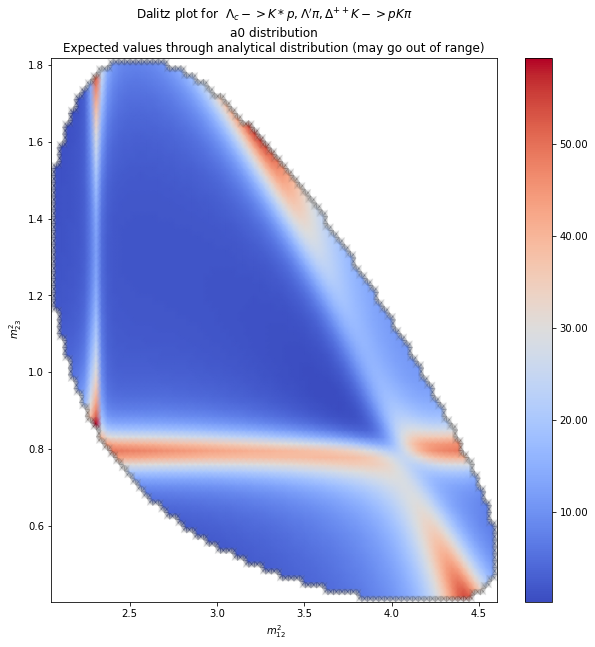

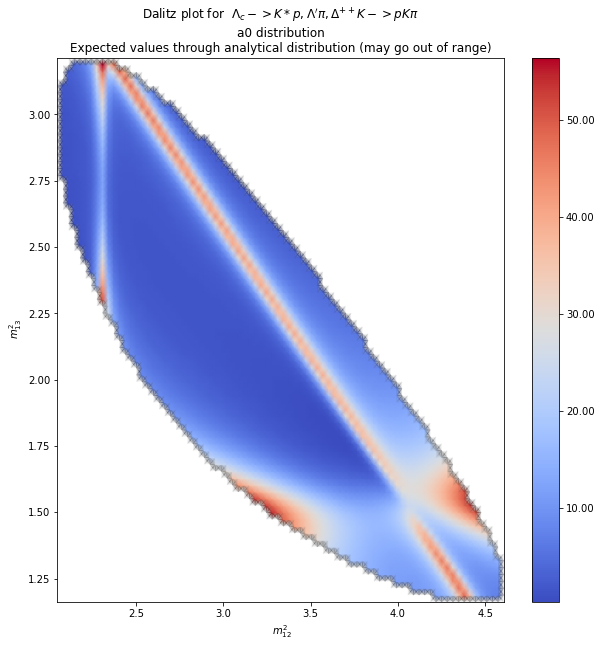

In [44]:
plotName = "Dalitz plot for  $\Lambda_c -> K* p,\Lambda'\pi, \Delta^{++}K-> p K \pi$"
plotName += "\na0 distribution"
plotName += "\nExpected values through analytical distribution (may go out of range)"

plotAnalyticalDalitz(M,m1,m2,m3,a0DistribParam,binResolution,binResolution,plotName)
plt.show()
plotAnalyticalDalitzM12M13ForM12M23(M,m1,m2,m3,a0DistribParam,binResolution,binResolution,plotName)
plt.show()